In [25]:
%load_ext autoreload
%autoreload 2
import numpy as np
from astropy import units as u
import emcee
from matplotlib import pyplot as plt
import corner

from load_galweight_data import load_clusters
from cluster import temp_from_vdisp
from statistics_functions import log_likelihood, chi_squared

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
# get dataset
n=20
clusters, variances = load_clusters(nrows=n)

In [32]:
pref_theo = 6.8*1e-42 *u.erg*u.cm**3

In [33]:
test_cluster=clusters[0]

In [34]:
p0=[-25, -2]
getattr(test_cluster, 'pred_pref')(p0)

<Quantity 5.4478908e-94 s / cm3>

In [51]:
pref_pred = [getattr(c, 'pred_pref')(p0) for c in clusters]
pref_pred

1.1057639847979102e-07 GeV 1.133690517119171e-05 GeV
8.498923710713636e-08 GeV 8.966433110487784e-06 GeV
8.13813003498707e-08 GeV 9.079899761377789e-06 GeV
7.608212662875618e-08 GeV 8.107454272960878e-06 GeV
7.518549651300869e-08 GeV 7.4128508780469744e-06 GeV
7.356158608028455e-08 GeV 8.203686559654766e-06 GeV
7.344519152057315e-08 GeV 8.225295726239415e-06 GeV
7.18282444599984e-08 GeV 7.725049346969507e-06 GeV
6.905310158134068e-08 GeV 7.33483837714982e-06 GeV
6.780800124727961e-08 GeV 6.211060421417403e-06 GeV
6.860705481517105e-08 GeV 7.482400039714647e-06 GeV
6.59219634420343e-08 GeV 7.2500302954917555e-06 GeV
6.42324822353322e-08 GeV 7.74834976193562e-06 GeV
6.165903187026066e-08 GeV 8.05491992778816e-06 GeV
5.9114994442269725e-08 GeV 5.924391289571273e-06 GeV
5.745906988537711e-08 GeV 5.611445679868858e-06 GeV
5.607511825216782e-08 GeV 5.386107882777741e-06 GeV
5.75538275889545e-08 GeV 3.2463230783476785e-06 GeV
5.6173436835953885e-08 GeV 4.88330641499075e-06 GeV
5.6411758312902

TypeError: only integer dimensionless scalar quantities can be converted to a Python index

In [49]:
data=np.ones(n)*6.8*1e-42 *u.erg*u.cm**3
data

<Quantity [6.8e-42, 6.8e-42, 6.8e-42, 6.8e-42, 6.8e-42, 6.8e-42, 6.8e-42,
           6.8e-42, 6.8e-42, 6.8e-42, 6.8e-42, 6.8e-42, 6.8e-42, 6.8e-42,
           6.8e-42, 6.8e-42, 6.8e-42, 6.8e-42, 6.8e-42, 6.8e-42] cm3 erg>

In [52]:
var = [p/10 for p in pref_pred] # made up variance for now

In [68]:
ndim, nwalkers = 2, 20
log_sigma0 = np.random.uniform(low=-30, high=-10, size=(nwalkers, 1)).astype(dtype=np.float128)
log_mchi = np.random.uniform(low=-10, high=0, size=(nwalkers, 1)).astype(dtype=np.float128)

p0=np.zeros((nwalkers, ndim ))
p0[:,0] = log_sigma0.reshape((nwalkers,))
p0[:,1]= log_mchi.reshape((nwalkers,))
p0

array([[-15.07871236,  -7.41496056],
       [-28.29225959,  -7.23711009],
       [-14.23413335,  -7.2012581 ],
       [-22.89806272,  -9.38957318],
       [-29.55415474,  -8.35961815],
       [-15.92139787,  -2.84609761],
       [-17.30807247,  -7.02376006],
       [-27.02987748,  -2.85859407],
       [-26.36273089,  -5.34309532],
       [-29.86665753,  -7.83868427],
       [-28.90691967,  -2.76218515],
       [-14.35874054,  -6.50800618],
       [-19.19829537,  -4.23732415],
       [-28.51518237,  -1.97534066],
       [-22.31178824,  -3.25484177],
       [-23.10897983,  -6.17563881],
       [-10.97245856,  -1.19839239],
       [-24.90975879,  -0.88341625],
       [-12.75249592,  -3.89818805],
       [-11.65285908,  -2.55474858]])

In [69]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood, args=[data, var, clusters, 'pred_pref'])

In [70]:
state = sampler.run_mcmc(p0, 100, progress=True)
sampler.reset()

[-15.07871236  -7.41496056]
[-28.29225959  -7.23711009]
[-14.23413335  -7.2012581 ]
[-22.89806272  -9.38957318]
[-29.55415474  -8.35961815]
[-15.92139787  -2.84609761]
[-17.30807247  -7.02376006]
[-27.02987748  -2.85859407]
[-26.36273089  -5.34309532]
[-29.86665753  -7.83868427]
[-28.90691967  -2.76218515]
[-14.35874054  -6.50800618]


You must install the tqdm library to use progress indicators with emcee


[-19.19829537  -4.23732415]
[-28.51518237  -1.97534066]
[-22.31178824  -3.25484177]
[-23.10897983  -6.17563881]
[-10.97245856  -1.19839239]
[-24.90975879  -0.88341625]
[-12.75249592  -3.89818805]
[-11.65285908  -2.55474858]
[-25.88322858  -6.74377048]
[-15.62291088  -3.54556772]
[-16.53164432  -7.06859324]
[-9.19574494 -0.86072467]
[-25.01753309  -3.05272251]
[-20.25775066  -1.46990719]
[-13.40942203  -7.24887929]
[-23.79262174  -2.91383702]
[-27.98812747  -7.32233805]
[-13.40196693  -6.95691703]
[-28.98779362  -2.11847385]
[-23.57222721  -6.40524547]
[-12.06484918  -4.12649002]
[-8.95428039 -0.9145549 ]
[-13.18729018  -1.77634871]
[-27.13234741  -2.47698876]
[-26.97166568  -3.4732239 ]
[-4.85902053 -6.31366395]
[-28.29083379  -2.97461782]
[-6.56810629 -1.29792858]
[-15.71106637  -5.49954262]
[-5.09930219 -7.48656086]
[-18.54771412  -5.9387548 ]
[-19.77041102  -5.96880692]
[-26.45465746  -5.45503416]
[-18.57774056  -3.97386388]
[-23.7904824   -5.89898204]
[-25.05754904  -0.97482481]
[-

[-24.00641536  -4.79503157]
[-25.65171123  -9.22496345]
[-25.18225014  -0.48341152]
[-26.69398473  -5.34508169]
[-25.56255574  -9.11202573]
[-26.53918098  -7.46979454]
[-25.58927189  -4.09512661]
[-25.83867983  -4.9527486 ]
[-22.18709134  -3.76296152]
[-17.45850969  -0.46257271]
[-22.07083054  -5.40633396]
[-25.76164028  -6.736453  ]
[-25.58730482  -2.60306001]
[-27.52233479  -4.93684422]
[-25.54268147  -4.1238729 ]
[-25.44886539  -4.53936942]
[-25.98888849  -4.47655803]
[-25.41129647  -1.06936294]
[-21.53207493  -5.29040565]
[-25.6008421   -7.12664923]
[-23.78267023  -2.80846308]
[-25.50475563  -5.66603328]
[-26.31681819  -2.67896115]
[-26.17081763  -4.0170402 ]
[-25.18205809  -4.25643331]
[-25.8160563   -4.42214821]
[-22.79811696  -4.00258009]
[-25.22853409  -0.73453714]
[-17.28225187  -0.21501534]
[-24.03669019  -5.11723764]
[-21.09033773  -5.76159773]
[-25.58778833  -3.03308336]
[-26.91070294  -5.63388278]
[-26.7976499  -6.7438552]
[-26.26453917  -6.04942069]
[-26.18923564  -7.3698

[-25.47529537  -2.2711426 ]
[-25.5139413   -3.76613437]
[-25.99486528  -5.61633871]
[-25.47898907  -2.91389626]
[-25.3778416   -4.39544367]
[-24.38386932  -4.08650691]
[-25.5112024   -6.65930888]
[-26.27758864  -2.62323476]
[-25.80554394  -7.06501562]
[-25.71696999  -4.14604043]
[-25.54051347  -9.81227102]
[-26.19893359  -6.09125421]
[-25.13178355  -3.50053604]
[-25.54020715  -4.58285253]
[-25.70150259  -2.14551236]
[-25.47399506  -5.94967703]
[-25.52441061  -3.82063724]
[-25.38239877  -2.15669186]
[-25.73480431  -3.87604505]
[-25.76298107  -5.04636501]
[-25.65919019  -4.01112855]
[-25.38651953  -2.32044664]
[-25.51995943  -3.912874  ]
[-23.66882641  -4.8521464 ]
[-25.51391038  -6.07731768]
[-24.52808321  -4.26406385]
[-25.48599896  -6.72512363]
[-25.68404639  -3.83860213]
[-25.59552622  -6.55293635]
[-26.0853022   -6.69400663]
[-25.47989801  -3.07206521]
[-25.47360316  -4.53150276]
[-25.61932129  -2.24262349]
[-25.51353243  -5.09371379]
[-25.54557988  -3.52445031]
[-25.6258134   -1.88

[-25.257129    -1.72586536]
[-25.3183074   -8.66206121]
[-25.51419697  -3.02273574]
[-25.53151641  -5.22441723]
[-25.37571098  -4.50000959]
[-25.48421676  -5.49490901]
[-25.53544662  -4.43030921]
[-25.4843183   -4.35801425]
[-25.55223053  -7.17432982]
[-25.60223365  -9.95734703]
[-25.57626013  -5.71028566]
[-25.52924889  -5.42059196]
[-25.50479607  -3.20853738]
[-25.51562127  -5.52285149]
[-25.49497174  -2.68271144]
[-24.26953749  -4.40299934]
[-25.49989224  -5.71369814]
[-25.51162478  -6.23740268]
[-25.22938771  -3.05737741]
[-25.54996714  -7.28297185]
[-25.49115284  -0.46308993]
[-25.57023044  -5.44917911]
[-25.50361034  -2.95504041]
[-25.50244334  -3.18724385]
[-25.50349602  -4.34482752]
[-25.49816613  -8.5344816 ]
[-25.55025656  -4.73964866]
[-25.50335082  -1.73095635]
[-25.52255497  -4.94310828]
[-25.5379651   -6.28697081]
[-25.44480276  -3.13372586]
[-25.5686764   -3.23083021]
[-25.51435242  -5.29796524]
[-25.51612741  -7.00997889]
[-25.40467456  -3.99092213]
[-25.52817856  -5.25

[-25.49141681  -8.00137195]
[-25.6151858   -6.24104315]
[-25.57678329  -1.43085398]
[-25.52846463  -2.39066435]
[-25.5055279   -8.38647156]
[-25.53519145  -8.48283219]
[-25.48035289  -6.93670064]
[-25.49844146  -2.80582634]
[-24.8916019   -0.57421458]
[-25.49024903  -6.14382442]
[-25.50613237  -6.07370891]
[-25.47784303  -1.85576968]
[-25.5013771   -1.43973014]
[-25.47924655  -4.09398557]
[-25.49619432  -7.01312036]
[-25.45111201  -3.91313943]
[-25.5206874   -7.42565994]
[-25.82752901  -3.6456131 ]
[-25.49983612  -5.37570841]
[-25.51264268  -5.67199708]
[-25.50167744  -1.36120374]
[-25.78035537  -5.89376845]
[-25.52367653  -3.11579839]
[-25.50165943  -3.39190353]
[-25.49383901  -6.9243542 ]
[-25.45330063  -5.53158128]
[-25.50045373  -4.39050732]
[-25.45440352  -2.34214133]
[-25.57821709  -6.28328601]
[-25.55535542  -4.74298154]
[-25.50399514  -7.57568988]
[-25.52128931  -6.55778916]
[-25.48753665  -5.2961504 ]
[-25.50621174  -4.51182347]
[-25.70132637  -3.16217969]
[-25.49309194  -9.16

[-25.50685073  -1.81009696]
[-25.4191055   -1.93152835]
[-25.50981065  -6.15534199]
[-24.86932172  -0.59216661]
[-25.57201316  -1.48314039]
[-25.51668238  -8.09107635]
[-25.52841234  -5.51045339]
[-25.54840395  -3.06805662]
[-25.51869407  -6.17951102]
[-25.57941784  -9.47438698]
[-25.49299876  -7.36541126]
[-25.49633488  -5.36275636]
[-25.5005866   -0.86170336]
[-25.59233831  -8.49673823]
[-25.35633897  -5.12813134]
[-25.5070054   -3.85368342]
[-25.49374163  -7.41387551]
[-25.47745051  -5.04516266]
[-25.5166899   -7.41946798]
[-25.49743785  -1.52513649]
[-25.50558636  -6.49326564]
[-25.46652847  -2.90227006]
[-25.50570424  -1.93132557]
[-25.51037557  -7.63672856]
[-25.50949232  -9.67290789]
[-25.52157368  -3.32473188]
[-25.55796243  -0.48104747]
[-25.53249246  -6.76808567]
[-25.51004919  -6.04674612]
[-24.73624044  -0.10022987]
[-25.49408331  -0.46006764]
[-25.51422223  -8.38244436]
[-25.51787458  -8.61426371]
[-25.50819255  -3.81057992]
[-25.51120465  -7.14116296]
[-25.48479947  -7.90

[-25.50489831  -3.41011902]
[-25.49627383  -7.55499119]
[-25.54281332  -5.14966413]
[-25.36846078  -3.96880833]
[-25.54735223  -9.0513152 ]
[-25.52965026  -4.62035352]
[-25.51390456  -5.32320594]
[-24.77980787  -0.11651938]
[-25.49277417  -4.34395342]
[-25.47534049  -2.53683925]
[-25.53445426  -1.05858102]
[-25.59615314  -9.06253086]
[-25.56125544  -0.49157779]
[-25.50480537  -3.00666676]
[-25.52080892  -8.16397649]
[-25.540032    -5.18212445]
[-25.42956114  -0.73742646]


In [71]:
n_steps=10000
sampler.run_mcmc(state, n_steps, progress=True)

You must install the tqdm library to use progress indicators with emcee


[-25.49603015  -6.36786996]
[-25.53498923  -0.94755915]
[-25.53984036  -4.98204026]
[-25.46698834  -6.47719959]
[-25.51830842  -7.39590604]
[-25.53604548  -4.93593281]
[-25.5182065   -3.78030493]
[-25.48004481  -4.10901833]
[-25.50360388  -4.49077422]
[-25.42384168  -1.0502371 ]
[-25.47382555  -2.03054727]
[-25.50068955  -3.58765124]
[-25.59754117  -8.00510645]
[-25.50652231  -9.73109109]
[-25.53715635  -3.150786  ]
[-25.24413607  -1.94283955]
[-25.50564209  -7.03789584]
[-25.50385986  -5.66895811]
[-25.6101347   -8.03393163]
[-25.52529871  -2.95860808]
[-25.56450533  -6.56787969]
[-25.44290345  -8.54224195]
[-25.50453366  -2.9909807 ]
[-25.53447733  -4.83434643]
[-25.53300645  -4.42644341]
[-25.50167983  -3.43394326]
[-25.51057222  -5.58271716]
[-25.53633956  -3.66407572]
[-25.53806664  -7.04176285]
[-25.51242094  -3.83014006]
[-25.50497751  -7.02490789]
[-25.4675009   -6.21455177]
[-24.74161797  -0.14870939]
[-25.42815534  -1.3165728 ]
[-25.49117375  -5.75682181]
[-25.52634428  -2.77

[-25.47628104  -2.46194807]
[-24.92573909  -0.45689331]
[-25.50926978  -4.38134973]
[-25.54452259  -9.39144707]
[-25.45159343  -1.2628707 ]
[-25.42846211  -9.81954985]
[-25.46956273  -5.89229816]
[-25.48473683  -7.77727704]
[-25.9257202   -9.88133029]
[-25.52540315  -1.78941899]
[-25.5009356  -6.8256508]
[-25.53727986  -6.57440794]
[-25.48424359  -2.29839667]
[-25.46730602  -5.10918578]
[-25.49078568  -4.20090706]
[-25.52623832  -8.29919556]
[-25.55291894  -5.61357259]
[-25.4413342   -1.12212805]
[-25.47565165  -2.35054976]
[-24.83979126  -0.21581791]
[-25.49944084  -3.95660303]
[-25.48515035  -2.29289263]
[-25.46530434  -4.80279404]
[-25.51974201  -8.72239021]
[-25.46236917  -3.43966706]
[-25.47801151  -7.33536301]
[-25.50433508  -7.40130047]
[-25.52813906  -1.7585615 ]
[-25.50918747  -9.16628055]
[-25.55882545  -8.34399649]
[-26.07894466  -7.74858773]
[-25.33061192  -6.28191064]
[-25.53661524  -7.77149895]
[-25.56655782  -2.3741413 ]
[-25.53850527  -6.14394846]
[-25.50209645  -7.0222

[-25.52708511  -9.4252572 ]
[-25.47103479  -5.75826738]
[-25.47562418  -6.37448379]
[-25.51505389  -6.39787558]
[-25.47784557  -7.20802543]
[-25.46634588  -7.40121452]
[-25.45497054  -4.11883481]
[-25.56104466  -1.78838086]
[-25.50176384  -8.30705224]
[-25.47162329  -5.87932599]
[-25.49669124  -7.66352453]
[-25.51211772  -4.81686945]
[-25.46668329  -7.43750305]
[-25.46640519  -4.63230902]
[-25.47601666  -7.77920659]
[-25.48224658  -7.44515665]
[-25.47074487  -5.60718592]
[-25.46588224  -6.28263831]
[-25.48144532  -7.01022891]
[-25.50833277  -3.5333985 ]
[-25.48329415  -4.92108038]
[-25.42556324  -0.16120711]
[-25.46633766  -7.78468012]
[-25.45579408  -4.15581595]
[-25.5279793  -6.1814122]
[-25.52192375  -5.62547137]
[-25.52862651  -9.38593234]
[-25.47960836  -5.48532916]
[-24.88618679  -0.87503075]
[-25.51281257  -6.74408763]
[-25.48117015  -4.86197435]
[-25.47512741  -5.60214116]
[-25.46637021  -6.26536047]
[-25.52723341  -9.42147357]
[-25.45010504  -5.76668339]
[-25.47325195  -6.1703

[-25.45207005  -5.6093301 ]
[-25.45343921  -6.75274454]
[-25.52162192  -1.72444356]
[-25.48815404  -2.60197145]
[-25.48515716  -9.69597164]
[-25.48826605  -1.77935523]
[-25.50492583  -7.52363846]
[-25.46994377  -6.44201752]
[-25.42322192  -1.01957257]
[-25.48205387  -5.07549812]
[-25.4716877   -8.66921619]
[-25.45119867  -3.76091045]
[-25.54341337  -8.6637295 ]
[-25.5494867   -6.28012282]
[-25.49542239  -7.18383778]
[-25.5250294   -5.29174261]
[-25.48275979  -7.44855883]
[-25.02839222  -2.84149347]
[-25.49878513  -9.34067377]
[-25.51715272  -2.38272562]
[-25.41044002  -8.67390136]
[-25.48721715  -9.77987503]
[-25.51073703  -7.6560933 ]
[-25.55418401  -4.69675967]
[-25.46954633  -6.45858297]
[-25.45781644  -7.45188399]
[-25.71312259  -6.80689479]
[-25.45227821  -6.77643803]
[-25.54158417  -8.56647554]
[-25.62090638  -2.0813403 ]
[-25.5376372   -8.50837294]
[-25.58840895  -3.9306191 ]
[-25.49755886  -9.60334866]
[-25.47851135  -7.91693371]
[-25.47244581  -5.11316368]
[-25.42094479  -6.14

[-25.53206652  -8.78904376]
[-25.50190214  -8.47928527]
[-25.49316173  -8.3178593 ]
[-25.4544656   -1.97275248]
[-25.48623359  -6.58897925]
[-25.56475157  -9.99702229]
[-25.52176022  -6.26515871]
[-25.52675402  -5.66081127]
[-25.53741407  -8.68905349]
[-25.45221094  -9.20979345]
[-25.49272494  -8.43189626]
[-25.45612723  -7.09441731]
[-25.44371978  -1.35443201]
[-25.49417162  -0.62721694]
[-25.49335295  -9.55574883]
[-25.40296045  -0.61046732]
[-25.54593426  -9.21296002]
[-25.78285497  -7.67416644]
[-25.52519859  -8.61689693]
[-25.4751793   -9.37045858]
[-25.51092125  -6.69369055]
[-25.50487513  -7.97804819]
[-25.46746489  -6.33306365]
[-25.49061323  -7.12822672]
[-25.47149513  -3.26816045]
[-25.55271527  -8.62346214]
[-25.58133831  -8.80652052]
[-25.5091745   -8.52224296]
[-25.47913057  -6.46855838]
[-25.50770111  -8.06579971]
[-25.48089897  -6.83615349]
[-25.5048844   -4.20730852]
[-25.51478385  -8.67322478]
[-25.51019641  -7.9711527 ]
[-25.45760174  -7.07904441]
[-25.41623834  -1.30

[-25.49480303  -7.23790148]
[-25.48100564  -2.401614  ]
[-25.50193844  -9.08692963]
[-25.4480338   -3.45061908]
[-25.43980367  -7.24153879]
[-25.52027676  -6.38212116]
[-25.47241907  -9.28952126]
[-25.17069602  -4.99890114]
[-25.47153038  -8.35268729]
[-25.54330362  -2.30493222]
[-25.50776873  -7.98332902]
[-25.50012578  -6.73455898]
[-25.48477677  -4.90869984]
[-25.42430817  -8.04531929]
[-25.46176498  -4.92715113]
[-25.4900257   -2.70974282]
[-25.53250106  -4.81723409]
[-25.47718299  -7.60070625]
[-25.5370789   -9.06979051]
[-25.48558922  -3.59785222]
[-25.51780489  -5.51148523]
[-25.47425253  -7.39274331]
[-25.47806294  -7.79039771]
[-25.23876744  -5.98412435]
[-25.47895576  -2.67068213]
[-25.5247029   -9.39237364]
[-25.56994611  -6.57000964]
[-25.55371876  -7.94919967]
[-25.50130212  -6.65045056]
[-25.4345983   -7.14106143]
[-25.47363396  -4.26490828]
[-25.50096903  -2.74835678]
[-25.49156716  -6.64483244]
[-25.50800812  -8.5445539 ]
[-25.56044843  -0.14891193]
[-25.51886395  -6.63

[-25.43642144  -2.98920115]
[-25.50368507  -8.67930442]
[-25.47927719  -9.09865702]
[-25.39526445  -0.61541357]
[-25.54315943  -6.15698856]
[-25.53133819  -3.98264812]
[-25.57012469  -7.20084711]
[-25.5720268   -9.00730198]
[-25.48089425  -2.68417492]
[-25.47457662  -5.30319912]
[-25.43525709  -2.71825733]
[-25.55183992  -9.69414174]
[-25.49356299  -9.26289359]
[-25.4977009   -7.20094524]
[-25.52556035  -3.15213062]
[-25.54817941  -8.44833462]
[-25.4179849   -8.11391973]
[-25.55336191  -6.46242853]
[-25.50033462  -8.87247501]
[-25.50552533  -9.71873397]
[-25.44114135  -8.1025338 ]
[-25.47342002  -5.36673221]
[-25.42944339  -2.13906773]
[-25.48187679  -9.71136798]
[-25.54311494  -7.80433436]
[-25.44709789  -8.89828204]
[-25.483698    -2.71354915]
[-25.54438912  -7.38128091]
[-25.4590184   -9.94850672]
[-25.50309361  -6.34541694]
[-25.41775682  -2.85299474]
[-25.48315446  -7.49003522]
[-25.46812266  -2.6452375 ]
[-25.54149898  -9.52047273]
[-25.52984214  -6.52543112]
[-25.43328703  -2.17

[-25.49863348  -6.621057  ]
[-25.50534107  -0.75358008]
[-25.53972918  -8.23247095]
[-25.51724357  -6.37781167]
[-25.48230729  -5.44879078]
[-25.47641946  -4.40832333]
[-25.4411292   -2.55137173]
[-25.52196771  -7.60039113]
[-25.91386374  -8.68804555]
[-25.53490534  -8.04314768]
[-25.4787129  -6.4464518]
[-25.49281671  -6.07405234]
[-25.52278029  -6.78696966]
[-25.48002835  -6.65998366]
[-25.49782561  -2.75348603]
[-25.53181699  -9.71626115]
[-25.47623409  -5.10563517]
[-25.4605367   -8.61341373]
[-25.51066508  -5.82495156]
[-25.53501539  -8.0486575 ]
[-25.47911011  -6.79944017]
[-25.5372182   -7.59562812]
[-25.51209182  -6.31374739]
[-25.49004034  -2.73934343]
[-25.50102625  -2.5767236 ]
[-25.43645327  -2.23269056]
[-25.5516991   -9.68399701]
[-25.44891177  -8.43355309]
[-25.49217604  -4.32514597]
[-25.4959519   -5.40972786]
[-25.51676591  -3.90185908]
[-25.52754274  -6.45163853]
[-25.48675736  -8.65538355]
[-25.47189627  -7.47497063]
[-25.47602056  -4.05382923]
[-25.48418795  -5.5038

[-25.46143563  -3.90935727]
[-25.48106216  -5.0414407 ]
[-25.51984224  -4.46335233]
[-25.47541007  -5.85735198]
[-25.48872946  -5.44302251]
[-25.49116208  -4.91310014]
[-25.49002339  -2.98783176]
[-25.45760693  -3.77380455]
[-25.45117312  -3.60781547]
[-25.46157124  -3.34806338]
[-25.55457548  -2.64010566]
[-25.48635132  -4.12795897]
[-25.46921664  -8.90723362]
[-25.50641777  -2.27724646]
[-25.61729814  -5.10309259]
[-25.48223565  -5.13636811]
[-25.45105188  -1.08996219]
[-25.48684445  -1.66145154]
[-25.48735119  -6.16889994]
[-25.47957074  -3.17864841]
[-25.60245118  -3.2427465 ]
[-25.47587719  -6.9780513 ]
[-25.48753697  -6.54810566]
[-25.41641076  -3.58062976]
[-25.44667432  -3.67960854]
[-25.54406533  -3.08749907]
[-25.5260701   -8.82788157]
[-25.48216193  -3.61727223]
[-25.51734421  -4.05392135]
[-25.36498141  -0.26915554]
[-25.48896763  -5.2223102 ]
[-25.4690886   -1.10283577]
[-25.21417284  -3.47848775]
[-25.48639095  -3.14527347]
[-25.49983099  -7.72192778]
[-25.46241934  -3.45

[-25.5068278   -4.65613671]
[-25.48187896  -4.35295254]
[-25.54184929  -1.58864308]
[-25.43368383  -5.64635365]
[-25.53058034  -5.55634836]
[-25.49027925  -1.55749613]
[-25.47582152  -3.30396349]
[-25.51453772  -3.10562062]
[-25.51950648  -2.22308967]
[-24.87963125  -0.77746294]
[-25.48847724  -4.65822515]
[-25.49186376  -6.53301158]
[-25.42257859  -1.20469886]
[-25.4368718   -9.45146064]
[-25.54023364  -6.54957737]
[-25.50915143  -5.38308765]
[-25.63472607  -2.77717679]
[-25.48254655  -4.50289204]
[-25.4582212   -4.98785015]
[-25.49426436  -4.91328761]
[-25.52165925  -4.51369486]
[-25.46573206  -8.11200019]
[-25.43675017  -1.78526592]
[-25.56823256  -9.34758818]
[-25.50791117  -5.13167413]
[-25.48366722  -2.3663677 ]
[-25.48328677  -4.63485627]
[-24.9879275   -2.09294982]
[-25.51066536  -4.57758879]
[-25.5515233   -6.71692493]
[-25.49248493  -4.67626883]
[-25.4985485   -7.04709575]
[-25.48867642  -1.98547767]
[-25.47010079  -8.5264186 ]
[-25.78194111  -4.7574441 ]
[-26.17988561  -5.88

[-25.51168518  -7.73865016]
[-25.56842782  -4.63876535]
[-25.58708461  -7.63885618]
[-25.48910814  -7.67431459]
[-25.34534945  -5.84649032]
[-25.53729813  -4.56562835]
[-25.49801853  -8.58265702]
[-25.43681009  -1.29940586]
[-25.47529182  -4.54669536]
[-25.48752664  -0.46235263]
[-25.48383724  -7.65929462]
[-25.55137804  -8.06205361]
[-25.57202238  -8.30443076]
[-25.49328711  -8.38827564]
[-25.59186006  -7.46672777]
[-25.46805592  -3.26169547]
[-25.54190826  -3.10395483]
[-25.50510371  -8.01341142]
[-25.50228707  -8.74762333]
[-25.54206524  -4.51271768]
[-25.56747365  -1.94468438]
[-25.42768092  -1.15913462]
[-25.5051758   -7.96849275]
[-25.54231678  -3.31784415]
[-25.47784673  -7.30592299]
[-25.54495474  -8.18671764]
[-25.53719921  -5.03076954]
[-25.56574112  -1.65683212]
[-25.43489572  -1.92059413]
[-25.44146883  -1.72995858]
[-25.07802639  -1.78689305]
[-25.4901502   -0.23675215]
[-25.50678618  -8.17954169]
[-25.5168854   -9.60875767]
[-25.54867674  -6.64773391]
[-25.5066417  -3.391

[-25.58548714  -6.253078  ]
[-25.53360519  -8.6412842 ]
[-25.51084267  -6.36127662]
[-25.5089727   -9.59095912]
[-25.50203558  -8.22529334]
[-25.44642432  -1.21074481]
[-25.5459138   -4.00498381]
[-25.10359457  -2.91881404]
[-25.52118223  -1.14959139]
[-25.52223053  -3.38761945]
[-25.44730835  -9.60707171]
[-25.48744361  -9.56787079]
[-25.46936365  -2.94890757]
[-25.50983905  -3.75826426]
[-25.5070963   -5.72402997]
[-25.43598479  -9.25707273]
[-25.50678857  -6.57542059]
[-25.60716082  -1.22437141]
[-25.60860594  -8.940148  ]
[-25.46808836  -7.88207813]
[-25.48681123  -9.65453244]
[-25.48558845  -8.34500102]
[-25.43818848  -9.1678287 ]
[-25.50691587  -6.56869672]
[-25.55601877  -3.65434109]
[-25.50331015  -4.99590476]
[-25.49298054  -0.59603283]
[-25.48787653  -2.90433132]
[-25.53536377  -8.25000786]
[-25.50913313  -6.45157726]
[-25.49371791  -6.52551158]
[-25.46387726  -6.06196915]
[-25.50326183  -5.00227354]
[-25.46472195  -7.51669733]
[-25.44608355  -1.10580516]
[-25.51415019  -5.44

[-26.08873109  -2.9506645 ]
[-25.43135923  -1.52827231]
[-25.50630585  -8.41946501]
[-25.49211768  -8.70815172]
[-25.54238177  -7.12906675]
[-25.49625512  -9.17874938]
[-25.48098591  -5.03421916]
[-26.11180541  -9.25680935]
[-25.50783284  -3.10866376]
[-25.5413433   -9.15837284]
[-25.34090972  -5.62902501]
[-25.36463604  -5.21078025]
[-25.49263113  -6.44371508]
[-25.49186279  -3.58892723]
[-25.54400746  -2.00641219]
[-25.47491882  -3.98714206]
[-25.24737425  -2.00895844]
[-25.54815179  -8.77213694]
[-25.49479158  -8.14108029]
[-25.51887975  -8.23140539]
[-25.53219998  -7.54047238]
[-25.3941331   -0.65166345]
[-25.49028957  -3.87401889]
[-25.47753792  -5.49237971]
[-25.54050925  -7.94981992]
[-25.61400571  -6.73053218]
[-25.50027917  -6.97273857]
[-25.5144809   -7.17429897]
[-25.48439798  -8.91878929]
[-25.477649    -6.62518149]
[-25.49903659  -7.4706334 ]
[-25.48431068  -3.81604005]
[-25.60443709  -0.27393099]
[-25.52921712  -7.45957147]
[-25.60783742  -4.04190393]
[-25.46291813  -0.83

[-25.51835213  -6.82593366]
[-25.48075365  -2.99659849]
[-25.04745394  -0.79184622]
[-25.39221524  -3.04499111]
[-25.50751892  -4.56975736]
[-25.51682318  -4.02132335]
[-25.51104403  -2.65530188]
[-25.50356957  -4.45488389]
[-25.47534944  -4.38410468]
[-25.45991639  -8.10216293]
[-25.47782522  -7.60800627]
[-25.45854815  -9.84364255]
[-25.50665053  -5.60404227]
[-25.49026527  -8.89461139]
[-25.66077076  -5.44158057]
[-25.51157568  -5.42981401]
[-25.51064185  -2.67478046]
[-25.5091315  -3.7183002]
[-25.47558978  -6.24261943]
[-25.46985009  -2.70906977]
[-25.52090672  -2.92525028]
[-25.54691434  -5.90793124]
[-25.50242415  -9.25182884]
[-25.48137674  -6.20674306]
[-25.55941701  -8.55126417]
[-25.48519606  -3.09446121]
[-25.26475221  -1.30406276]
[-25.44639009  -0.71777987]
[-25.51748047  -3.78002287]
[-25.52883604  -3.1187311 ]
[-25.54530708  -7.38086009]
[-25.5380474   -8.06988818]
[-25.51214433  -7.10748326]
[-25.47235525  -4.26740861]
[-25.50965072  -1.76072736]
[-25.50929599  -5.7256

[-25.48593296  -5.19082272]
[-25.28014864  -2.91178793]
[-25.48841715  -4.6097323 ]
[-25.52218957  -7.38344411]
[-25.48921581  -7.38369962]
[-25.47859453  -3.60526889]
[-25.53173745  -4.97035004]
[-25.45982857  -0.86615983]
[-25.45882988  -4.80933607]
[-25.49434228  -3.88164487]
[-25.04496737  -2.44554062]
[-25.40493309  -8.84239564]
[-25.51430431  -9.37633613]
[-25.5871031   -5.00384488]
[-25.25599944  -4.45030247]
[-25.48904126  -7.49473942]
[-25.19586161  -2.13375366]
[-25.44698116  -1.77497589]
[-25.47712621  -2.96847438]
[-25.44758171  -4.65101343]
[-25.46971759  -3.57186985]
[-25.4982556  -5.6022734]
[-25.49137435  -7.14575905]
[-25.49654912  -4.91883402]
[-25.56412021  -6.1573999 ]
[-25.49764763  -6.07696008]
[-25.48543885  -4.82458488]
[-25.48229613  -4.07984451]
[-25.48634555  -4.07975513]
[-25.48868614  -5.85315328]
[-25.56568064  -4.99088483]
[-25.48016328  -4.18933958]
[-25.48731897  -6.0172414 ]
[-25.45970376  -3.5051257 ]
[-25.47643611  -4.78330817]
[-25.51332215  -5.4090

[-25.54857692  -9.65134511]
[-25.55066303  -5.958276  ]
[-25.58808396  -5.24923265]
[-25.48094178  -6.65400504]
[-25.5042607   -4.44322567]
[-25.87599708  -7.01242022]
[-25.55135724  -4.74602126]
[-25.44764589  -1.70812903]
[-25.4436394   -7.97767427]
[-25.52599279  -4.6714421 ]
[-25.52240443  -7.22295355]
[-25.49564736  -5.69727394]
[-25.49265078  -5.48697802]
[-25.49338827  -3.45770964]
[-25.47125883  -5.83124696]
[-25.55131537  -6.83286679]
[-25.52773094  -8.85592467]
[-25.50239192  -5.36611024]
[-25.497055   -5.7403297]
[-25.49302211  -6.00002241]
[-25.46091688  -5.23875552]
[-25.4379514  -4.2501203]
[-25.17250641  -3.57030208]
[-25.42213067  -3.40394409]
[-25.55270551  -6.90710033]
[-25.45068803  -1.91139685]
[-25.43147302  -0.9974191 ]
[-25.5369521  -8.7689081]
[-25.50169584  -4.88325604]
[-25.48856808  -4.6955488 ]
[-25.50145467  -4.94834106]
[-25.4971055   -3.51024686]
[-25.51688839  -5.2130278 ]
[-25.10951865  -2.6355761 ]
[-25.43846359  -8.44792558]
[-25.53402861  -8.58464153

[-25.47301547  -3.75034967]
[-25.50359591  -7.87888841]
[-25.48002524  -3.14467124]
[-25.5036933   -6.15332631]
[-25.51772392  -8.06774697]
[-25.49262836  -9.03514032]
[-25.45968631  -7.57520184]
[-25.50306102  -2.23735547]
[-25.49810453  -3.42920269]
[-25.46170207  -3.69046407]
[-25.54762116  -5.59835273]
[-25.45899612  -3.0389559 ]
[-25.47723952  -4.36189191]
[-25.50350323  -9.52108856]
[-25.49729111  -5.99695151]
[-25.4664699   -1.14726314]
[-25.49671968  -3.76220596]
[-25.47882984  -9.10534853]
[-25.53026404  -9.72674471]
[-25.52700815  -7.30090631]
[-25.48046427  -6.32817853]
[-25.50131383  -2.44706462]
[-25.48067242  -5.6529447 ]
[-25.49537068  -5.62467595]
[-25.49907149  -8.47137868]
[-25.53270665  -4.58339651]
[-25.67606901  -1.73416971]
[-25.4866135   -3.12409039]
[-25.48884716  -4.44459972]
[-25.52543933  -9.68966692]
[-25.52354901  -7.47242764]
[-25.49081643  -9.19367989]
[-25.49581119  -1.9430734 ]
[-25.48179621  -3.52166986]
[-25.43590795  -5.01188197]
[-25.47289794  -6.58

[-25.4503707   -8.65778565]
[-25.4791265   -6.41365662]
[-25.51366261  -2.22121743]
[-25.36047348  -1.14928848]
[-25.44683973  -3.26597357]
[-25.49958893  -8.53980939]
[-25.51690009  -3.16598137]
[-25.48523024  -6.36422819]
[-25.53174809  -4.51275615]
[-25.55801278  -3.6734991 ]
[-25.53302986  -7.47499789]
[-25.45201539  -2.6323536 ]
[-25.29426753  -1.11056732]
[-25.43795692  -5.93587499]
[-25.49170538  -8.14796058]
[-25.48784185  -7.90462853]
[-25.46647662  -5.09926752]
[-25.47776644  -0.61177779]
[-25.46485995  -4.01756165]
[-25.37465971  -1.49792946]
[-24.83312306  -0.2416448 ]
[-25.48382816  -6.18942926]
[-25.51091162  -8.127171  ]
[-25.5002267   -2.69549207]
[-25.51896325  -8.46423656]
[-25.47916759  -9.348073  ]
[-25.47830581  -6.27911113]
[-25.5244111   -3.58311624]
[-25.34547467  -0.95591976]
[-24.82480819  -0.22834545]
[-25.64926939  -4.87252125]
[-25.47727823  -3.34662723]
[-25.52801634  -4.69688183]
[-25.4404187   -2.39171435]
[-25.20792385  -1.69964433]
[-25.4599313   -4.01

[-25.46623873  -1.93237716]
[-25.51701252  -8.27439934]
[-25.45346153  -9.25037376]
[-25.52204628  -8.08528096]
[-25.50060849  -5.04035663]
[-25.47672139  -8.62074489]
[-25.50039551  -2.15863134]
[-25.45072199  -2.59777822]
[-25.84974091  -4.40055906]
[-25.47077686  -2.41181382]
[-25.4794137   -7.21273713]
[-25.52721267  -8.50433987]
[-25.48453214  -3.1239693 ]
[-25.47923992  -8.72746166]
[-25.4776359   -5.07802308]
[-25.47749992  -3.70957143]
[-25.40904433  -1.02937049]
[-25.4627128   -7.13227702]
[-25.45289739  -9.99283772]
[-25.47710276  -7.1433541 ]
[-25.47902171  -8.23098493]
[-25.52984629  -9.44496269]
[-25.45649515  -2.09389579]
[-25.49390031  -3.82982337]
[-25.47614736  -2.68986223]
[-25.53205145  -8.59072319]
[-25.53368064  -9.41194954]
[-25.5504852  -9.8610245]
[-25.50363652  -4.94091873]
[-25.48903923  -2.81251816]
[-25.50029579  -2.16081591]
[-25.38529701  -1.65409787]
[-25.47851421  -7.68314767]
[-24.97211914  -0.79148767]
[-25.53963955  -9.1136321 ]
[-25.54195759  -4.7173

[-25.66286165  -5.3804161 ]
[-25.46098094  -3.71968143]
[-25.47038367  -6.33198081]
[-25.45251119  -4.50973434]
[-25.51365974  -9.29522706]
[-25.46771315  -3.12863936]
[-25.50715912  -8.36874193]
[-25.42854906  -1.17666571]
[-25.48670409  -2.91248146]
[-25.50208459  -3.69993489]
[-25.50799628  -2.6338942 ]
[-25.48545949  -4.38850914]
[-25.44901902  -1.95285277]
[-25.49615414  -5.46687528]
[-25.44470241  -1.94295515]
[-25.55058036  -4.62761211]
[-25.51296577  -1.73776018]
[-25.45981205  -4.16868938]
[-25.50820289  -6.65744795]
[-25.52809476  -0.90627536]
[-25.50023472  -4.26505094]
[-25.51736184  -8.81200408]
[-25.46344596  -6.87530913]
[-25.45315098  -3.2325645 ]
[-25.50851125  -5.85042404]
[-25.5219359   -9.53179543]
[-25.46643092  -5.52312144]
[-25.48354269  -4.28033109]
[-25.43844538  -1.42121078]
[-25.40241548  -0.17471754]
[-25.46643132  -2.98190709]
[-25.49568597  -2.73622359]
[-25.56105071  -2.8349967 ]
[-25.49628636  -3.58316336]
[-25.46947348  -5.56048228]
[-25.50057778  -6.26

[-25.49360214  -6.97833147]
[-25.52193017  -6.93044023]
[-25.51850166  -4.59113423]
[-25.49089074  -8.18402762]
[-25.40293429  -1.02888073]
[-24.76634065  -0.04667104]
[-25.43047109  -1.14855036]
[-25.55196143  -7.94356506]
[-25.40962314  -2.86697343]
[-25.43746107  -5.881317  ]
[-25.44091506  -1.78839937]
[-25.48986484  -8.95547824]
[-25.49714513  -2.89875463]
[-25.53613661  -3.84108467]
[-25.47938894  -1.2199642 ]
[-25.6246799   -3.62919103]
[-25.44506844  -5.2015239 ]
[-25.55540903  -8.07051149]
[-25.56666507  -5.23798987]
[-25.57681927  -4.25561995]
[-25.44513647  -1.48168094]
[-25.4975376   -7.28534743]
[-25.55458711  -5.70343377]
[-25.53784447  -2.61091131]
[-24.69987773  -0.10499269]
[-25.43695333  -1.3431899 ]
[-25.43679479  -7.6312609 ]
[-25.40535643  -5.13100921]
[-25.87416308  -2.86737119]
[-25.50407539  -3.13194676]
[-25.53773955  -3.77290882]
[-25.51588439  -8.32926842]
[-25.47683737  -2.92874415]
[-25.4317467   -1.21280173]
[-25.55543216  -8.07338334]
[-25.64650201  -7.42

[-25.49773369  -7.47302126]
[-25.50544081  -4.7076557 ]
[-25.52611662  -6.55349505]
[-25.49347711  -3.46656425]
[-25.49298999  -3.20883823]
[-25.42720823  -1.52279376]
[-25.51305853  -7.35548769]
[-25.43468103  -4.62495682]
[-25.51672755  -4.88475434]
[-25.52122114  -2.22270621]
[-25.52732644  -3.59957529]
[-25.47165844  -8.61503854]
[-25.47523157  -7.38613419]
[-25.49183222  -2.93577056]
[-25.45453821  -2.00380519]
[-25.50125022  -7.6607099 ]
[-25.50557304  -6.05312556]
[-25.48476179  -7.71484391]
[-25.5180896   -2.00709108]
[-25.52789186  -3.08928713]
[-24.95255068  -1.4556869 ]
[-25.44378593  -3.22280892]
[-25.53849972  -4.60626155]
[-25.50298206  -2.66843613]
[-25.50435377  -7.46603434]
[-25.42240284  -4.13995903]
[-25.50922308  -4.02119721]
[-25.47408361  -7.15339927]
[-25.48928028  -4.85041438]
[-25.49607035  -1.7555041 ]
[-25.49437034  -2.84109042]
[-25.44974857  -2.9132234 ]
[-25.49724939  -7.99358355]
[-25.50928511  -5.5217475 ]
[-25.48374753  -7.92161858]
[-25.52275361  -1.75

[-25.51597429  -3.64263476]
[-25.52227314  -1.17674951]
[-25.51957995  -6.88356717]
[-25.46166558  -9.78856328]
[-25.50304576  -3.9157952 ]
[-25.48456043  -1.92226389]
[-25.47043666  -8.2637886 ]
[-25.48746962  -4.35279977]
[-25.45339017  -9.36893992]
[-25.50386152  -6.98822566]
[-25.01910637  -0.93531177]
[-25.45698865  -9.80531799]
[-25.56936966  -6.58325955]
[-25.43794079  -3.42118596]
[-25.48147806  -3.94769181]
[-25.47962267  -4.57295402]
[-25.52316309  -2.44485823]
[-25.58478107  -4.43531756]
[-25.50602684  -8.29862536]
[-25.50248475  -3.09099781]
[-25.48254096  -3.00635358]
[-25.4903361   -5.55543437]
[-25.4773057   -6.85660366]
[-25.4787411   -4.95543662]
[-25.42028579  -1.59956102]
[-25.45622061  -9.03203005]
[-25.74543379  -9.6422535 ]
[-25.50149188  -2.40716043]
[-25.18634527  -5.14558017]
[-25.47425588  -6.61294875]
[-25.50745135  -3.57138861]
[-25.48335308  -2.57039146]
[-25.46813249  -7.77260739]
[-25.49817353  -3.85718243]
[-25.39406999  -1.38415737]
[-25.47793096  -8.16

[-25.49961803  -6.80946058]
[-25.46127023  -3.4890808 ]
[-25.48494312  -6.54838241]
[-25.49874732  -8.65583191]
[-25.51454095  -5.81368942]
[-25.48621005  -4.80264637]
[-25.51575013  -9.90451414]
[-25.47015284  -3.34409163]
[-25.46064158  -7.90548626]
[-25.66403759  -8.21573201]
[-25.51293188  -6.17389603]
[-25.49556694  -9.01515576]
[-25.53927082  -9.69614262]
[-25.55711793  -5.05703592]
[-25.49646863  -2.65768254]
[-25.49959296  -5.72265588]
[-25.54317117  -0.88049225]
[-25.4125117   -1.86993163]
[-25.49678647  -4.98681652]
[-25.42940549  -4.24173688]
[-25.51697022  -5.75734375]
[-25.5048659   -2.53868286]
[-25.48265081  -6.55336448]
[-25.47405033  -4.43008747]
[-25.49449123  -5.21554964]
[-25.48362093  -6.04992329]
[-25.50412723  -7.71218668]
[-25.53318313  -4.58559404]
[-25.50014917  -9.03405669]
[-25.49966788  -5.75552566]
[-25.49059545  -4.40147006]
[-25.46863137  -1.56765381]
[-25.46222211  -7.4958304 ]
[-25.47934375  -3.76466209]
[-25.50276741  -7.44424373]
[-25.5280048   -5.17

[-25.43812218  -2.48640045]
[-25.50532824  -7.23075091]
[-24.98853857  -1.73208699]
[-25.53198166  -9.39504382]
[-25.46684445  -3.91036977]
[-25.43431428  -9.98777846]
[-25.4914257   -4.07106849]
[-25.47142125  -8.17063883]
[-25.44232486  -1.70998954]
[-25.51888101  -7.25228866]
[-25.49557067  -5.82147051]
[-25.51931063  -8.29290406]
[-25.48715013  -3.99157359]
[-25.28202943  -2.84297235]
[-25.48545955  -4.03206504]
[-25.48380418  -8.52396199]
[-25.5226409   -7.31964764]
[-25.50532712  -5.80195167]
[-25.48963208  -6.2820889 ]
[-25.50618685  -9.06518637]
[-25.50374848  -7.27862579]
[-25.48080128  -7.69068652]
[-25.51418795  -5.47567677]
[-25.47596328  -3.96998369]
[-25.48070533  -5.58896458]
[-25.1613205   -2.10764624]
[-25.4771195   -6.66999694]
[-25.50727841  -5.1492472 ]
[-25.49565086  -8.71561817]
[-25.50264081  -5.68751365]
[-25.49633523  -5.00091648]
[-25.50248333  -7.61963724]
[-25.48357569  -5.68799346]
[-25.52293218  -9.49605755]
[-25.5048619   -7.25863214]
[-25.48537787  -4.83

[-25.48068159  -4.94920631]
[-25.53738507  -8.80748995]
[-25.53405439  -2.63503561]
[-25.51124427  -8.76787461]
[-25.49656445  -5.71145144]
[-25.51786156  -7.63816757]
[-25.47625445  -8.20248957]
[-25.47354394  -4.21459128]
[-25.45551863  -3.41488689]
[-25.52730426  -6.42324702]
[-25.45903592  -7.97822624]
[-25.51068983  -2.62604875]
[-25.47099901  -5.63008961]
[-25.47100974  -7.82026132]
[-25.46478756  -7.98133404]
[-25.49570902  -9.17810225]
[-25.52374232  -6.61746179]
[-25.45299448  -2.60295894]
[-25.51246349  -8.86293267]
[-25.58577389  -4.18951333]
[-25.47405763  -8.59130595]
[-25.49930467  -3.80573479]
[-25.47816198  -8.22733425]
[-25.48311124  -0.92532757]
[-24.82889953  -0.02908014]
[-25.43744966  -7.62077969]
[-25.48479213  -6.67748509]
[-25.47360579  -6.06837263]
[-25.47134977  -7.90628119]
[-25.29613251  -5.86080216]
[-25.51501349  -8.51814356]
[-25.48788875  -7.97431008]
[-25.2902687   -4.42742289]
[-25.53128044  -8.53775189]
[-25.47946011  -2.6134318 ]
[-25.52259804  -9.06

[-25.48188725  -9.37520111]
[-25.4848969   -6.17366513]
[-25.49983854  -7.01909508]
[-25.52857655  -8.84836658]
[-25.48537362  -7.99164958]
[-25.58467793  -4.87973037]
[-25.50070309  -5.14588171]
[-25.51523743  -2.66330715]
[-25.49298379  -8.25581532]
[-25.44503186  -9.90927613]
[-25.48199471  -8.1300009 ]
[-25.37011766  -5.03192468]
[-25.51864302  -7.95491571]
[-25.9573487   -3.78060307]
[-25.51454372  -5.18657166]
[-25.49988855  -5.27580715]
[-25.46384566  -1.83278427]
[-25.49363526  -6.58730466]
[-25.52355821  -8.92417556]
[-25.52318815  -6.88496304]
[-25.55121027  -6.69647927]
[-25.50879819  -6.95097678]
[-25.48308061  -9.44740536]
[-25.51424042  -3.47545163]
[-25.48773899  -7.81761314]
[-25.49015809  -9.47535326]
[-25.46916842  -8.26941437]
[-25.48429662  -7.92183768]
[-25.48928585  -7.25964533]
[-25.56281543  -5.382951  ]
[-24.97624353  -1.26850794]
[-25.4818673   -4.02639513]
[-25.52356347  -7.38825622]
[-25.51612908  -3.19022175]
[-25.48843903  -9.46856493]
[-25.54061067  -9.12

[-25.48635043  -9.49502242]
[-25.54079693  -8.21671453]
[-25.54583315  -5.99757694]
[-25.50342053  -5.70120095]
[-25.52715345  -2.20001529]
[-25.55490262  -7.04976623]
[-25.50926233  -7.69205493]
[-25.46156426  -2.0616668 ]
[-25.48912182  -9.01910257]
[-25.51205104  -8.76768051]
[-25.56185294  -8.62685923]
[-25.47489663  -3.37114628]
[-25.59170869  -6.22309635]
[-25.47431923  -9.99443768]
[-26.00327392  -2.81306207]
[-25.47520724  -4.96172394]
[-25.57881248  -2.56989199]
[-25.5440489   -9.65081602]
[-25.50715512  -4.19105893]
[-25.4692175   -0.31103813]
[-25.53846407  -5.2169801 ]
[-25.51181207  -4.46101311]
[-25.58409652  -2.67301754]
[-25.50548141  -7.9411779 ]
[-25.43275251  -0.17556419]
[-25.46338647  -2.23134589]
[-25.45164312  -2.35870407]
[-25.53665988  -5.04079444]
[-25.49641752  -4.36252359]
[-25.19524484  -1.393404  ]
[-25.46836417  -3.55357935]
[-25.54085365  -5.98169196]
[-25.5060822   -4.26081114]
[-25.46934423  -2.82131618]
[-25.569448    -2.11113116]
[-25.51821717  -8.29

[-25.47268079  -7.85564341]
[-25.50089261  -2.96294933]
[-25.4943572   -8.79053531]
[-25.49655544  -6.39131584]
[-25.4907913   -4.85939338]
[-25.52025971  -3.94284096]
[-25.07317107  -3.42045591]
[-25.49458048  -3.27369816]
[-25.52869982  -5.59684226]
[-25.46175943  -3.50751156]
[-25.52287902  -6.82496631]
[-25.47825264  -8.49240135]
[-25.4683878   -8.33815422]
[-25.48471754  -5.99969623]
[-25.6816599   -4.81681391]
[-25.49467535  -5.29379109]
[-25.48906841  -7.28050387]
[-25.47075941  -5.04945972]
[-25.50501672  -7.15056539]
[-25.48913644  -2.13209907]
[-25.50271669  -2.51744839]
[-25.50219829  -9.12871747]
[-25.52474939  -5.21717111]
[-25.49564515  -6.48534212]
[-25.50629746  -3.94008576]
[-25.41005682  -6.41880092]
[-25.43644684  -3.68783559]
[-25.46812325  -4.8699958 ]
[-25.48114178  -7.3784184 ]
[-25.50610332  -7.13075855]
[-25.48617544  -0.15168418]
[-25.5044886   -2.66141831]
[-25.52283302  -5.03299094]
[-25.48147094  -2.45736403]
[-25.51955148  -4.92028063]
[-25.51887832  -6.26

[-25.51214367  -4.03422104]
[-24.92886853  -0.74940414]
[-25.54394228  -5.48634099]
[-25.50129931  -1.27858652]
[-25.52330361  -1.47086676]
[-25.51528692  -7.41114165]
[-25.53775159  -3.61669555]
[-25.47453538  -8.6129456 ]
[-25.52025477  -3.57695066]
[-25.51180676  -3.42921365]
[-25.52157151  -2.5785709 ]
[-25.49133715  -2.34632833]
[-25.46276192  -9.60437686]
[-25.44658887  -3.91183496]
[-25.51107305  -6.62055203]
[-25.46854666  -2.59036222]
[-25.47885162  -7.17260849]
[-25.52186855  -4.90919986]
[-25.56699145  -8.83409484]
[-25.49540522  -7.12483657]
[-25.492019   -3.6474228]
[-25.53860274  -2.08692742]
[-25.50919964  -7.32348219]
[-25.47798303  -1.63986736]
[-25.57423345  -1.40357208]
[-25.48301819  -6.47275932]
[-25.4740812   -7.71448246]
[-25.52137489  -4.50165864]
[-25.54601665  -5.9453117 ]
[-25.53678733  -5.08798842]
[-25.50451216  -6.57151494]
[-25.45956788  -3.49476629]
[-26.04514615  -6.13248805]
[-25.50125833  -4.54439978]
[-25.5217331   -0.99803728]
[-25.49937921  -6.7234

[-25.44171793  -0.79419436]
[-25.56486294  -7.68549428]
[-25.47632287  -3.41572617]
[-25.43825683  -5.32562285]
[-25.47196451  -2.72483726]
[-25.52713193  -9.43980115]
[-25.51178543  -8.5275773 ]
[-25.55339841  -4.11348833]
[-25.47368997  -8.20056791]
[-25.5097839   -5.93496296]
[-25.49277286  -7.94130198]
[-25.5137059   -4.14717198]
[-25.47493476  -7.20104025]
[-25.15761872  -3.66813077]
[-25.52485623  -3.85509701]
[-25.52128946  -7.73092612]
[-25.46322542  -8.34274244]
[-25.48040923  -3.41595218]
[-25.56026843  -7.80439534]
[-25.52854164  -4.43745196]
[-25.445323    -4.95938491]
[-25.4358947   -1.74679281]
[-25.50053396  -6.88800277]
[-25.51326207  -8.18624531]
[-25.53050176  -8.15506358]
[-25.4808426   -5.49695322]
[-25.49382865  -5.93469364]
[-25.48576904  -4.12588713]
[-25.52783352  -6.95021974]
[-25.5476219   -1.01629502]
[-25.6023659   -8.98907303]
[-25.53148981  -8.20055346]
[-25.49512992  -2.71042673]
[-25.51781099  -5.37633779]
[-25.45006233  -5.12493813]
[-25.47438628  -2.44

[-25.51730306  -4.65079815]
[-25.51589722  -8.15684133]
[-25.52026897  -3.98065272]
[-25.3778381  -5.7180784]
[-25.50102409  -8.97969006]
[-25.46888606  -3.75429919]
[-25.49008302  -7.96469254]
[-25.48388552  -4.24766481]
[-25.46888657  -6.84282687]
[-25.43698177  -1.1574823 ]
[-25.44246854  -4.15539649]
[-25.5307741   -5.03072711]
[-25.54829333  -4.04565111]
[-25.4734172   -8.73378187]
[-25.52548585  -5.22686079]
[-24.80163216  -0.04443269]
[-25.44178606  -4.00431875]
[-25.5266285   -5.83805744]
[-25.46945593  -7.49693294]
[-25.4705078   -5.53650963]
[-25.52201102  -5.37165761]
[-25.50102258  -1.93862331]
[-25.52836973  -5.53596348]
[-25.50660795  -2.13377146]
[-25.39036472  -5.07389679]
[-25.47130069  -8.41732351]
[-25.52777886  -9.7411201 ]
[-25.500017    -4.72324334]
[-25.47510834  -7.61457992]
[-25.42742138  -4.41883646]
[-25.4291369   -2.01293242]
[-25.52793215  -5.55805681]
[-25.47972578  -7.1222476 ]
[-25.49100624  -9.58189474]
[-25.50170451  -3.87670488]
[-25.49972725  -3.4986

[-25.61412623  -4.13540091]
[-25.4850064   -5.38262054]
[-25.46437628  -4.18142797]
[-25.54761703  -6.06837996]
[-25.48277502  -5.04822368]
[-25.45058205  -2.86164105]
[-25.5075764  -5.0126005]
[-25.49849826  -0.61758964]
[-25.45554655  -7.65862436]
[-25.39070469  -2.03627776]
[-25.4986537   -9.47468449]
[-25.51827741  -6.07534676]
[-25.45631795  -3.11480393]
[-25.57114273  -4.55536257]
[-25.54193574  -2.60072712]
[-25.4565669   -7.91373005]
[-25.55455883  -8.6890852 ]
[-25.93025719  -4.77517354]
[-25.53075918  -7.24115494]
[-25.50183508  -3.28143955]
[-25.47203713  -3.7767062 ]
[-25.48304649  -4.70066383]
[-25.49671635  -8.89806226]
[-25.50801276  -7.20126957]
[-25.44740927  -3.89369563]
[-25.44687175  -6.990882  ]
[-25.48084585  -4.98553349]
[-25.47277774  -9.83830304]
[-25.45933373  -3.18518948]
[-25.50219974  -8.53921006]
[-25.47666819  -6.52622423]
[-25.43318842  -4.05367127]
[-25.55621838  -8.87116881]
[-25.42853165  -2.74874437]
[-25.47502814  -8.48474149]
[-25.52369807  -6.5816

[-25.43034774  -0.45321101]
[-25.47685701  -4.9041282 ]
[-25.5606106   -4.09852032]
[-25.32784612  -2.43811904]
[-25.50402159  -8.84858795]
[-25.53322207  -5.20187027]
[-25.49567875  -8.71449348]
[-25.48473743  -6.19174711]
[-25.48430731  -4.62072522]
[-25.57328211  -8.25585748]
[-25.49964171  -8.85145315]
[-25.48781012  -7.72800899]
[-25.39700352  -1.91826093]
[-25.53340087  -8.6245288 ]
[-25.42305195  -7.53522723]
[-25.3904735   -3.33456919]
[-25.49652129  -4.00895325]
[-25.63054428  -8.88486957]
[-25.47990554  -5.40224199]
[-25.50985519  -8.48828931]
[-25.48946384  -2.62850206]
[-25.39536393  -1.01925134]
[-25.4959997   -7.17074617]
[-25.44095668  -2.76970346]
[-25.48919217  -8.13465101]
[-25.51774386  -8.90614305]
[-25.47865936  -9.0656375 ]
[-25.48852192  -5.74631818]
[-25.52807892  -4.80978118]
[-25.50897509  -8.89550966]
[-25.48372608  -6.97083024]
[-25.51432521  -9.55017   ]
[-25.60417564  -9.96508715]
[-25.49371168  -6.68071724]
[-25.45986509  -5.91065202]
[-25.4094501   -2.64

[-25.44582928  -4.26592955]
[-25.5340807   -7.29310878]
[-25.54873034  -9.12578321]
[-25.51894855  -4.11257191]
[-25.41799106  -7.00241545]
[-25.46522989  -2.07881442]
[-25.50934661  -5.85269698]
[-25.51108595  -7.92057954]
[-25.45965786  -5.15226747]
[-25.4281423   -2.53418576]
[-25.57406934  -8.12289687]
[-25.5066145   -4.05300356]
[-25.47022715  -7.44555416]
[-25.47626727  -5.94759274]
[-25.47465307  -3.58476147]
[-25.58214185  -8.47319201]
[-25.5206089   -3.57146901]
[-25.51018731  -5.18347428]
[-25.50800796  -5.14608112]
[-25.5377831   -7.60682325]
[-25.53369873  -8.80405679]
[-25.47210419  -5.55284152]
[-24.86171451  -0.34090588]
[-25.47091134  -5.80313026]
[-25.51972765  -3.5717239 ]
[-25.50411659  -5.53007912]
[-25.53920002  -6.16617393]
[-25.44806295  -0.74613031]
[-25.51975961  -7.43490876]
[-25.4465335   -3.99968681]
[-25.47139715  -7.58209494]
[-24.86744094  -0.40554659]
[-25.3702562   -8.61209779]
[-25.47279258  -4.68779487]
[-25.46642763  -2.6841057 ]
[-25.49288285  -4.38

[-25.5400732   -4.64303411]
[-25.48716922  -4.98998596]
[-25.59639648  -7.80849997]
[-25.48093133  -4.25629681]
[-25.57066379  -5.37126045]
[-25.49492648  -6.28531989]
[-25.47674247  -5.35268313]
[-25.5510036   -9.34724964]
[-25.50501371  -2.50977735]
[-25.50925292  -9.30718954]
[-25.35801637  -4.59587016]
[-25.51286686  -4.51828683]
[-25.46592643  -3.43110735]
[-25.5136816   -4.29261815]
[-25.50718975  -5.03835485]
[-25.57208843  -6.59105705]
[-25.47445871  -5.06027301]
[-25.62955785  -8.62287871]
[-25.56269199  -9.00325995]
[-25.49100394  -4.26746772]
[-25.49612696  -5.33438786]
[-25.57357708  -4.9807608 ]
[-25.4865631   -5.46218784]
[-25.50116752  -5.07898964]
[-25.50582795  -7.28648155]
[-25.51568221  -2.54574601]
[-25.51428523  -8.2102536 ]
[-25.49221194  -4.7234097 ]
[-25.53596166  -4.02992168]
[-25.50242752  -5.53298784]
[-25.49217904  -2.03261913]
[-25.52979506  -9.07275742]
[-25.48568704  -5.24035525]
[-25.55916639  -4.8965451 ]
[-25.56851683  -5.04754375]
[-25.46906607  -5.06

[-25.51064395  -2.64794119]
[-25.42327132  -1.35174844]
[-25.49709289  -1.35680169]
[-25.54745468  -3.30711653]
[-25.49286414  -9.34059456]
[-25.47905261  -3.99502009]
[-25.52743429  -1.61167283]
[-25.47384104  -3.53324964]
[-25.14278967  -1.70427225]
[-25.51914097  -4.94952298]
[-25.53398511  -3.5567799 ]
[-25.25564506  -3.20278452]
[-25.56579176  -3.44636422]
[-25.50774036  -3.40950291]
[-25.47725006  -1.66869466]
[-25.51237393  -9.52690886]
[-25.50789035  -6.61456059]
[-25.52074261  -6.08540163]
[-26.02741955  -8.62065132]
[-25.5179367   -6.20795316]
[-25.53841813  -3.09622327]
[-25.50794425  -7.76633448]
[-25.48490059  -2.23243706]
[-25.53023654  -2.75666991]
[-25.52826141  -2.99066813]
[-25.49574421  -9.03993553]
[-25.51334014  -9.91092773]
[-25.44339496  -3.4390697 ]
[-24.99249041  -0.57631189]
[-25.49739843  -3.73640813]
[-25.50235808  -1.49411028]
[-25.5432193   -0.39167749]
[-25.49354413  -0.83971693]
[-25.54878924  -1.52054712]
[-25.47705284  -4.03583548]
[-25.60438641  -8.12

[-25.54609706  -7.32876408]
[-25.52424143  -8.3175607 ]
[-25.49689948  -5.49491048]
[-25.56697534  -6.09285728]
[-25.54838174  -3.97879201]
[-25.51151441  -3.05850682]
[-25.50530386  -7.32597643]
[-25.47011551  -2.96444458]
[-25.51148565  -2.349539  ]
[-25.43399171  -1.7587232 ]
[-25.55564094  -3.91215901]
[-25.69969352  -3.48246573]
[-25.52511422  -4.93474556]
[-25.69658387  -2.2490623 ]
[-25.51324585  -4.74681856]
[-25.49624307  -3.05660524]
[-25.46997368  -5.25928145]
[-25.54012165  -7.10602892]
[-25.56001955  -7.26093104]
[-25.56571734  -0.59660223]
[-25.57823627  -7.37320896]
[-25.49460189  -1.63226108]
[-25.49752639  -5.09042611]
[-25.48119079  -5.35744292]
[-25.50868124  -4.60713193]
[-25.53809005  -7.09021327]
[-25.41510267  -1.44202031]
[-25.17970469  -1.66990457]
[-25.49703159  -5.40967171]
[-25.53753735  -2.90325726]
[-25.54037287  -6.58625713]
[-25.57694884  -3.52666041]
[-25.50673917  -1.45220936]
[-25.50725958  -2.69969322]
[-25.52898363  -6.85250034]
[-25.46231565  -3.59

[-25.49773286  -7.6252581 ]
[-25.51041465  -5.53995892]
[-25.50574414  -2.75389439]
[-25.44076263  -3.55920857]
[-25.55450412  -2.20513869]
[-25.55501273  -2.14242851]
[-25.59093555  -2.76824694]
[-25.55344254  -3.31885968]
[-25.44197978  -7.66579714]
[-25.51137734  -6.36371579]
[-25.52632495  -9.20613126]
[-25.50744017  -6.707344  ]
[-25.44518715  -1.88420183]
[-25.57945563  -6.52298589]
[-25.53025079  -9.0188137 ]
[-25.52998319  -6.51774463]
[-25.47086096  -4.58373756]
[-25.50136118  -4.99934894]
[-25.5440888   -3.01033758]
[-25.54711203  -4.95930289]
[-25.48831329  -7.10444443]
[-25.51444184  -6.46793393]
[-25.50317266  -2.7234365 ]
[-25.54514852  -7.20397979]
[-25.53043578  -3.9819603 ]
[-25.48810669  -4.80096408]
[-25.47146085  -6.84144691]
[-25.51378399  -6.38363931]
[-25.52180603  -8.16484817]
[-25.50634721  -6.86422279]
[-24.87525167  -0.37760015]
[-25.49786556  -4.28813565]
[-25.54839676  -4.88331528]
[-25.52908154  -9.306188  ]
[-25.44972234  -4.79726299]
[-25.52758821  -3.02

[-25.48388278  -4.57786339]
[-25.4953526   -7.39375103]
[-25.50680261  -2.69485149]
[-25.47232771  -9.1775892 ]
[-25.41126529  -4.76443193]
[-25.51040161  -8.69661087]
[-25.46933285  -7.94226618]
[-25.4780982   -9.31686814]
[-25.49454706  -4.24222151]
[-25.49521602  -7.41011376]
[-25.04018558  -2.00500497]
[-25.45847195  -5.67626533]
[-25.45269781  -2.09150281]
[-25.55565285  -2.51206852]
[-25.48557662  -6.82395766]
[-25.48286017  -6.69247856]
[-25.55587639  -2.42975751]
[-25.56729485  -2.76877463]
[-25.47090591  -5.97646794]
[-25.47984705  -4.43396531]
[-25.49861353  -3.20001806]
[-25.55957518  -4.37472103]
[-25.56573444  -0.51341946]
[-25.47195575  -6.33049712]
[-25.46322371  -9.60247292]
[-25.50445211  -2.16554268]
[-25.49597446  -3.98048303]
[-25.49131684  -7.17301084]
[-25.48702457  -5.20883409]
[-25.48894532  -3.36349338]
[-25.48944479  -6.96409494]
[-25.44287688  -4.34349784]
[-25.47892201  -7.56555508]
[-25.55485055  -2.57395184]
[-25.59342508  -0.85050503]
[-25.47546135  -6.93

[-25.50251817  -9.44724422]
[-25.65310226  -2.87549154]
[-25.47778581  -3.2555885 ]
[-25.46610426  -4.35530563]
[-25.47064256  -2.44931969]
[-25.47430898  -4.56276741]
[-25.49531983  -7.47991155]
[-25.48317039  -2.70198793]
[-25.48297047  -7.41713181]
[-25.49891824  -5.38346017]
[-25.48926171  -4.73647544]
[-25.50194446  -1.78929016]
[-25.4600642   -0.98506062]
[-25.4458809   -2.91287031]
[-25.47665585  -5.79955582]
[-25.47414632  -3.3844574 ]
[-25.47636487  -6.73111202]
[-25.42815806  -0.58604352]
[-25.55245382  -4.06398665]
[-25.47999406  -4.07813763]
[-25.40337915  -1.16900389]
[-25.46581535  -1.90446528]
[-25.47844842  -8.24114282]
[-25.50328244  -6.21544144]
[-25.50613205  -3.37668204]
[-25.48939211  -2.39952013]
[-25.50402452  -6.75562401]
[-24.94812584  -0.9096648 ]
[-25.50147565  -0.23844131]
[-25.42322463  -2.68139172]
[-25.48293066  -3.83629541]
[-25.46943796  -3.50937151]
[-25.48942452  -5.83947036]
[-25.51527381  -3.62983572]
[-25.5315303   -4.54307874]
[-25.49664672  -9.15

[-25.31530947  -2.68174146]
[-25.48555256  -3.15934686]
[-25.4503758   -1.21935015]
[-25.4715151   -5.64570968]
[-25.53933845  -5.11315159]
[-25.49693894  -7.10031825]
[-25.53201626  -5.46853389]
[-25.4938064   -1.88266735]
[-25.48731009  -2.09554847]
[-25.56978234  -3.6651503 ]
[-25.44540824  -5.87044154]
[-24.88078807  -0.39244631]
[-25.51793039  -6.79577079]
[-25.50913002  -3.52465878]
[-25.51788561  -7.3428449 ]
[-25.93092074  -5.1186985 ]
[-25.48485732  -7.23077783]
[-25.49779748  -4.6225002 ]
[-25.50680853  -8.36044996]
[-25.44866951  -2.2224586 ]
[-25.48474292  -2.12550439]
[-25.49181418  -8.9005145 ]
[-25.50969682  -3.55717757]
[-25.3840284   -2.02287338]
[-25.44092586  -3.28778971]
[-25.48690085  -3.3323544 ]
[-25.47180091  -6.55885723]
[-26.10663356  -9.8722111 ]
[-25.57034108  -4.44951046]
[-25.5540138   -6.16563549]
[-25.50783981  -8.41352254]
[-25.47127859  -2.71693841]
[-25.52881883  -9.76077753]
[-25.68619626  -6.77853196]
[-25.43468079  -5.96278507]
[-25.04014465  -0.59

[-25.43244432  -6.78503583]
[-25.47031772  -8.59551768]
[-25.55406815  -1.54613991]
[-25.53072451  -3.38968789]
[-25.47569272  -9.70593588]
[-25.53370069  -8.64537927]
[-25.48732131  -2.764864  ]
[-25.44824038  -6.02177229]
[-25.51328198  -4.24617303]
[-25.46272971  -0.39368761]
[-25.44731469  -1.60008054]
[-25.50727341  -3.91796381]
[-25.49348581  -3.80537002]
[-25.46032569  -9.8079212 ]
[-25.50638326  -8.66419878]
[-25.49552851  -8.80804453]
[-25.52717847  -7.31921226]
[-25.4326369   -1.25828296]
[-25.36547521  -2.35974705]
[-25.45297732  -1.40015043]
[-25.15730195  -0.97255903]
[-25.53578066  -2.35500286]
[-25.50105461  -4.69816143]
[-25.54909297  -1.28145656]
[-25.54024804  -8.85197671]
[-25.49366668  -8.9799826 ]
[-25.48405782  -8.08568687]
[-25.50054033  -5.53603178]
[-25.52223788  -1.63988754]
[-25.47826659  -8.72640412]
[-25.49393008  -3.85777458]
[-25.45527928  -9.933236  ]
[-25.48567451  -7.73500391]
[-25.44647646  -2.17686982]
[-25.43352739  -6.58425608]
[-25.53125889  -7.24

[-25.51458581  -4.40594194]
[-25.46813438  -7.68084987]
[-25.48432448  -3.88525542]
[-25.49717592  -7.18863528]
[-25.51621685  -7.26776151]
[-25.44975142  -3.50368734]
[-25.45913917  -7.27817157]
[-25.49085266  -8.5494293 ]
[-25.48323933  -5.53139862]
[-25.52158432  -3.30226242]
[-25.43209624  -7.94463936]
[-25.51094128  -7.45045129]
[-25.51549808  -5.53950714]
[-25.53520706  -2.81824827]
[-25.52456767  -2.03771071]
[-25.4777909   -5.72701765]
[-25.4886061   -5.17549603]
[-25.53348758  -8.54041313]
[-25.49687423  -7.236672  ]
[-25.51729236  -8.09933742]
[-25.46168829  -5.24482713]
[-25.55006518  -1.67427596]
[-25.45941307  -1.32478704]
[-25.45980621  -7.22474581]
[-25.46323177  -3.72313494]
[-25.49909112  -8.40918335]
[-25.49890895  -1.93073366]
[-25.52028348  -3.96726087]
[-25.52059219  -3.38353716]
[-25.52043947  -7.90962459]
[-25.51939835  -5.18408122]
[-25.44079274  -0.69819055]
[-25.44907794  -2.68734977]
[-25.46718991  -5.0903589 ]
[-25.50063668  -2.20352359]
[-25.50906771  -9.31

[-25.54714686  -4.19688452]
[-25.4500101   -2.16622732]
[-25.49970745  -5.74981671]
[-25.48084356  -3.42366678]
[-25.2666723   -6.12201619]
[-25.48753617  -3.45125766]
[-25.47338595  -6.06213395]
[-25.45455915  -2.80651007]
[-25.55860582  -9.24967538]
[-25.49272672  -5.25257654]
[-25.37180814  -0.21209127]
[-25.52830766  -9.14299931]
[-25.51427525  -4.10782202]
[-25.42736787  -9.09921478]
[-25.56573697  -5.44073768]
[-25.43989066  -4.00995552]
[-25.56409626  -9.48840865]
[-24.82407226  -0.2787987 ]
[-25.44491269  -1.78452387]
[-25.45276606  -4.61029845]
[-25.4788626   -3.51914195]
[-25.51380064  -2.80749782]
[-25.46852527  -3.67874518]
[-25.43657193  -3.91054909]
[-25.52707012  -8.65949479]
[-25.50438791  -6.70903715]
[-25.54391919  -4.1812957 ]
[-25.53210618  -5.88551299]
[-25.41360299  -2.47480674]
[-25.54468493  -4.39302636]
[-25.42373775  -5.68446007]
[-25.48347615  -3.49984057]
[-25.49440001  -7.07884166]
[-25.52236565  -6.73878899]
[-25.52000277  -4.02187685]
[-25.46110068  -2.54

[-25.47398458  -5.53398069]
[-25.46705625  -7.796851  ]
[-25.4967617  -4.4323949]
[-25.4661644   -5.46092653]
[-25.41083804  -1.87928932]
[-25.5237144   -2.62997229]
[-25.47853084  -5.67667731]
[-25.519698    -6.69726635]
[-25.4914577   -6.59991323]
[-25.47398001  -6.43963094]
[-25.47697034  -6.0604924 ]
[-25.50481339  -5.3580723 ]
[-24.89695416  -0.8011105 ]
[-25.50731729  -4.33689039]
[-25.36962006  -0.57715013]
[-25.5303201   -1.67653039]
[-25.50836346  -1.16474603]
[-25.46443281  -0.59028989]
[-25.46481749  -5.30070245]
[-25.47426501  -8.28334048]
[-25.48695     -7.01904925]
[-25.46036427  -9.17278306]
[-25.52132842  -3.21422353]
[-25.47877853  -4.50937579]
[-25.46056012  -3.50828568]
[-25.50114822  -2.46650685]
[-25.5001959   -3.82048567]
[-25.5193009   -7.54558685]
[-25.45586546  -9.91625603]
[-25.46019516  -7.1368847 ]
[-25.53191849  -2.76252851]
[-25.4836581  -3.569472 ]
[-25.49779036  -3.61723119]
[-25.46348098  -3.70903877]
[-25.63823508  -2.92333394]
[-25.4116824   -1.897632

[-25.52231829  -7.23644288]
[-25.4956924   -9.45523856]
[-25.49880492  -8.78452991]
[-25.46414352  -8.4718651 ]
[-25.45179244  -0.85632159]
[-25.49658589  -7.36121383]
[-25.48706621  -5.32391059]
[-25.48999597  -7.55137451]
[-25.47378682  -3.30103616]
[-25.47420024  -8.34793645]
[-25.01638299  -1.55637578]
[-25.55392656  -6.60568192]
[-25.46873629  -3.89176124]
[-25.43567798  -5.74878155]
[-25.5027701   -4.63829756]
[-25.50500188  -6.29697482]
[-25.46838468  -7.26791608]
[-25.49171612  -8.72058507]
[-25.49539532  -6.30567809]
[-25.5241626  -7.9558367]
[-25.44598096  -2.38257754]
[-25.5003186   -7.34267146]
[-25.44290879  -6.08463246]
[-25.48459999  -8.00244453]
[-25.46558768  -9.17780146]
[-25.49673258  -9.7474685 ]
[-25.45133194  -1.99903955]
[-25.49352728  -7.5248457 ]
[-25.49376579  -4.85585454]
[-25.46528962  -3.02036388]
[-25.47821806  -5.87767161]
[-25.48322133  -6.22249096]
[-25.49083474  -8.87889197]
[-25.50242798  -5.20031355]
[-25.5039501   -4.97662237]
[-25.4566556   -8.6436

[-25.49658983  -4.1611157 ]
[-25.49176578  -5.29701667]
[-25.49489323  -0.76826971]
[-25.49560948  -4.86503207]
[-25.4601977   -6.29117965]
[-25.45528147  -5.65190438]
[-25.5293645   -9.39192729]
[-25.61726455  -0.10289864]
[-25.4899419   -7.02194504]
[-25.50440823  -5.31151345]
[-25.48003579  -7.66311361]
[-25.41712512  -2.88716765]
[-25.50664706  -6.06082328]
[-25.23238082  -4.9411512 ]
[-25.55095206  -3.98132772]
[-25.51840941  -5.21450167]
[-25.49253711  -5.9675091 ]
[-25.44037879  -4.34056579]
[-25.48328664  -3.04065864]
[-25.47356773  -1.28658405]
[-25.44620867  -8.2605921 ]
[-25.449178   -5.6001999]
[-25.49722585  -6.55947624]
[-25.49267582  -3.53644324]
[-25.52479182  -3.65232919]
[-25.46568756  -9.60922355]
[-25.03108818  -1.07045006]
[-25.92693376  -9.89581912]
[-25.51147533  -8.52574268]
[-25.49647603  -7.57477922]
[-25.50739011  -4.01319706]
[-25.47089954  -9.97007802]
[-25.53292453  -3.96848434]
[-25.45733932  -2.67994503]
[-25.51300536  -1.34752051]
[-25.46207799  -8.3250

[-25.4920591  -6.6431329]
[-25.48720272  -2.64075977]
[-25.46486569  -9.79932705]
[-25.46502152  -6.10199089]
[-25.48451586  -4.32440509]
[-25.50994921  -6.91358991]
[-25.44439755  -0.2032541 ]
[-25.5271365   -6.45867245]
[-25.47212926  -5.21797362]
[-25.0442013  -0.5715628]
[-25.5493963   -8.36597617]
[-25.48534875  -2.18726784]
[-25.41936284  -1.16919867]
[-25.47869555  -3.78069682]
[-25.50910792  -6.26349715]
[-25.46092508  -2.61066858]
[-25.5261009   -6.23018535]
[-25.47913812  -9.77353293]
[-25.38821705  -1.20767456]
[-25.51267497  -9.01987587]
[-25.49541671  -6.60523233]
[-25.55145602  -0.61162095]
[-25.49590471  -4.8463387 ]
[-25.52747726  -1.56745007]
[-25.47962601  -3.64911058]
[-25.47389689  -5.96773897]
[-25.07257801  -0.91898386]
[-25.34299076  -1.12404765]
[-25.46568372  -9.4584773 ]
[-25.50935043  -8.87323539]
[-25.50882373  -5.5899057 ]
[-25.56460211  -1.56493244]
[-25.52437846  -9.98090574]
[-25.51985677  -7.14101082]
[-25.44424195  -9.67495405]
[-25.45437113  -2.623154

[-25.51395688  -3.83400855]
[-25.49976184  -6.65717142]
[-25.50400852  -0.7125228 ]
[-25.49323977  -3.44329057]
[-25.49618284  -3.2304887 ]
[-25.37168281  -1.0433526 ]
[-25.48114091  -6.71886062]
[-25.51274019  -6.72663284]
[-25.50444014  -5.13403417]
[-25.52571227  -5.6232003 ]
[-25.50692706  -6.60847754]
[-25.43626344  -2.67201814]
[-25.48144665  -3.00094916]
[-25.47996139  -7.35836312]
[-25.49386136  -6.44276352]
[-25.47866793  -4.05603272]
[-25.4654195   -9.75132216]
[-25.50440709  -5.7312736 ]
[-25.48866403  -8.24574771]
[-25.50143573  -4.82326731]
[-25.49448127  -3.39438488]
[-25.45967529  -3.43054362]
[-25.37846737  -1.21445306]
[-25.07678649  -0.70657436]
[-25.39265977  -3.36257991]
[-25.51375044  -6.97112546]
[-25.50701043  -5.27241883]
[-25.50709045  -4.72539352]
[-25.49929981  -3.01672229]
[-25.48819064  -8.64054333]
[-25.50135921  -4.82071546]
[-25.3703625   -1.00753317]
[-25.48046847  -5.99479574]
[-25.49993424  -5.32983919]
[-25.51299893  -5.94995073]
[-25.41107028  -1.74

[-25.42139014  -1.1653032 ]
[-25.49426532  -8.26925385]
[-25.51507783  -4.94712284]
[-25.50328106  -3.75788734]
[-25.45133694  -1.88849436]
[-25.49847529  -8.45651835]
[-25.45912476  -8.54593098]
[-25.67223286  -3.91599104]
[-25.47253794  -4.7157969 ]
[-25.52852453  -8.53696182]
[-25.49662274  -6.45033372]
[-25.49097276  -4.5529129 ]
[-25.50316466  -8.47002236]
[-25.48942278  -5.13543276]
[-25.45844225  -6.22874665]
[-25.47264618  -8.02526883]
[-25.52657317  -3.11221689]
[-25.49480079  -2.15240962]
[-25.48627327  -5.44333084]
[-25.49895419  -6.16763516]
[-25.51761778  -4.08187412]
[-25.48033749  -2.4886338 ]
[-25.4245061   -1.06645149]
[-25.52903858  -3.10057948]
[-25.49634863  -6.66183243]
[-25.49475914  -9.16334089]
[-25.46029321  -6.87082004]
[-25.66839313  -4.23647053]
[-25.48956138  -5.08334554]
[-25.47035408  -6.23500128]
[-25.52776611  -6.42857602]
[-25.3999588   -1.47341835]
[-24.99905262  -0.41293136]
[-25.49716931  -4.76257584]
[-25.50221646  -7.75380645]
[-25.46342446  -1.19

[-25.49798799  -1.44819752]
[-25.52764506  -0.33934078]
[-25.48935494  -3.83703773]
[-25.49515586  -7.03217382]
[-25.41926999  -4.10146957]
[-25.49888208  -6.41642481]
[-25.49974131  -4.85946448]
[-25.47806625  -7.51906593]
[-25.49670761  -3.25823155]
[-25.46394176  -9.78492476]
[-25.51822141  -5.49385209]
[-25.50193502  -2.28456773]
[-25.50809467  -8.91065039]
[-25.53223209  -4.51600085]
[-24.99227288  -0.07656779]
[-25.51245314  -6.57243112]
[-25.45684263  -2.28374751]
[-25.52614709  -3.05689818]
[-25.50333607  -2.47433146]
[-25.48101377  -3.44554243]
[-25.49179441  -3.97705317]
[-25.50363874  -6.08177406]
[-25.38162415  -3.96332253]
[-25.52342489  -6.32780815]
[-25.49592982  -4.80594297]
[-25.5114433   -6.76125407]
[-25.4842519   -6.10521934]
[-25.36258712  -7.58699194]
[-25.47954258  -8.80696864]
[-25.49922197  -2.1980254 ]
[-25.47201165  -3.55298564]
[-25.47300751  -2.58082315]
[-25.56197484  -5.44661447]
[-25.50757168  -8.57862961]
[-25.49023728  -4.3451222 ]
[-25.51007599  -5.74

[-25.574928    -9.84767163]
[-25.48766171  -3.41811711]
[-25.51539587  -5.29532964]
[-25.45891921  -6.77003583]
[-25.51098768  -5.93930389]
[-25.56756756  -2.9448681 ]
[-25.47536824  -9.07611589]
[-25.49108313  -4.20691748]
[-25.52768605  -6.17727053]
[-25.50495445  -2.56765273]
[-25.5224449   -7.21187176]
[-25.52670156  -3.63276392]
[-25.51356303  -6.10111704]
[-25.51357568  -4.78323842]
[-25.48410628  -8.27223447]
[-25.51126606  -6.76345977]
[-25.50850373  -5.37188527]
[-25.48893714  -3.48530515]
[-25.41590476  -0.81879019]
[-25.42736968  -9.65007298]
[-25.51102198  -5.93611869]
[-25.49037604  -6.55667077]
[-25.4983393   -4.78464612]
[-25.47713062  -4.72691366]
[-25.50801826  -5.49389541]
[-25.52391382  -5.97676197]
[-25.49247972  -3.47342277]
[-25.52401393  -4.72993705]
[-25.51946205  -6.2959884 ]
[-25.50048354  -7.80446777]
[-25.49930379  -6.04978185]
[-25.49948574  -1.162239  ]
[-25.41802548  -2.82243523]
[-25.51148824  -5.24597453]
[-25.45718687  -6.85728476]
[-25.53307781  -6.88

[-25.49088052  -4.1950727 ]
[-25.55329053  -7.48613375]
[-25.50717408  -0.6965554 ]
[-25.48216961  -7.1715754 ]
[-25.50552987  -3.91595263]
[-25.46060732  -8.02004709]
[-25.37697368  -3.44941319]
[-25.47406051  -7.63320818]
[-25.48615367  -3.21281194]
[-25.49444236  -3.83634234]
[-25.56791076  -7.57882676]
[-25.46568659  -9.29422327]
[-25.56983168  -2.23109636]
[-25.41800934  -6.76621499]
[-25.48775899  -4.78063969]
[-25.49121884  -4.21537092]
[-25.47520728  -7.27469332]
[-25.47440827  -0.97385664]
[-25.52917593  -4.44470403]
[-25.49744016  -2.95516483]
[-25.51357423  -6.9938414 ]
[-25.55341606  -3.10113337]
[-25.1167551   -0.78667621]
[-25.50016214  -8.46988654]
[-25.44465878  -9.92283293]
[-25.49581981  -1.36301648]
[-25.50820605  -5.52805792]
[-25.50154334  -3.74781639]
[-25.53533638  -6.02956913]
[-25.57390709  -8.65845099]
[-25.54485742  -6.83888605]
[-25.28430258  -5.5832443 ]
[-25.5434204   -2.68197994]
[-25.48981363  -1.95646178]
[-25.50658105  -6.12235341]
[-25.48395127  -4.48

[-25.8722917   -2.86382212]
[-25.51055355  -4.37986735]
[-25.5132945   -8.01541418]
[-25.48707526  -2.97102003]
[-25.4998615   -7.85518939]
[-25.48099055  -4.30433358]
[-25.48093324  -3.13538347]
[-25.51227423  -7.24631623]
[-25.485441    -9.77988823]
[-25.1735847   -2.27879022]
[-25.46476222  -0.83917665]
[-25.541393    -7.10785287]
[-25.50045994  -7.77827622]
[-25.52678916  -2.50927614]
[-25.48277973  -3.08597045]
[-25.49942847  -6.03827383]
[-25.57422677  -6.53526434]
[-25.45812646  -2.2968836 ]
[-25.50001892  -4.09158391]
[-25.50814504  -6.55804866]
[-25.54786651  -2.89073689]
[-25.52068136  -4.93796058]
[-25.48170719  -1.04301885]
[-25.47826299  -3.81765129]
[-25.48502346  -2.9923683 ]
[-25.50370489  -4.55024636]
[-25.50800535  -5.23781946]
[-25.51348446  -7.50196299]
[-25.5400386   -3.75460956]
[-25.50244206  -8.9973327 ]
[-25.46889409  -2.23187691]
[-25.51166652  -6.78821507]
[-25.48433264  -2.9995561 ]
[-25.50959247  -4.02970309]
[-25.4962355   -3.41936114]
[-25.51798828  -5.82

[-25.47665191  -3.59414159]
[-25.46849714  -9.42025615]
[-25.58506537  -6.91439638]
[-25.53515305  -6.75970159]
[-25.48069392  -4.1146745 ]
[-25.50370696  -3.8792026 ]
[-25.52922636  -5.98766368]
[-25.46754785  -5.9189772 ]
[-25.46589627  -6.87819374]
[-25.55280349  -9.82255506]
[-25.55243169  -6.07002897]
[-25.47641337  -4.06918108]
[-25.60728245  -9.78543186]
[-25.48711438  -9.39130382]
[-25.49597604  -3.55954106]
[-24.90084595  -0.06912823]
[-25.48043573  -2.66730419]
[-25.51436156  -1.16332822]
[-25.5005637   -8.02300663]
[-25.52158618  -4.06980201]
[-25.5522324   -8.19075701]
[-25.48443099  -3.23845869]
[-25.48651938  -8.43523388]
[-25.49219142  -2.03691309]
[-25.49826692  -3.90056998]
[-25.51651209  -5.61953722]
[-25.44222031  -5.73004939]
[-25.50026935  -7.96272174]
[-25.57505984  -1.37317362]
[-25.55767414  -8.63873998]
[-25.58598857  -5.75663719]
[-25.48111541  -3.58199259]
[-25.46546197  -7.13042528]
[-25.47585383  -2.96230131]
[-25.55215168  -9.74706669]
[-25.47332182  -9.03

[-25.50234846  -5.6769053 ]
[-25.51135312  -2.16499578]
[-25.5099402  -4.189466 ]
[-25.4989305   -6.97700382]
[-25.48964681  -3.84639928]
[-25.50464613  -0.33932183]
[-25.51318892  -5.06240253]
[-25.45932164  -1.24468872]
[-25.48093078  -8.75594088]
[-25.51143372  -7.73716618]
[-25.47771118  -8.51712606]
[-25.6298753   -4.05469561]
[-25.34316038  -4.19402627]
[-25.50581179  -9.67556691]
[-25.56235297  -7.11168204]
[-25.47758436  -1.97076265]
[-25.49958974  -3.58577756]
[-25.4843793   -8.41511905]
[-25.48594751  -7.12360857]
[-25.49929388  -1.21969005]
[-25.47614554  -2.78088609]
[-25.48383245  -4.77831988]
[-25.54989106  -6.08908825]
[-25.49030473  -7.40737301]
[-25.47977449  -5.76102769]
[-25.0948939   -1.61316395]
[-25.46698977  -2.93794464]
[-25.49145393  -5.60010567]
[-25.47140416  -8.61360912]
[-25.51380579  -5.03550877]
[-25.56374534  -6.82705721]
[-25.50820354  -3.45462893]
[-25.50690362  -9.81583408]
[-25.47627854  -0.73231666]
[-25.51093432  -0.64379417]
[-25.46864933  -2.3851

[-25.46056687  -8.47803697]
[-25.52099887  -2.67756563]
[-25.52273117  -7.61201081]
[-25.41548594  -6.55102763]
[-25.44744079  -6.75081997]
[-25.4964787   -4.31067809]
[-25.47984404  -5.75653437]
[-25.47831849  -6.84139631]
[-25.48846661  -8.02192933]
[-25.53735698  -8.48063078]
[-25.46627122  -9.72572783]
[-25.49189988  -2.52044681]
[-25.4147173   -2.90641575]
[-25.57703357  -9.20756236]
[-25.48570397  -6.78840922]
[-25.47984354  -9.21163432]
[-25.49938731  -6.92126495]
[-25.49643572  -4.60759942]
[-25.52535011  -8.76857634]
[-25.50309735  -2.78867053]
[-25.49221963  -4.8008368 ]
[-25.4553186   -8.83080764]
[-25.49849074  -5.57630008]
[-25.20479974  -3.97968084]
[-25.49165572  -4.6928137 ]
[-25.4585696   -7.41671254]
[-25.49724784  -2.90481968]
[-25.45602273  -0.9986836 ]
[-25.45904699  -6.39657203]
[-25.45548367  -8.83602338]
[-25.48568906  -6.79457103]
[-25.48990399  -5.65929752]
[-25.47423893  -9.42392634]
[-25.50335286  -3.20186848]
[-25.57011199  -7.90691285]
[-25.50314503  -2.78

[-25.52544723  -4.75626634]
[-25.46321759  -9.95419262]
[-25.47905465  -8.30289373]
[-25.43140237  -6.62211412]
[-25.46528538  -3.84790509]
[-25.46037315  -4.92099342]
[-25.48938113  -6.0840885 ]
[-25.5426626   -5.11808465]
[-25.54587327  -9.34621346]
[-25.50818922  -2.95028159]
[-25.48945996  -6.16015596]
[-25.50338074  -6.05094677]
[-25.48727638  -2.63540547]
[-25.50422615  -7.34239301]
[-25.41385909  -6.61069672]
[-25.50336058  -3.77631613]
[-25.4686584   -9.38689096]
[-25.51379477  -6.63181851]
[-25.49123249  -5.8852021 ]
[-25.4801884   -4.60538712]
[-25.48619353  -8.2244343 ]
[-25.37106774  -5.50001677]
[-25.45599271  -4.6627606 ]
[-25.4834887   -6.66066179]
[-25.4602794   -4.27996223]
[-25.5612809   -4.67593895]
[-25.5187579   -9.89143423]
[-25.16806577  -2.86026917]
[-25.47675973  -7.811166  ]
[-25.50953896  -5.27218112]
[-25.43905953  -6.30360616]
[-25.5009693   -6.97155891]
[-25.48759768  -9.90142259]
[-25.48773346  -7.17430594]
[-25.47336038  -8.65752038]
[-25.49885312  -2.64

[-25.49524908  -3.4181293 ]
[-25.53693597  -8.58532798]
[-25.49615783  -2.23044202]
[-25.49938728  -4.47940478]
[-25.5101379   -7.05114161]
[-25.47953817  -7.09528179]
[-25.46004898  -0.55697062]
[-25.46569303  -4.76933658]
[-25.53526195  -2.21547005]
[-25.50050122  -7.72498204]
[-25.49109748  -8.30208628]
[-25.52233584  -5.89013408]
[-25.5114584   -2.67709156]
[-25.53492048  -2.09843676]
[-25.43943489  -7.49953736]
[-25.49323746  -9.16329756]
[-25.53675052  -8.79033997]
[-25.50324159  -8.77161636]
[-25.46727979  -0.11580312]
[-25.39210303  -2.59064102]
[-25.46585149  -4.79595719]
[-25.52006423  -2.51019897]
[-25.53066559  -2.38354367]
[-25.50829662  -4.90758398]
[-25.53565905  -2.20094916]
[-25.51203287  -6.18425848]
[-25.52387787  -8.42047735]
[-25.45844975  -9.03872239]
[-25.49181918  -5.11698396]
[-25.47776018  -8.03396592]
[-25.49498424  -2.21670856]
[-25.51960582  -6.35986282]
[-25.49626894  -9.38449604]
[-25.53667957  -8.86877265]
[-25.46846107  -8.96147903]
[-25.51787931  -8.78

[-25.44747302  -3.6171566 ]
[-25.52860867  -8.70302535]
[-25.68638856  -8.76780538]
[-25.27124201  -0.59707815]
[-25.48680752  -7.84099202]
[-25.47488956  -5.59692134]
[-25.48124256  -9.65337364]
[-25.47952839  -2.73868716]
[-25.4437153   -3.87134102]
[-25.52824774  -9.34134724]
[-25.52033124  -2.95041219]
[-25.42505029  -2.41400244]
[-25.51881376  -6.95777193]
[-25.45983768  -2.86362069]
[-25.55689477  -4.23907541]
[-25.50723315  -5.04223614]
[-25.17226183  -2.79315202]
[-25.4521061   -1.65565901]
[-25.51484775  -3.07690644]
[-25.44780241  -6.13609675]
[-25.53104758  -3.86502334]
[-25.5219966   -7.11677029]
[-25.50697532  -6.55005757]
[-25.47114158  -9.05632575]
[-25.24832072  -3.07409838]
[-25.52442022  -8.31718739]
[-25.48314041  -6.25771512]
[-25.47245969  -6.01222357]
[-25.47746008  -7.53616965]
[-25.51669586  -6.85197304]
[-25.47256387  -5.30214205]
[-25.55267819  -4.09046427]
[-25.49933738  -3.93273714]
[-25.52516532  -6.85293386]
[-25.48411867  -6.6800802 ]
[-25.46720269  -3.12

[-25.49146022  -6.61840981]
[-25.51720886  -7.56956996]
[-25.44933546  -5.47127872]
[-25.21234431  -1.84612621]
[-25.48429614  -7.19231543]
[-25.44530916  -8.83394859]
[-25.57023601  -9.23123814]
[-25.29909096  -0.49596877]
[-25.48999129  -7.20660426]
[-25.51579484  -4.44898757]
[-25.51924211  -4.01677784]
[-25.50211365  -6.97995272]
[-25.22775699  -1.01345803]
[-25.52791468  -1.17352326]
[-25.52943174  -5.01934986]
[-25.64407615  -8.80648802]
[-25.48616315  -7.38936228]
[-25.48498087  -2.02064586]
[-25.51061912  -7.01360914]
[-25.53728651  -8.57331057]
[-25.45443928  -2.65839159]
[-25.49910064  -2.651524  ]
[-25.52635884  -0.31330902]
[-25.51327857  -8.03327098]
[-25.47087148  -4.44382278]
[-25.54172571  -9.60026065]
[-25.5029625   -6.73080984]
[-25.48220695  -0.44871268]
[-25.30508826  -1.4326071 ]
[-25.54614091  -4.10411492]
[-25.53568575  -8.30439807]
[-25.46705539  -0.94838181]
[-25.46979503  -6.58430313]
[-25.45878604  -8.34232499]
[-25.46724735  -6.23244   ]
[-25.48833126  -7.26

[-25.49464859  -7.14851836]
[-25.49307755  -2.14534644]
[-25.14540442  -0.35943434]
[-25.50713548  -5.45189441]
[-25.453021   -9.0811094]
[-25.46615319  -4.39128954]
[-25.51946483  -2.22661219]
[-25.46249279  -6.67557629]
[-25.53520685  -4.66704609]
[-25.29925289  -0.73829114]
[-25.57102888  -8.52162859]
[-25.49538258  -5.07827503]
[-25.49704031  -2.29087583]
[-25.45618111  -9.49350624]
[-25.44185672  -3.82024381]
[-25.50012893  -2.76922915]
[-25.4563991   -7.58822213]
[-25.46606675  -5.23937377]
[-25.56332882  -2.94646218]
[-25.29408561  -0.56877142]
[-25.5838385  -6.3486932]
[-25.50122291  -2.18210019]
[-25.48494976  -6.44106576]
[-25.50197386  -8.80684224]
[-25.49025083  -7.98426405]
[-25.66411954  -3.20427329]
[-25.48125202  -4.62289808]
[-25.4948743   -6.96815554]
[-25.52050097  -5.66863845]
[-25.57481518  -8.10874465]
[-25.29721092  -2.76808764]
[-25.48626712  -7.08881175]
[-25.49759363  -2.27648574]
[-25.4448389   -1.45022088]
[-25.45977941  -7.18490064]
[-25.43558924  -6.958938

[-25.51548737  -0.76364347]
[-25.47275005  -5.41922078]
[-25.48547809  -9.3708125 ]
[-25.55039475  -4.82850665]
[-25.45749581  -9.3879992 ]
[-25.44785199  -9.77263637]
[-25.50229158  -7.47305364]
[-25.49342653  -7.19864006]
[-25.54106545  -4.69004227]
[-25.5297432   -4.62380189]
[-25.52156052  -1.73324136]
[-25.49118334  -6.56990047]
[-25.49060002  -7.26015752]
[-25.38041424  -8.82040822]
[-25.41260374  -2.02963812]
[-25.50649577  -4.42442411]
[-25.51035508  -5.04950488]
[-25.40014847  -3.20254595]
[-25.52939428  -4.36747059]
[-25.6061808  -1.9899781]
[-25.46868774  -9.55012326]
[-25.45200335  -9.62279291]
[-25.56478167  -9.87922445]
[-25.45858027  -5.83693462]
[-25.48955585  -6.11373429]
[-25.49410469  -6.63494008]
[-25.58935468  -3.2075989 ]
[-25.45983865  -6.50786535]
[-25.49670405  -8.48657101]
[-25.52871504  -3.06379217]
[-25.29320515  -2.11256728]
[-25.49275777  -7.38139956]
[-25.44339648  -4.78164714]
[-25.50654148  -6.57251008]
[-25.53819977  -3.36426707]
[-25.26945746  -0.8865

[-25.49199893  -8.89092286]
[-25.51680107  -4.66049998]
[-25.500812    -0.62761725]
[-25.48062246  -5.15022631]
[-25.5139131   -3.56514115]
[-25.44008977  -6.96514155]
[-25.47774776  -6.15329687]
[-25.47932921  -6.61068971]
[-25.56266016  -3.76211473]
[-25.50609893  -5.24676705]
[-25.46184181  -7.02563599]
[-25.60921583  -7.71750808]
[-25.50064928  -7.93618703]
[-25.45527103  -7.50978632]
[-25.49565646  -9.59352748]
[-25.49985129  -7.54717716]
[-25.2718487   -2.61643604]
[-25.34214021  -1.36600175]
[-25.48728298  -3.24404824]
[-25.50944211  -6.74383885]
[-25.52320022  -0.49851351]
[-25.37685429  -5.10443079]
[-25.48577259  -5.66899128]
[-25.46720893  -6.05760318]
[-25.59186925  -2.0018825 ]
[-25.49211365  -5.84420541]
[-25.49814814  -2.53676309]
[-25.50518517  -4.83758947]
[-25.47353445  -5.07610257]
[-25.53922381  -9.84437274]
[-25.46611353  -6.09426071]
[-25.45356317  -8.88239296]
[-25.50434617  -6.27431147]
[-25.47306305  -6.69870892]
[-25.51350749  -8.56430964]
[-25.53578541  -2.40

[-25.47419085  -3.08874015]
[-25.22398404  -1.61029241]
[-25.49238857  -6.30162608]
[-25.69869827  -3.80046345]
[-25.5460571   -1.98081916]
[-25.65003234  -2.41961698]
[-25.5037421   -5.73611884]
[-25.48425642  -3.61961579]
[-25.49518358  -5.73717585]
[-25.47029719  -4.82651223]
[-25.59355763  -8.37671075]
[-25.50128828  -0.93637952]
[-25.42157265  -3.45017217]
[-25.43393051  -5.31537387]
[-25.47980704  -5.71779424]
[-25.46988929  -2.57913238]
[-25.51822548  -4.04942649]
[-25.63037917  -2.39657881]
[-25.50215036  -9.17285519]
[-25.48563221  -3.88622851]
[-25.49052613  -4.16819913]
[-25.54337569  -1.80622045]
[-25.5251455   -2.50257984]
[-25.50266266  -4.79350792]
[-25.51435573  -6.9850392 ]
[-25.52206537  -5.23535378]
[-25.51980876  -4.67410988]
[-25.48858725  -2.92782317]
[-25.46948135  -0.88412406]
[-25.25184047  -1.64478986]
[-25.44608014  -3.41659816]
[-25.48360688  -6.61714788]
[-25.54183655  -1.91810467]
[-25.46167252  -2.15292913]
[-25.52956574  -3.50723149]
[-25.53418914  -3.58

[-25.71261746  -6.92607617]
[-25.48541525  -3.5390395 ]
[-25.48848012  -9.24211175]
[-25.47816404  -6.03761531]
[-25.45696999  -6.13465051]
[-25.50749842  -6.98125018]
[-25.50492798  -3.46185893]
[-25.5175894   -0.14042994]
[-25.2302683   -1.69317969]
[-25.69490816  -5.39218472]
[-25.4442416   -2.91250054]
[-25.51549233  -8.26022524]
[-25.4410007   -6.66680704]
[-25.50621504  -5.57568943]
[-25.50429882  -2.73456017]
[-25.57465567  -9.18844262]
[-25.51933734  -4.97730742]
[-25.48038754  -9.24715172]
[-25.45360924  -8.48800873]
[-25.49055806  -5.01537018]
[-25.49893002  -7.05948333]
[-25.51425992  -5.73674538]
[-25.40280968  -4.80594237]
[-25.50745624  -7.39543828]
[-25.50158981  -7.40582965]
[-25.48396476  -0.5894185 ]
[-25.33149381  -1.38977858]
[-25.46993104  -3.77932212]
[-25.48738449  -4.60237219]
[-25.45677581  -9.77145444]
[-25.4720527   -2.18472179]
[-25.52411033  -5.15728948]
[-25.50262698  -5.79698853]
[-25.50859847  -3.35699172]
[-25.47414506  -6.73922546]
[-25.47002902  -7.55

[-25.49697888  -1.83944257]
[-25.52837085  -5.08556612]
[-25.49348598  -7.66656111]
[-25.49054466  -3.85256898]
[-25.52628602  -4.24332124]
[-25.49810136  -1.0907085 ]
[-25.52769876  -5.02334955]
[-25.58342927  -5.06012405]
[-25.47528033  -6.13874222]
[-25.52609972  -7.07372507]
[-25.48049079  -6.49705323]
[-25.49296373  -9.30182577]
[-25.48466716  -2.47558971]
[-25.5160116   -6.95060938]
[-25.51847676  -4.59921519]
[-25.48548565  -6.51706697]
[-25.5625327   -7.25433554]
[-25.49313674  -2.95870472]
[-25.51578736  -9.37020895]
[-25.51866769  -9.58917009]
[-25.52531282  -3.70597666]
[-25.56191529  -2.6287358 ]
[-25.52363208  -4.24952662]
[-25.52434635  -6.24675202]
[-25.38815965  -5.02483276]
[-25.5101871   -6.52388787]
[-25.49428361  -7.61979475]
[-25.49233608  -9.32255472]
[-25.49593052  -1.05041767]
[-25.32158062  -3.14163211]
[-25.49200452  -5.15751212]
[-25.56265614  -8.17919611]
[-25.48854112  -8.47776498]
[-25.60092663  -7.0536039 ]
[-25.49346129  -0.37911597]
[-25.54155926  -4.34

[-25.50325322  -5.4233936 ]
[-25.4429278   -8.95800407]
[-25.5050294   -6.26169072]
[-25.48944637  -3.52926772]
[-25.56991169  -3.28145484]
[-25.51133443  -4.81969201]
[-25.44848739  -1.57864146]
[-25.51455703  -8.58168896]
[-25.49490321  -6.51139628]
[-25.46556616  -8.962153  ]
[-25.5078039   -6.67286577]
[-25.49176199  -9.02652444]
[-25.50341141  -3.45879921]
[-25.49440284  -5.77955683]
[-25.5267144  -5.5046624]
[-25.54187667  -6.60572844]
[-25.47994878  -7.76408198]
[-25.48502581  -1.73578524]
[-25.48740327  -3.5641894 ]
[-25.54119694  -6.69296766]
[-25.5255313   -9.68978631]
[-25.4912914   -0.04469483]
[-25.53830838  -4.67213528]
[-25.5574542   -7.04741751]
[-25.4671493  -5.2476514]
[-25.52693437  -7.12396387]
[-25.50075646  -3.1240376 ]
[-25.42427767  -3.00434892]
[-25.5192508   -8.63306831]
[-25.51442656  -7.36036928]
[-25.49392871  -3.63410816]
[-25.55698216  -3.8504093 ]
[-25.49360895  -4.7793302 ]
[-25.58260778  -5.34797531]
[-25.45420131  -2.70202284]
[-25.54565844  -6.558146

[-25.47298617  -9.36823692]
[-25.44304079  -3.60310714]
[-25.47255931  -2.10002037]
[-25.46086753  -7.91750534]
[-25.48414011  -6.90579441]
[-25.53281597  -3.57457019]
[-25.5415088   -7.96300519]
[-25.40304562  -6.14593385]
[-25.47909143  -7.4772987 ]
[-25.47103161  -2.363851  ]
[-25.57702     -7.46061306]
[-25.35905268  -2.50088369]
[-25.55260526  -7.9423803 ]
[-25.43310302  -6.14500024]
[-25.47119092  -9.15332634]
[-25.50143913  -8.13802434]
[-25.50707686  -9.38583414]
[-25.49026548  -4.44730228]
[-25.60401779  -5.83888061]
[-25.46346839  -7.80444016]
[-25.57828123  -9.4855942 ]
[-25.55887284  -8.25420666]
[-25.47400765  -8.89833549]
[-25.44999911  -4.34299922]
[-25.4531822   -4.77122631]
[-25.52171467  -3.05678501]
[-25.47939666  -8.80963621]
[-25.54653576  -0.47697684]
[-25.38905245  -7.45328133]
[-25.46782695  -7.36760574]
[-25.56084914  -8.67428203]
[-25.46917104  -4.34163545]
[-25.39214038  -6.29827798]
[-25.51160657  -8.36313559]
[-25.49347299  -5.97430339]
[-25.36012784  -1.78

[-25.26459883  -0.54193414]
[-25.50679628  -7.39592755]
[-25.39080946  -1.23195527]
[-25.54328005  -5.94384638]
[-25.65835831  -7.05994056]
[-25.22209294  -1.68946593]
[-25.52016826  -3.75937439]
[-25.47844358  -3.04320763]
[-25.49142278  -7.91428425]
[-25.61986493  -2.52071697]
[-25.45080449  -6.03264833]
[-25.4894432   -1.33847724]
[-25.54820149  -7.79209108]
[-25.5114097   -9.51599906]
[-25.3786129  -1.2187833]
[-25.52962973  -6.48713944]
[-25.54278018  -6.41613722]
[-25.09837388  -0.54551902]
[-25.51001529  -2.89869043]
[-25.42159328  -3.0082839 ]
[-25.48765721  -3.375995  ]
[-25.49508536  -8.09075662]
[-25.54522813  -7.18355511]
[-25.21662487  -0.70628665]
[-25.55517062  -9.72708218]
[-25.44533169  -1.29083791]
[-25.5284777   -7.24591114]
[-25.54660954  -8.76700204]
[-25.45747161  -4.85588695]
[-25.38292905  -2.68677489]
[-25.58683628  -7.69070669]
[-25.45514755  -1.82865072]
[-25.51959388  -1.55748509]
[-25.52464626  -5.17349129]
[-25.5055716   -9.61593791]
[-25.39723252  -4.4934

[-25.47749071  -4.13678073]
[-25.45863701  -5.01395264]
[-25.42930581  -4.78268412]
[-25.05571093  -0.48980909]
[-25.46201769  -5.57982592]
[-25.51314008  -4.17746009]
[-25.52479498  -4.32436819]
[-25.49500042  -6.38444626]
[-25.34742241  -1.93971527]
[-25.46281181  -4.67754059]
[-25.55302044  -7.58097609]
[-25.43352587  -4.73844111]
[-25.5189742   -3.58097819]
[-25.45820274  -9.7017577 ]
[-25.33293488  -0.43320097]
[-25.40170901  -6.02463685]
[-25.43596414  -4.63975494]
[-25.63282825  -8.77393517]
[-25.53796919  -4.52557771]
[-25.33451303  -4.93660729]
[-25.61096759  -9.1004841 ]
[-25.46594094  -5.50136639]
[-25.4849873   -7.07678089]
[-25.52561136  -9.00189663]
[-25.50219749  -9.54539609]
[-25.425608    -5.62942342]
[-25.51294495  -5.22797342]
[-25.30641011  -0.83290997]
[-25.46066519  -3.1049743 ]
[-25.52655104  -7.78629929]
[-25.57233319  -9.80925033]
[-25.52358466  -3.10182217]
[-25.52530974  -5.33917295]
[-25.52145364  -4.95712766]
[-25.48412062  -9.43266871]
[-25.48135493  -5.52

[-25.47585016  -3.1132148 ]
[-25.43237534  -2.63532363]
[-25.5502161   -5.82496219]
[-25.45271855  -1.37077283]
[-25.53780242  -7.84429915]
[-25.492781    -5.30295823]
[-25.43358262  -5.33338562]
[-25.5568656   -5.91653263]
[-25.47579461  -3.10578527]
[-25.46931862  -1.46059914]
[-25.45093388  -3.60154583]
[-25.4827146   -2.40870744]
[-25.22106691  -0.66528689]
[-25.53354174  -6.36761796]
[-25.50215238  -8.39088644]
[-25.50775689  -3.41595321]
[-25.40941933  -3.34801122]
[-25.52189437  -4.30214574]
[-25.3869685   -0.66281568]
[-25.50553738  -6.70437995]
[-25.54075904  -8.13603309]
[-25.45257471  -7.77905352]
[-25.36346389  -0.86149784]
[-25.47272598  -6.72824914]
[-25.46540835  -5.16550162]
[-25.40084994  -7.29572444]
[-25.56773491  -6.2933739 ]
[-25.51616699  -4.56273316]
[-25.55991781  -6.31596623]
[-25.47665428  -2.02108588]
[-25.45908245  -4.16809051]
[-25.37184027  -1.09614606]
[-25.4872613   -6.79915245]
[-25.47186285  -6.61947092]
[-25.51120943  -3.55482036]
[-25.26251451  -0.76

[-25.35515672  -5.41977337]
[-25.64683482  -1.06704404]
[-25.42085089  -2.03205745]
[-25.4639615   -9.65970099]
[-25.51520584  -4.75585931]
[-25.40416779  -4.18742925]
[-25.50409278  -7.94916784]
[-25.4566776   -5.07501186]
[-25.52463939  -9.87885284]
[-25.55854344  -4.78478947]
[-25.39594859  -3.64136861]
[-25.50699208  -7.21126858]
[-25.48547873  -0.89738828]
[-25.35899292  -9.94634831]
[-25.47804648  -6.77622874]
[-25.56433242  -8.38292039]
[-25.46035199  -4.4034824 ]
[-25.61854085  -6.28181497]
[-25.48773983  -4.97125359]
[-25.47240825  -8.85138749]
[-25.55633834  -2.67885355]
[-25.38313122  -1.56392213]
[-25.50571121  -7.21225784]
[-25.5304353  -9.6604191]
[-25.49630738  -8.23001399]
[-25.57448359  -7.1614579 ]
[-25.50262161  -7.81845248]
[-25.50166332  -5.34490225]
[-25.43601042  -7.36759552]
[-25.46498982  -1.53973089]
[-25.28020122  -1.00867624]
[-25.48062394  -6.11876984]
[-25.62860853  -8.52739993]
[-25.512052    -4.32514905]
[-25.41743086  -1.7939833 ]
[-25.49960775  -4.3966

[-25.48694583  -4.7027375 ]
[-25.49689895  -4.9730506 ]
[-25.53173461  -9.97304554]
[-25.55879303  -3.93807057]
[-25.45405106  -7.10570811]
[-25.40242119  -3.87247001]
[-25.50424367  -8.87268845]
[-25.53616775  -1.86557267]
[-25.51334471  -5.02472295]
[-25.52284241  -5.96667797]
[-25.48791446  -5.99488557]
[-25.50749761  -3.12680166]
[-25.56903812  -4.18328943]
[-25.35858484  -2.23161781]
[-25.49860702  -6.67615733]
[-25.50063468  -4.57381453]
[-25.48253543  -7.15131905]
[-25.46573807  -3.41429512]
[-25.38482805  -1.41231044]
[-25.5071292   -7.53087189]
[-25.51826876  -9.74463449]
[-25.51253856  -3.72440735]
[-25.501696   -4.5161304]
[-25.35740869  -1.12805339]
[-25.50333981  -9.29299511]
[-25.53163435  -2.27695525]
[-25.47916908  -6.90700931]
[-25.51502096  -5.4757652 ]
[-25.53901719  -4.76480643]
[-25.5094572   -3.11331089]
[-25.48041202  -3.0719086 ]
[-25.49555003  -7.08334422]
[-25.44460677  -7.78623475]
[-25.36455004  -1.87448945]
[-25.46554408  -3.28210787]
[-25.37771175  -0.9390

[-25.37616043  -0.97624318]
[-25.5048369   -2.80888654]
[-25.51909444  -7.70597533]
[-25.48832888  -4.42131379]
[-25.4683038   -9.76777733]
[-25.36305254  -1.53877548]
[-25.52702818  -9.98730248]
[-25.42004386  -4.19536761]
[-25.49999658  -3.14091914]
[-25.53366433  -3.94664679]
[-25.5228036  -8.0134858]
[-25.48451653  -4.23479422]
[-25.47558369  -6.28796591]
[-25.49643902  -8.8643947 ]
[-25.4833406   -2.46554042]
[-25.54370858  -8.8824371 ]
[-25.39980099  -2.11072739]
[-25.52446707  -8.32156738]
[-25.49706071  -3.14245613]
[-25.50193593  -8.96935209]
[-25.41507477  -4.007032  ]
[-25.40925524  -2.53790764]
[-25.50733302  -1.60689275]
[-25.45451938  -1.4456188 ]
[-25.61232502  -6.19550432]
[-25.48833064  -2.93313695]
[-25.47247673  -5.56876809]
[-25.34112993  -0.87411993]
[-25.48332013  -2.67609315]
[-25.501945    -7.29953757]
[-25.42782757  -1.27143138]
[-25.54361543  -1.67524591]
[-25.49626977  -2.1971162 ]
[-25.38447662  -1.22296662]
[-25.49178426  -3.82027721]
[-25.52533228  -9.1949

[-25.37078586  -0.60936733]
[-25.47897093  -2.95507941]
[-25.42918614  -4.24311511]
[-25.4761283   -9.81629674]
[-25.43310536  -8.52686176]
[-25.48744786  -2.61302589]
[-25.4498733  -5.4861429]
[-25.50967624  -3.07605107]
[-25.44973332  -0.04774395]
[-25.47406344  -5.36269569]
[-25.4754476   -6.45910467]
[-25.47920125  -6.36918592]
[-25.48793854  -5.49720444]
[-25.50031932  -6.08303236]
[-25.50722381  -8.63815913]
[-25.4858888   -8.14496852]
[-25.5092776   -7.62087102]
[-25.49662799  -1.55872788]
[-25.51356365  -7.30104547]
[-25.44918892  -5.05916853]
[-25.4801597   -6.34622611]
[-25.48822084  -5.13255104]
[-25.49422149  -3.82642072]
[-25.49354291  -4.42079907]
[-25.53245204  -7.34523476]
[-25.53094394  -9.48457359]
[-25.50891595  -2.67020763]
[-25.46571343  -3.08120017]
[-25.4840664   -5.25048008]
[-25.4996777   -7.99911399]
[-25.48824886  -7.7408454 ]
[-25.42162905  -5.74657516]
[-25.49779758  -1.08759844]
[-25.48425178  -3.90960908]
[-25.5141833   -7.50600601]
[-25.36117837  -0.3800

[-25.46184874  -3.31128777]
[-25.49589367  -6.06320899]
[-25.49387269  -2.29771658]
[-25.47070134  -3.00600752]
[-25.52602033  -5.83601978]
[-25.43412867  -5.16462329]
[-25.46242094  -6.88536426]
[-25.51945861  -2.18813974]
[-25.54094842  -6.42629487]
[-25.53257609  -6.44457815]
[-25.49069234  -7.10549919]
[-25.53726932  -9.75831757]
[-25.47793676  -2.76599705]
[-25.53149859  -6.05263686]
[-25.50782818  -7.33129671]
[-25.41572853  -7.42678127]
[-25.46312663  -8.91217133]
[-25.43469188  -5.13657221]
[-25.52944179  -4.23154573]
[-25.45626642  -5.56418402]
[-25.4996353   -7.04261393]
[-25.51008107  -0.78543449]
[-25.52007872  -6.20289316]
[-25.48486207  -5.12201541]
[-25.45378363  -3.58464854]
[-25.53908833  -9.88957953]
[-25.48809055  -3.41499535]
[-25.46933033  -3.87730392]
[-25.58905022  -6.19189797]
[-25.45467474  -8.49718439]
[-25.4941731   -3.53901884]
[-25.48832824  -6.86360528]
[-25.53616082  -6.36386189]
[-25.48821404  -8.91582575]
[-25.47874839  -3.92682978]
[-25.45459194  -1.92

[-25.46317767  -5.99658714]
[-25.45336717  -2.06012363]
[-25.47302674  -9.516197  ]
[-25.5442053  -3.7321661]
[-25.49082649  -6.96013621]
[-25.38650424  -1.17058641]
[-25.48905836  -7.54953286]
[-25.51043192  -7.39817386]
[-25.43022557  -0.55074916]
[-25.52264882  -1.78334268]
[-25.45460756  -3.84940212]
[-25.56344403  -1.51317616]
[-25.48299349  -6.78512621]
[-25.49016497  -7.33764899]
[-25.47717082  -4.81057771]
[-25.45019776  -1.95629903]
[-25.44717865  -4.93618707]
[-25.51570831  -2.62053618]
[-25.46428167  -0.35549955]
[-25.45130775  -3.68637292]
[-25.48426028  -2.29867923]
[-25.48049576  -8.56676324]
[-25.52085412  -6.42548575]
[-25.48104714  -4.74339606]
[-25.48176388  -8.94621585]
[-25.57651368  -6.16400833]
[-25.50035224  -5.76477048]
[-25.44158272  -5.38129382]
[-25.51199781  -2.77243613]
[-25.49375411  -4.14853416]
[-25.44843166  -5.52985885]
[-25.48136664  -6.31013905]
[-25.4865563   -5.54073546]
[-25.56642669  -6.0514799 ]
[-25.4560844   -2.31402536]
[-25.51572899  -2.6213

[-25.37211832  -0.76803476]
[-25.49273699  -6.74009742]
[-25.49540328  -9.27517906]
[-25.43847479  -4.29952072]
[-25.55264902  -6.04733408]
[-25.50653    -3.0532486]
[-25.49890528  -4.15579248]
[-25.50485311  -0.88075137]
[-25.57055601  -5.93385422]
[-25.48832778  -7.14832851]
[-25.53629461  -5.58754659]
[-25.50247389  -5.32627092]
[-25.45025844  -3.44073121]
[-25.48277273  -5.81080183]
[-25.47632881  -9.1100494 ]
[-25.5166043   -1.09596652]
[-25.59790895  -5.17541343]
[-25.54240177  -6.11894853]
[-25.51761462  -5.66546622]
[-25.49534604  -6.49853661]
[-25.45049392  -3.42356961]
[-25.48382689  -7.60632075]
[-25.50356825  -4.41788224]
[-25.52626612  -4.94680751]
[-25.49725403  -4.39456456]
[-25.56167686  -3.84557803]
[-25.48204323  -7.73018912]
[-25.48210053  -9.15889172]
[-25.49294756  -2.88669447]
[-25.48402033  -4.65078745]
[-25.48884293  -7.04141749]
[-25.45354519  -4.24399327]
[-25.53039688  -6.1008473 ]
[-25.50803535  -2.69401884]
[-25.51329331  -5.56959165]
[-25.49871728  -6.1743

[-25.50177948  -6.96008104]
[-25.41067658  -2.3742439 ]
[-25.51837402  -9.81733757]
[-25.50627215  -9.41665535]
[-25.52065526  -2.91970995]
[-25.42661734  -6.46712048]
[-25.49811686  -5.59725015]
[-25.49118685  -3.47681498]
[-25.57795777  -6.63602541]
[-25.48751931  -0.28679453]
[-25.48959927  -4.57562054]
[-25.52403696  -8.64207375]
[-25.47180778  -5.37122168]
[-25.49240345  -5.23698295]
[-25.50852331  -7.00289226]
[-25.49268509  -4.23459145]
[-25.48704269  -6.77759539]
[-25.49633936  -5.90670017]
[-25.58154236  -6.4446359 ]
[-25.49532407  -0.47189125]
[-25.50508147  -3.75010698]
[-25.39553535  -1.5596269 ]
[-25.49647542  -4.60272585]
[-25.49066655  -5.4346097 ]
[-25.4942857   -4.06947195]
[-25.50461569  -9.35531811]
[-25.50520246  -9.46830175]
[-25.48260278  -0.65404136]
[-25.50436085  -7.46542342]
[-25.48612405  -9.10905188]
[-25.51680197  -8.9575342 ]
[-25.51372219  -8.73244783]
[-25.50250377  -5.70149787]
[-25.48836832  -4.83382008]
[-25.42755151  -6.43402079]
[-25.49901803  -6.98

[-25.49125109  -6.25601357]
[-25.49494566  -2.28936327]
[-25.47579962  -7.69546023]
[-25.51554483  -9.62319648]
[-25.422871    -1.54493462]
[-25.49739998  -8.43620531]
[-25.5399239   -0.17449313]
[-25.47304181  -9.28850391]
[-25.51273238  -1.22456347]
[-25.47497663  -4.2599753 ]
[-25.52447611  -8.72897554]
[-25.44009195  -4.69069152]
[-25.50994967  -3.93314101]
[-25.45683792  -8.0822444 ]
[-25.51351458  -8.34291324]
[-25.45232485  -2.62212998]
[-25.47620567  -7.77072965]
[-25.49535814  -9.46423518]
[-25.5155631   -6.07517081]
[-25.50466409  -8.38521063]
[-25.5535584  -9.9045799]
[-25.46562352  -9.18510043]
[-25.51549487  -2.1825666 ]
[-25.502065    -8.44733761]
[-25.50519815  -2.24915304]
[-25.46817815  -4.70420085]
[-25.46321953  -3.781663  ]
[-25.4835809   -7.53219504]
[-25.47776671  -9.11880253]
[-25.46426517  -7.82840025]
[-25.47733366  -2.86085917]
[-25.49735044  -8.49033619]
[-25.43953828  -7.46961336]
[-25.52115526  -9.99021722]
[-25.51119783  -6.22436428]
[-25.54617893  -8.0662

[-25.47237798  -5.47024547]
[-25.56282481  -3.04778225]
[-25.486302    -8.31673098]
[-25.51911696  -7.04735523]
[-25.54937027  -3.86549012]
[-25.54125161  -6.08304827]
[-25.4556771   -7.86366356]
[-25.48432491  -6.000053  ]
[-25.42533161  -6.67646686]
[-25.55835709  -3.35540542]
[-25.47344838  -9.7798206 ]
[-25.50464748  -4.15831705]
[-25.51520399  -8.10664115]
[-25.55546468  -1.88062851]
[-25.50545974  -7.83710971]
[-25.50546024  -6.77448847]
[-25.46676764  -8.10910232]
[-25.48927118  -2.85315791]
[-25.51350235  -5.04155504]
[-25.49951083  -7.40724201]
[-25.50235983  -9.52080642]
[-25.47505327  -2.25135862]
[-25.52049068  -5.70158999]
[-25.51582901  -9.24528334]
[-25.57655935  -5.34837279]
[-25.43356255  -8.34252314]
[-25.48314743  -4.62031674]
[-25.4884993   -2.78344622]
[-25.48513635  -5.63462805]
[-25.5232094   -6.16079786]
[-25.52409016  -7.73993767]
[-25.51303661  -7.12153606]
[-25.54679281  -4.02935908]
[-25.48618903  -7.18552195]
[-25.44827201  -6.55903016]
[-25.51770209  -5.34

[-25.39446438  -1.15392401]
[-25.50134808  -4.04636543]
[-25.45770584  -3.69514525]
[-25.53212804  -0.42991748]
[-25.46373644  -9.28203341]
[-25.50986683  -6.31398596]
[-25.49249881  -8.6124316 ]
[-25.5681818   -5.55599563]
[-25.55962546  -5.13101459]
[-25.50051121  -8.72030759]
[-25.54219714  -9.76275466]
[-25.62781708  -7.17585948]
[-25.52266965  -5.38024563]
[-25.54418942  -4.9243959 ]
[-25.60230694  -7.95673172]
[-25.52444798  -0.83078085]
[-25.56290115  -5.20989363]
[-25.52723966  -8.79358325]
[-25.49809986  -9.34052209]
[-25.54367194  -9.86866513]
[-25.4976174  -7.4469127]
[-25.51839589  -7.53132647]
[-25.49914951  -8.53122235]
[-25.5426726   -6.04011721]
[-25.53061339  -4.83506179]
[-25.48911678  -6.4134254 ]
[-25.49355318  -6.79467315]
[-25.29139896  -0.26089581]
[-25.44303699  -3.26283477]
[-25.51870939  -2.35852359]
[-25.5547718   -7.86113135]
[-25.4942201   -8.21582138]
[-25.49786309  -8.13204448]
[-25.53641396  -4.54832076]
[-25.52552778  -3.68653285]
[-25.49599504  -2.9520

[-25.56286368  -3.18763586]
[-25.47768315  -7.13909234]
[-25.41880743  -8.04651519]
[-25.50466791  -4.26705367]
[-25.47967461  -8.04765886]
[-25.52941802  -2.4954172 ]
[-25.45737981  -3.11184086]
[-25.4955843   -2.67733735]
[-25.50983334  -4.2988128 ]
[-25.52038757  -4.6225328 ]
[-25.44790103  -0.73443558]
[-25.52065117  -6.14387386]
[-25.54483111  -5.18025888]
[-25.51607562  -6.0117626 ]
[-25.56054691  -9.80485637]
[-25.54308693  -3.6142485 ]
[-25.5013946   -6.29079999]
[-25.50041087  -1.47434129]
[-25.52633278  -5.04031309]
[-25.51912477  -2.72838258]
[-25.46049081  -1.45420992]
[-25.52641483  -4.98703504]
[-25.47995792  -2.30727898]
[-25.53386467  -1.89754687]
[-25.52898848  -2.8497311 ]
[-25.47495403  -7.21922846]
[-25.46256872  -7.6089111 ]
[-25.45867832  -3.10377667]
[-25.49465734  -5.06613173]
[-25.4592893   -9.47287851]
[-25.50300963  -8.13295161]
[-25.48248576  -2.36714229]
[-25.53131114  -7.44101234]
[-25.52380205  -3.90447483]
[-25.54110487  -3.53527463]
[-25.4732049   -7.16

[-25.57193301  -0.63791257]
[-25.56023335  -6.67172503]
[-25.47779633  -5.04123102]
[-25.50627623  -3.41994193]
[-25.51160201  -5.9151549 ]
[-25.47687816  -7.30721646]
[-25.50587709  -6.59265495]
[-25.49577327  -5.96282231]
[-25.50491359  -5.96021133]
[-25.48419023  -7.08728325]
[-25.52419814  -3.61732953]
[-25.49443769  -9.35678273]
[-25.4666914   -8.18940244]
[-25.50042403  -7.92298395]
[-25.47914677  -4.37556921]
[-25.52861844  -5.60483512]
[-25.57324839  -3.68880994]
[-25.49907212  -1.26540821]
[-25.56987744  -0.47310335]
[-25.5279903   -3.97229415]
[-25.51403972  -2.97798613]
[-25.51465791  -6.06011804]
[-25.56983931  -5.71900935]
[-25.48676077  -4.47432139]
[-25.50431783  -6.05679152]
[-25.53195164  -6.87650763]
[-25.4513245   -1.17408746]
[-25.49811747  -6.21698209]
[-25.54086455  -6.45871577]
[-25.47861693  -5.15395525]
[-25.4797939   -7.28800509]
[-25.46160434  -9.0865787 ]
[-25.48108085  -4.5602064 ]
[-25.50033929  -5.97899583]
[-25.52905917  -6.75028642]
[-25.48203529  -0.19

[-25.47497413  -5.70006924]
[-25.59945084  -2.24817463]
[-25.53294291  -2.52207989]
[-25.51571097  -5.95978597]
[-25.46498356  -8.68145085]
[-25.52111911  -4.63864958]
[-25.50084263  -4.83531363]
[-25.47415486  -3.29598684]
[-25.43326379  -6.08269007]
[-25.4824348   -3.88203553]
[-25.57539728  -0.46546754]
[-25.5500441   -9.19408906]
[-25.51524206  -8.12945717]
[-25.47734093  -3.15130081]
[-25.44920196  -8.85257397]
[-25.51578107  -3.75880911]
[-25.51200385  -5.48766663]
[-25.4957925   -6.48938912]
[-25.62492456  -0.63925118]
[-25.50823864  -8.68829946]
[-25.47498205  -1.9940094 ]
[-25.53635414  -2.23407827]
[-25.46668288  -6.21951137]
[-25.48299698  -8.67515369]
[-25.52057947  -4.77047651]
[-25.48124667  -3.80750593]
[-25.46793783  -5.27556479]
[-25.42404017  -7.41435737]
[-25.52901068  -3.91540649]
[-25.50486351  -7.72029422]
[-25.53775136  -2.09685267]
[-25.47532637  -6.29964588]
[-25.46761949  -9.95153518]
[-25.49898593  -7.43964276]
[-25.52020738  -3.28698528]
[-25.51595329  -9.66

[-25.45245238  -4.11753964]
[-25.50377983  -6.45620283]
[-25.53641882  -8.96791276]
[-25.52867254  -9.324553  ]
[-25.51408605  -3.41807487]
[-25.37224565  -0.82328139]
[-25.4937786   -8.23235091]
[-25.45228097  -4.13910686]
[-25.52059847  -4.87865651]
[-25.5279416   -4.65622829]
[-25.4518082   -5.13005955]
[-25.53325224  -1.7789783 ]
[-25.44801441  -3.49432458]
[-25.49411845  -8.2112895 ]
[-25.43549842  -8.52823762]
[-25.50702285  -7.41158418]
[-25.47777493  -7.40588138]
[-25.45758858  -3.4712736 ]
[-25.44137104  -6.71058541]
[-25.46852755  -5.74628599]
[-25.54239537  -2.83416058]
[-25.5094507   -7.93513649]
[-25.47196683  -5.66782295]
[-25.48430958  -7.11052939]
[-25.50686947  -7.53155171]
[-25.45674001  -3.26273663]
[-25.48328265  -2.74045602]
[-25.54209143  -3.14610212]
[-25.51046554  -4.4021784 ]
[-25.49588489  -3.78462363]
[-25.44193727  -3.85140299]
[-25.50931967  -9.60236527]
[-25.48053656  -6.88931847]
[-25.44373072  -9.37487449]
[-25.47433557  -7.16639678]
[-25.4135834   -6.58

[-25.46482562  -8.57271476]
[-25.50704776  -3.4005596 ]
[-25.52331634  -4.83016802]
[-25.47997913  -5.27132012]
[-25.49113356  -9.00885259]
[-25.47522558  -7.07244188]
[-25.48294581  -7.55702354]
[-25.47773367  -4.6412388 ]
[-25.496348    -3.78270924]
[-25.51128918  -6.18609568]
[-25.52873165  -7.62382419]
[-25.49463583  -7.63537657]
[-25.4860973   -7.01992117]
[-25.50728345  -6.0997586 ]
[-25.52725692  -3.74360627]
[-25.52866234  -9.14927547]
[-25.46154482  -4.5261934 ]
[-25.4906005   -6.25281127]
[-25.5303757   -1.78832514]
[-25.54167004  -7.64270104]
[-25.51188348  -5.94840317]
[-25.4902173   -8.11295189]
[-25.48620749  -8.63050359]
[-25.48352852  -7.31324328]
[-25.48210377  -7.27989455]
[-25.46689298  -3.28344008]
[-25.38685096  -7.69279959]
[-25.52943431  -3.0759018 ]
[-25.53027053  -4.45040093]
[-25.49902256  -6.13867059]
[-25.48172131  -4.61120626]
[-25.52617862  -3.87080711]
[-25.48161983  -7.2473003 ]
[-25.44411224  -5.61581246]
[-25.46251608  -5.72413877]
[-25.49627818  -5.95

[-25.50019209  -0.18709813]
[-25.48461942  -8.69039964]
[-25.52765934  -7.57949844]
[-25.50661252  -8.62140408]
[-25.42608692  -3.61854941]
[-25.48062611  -8.50284135]
[-25.41386546  -3.68350682]
[-25.54430416  -9.55053945]
[-25.49249601  -3.96437274]
[-25.50315615  -2.80765171]
[-25.45832606  -3.61779309]
[-25.52494935  -8.88713659]
[-25.51474695  -3.20404281]
[-25.51408892  -3.27352858]
[-25.52245001  -9.46530754]
[-25.54205532  -5.80388715]
[-25.49875013  -2.97514819]
[-25.48866269  -8.74866871]
[-25.5268941   -7.36010746]
[-25.42456813  -2.16819129]
[-25.47712441  -4.72877171]
[-25.46422186  -5.94813113]
[-25.54367222  -9.41484865]
[-25.4954627   -3.62402181]
[-25.49973556  -3.25090861]
[-25.50802019  -9.72071113]
[-25.51426874  -7.80116758]
[-25.65836022  -1.51872062]
[-25.51233871  -2.3800807 ]
[-25.52014977  -3.28308009]
[-25.55597061  -6.45492298]
[-25.51375447  -1.7137472 ]
[-25.47303102  -5.56237945]
[-25.45967361  -4.21320027]
[-25.49595012  -8.62835393]
[-25.48019235  -8.43

[-25.48071476  -6.85985446]
[-25.48294028  -4.76230412]
[-25.50559841  -8.92738807]
[-25.46392783  -1.08441281]
[-25.52987023  -4.50710605]
[-25.52606508  -9.45466061]
[-25.51489463  -0.99973829]
[-25.49634722  -3.84589069]
[-25.51261917  -7.74390756]
[-25.4876002   -6.83811569]
[-25.58356119  -2.332958  ]
[-25.49692899  -3.60779723]
[-25.51716066  -7.9913982 ]
[-25.49582314  -8.75566141]
[-25.54000015  -2.50391498]
[-25.50964183  -3.14931245]
[-25.45546673  -5.8668646 ]
[-25.49721607  -3.33273905]
[-25.48931732  -7.57462423]
[-25.47862845  -5.01222881]
[-25.56258354  -3.31781269]
[-25.5428542  -8.0203726]
[-25.4792351   -1.89752384]
[-25.52266895  -6.66795987]
[-25.51329682  -6.89239914]
[-25.51052132  -4.46201595]
[-25.46822492  -4.71042487]
[-25.46577874  -5.84441771]
[-25.53721841  -7.12018438]
[-25.52152976  -7.80864123]
[-25.47886561  -5.87892925]
[-25.50665331  -5.71476783]
[-25.52732351  -3.81800003]
[-25.5101852   -9.30966244]
[-25.5568241   -0.82071418]
[-25.52549962  -1.8856

[-25.36723977  -0.86694063]
[-25.46527847  -1.40048568]
[-25.51785545  -5.81825832]
[-25.54127216  -4.12461929]
[-25.50750149  -2.53323573]
[-25.49010695  -0.81983067]
[-25.54899188  -9.4589357 ]
[-25.42508281  -8.99870875]
[-25.38545144  -9.41059906]
[-25.51586883  -7.22535976]
[-25.51683434  -5.23145135]
[-25.41539282  -9.30709708]
[-25.52564611  -2.43309929]
[-25.46782526  -3.82814012]
[-25.50666949  -8.6443123 ]
[-25.51545442  -5.74197531]
[-25.50290811  -5.45664164]
[-25.49497137  -2.6598814 ]
[-25.55148201  -7.52720288]
[-25.54116828  -6.94688573]
[-25.49200662  -9.16376337]
[-25.51235486  -7.11150827]
[-25.56682191  -3.11205453]
[-25.48845138  -2.78822448]
[-25.51493178  -5.53110939]
[-25.49992321  -4.40481715]
[-25.48031148  -8.72622733]
[-25.46997409  -8.06551705]
[-25.54744149  -7.52903114]
[-25.5245471   -8.99021568]
[-25.52249165  -5.89687701]
[-25.49115295  -4.3876001 ]
[-25.47561757  -3.57382427]
[-25.4846478   -1.17487538]
[-25.569265    -7.22760919]
[-25.52043747  -5.64

[-25.46595472  -8.09475048]
[-25.5082614   -6.59385875]
[-25.48373091  -4.77661511]
[-25.47859576  -3.29952467]
[-25.53745144  -4.97760534]
[-25.53866197  -7.15184857]
[-25.54143853  -6.9964745 ]
[-25.41622182  -5.3055476 ]
[-25.53171345  -9.31647821]
[-25.44237901  -0.07298694]
[-25.47609897  -9.29423017]
[-25.47295159  -6.09300125]
[-25.5241734   -5.76866462]
[-25.4215088   -7.05983682]
[-25.46378205  -8.70199227]
[-25.51232405  -4.51870507]
[-25.58584487  -3.85235874]
[-25.44128317  -7.25334228]
[-25.5179732   -5.49158993]
[-25.5773518   -2.32058288]
[-25.54755683  -3.79663147]
[-25.59199871  -6.31273405]
[-25.46960137  -7.05084706]
[-25.43570243  -8.73077193]
[-25.53104535  -8.11824718]
[-25.50821512  -6.59911216]
[-25.50515927  -6.58194778]
[-25.44524566  -2.41338532]
[-25.46603316  -6.18541954]
[-25.38394014  -3.62020812]
[-25.45662444  -8.35783083]
[-25.46728494  -9.54189347]
[-25.52062017  -3.89432536]
[-25.47907947  -8.09948831]
[-25.53610428  -9.31823472]
[-25.46725633  -1.30

[-25.50334951  -4.29169007]
[-25.49461153  -7.03045667]
[-25.44258758  -3.78985322]
[-25.46083814  -4.6436568 ]
[-25.50292061  -5.74453063]
[-25.79271864  -7.61739611]
[-25.51712964  -5.91351906]
[-25.49892175  -8.81104693]
[-25.49762098  -5.15904486]
[-25.49379723  -8.01243463]
[-25.49008087  -3.73533032]
[-25.43679473  -3.78769897]
[-25.52891789  -7.00285172]
[-25.5540609   -4.97691103]
[-25.5668455   -7.98308551]
[-25.50167031  -6.15612389]
[-25.62277923  -7.06972368]
[-25.50207348  -4.14151061]
[-25.48826576  -5.15160123]
[-25.48952971  -5.95889844]
[-25.56016578  -3.83357827]
[-25.28171434  -1.58220284]
[-25.52159157  -5.80036066]
[-25.48776402  -8.71310522]
[-25.49795292  -7.80310976]
[-25.49416331  -6.64024228]
[-25.3919035   -2.50003587]
[-25.4960455   -8.85350987]
[-25.51177637  -6.55983127]
[-25.50921662  -2.63303575]
[-25.2273312  -1.1057676]
[-25.48783831  -8.18578772]
[-25.51310562  -7.36356285]
[-25.506143    -5.13154398]
[-25.48859145  -2.96533427]
[-25.5013174   -4.8133

[-25.58095636  -4.97403348]
[-25.45212738  -6.15086649]
[-25.52393172  -4.15381742]
[-25.4123129   -5.33909376]
[-25.49328868  -3.68383048]
[-25.50816543  -6.48336528]
[-25.54900068  -2.26526539]
[-25.47727522  -6.30681142]
[-25.53860824  -4.29200192]
[-25.4567869  -7.0915824]
[-25.53930172  -3.99060397]
[-25.49231397  -3.83438692]
[-25.48416804  -4.69999872]
[-25.43015638  -1.68549279]
[-25.41341162  -2.63446559]
[-25.47721198  -0.57608695]
[-25.51882734  -3.32596584]
[-25.55436811  -8.89693216]
[-25.50448708  -9.07150163]
[-25.50357977  -3.53476507]
[-25.41221461  -5.34094237]
[-25.4796309   -6.20808254]
[-25.46911624  -7.32225097]
[-25.58374861  -1.30342218]
[-25.34863454  -4.05536681]
[-25.49392128  -7.74619048]
[-25.31150908  -2.04798329]
[-25.61412759  -3.66526703]
[-25.46286433  -6.85653555]
[-25.4794811   -9.48284854]
[-25.50812584  -9.85435771]
[-25.4932234   -8.16165955]
[-25.47933003  -6.22842752]
[-25.48984646  -3.26192711]
[-25.52192833  -3.8120429 ]
[-25.55263876  -1.4820

[-25.49147149  -5.15008997]
[-25.48494786  -2.25403736]
[-25.37073004  -4.78894673]
[-25.47586759  -1.31057011]
[-25.47384258  -3.44880279]
[-25.48656389  -6.41712111]
[-25.47572496  -7.1727187 ]
[-25.51931575  -4.26056696]
[-25.63103393  -7.30547376]
[-25.50530656  -3.37298734]
[-25.5204684   -6.86741913]
[-25.50713148  -1.55652258]
[-25.50940967  -8.56417664]
[-25.12872048  -0.17555446]
[-25.50395989  -9.10319997]
[-25.437202   -5.7329197]
[-25.4742707  -3.2288667]
[-25.48270946  -5.48950045]
[-25.46669009  -1.75059047]
[-25.46740533  -8.18931082]
[-25.48561426  -2.49411008]
[-25.49464736  -5.31655234]
[-25.47637634  -6.75265346]
[-25.47739383  -2.23030858]
[-25.47543998  -6.39987802]
[-25.52899807  -1.20714766]
[-25.49675114  -1.25987484]
[-25.49899109  -1.91742491]
[-25.4999759   -0.44482756]
[-25.41819868  -1.59324899]
[-25.48595207  -5.68877388]
[-25.6255715  -4.4114539]
[-25.47726603  -7.11532607]
[-25.49164733  -3.91276623]
[-25.47741596  -8.12872433]
[-25.47526361  -3.50347966

[-25.47514961  -2.63421701]
[-25.49042041  -6.35673165]
[-25.52232315  -2.97940963]
[-25.36778879  -0.09136148]
[-25.49475396  -5.49961774]
[-25.45258827  -7.76778911]
[-25.53620095  -6.71084412]
[-25.51646483  -6.50313089]
[-25.48835495  -6.82116263]
[-25.49938984  -8.57384977]
[-25.43552402  -3.20221896]
[-25.51909378  -6.23393365]
[-25.47631327  -5.7082501 ]
[-25.53813244  -4.69304305]
[-25.57543861  -7.71791877]
[-25.49026934  -7.69094803]
[-25.49621257  -8.58132879]
[-25.48989541  -3.11623783]
[-25.47663587  -6.35860785]
[-25.52265678  -7.90340712]
[-25.47072318  -2.60517351]
[-25.47007152  -9.59347869]
[-25.50267138  -5.73848107]
[-25.53269957  -5.81766914]
[-25.66201786  -7.68277246]
[-25.5192944   -7.14302492]
[-25.49817982  -4.97746961]
[-25.51138035  -7.72562463]
[-25.48449227  -4.3476117 ]
[-25.51628097  -9.06865675]
[-25.494679    -7.23250966]
[-25.50442796  -7.11979002]
[-25.39197099  -1.64894274]
[-25.45225936  -7.78706316]
[-25.4670113   -1.69518705]
[-25.49133646  -7.78

[-25.51252177  -6.57725873]
[-25.52111517  -5.62432722]
[-25.39721378  -0.66699503]
[-25.51192881  -5.15539053]
[-25.51289027  -5.94385593]
[-25.52251321  -2.90075689]
[-25.51242729  -6.9528817 ]
[-25.47584427  -2.04024614]
[-25.42077775  -4.94069553]
[-25.47660066  -7.45639726]
[-25.490117    -6.89742727]
[-25.53776624  -5.63379242]
[-25.45683671  -0.89353829]
[-25.52221709  -9.54550162]
[-25.45504526  -5.62283823]
[-25.48290832  -5.24030024]
[-25.48268543  -7.24599022]
[-25.50191506  -6.35247967]
[-25.48664585  -7.15561733]
[-25.48757545  -5.93706217]
[-25.55593786  -7.6525829 ]
[-25.44883313  -8.88433601]
[-25.42796077  -2.25120197]
[-25.51125066  -5.31070338]
[-25.52247591  -4.79957151]
[-25.53257954  -5.33272347]
[-25.47537557  -5.69479941]
[-25.55376     -6.55814858]
[-25.56554481  -8.60670847]
[-25.45541674  -7.2161804 ]
[-25.47830642  -9.65110171]
[-25.42261725  -2.27474343]
[-25.52838989  -4.62703788]
[-25.36813299  -3.13283357]
[-25.51655592  -3.89904612]
[-25.5336075   -7.82

[-25.5079293   -4.29615147]
[-25.50315277  -7.98293099]
[-25.49326011  -4.75483436]
[-25.38693232  -1.29951947]
[-25.50730869  -3.28048636]
[-25.22750363  -1.07225852]
[-25.53862686  -9.49789515]
[-25.46282546  -6.6040502 ]
[-25.4200849   -3.47218494]
[-25.44248204  -1.70416021]
[-25.48790056  -4.67804234]
[-25.52628822  -8.42062348]
[-25.51481905  -7.73703388]
[-25.53774212  -9.04801127]
[-25.51040154  -7.38129864]
[-25.47528195  -5.51871268]
[-25.49642047  -5.59941524]
[-25.52053671  -8.52013073]
[-25.49586263  -4.83940792]
[-25.50495466  -3.96377199]
[-25.5265809  -3.6677821]
[-25.49624495  -7.77445352]
[-25.48776946  -7.72541173]
[-25.48693379  -9.39167251]
[-25.45459513  -6.02879378]
[-25.53066251  -7.56404822]
[-25.54276338  -9.20241629]
[-25.49042822  -5.36278493]
[-25.49152719  -8.01384005]
[-25.49161371  -6.56893232]
[-25.51226878  -7.49512719]
[-25.51173629  -9.56501057]
[-25.41307917  -2.32604876]
[-25.44369315  -1.99586802]
[-25.5140963   -3.08335782]
[-25.49563027  -5.7872

[-25.48469977  -2.43200379]
[-25.46115303  -2.10339216]
[-25.50598923  -8.37455778]
[-25.51578643  -4.5961522 ]
[-25.50188156  -8.54988774]
[-25.52760161  -7.38527767]
[-25.494707   -3.9195378]
[-25.46455365  -6.24001944]
[-25.53868117  -2.06587948]
[-25.22121334  -0.91278863]
[-25.48899949  -3.16409833]
[-25.51143454  -4.52772224]
[-25.48660789  -2.3521638 ]
[-25.45009713  -9.17082865]
[-25.58495882  -8.42716414]
[-25.57245971  -2.11628625]
[-25.49033476  -3.617413  ]
[-25.48874052  -1.66822232]
[-25.50490822  -8.2883162 ]
[-25.51420031  -4.88680292]
[-25.52885842  -8.27440147]
[-25.52141323  -6.62998675]
[-25.43966523  -5.47204172]
[-25.47957742  -5.7005302 ]
[-25.47492036  -4.28050711]
[-25.52692513  -3.13621088]
[-25.50497658  -3.38626621]
[-25.43469655  -0.72070955]
[-25.49553958  -9.55649262]
[-25.48746714  -2.43109512]
[-25.50159719  -8.57446326]
[-25.42066424  -8.119121  ]
[-25.48217954  -4.62223361]
[-25.45944105  -3.8674077 ]
[-25.61838334  -2.44929538]
[-25.50516788  -8.1551

[-25.55359161  -5.12350821]
[-25.53779245  -4.54516714]
[-25.58414734  -5.81544646]
[-25.2366043   -0.38379118]
[-25.51384971  -4.52911343]
[-25.2498302   -0.83252504]
[-25.48034813  -3.43545622]
[-25.52237185  -2.74798537]
[-25.47034815  -8.21094132]
[-25.49596263  -8.81425199]
[-25.45395731  -2.53408659]
[-25.49791323  -7.18896044]
[-25.45050422  -5.10891429]
[-25.47436098  -1.5179703 ]
[-25.45273579  -3.81011834]
[-25.46488115  -3.12889622]
[-25.57809604  -6.98805831]
[-25.52726495  -7.0611967 ]
[-25.44798809  -0.46669017]
[-25.48523697  -5.63088569]
[-25.4556762   -5.28537992]
[-25.55859439  -7.27580361]
[-25.47538768  -5.50598524]
[-25.49841606  -8.25069368]
[-25.55152688  -1.26269206]
[-25.47567833  -1.45236515]
[-25.507823    -4.32836291]
[-25.45204543  -4.53129285]
[-25.46750477  -3.27175405]
[-25.47725271  -8.26186289]
[-25.54231267  -6.47170726]
[-25.487753    -5.71423868]
[-25.45565822  -5.28517873]
[-25.43356656  -2.8186204 ]
[-25.63366969  -8.83034248]
[-25.24267791  -0.83

[-25.52612023  -8.25040236]
[-25.48104723  -6.99834358]
[-25.49824835  -9.95989828]
[-25.53705341  -5.81741249]
[-25.53236703  -4.75443188]
[-25.42144178  -1.46273046]
[-25.42741539  -3.2567458 ]
[-25.46671607  -4.56920968]
[-25.52393751  -4.15622511]
[-25.38474226  -1.69030647]
[-25.52539408  -8.03794738]
[-25.50013575  -3.19669562]
[-25.38715623  -0.08017776]
[-25.47414101  -4.08421723]
[-25.53563397  -1.87116507]
[-25.34132046  -2.48042937]
[-25.50411572  -6.66054459]
[-25.57579745  -6.5971491 ]
[-25.50921615  -5.99831451]
[-25.49577912  -8.8922489 ]
[-25.49695732  -6.41486653]
[-25.45915969  -4.89528647]
[-25.50526698  -8.88907093]
[-25.54133101  -5.96502054]
[-25.40331829  -0.39541523]
[-25.54645326  -0.11408153]
[-25.43916635  -3.32971105]
[-25.54151378  -8.75179082]
[-25.51491286  -4.49414   ]
[-25.51312696  -5.50895359]
[-25.37560638  -0.24631843]
[-25.49566783  -4.67726694]
[-25.4877597   -4.15125666]
[-25.45507018  -3.73045182]
[-25.52878353  -4.76999421]
[-25.52151746  -6.72

[-25.4925341   -2.36446728]
[-25.550218    -5.93327559]
[-25.43449954  -5.38000509]
[-25.56963656  -5.95811779]
[-25.51586373  -2.80430305]
[-25.48750453  -3.65379589]
[-25.17503844  -0.53098787]
[-25.43638723  -4.92827325]
[-25.50066574  -7.19841278]
[-25.49319943  -2.18254539]
[-25.52265045  -8.10106346]
[-25.50515684  -7.16774199]
[-25.61699047  -8.9362168 ]
[-25.49650233  -6.17015224]
[-25.3883977   -1.94701132]
[-25.50996253  -7.21668105]
[-25.44657518  -1.32491984]
[-25.45095454  -3.16072517]
[-25.53381316  -7.05899653]
[-25.48550948  -1.98081013]
[-25.51576514  -3.98628872]
[-25.4719753   -3.43033087]
[-25.49689945  -6.2010284 ]
[-25.50104111  -0.842047  ]
[-25.55056621  -0.67571498]
[-25.43622552  -0.29678032]
[-25.5204706   -2.66630563]
[-25.32672088  -3.70346029]
[-25.54278666  -7.71884267]
[-25.50720985  -7.18864897]
[-25.47615067  -3.87602027]
[-25.51847358  -7.87841304]
[-25.47405463  -3.94420245]
[-25.48652803  -3.67290845]
[-25.48808873  -6.924701  ]
[-25.51282916  -4.37

[-25.47834708  -4.69317902]
[-25.42242393  -1.75928462]
[-25.51388197  -3.09016639]
[-25.58320221  -9.51771698]
[-25.50660819  -2.37958164]
[-25.29819986  -3.25913602]
[-25.53275433  -6.35256364]
[-25.49447246  -5.85519098]
[-25.54984806  -5.99669464]
[-25.43707583  -2.47720276]
[-25.51797888  -2.02130746]
[-25.46458971  -5.24004328]
[-25.45702783  -7.34588043]
[-25.49951331  -2.56458822]
[-25.55150277  -5.26872128]
[-25.50279347  -3.30289521]
[-25.5063311   -5.46916785]
[-25.5293033   -5.37125074]
[-25.30760926  -1.48800425]
[-25.46755126  -6.77066132]
[-25.50735581  -6.78357912]
[-25.47368443  -4.42725943]
[-25.5702098   -2.36302832]
[-25.57774558  -7.59378217]
[-25.51627026  -3.44343615]
[-25.54572568  -7.70405342]
[-25.46448978  -5.87648835]
[-25.44974588  -7.74391818]
[-25.48340507  -1.466238  ]
[-25.40786722  -1.65401767]
[-25.50066604  -3.37282335]
[-25.49538566  -7.13609882]
[-25.55648657  -0.85099013]
[-25.47514187  -2.44455769]
[-25.5297733   -5.44077112]
[-25.48021615  -3.42

[-25.50651497  -6.18180708]
[-25.4491361   -6.00251049]
[-25.45266864  -6.30788103]
[-25.51482136  -6.64273796]
[-25.44386243  -1.99267667]
[-25.4464422   -1.61103347]
[-25.45649827  -2.00918607]
[-25.32314605  -2.78194011]
[-25.50645169  -6.16818457]
[-25.45559743  -5.78937569]
[-25.50461989  -5.31758382]
[-25.4808823   -3.94290174]
[-25.47978979  -4.64746053]
[-25.49637834  -4.28018175]
[-25.52102822  -2.81591778]
[-25.51993947  -5.40046935]
[-25.5040729   -7.26857743]
[-25.46481957  -3.8182875 ]
[-25.4780783   -5.53710414]
[-25.37314049  -2.25186608]
[-25.47964975  -2.87982557]
[-25.43878409  -0.98787036]
[-25.50951892  -3.28796148]
[-25.50778321  -5.10034536]
[-25.49756195  -7.64768382]
[-25.47623575  -5.10859581]
[-25.47702922  -5.36559883]
[-25.47817243  -7.61952892]
[-25.43425872  -1.98012889]
[-25.50400516  -1.079918  ]
[-25.49296527  -5.39789077]
[-25.49402634  -3.97889017]
[-25.47304823  -2.03080949]
[-25.31274369  -2.28245613]
[-25.50716259  -5.50062495]
[-25.45416434  -5.83

[-25.4232439   -4.51538519]
[-25.46301037  -2.85475073]
[-25.50874518  -4.95625647]
[-25.45435288  -3.14335218]
[-25.46648785  -5.11247383]
[-25.51529874  -2.72704207]
[-25.48190203  -2.13854238]
[-25.55274376  -8.81326579]
[-25.47179691  -3.46975018]
[-25.55180012  -3.51801735]
[-25.46458048  -9.67174454]
[-25.4363858   -4.01071097]
[-25.51436703  -3.74615222]
[-25.54051719  -2.97214674]
[-25.50437943  -9.11349606]
[-25.47782534  -7.38031261]
[-25.52155405  -6.671359  ]
[-25.4233539   -3.84041854]
[-25.51461652  -3.47325731]
[-25.45203326  -7.72344718]
[-25.46802026  -0.68137761]
[-25.55523183  -8.95664446]
[-25.47422723  -8.00280511]
[-25.6224955   -4.05675268]
[-25.51587701  -5.8128348 ]
[-25.48924757  -1.69948693]
[-25.47796716  -3.55957059]
[-25.46599619  -2.71868163]
[-25.52848664  -2.80105243]
[-25.51815916  -9.46222885]
[-25.50579512  -2.8892977 ]
[-25.51983451  -5.87867704]
[-25.5336228   -4.12522573]
[-25.5012783   -4.90726329]
[-25.42007109  -3.64551279]
[-25.4925486   -3.03

[-25.48038924  -5.32444184]
[-25.46145959  -4.71828461]
[-25.47748933  -7.87746216]
[-25.51390691  -7.05743912]
[-25.55181894  -2.97351025]
[-25.4895321   -3.41013799]
[-25.47474618  -6.77440228]
[-25.5537838   -3.20328878]
[-25.46240342  -7.78524994]
[-25.54772879  -4.43926747]
[-25.47392569  -3.97134889]
[-25.50149203  -8.11905166]
[-25.53949482  -5.50394052]
[-25.63150953  -2.10444839]
[-25.47256388  -6.95312776]
[-25.49990061  -4.40941729]
[-25.47061563  -0.34339299]
[-25.4722691   -6.84864671]
[-25.51534492  -7.08987039]
[-25.55563461  -8.91849787]
[-25.54802229  -3.38249032]
[-25.52034196  -4.88576922]
[-25.42430471  -3.83377106]
[-25.45319997  -3.26833266]
[-25.45773767  -6.49667476]
[-25.55740768  -2.8530362 ]
[-25.47438488  -3.17379394]
[-25.53142747  -3.88611439]
[-25.51134833  -5.37899142]
[-25.47015261  -7.45660468]
[-25.45350612  -3.48614765]
[-25.2821437   -1.59984537]
[-25.53639374  -1.94710321]
[-25.52767325  -7.86771699]
[-25.44195649  -3.29908071]
[-25.45559551  -7.88

[-25.51768433  -5.62081134]
[-25.50433735  -4.24969479]
[-25.48226093  -5.67826879]
[-25.48261153  -7.69684857]
[-25.51405871  -2.95018647]
[-25.48134583  -3.32402883]
[-25.5149656   -6.54765138]
[-25.48778546  -6.86562322]
[-25.48042663  -6.62550888]
[-25.49955593  -3.49827468]
[-25.51396302  -7.46942534]
[-25.48584648  -2.75328355]
[-25.46528189  -4.42450037]
[-25.50847023  -2.52814452]
[-25.58141079  -5.32709488]
[-25.49869943  -3.03070942]
[-25.4817258  -5.5997443]
[-25.52494306  -3.21652044]
[-25.1992825   -1.03792795]
[-25.48894889  -4.0644991 ]
[-25.47245371  -5.90369257]
[-25.49486123  -3.24315816]
[-25.5142479   -7.32790544]
[-25.47063316  -4.59323142]
[-25.52780356  -5.16706383]
[-25.45634476  -1.8451278 ]
[-25.51255551  -7.31961883]
[-25.45950454  -7.96632208]
[-25.48718532  -6.7402536 ]
[-25.51215025  -7.48759768]
[-25.48665375  -2.56338675]
[-25.49804248  -7.19759218]
[-25.50278158  -2.83862214]
[-25.57738071  -8.36877901]
[-25.43013223  -0.84230483]
[-25.4827129   -1.8572

[-25.60717114  -9.10447544]
[-25.50454894  -9.42462858]
[-25.48310146  -4.37134455]
[-25.48884648  -4.94684486]
[-25.49446448  -6.18737872]
[-25.53086039  -7.63944136]
[-25.48292831  -5.9050512 ]
[-25.49570953  -4.49846422]
[-25.50436811  -3.30650432]
[-25.53161906  -4.75516424]
[-25.50879551  -4.96338163]
[-25.49987626  -6.87706075]
[-25.5448612   -9.31445972]
[-25.49359846  -4.93581165]
[-25.48290832  -9.61949811]
[-25.54757036  -3.58707332]
[-25.55893707  -9.18953675]
[-25.47148746  -9.92128586]
[-25.49185846  -4.45917734]
[-25.48767177  -8.16331445]
[-25.47090791  -8.5123872 ]
[-25.55130748  -4.29020018]
[-25.46376945  -1.69565431]
[-25.51097795  -9.37686738]
[-25.42678711  -0.79342942]
[-25.49104461  -6.32656284]
[-25.50849409  -7.20390356]
[-25.4655915   -6.31447934]
[-25.42489099  -3.58698142]
[-25.48272747  -9.67478234]
[-25.51729921  -0.70508379]
[-25.52050557  -4.01074069]
[-25.53596105  -7.38031224]
[-25.48360974  -8.62137338]
[-25.48000544  -3.90887995]
[-25.52097206  -7.07

[-25.5564493   -2.87879172]
[-25.43935785  -5.51353788]
[-25.51576996  -7.42165529]
[-25.47441105  -1.1587776 ]
[-25.5300899  -3.8338597]
[-25.41848191  -1.23495207]
[-25.52488973  -6.37943498]
[-25.51080351  -1.90052424]
[-25.43064079  -9.66139133]
[-25.50674377  -4.33580501]
[-25.48020184  -8.06650251]
[-25.51863263  -7.56591972]
[-25.48823551  -9.08537329]
[-25.56604376  -8.98149075]
[-25.52431396  -8.60005578]
[-25.51884154  -9.84443942]
[-25.4434613   -5.80239593]
[-25.50238058  -3.6584134 ]
[-25.42890937  -7.58291975]
[-25.52664358  -1.29331281]
[-25.52196165  -4.48258518]
[-25.49113899  -2.93918024]
[-25.64171991  -9.75327719]
[-25.51324062  -5.91257769]
[-25.51884708  -9.90481868]
[-25.47141546  -9.81282282]
[-25.436656    -5.32334462]
[-25.49846468  -3.10051736]
[-25.53321205  -3.92913127]
[-25.497714    -6.06776074]
[-25.50291828  -3.73501855]
[-25.34849819  -6.76284276]
[-25.522589    -3.08194251]
[-25.49760506  -6.49833515]
[-25.41598683  -1.54562507]
[-25.46960594  -8.5839

[-25.48792589  -7.21151534]
[-25.50728595  -4.531976  ]
[-25.48727484  -6.46890743]
[-25.40553426  -4.7644844 ]
[-25.47156553  -4.19946468]
[-25.54012412  -3.75774061]
[-25.49324458  -4.57062584]
[-25.46950403  -5.69687286]
[-25.50097326  -4.598827  ]
[-25.2862465   -1.35363833]
[-25.55407581  -3.10283846]
[-25.47833879  -5.81334038]
[-25.48081157  -3.68942174]
[-25.44237061  -2.84090424]
[-25.32289337  -1.58401101]
[-25.38418735  -1.486964  ]
[-25.57158225  -7.6382343 ]
[-25.3802615   -3.99047299]
[-25.50676293  -4.50962992]
[-25.51955008  -4.06143837]
[-25.51038435  -7.60049978]
[-25.43277946  -3.19560929]
[-25.48327443  -4.32839892]
[-25.52360938  -3.45107315]
[-25.48011272  -2.09597124]
[-25.4931495   -4.47548276]
[-25.28368282  -2.59705368]
[-25.55323197  -2.41742729]
[-25.5191172   -5.25023284]
[-25.48094626  -5.65450796]
[-25.51034455  -7.62589699]
[-25.47742873  -2.75884247]
[-25.42318761  -0.73030659]
[-25.48271281  -5.17951315]
[-25.60805107  -9.37468521]
[-25.4698688   -6.25

[-25.48664058  -4.88036227]
[-25.46610436  -3.15110831]
[-25.52935024  -6.96632316]
[-25.4706013   -6.01123968]
[-25.4786279   -1.52534592]
[-25.46485078  -5.49882786]
[-25.49499191  -9.2935232 ]
[-25.48792695  -6.62227799]
[-25.49041883  -7.73583183]
[-25.54149212  -4.39702793]
[-25.47707077  -2.50163433]
[-25.46860628  -1.84785699]
[-25.48199489  -9.48026239]
[-25.48585403  -3.06097279]
[-25.50830299  -3.84415375]
[-25.5120544   -6.95358561]
[-25.12303785  -0.50331718]
[-25.51503488  -9.99626841]
[-25.6206845   -5.03352843]
[-25.55843114  -4.16057136]
[-25.50853329  -0.74430367]
[-25.46622638  -8.45628163]
[-25.51069396  -5.82595472]
[-25.49262494  -9.32753143]
[-25.7477766   -4.65404777]
[-25.51068983  -5.67664313]
[-25.50986222  -7.60372906]
[-25.59094392  -5.23419323]
[-25.47579057  -3.304292  ]
[-25.48695589  -3.58224947]
[-25.50658246  -3.8259448 ]
[-25.45280419  -6.89708035]
[-25.51016639  -7.32154947]
[-25.55060763  -8.32528924]
[-25.59655523  -5.31282712]
[-25.4813681   -9.48

[-25.44072837  -2.1424864 ]
[-25.50202849  -6.19318316]
[-25.47800777  -4.04476218]
[-25.5160174   -3.19462102]
[-25.49874163  -6.61249173]
[-25.45595923  -5.76022688]
[-25.48527099  -2.82155096]
[-25.51939754  -2.57590415]
[-25.44738381  -3.81119796]
[-25.5443508   -9.46577066]
[-25.11938613  -0.44785719]
[-25.50371252  -8.05577448]
[-25.50510522  -6.16806472]
[-25.51389169  -3.77920102]
[-25.49325565  -6.04442058]
[-25.48709442  -0.79461235]
[-25.50224059  -0.72414406]
[-25.44281561  -5.68634867]
[-25.36033972  -1.36679446]
[-25.50454647  -5.89981588]
[-25.43116483  -2.22223254]
[-25.48518603  -4.31066803]
[-25.50068889  -6.20411961]
[-25.48624068  -4.10755327]
[-25.50752699  -2.97811711]
[-25.45228693  -4.92558268]
[-25.45670498  -1.86573063]
[-25.43446314  -9.62298894]
[-25.38233782  -3.84249157]
[-25.44192004  -2.09224549]
[-25.49508399  -6.31152852]
[-25.50387474  -5.90793755]
[-25.52223273  -3.31287312]
[-25.38599024  -7.24676373]
[-25.4542995   -1.87329632]
[-25.50275515  -3.32

[-25.43260426  -8.98860278]
[-25.47946634  -4.11537171]
[-25.6106767  -4.1494233]
[-25.50317167  -9.44863004]
[-25.48722576  -3.38102507]
[-25.49073324  -2.13231695]
[-25.5045738   -3.45332895]
[-25.53587737  -6.8862365 ]
[-25.47557332  -6.62902637]
[-25.46235179  -4.87493482]
[-25.43720934  -9.6051799 ]
[-25.46865344  -4.26641575]
[-25.17715421  -0.80919607]
[-25.52142583  -6.72867349]
[-25.52912664  -6.40698995]
[-25.48466111  -1.55276325]
[-25.47993452  -5.88770288]
[-25.50065898  -6.39462689]
[-25.43225364  -8.94165833]
[-25.52110105  -6.05580255]
[-25.50426992  -1.13948379]
[-25.48194172  -3.28172477]
[-25.35026578  -2.26022909]
[-25.49718659  -7.9524182 ]
[-25.49290299  -2.86934353]
[-25.53670651  -1.84611418]
[-25.47402956  -5.07353148]
[-25.52615618  -7.64805928]
[-25.47665213  -2.93137228]
[-25.47334077  -3.14881101]
[-25.49300799  -7.58325953]
[-25.48538755  -4.61853241]
[-25.49619073  -4.28567511]
[-25.50057064  -6.38188248]
[-25.42477246  -8.9117543 ]
[-25.43698126  -6.4252

[-25.41027929  -2.61808444]
[-25.50426596  -6.03580692]
[-25.56164826  -7.57293386]
[-25.46945406  -6.53987301]
[-25.55113468  -6.85664677]
[-25.509552    -5.17927063]
[-25.55838613  -5.02169996]
[-25.42141898  -0.24272974]
[-25.30652329  -4.1395869 ]
[-25.56459661  -7.37278277]
[-25.50316572  -5.33592106]
[-25.47411908  -9.14730899]
[-25.52960984  -4.80661338]
[-25.51928971  -4.52335498]
[-25.54941721  -7.41997164]
[-25.49259957  -7.53962392]
[-25.45918738  -6.74751019]
[-25.4471771   -8.51822021]
[-25.51637293  -1.10743149]
[-25.57641144  -9.50532714]
[-25.40748929  -5.99741258]
[-25.5892159   -0.96248151]
[-25.50985103  -5.1889176 ]
[-25.31841157  -0.20048308]
[-25.52198731  -5.75602127]
[-25.50859993  -4.94159383]
[-25.47104984  -3.9098702 ]
[-25.51036252  -7.54788009]
[-25.55368012  -2.90831402]
[-25.56833597  -9.57721159]
[-25.49343071  -6.00728568]
[-25.475547    -9.37391153]
[-25.61848639  -6.25710201]
[-25.55764331  -3.38383792]
[-25.51329873  -5.22744798]
[-25.45705662  -6.71

[-25.48894112  -6.12764388]
[-25.61203216  -9.69766353]
[-25.34272251  -5.23121046]
[-25.49267116  -6.0629822 ]
[-25.66853078  -7.67460916]
[-25.54715694  -8.43530292]
[-25.3330287   -0.43956701]
[-25.4595721   -2.90373089]
[-25.40967049  -1.812972  ]
[-25.50074425  -7.4672938 ]
[-25.52424347  -4.65111573]
[-25.56700755  -8.17294777]
[-25.49253455  -6.02429089]
[-25.39791848  -3.74780646]
[-25.39502487  -1.46829938]
[-25.51938555  -5.82527631]
[-25.4889078   -6.13556886]
[-25.50568162  -6.95813089]
[-25.49550698  -2.59137395]
[-25.50940469  -6.63309539]
[-25.5810162   -6.40470206]
[-25.49262886  -5.92302815]
[-25.45065555  -2.46820833]
[-25.54195027  -3.17694059]
[-25.54755306  -3.64167878]
[-25.49886507  -2.63371348]
[-25.50469283  -8.61156365]
[-25.50494541  -6.05605214]
[-25.49655483  -7.07825455]
[-25.48870399  -6.14182219]
[-25.5055109   -6.96894391]
[-25.53429028  -7.60775293]
[-25.50126748  -8.46496294]
[-25.51815198  -6.33006196]
[-25.72663465  -9.52218561]
[-25.46532771  -9.63

[-25.45260049  -6.86116076]
[-25.38137839  -7.04505881]
[-25.37386725  -6.20410235]
[-25.41599717  -0.05681255]
[-25.40744068  -4.92088897]
[-25.54102374  -9.96685504]
[-25.49542103  -0.62069683]
[-25.51067778  -4.31626856]
[-25.47371656  -5.08907882]
[-25.09624568  -0.41091272]
[-25.54493185  -7.25725874]
[-25.49450718  -4.78740749]
[-25.47870702  -2.91113033]
[-25.48047942  -5.37759108]
[-25.53536159  -3.8658191 ]
[-25.49626274  -3.67352674]
[-25.53385858  -2.90563535]
[-25.49983735  -8.35590143]
[-25.45788341  -6.32678394]
[-25.19066027  -1.0547783 ]
[-25.40379751  -1.2292659 ]
[-25.4763802   -5.59572989]
[-25.50656803  -5.65015539]
[-25.41072078  -4.59519672]
[-25.55230967  -8.38887641]
[-25.45810348  -6.45940591]
[-25.45672686  -4.64528899]
[-25.57202046  -4.49865177]
[-25.49354033  -4.14011158]
[-25.49540276  -3.59598214]
[-25.43283998  -2.39890477]
[-25.57218952  -4.04694284]
[-25.51016442  -2.85824105]
[-25.54571687  -1.00591353]
[-25.46767761  -5.58784323]
[-25.48255545  -8.09

[-25.53226786  -4.99906876]
[-25.53143397  -6.25834225]
[-25.49608958  -5.79406029]
[-25.5105379   -5.27124075]
[-25.55203885  -9.3072169 ]
[-25.48663363  -6.74046912]
[-25.59476461  -6.58798084]
[-25.48228386  -3.96658485]
[-25.48803971  -3.79232974]
[-25.49375489  -4.68693912]
[-25.47637884  -3.67105238]
[-25.55881143  -6.43995675]
[-25.51899873  -5.47607993]
[-25.49431862  -1.19956687]
[-25.49786105  -7.31706879]
[-25.47642183  -4.27442336]
[-25.13173764  -0.15131924]
[-25.51892218  -3.4639765 ]
[-25.48647091  -3.54676245]
[-25.53212017  -4.99787179]
[-25.55514191  -7.36378929]
[-25.48467258  -4.0648876 ]
[-25.53610993  -9.55686052]
[-25.51591042  -8.28544493]
[-25.44310101  -1.76654258]
[-25.56577745  -5.89948244]
[-25.51425795  -4.5450332 ]
[-25.43589144  -0.66775558]
[-25.48153324  -4.04184686]
[-25.48968665  -2.08109804]
[-25.52192309  -9.68229231]
[-25.53877131  -5.63846992]
[-25.45203709  -2.67231187]
[-25.57072718  -5.94732128]
[-25.47441236  -4.24832304]
[-25.19128138  -1.43

[-25.51110384  -7.04858997]
[-25.49151005  -3.38503788]
[-25.45579294  -3.33387129]
[-25.5451547   -2.90221045]
[-25.60366256  -7.85948826]
[-25.52370563  -4.51325542]
[-25.62142173  -3.11834001]
[-25.44397598  -2.66619815]
[-25.48536299  -3.326795  ]
[-25.49767291  -5.44846561]
[-25.50809166  -7.24811801]
[-25.39676972  -5.10014983]
[-25.7095374   -5.58505524]
[-25.56247255  -4.32714486]
[-25.49775974  -2.50385127]
[-25.58100888  -4.46536687]
[-25.4903796   -4.50424889]
[-25.46801182  -7.43358121]
[-25.44119271  -2.07326833]
[-25.27592118  -2.35547585]
[-25.50949846  -3.4108072 ]
[-25.56756408  -2.95448319]
[-25.35530868  -3.45657977]
[-25.5629048   -6.95860634]
[-25.46705977  -2.21634211]
[-25.52597342  -4.56579226]
[-25.47866169  -2.68896501]
[-25.46441147  -3.25386568]
[-25.42007606  -1.95646968]
[-25.57320608  -2.96764389]
[-25.43621736  -3.89515392]
[-25.59755606  -5.31562828]
[-25.54894108  -6.03099197]
[-25.34778014  -2.69277796]
[-25.49210084  -6.71071601]
[-25.53658     -4.60

[-25.53828002  -3.6525914 ]
[-25.57740121  -8.66441625]
[-25.46977717  -3.65056022]
[-25.52594204  -3.4855734 ]
[-25.51013181  -6.00894329]
[-25.49002269  -6.21365177]
[-25.47317622  -3.95672884]
[-25.49723492  -8.5703193 ]
[-25.51394244  -2.81685386]
[-25.51055337  -3.02089821]
[-25.5093965   -2.61727794]
[-25.45222725  -1.60085171]
[-25.5402822   -2.13761235]
[-25.51818521  -7.71169663]
[-25.47507975  -2.05173255]
[-25.47442249  -4.16946091]
[-25.5100079   -3.05373926]
[-25.66583925  -5.75585053]
[-25.47875714  -4.09669939]
[-25.53566276  -4.02729491]
[-25.55482404  -1.76261183]
[-25.49128698  -9.79953735]
[-25.48730464  -8.40672942]
[-25.51035062  -8.11454803]
[-25.5172376   -2.70407408]
[-25.53839603  -3.09519453]
[-25.4550915   -1.63082393]
[-25.45214075  -1.59833598]
[-25.50130328  -6.74800043]
[-25.47535369  -1.72280762]
[-25.38175165  -0.45440587]
[-25.49205356  -7.8440197 ]
[-25.29491638  -3.45193537]
[-25.52896468  -5.24947798]
[-25.50102805  -2.74724026]
[-25.58986339  -7.97

[-25.4650158   -3.90128189]
[-25.49727597  -5.24937138]
[-25.51747912  -2.57923924]
[-25.48637747  -5.9816801 ]
[-25.46791451  -9.57990774]
[-25.48409725  -1.21435654]
[-25.05167903  -0.06308287]
[-25.53260285  -8.99704215]
[-25.50470189  -6.58073761]
[-25.47402045  -5.72779529]
[-25.54194272  -8.57814571]
[-25.49800747  -7.74571653]
[-25.4434032   -1.74934464]
[-25.51362019  -2.58778408]
[-25.49954571  -7.79883993]
[-25.58144615  -8.55694623]
[-25.47103051  -6.76008552]
[-25.52613694  -7.91485816]
[-25.37338216  -8.45371192]
[-25.46858011  -3.69070021]
[-25.51874003  -2.57644721]
[-25.48359996  -6.12255691]
[-25.4901597   -8.85814779]
[-25.42515188  -4.04437916]
[-25.52295672  -3.24319587]
[-25.51668968  -2.98887869]
[-25.48101546  -5.32024977]
[-25.57286241  -5.12395797]
[-25.50675964  -6.25545082]
[-25.50453064  -6.0847966 ]
[-25.53886339  -2.79185569]
[-25.48278831  -7.56999853]
[-25.4664339   -2.18181383]
[-25.47793732  -3.17528822]
[-25.49561329  -7.60038127]
[-25.23586865  -2.97

[-25.51568035  -1.59294723]
[-25.46737462  -2.0393863 ]
[-25.48623737  -4.97361061]
[-25.47964985  -8.37758301]
[-25.44309429  -1.95431621]
[-25.15677674  -0.42785719]
[-25.43617725  -2.42166264]
[-25.52107159  -1.53072145]
[-25.46646854  -2.03304963]
[-25.4869655   -4.83107506]
[-25.51288536  -6.30527977]
[-25.54840382  -7.45677808]
[-25.55504143  -5.48045305]
[-25.48625954  -5.75841842]
[-25.49859551  -3.54729094]
[-25.52137582  -3.60483298]
[-25.45447874  -0.72802688]
[-25.45273774  -8.76440714]
[-25.47405354  -3.34459944]
[-25.47268792  -3.69341499]
[-25.45542054  -2.0060203 ]
[-25.48308476  -6.58469372]
[-25.48488618  -2.45773153]
[-25.47595949  -4.28807726]
[-25.49119903  -1.44930612]
[-25.49046219  -5.53824098]
[-25.50247299  -7.29869841]
[-25.45606596  -7.72061799]
[-25.53870509  -6.79210401]
[-25.4699754  -0.3190701]
[-25.51746883  -3.84918528]
[-25.47298846  -2.00437634]
[-25.47937222  -7.41245132]
[-25.4248943   -2.41330763]
[-25.4426788   -0.46574531]
[-25.50079767  -3.7223

[-25.52776826  -7.76773002]
[-25.07759802  -0.19210996]
[-25.3973997   -7.63277709]
[-25.49192313  -8.27415498]
[-25.44216904  -3.31004761]
[-25.45927402  -6.03312948]
[-25.51377555  -4.38171774]
[-25.52771886  -5.08424163]
[-25.52450038  -7.33627316]
[-25.29115922  -3.07313522]
[-25.39133506  -1.29436716]
[-25.40189008  -4.56954856]
[-25.50167654  -9.43774723]
[-25.59759951  -1.39133101]
[-25.510618    -7.93940655]
[-25.54083891  -7.18591806]
[-25.41460986  -6.15037755]
[-25.48455258  -6.8854529 ]
[-25.50994648  -6.66037592]
[-25.47644038  -3.96452029]
[-25.4886805   -7.39580404]
[-25.54348127  -2.86002909]
[-25.49272653  -9.27479007]
[-25.4684671   -2.53803421]
[-25.51039915  -7.52256021]
[-25.53931192  -7.0212731 ]
[-25.53615939  -8.15423626]
[-25.34673035  -0.05487781]
[-25.49546259  -8.94103123]
[-25.41746668  -4.08247659]
[-25.47740175  -8.45741586]
[-25.51748218  -3.52383847]
[-25.49004082  -9.22589009]
[-25.51136688  -4.93918972]
[-25.57016849  -2.18494108]
[-25.51798357  -3.45

[-25.44766981  -1.52030255]
[-25.5051295   -2.09427332]
[-25.45760998  -2.67186125]
[-25.54633672  -4.16388156]
[-25.56193486  -5.85982495]
[-25.5908688   -4.83619815]
[-25.38218454  -1.68217842]
[-25.54706658  -9.59063646]
[-25.49270621  -4.01555069]
[-25.39972631  -2.38422911]
[-25.45438074  -3.59027432]
[-25.47224893  -3.85250939]
[-25.46957237  -2.62309228]
[-25.50447583  -6.67747065]
[-25.31690857  -1.93950428]
[-25.4726457   -5.92992133]
[-25.43973365  -1.26324208]
[-25.50510054  -2.1157328 ]
[-25.49285601  -2.19584869]
[-25.50338803  -3.51500687]
[-25.49526539  -1.27376838]
[-25.51693594  -6.50016244]
[-25.20686297  -0.55636785]
[-25.45288564  -7.81562034]
[-25.50691283  -3.69534545]
[-25.43996008  -1.27500687]
[-25.47155487  -3.83801208]
[-25.47586966  -9.25334313]
[-25.49593272  -1.79913187]
[-25.56834503  -6.28210985]
[-25.53854522  -5.56006057]
[-25.39858572  -2.08641426]
[-25.56986014  -9.69862031]
[-25.4939649   -3.62397456]
[-25.46048983  -4.57110048]
[-25.48721257  -2.23

[-25.46386979  -1.21769212]
[-25.47812288  -4.80423158]
[-25.49916068  -8.94636786]
[-25.49087349  -7.41005843]
[-25.49450219  -4.97701249]
[-25.52943289  -5.97826999]
[-25.48495934  -7.04698006]
[-25.50336796  -3.18820356]
[-25.48095835  -1.82706601]
[-25.54395723  -7.33891825]
[-25.46717805  -1.67798432]
[-25.47633005  -4.77749533]
[-25.41469646  -6.60917342]
[-25.49123082  -2.2627854 ]
[-25.56811766  -3.59223937]
[-25.43461198  -6.63585468]
[-25.49297806  -7.98766135]
[-25.51942387  -5.3981786 ]
[-25.15983528  -0.49138698]
[-25.45962667  -4.06387851]
[-25.48445667  -4.61880053]
[-25.51709852  -5.69936209]
[-25.47893462  -6.67337305]
[-25.46068606  -0.80919525]
[-25.52728994  -3.33747583]
[-25.49182244  -0.80210535]
[-25.48963979  -3.44177409]
[-25.4765803   -4.82575011]
[-25.49170342  -2.80084515]
[-25.47017277  -2.95802765]
[-25.5686018   -3.51716194]
[-25.44300481  -5.8588012 ]
[-25.50493364  -4.95677213]
[-25.46516153  -2.07269525]
[-25.5056259   -5.77891158]
[-25.51000842  -1.88

[-25.40544309  -9.97142361]
[-25.49784298  -3.18480508]
[-25.53668169  -1.11744422]
[-25.50738864  -6.7608666 ]
[-25.51522846  -0.58031317]
[-25.50954352  -9.47077992]
[-25.60310828  -2.6575509 ]
[-25.52375162  -6.22952319]
[-25.44203506  -6.01689998]
[-25.46081879  -6.85097988]
[-25.50282069  -3.96479932]
[-25.59021442  -7.20039995]
[-25.50664135  -6.37726493]
[-25.50410798  -9.58518709]
[-25.46683968  -8.25651533]
[-25.46954949  -1.88544406]
[-25.49302547  -0.27156328]
[-25.50354467  -2.90767974]
[-25.47370643  -2.71293182]
[-25.50085009  -2.2320601 ]
[-25.5458277   -9.35398339]
[-25.51725182  -2.24145698]
[-25.11257446  -0.24549599]
[-25.4849055   -8.86792604]
[-25.53128128  -6.6241234 ]
[-25.45597319  -2.36245679]
[-25.52450217  -6.05830283]
[-25.51303039  -6.99197212]
[-25.5002967   -1.48682944]
[-25.52438545  -7.78325939]
[-25.50634353  -6.80626318]
[-25.47012669  -1.92927392]
[-25.48732014  -9.41086192]
[-25.50357439  -2.86428331]
[-25.43953976  -1.39695474]
[-25.48639623  -2.03

[-25.4886926   -6.80097686]
[-25.54307159  -6.75741292]
[-25.46860512  -5.8327695 ]
[-25.493925    -9.24630159]
[-25.51112112  -3.09027124]
[-25.56255127  -9.42975663]
[-25.47936182  -8.09269548]
[-25.34621566  -3.19064632]
[-25.43422343  -7.10322669]
[-25.47570596  -6.30387799]
[-25.53672228  -5.72142025]
[-25.51412896  -2.81733681]
[-25.48654198  -8.20176809]
[-25.46362601  -1.64394964]
[-25.52252518  -3.84764146]
[-25.42907378  -7.09961484]
[-25.4721222   -6.57168968]
[-25.37531356  -1.22698146]
[-25.50938189  -4.78147834]
[-25.49471712  -4.72169477]
[-25.44116317  -9.67182391]
[-25.48303884  -1.99494111]
[-25.49208313  -6.96439886]
[-25.5427006   -5.82470823]
[-25.48308249  -9.14942403]
[-25.48933908  -6.32805458]
[-25.44698512  -9.12081963]
[-25.51371721  -2.98770141]
[-25.4676483   -2.84296987]
[-25.50360749  -5.78685098]
[-25.47312726  -5.30912727]
[-25.57096473  -2.16201574]
[-25.47025484  -6.05065605]
[-25.51525673  -4.13348259]
[-25.48208206  -3.58162065]
[-25.36628603  -9.28

[-25.4756385   -7.55752445]
[-25.43437487  -3.01452439]
[-25.72056885  -8.75088404]
[-25.47021776  -7.10413681]
[-25.69068238  -7.26174603]
[-25.46041788  -7.53612622]
[-25.48617629  -3.97420832]
[-25.45680454  -2.51770813]
[-25.47436029  -9.21365113]
[-25.54486235  -6.49023136]
[-25.54655992  -7.6960863 ]
[-25.44386153  -3.78401209]
[-25.47808488  -8.66222498]
[-25.45249651  -7.29879788]
[-25.47812676  -5.19248852]
[-25.4212958   -1.24747728]
[-25.45561035  -2.32963385]
[-25.5292551   -7.09312278]
[-25.19482596  -0.27196197]
[-25.48044184  -5.38699237]
[-25.47583699  -6.97779314]
[-25.5439804  -7.2643819]
[-25.45675789  -8.41421278]
[-25.46210935  -8.82051959]
[-25.44920785  -1.83040354]
[-25.55955389  -7.82805878]
[-25.44489392  -5.54038178]
[-25.45106618  -4.01641377]
[-25.47222969  -7.05890018]
[-25.33450122  -0.9117333 ]
[-25.4764763   -8.67285534]
[-25.57303715  -8.12292882]
[-25.41652746  -0.32266604]
[-25.43760962  -1.37742782]
[-25.50478546  -6.49958043]
[-25.48666173  -7.7636

[-25.43453739  -2.69048901]
[-25.56259559  -8.71314486]
[-25.50779926  -9.7464339 ]
[-25.58278714  -4.26560053]
[-25.35824235  -4.49409633]
[-25.49504829  -6.45251745]
[-25.44564468  -6.80092593]
[-25.49984618  -7.69570657]
[-25.51420141  -7.64808832]
[-25.46521047  -3.91408142]
[-25.5189134   -7.54105849]
[-25.4881362  -5.1540123]
[-25.46587642  -7.8120841 ]
[-25.50268531  -2.60969031]
[-25.51598813  -6.03430256]
[-25.54501172  -1.18902872]
[-25.47385261  -2.16822497]
[-25.4861724   -7.95873594]
[-25.5200802  -6.2222115]
[-25.51581402  -8.57633229]
[-25.46783628  -4.8985851 ]
[-25.547902    -6.46348489]
[-25.51632895  -6.45693331]
[-25.42965038  -6.97523649]
[-25.51475991  -6.87773522]
[-25.41281456  -2.31397717]
[-25.45897672  -5.17340241]
[-25.5272237   -3.63315963]
[-25.52042154  -7.07396653]
[-25.423449    -7.18764592]
[-25.50043645  -5.3958561 ]
[-25.51149632  -6.25188316]
[-25.24439612  -1.49628168]
[-25.52988422  -7.33291133]
[-25.49135171  -6.80483557]
[-25.47732602  -4.275296

[-25.5190462   -6.42228271]
[-25.53550086  -1.47982233]
[-25.51343008  -5.20953622]
[-25.51967512  -3.79615961]
[-25.56178906  -9.17321454]
[-25.48044564  -8.18297344]
[-25.53688737  -6.95867674]
[-25.50748695  -7.30477606]
[-25.32942577  -2.42805919]
[-25.55859026  -6.32925317]
[-25.53537255  -2.14036748]
[-25.5195023   -5.41260173]
[-25.49845957  -9.47779342]
[-25.50596512  -8.86482307]
[-25.45603333  -6.3483437 ]
[-25.56997645  -8.53706888]
[-25.5786487   -4.13280252]
[-25.53262954  -6.39032716]
[-25.54766658  -2.69617289]
[-25.52222637  -3.15606002]
[-25.52386616  -2.6737768 ]
[-25.46549238  -6.72698462]
[-25.50598615  -5.95539728]
[-25.48707467  -8.65946026]
[-25.5044      -8.73784208]
[-25.55450434  -4.6448768 ]
[-25.52307104  -2.90763159]
[-25.48285264  -7.0932401 ]
[-25.51450453  -4.11395821]
[-25.49216615  -7.97222804]
[-25.4247645   -6.10189174]
[-25.56171618  -7.60621022]
[-25.56869066  -6.30549141]
[-25.61571181  -7.6068838 ]
[-25.51668557  -3.93096401]
[-25.22387754  -0.90

[-25.54300232  -8.64425734]
[-25.51888484  -5.32214362]
[-25.53838391  -8.09299208]
[-25.47540706  -2.21427718]
[-25.50290876  -8.85082438]
[-25.42274934  -8.33155726]
[-25.47110807  -6.92949874]
[-25.48890713  -3.30685855]
[-25.50271823  -8.48901375]
[-25.48710889  -5.56930574]
[-25.47335     -3.70529401]
[-25.51056472  -4.94697314]
[-25.53176891  -8.01751203]
[-25.58354438  -3.90640564]
[-25.54169596  -2.23028556]
[-25.47398796  -4.23202843]
[-25.54823901  -5.4063829 ]
[-25.51564774  -4.90800114]
[-25.53574281  -8.12949408]
[-25.47702991  -8.3851285 ]
[-25.47008695  -8.04948779]
[-25.47302757  -4.16910886]
[-25.53171484  -5.12455648]
[-25.56315223  -7.61400293]
[-25.53749585  -8.09526094]
[-25.47269621  -4.17918053]
[-25.51778651  -6.31135849]
[-25.57722627  -8.93305328]
[-25.55241507  -4.58321677]
[-25.58997926  -0.86702687]
[-25.4681699  -2.873402 ]
[-25.4919393   -5.81145989]
[-25.5117088  -4.9565792]
[-25.47621398  -5.28255932]
[-25.5990101   -9.12160013]
[-25.5752546   -2.088509

[-25.50013538  -4.87403933]
[-25.50254475  -3.64020247]
[-25.49176524  -5.79353601]
[-25.5434253   -6.65444492]
[-25.45660919  -1.94579361]
[-25.46438136  -4.04525755]
[-25.46972501  -5.04377677]
[-25.16246296  -0.13501446]
[-25.49939437  -7.47648465]
[-25.58279469  -4.31088515]
[-25.5152021  -8.8738715]
[-25.49864362  -5.51697839]
[-25.521461    -1.95943698]
[-25.45996796  -5.72452966]
[-25.53561324  -5.01885771]
[-25.52364846  -3.55405876]
[-25.54959886  -7.88477227]
[-25.54864654  -8.09992873]
[-25.49665366  -5.0420655 ]
[-25.52477522  -3.40425474]
[-25.48498893  -4.88840338]
[-25.51151182  -4.82574327]
[-25.46404686  -9.33963768]
[-25.45787564  -6.52064332]
[-25.49099425  -6.38476106]
[-25.33781465  -2.07712323]
[-25.46925227  -8.29848737]
[-25.48628328  -5.61370169]
[-25.5281306   -3.90412492]
[-25.46871776  -7.41239077]
[-25.53558137  -2.88038981]
[-25.52138667  -7.14293021]
[-25.44124901  -1.52521597]
[-25.51202286  -5.86292615]
[-25.46000278  -4.11689333]
[-25.52886345  -4.4243

[-25.4063637   -6.11727291]
[-25.49922016  -1.6603368 ]
[-25.48647321  -2.59754217]
[-25.51975245  -8.49675883]
[-25.50734407  -6.17529842]
[-25.4969818   -3.27018107]
[-25.51710898  -8.49075391]
[-25.50847793  -6.05722075]
[-25.49439107  -2.80258399]
[-25.49146867  -2.9172937 ]
[-25.50572706  -6.42760466]
[-25.50675982  -5.64069526]
[-25.52553028  -1.12988128]
[-25.49423886  -3.01349514]
[-25.44928295  -1.62479909]
[-25.46763512  -3.93413922]
[-25.57033637  -6.45139604]
[-25.46928432  -7.03880995]
[-25.51636296  -9.83370258]
[-25.50761776  -6.4257371 ]
[-25.49813682  -3.47864937]
[-25.39833934  -9.00580784]
[-25.49332071  -2.81617047]
[-25.57554439  -6.57904697]
[-25.45485037  -1.29462687]
[-25.48219236  -7.41170384]
[-25.69880265  -3.86884682]
[-25.51625019  -7.5936638 ]
[-25.48579645  -4.53632588]
[-25.48615033  -7.0056664 ]
[-25.58427189  -9.56836476]
[-25.4212318   -0.86591985]
[-25.46530161  -4.03570529]
[-25.42894642  -8.41029852]
[-25.50616426  -3.32395324]
[-25.49839918  -3.46

[-25.4852133   -1.85398025]
[-25.47116867  -9.08593033]
[-25.56724488  -3.0752036 ]
[-25.49214114  -6.75266575]
[-25.4376767  -1.5221115]
[-25.47121531  -8.19626419]
[-25.52456399  -7.20543698]
[-25.4996861   -7.40716089]
[-25.48652634  -6.00829258]
[-25.47838496  -7.53016571]
[-25.5445026   -3.48744843]
[-25.49843459  -2.82780846]
[-25.46722307  -9.02571265]
[-25.45162402  -2.80899231]
[-25.39676631  -9.35618554]
[-25.4873732   -5.83858255]
[-25.48539553  -6.87884737]
[-25.50412389  -1.70570739]
[-25.50453379  -4.23779949]
[-25.54679444  -2.10988217]
[-25.46035994  -8.70836535]
[-25.53197016  -2.65010141]
[-25.49106174  -6.78784757]
[-25.48373102  -2.06876237]
[-25.47920244  -7.81947162]
[-25.50086092  -6.11627551]
[-25.46758177  -7.64745235]
[-25.48329083  -2.36064938]
[-25.51323291  -8.43094566]
[-25.48728879  -8.76219338]
[-25.46787163  -9.74664731]
[-25.47728531  -1.991084  ]
[-25.4989888   -5.88110797]
[-25.52901941  -7.2425866 ]
[-25.46652095  -8.74980351]
[-25.46021557  -7.8754

[-25.4970612   -4.37596639]
[-25.47793596  -4.099196  ]
[-25.50382974  -6.95199361]
[-25.45825604  -9.77610441]
[-25.60289776  -2.51883845]
[-25.46622061  -3.43754169]
[-25.55663633  -9.93185676]
[-25.50487049  -6.77364394]
[-25.47798154  -6.59682156]
[-25.46452498  -1.63784945]
[-25.48745265  -3.59146518]
[-25.51597045  -7.13058026]
[-25.52357737  -6.19386684]
[-25.44155553  -9.63880548]
[-25.8296094  -9.5244958]
[-25.4813116   -3.23590458]
[-25.45320898  -6.76943573]
[-25.53856578  -3.00545136]
[-25.50508035  -5.91603394]
[-25.46033632  -9.65511234]
[-25.48852886  -2.58601395]
[-25.49120022  -0.93267055]
[-25.46871463  -6.66139301]
[-25.51825915  -7.20417698]
[-25.48874549  -7.65681467]
[-25.52970881  -1.31159304]
[-25.48229245  -9.44521507]
[-25.51684037  -3.28013516]
[-25.49489907  -2.5289472 ]
[-25.50418231  -4.54724555]
[-25.51514514  -6.21089886]
[-25.44933811  -8.981477  ]
[-25.53698983  -4.57364738]
[-25.47184054  -4.85244786]
[-25.31055182  -3.72458688]
[-25.47933806  -2.0622

[-25.28773136  -2.89777515]
[-25.51811229  -6.38758503]
[-25.4651102  -5.2883302]
[-25.4677708   -9.08419963]
[-25.5133202   -3.43204661]
[-25.51299398  -2.64180364]
[-25.48436354  -5.91904512]
[-25.56935023  -2.5178971 ]
[-25.45276705  -6.09199239]
[-25.46510636  -4.35401524]
[-25.55488038  -7.89389771]
[-25.49572105  -2.72113846]
[-25.54072102  -5.64297628]
[-25.45236509  -8.4591266 ]
[-25.46678399  -0.61682794]
[-25.48627165  -6.09974827]
[-25.50924092  -8.4704348 ]
[-25.61229887  -0.58336927]
[-25.53100749  -5.7932484 ]
[-25.50978609  -5.45148376]
[-25.45270653  -4.36848493]
[-25.51428787  -4.57693355]
[-25.49559645  -2.99183307]
[-25.46949908  -7.01141714]
[-25.48044128  -6.09520505]
[-25.45295946  -6.07806487]
[-25.51668419  -7.5549471 ]
[-25.40148177  -1.10344228]
[-25.22639594  -0.73016564]
[-25.5012195   -3.56460766]
[-25.55453467  -7.69291584]
[-25.49818747  -3.80678106]
[-25.47384117  -7.11270331]
[-25.57257889  -1.9570337 ]
[-25.59331345  -2.03857818]
[-25.53804388  -4.9278

[-25.61831931  -8.46553572]
[-25.50801264  -5.10972559]
[-25.46909954  -3.83933772]
[-25.48077     -3.60062873]
[-25.52324839  -7.89617997]
[-25.46280581  -9.74625638]
[-25.47302646  -8.88728452]
[-25.48638763  -5.38099691]
[-25.53861328  -6.43467158]
[-25.4941286   -4.28985478]
[-25.49063826  -4.4729013 ]
[-25.4735915  -7.0352619]
[-25.54295224  -1.89868811]
[-25.46157829  -1.586301  ]
[-25.48843029  -9.29062046]
[-25.44682773  -8.02078124]
[-25.47439803  -4.82472596]
[-25.43221382  -1.88518117]
[-25.56023841  -7.70252213]
[-25.40417181  -3.79388965]
[-25.48738238  -5.73148462]
[-25.54498125  -6.36188021]
[-25.5066327   -5.06467491]
[-25.58367832  -3.86998821]
[-25.48983755  -4.51489393]
[-25.31441465  -3.64131842]
[-25.58861444  -7.97263817]
[-25.47339565  -7.57202816]
[-25.45482629  -3.58242257]
[-25.49512751  -8.40427254]
[-25.54946703  -1.62062342]
[-25.52303747  -7.91107026]
[-25.42264301  -1.39139034]
[-25.51413763  -1.12228187]
[-25.54407571  -6.17321022]
[-25.48222472  -4.6676

[-25.4867128   -4.39096844]
[-25.48914498  -8.947163  ]
[-25.46748001  -9.68000436]
[-25.53691113  -7.96109638]
[-25.46045209  -7.62701687]
[-25.31748231  -1.51997747]
[-25.51282834  -4.35815521]
[-25.47781086  -7.73547002]
[-25.51326241  -9.33245977]
[-25.5611596   -6.19062534]
[-25.53665377  -6.00590127]
[-25.51870008  -2.23264874]
[-25.56095584  -8.16279469]
[-25.44871988  -8.58321646]
[-25.49820252  -6.9916781 ]
[-25.4825347   -4.01888684]
[-25.48898085  -3.53170007]
[-25.49647717  -6.50996767]
[-25.50845     -5.93692801]
[-25.50852233  -9.83870576]
[-25.58094166  -9.93660501]
[-25.13897828  -0.40665406]
[-25.49326114  -6.77899441]
[-25.47307274  -7.67268336]
[-25.43740142  -9.83212691]
[-25.48839639  -7.2430784 ]
[-25.47624343  -2.8706342 ]
[-25.50023445  -6.65210439]
[-25.53070003  -6.11154093]
[-25.45926618  -7.57245368]
[-25.33974293  -1.98336899]
[-25.51711051  -4.9987949 ]
[-25.47997201  -3.55115687]
[-25.54314855  -7.43889956]
[-25.46852033  -5.79333044]
[-25.46302965  -2.70

[-25.28130601  -0.95650922]
[-25.52025935  -3.05541309]
[-25.46649995  -3.67519374]
[-25.48955176  -4.93998726]
[-25.51551785  -7.13488519]
[-25.6493076   -3.93277242]
[-25.49891817  -6.43179944]
[-25.50559446  -5.312632  ]
[-25.46458363  -1.71101967]
[-25.42007934  -2.10992102]
[-25.35567745  -4.47874093]
[-25.49290712  -4.29029399]
[-25.34573334  -3.1177343 ]
[-25.51823146  -1.96989457]
[-25.56306824  -7.71013615]
[-25.51604703  -2.50471177]
[-25.47610764  -6.37856244]
[-25.26492089  -0.86913011]
[-25.48549575  -2.384867  ]
[-25.49923962  -8.31349349]
[-25.52467257  -2.85616761]
[-25.49530945  -4.32198968]
[-25.53833495  -6.09742337]
[-25.50907771  -4.37691126]
[-25.44641508  -1.36477154]
[-25.26504699  -0.86999666]
[-25.47261638  -9.17323573]
[-25.48932906  -7.03353071]
[-25.5022833   -3.71085618]
[-25.55171996  -5.98387709]
[-25.49125033  -4.3650936 ]
[-25.51746864  -2.14612828]
[-25.55174095  -3.58168256]
[-25.49853086  -6.74496512]
[-25.48999978  -2.07829401]
[-25.43942813  -1.52

[-25.51822201  -4.66193577]
[-25.3423431  -0.8258479]
[-25.48607539  -6.12655307]
[-25.44927158  -8.86878956]
[-25.56150919  -0.10179766]
[-25.58273165  -2.31113575]
[-25.62156495  -8.14835568]
[-25.49643088  -4.20718784]
[-25.43446043  -3.29413256]
[-25.49951847  -9.19370411]
[-25.47183348  -5.93478573]
[-25.4698063  -8.4551301]
[-25.54797761  -2.46164772]
[-25.54891001  -5.96086289]
[-25.52041667  -2.76861637]
[-25.54481267  -2.17418741]
[-25.44062207  -3.22543705]
[-25.43295461  -1.28069499]
[-25.54670461  -1.78469569]
[-25.50816232  -8.49073658]
[-25.52999561  -4.03431057]
[-25.60503879  -9.30895597]
[-25.51688744  -4.73307887]
[-25.39367454  -1.45539046]
[-25.50678278  -6.96031556]
[-25.38675008  -2.58123779]
[-25.48015221  -5.66296716]
[-25.4449519   -4.00132352]
[-25.46871217  -7.50657949]
[-25.53433878  -1.27300018]
[-25.50551411  -9.72730531]
[-25.50446643  -5.19630328]
[-25.50958015  -8.83792464]
[-25.54564213  -4.40398351]
[-25.44902925  -2.02894275]
[-25.47962531  -1.156465

[-25.46434823  -9.92719687]
[-25.5144954   -4.78116967]
[-25.50960158  -5.80800675]
[-25.5357565   -0.55534545]
[-25.49080698  -5.05804443]
[-25.41078632  -3.08569259]
[-25.45771656  -2.85002907]
[-25.36352708  -1.75214839]
[-25.39818062  -3.57088812]
[-25.50794818  -2.11369872]
[-25.56679388  -4.07792397]
[-25.52123092  -8.67366024]
[-25.49965337  -4.84649324]
[-25.43706571  -4.59442961]
[-25.26986366  -0.50211771]
[-25.4255713   -9.20246051]
[-25.51340894  -2.86505252]
[-25.51347111  -4.84373549]
[-25.52401026  -5.43192087]
[-25.54591825  -8.51808108]
[-25.48870133  -3.65785398]
[-25.49386606  -4.89736911]
[-25.30281623  -0.63294428]
[-25.54108357  -1.62797673]
[-25.60432259  -4.96580211]
[-25.47060207  -8.21077351]
[-25.51395911  -4.65148949]
[-25.46907663  -2.88582279]
[-25.42070009  -3.30781344]
[-25.46879292  -3.8891075 ]
[-25.46026006  -5.564388  ]
[-25.47132269  -6.30818973]
[-25.45846464  -8.55641393]
[-25.49785961  -2.50033677]
[-25.56698055  -3.19615673]
[-25.53263719  -7.01

[-25.52894921  -5.55535375]
[-25.49933322  -4.67091867]
[-25.48085869  -0.19676807]
[-25.53093653  -1.71956476]
[-25.58881236  -7.61680742]
[-25.49851169  -2.84285077]
[-25.59182453  -7.2418982 ]
[-25.54079312  -8.47844698]
[-25.49136789  -7.18111467]
[-25.49608479  -4.32985337]
[-25.50157662  -1.97301661]
[-25.3014638   -0.55432661]
[-25.50555669  -2.59804877]
[-25.54989887  -6.16095616]
[-25.47482573  -3.08796557]
[-25.57784149  -7.47141907]
[-25.54129176  -9.56251034]
[-25.44607202  -5.45505053]
[-25.52178581  -6.23014749]
[-25.51954805  -9.3380234 ]
[-25.45954643  -3.26010937]
[-25.46864179  -8.50155296]
[-25.50109805  -5.30193936]
[-25.60408933  -6.82209748]
[-25.46416879  -9.85118603]
[-25.492429    -6.53969608]
[-25.50173734  -1.99825508]
[-25.51218425  -9.26199784]
[-25.44232312  -2.97700861]
[-25.450036    -3.91852704]
[-25.45094772  -0.37642102]
[-25.57233465  -7.34947823]
[-25.46444944  -9.99019257]
[-25.48413716  -2.98074324]
[-25.46037097  -0.12863886]
[-25.51291242  -4.48

[-25.47007789  -7.34161178]
[-25.48884439  -3.14865562]
[-25.50453694  -0.45448522]
[-25.52065232  -8.59339804]
[-25.41799676  -1.0299598 ]
[-25.47847887  -7.03839665]
[-25.51668337  -2.66010339]
[-25.44938038  -3.59610416]
[-25.45748407  -7.60825274]
[-25.37899652  -1.36238856]
[-25.5169222   -2.05356474]
[-25.51014657  -7.53236382]
[-25.49036367  -2.19035844]
[-25.4619423   -3.45367526]
[-25.49029691  -5.46490419]
[-25.47137065  -5.16756942]
[-25.51675713  -2.05610256]
[-25.48567442  -6.16055773]
[-25.49099283  -7.55996518]
[-25.50595347  -8.95221147]
[-25.44813862  -8.08818196]
[-25.49295862  -6.77990118]
[-25.47870472  -5.17714444]
[-25.35018035  -1.56792819]
[-25.37893039  -1.3618969 ]
[-25.48863447  -3.15103564]
[-25.40402076  -0.17266186]
[-25.45121905  -6.61318559]
[-25.49026534  -2.24498534]
[-25.51079212  -9.00346574]
[-25.49368027  -6.29892048]
[-25.51846214  -9.35885312]
[-25.50563441  -2.48915676]
[-25.56877714  -0.92800118]
[-25.47703296  -4.26835802]
[-25.49259742  -6.95

[-25.52200844  -7.2699388 ]
[-25.44186015  -1.71232496]
[-25.5630621   -1.96635151]
[-25.50158817  -6.82173713]
[-25.4868174   -4.44524369]
[-25.46222418  -2.91309258]
[-25.50381647  -2.7909894 ]
[-25.46470222  -2.03042048]
[-25.56090956  -1.74495978]
[-25.50246127  -4.3782269 ]
[-25.42927     -1.02806122]
[-25.60193414  -0.78021552]
[-25.25897457  -0.49941419]
[-25.45485741  -2.84828025]
[-25.45303366  -5.26773637]
[-25.47584999  -4.64352679]
[-25.49754525  -6.02571373]
[-25.4539185   -2.51886512]
[-25.53812374  -9.65395641]
[-25.48410887  -5.81874332]
[-25.49259297  -9.30375759]
[-25.4152389   -2.24759866]
[-25.46448214  -4.98901366]
[-25.4701314   -0.96426219]
[-25.49540161  -2.32806171]
[-25.45075337  -2.2331669 ]
[-25.47207862  -5.53924948]
[-25.5622935  -2.0270575]
[-25.50949566  -4.63984749]
[-25.51109499  -5.9343702 ]
[-25.51143548  -4.10162661]
[-25.37666821  -3.51570282]
[-25.46553629  -2.42717238]
[-25.48147491  -6.20307343]
[-25.50205549  -4.36518555]
[-25.4511222   -1.7612

[-25.49350845  -9.80606428]
[-25.53385465  -7.95064953]
[-25.52484452  -5.70399739]
[-25.45776594  -3.61117883]
[-25.49408262  -1.60365825]
[-25.48243219  -5.96448589]
[-25.46540419  -2.63032374]
[-25.50787008  -4.08466961]
[-25.55317423  -4.60232536]
[-25.44859535  -2.12492918]
[-25.45566664  -1.02146046]
[-25.53538618  -2.60535465]
[-25.42522387  -2.41723421]
[-25.54260794  -5.7386054 ]
[-25.49038684  -5.22511783]
[-25.43065905  -1.4222716 ]
[-25.50442008  -1.79317089]
[-25.53975058  -7.35775882]
[-25.44176682  -2.44226935]
[-25.4996423  -4.4007846]
[-25.47925703  -2.14886787]
[-25.49138054  -5.07649944]
[-25.50477725  -2.0304036 ]
[-25.53254701  -5.44252017]
[-25.50454403  -4.56182304]
[-25.57110262  -9.96780228]
[-25.5501969   -4.98361267]
[-25.46759541  -8.96430642]
[-25.5255586   -3.09899797]
[-25.44974993  -4.22726211]
[-25.52673464  -4.83915534]
[-25.52435813  -1.25670968]
[-25.4587134   -1.65245459]
[-25.46024138  -2.36335345]
[-25.50249492  -5.87288781]
[-25.54696481  -8.8464

[-25.44704324  -5.10411678]
[-25.55546333  -7.03584332]
[-25.49761367  -3.57712243]
[-25.50570762  -6.8069584 ]
[-25.49656554  -0.53746923]
[-25.52285254  -4.23219483]
[-25.50864802  -6.57297859]
[-25.45285744  -8.36157799]
[-25.42295196  -0.61936184]
[-25.47140787  -7.0474023 ]
[-25.47510507  -8.99048221]
[-25.52427529  -3.28486898]
[-25.47259538  -6.50262119]
[-25.47921052  -6.94087756]
[-25.44567467  -3.36198805]
[-25.51337867  -9.32529456]
[-25.46005945  -7.85136315]
[-25.43520747  -0.28616513]
[-25.52907373  -2.70747382]
[-25.45404678  -4.79695818]
[-25.52215325  -6.67015495]
[-25.53325178  -8.2794048 ]
[-25.51479795  -3.0923121 ]
[-25.48084755  -7.96498797]
[-25.52814091  -4.98060261]
[-25.53024751  -6.43365571]
[-25.46247158  -3.06879101]
[-25.4705076   -3.46336556]
[-25.48082488  -6.97739507]
[-25.50902926  -3.25749561]
[-25.50429161  -5.15905016]
[-25.52487854  -2.32250152]
[-25.47611997  -8.06012387]
[-25.52859093  -4.99557992]
[-25.53479242  -9.91381374]
[-25.45925589  -2.90

[-25.48751273  -9.32185619]
[-25.52577063  -4.0750287 ]
[-25.4835184   -2.52218077]
[-25.53994252  -4.4148463 ]
[-25.4779217   -8.01297517]
[-25.38592574  -9.14998669]
[-25.53134552  -4.46148627]
[-25.4867092   -7.00422524]
[-25.49996278  -4.0957379 ]
[-25.57545516  -3.7490399 ]
[-25.48261055  -2.44127338]
[-25.47527391  -3.96013738]
[-25.48732316  -6.12584907]
[-25.48806271  -3.58064158]
[-25.57004496  -1.61093647]
[-25.48072008  -3.42794894]
[-25.51704739  -5.10951842]
[-25.55069623  -4.34150366]
[-25.54710953  -2.31884629]
[-25.45637176  -4.09049177]
[-25.53283067  -4.4633507 ]
[-25.5919601   -0.22464892]
[-25.48000882  -4.59331948]
[-25.41326848  -6.81639443]
[-25.51301973  -5.40320789]
[-25.56453769  -0.88451662]
[-25.49412918  -3.74957866]
[-25.56661766  -3.24432112]
[-25.4888364   -2.92366691]
[-25.48824641  -7.3455279 ]
[-25.47471486  -1.7436981 ]
[-25.49661599  -7.2850929 ]
[-25.48818872  -3.47364485]
[-25.51549037  -8.97929743]
[-25.48844626  -6.19435733]
[-25.54026586  -4.63

[-25.54088522  -7.31552184]
[-25.47663253  -8.77539215]
[-25.55084672  -2.68951038]
[-25.50249655  -6.32242438]
[-25.39070188  -1.13941981]
[-25.55694394  -3.08839233]
[-25.49673753  -3.64486919]
[-25.44718759  -6.09236245]
[-25.42982217  -5.99381614]
[-25.42088269  -0.7662107 ]
[-25.53731834  -8.46268526]
[-25.44706162  -4.4042712 ]
[-25.54308383  -3.15281266]
[-25.46171529  -5.35919575]
[-25.46356741  -7.46783613]
[-25.50045848  -2.13411611]
[-25.48641876  -4.61839674]
[-25.44894632  -8.852874  ]
[-25.47253192  -4.30131879]
[-25.47131915  -3.89444539]
[-25.54180052  -7.07458824]
[-25.46324678  -9.17931029]
[-25.49105567  -6.05219776]
[-25.40090309  -1.31504141]
[-25.50048744  -2.13757665]
[-25.56690022  -2.38457049]
[-25.47413515  -4.43828629]
[-25.41719695  -7.01167895]
[-25.51469311  -3.93126896]
[-25.47031773  -5.46455463]
[-25.43993956  -2.29865654]
[-25.48649133  -7.16775536]
[-25.48273849  -8.40526658]
[-25.44930552  -9.12009006]
[-25.40044004  -5.38514588]
[-25.47277664  -4.20

[-25.47651924  -5.56739164]
[-25.51157449  -3.64380011]
[-25.49825715  -4.87771979]
[-25.5447874   -6.69382076]
[-25.54635858  -5.7643102 ]
[-25.43750485  -6.39255014]
[-25.42629507  -9.7742589 ]
[-25.49981909  -5.57865588]
[-25.46984744  -2.658114  ]
[-25.43641755  -1.89381413]
[-25.46850456  -6.87874629]
[-25.57164348  -5.83560334]
[-25.49556998  -2.88200081]
[-25.50883526  -7.72728078]
[-25.49642071  -3.04420562]
[-25.44360603  -8.60872667]
[-25.51704663  -1.29942851]
[-25.42775432  -1.10020592]
[-25.48566458  -1.55889552]
[-25.47920213  -7.86846561]
[-25.4798942   -2.39029581]
[-25.41962108  -8.18749393]
[-25.47205297  -6.13364208]
[-25.36490187  -1.23060293]
[-25.51415288  -4.98355747]
[-25.47753803  -0.91416296]
[-25.54391257  -5.12244219]
[-25.64076091  -3.95936537]
[-25.46334733  -1.98087886]
[-25.50660767  -8.00753319]
[-25.47292405  -5.95073148]
[-25.45496214  -2.4725052 ]
[-25.46727902  -5.99982697]
[-25.61541981  -8.08198692]
[-25.47205748  -2.67735003]
[-25.53556772  -5.38

[-25.48808415  -3.30258012]
[-25.526053    -4.06161366]
[-25.49886578  -6.38717314]
[-25.5133115   -4.39958163]
[-25.44686109  -2.19442841]
[-25.45258933  -7.60483895]
[-25.46679328  -9.95246732]
[-25.49030565  -7.43705374]
[-25.18576865  -0.26772581]
[-25.36670177  -0.84549534]
[-25.3958099  -4.3957575]
[-25.54806928  -0.76526176]
[-25.44683022  -7.56880407]
[-25.51066637  -5.65376369]
[-25.50182687  -7.75100619]
[-25.48747796  -2.1744049 ]
[-25.45180056  -9.55594629]
[-25.45641003  -2.01996577]
[-25.53609184  -3.06367797]
[-25.37317117  -3.96470032]
[-25.54016978  -5.73966621]
[-25.42133783  -7.64605763]
[-25.47863212  -9.2085312 ]
[-25.46940819  -2.18331303]
[-25.19744565  -0.44951677]
[-25.40689507  -4.30316021]
[-25.52767208  -3.71218334]
[-25.49892527  -6.3444364 ]
[-25.51827881  -3.46221806]
[-25.53454944  -5.93098388]
[-25.44570036  -1.93817344]
[-25.46291703  -3.9973673 ]
[-25.4526456   -1.49666235]
[-25.51469941  -6.9004324 ]
[-25.48941119  -5.77236542]
[-25.51876078  -8.6713

[-25.49847195  -9.60612224]
[-25.45802591  -2.18584433]
[-25.48586826  -4.69074312]
[-25.4393057   -7.28548553]
[-25.51583176  -9.30655689]
[-25.6907263   -2.29051116]
[-25.50900984  -3.30472839]
[-25.50594977  -7.66290516]
[-25.44870645  -3.45256168]
[-25.39764355  -5.45944415]
[-25.44063489  -0.41935927]
[-25.48757852  -9.26482901]
[-25.36660183  -0.17398916]
[-25.47115295  -4.63518253]
[-25.46303454  -3.43543652]
[-25.18763405  -0.58753926]
[-25.47638081  -4.70506707]
[-25.50828133  -6.79621844]
[-25.42822801  -3.1038279 ]
[-25.48037581  -6.28618266]
[-25.50390574  -5.00305611]
[-25.49795126  -7.74719878]
[-25.43284416  -1.70790824]
[-25.44342596  -1.35059615]
[-25.49696775  -7.67486726]
[-25.47539417  -5.5288225 ]
[-25.44822918  -1.97699948]
[-25.47327095  -4.53117974]
[-25.40673252  -4.82993325]
[-25.56990015  -2.84714075]
[-25.46248061  -1.746045  ]
[-25.42599332  -8.36501188]
[-25.49382165  -3.82594135]
[-25.50739235  -7.82777268]
[-25.48920665  -8.43134238]
[-25.25833189  -1.00

[-25.46040132  -0.19827936]
[-25.43981365  -7.43409498]
[-25.48856743  -5.3232823 ]
[-25.49996474  -8.46467813]
[-25.46038519  -7.78039534]
[-25.57573127  -1.24180349]
[-25.49395763  -3.3532156 ]
[-25.43201059  -9.82340281]
[-25.48086688  -5.32932049]
[-25.51000183  -3.17944705]
[-25.45051208  -0.4800732 ]
[-25.37818442  -0.43315994]
[-25.42963145  -1.8610159 ]
[-25.63321425  -5.3129391 ]
[-25.48987417  -0.48477005]
[-25.49086524  -9.14597575]
[-25.48865159  -7.82245662]
[-25.48829252  -4.78138138]
[-25.46125713  -2.00655143]
[-25.40293018  -0.8218348 ]
[-25.44895716  -2.47094062]
[-25.46964467  -5.30179946]
[-25.28695764  -3.20685109]
[-25.51252772  -8.68584597]
[-25.53576717  -2.45702857]
[-25.44767135  -5.32496954]
[-25.53434788  -3.46201608]
[-25.47494445  -3.68158406]
[-25.49803035  -6.6513    ]
[-25.47501346  -2.83069671]
[-25.49867303  -3.1696229 ]
[-25.48904549  -8.81632199]
[-25.4518013   -6.05230622]
[-25.47989656  -3.07753559]
[-25.48654506  -4.42675861]
[-25.87537994  -6.28

[-25.66904204  -9.0260398 ]
[-25.47366422  -3.44353747]
[-25.48681939  -7.17547533]
[-25.48601598  -7.14323161]
[-25.56422068  -2.59645077]
[-25.51807477  -7.1568022 ]
[-25.47007392  -2.08899893]
[-25.33741932  -1.31990992]
[-25.53059731  -4.07572531]
[-25.47575821  -9.36727471]
[-25.47000862  -9.81568505]
[-25.50735333  -2.96430549]
[-25.47268704  -5.98105099]
[-25.49052417  -8.56716055]
[-25.54441699  -2.38855908]
[-25.50273472  -3.56356891]
[-25.31269266  -3.77726553]
[-25.48603424  -4.95549376]
[-25.49183877  -6.78430384]
[-25.48025463  -7.70102781]
[-25.39592974  -1.67039314]
[-25.51928206  -1.7915803 ]
[-25.50787611  -6.56136893]
[-25.50354816  -9.31250944]
[-25.47291789  -2.98990386]
[-25.47283734  -5.04030555]
[-25.55377442  -1.24813832]
[-25.49789284  -8.11137006]
[-25.51673093  -0.06905244]
[-25.56862163  -3.64711122]
[-25.47003909  -3.06146193]
[-25.4981802   -7.15252154]
[-25.43852305  -4.61771941]
[-25.46429572  -2.10902965]
[-25.53351342  -4.3208006 ]
[-25.46455424  -5.17

[-25.48924798  -4.67556031]
[-25.27766189  -0.40327249]
[-25.56197224  -2.88231251]
[-25.46893979  -6.11504755]
[-25.50363009  -6.2600246 ]
[-25.46469111  -5.8725762 ]
[-25.49954225  -9.81427076]
[-25.42734028  -4.32705915]
[-25.6050146   -4.72285437]
[-25.51828165  -8.62719765]
[-25.41090259  -2.19978947]
[-25.48310611  -2.91995384]
[-25.4713904   -5.23578828]
[-25.48311478  -3.24918576]
[-25.56332812  -9.23474745]
[-25.50521151  -8.18639595]
[-25.51403351  -7.15315148]
[-25.44348687  -3.77670773]
[-25.47606181  -2.33749296]
[-25.50765836  -3.64493269]
[-25.50421701  -9.7732665 ]
[-25.49264374  -7.59118956]
[-25.4801137   -5.66418657]
[-25.46427029  -5.91257669]
[-25.49789542  -9.12348848]
[-25.47031819  -7.55696376]
[-25.42002594  -3.98120271]
[-25.53297802  -3.86202838]
[-25.49389808  -3.28351609]
[-25.47878471  -5.4180172 ]
[-25.46953913  -2.23975056]
[-25.51746161  -4.62927946]
[-25.53137969  -7.58558377]
[-25.30442765  -0.08254944]
[-25.46067423  -5.37686232]
[-25.48862802  -6.96

[-25.52575688  -7.76669268]
[-25.48331503  -7.15513414]
[-25.4404082   -3.47310716]
[-25.46287652  -3.32932927]
[-25.4794878   -4.93314254]
[-25.49986314  -6.50845927]
[-25.63992448  -7.64592782]
[-25.52173759  -9.18094161]
[-25.47089568  -8.57562532]
[-25.55558411  -5.80806552]
[-25.51214791  -7.57102622]
[-25.48313688  -4.89052095]
[-25.40160375  -4.89476379]
[-25.49917175  -5.89062387]
[-25.49769665  -7.54478512]
[-25.50583201  -2.59482945]
[-25.48173724  -6.23911145]
[-25.47004126  -4.20278511]
[-25.52510797  -5.18757709]
[-25.41587717  -2.06318022]
[-25.50096058  -7.11541685]
[-25.49107426  -5.38557919]
[-25.42854252  -3.7720488 ]
[-25.49552364  -7.28171161]
[-25.50224139  -4.33641309]
[-25.43121516  -2.94460246]
[-25.47252366  -4.81766482]
[-25.52278644  -5.08971737]
[-25.46323743  -3.3730224 ]
[-25.51183779  -7.54422515]
[-25.50314965  -6.92834936]
[-25.51258679  -6.81322136]
[-25.39462214  -3.35027437]
[-25.48657604  -7.59566625]
[-25.50679193  -7.75575993]
[-25.48691967  -5.39

[-25.5006417  -7.5675666]
[-25.46724645  -3.2342216 ]
[-25.48952617  -6.91407977]
[-25.47329947  -1.02857871]
[-25.50845447  -8.22066203]
[-25.51098326  -8.05594391]
[-25.4410046   -5.03325667]
[-25.48695544  -4.69424585]
[-25.49704388  -6.5597285 ]
[-25.45889409  -4.07723616]
[-25.50002434  -4.89277951]
[-25.4740665   -3.98836315]
[-25.46849729  -3.57837739]
[-25.48240911  -6.42280297]
[-25.50690636  -5.00711893]
[-25.49538728  -8.45781635]
[-25.49624923  -4.89859657]
[-25.51940865  -9.63039116]
[-25.47523687  -0.1621775 ]
[-25.46875123  -2.80293959]
[-25.49206214  -6.03765145]
[-25.4856776   -8.30536223]
[-25.49463509  -6.82357743]
[-25.49121186  -3.4918289 ]
[-25.4524959   -3.75500025]
[-25.42868743  -1.5310539 ]
[-25.49733786  -7.17424286]
[-25.57880168  -7.33356562]
[-25.42679727  -3.37149478]
[-25.48646285  -3.89629902]
[-25.47497161  -6.46340208]
[-25.5082292   -6.54638759]
[-25.4821272   -3.08786634]
[-25.48343023  -4.34322054]
[-25.5198625   -9.39117727]
[-25.53530846  -5.8614

[-25.49039262  -0.48108545]
[-25.48579723  -8.98966999]
[-25.46916898  -3.51588375]
[-25.45335705  -6.2606213 ]
[-25.50788984  -5.08014676]
[-25.48959908  -6.95365164]
[-25.46108327  -3.65227483]
[-25.5056256   -6.26506182]
[-25.51491364  -3.94043659]
[-25.48559529  -6.31472521]
[-25.49137103  -5.1157988 ]
[-25.44890976  -5.1113406 ]
[-25.59426324  -3.73149777]
[-25.48892534  -6.96074166]
[-25.44879257  -3.53431533]
[-25.50490145  -6.64471868]
[-25.51987399  -6.6350604 ]
[-25.49412524  -1.74731978]
[-25.52201203  -1.79259523]
[-25.4507336   -4.99755409]
[-25.51974707  -7.55796085]
[-25.46660548  -6.88443335]
[-25.53513096  -4.65479919]
[-25.56804589  -5.69713665]
[-25.46362783  -4.79129818]
[-25.52520889  -0.37600707]
[-25.53240856  -8.75496028]
[-25.47265561  -5.11383378]
[-25.48969745  -3.24558576]
[-25.53807254  -6.39056013]
[-25.47848997  -8.29728355]
[-25.48993452  -7.0469031 ]
[-25.51422188  -9.94775432]
[-25.49235832  -4.76972764]
[-25.48485933  -7.8024034 ]
[-25.49656364  -9.63

[-25.49099921  -7.5286704 ]
[-25.4799767   -8.99090947]
[-25.50851778  -4.78868962]
[-25.47898847  -8.27281836]
[-25.5110326   -7.84354622]
[-25.46963674  -0.1075368 ]
[-25.50300517  -6.34662872]
[-25.50444121  -4.56825574]
[-25.46700455  -8.86587859]
[-25.54110999  -5.60026982]
[-25.472185    -5.12202758]
[-25.49094755  -2.57723986]
[-25.49548819  -3.49085911]
[-25.51167455  -7.95069841]
[-25.48777093  -8.2753141 ]
[-25.54554243  -9.58863615]
[-25.52830757  -8.71906635]
[-25.46392824  -9.01811898]
[-25.52142172  -5.700963  ]
[-25.49032597  -8.13425202]
[-25.48156235  -1.1924356 ]
[-25.50509855  -4.44811246]
[-25.4930167   -8.13457075]
[-25.48362401  -2.3358044 ]
[-25.43709453  -7.15312637]
[-25.52752693  -3.62379671]
[-25.49568212  -7.37079081]
[-25.45347003  -2.0773617 ]
[-25.50371558  -4.64795769]
[-25.54083005  -5.66846645]
[-25.47633418  -5.81097992]
[-25.49783979  -1.37560829]
[-25.47562172  -8.27186162]
[-25.50009129  -8.10800116]
[-25.40089492  -6.48591983]
[-25.51644648  -4.99

[-25.51447163  -5.46333467]
[-25.52248505  -7.38382524]
[-25.50029881  -9.39276529]
[-25.48630323  -3.44435829]
[-25.49962475  -7.45404771]
[-25.51135985  -8.42744593]
[-25.49430732  -8.51428547]
[-25.49697755  -4.85671212]
[-25.46331217  -1.67063232]
[-25.49504524  -6.29091816]
[-25.46130805  -6.94196275]
[-25.42446604  -0.29675146]
[-25.4952207   -5.63507861]
[-25.60461751  -9.2431457 ]
[-25.50734028  -9.38381725]
[-25.49303514  -8.70677236]
[-25.48202968  -7.01783257]
[-25.4636008   -2.47610771]
[-25.60757845  -4.07912381]
[-25.50597825  -8.20409421]
[-25.50911229  -5.9278026 ]
[-25.49526091  -9.56632664]
[-25.48744565  -9.0870578 ]
[-25.50050623  -3.10446039]
[-25.48944601  -5.31110476]
[-25.5203565   -8.27662886]
[-25.49478552  -6.24670623]
[-25.4850148   -7.03719878]
[-25.48784781  -5.85914864]
[-25.4859979   -1.93624474]
[-25.51663192  -7.27173289]
[-25.50057538  -1.00798017]
[-25.5088773   -8.01790456]
[-25.55249677  -6.30447127]
[-25.51009712  -7.84362921]
[-25.5045609   -5.65

[-25.48877802  -7.77755783]
[-25.51025062  -8.69756016]
[-25.53183489  -8.67416516]
[-25.48700424  -8.78680108]
[-25.48035453  -6.7947921 ]
[-25.47254016  -7.77636655]
[-25.52620425  -6.55589279]
[-25.50038154  -5.71584166]
[-25.51291742  -2.2020593 ]
[-25.49741517  -7.26985971]
[-25.57718472  -6.56454224]
[-25.52848168  -8.03948167]
[-25.59273759  -1.77841972]
[-25.56454847  -7.98628097]
[-25.49171431  -7.193936  ]
[-25.45031267  -7.57764212]
[-25.52300337  -5.5735352 ]
[-25.53360127  -8.65940821]
[-25.47550727  -4.52823292]
[-25.58111488  -5.75836316]
[-25.49107794  -6.54920353]
[-25.53488437  -3.74089289]
[-25.54463051  -8.19190205]
[-25.48182586  -6.391807  ]
[-25.46493752  -7.0746917 ]
[-25.52878399  -7.42883381]
[-25.4967852   -3.50104003]
[-25.43184146  -7.83982931]
[-25.48271947  -6.55574301]
[-25.50761498  -7.30256324]
[-25.51144602  -8.84101266]
[-25.50149332  -8.63722452]
[-25.43108363  -6.84278934]
[-25.50088662  -7.20413879]
[-25.50275306  -3.84179048]
[-25.43865114  -7.66

[-25.4810146   -2.21842838]
[-25.49825177  -8.02298855]
[-25.46415655  -9.15102761]
[-25.46509605  -1.50734536]
[-25.50886607  -3.73283539]
[-25.49366599  -5.63218664]
[-25.57463603  -6.06170688]
[-25.52375084  -6.41105093]
[-25.52044921  -9.09082027]
[-25.49406581  -8.51840054]
[-25.48400194  -7.06502589]
[-25.52658743  -5.63609444]
[-25.5191795   -5.47272612]
[-25.53560479  -9.46355876]
[-25.50576822  -4.83445236]
[-25.58864192  -6.60782425]
[-25.53288488  -9.76908342]
[-25.44285304  -8.47710727]
[-25.50277334  -6.1600933 ]
[-25.5289757   -4.28468771]
[-25.43731066  -0.29929921]
[-25.51427368  -5.09184011]
[-25.51037278  -0.7715861 ]
[-25.49364768  -5.87757356]
[-25.53155924  -6.50446418]
[-25.47586202  -7.49622372]
[-25.51471123  -6.01119395]
[-25.49403569  -8.51886706]
[-25.52524454  -7.12993401]
[-25.5257797   -7.84010079]
[-25.50240317  -5.89119324]
[-25.51963964  -1.22514025]
[-25.61387813  -6.8114838 ]
[-25.5318378   -8.30008164]
[-25.49452303  -8.13303903]
[-25.42659688  -8.96

[-25.45101941  -3.6465895 ]
[-25.49980839  -1.52293276]
[-25.46931451  -1.29218464]
[-25.6263006  -0.9377533]
[-25.55369737  -3.47567704]
[-25.5553879  -6.1215778]
[-25.46708353  -5.87786758]
[-25.63978167  -3.57049399]
[-25.50153954  -9.09317324]
[-25.48350439  -4.1085756 ]
[-25.51743226  -3.84487673]
[-25.44881455  -4.07564734]
[-25.44599131  -0.29149033]
[-25.48758133  -4.73846813]
[-25.48424491  -1.10584102]
[-25.44618626  -5.17605528]
[-25.48524117  -8.36293129]
[-25.48037005  -1.57745503]
[-25.43015838  -1.5420299 ]
[-25.54705262  -3.53558979]
[-25.62097213  -8.51994283]
[-25.45986296  -5.07031489]
[-25.54071325  -5.6778114 ]
[-25.45628641  -8.49073691]
[-25.53737365  -1.76526862]
[-25.44045365  -3.1772754 ]
[-25.48095169  -4.71816262]
[-25.50731521  -9.04958871]
[-25.48691229  -1.95897308]
[-25.62996302  -1.24369052]
[-25.47483998  -0.76339982]
[-25.47533335  -4.44097548]
[-25.47932823  -8.2763378 ]
[-25.49070422  -7.93627838]
[-25.44872066  -1.55512588]
[-25.55989963  -9.696009

[-25.49778117  -4.06617152]
[-25.53783726  -6.91705486]
[-25.49542372  -6.68601481]
[-25.45708978  -2.04665022]
[-25.5310702   -6.96507375]
[-25.51633236  -5.57097812]
[-25.5460724   -5.67933706]
[-25.49728903  -3.89337278]
[-25.5102145   -4.51256915]
[-25.53221028  -7.16627091]
[-25.51806286  -1.95029342]
[-25.52057964  -4.95971711]
[-25.41175809  -8.47237939]
[-25.43765     -0.66903753]
[-25.52371794  -3.22769899]
[-25.5097379   -5.35364478]
[-25.48904636  -5.33475213]
[-25.455474    -1.75338984]
[-25.51546278  -6.09471899]
[-25.4741683   -4.37272506]
[-25.50466198  -5.76201981]
[-25.57011442  -5.09127601]
[-25.38735091  -1.32014524]
[-25.49747439  -3.12816146]
[-25.48762963  -8.40086592]
[-25.54611128  -8.10126726]
[-25.48561027  -3.86401534]
[-25.50349835  -5.48591001]
[-25.55026083  -5.79756974]
[-25.5131506   -4.86679725]
[-25.46378192  -3.70113313]
[-25.56972099  -5.09530781]
[-25.50413255  -4.86427715]
[-25.49917287  -3.17364729]
[-25.46764398  -8.50325142]
[-25.5179947   -3.57

[-25.52629914  -6.88379912]
[-25.47730187  -2.2418901 ]
[-25.49259801  -9.16635331]
[-25.35756042  -0.13790581]
[-25.44239874  -5.16379218]
[-25.51096368  -2.99237993]
[-25.49955528  -6.63261059]
[-25.48942326  -4.98429536]
[-25.46186358  -5.19330195]
[-25.45851082  -0.63754899]
[-25.53844244  -4.6622077 ]
[-25.46753207  -9.01034081]
[-25.49018805  -1.82706074]
[-25.42809304  -1.94298993]
[-25.55156282  -8.82858791]
[-25.48006227  -7.39300816]
[-25.40755104  -2.7580148 ]
[-25.48390428  -6.38442062]
[-25.5227262   -6.79006134]
[-25.5310497   -4.22244241]
[-25.50236369  -7.43266693]
[-25.47967806  -2.98888811]
[-25.44812747  -4.56800459]
[-25.51323761  -5.69848626]
[-25.46792998  -8.2350568 ]
[-25.53413013  -6.85174493]
[-25.52692963  -5.49339368]
[-25.46497296  -7.28709276]
[-25.48103014  -2.31074305]
[-25.49246827  -1.40619061]
[-25.39006254  -2.17626442]
[-25.48828623  -3.66065458]
[-25.48003891  -7.34941263]
[-25.44496479  -4.65850358]
[-25.48363248  -6.16604275]
[-25.54601768  -8.84

[-25.49700995  -6.02441559]
[-25.50061563  -3.15256564]
[-25.57168371  -9.13388291]
[-25.4753566   -9.33410365]
[-25.50670835  -7.67199376]
[-25.48420315  -8.21854976]
[-25.57967784  -5.89599627]
[-25.48545975  -3.39237595]
[-25.4694043   -4.47136116]
[-25.37854573  -1.01063039]
[-25.47294762  -5.46960941]
[-25.49159565  -2.85242173]
[-25.40196656  -0.39843214]
[-25.46822972  -1.25258904]
[-25.53752606  -6.52934674]
[-25.48383837  -4.77844304]
[-25.5845947   -7.56094239]
[-25.47878731  -5.66908044]
[-25.45016545  -0.83577112]
[-25.51322586  -2.77868724]
[-25.49578223  -5.74464492]
[-25.47529737  -4.10150737]
[-25.49954765  -3.92698326]
[-25.48984002  -7.01421607]
[-25.48392246  -4.78261256]
[-25.54442356  -5.4398099 ]
[-25.48805642  -3.16387154]
[-25.44361345  -7.33312497]
[-25.46273993  -3.43281844]
[-25.51712918  -2.10299615]
[-25.45241688  -4.49986052]
[-25.47573639  -6.08799341]
[-25.49947078  -7.19985053]
[-25.50982714  -6.07480533]
[-25.55050848  -5.59891529]
[-25.47626235  -6.53

[-25.4649972   -2.64163982]
[-25.48482732  -6.47991466]
[-25.47965566  -4.46158075]
[-25.48614474  -4.25507204]
[-25.47994766  -3.15100077]
[-25.50254383  -2.45066919]
[-25.38625288  -1.90901816]
[-25.48162492  -1.11811177]
[-25.51899316  -5.36459052]
[-25.47807267  -4.6478706 ]
[-25.5832124   -9.16740439]
[-25.50613899  -6.21802621]
[-25.49093505  -9.81421085]
[-25.45437441  -4.13772715]
[-25.4726114   -8.12571599]
[-25.55345729  -3.52350446]
[-25.44465206  -2.51157503]
[-25.54833321  -0.57321122]
[-25.4924002   -3.92126684]
[-25.57679026  -0.40949922]
[-25.47775274  -5.48945982]
[-25.4938633   -9.78996711]
[-25.5336083   -3.65281265]
[-25.50901278  -4.33953595]
[-25.47962847  -2.93324719]
[-25.55583156  -0.99290263]
[-25.57008411  -0.82147524]
[-25.48173538  -3.07660387]
[-25.50841772  -5.70981966]
[-25.5742061   -8.58140091]
[-25.51187931  -9.51827623]
[-25.51136622  -5.19305491]
[-25.42942457  -3.41194874]
[-25.46932276  -9.81198436]
[-25.48009946  -4.16603471]
[-25.46703459  -2.36

[-25.56257411  -3.76418207]
[-25.4270615   -4.45190112]
[-25.48307915  -9.17305761]
[-25.51324166  -9.99473253]
[-25.46566903  -6.07145837]
[-25.47943547  -9.5401137 ]
[-25.49258553  -0.9100901 ]
[-25.54057273  -5.56932966]
[-25.51224402  -2.80597696]
[-25.59975505  -4.38736141]
[-25.50072843  -6.77919238]
[-25.54369637  -5.03754345]
[-25.47890353  -1.48000508]
[-25.52086096  -7.66477842]
[-25.48204701  -3.20681153]
[-25.55404974  -3.16100849]
[-25.48274559  -8.3942147 ]
[-25.4859508  -6.268326 ]
[-25.42772093  -4.46092622]
[-25.53292381  -5.76418528]
[-25.50539634  -8.17740526]
[-25.46482978  -6.2182517 ]
[-25.4809023   -9.39234828]
[-25.52461726  -2.72834008]
[-25.45943597  -5.22696181]
[-25.50191346  -7.93298473]
[-25.53390556  -5.9872318 ]
[-25.51527779  -2.91856839]
[-25.52249473  -5.76758912]
[-25.51811757  -6.88014571]
[-25.48402738  -6.9247316 ]
[-25.49024783  -1.77241752]
[-25.55231424  -3.40449873]
[-25.47844037  -7.61157684]
[-25.50555532  -6.15341111]
[-25.53955582  -4.3421

[-25.51742448  -1.31579492]
[-25.52365976  -7.42171609]
[-25.44708377  -7.83108983]
[-25.49165972  -4.35641055]
[-25.51106727  -5.56304548]
[-25.53304953  -6.63045891]
[-25.5292845   -3.99306067]
[-25.52269527  -7.51205074]
[-25.51997086  -4.81120802]
[-25.45495141  -0.51446771]
[-25.5172783   -4.23760185]
[-25.51932726  -4.37439718]
[-25.50204775  -5.51739047]
[-25.4691307   -7.48310123]
[-25.53803167  -5.42256234]
[-25.53455826  -4.9573193 ]
[-25.53543357  -6.50147753]
[-25.59050137  -7.78307263]
[-25.49636676  -6.99910301]
[-25.50856059  -0.83545387]
[-25.46775412  -4.34086955]
[-25.5402655   -5.49817689]
[-25.54620332  -4.055605  ]
[-25.54368498  -9.18395772]
[-25.45506639  -9.44842889]
[-25.48792809  -2.89258655]
[-25.57029974  -3.61321573]
[-25.50555525  -3.74933216]
[-25.50616484  -5.18955384]
[-25.50271051  -6.41979226]
[-25.49689539  -4.60977693]
[-25.46696632  -5.32410065]
[-25.47874705  -7.28098633]
[-25.60116831  -1.1940034 ]
[-25.51522832  -5.55380105]
[-25.52286707  -8.38

[-25.52487678  -2.55264964]
[-25.49576481  -8.03232219]
[-25.49421882  -9.543345  ]
[-25.44971239  -2.8313761 ]
[-25.51765038  -3.20029533]
[-25.49925854  -3.61988433]
[-25.58422603  -8.98866493]
[-25.47638251  -4.79576843]
[-25.5130919   -8.83241242]
[-25.52862464  -7.26538866]
[-25.5272398   -7.05030165]
[-25.51252415  -5.30835601]
[-25.47009796  -4.97414459]
[-25.51930557  -9.60237816]
[-25.46193763  -7.65595414]
[-25.5667644   -5.32404012]
[-25.58698895  -8.95967675]
[-25.54248997  -3.38617662]
[-25.50034714  -5.63997318]
[-25.51340433  -4.71208076]
[-25.51256861  -5.31376071]
[-25.50182416  -8.96915115]
[-25.36111023  -0.26545632]
[-25.51443536  -2.92967816]
[-25.45738054  -7.68305903]
[-25.48834001  -4.20937937]
[-25.52170612  -5.15134919]
[-25.56849112  -6.6766636 ]
[-25.44946907  -7.71883998]
[-25.50262131  -7.35054216]
[-25.475474    -5.53923094]
[-25.50420062  -5.09471549]
[-25.53022226  -5.6382717 ]
[-25.52914824  -1.97115316]
[-25.55026846  -3.26792578]
[-25.49526985  -4.36

[-25.54958655  -8.10355029]
[-25.49145666  -2.74635837]
[-25.51473584  -9.297426  ]
[-25.50387128  -3.16676449]
[-25.50937124  -8.43248161]
[-25.53506738  -6.40761965]
[-25.44175918  -1.75606538]
[-25.57789386  -6.14753884]
[-25.51481237  -9.38065044]
[-25.54884133  -1.77794436]
[-25.49440177  -5.28847297]
[-25.52013332  -4.23911141]
[-25.50271863  -9.15035816]
[-25.43846676  -7.19722311]
[-25.47266203  -1.79592507]
[-25.54898825  -9.97942537]
[-25.56120933  -1.39598088]
[-25.50316464  -2.9796565 ]
[-25.4802775   -4.34071029]
[-25.51539581  -0.04070078]
[-25.52441402  -4.80076382]
[-25.50774987  -6.53958455]
[-25.47094975  -6.93171054]
[-25.54926492  -5.37344019]
[-25.50366331  -8.06723554]
[-25.51720541  -8.75294321]
[-25.51735169  -2.7504459 ]
[-25.50376012  -9.37850056]
[-25.47831056  -7.54128105]
[-25.58970634  -8.46883534]
[-25.41843511  -1.86090821]
[-25.49943224  -9.08777777]
[-25.49428318  -2.78981527]
[-25.4716943   -0.81160779]
[-25.57618325  -1.05860347]
[-25.56647344  -4.84

[-25.48971077  -6.77127601]
[-25.5464063   -4.44181611]
[-25.37922637  -5.83178705]
[-25.50051227  -6.75657064]
[-25.49142953  -8.63515704]
[-25.5621304   -9.16687258]
[-25.43777858  -7.66219521]
[-25.47087283  -6.18786475]
[-25.51972972  -5.65519839]
[-25.5628683   -6.19380251]
[-25.49715906  -5.28938259]
[-25.51941804  -6.61401204]
[-25.5612006   -3.25430737]
[-25.44947817  -4.58145906]
[-25.47020455  -3.56817242]
[-25.46590172  -6.48752024]
[-25.54265648  -6.55668949]
[-25.5904332   -5.97621726]
[-25.49463603  -5.3756216 ]
[-25.48635619  -3.33958381]
[-25.54120488  -4.67105648]
[-25.53765774  -5.36792212]
[-25.56497471  -3.07625956]
[-25.55090599  -0.59026811]
[-25.55973576  -3.67014423]
[-25.47432994  -5.97947214]
[-25.44377471  -2.68075382]
[-25.53148175  -4.77143823]
[-25.51415706  -5.57110734]
[-25.40037415  -7.34154867]
[-25.42699605  -3.29936159]
[-25.48446732  -5.46642597]
[-25.43794551  -3.06707649]
[-25.46420672  -6.55310985]
[-25.55731288  -1.71820152]
[-25.48942857  -6.19

[-25.45443496  -6.54344947]
[-25.49947746  -4.66782824]
[-25.45175607  -5.73797328]
[-25.55429394  -7.64379108]
[-25.53628165  -3.77455336]
[-25.48035751  -5.35306722]
[-25.52140903  -5.11172429]
[-25.48974003  -4.79892861]
[-25.49669252  -3.45643277]
[-25.50571178  -2.13577613]
[-25.45013658  -0.29362355]
[-25.54849332  -5.56178565]
[-25.56213387  -1.94676637]
[-25.49744678  -5.31882213]
[-25.52544884  -3.89518357]
[-25.52741869  -4.57140618]
[-25.48593312  -3.80305676]
[-25.51725407  -0.21119945]
[-25.49199598  -5.86253216]
[-25.44150261  -5.87595992]
[-25.56647468  -7.96283794]
[-25.56087121  -9.77937026]
[-25.53606512  -3.63697749]
[-25.49862545  -3.02717549]
[-25.51748879  -3.72182395]
[-25.4843745   -5.69358569]
[-25.49620252  -6.05946931]
[-25.45381082  -0.38253442]
[-25.5702718   -5.44585449]
[-25.49539773  -6.32479996]
[-25.52119536  -5.33319706]
[-25.46152558  -7.75076608]
[-25.53387715  -3.87343312]
[-25.50303811  -3.5996962 ]
[-25.50096155  -5.00157388]
[-25.49917406  -1.22

[-25.48738687  -7.72301121]
[-25.49348454  -4.55336985]
[-25.4903278  -3.9415747]
[-25.48960295  -3.15658346]
[-25.46830453  -5.13860769]
[-25.57881518  -6.34467552]
[-25.51246836  -4.60866647]
[-25.43651191  -7.25932064]
[-25.42530128  -3.99536014]
[-25.51677598  -3.72570653]
[-25.53718463  -6.11776792]
[-25.43645003  -2.23903498]
[-25.49302835  -2.65460383]
[-25.50187055  -7.39007227]
[-25.41668955  -7.73583654]
[-25.49914225  -7.15679973]
[-25.4865221   -3.83701967]
[-25.51884615  -5.67630079]
[-25.52510883  -2.86391732]
[-25.49504282  -4.069066  ]
[-25.4936844   -4.03379129]
[-25.50800233  -5.55754364]
[-25.49279654  -4.49578807]
[-25.46192299  -5.77976163]
[-25.57859572  -5.55267666]
[-25.45359176  -2.36494134]
[-25.51110232  -4.96718562]
[-25.52292671  -5.96433372]
[-25.48876296  -7.828026  ]
[-25.47041522  -6.07920483]
[-25.45502372  -3.58418031]
[-25.48435834  -3.52568074]
[-25.50229336  -7.56341924]
[-25.48609566  -6.83601322]
[-25.50030695  -7.64520835]
[-25.48954174  -3.5985

[-25.54104582  -3.47299824]
[-25.46232982  -2.06495475]
[-25.48421839  -4.06062912]
[-25.46032849  -8.42542718]
[-25.4754146   -6.88885268]
[-25.46639609  -3.29882867]
[-25.58660937  -9.14498105]
[-25.53083908  -2.52137418]
[-25.43946439  -5.43798125]
[-25.49616067  -7.97345083]
[-25.46883078  -9.42617717]
[-25.46182911  -4.94686187]
[-25.47838143  -7.32189989]
[-25.49317156  -4.77262879]
[-25.40941814  -6.63832506]
[-25.51386155  -6.33972554]
[-25.44442327  -0.2010841 ]
[-25.51815772  -4.1988608 ]
[-25.46417503  -2.62486727]
[-25.46655794  -7.97212577]
[-25.48200101  -1.50119792]
[-25.47354888  -6.62849241]
[-25.51634105  -4.36148493]
[-25.47836358  -6.7032619 ]
[-25.47912682  -3.9995652 ]
[-25.5534723   -6.82322183]
[-25.49496235  -3.6665306 ]
[-25.51647193  -6.89380111]
[-25.41413164  -2.79782588]
[-25.5192407   -2.74481645]
[-25.48752316  -5.63466958]
[-25.46160807  -8.0166109 ]
[-25.47590402  -6.89605005]
[-25.51030811  -3.17670637]
[-25.50379177  -5.03797359]
[-25.54206116  -6.13

[-25.49958457  -1.88356347]
[-25.38493293  -1.67209157]
[-25.50899258  -2.78044606]
[-25.36924115  -1.95452598]
[-25.46144494  -1.68534176]
[-25.44046168  -2.32128347]
[-25.52175699  -7.86053421]
[-25.48900659  -7.54169289]
[-25.48205627  -4.52122472]
[-25.49315782  -4.78217254]
[-25.54656204  -6.6630026 ]
[-25.52985982  -4.77411439]
[-25.53913773  -3.47024536]
[-25.5356733   -2.90684932]
[-25.42462283  -2.13778264]
[-25.51147589  -5.9151812 ]
[-25.52720042  -4.34602436]
[-25.50835732  -8.73174572]
[-25.49546873  -3.05857829]
[-25.44987393  -2.43032899]
[-25.46787987  -5.54801017]
[-25.52573559  -7.99192263]
[-25.446463    -1.34114864]
[-25.49373519  -9.52798443]
[-25.51686308  -5.26191228]
[-25.47859756  -7.41409733]
[-25.45507064  -7.47862389]
[-25.54889491  -2.16866393]
[-25.50231377  -3.04177228]
[-25.49251498  -3.38068893]
[-25.49063506  -2.59494236]
[-25.45502451  -5.70852524]
[-25.52276393  -9.36961557]
[-25.46785732  -4.21907168]
[-25.49353554  -5.60564978]
[-25.60320006  -6.03

[-25.45873079  -1.47490769]
[-25.41328202  -0.68957573]
[-25.51585699  -3.05330669]
[-25.49525656  -8.78796062]
[-25.50982522  -4.85665975]
[-25.51435843  -3.01742871]
[-25.46164791  -0.55939319]
[-25.48384848  -4.42746078]
[-25.4761445   -9.91602332]
[-25.52455283  -9.15668285]
[-25.52790777  -1.39105743]
[-25.45957234  -5.78806482]
[-25.55547889  -2.23483949]
[-25.48086704  -7.69513769]
[-25.4855969   -8.79317869]
[-25.40100492  -2.35769314]
[-25.49980536  -2.95462046]
[-25.43199075  -1.55351874]
[-25.47951539  -6.55394716]
[-25.51692257  -6.88820765]
[-25.44372859  -6.55788057]
[-25.52084709  -3.33251689]
[-25.53636704  -8.67037586]
[-25.42602449  -2.50922675]
[-25.41977687  -0.39473882]
[-25.49112075  -4.11525578]
[-25.49434482  -9.95717728]
[-25.37761255  -0.33547954]
[-25.55933499  -2.11261792]
[-25.50436282  -8.87298991]
[-25.48925567  -9.28001465]
[-25.50882553  -2.98641123]
[-25.55690227  -4.24516163]
[-25.49305118  -9.56632439]
[-25.51923104  -3.07374196]
[-25.48964285  -9.81

[-25.49878727  -3.73660784]
[-25.51295468  -4.43927628]
[-25.5784614   -0.66859093]
[-25.48443641  -0.18471269]
[-25.49278599  -5.87216111]
[-25.45335801  -6.2915436 ]
[-25.44769232  -4.86474857]
[-25.45633207  -4.09448461]
[-25.52225314  -3.46268522]
[-25.46407617  -4.50101126]
[-25.48535799  -1.82790406]
[-25.41950017  -4.30365758]
[-25.44551353  -2.03864469]
[-25.47088989  -6.84347994]
[-25.42313019  -1.32956576]
[-25.49320282  -6.52116779]
[-25.44228813  -2.97801576]
[-25.45807859  -8.05259925]
[-25.50047618  -3.97665188]
[-25.50807377  -4.74036004]
[-25.46449236  -4.44873553]
[-25.48038295  -7.11787201]
[-25.5069177   -5.24527348]
[-25.413342    -1.01948679]
[-25.4085284   -8.49399999]
[-25.57974153  -8.29983462]
[-25.46944017  -8.66481602]
[-25.50001199  -7.56696299]
[-25.50037672  -3.67235284]
[-25.46608226  -1.61152394]
[-25.5241239   -3.11171363]
[-25.47241245  -1.46545103]
[-25.44580185  -2.0752579 ]
[-25.4621252   -6.59014135]
[-25.45461881  -6.9950594 ]
[-25.48740098  -7.19

[-25.49584555  -5.89228562]
[-25.4580586   -9.40378783]
[-25.5588446   -5.56262574]
[-25.54219267  -8.44339129]
[-25.45610599  -5.4969043 ]
[-25.50601989  -2.73366321]
[-25.4821504   -1.13652526]
[-25.4614965   -2.31850254]
[-25.54163369  -4.14951509]
[-25.5163492   -9.54126653]
[-25.48150146  -9.62412618]
[-25.53708009  -6.99869982]
[-25.51289079  -7.47673117]
[-25.51281411  -8.14568446]
[-25.35363977  -7.07853236]
[-25.52565934  -5.38276587]
[-25.53578816  -2.05698103]
[-25.45742499  -4.60250227]
[-25.47814178  -1.43338811]
[-25.44204232  -2.89049406]
[-25.51227762  -7.57728759]
[-25.49660487  -6.71726075]
[-25.46463821  -5.25525106]
[-25.47100508  -1.26061603]
[-25.5439238   -4.33754575]
[-25.4707391  -3.7458243]
[-25.46683975  -8.67743299]
[-25.53697272  -6.58800182]
[-25.38642017  -9.03127474]
[-25.61888446  -4.44880119]
[-25.54337793  -8.47770717]
[-25.56113199  -7.62683389]
[-25.47592335  -5.60096258]
[-25.49227695  -5.56842969]
[-25.46446851  -3.40385175]
[-25.46731537  -8.0759

[-25.48410327  -6.37387019]
[-25.54861503  -5.57753058]
[-25.50454104  -6.73826664]
[-25.560428   -1.4944118]
[-25.53914676  -6.05192811]
[-25.51998638  -2.97993647]
[-25.49633078  -3.60270455]
[-25.53869372  -9.55087874]
[-25.48976888  -6.41789896]
[-25.46006098  -9.77382426]
[-25.49202355  -5.305658  ]
[-25.46207752  -5.44515765]
[-25.51694341  -7.8357653 ]
[-25.50678679  -6.86874345]
[-25.47243527  -5.2763988 ]
[-25.4452104   -6.77114053]
[-25.52584481  -4.62833741]
[-25.53158559  -7.05414924]
[-25.48879712  -6.57178609]
[-25.56577199  -0.62089447]
[-25.53408114  -6.30573555]
[-25.4800382   -7.95464761]
[-25.48568417  -3.93023526]
[-25.47177849  -5.1914355 ]
[-25.49973423  -8.1272159 ]
[-25.49222147  -6.22848709]
[-25.49324371  -8.20737408]
[-25.51742967  -8.81801844]
[-25.54510533  -5.88185609]
[-25.51013097  -5.35613303]
[-25.48651699  -5.19205172]
[-25.50960975  -3.45595605]
[-25.45567019  -4.54991547]
[-25.53080738  -8.45836173]
[-25.50035244  -1.03293572]
[-25.51966328  -8.6617

[-25.50730132  -3.87194921]
[-25.47433684  -6.95825235]
[-25.46679283  -2.81984771]
[-25.47551509  -2.15130057]
[-25.48729474  -5.22618608]
[-25.50972766  -8.88484425]
[-25.48974646  -6.30094056]
[-25.51218233  -5.31726925]
[-25.43885412  -0.60739149]
[-25.50553214  -2.80445561]
[-25.48342661  -4.08672347]
[-25.44508424  -3.6231737 ]
[-25.53154314  -3.97673456]
[-25.53547121  -8.52634997]
[-25.47105286  -2.49332333]
[-25.5069222   -6.04634037]
[-25.49629771  -6.86945753]
[-25.50524155  -2.85165582]
[-25.48575005  -4.99618869]
[-25.47045279  -3.33104283]
[-25.51637254  -4.14393555]
[-25.4795329   -7.49425027]
[-25.51677951  -6.51021103]
[-25.46762751  -7.02216006]
[-25.48978405  -2.5014405 ]
[-25.47736144  -3.53212853]
[-25.49025627  -5.76674033]
[-25.43580062  -3.25938839]
[-25.50751006  -8.38347465]
[-25.49895606  -5.28707795]
[-25.46125372  -9.63201142]
[-25.48675697  -3.06529129]
[-25.50668813  -4.81594301]
[-25.42570315  -0.33089433]
[-25.49015855  -5.09104218]
[-25.42594913  -3.18

[-25.52646578  -9.89095756]
[-25.41741415  -9.01354708]
[-25.53457858  -3.17648371]
[-25.5749946   -6.91103216]
[-25.44479549  -7.53089729]
[-25.57331549  -8.28561767]
[-25.45027455  -0.62522573]
[-25.60130745  -7.64271431]
[-25.48568565  -6.3233892 ]
[-25.55767006  -8.03006172]
[-25.5225199  -9.2952793]
[-25.40395331  -7.23641384]
[-25.4046085  -0.2929921]
[-25.49972381  -7.93061273]
[-25.47065229  -1.64862456]
[-25.49724843  -5.79810124]
[-25.4486754   -6.79227416]
[-25.4819781   -5.28677947]
[-25.44650059  -2.7566015 ]
[-25.53110804  -7.2529166 ]
[-25.43902567  -7.25474868]
[-25.50472987  -1.86912933]
[-25.46188779  -4.15770462]
[-25.53346977  -1.23469364]
[-25.44582967  -1.67885845]
[-25.55855144  -7.49435886]
[-25.46559358  -5.14910101]
[-25.54854312  -7.59675466]
[-25.52150893  -9.80826808]
[-25.42396357  -7.54651828]
[-25.53044967  -5.27157196]
[-25.39479299  -8.09619993]
[-25.4277047   -7.58594037]
[-25.51378425  -7.6604885 ]
[-25.44441221  -2.51853835]
[-25.4795953  -6.1957405

[-25.50303484  -7.43717968]
[-25.49466475  -2.16584706]
[-25.53560335  -4.62248724]
[-25.46271993  -9.13913223]
[-25.42696556  -7.65152203]
[-25.51911747  -3.77779933]
[-25.48852463  -8.43983238]
[-25.44317928  -6.34772346]
[-25.50116422  -8.02050712]
[-25.48436812  -5.66078556]
[-25.52315413  -7.7145108 ]
[-25.47326009  -2.9410418 ]
[-25.47839575  -3.12638844]
[-25.47780821  -7.77138314]
[-25.47590876  -4.2461096 ]
[-25.54653849  -9.74283709]
[-25.48693418  -7.81500611]
[-25.48578793  -1.7954361 ]
[-25.50002206  -7.71344924]
[-25.50036931  -7.49973023]
[-25.48857674  -1.80051781]
[-25.45180457  -9.7360249 ]
[-25.47136621  -2.4773341 ]
[-25.45663369  -5.63970499]
[-25.53293914  -0.51146568]
[-25.47811701  -8.34449121]
[-25.5231523   -8.96876497]
[-25.48847139  -8.4273828 ]
[-25.48421202  -5.72780245]
[-25.54690557  -3.89071502]
[-25.55176657  -7.31427938]
[-25.4757447  -2.8816109]
[-25.47402099  -0.74250666]
[-25.46105111  -0.87267933]
[-25.44209516  -6.30624117]
[-25.51371535  -9.7376

[-25.51403116  -8.61567798]
[-25.49683295  -5.54364882]
[-25.49240229  -6.84528129]
[-25.50600422  -7.88005155]
[-25.43758263  -0.77437493]
[-25.50305505  -8.33578161]
[-25.4787194  -6.2513529]
[-25.48130142  -5.83620393]
[-25.53803674  -8.82295317]
[-25.51268796  -8.12632132]
[-25.50557942  -8.40805318]
[-25.49082675  -6.93279797]
[-25.49991694  -6.55651746]
[-25.48073715  -7.85708889]
[-25.54989692  -4.73162569]
[-25.49087631  -9.01598342]
[-25.56866027  -4.8201752 ]
[-25.46511305  -9.38118595]
[-25.57264034  -5.35850151]
[-25.42345913  -1.38513718]
[-25.49226816  -9.36001871]
[-25.4939371  -4.5952783]
[-25.47535744  -7.24219336]
[-25.57138611  -3.55315531]
[-25.51110922  -9.2718378 ]
[-25.39875195  -3.43737826]
[-25.53603356  -0.885341  ]
[-25.56123208  -6.08306243]
[-25.49300236  -9.40900332]
[-25.4787388   -8.06495114]
[-25.49135171  -6.90363802]
[-25.50488115  -6.15211348]
[-25.47315855  -5.29564805]
[-25.47193256  -7.74682717]
[-25.46505726  -4.97730225]
[-25.48094614  -6.145200

[-25.48533681  -5.97607112]
[-25.48564112  -6.34667392]
[-25.48170687  -0.21084347]
[-25.46931608  -3.87795864]
[-25.52925044  -9.63767397]
[-25.50876094  -6.51850483]
[-25.4749637   -3.41640359]
[-25.46748573  -7.55040134]
[-25.49281986  -2.99457209]
[-25.49980685  -5.04486201]
[-25.51114695  -4.76905256]
[-25.38364412  -6.74249606]
[-25.54514664  -3.36291321]
[-25.46619868  -4.33396441]
[-25.45807021  -3.77057312]
[-25.5046811   -5.84705447]
[-25.46635555  -2.42990814]
[-25.51003579  -4.58136437]
[-25.48561658  -8.96478008]
[-25.47841193  -5.23023742]
[-25.33799608  -0.2948574 ]
[-25.46898177  -7.07823152]
[-25.51451841  -3.45754991]
[-25.50468634  -8.34230905]
[-25.52004168  -9.53221847]
[-25.5105855   -5.37395231]
[-25.48464996  -2.87527218]
[-25.48294773  -6.41735009]
[-25.51014636  -4.93349256]
[-25.47291169  -5.34309384]
[-25.47085745  -6.91910421]
[-25.49409248  -2.06889341]
[-25.48594705  -4.44541671]
[-25.50052351  -5.66183668]
[-25.48837109  -3.04534913]
[-25.43098858  -4.11

[-25.48462132  -3.12061663]
[-25.46909457  -3.86398609]
[-25.52027848  -4.61949942]
[-25.59825935  -7.03301056]
[-25.47279957  -8.62338871]
[-25.52641013  -3.34187857]
[-25.47139851  -2.4504617 ]
[-25.42883804  -1.6067081 ]
[-25.46926918  -5.24945474]
[-25.45995919  -4.91347129]
[-25.42349939  -4.62049118]
[-25.55014388  -1.23642169]
[-25.51041059  -4.35994819]
[-25.4446529   -5.26434153]
[-25.57987354  -6.42175857]
[-25.49566356  -6.69527208]
[-25.50033433  -2.89742066]
[-25.46055112  -1.96389673]
[-25.46869991  -3.96277805]
[-25.39953024  -2.63488609]
[-25.46883776  -1.82629725]
[-25.48924642  -9.77532456]
[-25.55078667  -4.47081483]
[-25.5451912   -4.15068031]
[-25.5469431   -9.18549333]
[-25.47298669  -4.00359681]
[-25.47463292  -5.64575337]
[-25.44762305  -7.87799906]
[-25.46596458  -1.30480478]
[-25.49024017  -9.29835175]
[-25.53152295  -5.59040417]
[-25.49400777  -1.54179272]
[-25.5775435   -2.48850897]
[-25.54609183  -9.07064705]
[-25.51096101  -4.33108419]
[-25.46766796  -2.93

[-25.46274937  -2.96626304]
[-25.5496359   -5.84334472]
[-25.45789165  -4.56451974]
[-25.45599775  -6.60858161]
[-25.51771157  -2.16182244]
[-25.5503818   -3.82792163]
[-25.42261231  -1.23459064]
[-25.39315834  -0.59989956]
[-25.57738254  -7.24578278]
[-25.41893447  -7.21260293]
[-25.40007122  -1.02067347]
[-25.50764548  -4.55422656]
[-25.66013768  -4.51906027]
[-25.5358803   -4.15475431]
[-25.46161962  -1.25025172]
[-25.53691391  -7.27156306]
[-25.48817658  -4.68055353]
[-25.47829568  -1.84927347]
[-25.53870854  -5.73250548]
[-25.47321391  -4.48401404]
[-25.41751126  -2.72181511]
[-25.44994727  -6.01312119]
[-25.51268865  -1.61085774]
[-25.49254403  -6.91159866]
[-25.45956202  -7.60138622]
[-25.45249443  -2.98176592]
[-25.50499611  -6.69128828]
[-25.41811835  -6.11374723]
[-25.52147921  -4.58243617]
[-25.5566823   -2.79994654]
[-25.47749473  -8.44817606]
[-25.56345191  -2.40078111]
[-25.47908505  -0.66756202]
[-25.52313436  -6.66856186]
[-25.51527593  -6.1048561 ]
[-25.55645402  -5.45

[-25.54217909  -4.26691722]
[-25.48623919  -5.63786037]
[-25.48468896  -5.23729298]
[-25.45787582  -7.89792891]
[-25.54520257  -7.34680261]
[-25.69100707  -3.93349599]
[-25.50662773  -4.00290316]
[-25.47663209  -5.05129591]
[-25.4867936   -3.79434066]
[-25.4616435  -6.250596 ]
[-25.52036043  -5.72553709]
[-25.47994142  -6.40842697]
[-25.60014735  -4.54457662]
[-25.51845795  -5.01557557]
[-25.43835557  -4.9863599 ]
[-25.49482119  -1.33251301]
[-25.47262597  -5.97699706]
[-25.48441573  -5.16669481]
[-25.50000305  -2.83660569]
[-25.53606751  -6.85656821]
[-25.4547081   -8.00302789]
[-25.47973709  -6.44291224]
[-25.45200959  -1.51397057]
[-25.56108865  -8.51751262]
[-25.49575363  -6.06130693]
[-25.45519913  -8.74058641]
[-25.48390577  -7.3759351 ]
[-25.48089705  -3.39102918]
[-25.50224353  -3.59135932]
[-25.52458169  -4.88015602]
[-25.49124419  -5.51317413]
[-25.50696286  -2.63820599]
[-25.52331692  -6.60307836]
[-25.53779714  -5.45045915]
[-25.45788962  -8.18050413]
[-25.50323305  -6.9608

[-25.51356715  -2.94975567]
[-25.49287869  -8.66180813]
[-25.53918895  -5.95940552]
[-25.47352178  -3.94267699]
[-25.54037634  -7.96746435]
[-25.61590595  -6.62715359]
[-25.44471846  -0.62812833]
[-25.40364469  -9.59136324]
[-25.43608576  -6.45978046]
[-25.44082022  -2.85566931]
[-25.47319364  -4.1397144 ]
[-25.60478306  -7.03252392]
[-25.4264471   -4.40613878]
[-25.48818031  -4.37962335]
[-25.47242582  -1.13884597]
[-25.46341397  -3.07837885]
[-25.46932931  -6.91490744]
[-25.52726225  -7.52065485]
[-25.5218211   -3.28959304]
[-25.5228363   -1.89534051]
[-25.57794766  -7.09240505]
[-25.48417828  -5.29821604]
[-25.47542741  -4.72815348]
[-25.59789161  -4.95274676]
[-25.46403471  -2.25693629]
[-25.49424888  -4.34289966]
[-25.47973342  -3.12566337]
[-25.43119556  -6.8704089 ]
[-25.49956731  -4.9183705 ]
[-25.45451928  -3.28790278]
[-25.55082307  -5.26592923]
[-25.45661941  -1.4497105 ]
[-25.4637633   -4.82101593]
[-25.47036377  -4.4874394 ]
[-25.45289319  -7.165761  ]
[-25.52434301  -6.54

[-25.43970074  -4.65505677]
[-25.55212833  -4.58949846]
[-25.54046605  -1.88334697]
[-25.51583948  -5.85920516]
[-25.46685533  -1.86245125]
[-25.45990671  -4.95039882]
[-25.48296817  -0.88924034]
[-25.47570715  -6.27001318]
[-25.4853263   -0.87056555]
[-25.39232935  -5.9306553 ]
[-25.51251554  -5.31694212]
[-25.47904164  -2.72157586]
[-25.4374752   -8.34897471]
[-25.43340928  -0.47139285]
[-25.45844385  -7.03402748]
[-25.44688774  -7.01054116]
[-25.44075846  -4.84623392]
[-25.48428151  -4.7639227 ]
[-25.49004689  -5.26810804]
[-25.49438564  -3.73797963]
[-25.53506055  -0.25286305]
[-25.50589939  -1.82223858]
[-25.48512048  -3.31503254]
[-25.4938153   -4.02747832]
[-25.51463832  -1.4614799 ]
[-25.57139394  -6.36966652]
[-25.48192134  -5.08189226]
[-25.50015564  -3.24853301]
[-25.42592162  -8.38339163]
[-25.46844223  -3.32823371]
[-25.48384902  -3.27526463]
[-25.46835159  -7.05416369]
[-25.49105259  -4.82310478]
[-25.50687615  -0.72866486]
[-25.50783659  -4.47279109]
[-25.45219511  -4.62

[-25.48271324  -3.56414707]
[-25.48497202  -3.18197032]
[-25.57896156  -4.90597461]
[-25.49091844  -4.07758767]
[-25.5539808   -7.12086819]
[-25.52235621  -2.61548721]
[-25.54090488  -8.28982095]
[-25.44403813  -4.43220995]
[-25.48139344  -2.72987545]
[-25.39424421  -0.65899593]
[-25.48714373  -3.97594777]
[-25.4992983   -5.46995332]
[-25.46214102  -8.00183794]
[-25.44912293  -3.83160337]
[-25.56102824  -5.92800031]
[-25.53405413  -4.28918862]
[-25.49568369  -3.97013682]
[-25.48677914  -3.43469809]
[-25.48721314  -5.52146593]
[-25.49349958  -4.50646035]
[-25.42178694  -1.25748236]
[-25.46136799  -4.56702564]
[-25.4845394   -8.67690887]
[-25.51436106  -1.47646116]
[-25.52431127  -5.39055336]
[-25.55668738  -4.4403205 ]
[-25.40602369  -0.0546566 ]
[-25.44332394  -3.17006808]
[-25.50855004  -1.20831814]
[-25.60846555  -8.62331103]
[-25.49935095  -3.99840212]
[-25.49197625  -3.70552749]
[-25.48611184  -1.43781955]
[-25.47498052  -4.61987182]
[-25.48744647  -3.42948854]
[-25.50369137  -5.73

[-25.46553703  -6.16685926]
[-25.45448389  -8.71284888]
[-25.44750132  -4.03164128]
[-25.49998405  -8.29731108]
[-25.48512303  -7.38412172]
[-25.45241556  -6.36494246]
[-25.51492392  -8.54784255]
[-25.51096566  -5.94441628]
[-25.47779847  -6.49149453]
[-25.63376319  -1.08265203]
[-25.60477652  -8.9495379 ]
[-25.50795064  -6.76105137]
[-25.44605165  -6.08455049]
[-25.47177113  -6.90252986]
[-25.48629827  -5.36371399]
[-25.47700067  -5.26070911]
[-25.59610716  -3.05539088]
[-25.44302587  -2.016195  ]
[-25.60108143  -9.29980555]
[-25.48855087  -6.25154735]
[-25.4886545   -7.83247767]
[-25.45458104  -6.35814704]
[-25.50224553  -5.3836367 ]
[-25.43330725  -3.01404664]
[-25.46748682  -4.60318787]
[-25.35003644  -9.16347708]
[-25.42746175  -3.34018574]
[-25.43621385  -5.54887899]
[-25.45605342  -9.2020649 ]
[-25.54578153  -9.82041353]
[-25.50708619  -8.63000124]
[-25.49120992  -8.34392233]
[-25.51363535  -4.87409356]
[-25.48578695  -6.59389412]
[-25.49464335  -4.16892981]
[-25.64266271  -4.21

[-25.41057512  -4.25059549]
[-25.43463736  -0.94549402]
[-25.44832734  -1.14014866]
[-25.46497314  -5.69700214]
[-25.48024853  -3.79196575]
[-25.47951269  -9.44501485]
[-25.42241501  -0.53525363]
[-25.45452218  -3.45671718]
[-25.49527236  -5.71228103]
[-25.63393023  -7.06026301]
[-25.5095769   -6.62263022]
[-25.48898667  -4.08357383]
[-25.52461112  -2.6368558 ]
[-25.44608029  -4.65787943]
[-25.48065766  -6.36810663]
[-25.4604153   -2.61820942]
[-25.56422268  -8.83971475]
[-25.52220336  -5.09300251]
[-25.59468764  -6.22570399]
[-25.4459553   -5.40061379]
[-25.51254325  -4.20703851]
[-25.46831212  -4.74570219]
[-25.46235069  -1.09642318]
[-25.49406883  -4.81179169]
[-25.48165435  -5.74992782]
[-25.48043166  -2.39305235]
[-25.52146694  -6.85100898]
[-25.49882417  -4.38252762]
[-25.47471843  -3.84914739]
[-25.44499319  -4.47808004]
[-25.4880756   -6.01938897]
[-25.48618021  -7.0938592 ]
[-25.45928297  -9.37896611]
[-25.58436457  -9.77657807]
[-25.50107304  -6.05408296]
[-25.56181254  -4.86

[-25.46410069  -7.50126189]
[-25.49586363  -2.29391403]
[-25.40415139  -4.30486132]
[-25.49361884  -7.58217813]
[-25.541546    -3.12467199]
[-25.48691188  -9.16545468]
[-25.44759522  -0.56144821]
[-25.40308066  -1.08683856]
[-25.48727335  -2.40704018]
[-25.54070515  -6.66620653]
[-25.46563488  -2.71260748]
[-25.47981138  -2.35400407]
[-25.54817828  -3.24528346]
[-25.48692935  -9.42331625]
[-25.53273295  -1.59259364]
[-25.42004352  -8.6150854 ]
[-25.52140349  -7.38470891]
[-25.49976974  -1.13222507]
[-25.48467678  -0.28937831]
[-25.48501943  -4.96324048]
[-25.49039717  -7.62740634]
[-25.4542653   -9.68541117]
[-25.49635847  -2.39281821]
[-25.42946979  -0.56111695]
[-25.36330544  -2.41800741]
[-25.55411346  -7.37235919]
[-25.47006875  -3.46210694]
[-25.47309156  -7.27396096]
[-25.46187765  -2.38052533]
[-25.48738269  -6.14723408]
[-25.52516118  -2.94521625]
[-25.4966996   -2.09327748]
[-25.42592554  -8.07191975]
[-25.52395031  -7.36477405]
[-25.47261635  -0.20665495]
[-25.51859841  -7.26

[-25.55034494  -8.497691  ]
[-25.43776771  -2.46603843]
[-25.54600885  -9.44550861]
[-25.48989201  -6.94478868]
[-25.48653056  -5.16686788]
[-25.46593865  -5.44710458]
[-25.50126044  -9.51954363]
[-25.61026037  -7.41210569]
[-25.51488841  -1.30987033]
[-25.47301836  -6.19217711]
[-25.46702406  -4.24417123]
[-25.51226006  -2.0211172 ]
[-25.48262075  -8.70320892]
[-25.49332459  -0.78524571]
[-25.48667161  -0.40719704]
[-25.47456734  -8.93639277]
[-25.45511244  -3.71824553]
[-25.51999264  -7.05584283]
[-25.4622971   -2.70801823]
[-25.48319216  -8.68666395]
[-25.48629026  -2.10581904]
[-25.48712499  -8.6231796 ]
[-25.49217945  -3.00594327]
[-25.53233469  -8.46643746]
[-25.47649884  -8.80244771]
[-25.48911957  -9.02314339]
[-25.50761261  -2.24904494]
[-25.47402516  -9.15336625]
[-25.4492906   -3.92019941]
[-25.51492761  -9.19159969]
[-25.4792718   -4.52907185]
[-25.47254102  -6.29233485]
[-25.40217316  -2.45390344]
[-25.45547694  -1.08313797]
[-25.4898961   -5.79063478]
[-25.50715331  -1.17

[-25.49856133  -5.21196797]
[-25.44087956  -4.13198139]
[-25.49264756  -7.75903348]
[-25.5360279   -9.82437135]
[-25.499235    -3.86477432]
[-25.52090781  -5.69939852]
[-25.48675958  -7.77848335]
[-25.49837862  -6.34347869]
[-25.5332657   -2.91287334]
[-25.50290371  -8.35921475]
[-25.47898163  -5.84203581]
[-25.44176762  -0.53611586]
[-25.51210658  -7.50708278]
[-25.44758233  -3.56010713]
[-25.50914471  -5.78964138]
[-25.53243862  -5.95091308]
[-25.49567608  -7.98342437]
[-25.48334244  -5.70170646]
[-25.3363301  -5.8533243]
[-25.4562115   -1.53796571]
[-25.50671855  -8.20010763]
[-25.55787816  -4.21067407]
[-25.48856726  -4.88813246]
[-25.47995614  -6.16891189]
[-25.41039325  -1.31416872]
[-25.52242692  -2.76504824]
[-25.41828966  -2.33157932]
[-25.41771021  -4.16124752]
[-25.53251902  -9.66916545]
[-25.5212947   -6.48651549]
[-25.45299736  -3.99647138]
[-25.51070887  -4.50123211]
[-25.56230898  -4.31082856]
[-25.49302368  -9.2604574 ]
[-25.493127    -7.85088822]
[-25.48927355  -6.6119

[-25.60048605  -4.22818953]
[-25.52496433  -6.26682819]
[-25.56972391  -9.28469506]
[-25.42714433  -4.91094887]
[-25.515759    -5.73384823]
[-25.46811803  -3.5659608 ]
[-25.51157792  -1.43753648]
[-25.45624451  -5.83109971]
[-25.51362395  -9.93363177]
[-25.46646333  -8.68742795]
[-25.5061826   -3.72808359]
[-25.5735755   -2.17364736]
[-25.53849407  -9.49532398]
[-25.50090852  -3.11940488]
[-25.54442147  -7.45782716]
[-25.39307001  -1.81242242]
[-25.54249029  -8.45587589]
[-25.45406955  -3.76041286]
[-25.51737313  -5.03634374]
[-25.50548758  -6.18467868]
[-25.53098999  -5.3967346 ]
[-25.48256056  -5.3076272 ]
[-25.51587648  -0.33032243]
[-25.52688013  -7.21504709]
[-25.47596378  -6.43122959]
[-25.44939313  -4.6743872 ]
[-25.51881278  -4.41423581]
[-25.52167924  -5.74597282]
[-25.49165119  -7.42505832]
[-25.49162152  -8.16969174]
[-25.48374387  -1.87806268]
[-25.57292406  -9.01251451]
[-25.51711368  -9.0237276 ]
[-25.50918575  -9.27268817]
[-25.46190322  -9.77037833]
[-25.45810352  -4.93

[-25.32660484  -2.09050695]
[-25.55564379  -7.58479557]
[-25.53610624  -8.09747492]
[-25.50140749  -4.50502345]
[-25.51838724  -6.06048787]
[-25.48345623  -4.74419662]
[-25.53325811  -3.40863074]
[-25.47427348  -9.30947774]
[-25.48021939  -7.15640604]
[-25.43260997  -1.69009491]
[-25.52176371  -6.13179295]
[-25.52852337  -4.60357319]
[-25.2525818   -0.27647065]
[-25.47266071  -6.67137793]
[-25.46555833  -4.95156786]
[-25.49467869  -5.00901704]
[-25.49689473  -2.7318258 ]
[-25.50317086  -9.37268227]
[-25.57619432  -7.17889405]
[-25.49623072  -3.84602823]
[-25.4599015   -9.68639715]
[-25.53639757  -8.57709157]
[-25.52188796  -3.88029743]
[-25.47860357  -6.78855081]
[-25.40264318  -0.08771834]
[-25.47821318  -2.36678264]
[-25.58480575  -8.21685687]
[-25.52147178  -7.52721085]
[-25.48544192  -5.05501151]
[-25.53166912  -5.81742211]
[-25.46963388  -3.88093322]
[-25.47193576  -8.00169817]
[-25.47674322  -3.3233224 ]
[-25.47929748  -7.39565348]
[-25.50750127  -0.58030293]
[-25.53182455  -5.74

[-25.51298811  -4.35134852]
[-25.27540956  -1.08704857]
[-25.46777499  -3.61094751]
[-25.54886917  -3.34659202]
[-25.51359081  -2.13685617]
[-25.56467765  -5.93241759]
[-25.48877483  -9.59380237]
[-25.53357308  -3.03014527]
[-25.49421022  -4.85563123]
[-25.45661478  -3.06309288]
[-25.54326844  -5.16396597]
[-25.54292642  -0.68639692]
[-25.45358604  -5.15132461]
[-25.4594857   -7.68884244]
[-25.48372763  -5.84039823]
[-25.47905318  -5.73075679]
[-25.44385886  -5.09512604]
[-25.45970683  -1.65291859]
[-25.4878035   -9.34741372]
[-25.48399989  -3.44109058]
[-25.45825619  -6.17504417]
[-25.51986674  -5.42562257]
[-25.42269359  -4.47157725]
[-25.50820813  -4.33313889]
[-25.55869285  -1.40365024]
[-25.49973935  -4.86621308]
[-25.49660892  -2.34095329]
[-25.47695292  -8.71189587]
[-25.47722254  -5.13300055]
[-25.54177317  -3.10326192]
[-25.50597611  -5.02131405]
[-25.54499602  -6.91622068]
[-25.48287449  -7.26441825]
[-25.53148174  -3.12713301]
[-25.29934556  -1.06322382]
[-25.54786195  -5.11

[-25.48129916  -8.12219577]
[-25.49510842  -8.07677496]
[-25.46367256  -0.38664367]
[-25.5023565   -3.78796563]
[-25.46461268  -9.60762659]
[-25.51426594  -6.28178871]
[-25.20252784  -0.40028949]
[-25.53582753  -8.51935094]
[-25.54461854  -6.3072921 ]
[-25.49306382  -2.87629618]
[-25.48221766  -8.07962279]
[-25.52306049  -2.93383615]
[-25.35608321  -5.57078277]
[-25.49400877  -9.92669173]
[-25.54764867  -4.82418209]
[-25.51115039  -6.25109086]
[-25.48247149  -7.64306116]
[-25.47870629  -8.0508213 ]
[-25.53682256  -0.40173511]
[-25.17512856  -0.33981642]
[-25.51726416  -4.3032948 ]
[-25.5052234   -8.87794626]
[-25.52113517  -4.81079766]
[-25.50884014  -7.14315814]
[-25.5115849   -8.52869502]
[-25.49361487  -1.65234483]
[-25.49007853  -4.29448517]
[-25.45453904  -9.4982873 ]
[-25.51203403  -6.92258144]
[-25.57156277  -2.53917417]
[-25.48602194  -1.80738545]
[-25.52981256  -7.00109038]
[-25.49862304  -5.76912344]
[-25.51431924  -5.52130544]
[-25.49327247  -6.37037404]
[-25.38749287  -2.91

[-25.43256643  -7.32557405]
[-25.48132886  -5.47060296]
[-25.52218604  -5.51725268]
[-25.51919874  -4.74803042]
[-25.17925888  -0.34929035]
[-25.47281424  -3.05491074]
[-25.50422135  -2.62576693]
[-25.43331956  -6.24480726]
[-25.50633141  -9.39880839]
[-25.51121295  -6.10362342]
[-25.51465162  -5.43608278]
[-25.51481349  -4.71761072]
[-25.52313521  -8.29074427]
[-25.28512112  -1.20123103]
[-25.55367419  -3.60982256]
[-25.57519023  -1.14363047]
[-25.47256174  -5.28489316]
[-25.50270605  -1.74441367]
[-25.4245094  -1.923153 ]
[-25.50376007  -6.68752832]
[-25.50971256  -8.06123451]
[-25.47105889  -4.5780686 ]
[-25.4966014   -7.38658653]
[-25.49461105  -3.24632893]
[-25.48855576  -5.19070258]
[-25.50565744  -3.05589906]
[-25.54207941  -2.34199155]
[-25.47062373  -5.51251405]
[-25.46421624  -4.30428045]
[-25.53159338  -7.28724122]
[-25.5021153   -7.21830386]
[-25.51569925  -4.37664178]
[-25.46379023  -4.27839128]
[-25.48111223  -9.05330778]
[-25.58661822  -2.94459155]
[-25.48976594  -4.9998

[-25.44579121  -5.15607868]
[-25.4902556   -9.02773864]
[-25.50875275  -6.13241338]
[-25.51187636  -3.00134267]
[-25.5095887   -8.13703686]
[-25.54770712  -1.83153309]
[-25.49792461  -9.24222046]
[-25.62889661  -2.98667845]
[-25.49668901  -8.01677391]
[-25.51037113  -6.38051747]
[-25.51222732  -6.2091354 ]
[-25.52133458  -2.0111505 ]
[-25.46831314  -4.72246328]
[-25.41719609  -3.54889914]
[-25.51001972  -5.717408  ]
[-25.42909127  -1.21118579]
[-25.51105331  -4.84906009]
[-25.54257372  -3.66976013]
[-25.47570061  -4.7072607 ]
[-25.42730887  -0.28736453]
[-25.59021167  -2.68251183]
[-25.40010298  -5.00642359]
[-25.53203716  -4.66797058]
[-25.51670371  -6.39319196]
[-25.51188061  -4.3148904 ]
[-25.51848278  -6.70694875]
[-25.45353332  -5.8302098 ]
[-25.57493681  -9.33209271]
[-25.48863131  -7.91691302]
[-25.51093144  -2.92322906]
[-25.33703799  -1.2785977 ]
[-25.45895147  -4.71894186]
[-25.51664023  -3.20838795]
[-25.50210233  -8.68201897]
[-25.50717842  -1.69977842]
[-25.4799488   -6.75

[-25.48650288  -5.70531882]
[-25.54008997  -3.84590137]
[-25.53576881  -2.00173115]
[-25.52973369  -2.43202818]
[-25.48809049  -6.76665767]
[-25.47726779  -7.64108735]
[-25.48436949  -7.64015882]
[-25.4092057   -1.14821282]
[-25.51544401  -5.60658282]
[-25.42150316  -2.27283814]
[-25.50851524  -1.67685797]
[-25.3663457   -0.81710747]
[-25.4933043   -3.03772472]
[-25.4915659   -8.55110594]
[-25.54361085  -4.20558871]
[-25.51092931  -5.7172349 ]
[-25.38103484  -3.62813073]
[-25.39404685  -0.48814028]
[-25.58100324  -2.42625258]
[-25.4940098   -2.07893468]
[-25.50614914  -5.93363994]
[-25.54381262  -4.54691992]
[-25.53678484  -6.53424611]
[-25.5173649  -5.5595031]
[-25.55781048  -3.23101796]
[-25.41561831  -1.57500851]
[-25.46451063  -2.49688288]
[-25.40295987  -2.44841586]
[-25.49360995  -8.38043729]
[-25.53743075  -4.79125735]
[-25.43760759  -3.16481533]
[-25.49255482  -5.65415594]
[-25.47933378  -7.79691239]
[-25.4578048   -9.27641395]
[-25.45722529  -2.35840846]
[-25.5102604  -3.52015

[-25.55328152  -0.4572625 ]
[-25.38752764  -1.32782423]
[-25.46634016  -8.98118454]
[-25.45435518  -8.12670044]
[-25.43991443  -0.75066082]
[-25.52243342  -3.1244778 ]
[-25.48836217  -9.0382003 ]
[-25.46653719  -7.508937  ]
[-25.51139202  -8.37034536]
[-25.50072912  -1.19868144]
[-25.47196301  -8.64913006]
[-25.46842152  -6.87133198]
[-25.48849734  -6.50139252]
[-25.52891428  -2.60125149]
[-25.47730405  -8.1572928 ]
[-25.49768292  -7.42040417]
[-25.44822131  -8.98421267]
[-25.50321139  -4.10443631]
[-25.48974495  -6.967391  ]
[-25.47354578  -2.87195004]
[-25.51077812  -3.77212571]
[-25.39951559  -1.43579612]
[-25.44661045  -5.33326916]
[-25.5111247   -4.39616752]
[-25.43594436  -0.81623803]
[-25.5008072   -5.53622763]
[-25.30375083  -3.50752322]
[-25.35454394  -0.45664649]
[-25.52055202  -9.00506752]
[-25.5285936   -1.53366222]
[-25.49100797  -2.93348598]
[-25.53682107  -4.02291508]
[-25.45360464  -3.95805986]
[-25.47639441  -1.95530236]
[-25.46598549  -7.39300103]
[-25.2795299   -1.46

[-25.48425784  -8.81014423]
[-25.47456525  -2.95436768]
[-25.38900594  -1.29434884]
[-25.49900675  -5.90383463]
[-25.49678928  -8.51924288]
[-25.54390842  -6.36154946]
[-25.52533683  -2.45386847]
[-25.52289933  -7.98474305]
[-25.48698071  -8.60453084]
[-25.57434268  -9.1829822 ]
[-25.48569359  -3.78872713]
[-25.5031066   -5.60899191]
[-25.48828822  -7.37931481]
[-25.46554981  -7.28401813]
[-25.52391613  -3.447458  ]
[-25.46306743  -4.60491166]
[-25.25365975  -0.85853709]
[-25.44768986  -9.72394391]
[-25.47950352  -3.86033282]
[-25.4858578   -4.40310117]
[-25.47743883  -4.7807546 ]
[-25.50200207  -6.03612473]
[-25.48358162  -6.47980242]
[-25.47492826  -4.86264222]
[-25.52251946  -8.84669901]
[-25.2270988   -1.19536037]
[-25.54366156  -8.92039841]
[-25.5119721   -5.84380943]
[-25.48895398  -7.14296433]
[-25.50894151  -5.47236109]
[-25.54847715  -6.46082599]
[-25.39251118  -1.72319358]
[-25.48428941  -5.372588  ]
[-25.46057431  -0.21883321]
[-25.48943883  -7.20281461]
[-25.4929748   -8.41

[-25.41451051  -2.43785958]
[-25.51115228  -4.45302555]
[-25.50713697  -5.42033719]
[-25.51780959  -9.54252121]
[-25.44404044  -2.70949513]
[-25.48630703  -2.95433684]
[-25.46179233  -6.50644876]
[-25.55751335  -6.83019622]
[-25.48316232  -6.98534712]
[-25.51934947  -4.47931663]
[-25.51816032  -9.36528355]
[-25.50597417  -6.23015295]
[-25.46595179  -4.17133161]
[-25.48152394  -0.15462849]
[-25.49417341  -5.42403468]
[-25.50033565  -5.55648054]
[-25.53159927  -2.99088531]
[-25.48569967  -5.16658751]
[-25.5308475   -5.51253555]
[-25.12294691  -0.02979257]
[-25.49257661  -6.1625205 ]
[-25.480403  -3.443859]
[-25.51646751  -2.0423096 ]
[-25.46270655  -5.99320736]
[-25.55411663  -7.8350399 ]
[-25.56356696  -3.01668157]
[-25.52987126  -3.85284743]
[-25.5166996   -9.07129034]
[-25.22988035  -0.89045823]
[-25.49325011  -5.85103862]
[-25.48532453  -3.9912965 ]
[-25.74956184  -5.07317242]
[-25.51039238  -5.30861479]
[-25.46861703  -6.81116426]
[-25.48399173  -6.56447125]
[-25.59315118  -7.402214

[-25.50587846  -5.6728059 ]
[-25.56623087  -2.56953801]
[-25.47979642  -3.76109175]
[-25.47617283  -3.79895962]
[-25.38895627  -5.32338409]
[-25.49409732  -5.21730797]
[-25.47783854  -3.38789671]
[-25.51591665  -6.76742927]
[-25.49844865  -6.77559676]
[-25.29968347  -1.04585542]
[-25.48763414  -2.82579311]
[-25.46812576  -2.5727036 ]
[-25.50086472  -4.17949738]
[-25.4676154   -6.97633268]
[-25.50184061  -3.81854701]
[-25.51311652  -7.00201509]
[-25.52594811  -6.25558834]
[-25.49928255  -6.8645169 ]
[-25.45920579  -1.57715745]
[-25.4884331   -5.40441769]
[-25.48873353  -6.64701063]
[-25.52159475  -9.36525831]
[-25.49201942  -8.33135406]
[-25.49655487  -8.38949675]
[-25.50556249  -5.52770773]
[-25.55159404  -4.33049563]
[-25.49026774  -2.76563802]
[-25.47994547  -4.20085549]
[-25.49875216  -5.03545934]
[-25.41194138  -1.81001202]
[-25.3878475   -4.48812979]
[-25.51260453  -6.85930131]
[-25.52615143  -6.11035455]
[-25.54167459  -7.40089674]
[-25.47559029  -2.43852033]
[-25.49573024  -8.20

[-25.52501464  -6.64165888]
[-25.49874186  -4.83714894]
[-25.50590064  -9.12164566]
[-25.49726641  -2.89800532]
[-25.49911305  -4.63451621]
[-25.49997599  -2.54663548]
[-25.49890653  -1.35786642]
[-25.48960483  -5.76065664]
[-25.43215486  -4.21381479]
[-25.43864647  -2.73871345]
[-25.49675965  -7.0421267 ]
[-25.48100778  -8.16476319]
[-25.5520186   -4.57486205]
[-25.49969445  -3.54804613]
[-25.47809664  -5.43904381]
[-25.57826107  -7.81363614]
[-25.51146733  -5.69972586]
[-25.48029288  -8.20090465]
[-25.49426364  -8.22937228]
[-25.32869977  -1.26947276]
[-25.50014506  -1.91357891]
[-25.48980404  -3.92915983]
[-25.49999693  -2.47215025]
[-25.47279037  -5.2907528 ]
[-25.45934019  -4.18126131]
[-25.48133204  -5.39086169]
[-25.5124243   -6.08926526]
[-25.53683208  -4.10062907]
[-25.49856134  -2.83854315]
[-25.50073308  -8.93584315]
[-25.50193414  -3.03599318]
[-25.42041986  -2.78234694]
[-25.47750951  -5.77448394]
[-25.59578776  -9.64464907]
[-25.5185515   -7.09737373]
[-25.4783451   -7.44

[-25.51291276  -5.21083855]
[-25.57322167  -0.68928792]
[-25.46583779  -7.05694983]
[-25.51469899  -9.12836205]
[-25.43664406  -8.88247777]
[-25.50656685  -3.68150996]
[-25.41804061  -8.43597716]
[-25.15149225  -0.44988536]
[-25.47719772  -9.66315774]
[-25.50753204  -4.52625066]
[-25.41312356  -0.27614546]
[-25.51846376  -5.6976776 ]
[-25.44282932  -8.84897802]
[-25.46389769  -2.76602937]
[-25.46105177  -0.18462243]
[-25.49407375  -6.80531918]
[-25.49031452  -6.40161416]
[-25.48544071  -4.49912091]
[-25.46575074  -4.5659617 ]
[-25.49028707  -8.97700971]
[-25.52309245  -6.13816748]
[-25.42159191  -5.20985772]
[-25.48818486  -7.80905379]
[-25.4814948   -9.62283163]
[-25.4676104   -6.58409447]
[-25.46526281  -4.65713479]
[-25.54693102  -1.66057575]
[-25.47270913  -6.52177149]
[-25.47306107  -4.14706937]
[-25.51884297  -5.73376457]
[-25.52285072  -8.13374475]
[-25.45042278  -8.32730367]
[-25.45645736  -1.20791426]
[-25.47142711  -5.10775521]
[-25.45270513  -2.48905124]
[-25.51975776  -6.80

[-25.50510384  -9.1074863 ]
[-25.45491498  -6.30841854]
[-25.46002723  -2.82598355]
[-25.47372281  -4.16693478]
[-25.51865731  -5.19473362]
[-25.52841358  -7.42542245]
[-25.44345833  -8.57108689]
[-25.52701065  -8.02794806]
[-25.48305953  -2.45529894]
[-25.47542839  -6.72901272]
[-25.46166406  -3.55264856]
[-25.44221171  -2.1062076 ]
[-25.5167728   -5.73192718]
[-25.47894359  -3.87348427]
[-25.5142948   -5.29253045]
[-25.54075563  -7.65299471]
[-25.52877043  -7.71524251]
[-25.21464038  -0.62372123]
[-25.47302433  -8.03407306]
[-25.4159863  -0.1592143]
[-25.46873638  -7.33274988]
[-25.50729045  -5.90199337]
[-25.44176168  -8.51215808]
[-25.49520642  -5.77503401]
[-25.48964395  -3.05108057]
[-25.45105314  -7.01775013]
[-25.46334311  -3.97474468]
[-25.5103898   -7.09308612]
[-25.5175516   -5.87002207]
[-25.48792406  -4.56589854]
[-25.51276624  -6.96345399]
[-25.52504237  -3.91108581]
[-25.27536301  -2.7327557 ]
[-25.48467163  -4.8995058 ]
[-25.49465009  -6.49674016]
[-25.49107231  -9.8580

[-25.47723234  -0.53455328]
[-25.50231435  -7.86996047]
[-25.53037868  -6.60123109]
[-25.51989044  -2.50585252]
[-25.54014179  -4.90466531]
[-25.32470446  -4.14192669]
[-25.54861566  -7.16896122]
[-25.44175977  -7.49733186]
[-25.48751947  -1.39796423]
[-25.46417816  -4.09476059]
[-25.53462478  -8.25921988]
[-25.48522449  -2.9901885 ]
[-25.46961867  -7.73726128]
[-25.49754323  -5.27900887]
[-25.47855225  -5.99832333]
[-25.47643868  -3.25882415]
[-25.47854824  -6.62955429]
[-25.52461463  -1.41429529]
[-25.49213964  -4.53111074]
[-25.53634906  -8.28123589]
[-25.48123225  -8.26579029]
[-25.53308402  -0.58764834]
[-25.53787069  -4.87479622]
[-25.60693368  -6.23585478]
[-25.49689557  -7.04343968]
[-25.48371821  -7.64524469]
[-25.49484202  -4.14639234]
[-25.53985834  -8.56860244]
[-25.48892676  -2.79588267]
[-25.52982343  -1.02587021]
[-25.60039678  -2.25247492]
[-25.26024102  -1.70913654]
[-25.52868712  -5.28655974]
[-25.48569086  -1.22523836]
[-25.47394268  -3.58229049]
[-25.47692669  -7.22

[-25.50346066  -5.93552333]
[-25.56031715  -8.17979582]
[-25.47041573  -2.94427331]
[-25.44841344  -4.78653587]
[-25.51637981  -6.07067186]
[-25.53104071  -4.40123436]
[-25.5716232   -7.56156773]
[-25.41989746  -1.26075518]
[-25.5265707   -6.14098384]
[-25.48211863  -8.41805403]
[-25.53164809  -4.25681169]
[-25.5044682   -7.62723522]
[-25.46761382  -2.57816486]
[-25.43663185  -6.30060828]
[-25.47289917  -4.17382006]
[-25.59500019  -1.43245478]
[-25.56072663  -1.96382795]
[-25.45260727  -1.54962403]
[-25.49107794  -4.3358558 ]
[-25.56417417  -6.62304602]
[-25.3437741   -0.83962238]
[-25.45588324  -8.21494445]
[-25.45403274  -5.86576889]
[-25.53842942  -7.63384185]
[-25.44769369  -9.37833655]
[-25.56150883  -7.9297561 ]
[-25.48206387  -4.98367157]
[-25.54668024  -2.14106751]
[-25.47663557  -6.2104773 ]
[-25.50270208  -4.6618344 ]
[-25.54723017  -4.54022988]
[-25.46718837  -3.96450824]
[-25.52798236  -2.10989176]
[-25.47376573  -7.14288085]
[-25.63387323  -9.31945308]
[-25.5555103   -7.18

[-25.43834049  -9.36284958]
[-25.47639717  -0.90758866]
[-25.53821658  -3.96691381]
[-25.55886083  -9.93834707]
[-25.56165585  -5.33438425]
[-25.50529133  -3.35769982]
[-25.45248585  -9.74189314]
[-25.45637475  -2.0233992 ]
[-25.44502622  -8.47348084]
[-25.52296338  -3.15877412]
[-25.48675416  -8.25309212]
[-25.49598826  -0.68422208]
[-25.50809813  -8.41257368]
[-25.55544161  -5.176858  ]
[-25.50661002  -5.38593125]
[-25.47022047  -3.98886426]
[-25.51457639  -7.79730694]
[-25.52360811  -2.76929143]
[-25.43935237  -9.34720948]
[-25.42257484  -1.36210372]
[-25.48763585  -6.98474499]
[-25.46833223  -2.37239271]
[-25.48375412  -3.93900303]
[-25.46842901  -9.36079847]
[-25.48122175  -3.68654981]
[-25.438649    -9.35808112]
[-25.498655    -2.60027839]
[-25.52373866  -2.94993602]
[-25.5312748   -2.54360781]
[-25.48263653  -3.35996634]
[-25.50666709  -5.50199529]
[-25.48241408  -4.02433818]
[-25.49071833  -4.81077655]
[-25.47530818  -9.36032953]
[-25.50554887  -2.64697212]
[-25.51952313  -5.18

[-25.49497077  -8.50158596]
[-25.51856914  -4.89362018]
[-25.47937201  -4.294877  ]
[-25.52286277  -1.80045504]
[-25.51970454  -7.98450457]
[-25.48712942  -6.28831562]
[-25.51390002  -3.7553053 ]
[-25.46319078  -3.01367973]
[-25.49015906  -3.1986027 ]
[-25.44594943  -9.69175252]
[-25.50163987  -8.75483867]
[-25.51784497  -7.74384413]
[-25.48431228  -4.66184963]
[-25.51824156  -4.81375588]
[-25.49574637  -7.47604272]
[-25.50995931  -5.95784027]
[-25.44540038  -6.7469925 ]
[-25.46220959  -9.15790059]
[-25.46318627  -5.59202682]
[-25.51896377  -2.73719985]
[-25.47347025  -2.27789818]
[-25.52551113  -8.73714829]
[-25.49109155  -6.47607053]
[-25.52317292  -3.41946467]
[-25.48912438  -5.46686029]
[-25.48180151  -4.43108455]
[-25.51557839  -8.62357741]
[-25.50365608  -6.3802663 ]
[-25.49710951  -6.56233179]
[-25.52110428  -7.68628433]
[-25.49356159  -9.7793257 ]
[-25.51272202  -5.27047117]
[-25.4793762   -3.12646565]
[-25.39944669  -5.51817435]
[-25.4631674  -5.5910868]
[-25.51821749  -4.0348

[-25.50688935  -5.88081769]
[-25.47320584  -9.67302354]
[-25.47553518  -4.61837055]
[-25.51753091  -7.52457917]
[-25.44550176  -3.64705639]
[-25.45304755  -3.48248556]
[-25.47317411  -8.04391532]
[-25.44890012  -3.26134508]
[-25.50600076  -6.02531706]
[-25.51724463  -7.4141283 ]
[-25.44223112  -3.5412803 ]
[-25.39679642  -2.61048011]
[-25.41492304  -0.81023627]
[-25.44012738  -5.40443091]
[-25.45093007  -4.79537473]
[-25.50755782  -8.60370084]
[-25.50346093  -2.09623248]
[-25.45736928  -3.23031635]
[-25.38340143  -1.1373442 ]
[-25.49631878  -2.30114852]
[-25.57690734  -2.63333299]
[-25.44090861  -1.15323862]
[-25.47421853  -4.53011606]
[-25.494984    -7.81682548]
[-25.45780255  -1.9501319 ]
[-25.45096395  -4.77436871]
[-25.54630926  -7.3515694 ]
[-25.4968539   -4.25608834]
[-25.57717467  -8.34157539]
[-25.57665588  -2.07791027]
[-25.50696669  -8.27221193]
[-25.49579529  -2.07170349]
[-25.51131833  -8.07071608]
[-25.42527524  -9.66537023]
[-25.52307607  -7.64637695]
[-25.44183667  -2.82

[-25.45666693  -1.50711946]
[-25.47982466  -6.20587212]
[-25.48604516  -4.23345108]
[-25.51078325  -9.24630546]
[-25.49962211  -6.60736015]
[-25.508562    -2.07216345]
[-25.44957635  -3.15922064]
[-25.48568689  -3.1785671 ]
[-25.56479393  -1.45475551]
[-25.57803585  -3.75615814]
[-25.45130624  -3.39040858]
[-25.55767842  -4.94917714]
[-25.48503453  -2.98634384]
[-25.45043713  -6.94084622]
[-25.50984579  -2.67748449]
[-25.43168335  -5.97480454]
[-25.49941764  -3.2271439 ]
[-25.47134121  -2.92280016]
[-25.51210475  -6.52272482]
[-25.45866028  -2.66536048]
[-25.63633273  -7.62939389]
[-25.48304664  -2.17968599]
[-25.44845979  -3.41937917]
[-25.49798321  -3.91280057]
[-25.50420211  -3.66290317]
[-25.42311161  -8.2563652 ]
[-25.44028813  -1.87951135]
[-25.56238735  -1.88939269]
[-25.50320225  -2.82466935]
[-25.50761136  -0.87793056]
[-25.49493193  -4.34886976]
[-25.48035489  -6.38521795]
[-25.45604327  -1.07149789]
[-25.49805041  -3.13966457]
[-25.34414972  -0.61974115]
[-25.46695837  -3.20

[-25.50720841  -6.556853  ]
[-25.58831069  -5.82807483]
[-25.452029    -5.20505634]
[-25.53719941  -6.65309917]
[-25.44550493  -1.19028491]
[-25.50873585  -7.68838087]
[-25.52133684  -5.01679775]
[-25.5379629   -4.66788378]
[-25.51181788  -6.32377663]
[-25.50501769  -2.9217855 ]
[-25.55972243  -3.92552893]
[-25.45828526  -2.06105121]
[-25.52405505  -9.00445851]
[-25.4863121   -3.33505853]
[-25.50859697  -8.30643393]
[-25.52272647  -3.96792866]
[-25.49082902  -4.09557818]
[-25.50366361  -0.67495019]
[-25.60634908  -5.40637192]
[-25.52734995  -4.42401117]
[-25.46641962  -2.56958405]
[-25.50352501  -6.81918183]
[-25.48719542  -2.03864501]
[-25.52256148  -9.75777802]
[-25.5197713   -3.86588102]
[-25.49754476  -3.80385443]
[-25.50030906  -3.63031241]
[-25.48149196  -6.08530579]
[-25.51779645  -3.90275111]
[-25.5201537   -9.47943258]
[-25.51022101  -6.81726514]
[-25.42600391  -6.32647129]
[-25.51351669  -6.86502126]
[-25.4425469   -1.00001058]
[-25.50971191  -8.93965949]
[-25.49529342  -5.15

[-25.55441923  -4.39242618]
[-25.53103238  -2.95298458]
[-25.516256    -5.62225886]
[-25.49445966  -3.5062545 ]
[-25.51645778  -1.51317407]
[-25.46946307  -3.65535271]
[-25.50466082  -8.29092571]
[-25.56390463  -4.79673299]
[-25.50100189  -5.28230386]
[-25.51475688  -7.97996209]
[-25.41423748  -7.14935104]
[-25.51600382  -5.44127376]
[-25.48914809  -3.95913216]
[-25.51181859  -6.77017936]
[-25.48782281  -3.8322807 ]
[-25.50728809  -8.13596972]
[-25.44734458  -4.41325524]
[-25.49251082  -4.28784157]
[-25.50428706  -7.47571972]
[-25.51838435  -6.01739339]
[-25.50980165  -6.91335033]
[-25.47407559  -3.79025411]
[-25.49524171  -3.49824406]
[-25.54573858  -4.68309406]
[-25.54102346  -7.93063406]
[-25.51657415  -4.20092615]
[-25.53853234  -1.55394719]
[-25.49448829  -6.7018697 ]
[-25.52633972  -9.13633988]
[-25.52940299  -2.76391122]
[-25.51567452  -7.26592434]
[-25.50747496  -2.90227231]
[-25.50710065  -8.17175704]
[-25.49444739  -4.58189904]
[-25.50001633  -6.19691102]
[-25.49387862  -3.88

[-25.51166844  -7.31515097]
[-25.51128666  -6.14273723]
[-25.49463275  -0.39733826]
[-25.58055092  -3.67202692]
[-25.43688164  -4.16555402]
[-25.51435925  -5.00932448]
[-25.47706231  -3.63024052]
[-25.48623064  -2.0268464 ]
[-25.5139554   -6.30311934]
[-25.54929808  -1.79236138]
[-25.55236279  -9.10927701]
[-25.60926329  -6.66039852]
[-25.40182092  -3.413649  ]
[-25.48467645  -3.76363245]
[-25.48141466  -7.70992209]
[-25.50744865  -6.2624383 ]
[-25.50698498  -3.00849305]
[-25.51198544  -8.29557066]
[-25.52504032  -7.21334702]
[-25.43372729  -2.3755301 ]
[-25.58817837  -4.94228326]
[-25.42519129  -2.4723828 ]
[-25.41589868  -3.61568258]
[-25.47099147  -2.68728784]
[-25.48878112  -3.51673787]
[-25.50686336  -1.98585581]
[-25.52346231  -5.77302139]
[-25.6030427   -7.06066823]
[-25.44941694  -3.62229397]
[-25.52969175  -5.09177672]
[-25.53249346  -9.41316251]
[-25.53876424  -8.31868599]
[-25.48912379  -4.14372599]
[-25.49301349  -2.88777622]
[-25.51861262  -7.58485764]
[-25.44809187  -9.09

[-25.42005504  -0.51433601]
[-25.48294289  -2.70226828]
[-25.47972027  -5.92560238]
[-25.48204779  -2.31633321]
[-25.52487407  -0.23767397]
[-25.50250207  -5.59934233]
[-25.50809016  -7.12059407]
[-25.48346927  -4.37562982]
[-25.54241493  -2.59931128]
[-25.54727119  -6.95251491]
[-25.44772543  -2.93095912]
[-25.42855809  -8.6258648 ]
[-25.55421515  -5.49907474]
[-25.47243023  -3.88610851]
[-25.60340817  -8.52594789]
[-25.56865661  -9.81602163]
[-25.49937245  -8.24625253]
[-25.48894202  -2.66331182]
[-25.49944064  -8.80994739]
[-25.48126622  -5.71262961]
[-25.46990649  -2.10218335]
[-25.55337163  -5.48979542]
[-25.50642357  -5.60736359]
[-25.4771667   -4.15595201]
[-25.55609123  -7.80609317]
[-25.54560571  -5.45956225]
[-25.4504958  -2.1078413]
[-25.49858341  -9.70894485]
[-25.51377959  -1.23352066]
[-25.50605444  -1.87388149]
[-25.54269918  -5.68110782]
[-25.52500957  -7.31613902]
[-25.48060136  -4.27566802]
[-25.55524368  -2.68726692]
[-25.52125806  -8.07641179]
[-25.43398172  -2.0793

[-25.46614695  -1.79768193]
[-25.42196051  -7.96914757]
[-25.46497409  -4.48062709]
[-25.46487323  -4.29299996]
[-25.52450763  -4.48348714]
[-25.50778496  -1.94911133]
[-25.48658549  -4.74427016]
[-25.49215369  -1.66096221]
[-25.57876109  -4.10018352]
[-25.55046681  -1.72793873]
[-25.4764566  -7.3608205]
[-25.50270567  -5.58986415]
[-25.5346049   -4.67580696]
[-25.50752838  -3.3012833 ]
[-25.46247898  -3.64408309]
[-25.46552084  -3.22993543]
[-25.53109916  -8.95615387]
[-25.42783153  -3.02324164]
[-25.52995325  -4.20713993]
[-25.47080419  -7.49094874]
[-25.50634444  -2.98165408]
[-25.487038    -4.74979035]
[-25.4321993  -3.8848184]
[-25.48347837  -3.59544401]
[-25.42576076  -5.23922927]
[-25.49472475  -2.38485635]
[-25.46173317  -4.25377256]
[-25.53188401  -4.02422281]
[-25.5014007   -3.60890831]
[-25.50611926  -3.99681256]
[-25.52768081  -4.98132576]
[-25.46489224  -4.43836284]
[-25.48740309  -1.86080529]
[-25.52189137  -8.67981347]
[-25.50531493  -8.166188  ]
[-25.46640437  -5.920784

[-25.44964263  -1.26016445]
[-25.38110156  -8.3783992 ]
[-25.44666363  -3.83737044]
[-25.49273132  -3.67685315]
[-25.51311396  -7.27081705]
[-25.49565998  -5.94633409]
[-25.45826646  -2.3382506 ]
[-25.56558151  -1.93430911]
[-25.42898822  -7.63875928]
[-25.47259795  -2.75173731]
[-25.50331497  -7.41239916]
[-25.46256396  -1.85395365]
[-25.48065232  -2.68732877]
[-25.51269331  -3.72628271]
[-25.50236949  -3.38065628]
[-25.4710827   -4.99156964]
[-25.50176491  -6.40960207]
[-25.45066787  -8.34759303]
[-25.46435356  -1.34570344]
[-25.4909083   -8.07188107]
[-25.45355474  -5.88137315]
[-25.54098899  -4.82514215]
[-25.52489375  -3.00211126]
[-25.46386514  -3.70151388]
[-25.51298416  -6.17701494]
[-25.53784032  -0.71046577]
[-25.47343065  -9.34563394]
[-25.46535029  -0.64590175]
[-25.49424977  -8.08737318]
[-25.45549548  -4.42197645]
[-25.45241824  -1.47501155]
[-25.54755919  -5.05793378]
[-25.50890837  -3.27076319]
[-25.54411225  -9.53677701]
[-25.55086555  -3.12269489]
[-25.55639275  -0.64

[-25.47256512  -4.24450248]
[-25.50047217  -3.08214104]
[-25.47539977  -4.56442071]
[-25.47463979  -0.14036518]
[-25.50803499  -9.38970725]
[-25.4765646   -4.05048224]
[-25.48607687  -8.69906849]
[-25.44069848  -6.62023738]
[-25.49919857  -4.74186629]
[-25.50844358  -5.35330044]
[-25.55188052  -7.12899597]
[-25.46211236  -7.00196483]
[-25.44853633  -9.55259699]
[-25.54425447  -8.38370534]
[-25.51967284  -3.44066854]
[-25.45892404  -7.07184509]
[-25.48715781  -3.0291642 ]
[-25.45829946  -2.49026394]
[-25.50654905  -5.63669705]
[-25.45920054  -7.53613066]
[-25.46110817  -7.2181776 ]
[-25.52186886  -3.39060173]
[-25.49286027  -4.05156887]
[-25.49030766  -2.6321567 ]
[-25.47165329  -7.26754305]
[-25.42759793  -6.39714649]
[-25.49924019  -4.85640279]
[-25.501001    -3.86636545]
[-25.54919571  -6.18984135]
[-25.46707106  -5.67049787]
[-25.48091986  -5.19220588]
[-25.57218949  -8.81317515]
[-25.4735499   -5.89912343]
[-25.44546293  -4.50349454]
[-25.47684927  -8.15178093]
[-25.46762128  -4.53

[-25.50966982  -9.8358529 ]
[-25.52582495  -4.81453475]
[-25.48652922  -8.9586754 ]
[-25.58273713  -8.84166827]
[-25.51433436  -4.99397489]
[-25.53082478  -6.90569443]
[-25.58605309  -5.59847094]
[-25.51358083  -9.89493264]
[-25.50033483  -6.0745358 ]
[-25.4947449   -8.83875074]
[-25.48925066  -8.51216411]
[-25.50859586  -3.69195311]
[-25.50312857  -3.679833  ]
[-25.46476247  -0.86328876]
[-25.46685885  -4.45743611]
[-25.45580382  -3.45400986]
[-25.55366559  -8.22675705]
[-25.51167423  -6.24516046]
[-25.49050727  -8.12761875]
[-25.48338499  -9.0983924 ]
[-25.55518098  -6.88344311]
[-25.53344471  -6.97711388]
[-25.63662744  -4.70245434]
[-25.49446349  -3.70881787]
[-25.49181675  -8.09114075]
[-25.53177903  -5.28020403]
[-25.53000506  -5.04019587]
[-25.47452391  -0.56869819]
[-25.48783445  -3.55888785]
[-25.44868654  -2.1744169 ]
[-25.53328787  -9.57277367]
[-25.47237453  -4.30851427]
[-25.60062933  -4.78985005]
[-25.51748251  -9.95387159]
[-25.50005027  -4.86400234]
[-25.56769423  -6.92

[-25.44560297  -8.33220655]
[-25.48849782  -2.05383552]
[-25.45464524  -2.55019353]
[-25.49480874  -6.32989601]
[-25.4932994   -9.80745596]
[-25.50306515  -4.30105753]
[-25.49593364  -9.67009017]
[-25.56309911  -7.13617252]
[-25.44450248  -7.90012982]
[-25.52143014  -0.60663143]
[-25.5406876   -6.56164403]
[-25.49172143  -2.99430668]
[-25.42679473  -2.64975116]
[-25.52379169  -1.19140109]
[-25.45260397  -4.35186593]
[-25.4891597   -8.81124223]
[-25.4974825   -6.44655507]
[-25.46851925  -2.34676811]
[-25.49102134  -3.51297902]
[-25.56082859  -9.90213947]
[-25.49465941  -2.92202138]
[-25.4945116   -9.74424437]
[-25.50849411  -8.72403869]
[-25.47355343  -5.33371358]
[-25.46262984  -8.26997065]
[-25.49629923  -5.90931266]
[-25.4908224   -3.62889172]
[-25.45407849  -2.64862534]
[-25.3653496   -2.07927741]
[-25.49819636  -8.66790886]
[-25.51101847  -6.78961542]
[-25.50025161  -3.42071397]
[-25.48335203  -7.55944552]
[-25.49690341  -3.64704906]
[-25.58008587  -5.48955251]
[-25.57969109  -7.90

[-25.54330818  -3.49724867]
[-25.49381478  -9.42636524]
[-25.48000686  -3.03925047]
[-25.51003826  -7.0478432 ]
[-25.5777112  -6.1226755]
[-25.46299031  -8.29678725]
[-25.52271857  -7.22321548]
[-25.50242592  -6.52240642]
[-25.48024263  -7.8591655 ]
[-25.54505953  -7.14403506]
[-25.41634497  -1.97750368]
[-25.46966243  -7.71161248]
[-25.45593442  -4.67792852]
[-25.50206548  -6.32109538]
[-25.54352833  -3.47181248]
[-25.46751644  -3.53721588]
[-25.50673199  -2.7307646 ]
[-25.52378464  -1.87069199]
[-25.47097266  -3.08447148]
[-25.51090413  -7.00847537]
[-25.48900297  -7.19542686]
[-25.4727868   -8.52829674]
[-25.50122208  -5.78783493]
[-25.52092217  -6.7920951 ]
[-25.43987744  -0.50314892]
[-25.43324116  -9.70543161]
[-25.4953071   -4.94265018]
[-25.58962312  -0.79305137]
[-25.48847232  -8.89897529]
[-25.5349032   -5.69636719]
[-25.52622454  -7.50478747]
[-25.3725295  -4.3464277]
[-25.49719977  -8.49687354]
[-25.50268376  -6.71201678]
[-25.58314726  -0.53132165]
[-25.44143101  -1.795419

[-25.50940303  -3.37076741]
[-25.48844293  -4.37022222]
[-25.47246714  -5.95199662]
[-25.45919658  -0.65769912]
[-25.44923098  -9.50712492]
[-25.46796568  -6.37388162]
[-25.46900755  -2.8320192 ]
[-25.48339778  -6.44333218]
[-25.46877132  -2.57959305]
[-25.48330766  -5.81613492]
[-25.45242478  -5.07135472]
[-25.47094856  -3.82672219]
[-25.4552768   -5.41132243]
[-25.48963231  -3.19380291]
[-25.5610569   -8.35069676]
[-25.52368993  -6.79281178]
[-25.43373632  -1.88899739]
[-25.48577669  -8.3262722 ]
[-25.49892821  -3.87024543]
[-25.49269284  -8.3352345 ]
[-25.46991799  -4.70674882]
[-25.39798792  -4.45676738]
[-25.5438075   -6.80980844]
[-25.44970592  -7.69723231]
[-25.49275133  -7.28757865]
[-25.46864414  -2.44369346]
[-25.48633333  -2.40204622]
[-25.45279646  -5.11566002]
[-25.43124071  -5.27527037]
[-25.51923678  -6.71971401]
[-25.46806883  -1.42162765]
[-25.55105214  -4.18637576]
[-25.49145163  -7.17723465]
[-25.40555619  -3.704027  ]
[-25.43392555  -4.81802283]
[-25.52726446  -6.54

[-25.44248993  -1.59534847]
[-25.57023741  -8.75822736]
[-25.41726259  -2.34386826]
[-25.43286749  -1.54413829]
[-25.46745329  -8.25803308]
[-25.50315662  -9.77488777]
[-25.48714344  -5.61730977]
[-25.48242572  -5.19917798]
[-25.4857872   -3.92648656]
[-25.49688209  -6.95460411]
[-25.39589887  -2.97775056]
[-25.60747213  -8.13425882]
[-25.5502595   -8.14929537]
[-25.48173424  -8.349729  ]
[-25.56145635  -2.80353307]
[-25.49346229  -6.46757559]
[-25.48399429  -4.13063923]
[-25.4871375   -9.30821717]
[-25.57561496  -5.80640849]
[-25.45571413  -9.91311727]
[-25.516255    -8.47951988]
[-25.51581871  -3.72950189]
[-25.47273631  -8.46043966]
[-25.49569017  -9.27817031]
[-25.49176267  -5.80261661]
[-25.50674867  -4.53751163]
[-25.4855399   -4.19638033]
[-25.46066438  -1.98967169]
[-25.649964    -4.72214421]
[-25.5943853   -7.45391649]
[-25.48174592  -8.34980403]
[-25.52789644  -3.77973069]
[-25.48387317  -4.12548744]
[-25.49399917  -9.27507654]
[-25.50533881  -6.53339398]
[-25.49848424  -9.16

[-25.49786839  -2.97571408]
[-25.51803513  -5.72193714]
[-25.48786582  -4.00234808]
[-25.5140915   -7.95017729]
[-25.4965823   -4.11476975]
[-25.50502983  -4.03503324]
[-25.45647383  -1.35457519]
[-25.45405429  -3.36020135]
[-25.5212075   -1.53597374]
[-25.49991844  -2.34610262]
[-25.41196891  -2.38529903]
[-25.45728461  -9.08053809]
[-25.48147562  -0.70345817]
[-25.51319733  -7.59662044]
[-25.4481839   -6.65724834]
[-25.51221191  -3.96724134]
[-25.48131105  -7.92973798]
[-25.48696217  -6.19186327]
[-25.48185562  -7.79075602]
[-25.41658107  -5.39099679]
[-25.5535001   -7.28288275]
[-25.48880032  -3.81232406]
[-25.5180043  -7.5608912]
[-25.50277351  -2.56935679]
[-25.45544512  -3.38661597]
[-25.5182802   -2.32714321]
[-25.48153449  -3.07069533]
[-25.4795918   -9.33673015]
[-25.45731688  -9.38806308]
[-25.4930715   -2.40235521]
[-25.51648467  -5.82510134]
[-25.46814758  -2.99096874]
[-25.50684051  -7.92577951]
[-25.52283635  -4.43360041]
[-25.41521291  -0.70530466]
[-25.44235951  -0.7943

[-25.51926638  -1.72295014]
[-25.49593449  -5.37615666]
[-25.48583665  -3.71120231]
[-25.51433163  -6.11340766]
[-25.4844527   -4.45079183]
[-25.49708129  -1.53495902]
[-25.49294859  -6.59584254]
[-25.50808858  -3.92304341]
[-25.50238494  -4.69628131]
[-25.46832582  -5.44683988]
[-25.47124615  -4.17329173]
[-25.51613298  -5.17086476]
[-25.47001658  -2.28351143]
[-25.4937548  -7.2211438]
[-25.48642067  -0.73052935]
[-25.48676792  -5.91419623]
[-25.46460907  -4.14805112]
[-25.51689961  -1.78310542]
[-25.53240808  -4.03466337]
[-25.47878819  -9.22391751]
[-25.56781711  -9.80355595]
[-25.50787747  -5.28785847]
[-25.48736159  -4.51690904]
[-25.47045061  -2.95059737]
[-25.47980836  -5.73782822]
[-25.52676739  -3.79616954]
[-25.49265102  -5.78600898]
[-25.49256978  -6.13122423]
[-25.44881971  -3.45410175]
[-25.46770088  -5.43100256]
[-25.4679418   -4.10283563]
[-25.55169619  -6.89931745]
[-25.50311596  -5.96846928]
[-25.49984861  -3.33615932]
[-25.50874596  -4.66301529]
[-25.47946916  -7.7768

[-25.49536191  -5.2657739 ]
[-25.47947     -1.34302531]
[-25.4943071   -3.74611255]
[-25.5004681   -2.18270891]
[-25.48723129  -3.04014398]
[-25.48239844  -5.77402232]
[-25.46107925  -9.53598091]
[-25.50933832  -4.39257031]
[-25.47117262  -1.00665317]
[-25.47342847  -7.91567797]
[-25.48983261  -4.54482838]
[-25.52248776  -6.7841055 ]
[-25.52296709  -4.58079121]
[-25.5881867   -9.27436895]
[-25.4712191   -7.43341619]
[-25.58863402  -8.90963724]
[-25.48153515  -3.54469796]
[-25.46675952  -7.21792207]
[-25.48667091  -6.42886012]
[-25.52261123  -6.21656069]
[-25.39644292  -7.01792686]
[-25.50313047  -0.16718724]
[-25.49285489  -4.2698234 ]
[-25.48050483  -4.14119526]
[-25.50942942  -4.39744106]
[-25.48351343  -5.84655215]
[-25.56306101  -8.09187431]
[-25.48894208  -8.02366152]
[-25.50054245  -5.79161341]
[-25.52328193  -2.1897812 ]
[-25.50592958  -3.41342531]
[-25.55849416  -6.8616187 ]
[-25.53945903  -8.22704926]
[-25.46145223  -9.46635114]
[-25.52453276  -2.37927977]
[-25.48009507  -6.10

[-25.49910577  -3.23221313]
[-25.46621313  -3.21876699]
[-25.53330461  -5.74323054]
[-25.50951055  -2.97785258]
[-25.47080194  -2.08352627]
[-25.48425523  -5.39359503]
[-25.529333    -5.24796695]
[-25.41890086  -6.55610364]
[-25.5332539   -6.22932236]
[-25.5125985   -9.62449496]
[-25.48423218  -2.78553612]
[-25.49014333  -5.14000169]
[-25.50934196  -2.97630235]
[-25.48451218  -3.89894963]
[-25.47425184  -3.94562627]
[-25.52882242  -5.19659227]
[-25.46129431  -5.32226573]
[-25.49984725  -5.13468386]
[-25.48293082  -2.08226704]
[-25.48691353  -5.21082575]
[-25.47058304  -7.38133597]
[-25.4971044  -6.8177786]
[-25.52433457  -4.74502281]
[-25.50527103  -5.15097993]
[-25.50092657  -3.34454444]
[-25.56546093  -8.88345908]
[-25.47794323  -4.90308537]
[-25.46305202  -3.43366473]
[-25.53690124  -6.1917333 ]
[-25.48759398  -4.61962766]
[-25.54098888  -3.47729971]
[-25.50445134  -3.31299183]
[-25.53582349  -5.0122797 ]
[-25.56644314  -7.02513268]
[-25.51113122  -6.62906274]
[-25.51205489  -7.2663

[-25.48854438  -5.47978401]
[-25.4667828   -7.02856283]
[-25.44649313  -5.89136165]
[-25.47939856  -3.53732267]
[-25.48509987  -3.9344445 ]
[-25.48189251  -3.23610696]
[-25.4431745   -1.38438012]
[-25.50453828  -8.8917768 ]
[-25.55648087  -7.88275834]
[-25.5042335   -1.78004991]
[-25.52633063  -5.33949696]
[-25.46227356  -3.66927649]
[-25.47490505  -3.82861638]
[-25.45757282  -9.35579025]
[-25.49054107  -3.70293406]
[-25.44917202  -8.17421097]
[-25.43589933  -8.88722957]
[-25.46695569  -0.89288905]
[-25.42766143  -2.42491119]
[-25.48982527  -5.75179245]
[-25.48028287  -3.60717985]
[-25.46246455  -4.01092947]
[-25.49072985  -3.70141669]
[-25.52549128  -8.60927679]
[-25.4497844   -1.89354766]
[-25.5665558   -8.59099484]
[-25.4695435   -8.72631007]
[-25.5332576   -0.22987248]
[-25.45627491  -9.90949789]
[-25.53080592  -5.77673585]
[-25.47477998  -3.17247009]
[-25.41300182  -1.03211233]
[-25.51866472  -3.78615067]
[-25.39900399  -9.00169479]
[-25.50167005  -8.65050249]
[-25.52037128  -3.97

[-25.52172994  -6.31415072]
[-25.52837752  -8.65138127]
[-25.47967393  -4.6720895 ]
[-25.48677772  -6.56380114]
[-25.48961437  -9.41672681]
[-25.48621748  -3.68132318]
[-25.47363787  -8.35267396]
[-25.52979111  -5.0461783 ]
[-25.47014908  -4.99638676]
[-25.4758388   -7.16040826]
[-25.53595533  -2.38480049]
[-25.51335456  -5.67484249]
[-25.4098358   -1.98288166]
[-25.49342274  -1.71558939]
[-25.46058787  -3.35056791]
[-25.50379056  -5.15451009]
[-25.48351001  -3.90290681]
[-25.47225466  -7.02200074]
[-25.4727109   -7.00181261]
[-25.45810477  -0.20012018]
[-25.50745716  -4.05210775]
[-25.47113321  -3.26556794]
[-25.5268756   -1.06134094]
[-25.51098111  -5.20338072]
[-25.47636346  -3.73070129]
[-25.46560702  -8.90740607]
[-25.47207012  -6.84446748]
[-25.45381707  -2.82680379]
[-25.52384193  -5.09589793]
[-25.46967682  -5.4030331 ]
[-25.49465828  -1.4429579 ]
[-25.55236923  -2.47894896]
[-25.48028884  -4.07491511]
[-25.52909042  -8.6552715 ]
[-25.48309268  -6.77092895]
[-25.47994688  -9.21

[-25.44822584  -4.43641707]
[-25.5083061   -7.97526292]
[-25.47583822  -9.75208301]
[-25.45514378  -3.58511519]
[-25.4800628   -7.71654359]
[-25.51024988  -2.92583979]
[-25.59836134  -5.66994662]
[-25.49149061  -6.262102  ]
[-25.48901404  -3.20879916]
[-25.4896362   -5.86639225]
[-25.54232933  -5.60718527]
[-25.4573494   -1.59781078]
[-25.50539377  -8.76560668]
[-25.51395509  -5.57466464]
[-25.51677702  -1.88997992]
[-25.46145726  -6.67800595]
[-25.50927351  -2.52735306]
[-25.44754341  -4.52039472]
[-25.49177929  -2.86798992]
[-25.48659072  -6.59290659]
[-25.49711094  -9.35634785]
[-25.51125284  -4.01112043]
[-25.45815977  -1.87943825]
[-25.56260786  -7.78562683]
[-25.48409334  -3.30272009]
[-25.50850834  -7.95031433]
[-25.50606611  -8.03856336]
[-25.5000491   -5.59007651]
[-25.45321922  -3.82194687]
[-25.51767033  -4.74055498]
[-25.50996061  -3.693271  ]
[-25.48567325  -2.32534308]
[-25.44092356  -8.25705385]
[-25.44408536  -1.71591833]
[-25.49466696  -3.15036852]
[-25.50129317  -7.50

[-25.51299812  -4.46364247]
[-25.52611426  -2.90647907]
[-25.4283777   -1.38300352]
[-25.50213267  -9.46934232]
[-25.45097799  -9.72607985]
[-25.50118271  -3.83320475]
[-25.54674473  -5.32658489]
[-25.4609961   -2.54147542]
[-25.48054005  -2.24719185]
[-25.47363013  -5.64006355]
[-25.54000923  -8.80090165]
[-25.4752165   -1.47662318]
[-25.47782874  -1.99158568]
[-25.49394098  -3.04484135]
[-25.45420283  -2.32311758]
[-25.51354692  -2.79402592]
[-25.5340836   -9.18278736]
[-25.54531771  -2.99207977]
[-25.51923721  -7.26775851]
[-25.49773033  -9.48104398]
[-25.47662636  -1.02213164]
[-25.50200799  -3.96739193]
[-25.46066787  -2.19826152]
[-25.47305368  -2.17384762]
[-25.46858858  -6.53318845]
[-25.5311494   -4.56822219]
[-25.50200657  -8.03514039]
[-25.52389542  -5.32518386]
[-25.49950749  -4.29688685]
[-25.43230624  -1.44808872]
[-25.46259897  -9.57442511]
[-25.46801866  -2.26190166]
[-25.4550977  -1.9259214]
[-25.47476187  -4.92265475]
[-25.53384811  -5.45887247]
[-25.4887975   -2.5976

[-25.50295973  -5.64975224]
[-25.44388212  -7.9451396 ]
[-25.55291764  -9.80133479]
[-25.55009974  -0.68329591]
[-25.34573897  -1.59888156]
[-25.50099975  -2.44888359]
[-25.47175415  -6.58709538]
[-25.50522923  -5.05216551]
[-25.43342294  -5.69843743]
[-25.46497878  -1.76143408]
[-25.54462241  -1.69280662]
[-25.45324129  -2.81371666]
[-25.48285293  -2.43391035]
[-25.55545717  -9.7362009 ]
[-25.47239685  -6.38247061]
[-25.46338717  -8.44714537]
[-25.55284183  -3.31289   ]
[-25.50424964  -7.7562993 ]
[-25.42015633  -5.39086865]
[-25.48654872  -6.70554611]
[-25.54476919  -1.69421651]
[-25.45516326  -2.6414096 ]
[-25.60467808  -3.58198856]
[-25.50848203  -7.35189705]
[-25.45258862  -8.10653485]
[-25.49305099  -4.05651644]
[-25.54089007  -9.41354651]
[-25.46924924  -2.11057089]
[-25.55849511  -9.78496747]
[-25.4991097   -1.97423859]
[-25.5011813   -2.74538257]
[-25.47031493  -8.27888632]
[-25.48321487  -6.85279698]
[-25.42023715  -7.01894425]
[-25.48977652  -5.83197385]
[-25.44933267  -2.83

[-25.49057488  -7.83731196]
[-25.41138478  -7.27977562]
[-25.48593881  -7.93577861]
[-25.49074371  -3.60206304]
[-25.55708072  -7.84183231]
[-25.48471393  -9.05521171]
[-25.40692136  -9.29496934]
[-25.51398284  -3.85295745]
[-25.53182644  -2.12005444]
[-25.49821269  -6.83276341]
[-25.48630946  -1.686633  ]
[-25.45821364  -6.30611316]
[-25.51350797  -4.13733824]
[-25.578028    -2.18117057]
[-25.52595909  -4.35847295]
[-25.49404757  -7.75375477]
[-25.44979386  -1.96104879]
[-25.49518181  -2.8426917 ]
[-25.43729245  -9.38781921]
[-25.54236713  -7.58962368]
[-25.49086755  -8.04207358]
[-25.39112951  -7.08456044]
[-25.44368369  -2.00696693]
[-25.50374621  -9.37667182]
[-25.43715564  -8.27896439]
[-25.55866906  -7.76480735]
[-25.58589467  -1.68958648]
[-25.50000669  -7.6033287 ]
[-25.5133089   -3.50602387]
[-25.50062288  -6.30368995]
[-25.48461087  -7.85772324]
[-25.49361643  -0.06492224]
[-25.48114101  -2.61483393]
[-25.55894418  -5.07548961]
[-25.48033959  -8.30377924]
[-25.5458722   -3.49

[-25.45445872  -5.32326212]
[-25.54592717  -4.65125639]
[-25.49258556  -7.46688936]
[-25.49916323  -1.94851095]
[-25.57004958  -2.29097321]
[-25.48912976  -8.80781504]
[-25.44760711  -5.36407212]
[-25.5500445   -7.24609778]
[-25.43518924  -6.56005405]
[-25.49367427  -2.69302691]
[-25.58005081  -4.53773119]
[-25.49321821  -5.86773326]
[-25.5150212   -4.59033079]
[-25.48872596  -8.84427174]
[-25.45498994  -2.08069965]
[-25.46634194  -7.23309441]
[-25.4622729   -4.81006446]
[-25.45766636  -8.63631203]
[-25.49900536  -4.57683538]
[-25.50992959  -8.15356197]
[-25.51121395  -4.301632  ]
[-25.49872749  -9.20306841]
[-25.51415658  -9.49473134]
[-25.54763861  -7.30331404]
[-25.49107411  -1.75932137]
[-25.40644703  -9.89026753]
[-25.54027717  -4.32471181]
[-25.48947778  -1.28332842]
[-25.66372634  -6.18167782]
[-25.50585624  -4.42382956]
[-25.48225375  -9.61234106]
[-25.47894423  -8.59407652]
[-25.50934054  -8.93939837]
[-25.53688007  -7.29402139]
[-25.4948515   -2.73424469]
[-25.58534746  -5.29

[-25.64942909  -2.20936416]
[-25.50757446  -3.24647423]
[-25.53399544  -6.48239269]
[-25.50759787  -6.45874167]
[-25.50459549  -1.50180372]
[-25.48720828  -7.75335378]
[-25.53398544  -2.91976879]
[-25.50748531  -3.89420186]
[-25.48696607  -2.81307096]
[-25.59933081  -3.82934311]
[-25.45269063  -3.90873989]
[-25.52514027  -5.235787  ]
[-25.52251204  -4.58434059]
[-25.50117285  -8.5929256 ]
[-25.56903661  -1.59618763]
[-25.56437671  -6.93562155]
[-25.69018588  -6.54878099]
[-25.47221756  -6.58435488]
[-25.4865151   -5.79714132]
[-25.50756517  -1.97140167]
[-25.55645245  -5.29469489]
[-25.5122459   -4.92124807]
[-25.54110781  -7.85543662]
[-25.51737772  -2.68597542]
[-25.49190441  -7.58660773]
[-25.51411558  -3.91376205]
[-25.54157623  -3.62820984]
[-25.56427292  -5.85209025]
[-25.47984182  -6.28116781]
[-25.48072182  -4.17997319]
[-25.4804011   -6.25315683]
[-25.5341435   -5.45540724]
[-25.51335045  -6.04531192]
[-25.55139037  -3.43991997]
[-25.52454966  -2.96031663]
[-25.47598784  -7.85

[-25.49040235  -1.69935433]
[-25.542346    -9.36880863]
[-25.482694    -4.47215835]
[-25.5423817   -3.12847271]
[-25.51401795  -6.29688495]
[-25.50301565  -3.65936661]
[-25.5341488   -3.34165721]
[-25.49753133  -4.47528781]
[-25.50208629  -1.40508557]
[-25.51247659  -6.43541934]
[-25.56447691  -0.44123574]
[-25.4887149   -0.74582664]
[-25.49315119  -4.9275745 ]
[-25.5434506   -3.38097075]
[-25.46194966  -2.09168102]
[-25.47546739  -1.85868002]
[-25.50925755  -1.76412046]
[-25.51852949  -3.14009478]
[-25.54060186  -7.3258154 ]
[-25.49044877  -7.33647462]
[-25.52091486  -5.61360273]
[-25.50263432  -3.54747562]
[-25.50635292  -6.99338276]
[-25.55361489  -3.21756831]
[-25.52898177  -3.34583811]
[-25.50307234  -9.28094123]
[-25.49202151  -0.62399804]
[-25.49031989  -1.89524507]
[-25.55789555  -3.86954054]
[-25.49038387  -5.64832028]
[-25.54712128  -3.32196039]
[-25.47434335  -1.72537777]
[-25.49865858  -4.91422637]
[-25.52034053  -8.12264226]
[-25.46188654  -7.27523094]
[-25.48969977  -8.00

[-25.41924811  -5.64000042]
[-25.52063458  -5.46351359]
[-25.4637556   -1.60868334]
[-25.52145411  -8.85195403]
[-25.53567242  -7.11009402]
[-25.46447756  -4.92867609]
[-25.54997273  -9.52226926]
[-25.62439773  -3.14985474]
[-25.50361434  -4.60266846]
[-25.49869404  -8.06207474]
[-25.42464032  -0.50644417]
[-25.51881762  -4.7066189 ]
[-25.48663506  -5.63989027]
[-25.52273569  -5.49782621]
[-25.52530032  -3.34296736]
[-25.50444564  -6.62292865]
[-25.52963022  -5.23796431]
[-25.51930249  -9.91109358]
[-25.51815315  -6.96946987]
[-25.44086925  -0.91838948]
[-25.53566788  -3.98649549]
[-25.52243286  -7.45006603]
[-25.47696527  -8.11711232]
[-25.49189234  -8.59727535]
[-25.50006582  -8.23844753]
[-25.46870145  -4.94872744]
[-25.54808546  -9.54619525]
[-25.57687824  -4.29082012]
[-25.47804972  -3.5688824 ]
[-25.47641038  -2.32067529]
[-25.48744791  -6.09714731]
[-25.49617841  -4.81762111]
[-25.52981445  -5.21926594]
[-25.53319929  -7.17360023]
[-25.51790435  -9.69614362]
[-25.50219507  -4.38

[-25.5095287   -2.24416281]
[-25.66260653  -8.04828875]
[-25.49006125  -3.13566918]
[-25.52400803  -6.96422563]
[-25.51461134  -7.23141388]
[-25.5241277   -4.87008706]
[-25.46406317  -8.64663894]
[-25.50425607  -4.58047602]
[-25.41602024  -2.19165267]
[-25.53404787  -7.86822642]
[-25.48834239  -5.91540843]
[-25.47065184  -2.26887273]
[-25.5065881   -6.87508649]
[-25.4810846   -4.43529467]
[-25.53450131  -8.96294009]
[-25.55899453  -8.04503675]
[-25.52435852  -4.93834863]
[-25.48151466  -3.28049536]
[-25.4704886   -2.42688972]
[-25.50777748  -8.0453792 ]
[-25.48898765  -8.43393976]
[-25.47597507  -4.1985589 ]
[-25.53738718  -7.43259825]
[-25.53787101  -8.83665768]
[-25.5226255   -4.72449328]
[-25.5199872   -4.54626164]
[-25.49831164  -2.36799267]
[-25.5035711   -5.78749704]
[-25.46487605  -8.53216917]
[-25.50436012  -4.68285762]
[-25.55137445  -7.82905322]
[-25.45291521  -6.68643727]
[-25.48527695  -9.73606642]
[-25.53559093  -7.66692706]
[-25.47019933  -2.16491956]
[-25.4620173   -1.86

[-25.49659764  -4.09558811]
[-25.51596236  -5.60923169]
[-25.48538883  -3.21396144]
[-25.52222574  -4.63521513]
[-25.49559778  -4.98039538]
[-25.49375373  -1.34871916]
[-25.57566949  -4.09222432]
[-25.48428004  -7.08945303]
[-25.47311464  -8.42713471]
[-25.4914039   -3.50176268]
[-25.54961493  -4.9567365 ]
[-25.52077438  -0.70270136]
[-25.48418408  -6.08528505]
[-25.49971165  -3.86106202]
[-25.51457255  -5.27477595]
[-25.57145507  -4.41511893]
[-25.49349212  -4.03019805]
[-25.53617663  -5.09563815]
[-25.4833507   -3.41931983]
[-25.55481419  -1.42283809]
[-25.55968328  -4.86535762]
[-25.54186081  -9.04232511]
[-25.57012105  -4.38829128]
[-25.67069847  -0.3831587 ]
[-25.47829583  -7.03328212]
[-25.49313531  -3.86918168]
[-25.49763335  -3.05245742]
[-25.51602163  -5.62349593]
[-25.52847924  -2.80581693]
[-25.5211298   -4.77753776]
[-25.48560323  -5.73393867]
[-25.45802381  -8.98228071]
[-25.45344656  -6.04372483]
[-25.49311874  -3.05061596]
[-25.51580376  -5.17188632]
[-25.48417537  -8.94

[-25.43428087  -6.52612368]
[-25.51183461  -3.09223019]
[-25.51849419  -7.36853888]
[-25.52357633  -7.37908448]
[-25.47099892  -5.17187084]
[-25.4681716   -9.63115708]
[-25.48232472  -2.40539668]
[-25.49048903  -5.22364473]
[-25.48188759  -7.16563971]
[-25.55785376  -0.4606957 ]
[-25.51135702  -6.10468152]
[-25.42981623  -3.45863334]
[-25.48835229  -1.67195856]
[-25.504866    -5.78282234]
[-25.48257844  -4.08710213]
[-25.52359387  -7.75711021]
[-25.52428059  -6.7127276 ]
[-25.52325461  -4.35235163]
[-25.50890536  -6.04801552]
[-25.48710194  -3.81756743]
[-25.5015759   -3.81449659]
[-25.48689575  -4.24970019]
[-25.44253314  -6.57380023]
[-25.51634062  -3.58943798]
[-25.50349387  -3.2373574 ]
[-25.52376983  -6.77061621]
[-25.48723077  -4.98258196]
[-25.49402914  -7.34823275]
[-25.51955719  -2.76621928]
[-25.53856807  -9.26041113]
[-25.44660017  -5.09864589]
[-25.53279626  -8.63228802]
[-25.5469203   -9.53795891]
[-25.54280952  -7.57019474]
[-25.47067269  -5.1756753 ]
[-25.48252437  -2.61

[-25.52715115  -3.99315134]
[-25.57845797  -8.76142397]
[-25.51655116  -4.04850441]
[-25.51695665  -6.34799663]
[-25.55009106  -5.80811274]
[-25.49468885  -7.40997208]
[-25.47679642  -4.50510372]
[-25.44357654  -1.44415162]
[-25.49033624  -3.7856214 ]
[-25.43789114  -8.28942267]
[-25.50533913  -2.97099187]
[-25.48864387  -6.19713555]
[-25.55991775  -4.13413995]
[-25.48610104  -8.02948655]
[-25.52951324  -6.64404054]
[-25.49455321  -7.38275747]
[-25.46712536  -1.85575163]
[-25.52504652  -0.26967884]
[-25.44035996  -5.31694516]
[-25.55654836  -9.61731128]
[-25.51954122  -4.66723266]
[-25.54894687  -7.23011461]
[-25.56246832  -4.72075083]
[-25.47364257  -8.81512124]
[-25.55813533  -4.62236138]
[-25.49373349  -3.52126187]
[-25.50632265  -4.85096485]
[-25.44983937  -1.55361711]
[-25.46064954  -1.17093923]
[-25.49623568  -2.11397108]
[-25.49182533  -6.25163338]
[-25.48174991  -4.62788008]
[-25.52782529  -5.82965961]
[-25.48694514  -8.30411189]
[-25.5709258   -5.67335305]
[-25.55440422  -7.69

[-25.49828655  -5.08985581]
[-25.49113175  -5.44423469]
[-25.47930686  -6.0156643 ]
[-25.48472191  -3.18632466]
[-25.50880775  -6.02564782]
[-25.53074786  -4.50309401]
[-25.48550658  -9.18123548]
[-25.50490625  -4.02693376]
[-25.48924059  -4.19372905]
[-25.49062499  -4.59196273]
[-25.48979505  -7.42501739]
[-25.51479656  -3.70313661]
[-25.49082454  -6.39916351]
[-25.53966342  -6.36091606]
[-25.51978185  -7.90366447]
[-25.50094562  -5.67395612]
[-25.50213359  -5.85104989]
[-25.50170258  -5.05060864]
[-25.47735984  -7.90965929]
[-25.4902016   -5.50269065]
[-25.48030486  -3.21139412]
[-25.49181365  -2.61668915]
[-25.46319164  -6.48951598]
[-25.50899058  -4.58859979]
[-25.50456587  -3.6365488 ]
[-25.48308741  -6.37556419]
[-25.48160076  -3.21167238]
[-25.48138142  -1.49393159]
[-25.49013728  -5.40242802]
[-25.49231748  -7.76397011]
[-25.49130563  -4.55942234]
[-25.4769835   -1.68529954]
[-25.51043813  -2.714223  ]
[-25.5153065   -9.29147129]
[-25.49986372  -6.70843716]
[-25.48396494  -2.88

[-25.49317348  -3.58487105]
[-25.52289032  -7.42893547]
[-25.57701182  -9.24833286]
[-25.5323102   -4.20839982]
[-25.4726807   -8.40909266]
[-25.4873422   -5.20057182]
[-25.50561603  -5.66219704]
[-25.50172232  -6.72792381]
[-25.51638164  -6.14966796]
[-25.48970147  -6.12498673]
[-25.48662346  -4.60960463]
[-25.49081688  -3.76065815]
[-25.53877476  -9.14446638]
[-25.55500535  -4.45329624]
[-25.47130723  -5.36442327]
[-25.50086766  -5.87826882]
[-25.47763696  -3.12350119]
[-25.48818481  -2.56683656]
[-25.48962716  -6.10930915]
[-25.48134997  -3.86975149]
[-25.51055661  -6.65578683]
[-25.46083728  -8.72553619]
[-25.46623447  -1.56505967]
[-25.48557912  -4.4993855 ]
[-25.49066719  -5.07350161]
[-25.46919327  -4.11432485]
[-25.53157186  -8.07981339]
[-25.4919852   -6.28245918]
[-25.51757903  -1.75632873]
[-25.50340965  -4.36943033]
[-25.52156042  -4.1369638 ]
[-25.46929003  -3.8535957 ]
[-25.48105801  -3.81359331]
[-25.51323612  -8.34327139]
[-25.53052972  -7.98265154]
[-25.52387248  -3.40

[-25.44075106  -6.11132   ]
[-25.52524694  -5.99724523]
[-25.52384088  -5.69743469]
[-25.49675177  -5.99454278]
[-25.49697795  -9.32928531]
[-25.46768082  -4.57432416]
[-25.47136598  -8.3275766 ]
[-25.52407765  -2.96368153]
[-25.46008259  -4.76084673]
[-25.53614609  -5.67683356]
[-25.4996207   -5.63191538]
[-25.52274992  -8.66570483]
[-25.48694068  -3.59196886]
[-25.47627889  -8.97014097]
[-25.45242581  -1.99757847]
[-25.51025743  -3.81501248]
[-25.46138375  -7.60494925]
[-25.48051679  -6.2245014 ]
[-25.43083239  -6.80422409]
[-25.49524678  -5.61339995]
[-25.63212599  -2.17179013]
[-25.50579829  -8.98922427]
[-25.48466216  -6.58433033]
[-25.45804588  -9.09784915]
[-25.41811271  -8.46786705]
[-25.46478604  -5.9832372 ]
[-25.49643388  -4.50361352]
[-25.46557452  -8.67352298]
[-25.62574179  -1.96800498]
[-25.49433898  -9.73484887]
[-25.46316422  -5.13655462]
[-25.48427419  -6.6199689 ]
[-25.51232416  -4.61749935]
[-25.47325637  -7.75278722]
[-25.46070845  -7.89453833]
[-25.46977594  -6.76

[-25.53133565  -5.12313282]
[-25.49886788  -2.93826549]
[-25.48021022  -3.7058769 ]
[-25.49318714  -5.90046036]
[-25.51126685  -5.99483685]
[-25.30977321  -6.15730683]
[-25.45269379  -9.09668041]
[-25.49603806  -8.7750149 ]
[-25.4947208   -8.41965688]
[-25.49974088  -4.76443461]
[-25.46446321  -3.88581939]
[-25.56113609  -7.8426731 ]
[-25.51500085  -6.59056264]
[-25.49452497  -8.40906009]
[-25.49064333  -7.35336647]
[-25.50317085  -8.09036487]
[-25.48842052  -6.09223554]
[-25.51077664  -4.48930473]
[-25.44937397  -4.4074223 ]
[-25.5206486   -4.75800715]
[-25.46474369  -3.88261422]
[-25.51594814  -6.60832239]
[-25.49521251  -8.59605208]
[-25.49382449  -5.53643147]
[-25.50744501  -5.05268259]
[-25.3907456   -7.03145125]
[-25.49752834  -7.16086795]
[-25.43659507  -3.25883216]
[-25.48333037  -7.21296034]
[-25.39406852  -0.43336826]
[-25.50077009  -4.72822288]
[-25.60198249  -9.96520572]
[-25.49541611  -3.88791975]
[-25.48307054  -4.09047067]
[-25.48845537  -8.60303441]
[-25.50668284  -9.00

[-25.50957948  -5.7346974 ]
[-25.51463601  -9.66755631]
[-25.50815316  -5.75689447]
[-25.51779723  -6.76950434]
[-25.52619064  -6.37868242]
[-25.51305016  -5.42904863]
[-25.47992176  -1.28367245]
[-25.51254641  -1.31930636]
[-25.47885059  -7.28032849]
[-25.47089395  -8.36366019]
[-25.47839726  -5.87616943]
[-25.5535976   -9.95721046]
[-25.4493437   -4.47267488]
[-25.4866611   -3.56561232]
[-25.48020377  -4.76317425]
[-25.52335393  -2.39083362]
[-25.5017469   -8.14483248]
[-25.49034953  -8.37448086]
[-25.49012339  -5.94850138]
[-25.52025626  -7.18704663]
[-25.46968478  -7.92499098]
[-25.50386825  -6.04376147]
[-25.49866395  -5.89277543]
[-25.53459718  -9.81595465]
[-25.49096786  -2.25503536]
[-25.46289651  -4.25383316]
[-25.45545848  -1.30161066]
[-25.49457383  -2.76311308]
[-25.51301944  -9.28550183]
[-25.45966632  -8.63128501]
[-25.52352221  -6.33157887]
[-25.51178721  -5.8014456 ]
[-25.4735897   -5.17080114]
[-25.46248555  -1.98191783]
[-25.47462288  -9.34298836]
[-25.50024696  -5.36

[-25.47935416  -3.13582599]
[-25.47505705  -5.47270382]
[-25.39876429  -3.17982232]
[-25.55230875  -9.82076158]
[-25.49299109  -6.9951669 ]
[-25.50930544  -4.2821487 ]
[-25.45516846  -5.93896875]
[-25.56087059  -5.40783963]
[-25.53180108  -8.64084796]
[-25.47522815  -5.48021281]
[-25.46049303  -5.50528766]
[-25.56724814  -9.73486329]
[-25.5222664   -8.26126435]
[-25.50899837  -6.14911591]
[-25.49049062  -3.0641004 ]
[-25.51935525  -4.24049857]
[-25.44361416  -6.53030487]
[-25.514617    -9.13267784]
[-25.50875204  -6.62660512]
[-25.48936511  -3.60217285]
[-25.53264954  -4.79176113]
[-25.45873513  -9.87513201]
[-25.48705134  -4.36005429]
[-25.43021169  -2.71298067]
[-25.56796497  -5.60557297]
[-25.56896036  -7.79290422]
[-25.46096367  -5.44616364]
[-25.51361502  -8.59523271]
[-25.50521786  -8.03795542]
[-25.52696821  -5.37265617]
[-25.47482288  -9.37461751]
[-25.4755503   -2.11857313]
[-25.54339289  -3.74417113]
[-25.49701936  -6.29190779]
[-25.48191708  -2.8138546 ]
[-25.4847688   -6.29

[-25.45988145  -1.31125847]
[-25.50616349  -6.45186685]
[-25.50170771  -7.22424765]
[-25.48936585  -2.77615328]
[-25.55728997  -8.16790991]
[-25.50119498  -6.29375361]
[-25.49425268  -8.29383053]
[-25.49730248  -6.64906403]
[-25.48056272  -9.83170541]
[-25.48150832  -3.46911156]
[-25.48982138  -3.41875049]
[-25.50993196  -6.7305596 ]
[-25.49606216  -7.46707242]
[-25.49734701  -8.51882707]
[-25.49511249  -8.81861601]
[-25.52413599  -6.18129166]
[-25.52849354  -4.02609348]
[-25.49604566  -2.63268182]
[-25.57063118  -3.36499439]
[-25.49760368  -7.03134777]
[-25.45937252  -2.4494781 ]
[-25.48688267  -0.98943084]
[-25.52927278  -8.33192776]
[-25.51554919  -8.35329454]
[-25.50783856  -6.18448652]
[-25.48005616  -7.59368171]
[-25.48340306  -9.60953202]
[-25.52778323  -0.10111668]
[-25.50715366  -4.53797019]
[-25.59231517  -2.17214762]
[-25.49815918  -7.01368608]
[-25.45400975  -7.83782426]
[-25.46818214  -3.96363809]
[-25.50192074  -8.37451321]
[-25.49368138  -9.02025932]
[-25.48731326  -4.86

[-25.53033446  -4.3079835 ]
[-25.50519771  -2.78228158]
[-25.53899092  -5.00032972]
[-25.51115693  -4.48488477]
[-25.50227604  -6.20476813]
[-25.53459045  -7.13413723]
[-25.52284892  -3.00060058]
[-25.47386814  -4.88017944]
[-25.51084082  -2.85207835]
[-25.53019474  -5.62748941]
[-25.51380315  -5.42619815]
[-25.51933293  -5.50416113]
[-25.51863821  -3.79810897]
[-25.50076637  -5.58775206]
[-25.52481562  -7.42478684]
[-25.52561264  -4.51032941]
[-25.47656094  -4.63931074]
[-25.47733721  -6.81160412]
[-25.49598752  -9.21143759]
[-25.53428137  -7.14332748]
[-25.47019459  -9.23332099]
[-25.47488707  -7.84648894]
[-25.47910916  -8.65058565]
[-25.52209639  -3.02724203]
[-25.47304788  -6.94947452]
[-25.54127891  -5.83171028]
[-25.50965679  -5.74776399]
[-25.52023086  -4.73313207]
[-25.5284044   -7.10909166]
[-25.47524171  -7.69669579]
[-25.46518557  -8.26104659]
[-25.47702204  -1.68138941]
[-25.4692241  -7.0723806]
[-25.47617197  -6.84905799]
[-25.5051256   -4.22053454]
[-25.5230581   -3.0411

[-25.49303664  -8.19677791]
[-25.49684086  -4.90213508]
[-25.512407    -8.31044964]
[-25.51591345  -4.77640922]
[-25.48657348  -4.12547435]
[-25.51501521  -0.87262545]
[-25.49488018  -9.04716143]
[-25.58344312  -4.94145085]
[-25.50853509  -9.44878726]
[-25.49245745  -3.98670502]
[-25.4778818   -5.07246394]
[-25.4988321   -2.11605268]
[-25.55191241  -4.48103258]
[-25.47306667  -4.82539526]
[-25.47781006  -8.15211112]
[-25.54060402  -5.60213245]
[-25.52457597  -8.44492354]
[-25.51157621  -3.56890792]
[-25.50332285  -5.66460861]
[-25.49368802  -8.497245  ]
[-25.46198474  -5.21528373]
[-25.50231988  -4.82530397]
[-25.55307059  -3.91308595]
[-25.51826079  -7.41441802]
[-25.49233024  -8.35668622]
[-25.47460459  -1.78853612]
[-25.49294142  -3.8490757 ]
[-25.52863208  -4.61652171]
[-25.52927726  -7.60133487]
[-25.50350116  -3.09419346]
[-25.52135673  -4.73211147]
[-25.47605966  -8.38969917]
[-25.48298413  -3.6794725 ]
[-25.5415585   -5.68071115]
[-25.5205296   -7.41758144]
[-25.48561489  -3.29

[-25.50314087  -5.33348816]
[-25.52753458  -7.23545224]
[-25.50028322  -8.18648865]
[-25.39338272  -0.85182498]
[-25.49471753  -1.993308  ]
[-25.49242234  -5.10707506]
[-25.5086564   -1.38357656]
[-25.49235682  -4.60416834]
[-25.47035334  -9.16172215]
[-25.52376561  -1.64755056]
[-25.49555814  -5.89202317]
[-25.46097368  -7.0192089 ]
[-25.48494407  -2.67563306]
[-25.5210658   -6.58352197]
[-25.46359275  -2.59249786]
[-25.50341135  -4.11762779]
[-25.5077905   -6.15013317]
[-25.48020091  -4.91604462]
[-25.52926505  -6.53641975]
[-25.46113048  -5.84261375]
[-25.49917092  -8.23642747]
[-25.53384425  -9.38918672]
[-25.52757791  -7.23981877]
[-25.50169068  -7.804713  ]
[-25.42454725  -3.31613038]
[-25.45798733  -1.90093273]
[-25.50763907  -3.9582843 ]
[-25.46183907  -5.45056617]
[-25.47643158  -8.96655781]
[-25.44411743  -5.66937188]
[-25.43994905  -1.15694127]
[-25.51302886  -7.55729858]
[-25.44906705  -4.15090302]
[-25.43197012  -8.01252802]
[-25.52256585  -6.62418743]
[-25.4982938   -3.71

[-25.47121036  -3.61021386]
[-25.4813436   -4.96399712]
[-25.49884609  -5.4900841 ]
[-25.50817621  -2.8344972 ]
[-25.42773116  -4.83514297]
[-25.49600083  -1.6147141 ]
[-25.4830989   -2.71864477]
[-25.53129111  -5.35766903]
[-25.54019195  -9.63044096]
[-25.4942855  -4.4930713]
[-25.48145154  -6.1777436 ]
[-25.47754376  -8.05597376]
[-25.52048821  -5.67120635]
[-25.54418666  -7.78484945]
[-25.47187975  -1.81735546]
[-25.47224016  -5.6688368 ]
[-25.46792151  -2.85054728]
[-25.5048437   -2.75727254]
[-25.47085782  -5.38201469]
[-25.47779032  -8.18935723]
[-25.4934746  -5.2182232]
[-25.47248066  -0.20788237]
[-25.4692302   -4.58024044]
[-25.50062501  -2.26897676]
[-25.47212053  -5.4296795 ]
[-25.5418306   -8.87336989]
[-25.49036492  -5.13762448]
[-25.51530286  -5.2600932 ]
[-25.47128767  -3.83822779]
[-25.53976959  -7.92194378]
[-25.48123194  -4.96963493]
[-25.50221823  -4.61952826]
[-25.51260523  -8.78037846]
[-25.48662436  -3.00186235]
[-25.53004499  -5.38267362]
[-25.46799529  -2.895864

[-25.53719014  -8.17382165]
[-25.53174766  -6.11280251]
[-25.51323965  -6.35248968]
[-25.50025639  -2.97518596]
[-25.48877973  -8.29405559]
[-25.47199996  -5.93569259]
[-25.49109972  -8.00148602]
[-25.46847194  -2.38844995]
[-25.48717951  -2.08945624]
[-25.44429156  -9.05878471]
[-25.51414623  -3.86881052]
[-25.53786173  -3.90781731]
[-25.48881271  -4.72277342]
[-25.54299378  -2.95281816]
[-25.53267309  -5.58395388]
[-25.47891955  -5.03601714]
[-25.5496437   -4.46753648]
[-25.48723242  -4.66570339]
[-25.53779543  -7.62929876]
[-25.50354223  -4.13115095]
[-25.4569721   -5.62580506]
[-25.51399417  -3.22878341]
[-25.48699565  -8.33531476]
[-25.47242366  -6.36170354]
[-25.43201271  -9.14903379]
[-25.59623696  -4.27203878]
[-25.50366882  -7.48056161]
[-25.48677374  -2.23420586]
[-25.49883815  -4.49197349]
[-25.4474051   -9.08042719]
[-25.5175346   -4.26064506]
[-25.48936402  -7.8873573 ]
[-25.52131793  -3.62636087]
[-25.52028986  -6.30405115]
[-25.48009465  -4.79620053]
[-25.45049298  -1.96

[-25.50276947  -7.91567268]
[-25.50587899  -3.84416277]
[-25.50028686  -4.65518011]
[-25.47019957  -8.93510725]
[-25.51891459  -3.10437317]
[-25.46990393  -9.86141278]
[-25.49848208  -4.22505628]
[-25.53346585  -6.6697479 ]
[-25.49428647  -2.50154701]
[-25.57393905  -9.1429608 ]
[-25.51185612  -8.52626425]
[-25.5209934   -4.79305185]
[-25.4922024   -3.32779009]
[-25.48761582  -7.88205038]
[-25.51827476  -2.58461943]
[-25.48665441  -4.72437547]
[-25.505167    -6.43075493]
[-25.46992384  -9.79902407]
[-25.49845588  -4.22131305]
[-25.50448718  -1.88714899]
[-25.51586166  -1.8215772 ]
[-25.50231561  -1.0528417 ]
[-25.51528796  -3.40627181]
[-25.48501111  -5.45022978]
[-25.48545256  -5.79979405]
[-25.58106114  -6.90973315]
[-25.54102115  -7.4435995 ]
[-25.49428505  -2.50095987]
[-25.50070542  -9.19405211]
[-25.51313179  -8.71871043]
[-25.52134352  -4.75873204]
[-25.49435678  -3.07514512]
[-25.48544799  -5.7961766 ]
[-25.48191549  -9.90754943]
[-25.48456819  -6.93620889]
[-25.5990457   -5.52

[-25.49469545  -9.02819674]
[-25.4930213   -6.97170308]
[-25.5247706   -4.62835834]
[-25.46272918  -3.78472234]
[-25.49153619  -9.73683925]
[-25.47146605  -9.12167467]
[-25.51834207  -7.61981937]
[-25.48785976  -4.52876189]
[-25.48278282  -2.53412921]
[-25.50862918  -7.04400297]
[-25.49259678  -9.3721773 ]
[-25.49162598  -6.63202625]
[-25.54663416  -4.44987823]
[-25.50812129  -8.86458183]
[-25.56890136  -7.7564762 ]
[-25.52187968  -4.13238289]
[-25.41546394  -1.63403896]
[-25.5349087   -2.51849473]
[-25.54586068  -8.12851204]
[-25.49021045  -9.6038216 ]
[-25.50618932  -4.18512224]
[-25.49859938  -6.04991695]
[-25.53934317  -4.7928299 ]
[-25.51441137  -9.65308382]
[-25.58585128  -9.10638777]
[-25.51437191  -7.2917399 ]
[-25.54320757  -1.073227  ]
[-25.45540054  -1.44063545]
[-25.49902951  -7.7431755 ]
[-25.49507373  -7.22898767]
[-25.51694337  -7.86804829]
[-25.54607747  -3.47102022]
[-25.47610516  -8.92381654]
[-25.51718572  -7.524263  ]
[-25.51129185  -5.00447283]
[-25.47129907  -4.07

[-25.50893455  -7.04147758]
[-25.52413781  -6.30329768]
[-25.48386954  -8.71522072]
[-25.48193345  -7.50676152]
[-25.56888589  -4.48297201]
[-25.52787426  -4.75891599]
[-25.48363466  -4.89883168]
[-25.531047    -8.18127367]
[-25.56043089  -3.81795411]
[-25.51674294  -8.523548  ]
[-25.49711437  -9.42463213]
[-25.51072206  -5.29624271]
[-25.36894935  -0.51791863]
[-25.5223204   -4.46066753]
[-25.4802487   -4.90954038]
[-25.53456642  -7.99848311]
[-25.52833392  -3.91731012]
[-25.53821128  -9.19821012]
[-25.51093551  -5.6947145 ]
[-25.48243442  -8.64026807]
[-25.59122109  -6.31734234]
[-25.45317821  -2.4104734 ]
[-25.48639638  -7.61519326]
[-25.53647663  -5.20556688]
[-25.56444951  -7.74590036]
[-25.50650651  -4.81850156]
[-25.49538235  -9.54557911]
[-25.54608155  -5.57959172]
[-25.54932009  -5.43317231]
[-25.5207471   -4.60282476]
[-25.48124546  -3.68989771]
[-25.57216154  -7.53565836]
[-25.51619473  -5.15743781]
[-25.49421933  -9.25525353]
[-25.53709576  -6.63062309]
[-25.52697282  -8.03

[-25.57038687  -9.91550471]
[-25.44052422  -6.57118322]
[-25.48942689  -9.43223129]
[-25.50298971  -6.86888259]
[-25.51498051  -7.8260858 ]
[-25.45676891  -9.06733396]
[-25.49843408  -7.2434244 ]
[-25.51848522  -9.42883588]
[-25.51973444  -2.8321831 ]
[-25.51400678  -5.45606159]
[-25.51049882  -3.51451981]
[-25.47393282  -7.82885923]
[-25.50342116  -4.22016133]
[-25.44328122  -9.32722837]
[-25.51078665  -6.35994723]
[-25.51416813  -0.61185647]
[-25.52303163  -4.25834517]
[-25.46072166  -7.35441673]
[-25.48248973  -6.5719131 ]
[-25.40738038  -0.18120021]
[-25.49878523  -8.17141836]
[-25.53656164  -8.54847484]
[-25.51809361  -9.87420154]
[-25.51109239  -9.22224089]
[-25.56491949  -6.87915021]
[-25.50342889  -4.22017638]
[-25.49891871  -7.13461147]
[-25.54832303  -7.70418364]
[-25.49851531  -7.22518654]
[-25.50114364  -8.01497482]
[-25.65751184  -6.45681854]
[-25.51249629  -3.63306981]
[-25.49470246  -4.96300443]
[-25.48779681  -6.7767711 ]
[-25.47087421  -4.6516204 ]
[-25.50632972  -4.15

[-25.49127202  -6.89561617]
[-25.50314602  -6.90236394]
[-25.48395139  -3.37900418]
[-25.54648636  -8.45694243]
[-25.46475304  -5.95809191]
[-25.45488794  -8.69324867]
[-25.52443576  -8.62125363]
[-25.49018722  -6.45425428]
[-25.50382406  -7.26262396]
[-25.48271615  -3.32992975]
[-25.50563522  -3.68150394]
[-25.52124865  -1.85009149]
[-25.42903359  -3.95483628]
[-25.55224683  -9.06985644]
[-25.44684334  -6.20137089]
[-25.46764065  -5.14594594]
[-25.51586628  -5.63650754]
[-25.47144059  -7.45644713]
[-25.45756688  -3.26836883]
[-25.53497237  -5.89713495]
[-25.51012553  -4.95444896]
[-25.52324749  -5.06530913]
[-25.49678356  -7.59447626]
[-25.48115346  -8.99846223]
[-25.45395898  -8.95165048]
[-25.39506054  -0.25846101]
[-25.56753257  -8.41921476]
[-25.50280365  -6.04023906]
[-25.46498756  -4.49800755]
[-25.52765758  -6.45533674]
[-25.54282333  -5.60112365]
[-25.49993514  -5.61352532]
[-25.51349195  -5.99764948]
[-25.53165268  -3.59293254]
[-25.47040838  -7.56490332]
[-25.50935997  -6.26

[-25.53560485  -3.75418762]
[-25.51545089  -5.01377674]
[-25.48632725  -7.81804778]
[-25.49607738  -6.6910441 ]
[-25.50462978  -7.26634949]
[-25.47610654  -7.31245364]
[-25.53912236  -1.72252741]
[-25.57887142  -8.68400673]
[-25.5097317   -3.24419964]
[-25.53485919  -8.29739522]
[-25.52306609  -5.72621237]
[-25.42905237  -8.21818753]
[-25.49779068  -6.73307486]
[-25.43369213  -2.23065812]
[-25.53698534  -4.59497372]
[-25.50642148  -4.16903427]
[-25.5207355   -5.15747815]
[-25.43717206  -1.39740081]
[-25.51787267  -5.15107571]
[-25.50239004  -4.89509436]
[-25.50565786  -8.12418713]
[-25.4229749   -4.81080369]
[-25.50544049  -7.90030042]
[-25.58050135  -2.65252576]
[-25.50750472  -7.64691878]
[-25.50044708  -2.22128684]
[-25.44520047  -1.76672314]
[-25.51911813  -5.25788494]
[-25.50541287  -8.41765614]
[-25.39724015  -6.65888008]
[-25.47670163  -8.18123802]
[-25.45295873  -7.06587451]
[-25.52048537  -4.36502934]
[-25.57663033  -7.67256027]
[-25.50943789  -3.21182976]
[-25.53552898  -8.31

[-25.43934259  -7.27202345]
[-25.50559558  -5.82059325]
[-25.50830028  -1.90237368]
[-25.56394466  -8.13553141]
[-25.56980872  -7.21089111]
[-25.54043659  -5.33086823]
[-25.54269605  -2.35995159]
[-25.52495732  -7.22119239]
[-25.47615337  -7.78720073]
[-25.50357168  -5.04773016]
[-25.5298463   -5.07613247]
[-25.49214798  -2.01003016]
[-25.53020983  -7.26847554]
[-25.42606771  -2.70839197]
[-25.54589946  -3.34259572]
[-25.5203696   -8.47844157]
[-25.50103432  -7.45208763]
[-25.44883451  -6.54800701]
[-25.49044822  -9.42736346]
[-25.48863028  -8.12094415]
[-25.48335737  -8.67320247]
[-25.51634371  -6.44862312]
[-25.51121465  -5.64809646]
[-25.52696108  -8.90996162]
[-25.53883633  -7.51906623]
[-25.53615266  -5.24697716]
[-25.55012488  -0.32410478]
[-25.45524925  -7.84668716]
[-25.49837719  -3.40210042]
[-25.49192837  -7.8772992 ]
[-25.49266137  -5.01738207]
[-25.52752928  -8.15495249]
[-25.55387971  -9.2941241 ]
[-25.51485283  -5.14875923]
[-25.53798974  -5.1625971 ]
[-25.54794533  -1.45

[-25.50570899  -7.1620215 ]
[-25.50050043  -5.83263939]
[-25.53075024  -5.13105727]
[-25.44458809  -6.73661155]
[-25.55158631  -3.70727809]
[-25.53120076  -2.46401816]
[-25.56385445  -1.72240335]
[-25.53364525  -2.6123706 ]
[-25.59745358  -4.52253695]
[-25.51768778  -6.64867892]
[-25.49588298  -6.79740128]
[-25.53820652  -6.04143148]
[-25.47147744  -5.21845565]
[-25.60290413  -8.25992478]
[-25.56025364  -4.01936465]
[-25.54189729  -2.92427525]
[-25.4934189   -4.06053367]
[-25.58366354  -4.43645001]
[-25.52000907  -6.78798578]
[-25.49741146  -3.27596473]
[-25.52656011  -3.90112142]
[-25.54380192  -3.41035315]
[-25.47968293  -5.41228208]
[-25.51228615  -4.97468464]
[-25.50723445  -6.95804296]
[-25.50976446  -6.59112377]
[-25.49154106  -5.0986055 ]
[-25.52109523  -4.94195335]
[-25.54800302  -3.57059839]
[-25.51117943  -3.16711998]
[-25.47230771  -5.65003417]
[-25.4632308   -3.31114217]
[-25.50489475  -8.65183057]
[-25.53330554  -5.93566064]
[-25.53916143  -4.53047626]
[-25.56717953  -6.21

[-25.61059607  -3.36770041]
[-25.49484405  -2.657007  ]
[-25.50306206  -7.5600999 ]
[-25.55848002  -9.38054209]
[-25.48736711  -7.56007187]
[-25.52769929  -7.08867317]
[-25.49586203  -1.91226732]
[-25.48885315  -2.83146499]
[-25.43799799  -6.1536548 ]
[-25.57610969  -5.32067498]
[-25.56369948  -9.1405775 ]
[-25.56263453  -6.23120269]
[-25.47964858  -6.72484885]
[-25.52938624  -9.0274145 ]
[-25.56457355  -9.68639373]
[-25.45767292  -2.09189295]
[-25.48011051  -7.15748431]
[-25.49492346  -8.31103019]
[-25.52303143  -8.70564795]
[-25.51235929  -7.64890573]
[-25.50038623  -4.06442059]
[-25.54457134  -6.85209715]
[-25.68885645  -3.07508579]
[-25.49498503  -2.68300798]
[-25.45575477  -2.82541674]
[-25.45190053  -5.79157764]
[-25.43016005  -8.11321604]
[-25.50464144  -7.86653993]
[-25.49594089  -1.8888594 ]
[-25.49889045  -8.06845579]
[-25.49731696  -4.80902014]
[-25.43863671  -0.85091279]
[-25.50660457  -4.44577541]
[-25.45351728  -1.21579091]
[-25.46963433  -6.96677928]
[-25.5856622   -4.98

[-25.53881823  -5.71929995]
[-25.49983151  -6.31033967]
[-25.44629254  -1.04225892]
[-25.49618121  -5.32735254]
[-25.50449131  -3.3909483 ]
[-25.50888813  -6.42123309]
[-25.48259713  -3.87052878]
[-25.50974338  -6.20816808]
[-25.49118337  -3.66423921]
[-25.51085683  -6.3350976 ]
[-25.61150061  -7.30603192]
[-25.50729044  -6.92662621]
[-25.52520026  -6.51504809]
[-25.55806229  -9.33884155]
[-25.43994544  -0.95610773]
[-25.50791365  -1.73336264]
[-25.48322018  -3.48402161]
[-25.5139584  -3.5681333]
[-25.48427878  -4.22977341]
[-25.55993648  -6.34881832]
[-25.49738112  -6.37491371]
[-25.52074041  -3.54596891]
[-25.4984225   -5.28584362]
[-25.47036019  -5.80531575]
[-25.48716907  -4.6066407 ]
[-25.51650663  -3.55980537]
[-25.51736834  -6.21798763]
[-25.63596411  -5.45612173]
[-25.48460509  -5.1424974 ]
[-25.51012673  -6.21372192]
[-25.54935971  -7.98808107]
[-25.49241621  -5.51521083]
[-25.49556729  -5.52545286]
[-25.46004095  -5.0215843 ]
[-25.50119312  -8.14703131]
[-25.50634635  -3.0033

[-25.48209526  -8.38978039]
[-25.52308986  -1.9383595 ]
[-25.48037324  -5.05201832]
[-25.52611413  -7.35125158]
[-25.49189656  -8.62868274]
[-25.45827721  -3.26389843]
[-25.4851388   -5.14627713]
[-25.51361479  -4.79700247]
[-25.50034971  -3.00437034]
[-25.46533323  -7.95011955]
[-25.45283596  -3.03971883]
[-25.54729357  -8.25250749]
[-25.45427217  -2.05467965]
[-25.50420886  -3.12169871]
[-25.50623785  -1.42200664]
[-25.53194713  -4.19505914]
[-25.46728807  -9.88393065]
[-25.47548836  -4.54401921]
[-25.4848859  -9.9529513]
[-25.44213926  -0.68335098]
[-25.49558178  -5.2942441 ]
[-25.48505971  -6.72850732]
[-25.50355908  -2.98457303]
[-25.47945833  -8.15101715]
[-25.48289922  -3.86106476]
[-25.47952757  -8.06417333]
[-25.48057839  -9.28977987]
[-25.53164066  -0.73592967]
[-25.48066535  -5.06118629]
[-25.49985429  -9.81866948]
[-25.46530963  -3.43445804]
[-25.50247921  -5.52423194]
[-25.50762472  -0.71183482]
[-25.55089853  -5.0031602 ]
[-25.46855284  -6.42988   ]
[-25.48213841  -8.4333

[-25.51593131  -8.41841209]
[-25.58793988  -2.03232914]
[-25.49455087  -3.06081049]
[-25.41625406  -1.0345479 ]
[-25.51939867  -6.5489375 ]
[-25.47655294  -7.0790508 ]
[-25.50602628  -9.18110272]
[-25.49426423  -4.90878868]
[-25.49971532  -2.63853418]
[-25.55629663  -5.96753903]
[-25.47885525  -8.28205   ]
[-25.39735776  -1.40687507]
[-25.54108886  -1.24449552]
[-25.46969363  -4.31373476]
[-25.50668083  -4.49693838]
[-25.47407449  -6.46216278]
[-25.50287411  -1.18600586]
[-25.62050798  -3.35344345]
[-25.47016048  -3.09818667]
[-25.52700114  -4.82810299]
[-25.41264239  -4.65025835]
[-25.53245799  -6.67924512]
[-25.41601449  -0.9278059 ]
[-25.51319084  -3.61138255]
[-25.43299705  -6.3835186 ]
[-25.49211595  -7.31387867]
[-25.522024    -4.77725893]
[-25.46106385  -9.89127756]
[-25.50857429  -8.47134225]
[-25.46073012  -8.82401952]
[-25.50145165  -3.26463995]
[-25.51813848  -7.22838882]
[-25.46298625  -7.99880399]
[-25.49936799  -8.2842136 ]
[-25.52344385  -4.80863152]
[-25.51887808  -8.39

[-25.47664189  -3.57925156]
[-25.44947617  -4.45492949]
[-25.47153538  -6.4733181 ]
[-25.49899897  -4.84631672]
[-25.51663118  -9.57201011]
[-25.45910866  -3.41010288]
[-25.49923644  -8.80838599]
[-25.53699126  -4.72017627]
[-25.52219224  -2.27696663]
[-25.49999125  -8.32793438]
[-25.49533162  -3.46373612]
[-25.41618212  -1.41345576]
[-25.51494528  -1.82513533]
[-25.49861419  -4.18329786]
[-25.49460952  -6.18626355]
[-25.49448128  -8.5866468 ]
[-25.5476124   -3.78960646]
[-25.5320243  -4.8290898]
[-25.50141172  -8.43413479]
[-25.49894875  -3.5574341 ]
[-25.46536235  -2.93999474]
[-25.46427006  -6.80511191]
[-25.54403068  -4.14765602]
[-25.56768518  -8.48869227]
[-25.48612124  -8.26677788]
[-25.46860314  -4.18894416]
[-25.47925758  -7.25602302]
[-25.43270156  -1.92621397]
[-25.46272719  -4.96324405]
[-25.50655788  -4.68200869]
[-25.51684856  -9.64595215]
[-25.49265039  -6.1326427 ]
[-25.5349977   -4.79017534]
[-25.47310975  -9.40792936]
[-25.49521854  -6.03698931]
[-25.53241339  -3.8664

[-25.51380887  -6.86884407]
[-25.49309304  -5.56772266]
[-25.54284503  -3.89048778]
[-25.49580565  -5.36115644]
[-25.4692528   -2.81252534]
[-25.48138596  -5.4849293 ]
[-25.44765245  -3.98454082]
[-25.5155368   -1.39045902]
[-25.48771063  -7.80456325]
[-25.50422296  -6.59711106]
[-25.53688657  -6.43096115]
[-25.57024818  -7.97617879]
[-25.49354135  -3.9829154 ]
[-25.45755208  -2.21831263]
[-25.46323851  -7.81876786]
[-25.50464884  -7.94238814]
[-25.53361616  -5.17221017]
[-25.48695789  -7.25605031]
[-25.56685645  -4.62345438]
[-25.4739054   -4.62384573]
[-25.47900947  -5.69735549]
[-25.5111903   -2.37463382]
[-25.46314071  -1.4662981 ]
[-25.50124695  -9.59411545]
[-25.51909786  -2.93149699]
[-25.49603241  -5.5044751 ]
[-25.47623636  -8.54192124]
[-25.53199198  -7.34490788]
[-25.56036222  -8.20798418]
[-25.46700046  -1.56934015]
[-25.48814319  -5.81401238]
[-25.46123038  -5.84099415]
[-25.42835345  -1.65829977]
[-25.52401738  -4.85178097]
[-25.49590168  -5.48703568]
[-25.50503139  -7.67

[-25.51990894  -9.80952899]
[-25.43851633  -0.4995297 ]
[-25.5443953   -7.51003202]
[-25.58965839  -8.44116633]
[-25.53020758  -8.43885455]
[-25.49603355  -3.21603631]
[-25.51210446  -2.67660219]
[-25.47288241  -4.56000488]
[-25.49266032  -6.64156539]
[-25.51422734  -7.37941144]
[-25.51867317  -5.70871496]
[-25.5401481   -2.03170742]
[-25.5297069   -5.31140967]
[-25.44108854  -6.21069159]
[-25.53566461  -5.09816064]
[-25.53315872  -4.81260389]
[-25.52488493  -3.4304547 ]
[-25.44432385  -0.9481735 ]
[-25.4349974   -1.99655369]
[-25.51493893  -8.95579351]
[-25.61555268  -2.47367549]
[-25.48808959  -5.71584654]
[-25.52015795  -7.06385583]
[-25.5298161   -6.22484089]
[-25.54777943  -8.67367806]
[-25.52393641  -3.37450689]
[-25.50787338  -5.2315368 ]
[-25.51363902  -5.88998607]
[-25.51552766  -9.68027112]
[-25.45938531  -1.54968809]
[-25.61526753  -8.30605295]
[-25.54432812  -4.29384109]
[-25.52551669  -2.10314369]
[-25.539877    -6.58678533]
[-25.51661067  -7.55978855]
[-25.52246061  -3.28

[-25.5936361   -9.08773756]
[-25.50126002  -7.54409818]
[-25.52504441  -5.7361478 ]
[-25.49444575  -4.84260967]
[-25.56433019  -7.63012806]
[-25.49928203  -7.23695411]
[-25.47918728  -7.45255457]
[-25.48963808  -8.37947808]
[-25.53071635  -5.64339588]
[-25.51520924  -2.14574443]
[-25.4720651   -7.92778733]
[-25.496062    -6.51389313]
[-25.51875144  -4.52830753]
[-25.51911162  -7.48924388]
[-25.49416575  -6.82511403]
[-25.50988019  -4.57844252]
[-25.5029228   -3.77945788]
[-25.54145529  -8.59037977]
[-25.48986398  -4.90185756]
[-25.42795841  -1.68734509]
[-25.54263074  -5.20737101]
[-25.51293092  -4.63702752]
[-25.49448875  -5.72349038]
[-25.53520472  -8.35705299]
[-25.51950931  -6.51332991]
[-25.58497627  -3.53004073]
[-25.49002314  -6.41028141]
[-25.49469138  -6.20611789]
[-25.51930126  -4.89813246]
[-25.51786902  -7.57560063]
[-25.44852897  -1.79541892]
[-25.47780075  -7.0264413 ]
[-25.50309461  -7.10056026]
[-25.47039     -8.27633989]
[-25.4938639   -7.58595874]
[-25.4976924   -2.91

[-25.49280288  -4.54440293]
[-25.49674157  -4.92516279]
[-25.46804447  -4.85451211]
[-25.46670978  -6.10895431]
[-25.59083664  -2.34733696]
[-25.58586127  -6.80290003]
[-25.58910015  -7.34775816]
[-25.50679355  -3.16428405]
[-25.49030916  -5.90939794]
[-25.48349301  -5.44739404]
[-25.45311709  -4.25304414]
[-25.48464124  -7.58163403]
[-25.59538298  -2.17556239]
[-25.58309749  -3.8100002 ]
[-25.48298411  -4.03837333]
[-25.50831032  -2.85964286]
[-25.69536302  -8.97553795]
[-25.51929519  -9.09397977]
[-25.4941365   -3.62681364]
[-25.55869235  -0.08517037]
[-25.41744834  -6.28453442]
[-25.4911483   -5.97997322]
[-25.48690251  -8.15012639]
[-25.50266485  -3.16520864]
[-25.5518361   -5.22033889]
[-25.62350506  -8.39082639]
[-25.53329037  -1.94480184]
[-25.49923027  -6.59482509]
[-25.48835505  -5.1258301 ]
[-25.42605267  -5.59986683]
[-25.48781362  -5.94328127]
[-25.57923502  -3.49411815]
[-25.4814348   -2.34847951]
[-25.51006804  -8.19878024]
[-25.43182156  -0.62207439]
[-25.50218147  -5.57

[-25.58982014  -4.05701902]
[-25.50348121  -7.61958759]
[-25.48992415  -2.86933566]
[-25.54443288  -6.48798632]
[-25.45004897  -8.69968389]
[-25.53550823  -8.83081195]
[-25.48831488  -3.80062299]
[-25.54530225  -6.74389326]
[-25.53803247  -3.86299257]
[-25.49646759  -8.82079598]
[-25.48089724  -7.46199995]
[-25.54217274  -9.06722029]
[-25.58708386  -8.44443095]
[-25.46303088  -2.24593169]
[-25.47407335  -2.62773885]
[-25.51208586  -8.74258491]
[-25.45372777  -1.95978779]
[-25.43938498  -4.50628446]
[-25.49954005  -2.73133912]
[-25.58199644  -8.60000686]
[-25.51878185  -2.67083305]
[-25.53131761  -7.49038568]
[-25.54635194  -7.18781099]
[-25.48398262  -1.93485079]
[-25.56841961  -4.10469215]
[-25.53371483  -4.16186969]
[-25.46466018  -2.28587586]
[-25.45760939  -5.39148624]
[-25.48505184  -4.66422533]
[-25.46813319  -9.37158771]
[-25.53159422  -8.33716507]
[-25.53267202  -3.00205924]
[-25.48588019  -6.52353133]
[-25.39120508  -1.33915285]
[-25.49319681  -9.22990885]
[-25.47605247  -7.76

[-25.50028761  -2.8700456 ]
[-25.52148611  -6.61347392]
[-25.58810553  -6.03124374]
[-25.49333952  -4.64883011]
[-25.55511674  -0.82358562]
[-25.50417448  -4.11146331]
[-25.52416838  -1.07466026]
[-25.53233306  -8.23591719]
[-25.45573249  -2.05182634]
[-25.51610789  -5.51908306]
[-25.52653535  -6.79453986]
[-25.51050623  -6.45075123]
[-25.50885052  -7.20966324]
[-25.54658315  -1.97251719]
[-25.50309821  -3.46072866]
[-25.4693822   -9.66457218]
[-25.48900258  -8.589137  ]
[-25.47599681  -3.22933156]
[-25.56856129  -8.36968434]
[-25.48879733  -7.89286781]
[-25.52457055  -6.05990869]
[-25.50923276  -5.51308152]
[-25.49229104  -5.62316821]
[-25.53407391  -8.66871533]
[-25.52195195  -8.908888  ]
[-25.47617058  -3.31375414]
[-25.46192321  -1.48536049]
[-25.46923257  -9.25851641]
[-25.50208164  -3.49869374]
[-25.48010739  -8.18893069]
[-25.50222131  -4.99380165]
[-25.47982837  -5.05694331]
[-25.53228959  -1.45729701]
[-25.49744837  -9.80683043]
[-25.41615383  -8.79008106]
[-25.43194515  -0.04

[-25.54392913  -1.99661225]
[-25.52121462  -8.02152575]
[-25.48626642  -1.0727047 ]
[-25.53776247  -4.24406209]
[-25.48270171  -9.29639456]
[-25.5310051   -4.40011926]
[-25.50358176  -4.27371854]
[-25.51036902  -6.97948221]
[-25.53048486  -4.576262  ]
[-25.41034175  -1.64271044]
[-25.45968491  -7.76320496]
[-25.53121061  -2.89064649]
[-25.50557887  -7.40700066]
[-25.5019886   -6.46093939]
[-25.50498175  -4.44320117]
[-25.44757676  -7.014826  ]
[-25.49546229  -3.02778237]
[-25.4488833   -3.33479755]
[-25.51891644  -8.63110769]
[-25.49258495  -5.02932772]
[-25.52762269  -5.25658734]
[-25.52346267  -3.43527979]
[-25.50569945  -7.39704268]
[-25.51541146  -3.59300942]
[-25.5318665   -4.27828762]
[-25.50251235  -3.11966376]
[-25.49194751  -1.26956284]
[-25.54998128  -4.87287542]
[-25.49018667  -7.29765053]
[-25.54546693  -1.7057334 ]
[-25.51812113  -2.64527488]
[-25.44573166  -8.80737125]
[-25.50189382  -6.44651009]
[-25.49334498  -7.95375047]
[-25.48449522  -5.88058479]
[-25.50854079  -7.14

[-25.48684306  -6.77483448]
[-25.54538252  -3.47329983]
[-25.49161134  -8.64119537]
[-25.48711699  -8.36663787]
[-25.53111156  -5.70138923]
[-25.51525152  -2.39934284]
[-25.4988241   -1.12737731]
[-25.50517307  -8.53323652]
[-25.53944154  -4.92857269]
[-25.514232   -7.4570197]
[-25.42117281  -8.4629035 ]
[-25.46795707  -7.26336118]
[-25.51463421  -7.97841099]
[-25.55930072  -8.35630261]
[-25.50528798  -8.60673084]
[-25.49306052  -9.00602278]
[-25.42603118  -6.88163635]
[-25.48660838  -5.41109305]
[-25.47863002  -5.69518443]
[-25.56960655  -1.93013858]
[-25.53920761  -4.2243396 ]
[-25.51560531  -6.08489837]
[-25.57581833  -1.73061451]
[-25.52162256  -6.50043396]
[-25.4901937   -8.31947367]
[-25.46753674  -7.28128906]
[-25.48709956  -8.26538369]
[-25.51527197  -2.61239141]
[-25.51038526  -7.72993188]
[-25.51463779  -7.97957396]
[-25.49443888  -2.51808331]
[-25.59002568  -9.95346777]
[-25.49549793  -8.92642836]
[-25.54267743  -5.23866989]
[-25.51420172  -7.45690573]
[-25.51516783  -4.2133

[-25.48204234  -2.11215794]
[-25.37282068  -0.44484106]
[-25.46272453  -8.35087882]
[-25.45159776  -1.17643048]
[-25.51787924  -0.46263429]
[-25.6179839   -9.04475323]
[-25.48616944  -8.50533015]
[-25.43243     -9.32554185]
[-25.4861153   -3.85645622]
[-25.5373818   -4.52370241]
[-25.47229464  -6.2417423 ]
[-25.48734353  -8.25488051]
[-25.4240235   -6.89817309]
[-25.46661959  -3.72230883]
[-25.49526936  -2.37682434]
[-25.46890652  -7.51389388]
[-25.49510451  -1.63276035]
[-25.43605963  -9.65084375]
[-25.52583464  -5.58856921]
[-25.49728151  -3.60153339]
[-25.54383209  -4.45312401]
[-25.48500752  -1.68103537]
[-25.42709179  -2.02590212]
[-25.53426273  -7.27608602]
[-25.45442381  -7.20498312]
[-25.43745958  -5.80711231]
[-25.42650289  -8.18932602]
[-25.53501353  -4.62712015]
[-25.55657164  -4.44280987]
[-25.472259   -6.2388245]
[-25.48363365  -1.68760399]
[-25.48125261  -7.60956023]
[-25.55396336  -2.48738685]
[-25.50365479  -2.46548693]
[-25.48095116  -6.80210556]
[-25.48948735  -1.6596

[-25.46384686  -4.93879355]
[-25.47636616  -6.43290218]
[-25.46692691  -4.82108002]
[-25.51779866  -9.44834521]
[-25.45295972  -4.04248239]
[-25.43864187  -3.03826118]
[-25.47852777  -2.4623362 ]
[-25.4927686   -6.30100068]
[-25.40230924  -9.29106019]
[-25.5722231   -9.87388654]
[-25.50791712  -8.91845934]
[-25.50251527  -6.81967827]
[-25.51660723  -4.60679118]
[-25.48515873  -3.81098113]
[-25.54517603  -9.54992015]
[-25.46843644  -3.90515738]
[-25.47552527  -6.28095679]
[-25.49283752  -5.13868776]
[-25.46378119  -4.94681811]
[-25.47088574  -4.94398407]
[-25.48983415  -2.0392087 ]
[-25.45948103  -3.54964069]
[-25.51924185  -9.52573486]
[-25.51164026  -4.71793754]
[-25.5326933   -7.87796852]
[-25.49491073  -6.40018304]
[-25.46733016  -8.382146  ]
[-25.45836187  -6.76036555]
[-25.46642559  -5.06736927]
[-25.48650401  -5.87017889]
[-25.48115605  -4.87028406]
[-25.4543139   -4.72378526]
[-25.50658761  -7.04432423]
[-25.48197025  -4.62849278]
[-25.44606199  -4.42043704]
[-25.48166227  -2.28

[-25.45865655  -3.65426191]
[-25.45735725  -6.69731014]
[-25.49174154  -5.92808227]
[-25.48050301  -7.36308028]
[-25.52024371  -5.34681395]
[-25.54713586  -5.40351992]
[-25.49800051  -7.934591  ]
[-25.50208548  -9.28020328]
[-25.48742385  -5.83721959]
[-25.54881465  -4.55755674]
[-25.50459805  -5.54420541]
[-25.50817194  -8.63828921]
[-25.51041448  -8.04297643]
[-25.4834165   -7.53518338]
[-25.45810953  -8.84539125]
[-25.55850502  -8.28705495]
[-25.518743    -6.76265274]
[-25.49785809  -3.43815553]
[-25.48864516  -8.04436063]
[-25.50881789  -5.90770296]
[-25.50783449  -8.3697586 ]
[-25.49207611  -6.03534063]
[-25.48692761  -3.94859178]
[-25.44155864  -9.7022743 ]
[-25.52334127  -7.00513027]
[-25.486342   -6.0757387]
[-25.49299201  -5.66612835]
[-25.49789412  -8.48134965]
[-25.46771132  -8.13141305]
[-25.48293639  -7.56003956]
[-25.51147514  -5.8321811 ]
[-25.49410948  -8.07730801]
[-25.51503257  -7.3330486 ]
[-25.4964773   -4.07035896]
[-25.50010864  -6.24779183]
[-25.50976075  -8.3481

[-25.46768549  -4.70836251]
[-25.43194245  -5.04147185]
[-25.49618694  -1.57599008]
[-25.55577781  -5.929006  ]
[-25.60634318  -9.78040382]
[-25.50095973  -4.61183676]
[-25.47876354  -7.90219944]
[-25.47242322  -6.84620695]
[-25.4883404   -5.75234298]
[-25.5090763   -5.01758588]
[-25.6156144   -3.27400504]
[-25.57542414  -5.11994488]
[-25.4398366   -8.00294182]
[-25.4746992   -3.82974729]
[-25.4227677   -2.95307032]
[-25.50489532  -8.43148117]
[-25.54890527  -4.26322803]
[-25.49102707  -5.51453326]
[-25.48118713  -7.66031089]
[-25.45488916  -5.94494063]
[-25.38911223  -3.83745551]
[-25.52374031  -7.25594066]
[-25.43839687  -6.09326212]
[-25.46684309  -8.89727162]
[-25.48432367  -6.49670747]
[-25.50590176  -5.34536056]
[-25.48854926  -5.73385572]
[-25.59831906  -3.19492023]
[-25.51008853  -5.04960016]
[-25.44028915  -5.66694064]
[-25.66724502  -1.33864368]
[-25.38596151  -2.69309589]
[-25.42097092  -2.84963389]
[-25.50907644  -3.59228578]
[-25.47528248  -5.79524225]
[-25.43393432  -0.17

[-25.50122526  -5.72180399]
[-25.51368731  -4.75756244]
[-25.51241427  -4.23421326]
[-25.47660464  -6.11981112]
[-25.47667901  -4.33841502]
[-25.50863558  -4.97714673]
[-25.51613244  -6.35503554]
[-25.44753186  -4.68230103]
[-25.51765558  -0.59215811]
[-25.40441061  -9.30982569]
[-25.50397058  -5.83842056]
[-25.43762872  -3.75796254]
[-25.51815334  -4.80814365]
[-25.52718102  -4.96052061]
[-25.42049776  -1.6122098 ]
[-25.61570379  -1.73531581]
[-25.44564899  -1.69273675]
[-25.45935054  -4.00293472]
[-25.48532314  -3.67246625]
[-25.50063969  -7.30822955]
[-25.47808816  -4.41586494]
[-25.50005798  -4.82986967]
[-25.50842842  -6.1671832 ]
[-25.48681446  -8.49065382]
[-25.44215626  -4.35708763]
[-25.56616976  -3.36991782]
[-25.51586243  -2.24211596]
[-25.44814262  -1.71639303]
[-25.40374272  -2.46812872]
[-25.39462003  -0.31669965]
[-25.52594423  -4.95456304]
[-25.49792607  -8.5056559 ]
[-25.51158531  -6.50803837]
[-25.48147227  -8.08903986]
[-25.44283494  -3.21087054]
[-25.46910231  -4.95

[-25.58077858  -9.33421018]
[-25.47633941  -2.47199816]
[-25.44495447  -9.10836479]
[-25.48354525  -7.28493507]
[-25.48667518  -4.13366133]
[-25.51825008  -2.73009826]
[-25.4576078   -2.79675514]
[-25.45226153  -1.35678933]
[-25.55195648  -5.54725202]
[-25.4646678   -2.97757814]
[-25.53149581  -8.1066518 ]
[-25.3451717  -0.6721654]
[-25.46848439  -7.68758802]
[-25.5456787   -8.23326626]
[-25.48385916  -2.38722935]
[-25.42350297  -1.44016256]
[-25.5536305  -5.6861063]
[-25.4397777   -5.71560895]
[-25.47677578  -4.45391957]
[-25.56504643  -7.87393892]
[-25.49836929  -2.51654092]
[-25.49344974  -3.03462225]
[-25.4711939  -1.6447628]
[-25.48973188  -2.73150229]
[-25.5244697   -5.21858064]
[-25.53705026  -2.70943345]
[-25.46787275  -9.02478981]
[-25.49889929  -3.37494172]
[-25.57582914  -6.06418671]
[-25.45156794  -2.28942121]
[-25.40196464  -1.24205849]
[-25.4744846   -7.52717207]
[-25.55769802  -9.11801412]
[-25.46795921  -4.33143981]
[-25.48321626  -4.34834731]
[-25.44537202  -3.91993348

[-25.56693988  -5.31853904]
[-25.53462196  -4.68210369]
[-25.53707043  -6.12114044]
[-25.52350309  -4.9328267 ]
[-25.49670504  -7.61025523]
[-25.54730469  -7.37509053]
[-25.48557233  -1.60734546]
[-25.64393975  -6.1218038 ]
[-25.55308607  -9.826955  ]
[-25.51675227  -4.41891813]
[-25.49563487  -4.68362724]
[-25.45719716  -5.30126623]
[-25.47957403  -6.91613533]
[-25.53723007  -0.67633247]
[-25.43097273  -1.31768296]
[-25.44856727  -1.45920043]
[-25.53659241  -4.74451246]
[-25.47119699  -2.51081876]
[-25.49965907  -4.63318347]
[-25.46321345  -5.2590774 ]
[-25.47749606  -4.98782894]
[-25.51369823  -5.12203078]
[-25.53838128  -0.47935836]
[-25.46221716  -1.41310513]
[-25.52133343  -8.66515227]
[-25.55194643  -5.89303848]
[-25.50857524  -6.51513949]
[-25.55487698  -7.42640179]
[-25.42055817  -0.04451414]
[-25.48786058  -2.05895437]
[-25.53910195  -4.28037642]
[-25.42430068  -0.09449716]
[-25.54498043  -5.62775795]
[-25.47329362  -2.76284606]
[-25.49338771  -6.72513547]
[-25.58605309  -7.32

[-25.54039455  -6.35484365]
[-25.45732174  -9.81212262]
[-25.52422368  -4.87178446]
[-25.48692054  -5.78947329]
[-25.53023362  -4.60038641]
[-25.52126395  -6.88992344]
[-25.49763951  -4.13826492]
[-25.49260945  -8.12807083]
[-25.47051159  -1.82003577]
[-25.45037429  -0.19400869]
[-25.49871264  -4.6734114 ]
[-25.4932364   -4.56574847]
[-25.51214396  -5.16895592]
[-25.52503099  -4.07605094]
[-25.52648062  -6.66451397]
[-25.49512427  -4.52572689]
[-25.48515542  -3.24211409]
[-25.49969782  -8.22835825]
[-25.47964158  -4.6904719 ]
[-25.55854023  -7.0880079 ]
[-25.48264304  -4.63538828]
[-25.54565048  -4.99546041]
[-25.50337705  -4.12629328]
[-25.46680392  -5.26217837]
[-25.59641648  -5.88647194]
[-25.50988837  -4.90069488]
[-25.4871915   -4.52370699]
[-25.52430415  -4.01071972]
[-25.52863796  -4.64567287]
[-25.55855544  -5.27857619]
[-25.47253198  -2.01623768]
[-25.41235314  -4.17844344]
[-25.46957988  -0.75934133]
[-25.47195189  -6.4549986 ]
[-25.50361441  -2.60456935]
[-25.50624233  -2.85

[-25.50450599  -9.34071196]
[-25.5219269   -4.86164215]
[-25.54635776  -7.82191798]
[-25.48741787  -4.50007384]
[-25.47505214  -6.00732854]
[-25.50645447  -7.35884583]
[-25.48478432  -8.70118061]
[-25.51403972  -4.72229915]
[-25.45472945  -8.52114936]
[-25.5131222   -2.60697584]
[-25.52552423  -5.25106504]
[-25.48349945  -2.45301964]
[-25.52847711  -9.91827778]
[-25.5021717   -6.97540651]
[-25.5433467   -7.97763426]
[-25.49033272  -5.97518336]
[-25.50913504  -6.59014541]
[-25.48160343  -0.66067357]
[-25.4488631   -9.24278177]
[-25.46455132  -7.306163  ]
[-25.53543444  -9.84994388]
[-25.51347195  -8.65938861]
[-25.52557644  -4.9259048 ]
[-25.5451534   -7.88420107]
[-25.4875794   -4.58181738]
[-25.4776677   -6.10069523]
[-25.45725461  -5.17399737]
[-25.44154395  -5.19551315]
[-25.49931786  -7.13330096]
[-25.48563981  -6.87171982]
[-25.54013264  -8.73819154]
[-25.46343542  -8.21697974]
[-25.51308704  -6.72522634]
[-25.49184809  -4.28040096]
[-25.45435879  -8.56559901]
[-25.4682594   -7.22

[-25.52635419  -1.4672394 ]
[-25.50165279  -5.18383702]
[-25.52112214  -6.81199027]
[-25.48239468  -6.83156444]
[-25.543817    -3.22772005]
[-25.44761722  -6.46785766]
[-25.5011262   -5.80389871]
[-25.49295083  -5.3605508 ]
[-25.50470953  -8.58220918]
[-25.4487333   -6.38238462]
[-25.51394228  -8.96487024]
[-25.39278995  -4.15328024]
[-25.51331348  -7.26930061]
[-25.53671648  -3.65115086]
[-25.45063326  -9.64309213]
[-25.58841617  -1.80619551]
[-25.50930639  -7.50768424]
[-25.50501871  -8.54086309]
[-25.59654372  -2.86659174]
[-25.46602618  -7.14285069]
[-25.51614309  -8.95154651]
[-25.47770415  -6.65420814]
[-25.5207481   -8.35668997]
[-25.57346606  -4.5399302 ]
[-25.53373781  -6.09114676]
[-25.48769379  -3.61994905]
[-25.46857545  -6.7956367 ]
[-25.52700477  -0.99039168]
[-25.50487451  -6.82249413]
[-25.48413258  -2.55286621]
[-25.47843842  -6.53265964]
[-25.48962297  -8.25095385]
[-25.39228687  -3.98197016]
[-25.54273826  -5.77281704]
[-25.48706441  -2.10913144]
[-25.48542313  -8.37

[-25.63977198  -4.55090944]
[-25.49747056  -2.06126038]
[-25.47705351  -7.25077398]
[-25.40555801  -3.07993766]
[-25.54834528  -6.30823456]
[-25.51603919  -4.92918297]
[-25.48362041  -1.53954468]
[-25.50310041  -7.49310184]
[-25.52319822  -7.49736469]
[-25.47922238  -1.92262598]
[-25.47767557  -7.02676605]
[-25.50568829  -2.89818152]
[-25.51171506  -2.46540955]
[-25.51766683  -4.07983732]
[-25.49051282  -7.05473431]
[-25.49361152  -4.86308129]
[-25.49286487  -4.17317028]
[-25.63569913  -4.13329993]
[-25.45268968  -7.89931514]
[-25.47508089  -1.77430607]
[-25.49955654  -4.54766425]
[-25.51988168  -4.68061864]
[-25.48739752  -7.41309085]
[-25.43757826  -1.14638796]
[-25.50163076  -6.34471587]
[-25.45039054  -8.00710983]
[-25.48790227  -2.08387759]
[-25.44368464  -1.22443211]
[-25.62311238  -9.9399833 ]
[-25.52903167  -2.93334492]
[-25.51317554  -4.86289893]
[-25.50827823  -1.53316258]
[-25.48771062  -2.63081617]
[-25.51202984  -7.53860002]
[-25.53150115  -7.43923375]
[-25.65660794  -8.11

[-25.51249296  -8.65208672]
[-25.53942848  -2.12835894]
[-25.5682092  -8.3942906]
[-25.47915328  -4.60145564]
[-25.57918903  -1.79828507]
[-25.49020037  -7.09777589]
[-25.51253062  -8.67913437]
[-25.44671569  -7.98882286]
[-25.50815699  -2.1070567 ]
[-25.47323962  -1.73820981]
[-25.46519295  -1.97534334]
[-25.48757262  -5.50990307]
[-25.48877261  -3.19207004]
[-25.51547745  -3.36879788]
[-25.48307353  -3.93980219]
[-25.47776213  -6.05445377]
[-25.58488464  -8.76306063]
[-25.48794926  -6.99842044]
[-25.4506971   -2.62119125]
[-25.47388322  -1.8822983 ]
[-25.4932659   -5.07306439]
[-25.56124537  -2.01337882]
[-25.40493695  -1.01443429]
[-25.60941612  -9.46030058]
[-25.52823595  -3.5986426 ]
[-25.49204041  -7.06007157]
[-25.57248865  -8.69359897]
[-25.5259632   -6.08535145]
[-25.50346345  -4.33495925]
[-25.5336056   -1.97784637]
[-25.4827044   -6.43369876]
[-25.5374255   -6.31469372]
[-25.47981934  -8.267191  ]
[-25.51557868  -8.70371024]
[-25.43106901  -8.83145672]
[-25.46238286  -7.5609

[-25.49023011  -0.0636452 ]
[-25.42863329  -7.17980387]
[-25.51732088  -5.64230973]
[-25.50372288  -3.51704047]
[-25.49528525  -2.71232051]
[-25.49997594  -4.91464912]
[-25.56768715  -9.22510793]
[-25.37905896  -8.92512475]
[-25.51013777  -2.05044546]
[-25.4741719   -1.04425955]
[-25.50187506  -2.79698941]
[-25.45721666  -2.72452288]
[-25.47191041  -3.29605516]
[-25.51626742  -7.84600871]
[-25.48714067  -3.05007853]
[-25.49006684  -3.31939768]
[-25.41619885  -1.76392178]
[-25.51877358  -6.17878514]
[-25.53237222  -5.80110787]
[-25.4891664   -1.51109657]
[-25.48717522  -5.54721714]
[-25.51048664  -5.17445223]
[-25.52450998  -3.66143811]
[-25.42477518  -1.83920158]
[-25.47957267  -3.73510108]
[-25.50086622  -5.19496924]
[-25.43595741  -6.04233095]
[-25.46127499  -1.40216216]
[-25.47456859  -0.107169  ]
[-25.4876915   -3.14881965]
[-25.47392216  -3.42798492]
[-25.49219568  -7.20039413]
[-25.44562391  -2.84703741]
[-25.51692145  -3.06204741]
[-25.45858943  -3.8385583 ]
[-25.54059617  -6.61

[-25.45716618  -3.37028566]
[-25.50944669  -4.25083492]
[-25.52353588  -6.12917955]
[-25.50231717  -8.26785548]
[-25.48883647  -3.21513029]
[-25.49891177  -7.39493013]
[-25.49157752  -6.55575396]
[-25.49077587  -3.63701686]
[-25.43783908  -0.72155365]
[-25.48027458  -3.93870875]
[-25.51856756  -8.01982423]
[-25.49125199  -7.06760536]
[-25.52430077  -5.17389241]
[-25.49600813  -3.5755205 ]
[-25.51441447  -8.27693215]
[-25.46081459  -6.41797868]
[-25.51190444  -3.85365901]
[-25.51965103  -8.95624017]
[-25.49082359  -3.81077414]
[-25.44867998  -2.44978014]
[-25.51264999  -4.32652836]
[-25.51974987  -7.02064514]
[-25.52330678  -8.80717853]
[-25.49158983  -6.60060154]
[-25.50309059  -7.35345984]
[-25.50513009  -8.59444895]
[-25.43196087  -0.44181134]
[-25.49266015  -9.68192249]
[-25.45152982  -3.13608335]
[-25.48833053  -7.53722062]
[-25.52884573  -3.32954773]
[-25.53569245  -8.95213318]
[-25.50381658  -7.49858153]
[-25.50731204  -1.99982786]
[-25.45765864  -2.09266514]
[-25.43346939  -0.49

[-25.52123677  -7.67400916]
[-25.49498107  -7.35751139]
[-25.49308825  -7.37062946]
[-25.49357724  -8.08332568]
[-25.47158541  -5.82589359]
[-25.50258475  -5.7574079 ]
[-25.46947251  -8.97027836]
[-25.53515216  -3.91857744]
[-25.49406998  -4.93322464]
[-25.43860734  -1.56775644]
[-25.48538925  -9.37842565]
[-25.49258615  -9.30792966]
[-25.50931303  -2.97745843]
[-25.51322139  -7.97123723]
[-25.46291682  -2.11827687]
[-25.5020718   -5.67968424]
[-25.57270137  -3.33302682]
[-25.51314078  -9.88548623]
[-25.42869723  -3.04174156]
[-25.52391239  -7.93220327]
[-25.50135698  -5.26091951]
[-25.4700729   -8.07677706]
[-25.48899521  -5.69671197]
[-25.51559453  -4.07867039]
[-25.48999294  -8.88195677]
[-25.4865026   -9.10723411]
[-25.51164753  -7.19057418]
[-25.4784468   -7.28044842]
[-25.50710697  -3.27270914]
[-25.49273497  -8.27692275]
[-25.47231408  -5.82048683]
[-25.5151329   -2.13336411]
[-25.52051379  -4.48250091]
[-25.47197639  -6.14297673]
[-25.43203565  -0.83437372]
[-25.53713609  -5.63

[-25.47505273  -7.05523541]
[-25.51392236  -6.09532434]
[-25.52000508  -8.30142511]
[-25.50140332  -4.06794823]
[-25.51215977  -6.22860208]
[-25.56871439  -8.28231033]
[-25.48030967  -6.04848968]
[-25.49461965  -4.56428776]
[-25.50762835  -5.46448987]
[-25.48741572  -7.85170487]
[-25.45500781  -0.64490021]
[-25.50688059  -5.49602833]
[-25.52009825  -1.92957916]
[-25.48919774  -5.50317886]
[-25.51229222  -6.36255398]
[-25.52961162  -7.26020052]
[-25.48137299  -6.14304253]
[-25.50932246  -5.39644074]
[-25.47737309  -7.20472144]
[-25.52411907  -1.05251568]
[-25.49779593  -5.61918783]
[-25.49759926  -5.49978149]
[-25.50237589  -4.91315278]
[-25.45092584  -1.65068395]
[-25.48423785  -8.89072428]
[-25.51156837  -0.28939281]
[-25.53039878  -6.19851263]
[-25.5182851   -6.33498993]
[-25.48762159  -7.58039029]
[-25.48181263  -3.5104774 ]
[-25.50974421  -5.33020449]
[-25.57844405  -0.16970821]
[-25.49179525  -7.42369685]
[-25.51015019  -6.25153454]
[-25.52261818  -6.44985757]
[-25.49744518  -0.62

[-25.43546245  -2.30077861]
[-25.54119011  -2.27892541]
[-25.61387991  -9.29243878]
[-25.50126568  -5.97073609]
[-25.50685584  -8.03095886]
[-25.48337256  -2.89489813]
[-25.48262506  -9.09151218]
[-25.54639507  -1.5130819 ]
[-25.5130806   -3.58793771]
[-25.4822335  -8.6755864]
[-25.49145614  -5.39811466]
[-25.47325519  -7.13861993]
[-25.46419837  -4.52217749]
[-25.42208102  -1.30595483]
[-25.51629331  -8.37159175]
[-25.54282166  -5.30232433]
[-25.39356584  -8.78239867]
[-25.4754126   -4.88656863]
[-25.52156632  -2.27472308]
[-25.45562952  -8.4942941 ]
[-25.47049637  -7.76825774]
[-25.49164858  -4.31755142]
[-25.589278    -0.99603819]
[-25.53860693  -9.13113228]
[-25.46544452  -1.37820534]
[-25.44350968  -3.39760098]
[-25.49930822  -3.00916366]
[-25.5591991  -5.3036682]
[-25.44562539  -4.87714525]
[-25.6067491   -9.16839766]
[-25.50943784  -4.60256931]
[-25.48337959  -1.83932524]
[-25.57599321  -8.53825075]
[-25.53778778  -2.22245014]
[-25.52369918  -2.16044078]
[-25.4798889   -4.729714

[-25.50171963  -9.54339186]
[-25.49252504  -6.15043341]
[-25.51470382  -6.76484521]
[-25.48728873  -2.21115131]
[-25.52345386  -2.44476518]
[-25.51847855  -4.01563982]
[-25.55570415  -0.7216571 ]
[-25.51217475  -2.43660055]
[-25.49122165  -3.06131045]
[-25.45453905  -8.38618532]
[-25.52610751  -2.93535483]
[-25.5181336   -7.23722774]
[-25.46016228  -5.07141087]
[-25.50868146  -2.7140849 ]
[-25.50470283  -2.89917472]
[-25.51934776  -3.55069064]
[-25.37713345  -3.28604487]
[-25.53440168  -2.67432586]
[-25.53150115  -3.51669461]
[-25.52070703  -9.3104649 ]
[-25.50249361  -9.62667942]
[-25.5094011   -2.78531757]
[-25.52149903  -3.64057834]
[-25.54113436  -5.32639284]
[-25.48062259  -3.22222098]
[-25.48864106  -2.88768945]
[-25.46077752  -4.70874183]
[-25.51164382  -2.92821322]
[-25.45820655  -8.99915218]
[-25.51568938  -6.04704124]
[-25.49108681  -2.30977145]
[-25.52768458  -2.34223853]
[-25.75544361  -4.83735314]
[-25.46940539  -6.85157138]
[-25.51613861  -2.86038794]
[-25.48836522  -2.89

[-25.4828414   -4.12971986]
[-25.5143081   -3.83544375]
[-25.44984062  -8.33036677]
[-25.54976824  -4.09870274]
[-25.47768737  -4.88304602]
[-25.46391233  -7.61783888]
[-25.40664067  -4.99504965]
[-25.49140736  -2.03672133]
[-25.50272892  -5.48524959]
[-25.50434818  -3.72843269]
[-25.48269989  -4.08039413]
[-25.48537876  -2.48093681]
[-25.47685301  -5.38082262]
[-25.50470333  -3.83988996]
[-25.49959726  -7.62010735]
[-25.48096238  -7.37161456]
[-25.33095805  -3.09146411]
[-25.49414858  -5.40442939]
[-25.48169853  -1.25410286]
[-25.40782124  -9.68079954]
[-25.48216915  -5.68825728]
[-25.47631223  -7.61862714]
[-25.50337703  -5.39290755]
[-25.5020837   -5.58336798]
[-25.38471074  -4.27312729]
[-25.47855538  -3.60108312]
[-25.4988932   -2.61521545]
[-25.55988651  -3.05277194]
[-25.48896984  -5.28100852]
[-25.5226979   -3.92991298]
[-25.49573096  -8.37891661]
[-25.52139132  -5.71565394]
[-25.49980079  -2.71330678]
[-25.4908087  -4.4942963]
[-25.48185082  -7.32442119]
[-25.48857527  -5.5364

[-25.49910303  -5.78771366]
[-25.51363303  -6.47021864]
[-25.39762253  -4.75176439]
[-25.51385104  -3.00714738]
[-25.45008273  -0.30465102]
[-25.47444805  -6.65148964]
[-25.44220381  -7.50282153]
[-25.50593339  -6.26670149]
[-25.50753051  -6.86568381]
[-25.46852881  -8.30687416]
[-25.49176806  -7.35156107]
[-25.47432909  -4.508275  ]
[-25.53138401  -8.76826979]
[-25.48805473  -0.66735254]
[-25.56267216  -4.48920721]
[-25.32003754  -1.1987376 ]
[-25.50340207  -2.86945961]
[-25.45492258  -8.87245038]
[-25.50440173  -2.65960778]
[-25.55607845  -8.72044578]
[-25.50657064  -6.50424508]
[-25.49780766  -3.7610979 ]
[-25.50524849  -6.00983645]
[-25.54310991  -5.50848224]
[-25.48183988  -2.81923132]
[-25.55400714  -4.81824746]
[-25.45998836  -7.91616691]
[-25.45284376  -7.40838608]
[-25.55054083  -4.2856423 ]
[-25.47420031  -9.04652161]
[-25.52027728  -7.35267104]
[-25.46447552  -8.95871012]
[-25.49504285  -8.54382351]
[-25.53487387  -6.98335899]
[-25.49383275  -4.83726598]
[-25.45937056  -6.37

[-25.44630725  -2.28691197]
[-25.4884694   -3.22786245]
[-25.58955575  -7.96399858]
[-25.50296301  -3.02824681]
[-25.44848857  -8.23925876]
[-25.53427091  -5.79224449]
[-25.41247209  -2.02609194]
[-25.48895313  -4.81342678]
[-25.46717525  -1.99456054]
[-25.36614077  -1.1149971 ]
[-25.52103284  -9.63997543]
[-25.50348301  -4.14395228]
[-25.49290662  -2.56638945]
[-25.49200991  -3.88442088]
[-25.40298756  -2.2717725 ]
[-25.53712925  -6.49282937]
[-25.58616861  -4.91532755]
[-25.51667893  -5.83538419]
[-25.48585449  -5.04077793]
[-25.44291014  -7.53544695]
[-25.57714767  -8.19287255]
[-25.49040134  -5.11029974]
[-25.47776218  -4.53723098]
[-25.53003924  -6.01710608]
[-25.43743041  -1.41677515]
[-25.53716024  -8.65182408]
[-25.4659556   -6.60862399]
[-25.62034828  -8.93168472]
[-25.48007764  -2.6642932 ]
[-25.51806514  -4.23975451]
[-25.47446003  -0.5448367 ]
[-25.51845481  -5.22268212]
[-25.47010859  -4.03773444]
[-25.46711143  -2.23599438]
[-25.43670685  -2.43086821]
[-25.50106564  -5.48

[-25.49294814  -8.41927153]
[-25.48262378  -2.34202897]
[-25.47501071  -2.45636347]
[-25.49802479  -3.50379253]
[-25.51067677  -3.72680644]
[-25.48193646  -8.5734385 ]
[-25.52824424  -4.19906871]
[-25.5049758   -4.42415997]
[-25.51749986  -6.44076098]
[-25.4828182   -0.57938945]
[-25.49820746  -3.32691332]
[-25.42242319  -1.13196342]
[-25.42417554  -1.95868322]
[-25.48720895  -4.06222447]
[-25.53728728  -4.38661256]
[-25.4908386   -2.96170519]
[-25.51405336  -4.45801471]
[-25.58101489  -6.1529895 ]
[-25.54795306  -6.9133999 ]
[-25.42421088  -4.38185448]
[-25.45863428  -2.29862781]
[-25.5490745   -2.63287216]
[-25.48283457  -3.25731608]
[-25.48319099  -7.50004212]
[-25.50560708  -4.6481663 ]
[-25.59431712  -6.29651837]
[-25.51885879  -8.11231945]
[-25.50414128  -5.21399215]
[-25.48265813  -2.49116531]
[-25.4689882   -2.26408104]
[-25.5713388   -0.97853965]
[-25.4935472   -3.14724669]
[-25.48234875  -3.82070522]
[-25.46119819  -4.81005774]
[-25.54501215  -5.35942971]
[-25.43946434  -1.85

[-25.49032944  -3.42292136]
[-25.51480021  -5.86909565]
[-25.41153436  -1.5357247 ]
[-25.53124014  -7.88529211]
[-25.53863087  -8.04138384]
[-25.51069338  -8.1922018 ]
[-25.37229661  -0.05642247]
[-25.47063159  -4.72777147]
[-25.4417486  -2.4631781]
[-25.47902589  -4.95471466]
[-25.60211399  -3.76241264]
[-25.41355625  -3.47364866]
[-25.5194715   -6.73409921]
[-25.51215823  -5.00683918]
[-25.47831246  -4.9354266 ]
[-25.49799279  -5.25295976]
[-25.49632188  -6.30010328]
[-25.44044127  -2.04359159]
[-25.52162786  -6.99442947]
[-25.45661977  -2.25981878]
[-25.52531395  -9.79621605]
[-25.56915439  -3.23240501]
[-25.56261646  -9.43308685]
[-25.46984776  -3.79956045]
[-25.52612159  -4.49454785]
[-25.48373866  -0.26977211]
[-25.45624595  -4.45164433]
[-25.46684384  -3.90296586]
[-25.37039248  -1.05376307]
[-25.49600874  -1.79460628]
[-25.50753869  -4.30938233]
[-25.49774798  -3.82168582]
[-25.3145599   -0.43496712]
[-25.52659405  -8.69660232]
[-25.50823592  -2.85697629]
[-25.52351699  -7.1336

[-25.59988097  -9.7078819 ]
[-25.48906078  -9.45934767]
[-25.54609953  -6.7960157 ]
[-25.46498403  -3.85543126]
[-25.50458751  -4.95750182]
[-25.55225777  -7.42571631]
[-25.4676298   -6.25783806]
[-25.44427433  -5.23652342]
[-25.52165943  -8.83492605]
[-25.41231341  -0.47719058]
[-25.59870394  -4.33973791]
[-25.52971631  -3.21095295]
[-25.50655589  -6.3941649 ]
[-25.5401618   -8.13388015]
[-25.29347948  -0.37831158]
[-25.44747019  -5.8212363 ]
[-25.58519856  -9.8878069 ]
[-25.44210792  -2.41968495]
[-25.48850015  -9.31498054]
[-25.6231863   -4.35667035]
[-25.44901587  -2.15892566]
[-25.45787724  -4.6531189 ]
[-25.50115559  -6.19760865]
[-25.52358362  -5.00787325]
[-25.43221644  -2.92535481]
[-25.41268045  -9.61526503]
[-25.52662909  -8.6466283 ]
[-25.49521902  -4.50728199]
[-25.57875092  -5.40642826]
[-25.56453494  -7.67656205]
[-25.54369406  -1.74926961]
[-25.5039812   -6.30045319]
[-25.52654533  -3.00563038]
[-25.47735545  -8.82747024]
[-25.50358612  -7.91889787]
[-25.53002148  -9.60

[-25.61265243  -4.42635252]
[-25.49565957  -8.37035249]
[-25.50047164  -4.36574548]
[-25.56096999  -8.44372606]
[-25.43582343  -3.41661415]
[-25.51897754  -6.85786733]
[-25.49110728  -8.30307221]
[-25.4748947   -8.70164471]
[-25.41575883  -2.25826997]
[-25.58205826  -8.12409736]
[-25.59568247  -7.16068005]
[-25.51617967  -6.74973024]
[-25.4666495   -4.72524698]
[-25.47123578  -6.43283362]
[-25.53055179  -3.57514685]
[-25.50424278  -3.25768058]
[-25.32871694  -0.57486563]
[-25.53505655  -7.77836537]
[-25.49563212  -4.10510904]
[-25.56160117  -3.83541436]
[-25.54926585  -9.27124808]
[-25.38181057  -2.273187  ]
[-25.48155663  -7.02830368]
[-25.54437291  -1.67572338]
[-25.52981679  -8.26136774]
[-25.40847906  -2.3473013 ]
[-25.49270198  -8.13572899]
[-25.49421248  -3.73648421]
[-25.43004934  -5.38396904]
[-25.51843304  -6.31385311]
[-25.45340931  -2.68687991]
[-25.53271096  -3.1915509 ]
[-25.4702603   -6.88065587]
[-25.50205325  -8.03397502]
[-25.28704861  -0.12699421]
[-25.44520418  -3.08

[-25.4857381  -2.9654504]
[-25.51608584  -3.79226158]
[-25.50053922  -4.79700119]
[-25.48808925  -7.03356983]
[-25.48508626  -2.02297101]
[-25.51002338  -6.47829956]
[-25.38735592  -2.23365664]
[-25.53138089  -6.2101571 ]
[-25.49189694  -5.92268775]
[-25.46866491  -5.73382297]
[-25.42252345  -3.94100022]
[-25.49480926  -5.82635656]
[-25.5216705   -6.23468683]
[-25.45982882  -6.03833997]
[-25.49772866  -4.51045142]
[-25.48655132  -5.37533482]
[-25.49067673  -7.51693691]
[-25.49637223  -5.6996205 ]
[-25.52616949  -8.65531068]
[-25.49762784  -9.35998113]
[-25.47637685  -6.62110159]
[-25.58414785  -8.80379764]
[-25.50734701  -6.27086985]
[-25.52042529  -9.94953398]
[-25.54489715  -7.35626812]
[-25.51661548  -3.71462133]
[-25.52170036  -6.72649192]
[-25.52204738  -5.66129209]
[-25.497922    -9.26648706]
[-25.50650941  -8.04976622]
[-25.4936151   -3.65048367]
[-25.48339356  -5.61967684]
[-25.49967081  -6.98491662]
[-25.48358928  -6.01316374]
[-25.53871769  -9.81118594]
[-25.55108526  -7.9178

[-25.45773165  -3.86332879]
[-25.51563049  -6.51392617]
[-25.49205574  -5.56174627]
[-25.51045538  -4.04147959]
[-25.47287114  -3.02218437]
[-25.47872244  -7.6621937 ]
[-25.52636571  -7.77214743]
[-25.50490025  -6.95845996]
[-25.48141942  -6.94048236]
[-25.47327714  -8.97734922]
[-25.34474808  -0.6840228 ]
[-25.49470639  -7.71523809]
[-25.37443987  -1.67203022]
[-25.51347765  -1.73833879]
[-25.52188881  -5.60647829]
[-25.49178119  -8.73746299]
[-25.48971088  -1.19190436]
[-25.38590537  -0.25898339]
[-25.58212385  -6.69461604]
[-25.46143519  -5.08168496]
[-25.44381195  -6.23034501]
[-25.50944134  -6.32449946]
[-25.45476425  -9.83830229]
[-25.4882501   -5.05797467]
[-25.5410372   -7.14156833]
[-25.5039931   -7.03065299]
[-25.48014247  -7.28219407]
[-25.4941777   -8.41001909]
[-25.4827656   -4.60742462]
[-25.41488821  -2.47885965]
[-25.66033814  -6.96831638]
[-25.45798746  -9.54553975]
[-25.49652475  -4.74888511]
[-25.52817325  -6.11029042]
[-25.47620341  -8.86860407]
[-25.53862723  -7.58

[-25.46809808  -7.7320403 ]
[-25.3563858   -3.23491266]
[-25.54247647  -3.07402509]
[-25.57306306  -3.153185  ]
[-25.5248865   -6.04991548]
[-25.50916477  -9.86682187]
[-25.42089074  -4.79030915]
[-25.43395695  -2.79980415]
[-25.46777328  -8.17145976]
[-25.51570218  -3.95022448]
[-25.44071652  -5.90816837]
[-25.46652332  -7.10696999]
[-25.46238982  -5.86293974]
[-25.51436255  -2.84313747]
[-25.43368736  -1.88436863]
[-25.49442741  -9.18586385]
[-25.51843897  -6.29088332]
[-25.48700183  -5.54908955]
[-25.48528644  -8.69523957]
[-25.45303432  -6.58984226]
[-25.46291482  -5.54373885]
[-25.5407828   -2.26758456]
[-25.50302526  -9.46945881]
[-25.49509942  -9.25742781]
[-25.43384927  -2.43415992]
[-25.53843842  -6.8645906 ]
[-25.38242965  -3.68359258]
[-25.50749289  -4.40755521]
[-25.55949514  -3.21379216]
[-25.50424163  -9.95072451]
[-25.53086499  -4.27914675]
[-25.53289337  -5.51504827]
[-25.46948793  -7.33006751]
[-25.44710703  -3.65571125]
[-25.45011752  -4.43272395]
[-25.4339956   -9.42

[-25.50093328  -3.18151635]
[-25.51044875  -5.31055073]
[-25.51118469  -7.52502978]
[-25.4964168   -6.09090255]
[-25.47115489  -5.06488776]
[-25.47217399  -6.26810659]
[-25.48966908  -7.05799284]
[-25.53723799  -1.61682739]
[-25.48926927  -7.20680958]
[-25.48274273  -4.38850401]
[-25.44290045  -6.69865989]
[-25.5082163   -3.22095887]
[-25.48980415  -7.0609248 ]
[-25.50456051  -5.57056085]
[-25.50887642  -7.54631478]
[-25.64139739  -2.73701566]
[-25.46859457  -9.05787384]
[-25.48371236  -4.34406219]
[-25.47846643  -5.3618466 ]
[-25.47703505  -6.42472969]
[-25.40956946  -5.58050261]
[-25.52417766  -3.82208229]
[-25.46760894  -6.45180523]
[-25.50152006  -3.5679955 ]
[-25.53107167  -4.62287973]
[-25.50511467  -7.72308784]
[-25.50546607  -5.93503977]
[-25.38512553  -2.17677231]
[-25.5021299   -4.17265696]
[-25.46185676  -9.69426612]
[-25.43216488  -5.03138266]
[-25.49757327  -5.82033002]
[-25.50044974  -6.47397758]
[-25.49329122  -6.67543825]
[-25.50048554  -6.19026713]
[-25.4795622   -6.19

[-25.51419324  -8.00151192]
[-25.49167939  -2.33733985]
[-25.48679097  -4.59364575]
[-25.42495053  -6.92327414]
[-25.47934253  -4.00019822]
[-25.48101504  -6.2258568 ]
[-25.48392675  -8.66588679]
[-25.47052042  -5.96044263]
[-25.49865045  -6.97028421]
[-25.46462655  -9.78774151]
[-25.3512194   -0.89209945]
[-25.48637863  -4.78396409]
[-25.50822112  -5.51440552]
[-25.47399633  -9.73288203]
[-25.52539496  -8.89607285]
[-25.54200387  -5.30476569]
[-25.5681514  -6.15568  ]
[-25.51261468  -8.10493258]
[-25.48177156  -8.87416782]
[-25.4921907   -2.32115311]
[-25.48443769  -0.84099648]
[-25.47636939  -6.98648616]
[-25.46829245  -8.09820834]
[-25.47353278  -9.69011128]
[-25.50585487  -6.55463714]
[-25.5082714   -7.83606944]
[-25.49882533  -3.64276783]
[-25.49919854  -4.99901446]
[-25.46325853  -9.01216213]
[-25.43677861  -6.29895422]
[-25.52962781  -4.95461083]
[-25.46455088  -3.39878409]
[-25.52078525  -6.53276003]
[-25.60249353  -5.19194992]
[-25.49439611  -4.12613408]
[-25.48186392  -8.6801

[-25.48728779  -7.56108983]
[-25.48070501  -1.84082195]
[-25.49228736  -8.58120013]
[-25.47435083  -7.29689983]
[-25.5200753   -7.65945508]
[-25.45493296  -4.22193481]
[-25.38824391  -9.53942485]
[-25.49857505  -4.93887294]
[-25.5089377   -5.33772785]
[-25.48462813  -7.01841481]
[-25.48236562  -1.85282769]
[-25.51652033  -3.12782077]
[-25.49514171  -3.74879684]
[-25.53736131  -4.75528707]
[-25.47843521  -7.28149257]
[-25.48453141  -7.59255956]
[-25.5341706   -4.81533873]
[-25.49746764  -9.6381808 ]
[-25.3707817   -1.66143757]
[-25.51890779  -4.28992599]
[-25.49020313  -4.46986168]
[-25.46131486  -5.97660993]
[-25.47251151  -6.46033837]
[-25.56263399  -3.67066997]
[-25.45454736  -9.24238906]
[-25.49812421  -6.85201628]
[-25.47937594  -9.044228  ]
[-25.52017568  -6.20001475]
[-25.38980323  -1.83804213]
[-25.52409602  -5.06235409]
[-25.56800274  -7.70596494]
[-25.50658195  -4.86897484]
[-25.50124517  -7.16032138]
[-25.47123607  -7.43852757]
[-25.47237295  -8.18282705]
[-25.52961801  -4.65

[-25.4783183   -8.30013712]
[-25.46271251  -4.09534648]
[-25.54495131  -1.38991191]
[-25.56330811  -9.01247839]
[-25.5680433   -2.50338751]
[-25.5089922   -9.68502888]
[-25.52740554  -4.77774006]
[-25.52404832  -6.85968947]
[-25.40932727  -2.87418894]
[-25.50665735  -0.79426227]
[-25.44723803  -5.17040162]
[-25.52635005  -2.04460981]
[-25.54402185  -3.72576409]
[-25.46187627  -9.01470314]
[-25.54794106  -5.05282705]
[-25.49601074  -1.07469576]
[-25.54258758  -5.14696167]
[-25.50472511  -3.80320572]
[-25.44912615  -2.45437917]
[-25.51388313  -8.26400404]
[-25.46168827  -4.35563369]
[-25.55602446  -7.65367831]
[-25.51791606  -9.61884682]
[-25.49912232  -9.162448  ]
[-25.48627252  -6.94557745]
[-25.4150891   -3.39299458]
[-25.51235974  -3.75544556]
[-25.53527575  -7.46938401]
[-25.40962771  -3.84639604]
[-25.55984575  -8.88318409]
[-25.50200696  -8.09173383]
[-25.52645592  -5.26219462]
[-25.49562971  -9.48510852]
[-25.42612735  -4.71929476]
[-25.50499756  -3.92332192]
[-25.47566578  -3.21

[-25.50886485  -7.59995701]
[-25.47558725  -2.76991192]
[-25.50033918  -3.60468967]
[-25.49283852  -4.84776474]
[-25.51333254  -5.25691492]
[-25.54826424  -6.53177807]
[-25.49371733  -7.05204022]
[-25.48320454  -6.7247077 ]
[-25.5306683   -9.66896457]
[-25.53183247  -9.62640564]
[-25.48061453  -7.62727088]
[-25.4933077   -5.85423021]
[-25.5168231   -9.70300996]
[-25.46288111  -5.17616721]
[-25.44445437  -9.17698204]
[-25.53265458  -2.71455864]
[-25.44299227  -3.5621656 ]
[-25.48102069  -6.91286601]
[-25.54436818  -6.0127121 ]
[-25.50499009  -7.16515516]
[-25.47001152  -1.79943344]
[-25.48749454  -8.02168317]
[-25.4639292   -5.19952424]
[-25.51277996  -3.28061531]
[-25.5295011   -5.96169301]
[-25.49470488  -7.27085629]
[-25.53377267  -1.8498149 ]
[-25.52232373  -8.66245463]
[-25.49570445  -4.96059639]
[-25.49313619  -3.79232299]
[-25.49636232  -2.75489078]
[-25.5059378   -3.68058147]
[-25.39984466  -1.91454596]
[-25.50499611  -6.54063125]
[-25.51906387  -8.4051085 ]
[-25.48223359  -8.16

[-25.56169381  -3.48108535]
[-25.52858102  -5.08103226]
[-25.42373552  -1.87490666]
[-25.4879661   -6.73848201]
[-25.44757878  -6.98149654]
[-25.47661412  -3.30071196]
[-25.50835902  -5.77089937]
[-25.53954062  -2.40957378]
[-25.50407028  -7.00680142]
[-25.53393151  -6.98749215]
[-25.48267148  -2.80104177]
[-25.57509794  -3.60727566]
[-25.60155811  -8.00325579]
[-25.48694742  -4.03077069]
[-25.50762102  -5.02497029]
[-25.51609856  -9.75102603]
[-25.49711431  -3.79538237]
[-25.36519048  -1.01451673]
[-25.55640271  -4.80210301]
[-25.55643822  -4.14500194]
[-25.49972787  -7.90259146]
[-25.43000992  -6.2713738 ]
[-25.50509961  -6.15097598]
[-25.42944696  -1.12069164]
[-25.4995012   -5.49528051]
[-25.61693106  -3.97218507]
[-25.52516504  -5.41362071]
[-25.58220836  -3.31072682]
[-25.49071126  -1.51362933]
[-25.47977075  -3.19354826]
[-25.5091945   -5.01778159]
[-25.50247523  -4.25229544]
[-25.51240465  -9.33394236]
[-25.4975029   -3.02658215]
[-25.50162322  -7.8628009 ]
[-25.49619776  -3.14

[-25.44681031  -1.42680239]
[-25.54128765  -7.97312866]
[-25.62870353  -6.76454336]
[-25.52738349  -8.90973901]
[-25.51083662  -7.85762407]
[-25.45030821  -6.43884785]
[-25.42471298  -1.93123561]
[-25.54396375  -2.99950986]
[-25.4734564   -6.00771112]
[-25.51576281  -2.5023351 ]
[-25.45610564  -5.57418571]
[-25.51776477  -6.10698719]
[-25.51354902  -5.69151425]
[-25.59153676  -2.76217063]
[-25.39259677  -1.95873276]
[-25.55225454  -8.84316566]
[-25.53177367  -5.08065518]
[-25.5183506   -7.46358282]
[-25.46089282  -3.97373169]
[-25.43743738  -3.40783401]
[-25.51140049  -2.14313606]
[-25.51920919  -4.05566516]
[-25.44395012  -0.90951547]
[-25.48499988  -9.75060509]
[-25.47183658  -7.50187814]
[-25.44557634  -4.17869164]
[-25.517836    -6.23523725]
[-25.44754069  -6.53457221]
[-25.50339498  -5.36026284]
[-25.35969689  -0.73050523]
[-25.46570624  -2.44708368]
[-25.42206621  -1.48688669]
[-25.48693537  -7.48944719]
[-25.6592752   -8.43397711]
[-25.41063538  -2.60152357]
[-25.50935921  -7.94

[-25.4826931   -6.37641824]
[-25.49408508  -3.56386759]
[-25.372274    -1.16426068]
[-25.49746652  -4.19157407]
[-25.47276794  -2.22233055]
[-25.5576807   -4.38412601]
[-25.56020366  -9.74719946]
[-25.49107431  -6.28512618]
[-25.52377697  -1.0434281 ]
[-25.67545341  -2.68970448]
[-25.49029609  -5.06290893]
[-25.46269664  -1.4193353 ]
[-25.55825856  -5.61248855]
[-25.49554331  -0.22555326]
[-25.50869324  -7.85995938]
[-25.50780842  -6.17011008]
[-25.49780896  -7.576602  ]
[-25.46222434  -0.5641179 ]
[-25.50846027  -5.12354119]
[-25.55367133  -8.6315042 ]
[-25.46756944  -7.04558333]
[-25.43440508  -1.67883891]
[-25.492105    -3.96540652]
[-25.53888383  -7.92631895]
[-25.51028782  -4.83385048]
[-25.46841683  -1.84878157]
[-25.47413237  -4.04097281]
[-25.47733233  -3.92244819]
[-25.50154696  -4.37978946]
[-25.43513184  -1.74953997]
[-25.47609698  -2.83054071]
[-25.53575696  -4.42949192]
[-25.49963567  -5.88290735]
[-25.47632771  -3.75199312]
[-25.49489989  -7.98578252]
[-25.44177453  -3.99

[-25.46222801  -1.48127909]
[-25.36102576  -1.08111363]
[-25.51109609  -2.43014593]
[-25.48887159  -2.69201892]
[-25.43285151  -1.2520258 ]
[-25.53703271  -5.85369425]
[-25.48673449  -6.18400041]
[-25.53793637  -8.464321  ]
[-25.48411766  -3.44926088]
[-25.50170221  -2.28187328]
[-25.45156386  -1.27421425]
[-25.51538592  -8.85489309]
[-25.28917761  -0.9080087 ]
[-25.50060999  -3.01939727]
[-25.67821606  -7.36025964]
[-25.44980385  -1.18202949]
[-25.4306242  -1.8723018]
[-25.49345488  -2.18961137]
[-25.45135259  -3.57795377]
[-25.47732463  -3.52025057]
[-25.49057084  -3.09831461]
[-25.46261059  -2.17636464]
[-25.49604807  -6.2634099 ]
[-25.39998228  -0.64803872]
[-25.44966858  -2.80117246]
[-25.54649643  -6.36053714]
[-25.53811449  -6.13395143]
[-25.5603387   -8.07631442]
[-25.26130917  -0.16374887]
[-25.48077233  -5.71028561]
[-25.52318159  -1.30720845]
[-25.48642291  -6.15924371]
[-25.48712269  -3.28583713]
[-25.50146921  -2.43920657]
[-25.45017265  -2.03116226]
[-25.50784621  -3.2580

[-25.46291624  -5.79356963]
[-25.49093803  -1.82010218]
[-25.69386476  -8.54921501]
[-25.46197446  -3.39230014]
[-25.45567344  -3.60401089]
[-25.4579662  -1.4252464]
[-25.47761401  -2.52541311]
[-25.5235537   -3.70718571]
[-25.54021457  -1.86170966]
[-25.52172673  -3.70394532]
[-25.51489872  -8.07443167]
[-25.50875303  -7.20460555]
[-25.44478438  -1.26738678]
[-25.5091883   -2.36055257]
[-25.49724151  -2.90296002]
[-25.47677639  -3.39905935]
[-25.5108067   -4.52605464]
[-25.51365519  -8.91837315]
[-25.5064677   -7.46105404]
[-25.565405    -2.18395188]
[-25.50667216  -6.99678573]
[-25.44281782  -3.8109235 ]
[-25.46486157  -0.2633939 ]
[-25.51556911  -5.46143515]
[-25.52116657  -3.48436654]
[-25.48348439  -6.22596908]
[-25.47568454  -4.5781189 ]
[-25.60855736  -1.67981574]
[-25.47622083  -4.65360579]
[-25.48789123  -3.0326977 ]
[-25.48155355  -2.40157372]
[-25.50751578  -3.87968612]
[-25.38827372  -7.2849024 ]
[-25.49714202  -6.18523193]
[-25.5306092   -4.66401505]
[-25.46580819  -3.4333

[-25.5775546   -6.69767718]
[-25.51688613  -8.86693498]
[-25.35275601  -2.09428437]
[-25.41589125  -1.98054672]
[-25.49886146  -7.05782255]
[-25.60036747  -6.01409673]
[-25.46952689  -8.52862932]
[-25.34532328  -0.91707163]
[-25.52800137  -8.927228  ]
[-25.43394138  -2.97471986]
[-25.48418501  -6.59001114]
[-25.45379416  -6.63663421]
[-25.49827329  -3.81897831]
[-25.66026304  -7.04640057]
[-25.52558857  -9.71848985]
[-25.51115189  -3.57433843]
[-25.50244152  -8.32051939]
[-25.16292646  -0.57890363]
[-25.54605312  -6.4895532 ]
[-25.42464275  -2.69728944]
[-25.45548021  -2.8789272 ]
[-25.50149924  -7.32257339]
[-25.48778645  -1.9711075 ]
[-25.44778829  -4.92403803]
[-25.24504474  -1.28696397]
[-25.52140504  -8.72361529]
[-25.49735501  -5.84478008]
[-25.49162997  -7.01678657]
[-25.57458293  -4.06967593]
[-25.46226445  -4.45832016]
[-25.508781   -3.8565259]
[-25.39209341  -2.83533206]
[-25.50532443  -5.83380526]
[-25.44212754  -4.25650857]
[-25.56095277  -4.38296861]
[-25.49893133  -7.0762

[-25.51938649  -8.81455733]
[-25.42346068  -0.87405044]
[-25.41541421  -7.5106783 ]
[-25.54650114  -4.94353532]
[-25.50570017  -4.78347485]
[-25.48507143  -7.73158148]
[-25.48951877  -6.06729464]
[-25.50925909  -7.84354492]
[-25.48338902  -4.47225197]
[-25.47721483  -4.07308998]
[-25.53775329  -2.59013629]
[-25.54163749  -2.8302043 ]
[-25.52176374  -9.00534686]
[-25.47652293  -4.14441558]
[-25.53451147  -9.29728218]
[-25.28061855  -3.03051537]
[-25.47935528  -3.98567006]
[-25.47185208  -7.22478174]
[-25.52047928  -8.9759316 ]
[-25.49794828  -6.81725397]
[-25.49870207  -8.6432581 ]
[-25.49818431  -5.5074302 ]
[-25.53094488  -9.20112458]
[-25.43355013  -8.52331285]
[-25.43279434  -1.57814327]
[-25.48401418  -4.53817438]
[-25.52527009  -3.46804384]
[-25.47105521  -9.91523429]
[-25.48664788  -6.19817291]
[-25.53179301  -9.23502676]
[-25.50755543  -4.64966343]
[-25.47768089  -5.18185733]
[-25.3740368   -5.18261303]
[-25.56806906  -7.57253612]
[-25.51982498  -8.96121023]
[-25.53120773  -8.69

[-25.48266887  -6.37357556]
[-25.47902599  -5.62252197]
[-25.46870765  -5.66114525]
[-25.49956641  -4.98990706]
[-25.59606683  -5.30815446]
[-25.49598018  -9.02245052]
[-25.58763469  -5.80308408]
[-25.46102019  -2.86834843]
[-25.44333126  -5.16677708]
[-25.52229743  -5.32596019]
[-25.53287702  -5.02180613]
[-25.49987626  -9.58298734]
[-25.52598921  -8.16680569]
[-25.50097782  -6.8538793 ]
[-25.46199058  -6.07686056]
[-25.57821365  -6.71892265]
[-25.46524383  -5.6725601 ]
[-25.46042381  -2.9458395 ]
[-25.50129483  -4.93667429]
[-25.51218125  -4.67128975]
[-25.54677866  -5.37531042]
[-25.53042325  -5.04917834]
[-25.5163632   -7.75957341]
[-25.51951636  -8.07583902]
[-25.51509163  -6.62278223]
[-25.47451306  -4.78815069]
[-25.48261809  -5.79551367]
[-25.45228378  -5.37341792]
[-25.55096939  -6.40974198]
[-25.28112662  -2.1706155 ]
[-25.35853556  -1.54171035]
[-25.48881196  -6.13482291]
[-25.51024978  -7.50316164]
[-25.50241792  -6.38119003]
[-25.52776399  -6.61018206]
[-25.42694271  -3.34

[-25.49401671  -8.46368399]
[-25.53968992  -7.99240963]
[-25.49737548  -6.34537768]
[-25.28895381  -1.58298815]
[-25.50489754  -7.88960336]
[-25.46728369  -5.00632273]
[-25.45911865  -3.09166509]
[-25.50518211  -7.22471336]
[-25.53715155  -4.11643739]
[-25.48839608  -5.61501336]
[-25.48593104  -5.96680597]
[-25.51038426  -8.04075869]
[-25.47783166  -5.80682429]
[-25.46300592  -4.2348177 ]
[-25.49213588  -6.93774373]
[-25.61161838  -8.91418552]
[-25.46702776  -4.90886538]
[-25.44910072  -3.71303803]
[-25.48695801  -6.28393698]
[-25.48897827  -6.32157343]
[-25.5012913   -7.16293992]
[-25.47118687  -4.72199331]
[-25.45857474  -3.80859095]
[-25.4955796   -7.24709987]
[-25.45251311  -1.57397373]
[-25.43260589  -6.30647518]
[-25.51467636  -1.58738551]
[-25.45474361  -2.03746012]
[-25.49333278  -5.52538113]
[-25.49162468  -7.7250176 ]
[-25.49978585  -6.00523977]
[-25.53161854  -8.21259321]
[-25.30906116  -2.7756785 ]
[-25.49693722  -6.19030345]
[-25.49218568  -6.87897181]
[-25.45717996  -5.64

[-25.41745352  -1.26127146]
[-25.47479635  -4.07278283]
[-25.54137602  -9.88123765]
[-25.48225567  -7.77201013]
[-25.45665398  -4.55245496]
[-25.49389791  -8.24242397]
[-25.53976855  -1.52060875]
[-25.47895547  -4.97780772]
[-25.51386217  -7.86035271]
[-25.45719012  -1.21039376]
[-25.48017518  -4.6904587 ]
[-25.48753644  -8.02284364]
[-25.54856358  -5.86684727]
[-25.52471986  -2.45536382]
[-25.49750487  -3.84402697]
[-25.50667059  -7.8402517 ]
[-25.46137573  -1.20503461]
[-25.4802451   -4.72850647]
[-25.44883784  -3.30737396]
[-25.45669342  -7.49583728]
[-25.48713922  -9.36059285]
[-25.53584231  -1.56895316]
[-25.38742779  -0.92702414]
[-25.51776221  -7.17876685]
[-25.47523277  -4.12530271]
[-25.48179165  -7.06960161]
[-25.47805436  -3.53632102]
[-25.50577092  -9.40850664]
[-25.48817654  -2.63279845]
[-25.5233766   -2.34528416]
[-25.53988885  -6.74869339]
[-25.52870776  -9.28345433]
[-25.47667105  -2.64948722]
[-25.49465216  -2.36421364]
[-25.43000821  -1.1576567 ]
[-25.54644626  -6.23

[-25.344366    -2.07979348]
[-25.52536215  -5.99086569]
[-25.56426535  -4.59717147]
[-25.4675407   -2.24219998]
[-25.49933873  -8.44515977]
[-25.67916389  -4.74739908]
[-25.49979637  -7.81518882]
[-25.43492764  -1.58207721]
[-25.41806548  -2.98736935]
[-25.48093567  -4.13050312]
[-25.75379516  -6.76688296]
[-25.50680714  -7.7408068 ]
[-25.37689071  -5.27167714]
[-25.42874485  -1.68005842]
[-25.53440517  -5.89610089]
[-25.52608106  -3.49259789]
[-25.48772146  -4.59483299]
[-25.49933571  -9.43814824]
[-25.51011516  -6.96983366]
[-25.4731333   -3.42312583]
[-25.49985991  -6.90447476]
[-25.56530381  -3.71510353]
[-25.46276643  -1.6856251 ]
[-25.53766712  -7.93066764]
[-25.47907219  -5.86062779]
[-25.51413305  -8.99504852]
[-25.49535132  -2.9906617 ]
[-25.33754448  -2.38180963]
[-25.49153346  -5.64357128]
[-25.60152906  -3.82985788]
[-25.56184776  -4.5660258 ]
[-25.50143864  -9.19889504]
[-25.53541755  -9.48631315]
[-25.41325314  -2.13132285]
[-25.45655354  -2.84924023]
[-25.46663376  -2.35

[-25.50025872  -7.46322178]
[-25.45376253  -1.43095068]
[-25.55024346  -6.84370129]
[-25.47588921  -2.47357141]
[-25.42755709  -6.79893056]
[-25.47448651  -2.44351038]
[-25.54343533  -5.8556123 ]
[-25.53438628  -6.34315131]
[-25.46821937  -7.30296917]
[-25.49701098  -4.90359376]
[-25.59168433  -5.07526099]
[-25.47903327  -2.64724016]
[-25.54218045  -7.41682098]
[-25.49448381  -1.61277369]
[-25.45750385  -7.79063334]
[-25.47885582  -6.51422754]
[-25.51451599  -5.262567  ]
[-25.46074354  -1.77203829]
[-25.54443062  -6.66021248]
[-25.49817148  -7.41009088]
[-25.52760078  -8.24364529]
[-25.48601719  -5.39906272]
[-25.50283702  -5.85984099]
[-25.50159791  -8.64542656]
[-25.52589209  -3.12840474]
[-25.44691638  -0.50189831]
[-25.53497649  -5.12244817]
[-25.488367    -9.29874618]
[-25.55253394  -8.49452849]
[-25.20368376  -0.23325552]
[-25.53262151  -4.37288795]
[-25.44725031  -0.246636  ]
[-25.50532508  -4.60888403]
[-25.44782756  -8.20275758]
[-25.55731216  -7.05837674]
[-25.48416402  -8.06

[-25.4716537   -5.12745081]
[-25.16826403  -0.26886553]
[-25.53627826  -3.2721908 ]
[-25.47647084  -5.9669416 ]
[-25.53158006  -2.18982866]
[-25.49280436  -8.08871067]
[-25.45488227  -5.90561285]
[-25.51358784  -4.01566594]
[-25.43627566  -1.97462054]
[-25.47470195  -3.75797043]
[-25.45995224  -5.80527255]
[-25.52115903  -8.17981714]
[-25.49448966  -8.2810046 ]
[-25.54863232  -2.17334465]
[-25.47355213  -3.88495643]
[-25.54902487  -8.31702737]
[-25.45945078  -5.60737521]
[-25.52638719  -8.63357177]
[-25.49994972  -2.82552274]
[-25.4961354   -6.77550595]
[-25.44238469  -8.30316181]
[-25.50005983  -3.10065527]
[-25.45076146  -5.80006038]
[-25.43344858  -1.53146919]
[-25.41369506  -8.80743498]
[-25.46331935  -2.04084382]
[-25.48375941  -3.67075091]
[-25.47265243  -5.35823815]
[-25.47271368  -6.22445269]
[-25.48752275  -7.74939673]
[-25.52360695  -4.04837655]
[-25.42928142  -0.87825655]
[-25.46757825  -2.80836733]
[-25.47282849  -5.06993305]
[-25.47034764  -3.42045359]
[-25.53406666  -1.61

[-25.65528297  -9.76642953]
[-25.47905074  -5.81488355]
[-25.45499092  -8.16017288]
[-25.50503971  -3.68783097]
[-25.47266283  -3.1088574 ]
[-25.54803465  -6.46354036]
[-25.49594248  -4.71394675]
[-25.53526415  -0.42342356]
[-25.50502286  -4.06032137]
[-25.46793912  -2.46719528]
[-25.46662844  -2.41716426]
[-25.51561934  -5.97661399]
[-25.52105567  -6.36667844]
[-25.49917855  -5.13719982]
[-25.41855639  -0.70722114]
[-25.25286265  -0.69918334]
[-25.48733683  -7.46479367]
[-25.53533408  -7.23302172]
[-25.49007256  -4.67945372]
[-25.49989693  -3.78285044]
[-25.46376005  -2.0822944 ]
[-25.47961982  -6.70321714]
[-25.5127376   -5.76307791]
[-25.4928922  -3.2859845]
[-25.21604038  -0.60446741]
[-25.50342508  -5.22985859]
[-25.47555554  -3.16868275]
[-25.4563796   -8.96180802]
[-25.50832037  -4.23881873]
[-25.47809792  -3.22110704]
[-25.45747362  -8.10679921]
[-25.50891835  -5.58316162]
[-25.4488609   -2.37283402]
[-25.4592198   -1.20717027]
[-25.68767327  -8.62241256]
[-25.4895182   -7.4178

[-25.49449391  -5.02870843]
[-25.49050049  -2.38154672]
[-25.50416952  -3.63697171]
[-25.48308328  -3.46462085]
[-25.53811337  -6.78020434]
[-25.52821709  -3.37272632]
[-25.52997138  -8.13851476]
[-25.47179047  -3.04522159]
[-25.50275435  -5.46125498]
[-25.43711281  -1.32275682]
[-25.52058365  -4.77058241]
[-25.49664507  -2.75921219]
[-25.61523336  -9.13667509]
[-25.52365609  -3.9502589 ]
[-25.54690812  -7.61626573]
[-25.51340013  -6.60062881]
[-25.47939193  -1.9501171 ]
[-25.45288754  -2.52664497]
[-25.50686737  -3.92069312]
[-25.59466915  -7.80300376]
[-25.51980729  -9.97184598]
[-25.54113455  -7.29308855]
[-25.52023228  -4.3837973 ]
[-25.53569837  -7.96192151]
[-25.4869821   -4.57394926]
[-25.57953914  -9.93916334]
[-25.48089587  -0.61196981]
[-25.46266386  -2.78735269]
[-25.45885356  -0.76273468]
[-25.5645299   -3.58348888]
[-25.50711727  -3.33329812]
[-25.3705962   -2.32166638]
[-25.61021034  -8.69497208]
[-25.49738672  -5.23233601]
[-25.48140286  -4.01251269]
[-25.5361493   -7.95

[-25.4842473   -3.37875098]
[-25.53486355  -7.48255132]
[-25.47305425  -1.98561677]
[-25.44975691  -1.96456762]
[-25.49777157  -1.28521189]
[-25.59220123  -9.84475182]
[-25.46621095  -2.97233851]
[-25.48682312  -2.26967773]
[-25.39078354  -1.964686  ]
[-25.50656808  -4.33793437]
[-25.50726497  -4.94257699]
[-25.46473404  -2.87383057]
[-25.50916167  -4.92955063]
[-25.55184243  -7.21093815]
[-25.60088852  -3.37476087]
[-25.46612996  -2.32396314]
[-25.52949866  -5.97953128]
[-25.48490824  -3.7448952 ]
[-25.50113112  -4.7376491 ]
[-25.50019091  -4.03247508]
[-25.4940432   -4.12170415]
[-25.4840005   -2.93174249]
[-25.45175845  -2.08608091]
[-25.48766024  -2.44739405]
[-25.47523723  -2.12868614]
[-25.51714968  -4.76022978]
[-25.55749072  -5.28711166]
[-25.44511757  -1.54424279]
[-25.44602855  -1.37446631]
[-25.50606045  -4.45307227]
[-25.51345335  -5.32678189]
[-25.47316212  -2.89916404]
[-25.52860231  -6.52030465]
[-25.53861112  -6.691099  ]
[-25.47110284  -1.76739345]
[-25.51063177  -3.18

[-25.52333173  -2.56542152]
[-25.54429043  -7.01578209]
[-25.49032734  -3.45925102]
[-25.53788664  -4.92993102]
[-25.53871048  -9.01321204]
[-25.5307273   -1.40402653]
[-25.51026107  -3.15031486]
[-25.50352701  -2.50596121]
[-25.50539359  -1.84070216]
[-25.44295635  -3.43476492]
[-25.48324052  -4.03415616]
[-25.51499905  -3.80349148]
[-25.46916162  -2.13384612]
[-25.49754635  -2.8266137 ]
[-25.47414485  -1.30683776]
[-25.51303474  -7.33024067]
[-25.53368565  -2.98373033]
[-25.56404542  -8.62358321]
[-25.48765195  -3.65246969]
[-25.52071856  -3.95409473]
[-25.48218649  -4.68562288]
[-25.53896703  -9.03020906]
[-25.45426534  -1.27901121]
[-25.48153229  -3.18074478]
[-25.5033785   -2.79900825]
[-25.55144634  -5.38609322]
[-25.51920226  -2.39858643]
[-25.46358857  -6.48321821]
[-25.44938897  -2.23368295]
[-25.49329619  -1.42340837]
[-25.53349757  -1.7985251 ]
[-25.42440646  -2.03826012]
[-25.49993111  -4.37919413]
[-25.51748322  -6.12768353]
[-25.54494287  -7.2638484 ]
[-25.51116385  -2.73

[-25.42233145  -0.06636045]
[-25.50918799  -4.28654087]
[-25.52620164  -0.37622227]
[-25.47461279  -3.71068074]
[-25.49551891  -4.68403473]
[-25.57665261  -1.35929125]
[-25.5397006   -7.11612986]
[-25.53516912  -6.93270259]
[-25.48844188  -7.81813315]
[-25.5461147   -4.80646478]
[-25.48362252  -3.31179623]
[-25.48659136  -2.53435909]
[-25.48378097  -1.25934089]
[-25.51891315  -5.10048392]
[-25.49225979  -3.63389167]
[-25.47765982  -4.79190407]
[-25.51253848  -5.03814233]
[-25.45420331  -0.55342382]
[-25.48233665  -5.6090083 ]
[-25.41063076  -0.98450756]
[-25.49081077  -1.78585248]
[-25.51208658  -2.93056426]
[-25.47820913  -5.27946871]
[-25.49923503  -6.98104722]
[-25.51776986  -2.11671717]
[-25.52572359  -6.67858274]
[-25.49243477  -3.43284172]
[-25.53575092  -6.81968426]
[-25.48058694  -6.00223665]
[-25.47266913  -5.7306584 ]
[-25.49360306  -1.9867848 ]
[-25.48878692  -3.71052104]
[-25.53182787  -3.86627431]
[-25.52732964  -3.78045478]
[-25.55014067  -3.26652996]
[-25.46712261  -1.28

[-25.52558361  -7.53151245]
[-25.34000911  -0.49437942]
[-25.46742801  -5.75417762]
[-25.47306863  -3.8724217 ]
[-25.5076134   -3.19649375]
[-25.51410568  -2.58930368]
[-25.48201206  -8.78884859]
[-25.49085098  -3.51709896]
[-25.5096565  -2.9422049]
[-25.5138169   -3.48524922]
[-25.52497377  -7.92123773]
[-25.50572832  -8.73915108]
[-25.47401321  -1.83845145]
[-25.48045685  -4.21195146]
[-25.47598361  -7.53443884]
[-25.47716532  -3.8833316 ]
[-25.48553232  -3.62337515]
[-25.51576635  -4.70272497]
[-25.57093991  -4.47125457]
[-25.53325339  -6.81480613]
[-25.52540159  -7.37885002]
[-25.47560053  -2.01368208]
[-25.54478735  -4.0291134 ]
[-25.51323449  -1.48059748]
[-25.5650956   -2.55962641]
[-25.4796427   -6.98600233]
[-25.49801604  -7.77502926]
[-25.53163308  -7.9873228 ]
[-25.50945475  -8.47862735]
[-25.47641966  -4.69589818]
[-25.47277011  -4.09157556]
[-25.54929261  -2.94100129]
[-25.50274726  -2.35449578]
[-25.4573295  -2.8466011]
[-25.5472312   -4.78782399]
[-25.48676856  -2.524460

[-25.51362802  -2.87207032]
[-25.52530954  -2.22005025]
[-25.49178538  -9.90346519]
[-25.52225644  -6.07022813]
[-25.51960284  -9.00271892]
[-25.44569974  -5.47090006]
[-25.51217483  -9.66461149]
[-25.41742719  -1.61388365]
[-25.51296866  -8.13563772]
[-25.48411829  -1.62390084]
[-25.51164971  -5.24824032]
[-25.53464591  -2.63874507]
[-25.49569809  -3.92915106]
[-25.51214017  -2.12505694]
[-25.52933279  -1.52048951]
[-25.49400377  -2.44519592]
[-25.5119038   -2.95077738]
[-25.52263547  -2.23551405]
[-25.51954255  -5.90092383]
[-25.5204763  -9.1168798]
[-25.45680012  -3.08763282]
[-25.49366258  -2.14637008]
[-25.53917646  -3.53276996]
[-25.50132435  -8.18995391]
[-25.5065418  -6.2519087]
[-25.513225    -4.43470838]
[-25.47503299  -9.68390249]
[-25.5137121   -4.40964006]
[-25.47842924  -5.37697584]
[-25.50492071  -2.04907618]
[-25.46983381  -2.50410586]
[-25.50308936  -8.39221743]
[-25.51161224  -2.74106028]
[-25.47550109  -8.35822139]
[-25.48660126  -1.92368757]
[-25.55055148  -8.957958

[-25.49982377  -7.80031301]
[-25.50605018  -5.41230808]
[-25.51287181  -1.76939153]
[-25.54368112  -7.28139766]
[-25.505015    -5.36357611]
[-25.4835886   -4.60730459]
[-25.49697234  -2.23855201]
[-25.50531027  -4.72181165]
[-25.4880639  -3.6651167]
[-25.48165494  -6.09826184]
[-25.50530784  -6.7798504 ]
[-25.5446103   -2.41312269]
[-25.53528069  -5.77850206]
[-25.51012367  -2.96559165]
[-25.4806361   -6.09067186]
[-25.53557316  -0.5070199 ]
[-25.49507832  -2.30329283]
[-25.51838698  -7.48613307]
[-25.47437256  -2.99092766]
[-25.50094801  -6.06923806]
[-25.44032748  -5.38059303]
[-25.49823265  -5.9571953 ]
[-25.52042183  -1.19244802]
[-25.529593    -3.20435341]
[-25.47423098  -5.80033643]
[-25.45789956  -3.34130237]
[-25.47670747  -6.48160961]
[-25.46906835  -2.72973754]
[-25.48953675  -7.53643598]
[-25.45033628  -5.13658464]
[-25.50464179  -5.39459446]
[-25.50512702  -5.32263167]
[-25.51232237  -2.00854869]
[-25.53565969  -5.64179262]
[-25.49760401  -2.91629317]
[-25.48385752  -4.5506

[-25.45772961  -5.80056493]
[-25.47671959  -2.2655621 ]
[-25.49350015  -3.59368997]
[-25.50459198  -3.95885169]
[-25.51631693  -4.92221114]
[-25.47412656  -4.25908531]
[-25.47156707  -2.7436312 ]
[-25.45284129  -3.003068  ]
[-25.45096612  -7.67371631]
[-25.60152312  -9.1418859 ]
[-25.46979117  -3.96846033]
[-25.54929723  -0.64432718]
[-25.53020663  -5.35444533]
[-25.49549912  -8.01391689]
[-25.47000216  -1.81705414]
[-25.44019584  -2.28462481]
[-25.57274826  -8.65318577]
[-25.50019228  -6.15545932]
[-25.46033224  -7.29000148]
[-25.46683965  -6.78093072]
[-25.47505542  -0.60360349]
[-25.55319287  -3.33682725]
[-25.49620801  -7.22119825]
[-25.40156964  -2.83254365]
[-25.41870736  -9.98314012]
[-25.541567    -8.63573058]
[-25.47055863  -3.69896318]
[-25.50664644  -8.52937384]
[-25.58868526  -2.64128192]
[-25.49233086  -2.72336526]
[-25.48656792  -7.63319512]
[-25.49874166  -5.69146163]
[-25.47647559  -5.36269505]
[-25.44309146  -2.43201849]
[-25.42982036  -1.68086602]
[-25.54520588  -8.60

[-25.39083514  -3.40891238]
[-25.49972674  -3.78129346]
[-25.48479968  -6.05932818]
[-25.46718827  -3.71320604]
[-25.49169513  -7.66304584]
[-25.48447638  -7.71525607]
[-25.55472402  -5.42788277]
[-25.53550382  -3.13689215]
[-25.56103874  -1.59365414]
[-25.51779475  -2.51188592]
[-25.4537317   -9.06222662]
[-25.5021371   -4.03276166]
[-25.48295242  -6.25395843]
[-25.47470902  -8.59122337]
[-25.45815128  -5.86587743]
[-25.4240827   -2.83816023]
[-25.53604634  -4.56387247]
[-25.49494379  -4.32679979]
[-25.5582809   -1.35821778]
[-25.47026271  -9.33799797]
[-25.46233915  -7.89808882]
[-25.45072159  -1.05922572]
[-25.47857333  -1.11434711]
[-25.4953503   -7.97746992]
[-25.48834025  -8.32104227]
[-25.52064652  -3.66105528]
[-25.51027077  -3.24271301]
[-25.49234286  -5.4136022 ]
[-25.48834831  -7.92403855]
[-25.50029829  -4.21137108]
[-25.51280384  -6.01339132]
[-25.47458697  -8.57864133]
[-25.44642382  -1.8354253 ]
[-25.48834292  -8.18939277]
[-25.46522729  -2.34432813]
[-25.49454488  -0.74

[-25.5425728  -4.1126615]
[-25.50997011  -4.24628676]
[-25.5278918  -4.2187598]
[-25.49803199  -1.92436833]
[-25.50514754  -6.81329135]
[-25.53539402  -6.92130229]
[-25.45976134  -7.7687058 ]
[-25.47501516  -3.58163775]
[-25.44653277  -4.99277267]
[-25.65927884  -1.43911856]
[-25.49623952  -7.74673035]
[-25.51424704  -5.38293278]
[-25.48251635  -5.99090635]
[-25.46586935  -5.50672698]
[-25.49671067  -2.01950655]
[-25.50015085  -6.63171863]
[-25.52560704  -7.95560468]
[-25.49995033  -8.41820482]
[-25.51075751  -5.2227143 ]
[-25.50434838  -5.80023199]
[-25.5391788   -3.63064899]
[-25.55253646  -9.26305428]
[-25.49638704  -2.70143801]
[-25.54614795  -9.27963147]
[-25.43218366  -7.69042831]
[-25.46463358  -8.23968444]
[-25.48407148  -5.33825301]
[-25.42956151  -4.4079838 ]
[-25.52445993  -6.18350438]
[-25.49699181  -5.09185217]
[-25.4713264   -9.12172081]
[-25.50912712  -4.27038024]
[-25.49255051  -1.26534608]
[-25.44694775  -8.68999707]
[-25.46456291  -8.39596775]
[-25.48700344  -5.574107

[-25.52578398  -4.56195312]
[-25.46478442  -5.92611595]
[-25.47981928  -9.16765088]
[-25.51526327  -8.91169274]
[-25.53963144  -7.44912946]
[-25.49202137  -6.31712221]
[-25.49828024  -6.18731455]
[-25.48794389  -4.52128612]
[-25.486233    -5.01062907]
[-25.51980362  -4.71058921]
[-25.52686819  -5.06273821]
[-25.50787553  -1.39698371]
[-25.52345153  -9.46850475]
[-25.44361857  -5.06856685]
[-25.4821371   -7.12479199]
[-25.52602297  -2.23438531]
[-25.48626598  -5.9555929 ]
[-25.48424174  -3.81584948]
[-25.45834132  -5.66453206]
[-25.52812413  -5.43130513]
[-25.48001434  -9.04122621]
[-25.53398376  -2.84181725]
[-25.46635315  -5.53387027]
[-25.48049409  -7.59005306]
[-25.5291272   -0.99845389]
[-25.49091379  -6.24754843]
[-25.48208122  -3.40416741]
[-25.49130553  -5.27115749]
[-25.55560059  -5.3394738 ]
[-25.52425061  -7.02941697]
[-25.51064507  -7.7991255 ]
[-25.48531796  -6.08434573]
[-25.48916766  -3.82372199]
[-25.54175607  -3.10254949]
[-25.48858508  -8.87417359]
[-25.52546419  -6.87

[-25.48154161  -6.43545766]
[-25.49248948  -6.95044773]
[-25.51555498  -0.818894  ]
[-25.52619091  -4.63495297]
[-25.45794818  -6.77948029]
[-25.46377277  -3.45889109]
[-25.46824647  -7.9847447 ]
[-25.52525033  -3.833159  ]
[-25.51797522  -3.37182411]
[-25.52098056  -7.01934731]
[-25.49873875  -2.8903427 ]
[-25.50822759  -5.67571752]
[-25.4743493   -4.25548014]
[-25.46253874  -3.15407589]
[-25.53552845  -6.10533788]
[-25.50029917  -5.15147165]
[-25.49559363  -8.51668423]
[-25.49365098  -6.95325658]
[-25.53836561  -3.92957143]
[-25.44541938  -8.70756328]
[-25.46663546  -6.56437544]
[-25.53714731  -7.39415685]
[-25.51461388  -4.24553486]
[-25.46743435  -7.83731163]
[-25.4815148   -6.14395727]
[-25.52450431  -2.61641028]
[-25.36794912  -0.83041738]
[-25.49844393  -3.0818846 ]
[-25.53499335  -4.29123248]
[-25.46878503  -9.31450009]
[-25.51213938  -7.10170439]
[-25.49043238  -7.59674186]
[-25.45809811  -3.10598973]
[-25.49791134  -6.48707762]
[-25.49338396  -8.58244333]
[-25.52346662  -7.45

[-25.46915203  -4.28547452]
[-25.49221633  -9.42854028]
[-25.50900608  -9.32215405]
[-25.52419735  -9.13787347]
[-25.44098069  -6.6873323 ]
[-25.41056253  -5.22115761]
[-25.47939826  -2.54790213]
[-25.51216816  -3.22836835]
[-25.504404    -6.10635823]
[-25.52970893  -2.79724293]
[-25.51404686  -6.16430358]
[-25.48243401  -7.84731685]
[-25.47644579  -2.25578154]
[-25.44381     -8.29607752]
[-25.50586763  -3.18417644]
[-25.50097571  -9.02812556]
[-25.45224568  -4.23290984]
[-25.46784196  -4.84405801]
[-25.48942538  -7.55993685]
[-25.47707856  -4.67524808]
[-25.48185301  -3.74863337]
[-25.48420937  -5.70990518]
[-25.50586044  -3.17011429]
[-25.41251105  -5.44456196]
[-25.46991014  -5.81673829]
[-25.51593044  -1.43095904]
[-25.47512257  -3.11435328]
[-25.50221547  -5.87754576]
[-25.555937    -1.86134872]
[-25.49333352  -8.91609436]
[-25.52070631  -8.97945154]
[-25.46689588  -5.62147384]
[-25.49133887  -7.26437194]
[-25.4649621  -8.2690088]
[-25.48272397  -2.61698583]
[-25.50300604  -5.2903

[-25.53431022  -4.15424989]
[-25.46685453  -8.34317564]
[-25.5230106   -4.59184974]
[-25.51185113  -2.69763762]
[-25.50293594  -4.51456513]
[-25.48681082  -5.65399078]
[-25.51076953  -6.13430568]
[-25.49051294  -3.98582197]
[-25.41917488  -2.181818  ]
[-25.46001968  -6.12974253]
[-25.43812329  -5.00946662]
[-25.53783865  -1.25355141]
[-25.50058741  -5.72170922]
[-25.50067468  -5.21625478]
[-25.51939808  -7.38708485]
[-25.48703618  -5.9171999 ]
[-25.4556008   -2.26620423]
[-25.43754559  -1.67967472]
[-25.47118224  -6.70084833]
[-25.47844498  -6.20847162]
[-25.52560819  -4.95157471]
[-25.46565729  -3.94456901]
[-25.48745281  -6.97287172]
[-25.48912529  -4.75667616]
[-25.55409988  -4.89222686]
[-25.50939073  -3.32430763]
[-25.46232366  -5.5050472 ]
[-25.53603653  -4.07400971]
[-25.45208193  -5.168629  ]
[-25.55497112  -3.02836292]
[-25.48191579  -5.25447857]
[-25.48744097  -7.02852206]
[-25.54613778  -8.80918759]
[-25.50021955  -4.81594377]
[-25.52087396  -2.79225991]
[-25.44736829  -7.46

[-25.55532009  -6.73344774]
[-25.46716074  -9.40161764]
[-25.47731759  -4.13785988]
[-25.51138443  -8.21291088]
[-25.47040993  -7.98338775]
[-25.50433537  -4.16050207]
[-25.39547545  -8.53265292]
[-25.47985761  -6.70201808]
[-25.46743674  -7.93122573]
[-25.50457914  -3.27174939]
[-25.50955019  -3.4427146 ]
[-25.47452402  -4.61294349]
[-25.49779675  -3.22697351]
[-25.51649515  -8.29319768]
[-25.47267891  -7.84895858]
[-25.49891446  -4.41570821]
[-25.48511028  -8.75940042]
[-25.49302147  -4.72164731]
[-25.51757472  -2.77165967]
[-25.56671571  -5.9375751 ]
[-25.46708933  -9.78208524]
[-25.53143945  -8.840345  ]
[-25.50700482  -8.38872166]
[-25.47868864  -6.12352712]
[-25.46770406  -6.50705889]
[-25.53662433  -8.41382467]
[-25.4657194   -6.10657882]
[-25.46187786  -7.620479  ]
[-25.53381059  -5.28217465]
[-25.4758939   -4.18309112]
[-25.47534926  -3.16561121]
[-25.48809341  -3.6505503 ]
[-25.53665741  -7.17147549]
[-25.48575104  -5.08621853]
[-25.37767773  -9.06810358]
[-25.46797569  -6.56

[-25.46051488  -6.25705535]
[-25.43414668  -1.64138754]
[-25.51164215  -6.72949818]
[-25.49205605  -3.03870259]
[-25.41678061  -6.87970821]
[-25.51703424  -7.93979636]
[-25.53400252  -7.09291434]
[-25.5240356   -7.33578081]
[-25.47264167  -5.32181426]
[-25.47650392  -9.07325283]
[-25.60685302  -3.48182953]
[-25.48670049  -8.41377393]
[-25.48255669  -0.8645644 ]
[-25.47433235  -0.36882948]
[-25.47724649  -5.41884131]
[-25.46577605  -5.60206051]
[-25.45019825  -2.86110406]
[-25.46995783  -8.56599067]
[-25.44482972  -7.18038146]
[-25.48100866  -8.57811668]
[-25.49768814  -0.98178951]
[-25.49819947  -6.68568529]
[-25.5654937   -8.96039324]
[-25.5108752   -9.00786341]
[-25.43629744  -5.95762113]
[-25.47052324  -7.63071491]
[-25.55326318  -4.89579368]
[-25.53626544  -0.81572621]
[-25.486857    -3.87427402]
[-25.49799172  -3.45436072]
[-25.5360559   -9.38520242]
[-25.54872515  -7.72359541]
[-25.49740565  -8.06601116]
[-25.56971083  -1.44678898]
[-25.49656155  -2.80284324]
[-25.44861321  -7.27

[-25.47540763  -8.74761524]
[-25.4610506   -7.19521627]
[-25.52379589  -8.02724021]
[-25.52304292  -7.28355476]
[-25.49669641  -4.73581471]
[-25.49313649  -9.99905904]
[-25.57132396  -2.51938134]
[-25.49063589  -3.25567888]
[-25.52186857  -9.13740919]
[-25.47009995  -6.34206688]
[-25.52204983  -7.13598664]
[-25.53386647  -8.27120728]
[-25.50432749  -3.00440249]
[-25.50010792  -7.86138396]
[-25.5641729   -3.24519537]
[-25.47787484  -8.73559465]
[-25.47307729  -6.58724542]
[-25.52636017  -7.15324887]
[-25.51732084  -9.4501861 ]
[-25.47342263  -1.67891364]
[-25.49188359  -3.97431822]
[-25.39965013  -6.65509693]
[-25.48479105  -3.36294701]
[-25.43518868  -4.60890591]
[-25.55679945  -9.87329915]
[-25.43756673  -8.9319815 ]
[-25.39493627  -0.06267731]
[-25.51615398  -7.06992312]
[-25.41959194  -6.40279558]
[-25.52851349  -8.6526405 ]
[-25.45943338  -5.16019825]
[-25.50337678  -9.36163734]
[-25.55343277  -3.99508612]
[-25.55520205  -4.38743104]
[-25.47479877  -8.1392115 ]
[-25.47305087  -6.96

[-25.55164571  -3.42648269]
[-25.49947652  -7.22620144]
[-25.55656055  -4.29610664]
[-25.51392138  -5.15715686]
[-25.48437783  -7.68307138]
[-25.51887972  -3.97604838]
[-25.49558917  -3.36249123]
[-25.49703739  -3.08436141]
[-25.51742521  -4.10821749]
[-25.50156193  -8.13720819]
[-25.48286674  -4.27091176]
[-25.56805503  -3.02655747]
[-25.49631705  -3.78440268]
[-25.49987156  -9.14082302]
[-25.51418685  -5.68057997]
[-25.51729638  -6.73695715]
[-25.4993332   -7.84863105]
[-25.59596383  -2.99707064]
[-25.55594411  -4.3391587 ]
[-25.52553589  -2.35672303]
[-25.4396138   -3.59068641]
[-25.56676313  -7.06864293]
[-25.54749879  -4.0867417 ]
[-25.46983794  -8.65982328]
[-25.49728383  -5.37367921]
[-25.49956663  -3.46725788]
[-25.5016187   -7.70718986]
[-25.50358632  -7.11336673]
[-25.52128862  -4.12200982]
[-25.4768603   -3.02873745]
[-25.49494219  -7.84407105]
[-25.51777346  -5.21146988]
[-25.43372587  -4.44562042]
[-25.49945754  -9.38663636]
[-25.53105706  -4.25359257]
[-25.52232245  -5.19

[-25.50084654  -4.33902421]
[-25.57568349  -4.44990651]
[-25.52901121  -6.72565563]
[-25.50834581  -4.33682292]
[-25.42735365  -6.28867721]
[-25.51941116  -5.11228952]
[-25.50318604  -7.47441478]
[-25.48247362  -2.0039457 ]
[-25.50942677  -2.11059619]
[-25.44206028  -2.87412966]
[-25.47778941  -5.31093593]
[-25.55291791  -8.13515464]
[-25.46321259  -6.00906697]
[-25.60789564  -2.12747769]
[-25.56771627  -3.74436484]
[-25.51132794  -4.43526653]
[-25.51099756  -5.57717926]
[-25.49007736  -9.7170172 ]
[-25.50999344  -6.33582089]
[-25.58465355  -0.67236079]
[-25.51716408  -5.17828248]
[-25.56646162  -8.54551291]
[-25.56285226  -5.97513662]
[-25.51033229  -2.6636229 ]
[-25.51010692  -4.89104221]
[-25.51614698  -3.27687261]
[-25.47298138  -7.62262843]
[-25.57186869  -4.27520896]
[-25.51401043  -2.05864486]
[-25.47794734  -5.19944006]
[-25.51439373  -5.97923694]
[-25.46662435  -5.83296964]
[-25.49955857  -7.39332431]
[-25.54314624  -3.89727257]
[-25.48535884  -9.7505279 ]
[-25.45074054  -8.79

[-25.56931445  -4.78203736]
[-25.48863189  -2.84674779]
[-25.51014709  -5.8691726 ]
[-25.54239287  -7.36783063]
[-25.5061277   -6.40807132]
[-25.50077716  -2.36601756]
[-25.58235374  -2.26938004]
[-25.48369563  -7.86164829]
[-25.43725678  -2.60798306]
[-25.52027252  -4.25878164]
[-25.53784292  -7.90834969]
[-25.49210721  -8.9508062 ]
[-25.51374574  -1.4694781 ]
[-25.47961525  -9.59111209]
[-25.53518498  -3.65801926]
[-25.52018435  -7.23937823]
[-25.54574262  -4.53053639]
[-25.48782927  -2.78271083]
[-25.48485398  -4.36121071]
[-25.44217887  -0.77586981]
[-25.55301102  -7.81784196]
[-25.49259195  -8.84388381]
[-25.50698158  -7.05313107]
[-25.56645191  -2.76533295]
[-25.47333887  -9.91282295]
[-25.46163656  -8.23783854]
[-25.53505632  -5.13009935]
[-25.51845815  -6.61071129]
[-25.58043851  -2.59051526]
[-25.45667151  -1.57422982]
[-25.54798033  -8.14976873]
[-25.50580331  -7.23535024]
[-25.48318415  -9.91785424]
[-25.5634633   -7.64819128]
[-25.5197772   -2.55828598]
[-25.47750389  -2.30

[-25.48956418  -6.17003694]
[-25.45679752  -1.21569411]
[-25.51891583  -6.40542019]
[-25.51886268  -5.81721545]
[-25.49485473  -6.39220425]
[-25.52946367  -8.18175432]
[-25.3854331   -1.68685673]
[-25.5914547   -5.18689436]
[-25.47768393  -3.1646988 ]
[-25.51827646  -1.86772364]
[-25.65131172  -3.96964401]
[-25.48686225  -5.68928871]
[-25.49712566  -6.94641317]
[-25.53649206  -6.88965953]
[-25.49508312  -5.54728523]
[-25.46124818  -6.95694558]
[-25.48930051  -6.31975102]
[-25.45217514  -0.52788888]
[-25.51896829  -6.98601568]
[-25.49852469  -6.94894973]
[-25.51571817  -4.66788531]
[-25.4811771   -4.70965204]
[-25.49787765  -5.80825223]
[-25.53152821  -7.80221107]
[-25.45818456  -7.02653411]
[-25.5742063   -5.20936946]
[-25.43052001  -0.07423003]
[-25.48596725  -2.90256006]
[-25.55105385  -7.29746637]
[-25.30590004  -0.98315589]
[-25.47481734  -2.78943361]
[-25.49499628  -7.44868111]
[-25.52443608  -1.3958767 ]
[-25.56847394  -6.49363825]
[-25.50499723  -6.99532879]
[-25.47977278  -4.92

[-25.56001107  -8.73738645]
[-25.49932036  -4.62175377]
[-25.50580456  -8.8718359 ]
[-25.45754993  -6.59919444]
[-25.50720676  -5.76836642]
[-25.43562273  -4.06021952]
[-25.50455766  -6.21785179]
[-25.56896827  -7.79560152]
[-25.56220238  -8.71089918]
[-25.50248509  -4.13667151]
[-25.54335485  -4.55235094]
[-25.48893877  -2.38641057]
[-25.41566283  -4.62644386]
[-25.45350741  -4.62000213]
[-25.488458    -6.90203877]
[-25.51365844  -8.40736986]
[-25.46142849  -3.59622281]
[-25.55604179  -7.54895065]
[-25.5313771   -3.89542143]
[-25.49618304  -9.97861903]
[-25.53807597  -9.26393514]
[-25.50557478  -5.20439202]
[-25.51493631  -8.69656591]
[-25.50154326  -6.34595463]
[-25.49268623  -4.34298397]
[-25.53421612  -6.93518419]
[-25.4909558   -7.38080491]
[-25.56858539  -4.05457642]
[-25.56221841  -8.71171301]
[-25.4997303   -6.69033832]
[-25.45840781  -5.93498262]
[-25.51689504  -6.96759451]
[-25.50442625  -5.00984277]
[-25.44924498  -4.6501401 ]
[-25.48800538  -6.9212738 ]
[-25.55367788  -7.40

[-25.45137848  -4.38702414]
[-25.50746982  -5.99649294]
[-25.50564565  -5.12640249]
[-25.51514441  -6.1835627 ]
[-25.60140936  -6.50363299]
[-25.54154372  -4.93657246]
[-25.50170033  -4.3668967 ]
[-25.4739954   -7.37212529]
[-25.4942054   -2.62051063]
[-25.47461443  -7.33350629]
[-25.45471382  -3.90482815]
[-25.46431642  -2.39473094]
[-25.55644081  -4.69640072]
[-25.46121036  -5.40488045]
[-25.48836417  -8.17205376]
[-25.47742276  -0.62176112]
[-25.3781954   -7.17032892]
[-25.53568279  -5.5421684 ]
[-25.51973157  -5.46883758]
[-25.5292023   -6.68338878]
[-25.56323871  -6.87793256]
[-25.51429373  -5.0099596 ]
[-25.50891614  -6.15629225]
[-25.46341723  -9.27278297]
[-25.44818405  -5.91484985]
[-25.49352976  -2.33923877]
[-25.51942301  -4.5405765 ]
[-25.50909897  -4.61563571]
[-25.48549101  -4.27053378]
[-25.5079551   -6.12380854]
[-25.47178076  -2.38055206]
[-25.5761099   -5.57312254]
[-25.53861308  -4.77803793]
[-25.48605327  -3.04894507]
[-25.46268894  -5.43268337]
[-25.48511873  -8.56

[-25.5136609   -5.33344163]
[-25.51458013  -5.42585045]
[-25.4784012   -4.27691752]
[-25.51975178  -3.17301103]
[-25.53262995  -6.32236025]
[-25.52730819  -7.37441326]
[-25.47434303  -3.51348122]
[-25.49130171  -5.88276563]
[-25.51701953  -2.74952276]
[-25.49800259  -3.79105238]
[-25.49556373  -3.94241904]
[-25.62090702  -7.05067481]
[-25.45311629  -7.87497333]
[-25.45542326  -5.18571839]
[-25.52427024  -3.13913204]
[-25.60519466  -0.1426995 ]
[-25.49993331  -4.16974944]
[-25.45396356  -4.57300588]
[-25.49783058  -6.01809597]
[-25.52663937  -6.85485576]
[-25.42445937  -7.50688671]
[-25.42531024  -2.33011774]
[-25.50280301  -5.78008108]
[-25.51603951  -2.67349164]
[-25.50568264  -5.67987339]
[-25.49807708  -2.82656537]
[-25.52650247  -4.95078612]
[-25.47987649  -6.80042735]
[-25.47117588  -5.38332961]
[-25.521668    -3.10807915]
[-25.52005802  -3.82569453]
[-25.53757336  -8.18700574]
[-25.44182725  -7.63126986]
[-25.47585476  -3.22197354]
[-25.51363233  -2.59638031]
[-25.53456617  -4.15

[-25.46988179  -5.39240998]
[-25.49313092  -3.65136863]
[-25.53066733  -9.87835358]
[-25.48972518  -6.51475003]
[-25.4724698   -7.79543811]
[-25.51577721  -4.63664508]
[-25.53524521  -5.61408291]
[-25.55469735  -6.26135591]
[-25.48698437  -2.10316262]
[-25.48167782  -5.58829697]
[-25.52149196  -0.19079393]
[-25.54052068  -6.41408236]
[-25.50878069  -5.3988343 ]
[-25.49324067  -6.25596412]
[-25.45443741  -9.12706024]
[-25.55591113  -6.31933838]
[-25.45035465  -1.16535581]
[-25.45984948  -6.19748595]
[-25.4434179   -5.82819369]
[-25.53342232  -5.92699378]
[-25.50684773  -5.72209649]
[-25.5167262   -5.75355526]
[-25.48260832  -8.69933161]
[-25.47939144  -2.83656049]
[-25.50513473  -3.7765606 ]
[-25.512406    -4.57453325]
[-25.50425507  -4.02296874]
[-25.50840375  -4.48476604]
[-25.58247843  -3.56070138]
[-25.50320118  -4.87648603]
[-25.49417768  -2.91033885]
[-25.5019076  -6.0705589]
[-25.51818563  -6.25316937]
[-25.49516938  -3.58943037]
[-25.53621255  -5.60679757]
[-25.46571673  -2.0122

[-25.45968232  -4.1892791 ]
[-25.5005843   -4.07209384]
[-25.47751512  -5.8075657 ]
[-25.54589327  -8.25070151]
[-25.48950929  -3.68559045]
[-25.5146663   -7.00805801]
[-25.47588862  -8.44689343]
[-25.45135059  -4.05851209]
[-25.507005    -8.68048579]
[-25.49625393  -7.48219002]
[-25.5213528   -4.20795255]
[-25.51738849  -9.20926472]
[-25.51196613  -5.84201342]
[-25.53490695  -8.62250658]
[-25.49206631  -3.77482724]
[-25.5134749   -3.28583752]
[-25.5412667   -6.94036743]
[-25.45175966  -4.05938538]
[-25.50160801  -9.68447091]
[-25.52470106  -4.15840388]
[-25.52131633  -9.55095587]
[-25.47398113  -5.77518644]
[-25.51423392  -6.12075216]
[-25.53865874  -8.69110138]
[-25.49885686  -6.74986885]
[-25.53614831  -5.38630055]
[-25.50079241  -6.37626662]
[-25.51915286  -4.47544877]
[-25.55295112  -6.91063385]
[-25.46619005  -4.57280028]
[-25.5016451   -4.85995774]
[-25.50178363  -4.32214225]
[-25.50870975  -6.22138194]
[-25.50495997  -8.53339726]
[-25.48300903  -7.58568797]
[-25.51326478  -4.15

[-25.48254575  -4.15759635]
[-25.55364873  -0.04577358]
[-25.56983389  -6.82030413]
[-25.45312812  -2.15236582]
[-25.45842051  -5.25132764]
[-25.48472108  -4.91338005]
[-25.50557434  -9.50969228]
[-25.45438931  -5.57256469]
[-25.41984617  -7.72914725]
[-25.4889646   -8.62028286]
[-25.52828207  -3.81489826]
[-25.51590483  -3.43493434]
[-25.48680335  -7.83390508]
[-25.60594599  -9.6883578 ]
[-25.44490504  -5.42499389]
[-25.50136358  -9.2456875 ]
[-25.50507659  -5.426909  ]
[-25.48212397  -4.20873175]
[-25.52864444  -8.95819928]
[-25.48313665  -3.9440761 ]
[-25.50893947  -3.45003929]
[-25.49058294  -4.78598735]
[-25.467668    -5.80923435]
[-25.50301152  -5.8068015 ]
[-25.50517065  -8.29899322]
[-25.50751685  -1.76786371]
[-25.4866121  -7.685747 ]
[-25.5321063   -8.21035005]
[-25.51046182  -3.47875547]
[-25.46536179  -2.88279784]
[-25.45374735  -5.45687636]
[-25.47612553  -3.74980126]
[-25.52567342  -8.81930826]
[-25.44589948  -8.10486984]
[-25.52736427  -2.76000814]
[-25.479504    -5.2567

[-25.52342458  -2.59962567]
[-25.52024104  -7.87283554]
[-25.56479499  -1.31960394]
[-25.49332763  -7.45403274]
[-25.48667443  -7.87809319]
[-25.50405034  -5.93402411]
[-25.47491708  -3.91750244]
[-25.4921663   -3.38447233]
[-25.4699856   -7.16530245]
[-25.51598077  -3.74213734]
[-25.3087717   -0.09422791]
[-25.50143808  -4.94813194]
[-25.56375628  -2.68587862]
[-25.49321089  -0.41873734]
[-25.4939825   -4.44443199]
[-25.53052912  -3.81877836]
[-25.51901856  -3.97853905]
[-25.45066127  -4.48086425]
[-25.55823578  -1.65385707]
[-25.52039111  -3.80591702]
[-25.5314912   -3.66292734]
[-25.47171256  -9.26300566]
[-25.5060708   -6.69656801]
[-25.49508648  -3.42832991]
[-25.51133446  -4.08519037]
[-25.47652298  -7.24616694]
[-25.40136409  -5.03838775]
[-25.52089525  -3.73795912]
[-25.53003066  -3.47040516]
[-25.28420227  -0.24225668]
[-25.4746458  -3.3551907]
[-25.49282053  -4.23756269]
[-25.52783977  -5.34199112]
[-25.52962491  -3.96525563]
[-25.53524058  -1.14774378]
[-25.52083859  -3.7173

[-25.52313128  -5.0459165 ]
[-25.48986365  -5.8305779 ]
[-25.48367829  -5.35666973]
[-25.47454552  -4.51382098]
[-25.48599261  -5.02091807]
[-25.50811333  -3.94406379]
[-25.44739817  -5.65227807]
[-25.52909958  -5.45523672]
[-25.59790246  -1.68947984]
[-25.48598904  -5.65569272]
[-25.47303433  -3.46265738]
[-25.51579748  -3.13549748]
[-25.5013699   -5.78018021]
[-25.56398635  -8.80210634]
[-25.49275947  -6.40162945]
[-25.58247434  -8.32700672]
[-25.48027297  -5.39769079]
[-25.41945467  -0.91750161]
[-25.46380327  -4.75679009]
[-25.49920582  -6.09594379]
[-25.54912424  -8.25643378]
[-25.50726477  -4.03335362]
[-25.53257494  -8.94500925]
[-25.46513739  -1.46205747]
[-25.46838226  -5.05687691]
[-25.51164286  -3.48675564]
[-25.43584746  -2.08490076]
[-25.50030871  -5.63186827]
[-25.55715389  -8.83318988]
[-25.5271087   -7.53196498]
[-25.5092139   -3.72210736]
[-25.51499817  -6.95094465]
[-25.43284697  -5.57861085]
[-25.50973122  -6.81624065]
[-25.48790488  -5.53349906]
[-25.56841879  -7.44

[-25.49139097  -6.19820831]
[-25.53840292  -7.96355434]
[-25.38805252  -2.05494886]
[-25.47874042  -5.94969458]
[-25.51835341  -8.50536767]
[-25.49226254  -4.58370173]
[-25.47652028  -5.04307219]
[-25.51186165  -7.61666448]
[-25.48287933  -3.47497385]
[-25.48487296  -3.31034448]
[-25.54992022  -8.39604074]
[-25.4444865   -3.09397365]
[-25.51330431  -5.58866609]
[-25.56415234  -0.9822131 ]
[-25.46641652  -6.43636221]
[-25.49497043  -2.5149261 ]
[-25.54715142  -8.86301697]
[-25.52143974  -2.94743422]
[-25.4507754   -8.93110042]
[-25.4841357   -5.63462858]
[-25.50906698  -2.82652826]
[-25.52155609  -8.4225137 ]
[-25.47151133  -6.33656304]
[-25.50571904  -4.84399773]
[-25.47946364  -4.90575481]
[-25.50954868  -7.66643439]
[-25.49430296  -5.29588006]
[-25.49404597  -2.3706622 ]
[-25.47141226  -5.6395479 ]
[-25.49498688  -7.02214695]
[-25.48555754  -8.02190644]
[-25.49296271  -2.0087406 ]
[-25.51263982  -4.19192204]
[-25.48790268  -2.97819548]
[-25.48738888  -3.05261451]
[-25.53521529  -7.57

[-25.51188377  -5.15768834]
[-25.50931796  -3.7026372 ]
[-25.46936332  -7.26834606]
[-25.50062759  -3.95917427]
[-25.44908437  -4.50061371]
[-25.50861272  -4.19080336]
[-25.47896975  -5.58143581]
[-25.56960335  -2.11092365]
[-25.50644727  -4.13080882]
[-25.5427707   -7.12480454]
[-25.48704953  -9.8302365 ]
[-25.50099343  -3.95860841]
[-25.49405189  -6.0933068 ]
[-25.45673465  -5.16289338]
[-25.47537375  -9.24959393]
[-25.47181784  -9.10860972]
[-25.53884787  -0.88724951]
[-25.43735201  -7.52545385]
[-25.50312749  -3.53348867]
[-25.45692255  -5.46626961]
[-25.55063011  -1.05654049]
[-25.46670522  -5.24835695]
[-25.54351675  -3.05718203]
[-25.42645484  -6.74075275]
[-25.50303687  -3.78895137]
[-25.43753874  -6.86889945]
[-25.42733805  -9.60985154]
[-25.41217455  -6.72792834]
[-25.52070322  -3.41686661]
[-25.49870451  -6.70957456]
[-25.47247558  -9.0738165 ]
[-25.48088832  -5.63354   ]
[-25.49998629  -8.91000804]
[-25.50174348  -3.30156843]
[-25.39733838  -9.80164126]
[-25.5903285   -1.58

[-25.50782731  -8.65581164]
[-25.46877807  -2.95402749]
[-25.52588591  -9.19472738]
[-25.52787536  -8.49627416]
[-25.52230932  -7.07114998]
[-25.58772563  -1.36541891]
[-25.42118732  -1.18022789]
[-25.49265251  -6.66984659]
[-25.47771514  -4.37931524]
[-25.58198041  -2.45620762]
[-25.50046127  -4.84037409]
[-25.50795875  -8.65432866]
[-25.46154126  -6.83143728]
[-25.47976571  -3.46497079]
[-25.41169623  -1.53431106]
[-25.42760418  -2.4149896 ]
[-25.53638002  -5.0376152 ]
[-25.43914803  -1.92940532]
[-25.48252253  -5.11649082]
[-25.5310797   -9.35128962]
[-25.49343765  -6.46993967]
[-25.54974332  -8.77304626]
[-25.51944071  -5.27857571]
[-25.5288511   -3.35261654]
[-25.49184916  -7.00877208]
[-25.50695971  -7.93954426]
[-25.51112915  -3.73230437]
[-25.58586144  -8.02111203]
[-25.46059009  -6.97564424]
[-25.46426092  -3.33281203]
[-25.46993016  -4.23440976]
[-25.48835149  -7.19539276]
[-25.54235862  -2.66801533]
[-25.53789541  -6.25137074]
[-25.49484386  -8.13307194]
[-25.50627245  -8.63

[-25.46021447  -6.0017809 ]
[-25.52472677  -2.80868071]
[-25.51940447  -3.44531677]
[-25.53009038  -7.49679185]
[-25.41757178  -1.60588736]
[-25.53700396  -5.10676787]
[-25.4890098   -5.47663611]
[-25.55643941  -1.76093314]
[-25.48325492  -7.29163991]
[-25.56393471  -7.48654013]
[-25.51685055  -4.02096369]
[-25.43945354  -5.89116188]
[-25.52941317  -6.9048752 ]
[-25.50015191  -5.2119385 ]
[-25.48494336  -9.16597372]
[-25.48297325  -5.83001991]
[-25.48694528  -9.41539732]
[-25.47957074  -5.84877266]
[-25.44785339  -0.64570562]
[-25.48514562  -9.54225815]
[-25.52859943  -2.60158356]
[-25.46644538  -2.41500303]
[-25.52343188  -6.06767248]
[-25.49028208  -7.34018312]
[-25.48735479  -9.61345142]
[-25.52193849  -3.75493681]
[-25.48364402  -9.32901504]
[-25.57623902  -0.25903034]
[-25.49667649  -5.29450229]
[-25.48611112  -9.31539404]
[-25.45075858  -3.40405824]
[-25.51481331  -5.76575271]
[-25.47541999  -4.03167194]
[-25.64366174  -1.8336198 ]
[-25.48380373  -7.79900074]
[-25.47750201  -4.08

[-25.44245382  -1.79986632]
[-25.44522554  -7.88007271]
[-25.46997677  -3.30886909]
[-25.50577488  -6.14561263]
[-25.4928675   -4.84677476]
[-25.52662948  -8.00338499]
[-25.4749068   -6.20608057]
[-25.54924047  -7.78857815]
[-25.47987096  -8.37530503]
[-25.58916741  -9.58992333]
[-25.54392708  -8.31616629]
[-25.52462827  -6.37982191]
[-25.45993303  -1.74543507]
[-25.47240689  -6.39527924]
[-25.55968469  -8.03625633]
[-25.51047332  -7.18654787]
[-25.46666871  -7.86158035]
[-25.4677369   -2.80255347]
[-25.50750204  -6.89333315]
[-25.49885075  -4.39394875]
[-25.52818112  -7.77943497]
[-25.51053899  -4.53711282]
[-25.57870683  -8.24617284]
[-25.4868779  -7.5252323]
[-25.54638074  -9.08891691]
[-25.52392362  -7.9582657 ]
[-25.51925092  -7.816234  ]
[-25.48562132  -8.55525323]
[-25.4678451   -0.60151326]
[-25.47480721  -2.01895087]
[-25.52866733  -7.70926072]
[-25.51568758  -4.14695474]
[-25.44504772  -5.56521873]
[-25.55426643  -7.59978406]
[-25.46845468  -7.30362824]
[-25.53468269  -4.0824

[-25.41498008  -9.92935346]
[-25.46859109  -7.22755926]
[-25.49918551  -6.68193686]
[-25.51458793  -7.96908277]
[-25.46758781  -9.45519157]
[-25.46981558  -8.16833968]
[-25.52577378  -7.06293773]
[-25.54418225  -8.97756755]
[-25.47082276  -9.988701  ]
[-25.47306571  -2.11541618]
[-25.51031415  -4.53258355]
[-25.51887904  -5.94014134]
[-25.53281785  -6.85971267]
[-25.56838434  -8.94455773]
[-25.48696679  -7.74406062]
[-25.59329921  -4.38783719]
[-25.50115984  -4.17239877]
[-25.45555864  -8.67368505]
[-25.46577865  -1.72510694]
[-25.46427661  -9.1499468 ]
[-25.51349497  -9.1836579 ]
[-25.58326251  -5.81192125]
[-25.41999426  -2.42259342]
[-25.53225259  -5.55848715]
[-25.55305959  -8.58929158]
[-25.46980538  -8.15206083]
[-25.5374048   -7.57654661]
[-25.51621331  -6.39039511]
[-25.47849087  -9.55337228]
[-25.46868817  -5.61906536]
[-25.5312347  -4.0724671]
[-25.50524456  -5.04064672]
[-25.58040445  -9.15137041]
[-25.61002917  -7.85274588]
[-25.46471079  -9.58998008]
[-25.55491695  -5.2530

[-25.48985762  -7.4230698 ]
[-25.45619262  -8.35659987]
[-25.50110488  -8.52047262]
[-25.5305495   -7.70556181]
[-25.59248209  -9.09608987]
[-25.48181555  -8.66518039]
[-25.56708641  -0.08362571]
[-25.52330069  -8.00144224]
[-25.50733299  -5.78410443]
[-25.52266454  -6.12219902]
[-25.50114774  -9.14041741]
[-25.43160489  -0.82846047]
[-25.54697264  -8.36035067]
[-25.48115336  -6.5972328 ]
[-25.47000114  -7.63656599]
[-25.48533666  -3.34468091]
[-25.49844539  -7.17426099]
[-25.48726011  -6.99664985]
[-25.45934133  -2.53615098]
[-25.51418146  -1.98892179]
[-25.54672798  -6.06415737]
[-25.48091924  -5.86609417]
[-25.53728581  -4.29780148]
[-25.51083394  -9.48169954]
[-25.4912541   -7.38970106]
[-25.47864768  -8.27945801]
[-25.5087085   -8.30906979]
[-25.52288893  -7.32300125]
[-25.56958055  -7.96514543]
[-25.54347025  -3.81087749]
[-25.52389149  -7.99776384]
[-25.47299822  -7.83424091]
[-25.44550579  -0.40102395]
[-25.5338104   -1.06632492]
[-25.49143482  -8.30748922]
[-25.51136951  -8.27

[-25.4391202   -6.83376772]
[-25.48910197  -6.32216416]
[-25.57882592  -8.06945438]
[-25.50373455  -9.33486119]
[-25.52551434  -6.30954265]
[-25.42089683  -5.92006418]
[-25.51462523  -8.47109602]
[-25.52353311  -0.42222133]
[-25.45210915  -6.87977507]
[-25.44796072  -9.32968594]
[-25.52497406  -3.77333693]
[-25.49714003  -7.27324841]
[-25.52189766  -6.33763802]
[-25.45090483  -6.7186479 ]
[-25.51245251  -8.64341909]
[-25.49035992  -8.57418996]
[-25.49369383  -8.27430376]
[-25.46916132  -6.4920145 ]
[-25.44640885  -9.24196776]
[-25.47532055  -6.53050181]
[-25.47712511  -3.24819292]
[-25.54913718  -3.65567559]
[-25.50819548  -8.59873181]
[-25.41426595  -9.40286811]
[-25.51054967  -6.50994416]
[-25.47266378  -7.05937851]
[-25.45811716  -9.90376806]
[-25.53175083  -1.13760455]
[-25.53869345  -9.03697095]
[-25.49144393  -7.07935029]
[-25.48098693  -4.80227963]
[-25.54147039  -4.99364188]
[-25.52364573  -3.00146792]
[-25.57177415  -3.90213981]
[-25.4782122   -7.28026802]
[-25.49371076  -1.27

[-25.49077914  -7.90984931]
[-25.47210523  -3.8515702 ]
[-25.56043367  -5.28746547]
[-25.49757676  -8.20562737]
[-25.50788733  -7.33389784]
[-25.43225383  -0.13940414]
[-25.47876255  -1.00539226]
[-25.48417126  -1.25007115]
[-25.50362446  -8.63351472]
[-25.47547704  -3.4641159 ]
[-25.52613017  -3.15746585]
[-25.56134767  -5.08347286]
[-25.54805159  -5.73327823]
[-25.50276328  -4.44036596]
[-25.52507331  -5.11273021]
[-25.38443615  -5.39839277]
[-25.55643238  -5.15016978]
[-25.48552591  -8.12961671]
[-25.50911836  -8.9075811 ]
[-25.48068581  -3.18306214]
[-25.46736858  -1.15694421]
[-25.50572138  -9.0547589 ]
[-25.57817275  -7.30550079]
[-25.49865626  -4.20647305]
[-25.44050682  -5.35617792]
[-25.49537477  -7.86368518]
[-25.51443314  -4.17843816]
[-25.46926637  -1.25612301]
[-25.48233783  -9.04464978]
[-25.44788167  -3.63117609]
[-25.51558509  -4.82678092]
[-25.54639323  -5.70354042]
[-25.46587023  -2.74949764]
[-25.48996005  -3.45660542]
[-25.50481285  -7.63753357]
[-25.51584881  -4.41

[-25.49827415  -7.84331585]
[-25.52671102  -4.71264655]
[-25.47553703  -3.63568404]
[-25.53910636  -4.96769083]
[-25.45602402  -5.32570502]
[-25.47405011  -8.57471906]
[-25.51499772  -4.34478981]
[-25.47992586  -4.89501807]
[-25.55692736  -2.85769661]
[-25.52115152  -5.24755497]
[-25.49880675  -5.27370963]
[-25.57053836  -5.10499055]
[-25.47307998  -9.18226397]
[-25.47258973  -6.57163752]
[-25.47862009  -7.83462641]
[-25.51466482  -4.35001259]
[-25.5776107   -6.59898871]
[-25.55014997  -3.26316   ]
[-25.5474749   -3.97967933]
[-25.54030847  -5.14952166]
[-25.4537271   -4.80634151]
[-25.51645299  -6.0351414 ]
[-25.4625026   -6.00704213]
[-25.45064673  -9.09574251]
[-25.49048359  -5.89879961]
[-25.50453678  -4.32311289]
[-25.52266992  -8.34864273]
[-25.61200874  -7.83425243]
[-25.53745484  -3.49078102]
[-25.53441157  -4.25756013]
[-25.45367136  -4.80347802]
[-25.48745942  -8.86665243]
[-25.49564966  -4.9324159 ]
[-25.50603296  -4.64428374]
[-25.44720612  -9.6899857 ]
[-25.43623408  -8.29

[-25.48005424  -9.75100101]
[-25.51022025  -7.43990246]
[-25.49084587  -8.67996115]
[-25.48229574  -5.31575533]
[-25.5349387   -5.38473982]
[-25.4927124   -8.52731244]
[-25.49960496  -8.09590372]
[-25.50515462  -5.79684343]
[-25.50402623  -5.912831  ]
[-25.53236323  -1.2105248 ]
[-25.53305632  -6.66323773]
[-25.49122646  -8.30409551]
[-25.50964255  -0.43647216]
[-25.51246593  -4.14097231]
[-25.51266713  -2.12174903]
[-25.54437292  -5.88921596]
[-25.5215405   -2.75338468]
[-25.5243836   -7.35362599]
[-25.50683482  -9.57716426]
[-25.5227343   -4.54210369]
[-25.49039692  -9.48178504]
[-25.50069814  -7.64303438]
[-25.50670271  -5.51816645]
[-25.48677159  -2.91401066]
[-25.50381256  -8.45900138]
[-25.51044589  -6.94948298]
[-25.48125747  -1.67839309]
[-25.51668136  -6.8617963 ]
[-25.43690541  -4.11083063]
[-25.51374705  -4.25009228]
[-25.5068822  -7.823571 ]
[-25.5151523   -6.02746799]
[-25.51628134  -7.35382953]
[-25.53425199  -9.18094087]
[-25.38568521  -4.93234152]
[-25.503862    -9.5599

[-25.55154123  -8.62919543]
[-25.45173231  -2.02477886]
[-25.50402042  -9.1095698 ]
[-25.49982957  -2.02675911]
[-25.53921229  -7.26384726]
[-25.49805186  -3.84862701]
[-25.54992667  -9.06452227]
[-25.57286947  -8.55307364]
[-25.50529616  -8.15783732]
[-25.52403548  -8.83543819]
[-25.49123782  -8.70023949]
[-25.49929542  -1.96156468]
[-25.41624104  -1.60350791]
[-25.52128377  -4.05226235]
[-25.50119074  -8.10498019]
[-25.53079307  -1.05078341]
[-25.4971694   -8.90657731]
[-25.55841697  -8.69927723]
[-25.58643613  -6.07549107]
[-25.5419158   -8.37013579]
[-25.53300595  -5.77806211]
[-25.54784166  -6.93776136]
[-25.47101034  -8.13691502]
[-25.44636973  -0.27384534]
[-25.49651104  -7.9793645 ]
[-25.52940877  -8.69560822]
[-25.48847293  -8.77647137]
[-25.48922457  -0.73239589]
[-25.53220076  -5.76508219]
[-25.38665761  -0.79165555]
[-25.48770332  -3.44115002]
[-25.50541183  -6.58014274]
[-25.50158208  -9.37345077]
[-25.49907557  -3.31543379]
[-25.4977096   -8.90514691]
[-25.51986234  -7.01

[-25.48675587  -7.63587972]
[-25.62377931  -5.00610328]
[-25.45229545  -6.13065211]
[-25.49554844  -5.74272903]
[-25.53101095  -8.14784273]
[-25.492639    -5.62132426]
[-25.46982928  -5.63426098]
[-25.59456639  -2.89494705]
[-25.50135437  -5.44711224]
[-25.43596861  -8.55446382]
[-25.55581757  -2.83515057]
[-25.47288287  -0.58531067]
[-25.46513429  -5.01701008]
[-25.61769501  -7.2983235 ]
[-25.48110411  -7.88704713]
[-25.41570874  -8.21436105]
[-25.45910175  -4.57339334]
[-25.50412575  -9.41312791]
[-25.4878538   -9.13591196]
[-25.53173292  -5.18288061]
[-25.48648049  -2.80005703]
[-25.43721215  -4.35075377]
[-25.54439904  -8.30272236]
[-25.50947143  -5.99780412]
[-25.33114155  -9.38415709]
[-25.50064661  -5.93736387]
[-25.57846646  -3.41648474]
[-25.4503231   -8.85828208]
[-25.42849605  -9.46079806]
[-25.50568709  -4.9545453 ]
[-25.50199948  -6.80451018]
[-25.59914621  -7.2675191 ]
[-25.42525645  -4.06103793]
[-25.48885001  -2.87634258]
[-25.61502005  -8.34868885]
[-25.47275549  -8.71

[-25.47307226  -5.96141896]
[-25.50666183  -8.13039234]
[-25.50486127  -7.85826042]
[-25.521117    -8.65373605]
[-25.49500955  -0.79442348]
[-25.50705959  -5.78722746]
[-25.58808683  -7.74673909]
[-25.51328206  -6.76557394]
[-25.50171609  -7.29899683]
[-25.48942008  -7.12042495]
[-25.42689978  -9.37816287]
[-25.50500259  -8.30382099]
[-25.51054514  -2.28609085]
[-25.46704461  -3.8082945 ]
[-25.54381415  -6.5826785 ]
[-25.50114878  -6.73914814]
[-25.46744763  -8.60238927]
[-25.51053853  -2.65293319]
[-25.501126    -7.12459989]
[-25.52316564  -9.32644715]
[-25.51076897  -7.05559456]
[-25.47615511  -4.72553356]
[-25.48597304  -8.83293952]
[-25.51257358  -1.76932945]
[-25.50821959  -6.17593342]
[-25.50020577  -7.33960437]
[-25.47038542  -6.21767119]
[-25.44848587  -9.51126955]
[-25.51150088  -8.95980998]
[-25.50841783  -9.69043277]
[-25.49861928  -2.76136949]
[-25.43792284  -2.34067547]
[-25.5127257   -6.36280525]
[-25.4973056   -9.58892811]
[-25.51877531  -6.77753799]
[-25.50245019  -7.01

[-25.52838437  -5.47649594]
[-25.44602291  -3.12793091]
[-25.45451343  -3.02604335]
[-25.44632602  -0.97741178]
[-25.52016575  -2.05130319]
[-25.51331211  -4.30004217]
[-25.45728604  -2.7424954 ]
[-25.53336101  -5.7531491 ]
[-25.51674216  -8.52861527]
[-25.49321874  -9.96560811]
[-25.4281612   -1.35943366]
[-25.59086472  -2.31235531]
[-25.54183833  -2.62769744]
[-25.51029144  -0.78099734]
[-25.49888112  -1.69666951]
[-25.4659202   -7.82578785]
[-25.55705259  -4.66301408]
[-25.61483431  -2.40086172]
[-25.59582933  -7.39971209]
[-25.506506    -7.06379649]
[-25.42576925  -4.67788458]
[-25.49840075  -2.06409386]
[-25.49836729  -6.65738805]
[-25.49279108  -8.19739083]
[-25.48214115  -7.92629014]
[-25.39349988  -1.01170291]
[-25.39926055  -3.39124053]
[-25.54584605  -2.60191942]
[-25.50660775  -2.00124101]
[-25.5885682   -4.05648289]
[-25.50640109  -4.90626032]
[-25.45304505  -1.38986896]
[-25.49581855  -8.23925828]
[-25.4948633   -8.00511446]
[-25.4480174  -3.2938557]
[-25.49679411  -8.4946

[-25.51652858  -3.34768611]
[-25.49080392  -2.70761614]
[-25.52320348  -1.59825765]
[-25.4248254   -7.54479957]
[-25.47064747  -0.42828118]
[-25.48207416  -2.47937853]
[-25.47459222  -1.92123796]
[-25.46524154  -4.69199387]
[-25.53854542  -2.06628638]
[-25.51643986  -3.138315  ]
[-25.51308604  -0.39320346]
[-25.4545753   -5.36370045]
[-25.62791369  -6.76872717]
[-25.49440503  -1.00867137]
[-25.44342178  -8.86137132]
[-25.47174552  -1.53524076]
[-25.50915248  -3.19891092]
[-25.46301156  -5.60602674]
[-25.47810346  -7.74951162]
[-25.42398737  -0.85366962]
[-25.49444004  -5.21919042]
[-25.48208968  -2.45672014]
[-25.54685651  -1.23193746]
[-25.51313462  -7.39351553]
[-25.4776142   -4.94462413]
[-25.54943948  -0.9591946 ]
[-25.5177917   -3.69802801]
[-25.49342673  -5.05470214]
[-25.45394786  -5.56045987]
[-25.47603457  -0.87316672]
[-25.45435807  -6.72399737]
[-25.468231    -5.63226696]
[-25.47124728  -8.51176095]
[-25.55909582  -4.53319789]
[-25.44227685  -1.21353024]
[-25.48084212  -5.29

[-25.47968569  -5.52826403]
[-25.68148315  -5.31874517]
[-25.49451084  -2.50393081]
[-25.45980981  -0.58745949]
[-25.54793981  -4.91312835]
[-25.49652158  -2.53442061]
[-25.51060339  -1.70120707]
[-25.47963085  -2.54684092]
[-25.48455679  -6.65758478]
[-25.42134998  -0.48320374]
[-25.50469012  -1.80019878]
[-25.55218397  -5.76500036]
[-25.4688004   -3.56349328]
[-25.47551901  -3.17714631]
[-25.42626645  -3.14271197]
[-25.48308047  -6.69821663]
[-25.47062686  -2.68728249]
[-25.46709263  -7.56000628]
[-25.56997133  -5.37833101]
[-25.52577347  -3.08484998]
[-25.54129749  -4.79985095]
[-25.46212257  -0.53794235]
[-25.49400492  -2.44065444]
[-25.4855704   -2.81029476]
[-25.51669877  -5.68392447]
[-25.48811637  -4.16807267]
[-25.47121167  -8.04028123]
[-25.46479456  -2.17188457]
[-25.54952403  -5.87720287]
[-25.45949347  -3.27219107]
[-25.48106512  -3.00742294]
[-25.56999271  -6.25168119]
[-25.4971239   -1.67441271]
[-25.48575894  -2.91084847]
[-25.5246198  -2.6613704]
[-25.46699796  -7.6359

[-25.48059131  -7.24136919]
[-25.45884724  -8.43508981]
[-25.51009638  -2.30582243]
[-25.46950758  -7.07597206]
[-25.52444874  -1.99911424]
[-25.50578259  -2.92484357]
[-25.44597447  -8.00117854]
[-25.50464495  -5.73864068]
[-25.48784361  -6.55347667]
[-25.47993523  -6.87437417]
[-25.51856991  -2.69666041]
[-25.45735249  -9.49987956]
[-25.66106311  -9.56899418]
[-25.42096723  -0.95099346]
[-25.46430287  -4.07000758]
[-25.55718738  -4.27685532]
[-25.3732195   -3.95309562]
[-25.51993377  -3.65942433]
[-25.53868053  -3.33633933]
[-25.46373846  -8.38054864]
[-25.51891017  -1.88639336]
[-25.46407143  -3.76668877]
[-25.47228454  -6.88782368]
[-25.57225405  -5.05050692]
[-25.42800739  -3.29323554]
[-25.52667576  -0.72557405]
[-25.48464499  -4.39212477]
[-25.48013552  -6.91576324]
[-25.4513091   -9.98051936]
[-25.51861379  -1.37300948]
[-25.46803184  -1.59443331]
[-25.49156686  -2.62680661]
[-25.500205    -5.50062949]
[-25.52157674  -0.501687  ]
[-25.50318691  -6.26084847]
[-25.46622008  -7.08

[-25.51116121  -6.77727877]
[-25.49103004  -6.69176847]
[-25.48624065  -7.04662699]
[-25.5239129   -3.66629724]
[-25.49120923  -6.98239752]
[-25.49257837  -7.01689215]
[-25.52228448  -0.52061756]
[-25.45015424  -5.87431942]
[-25.51921034  -7.28458042]
[-25.49996872  -9.3150554 ]
[-25.59049204  -8.84512951]
[-25.48691663  -7.03681756]
[-25.50560742  -3.75333456]
[-25.47988662  -4.38764032]
[-25.50438735  -6.29429532]
[-25.40905829  -2.45909437]
[-25.46140318  -9.13853259]
[-25.49099287  -6.63149901]
[-25.44509885  -4.27827789]
[-25.53973657  -3.53539701]
[-25.50069222  -4.87297092]
[-25.5464735   -1.37868702]
[-25.4692134   -0.73107265]
[-25.50698355  -6.85373544]
[-25.5207337  -3.8809938]
[-25.42393076  -6.17007226]
[-25.46288203  -5.42202184]
[-25.51984205  -4.18720691]
[-25.57625034  -8.02017636]
[-25.47506506  -4.96813023]
[-25.56997779  -1.38729851]
[-25.46747047  -6.57643093]
[-25.51568459  -9.32749481]
[-25.48369925  -4.84017783]
[-25.49055289  -7.24248739]
[-25.37182029  -9.8876

[-25.47751582  -3.86897854]
[-25.51357965  -9.53959735]
[-25.47255713  -5.6325296 ]
[-25.50996018  -5.59824207]
[-25.43910563  -9.14732933]
[-25.4899809   -2.36415833]
[-25.44658564  -0.82667435]
[-25.47098502  -9.51799981]
[-25.48064022  -5.16651431]
[-25.5077353   -2.72852874]
[-25.53066453  -6.15270918]
[-25.45891813  -5.97392444]
[-25.48794924  -9.77769811]
[-25.49639457  -5.85891818]
[-25.48962352  -2.34973174]
[-25.50149348  -8.11022223]
[-25.47059005  -8.57470441]
[-25.47567664  -3.9383871 ]
[-25.49498604  -3.79156284]
[-25.51215314  -7.98622507]
[-25.49962571  -1.07151636]
[-25.52117028  -6.73774189]
[-25.45470348  -6.92567068]
[-25.51851102  -2.52186849]
[-25.47874544  -7.66643106]
[-25.467955    -6.51777087]
[-25.51006051  -5.60844081]
[-25.5123538   -2.34343778]
[-25.45892658  -5.9758075 ]
[-25.46220262  -6.40810294]
[-25.50709715  -8.5113355 ]
[-25.48072678  -9.95629351]
[-25.47545557  -3.96356842]
[-25.47163242  -6.73852148]
[-25.50884145  -5.63078442]
[-25.51364738  -2.38

[-25.48767471  -9.45812342]
[-25.46005947  -3.54249127]
[-25.49468803  -5.66396089]
[-25.4973495   -5.20760882]
[-25.40081181  -6.25347319]
[-25.51262574  -8.8343748 ]
[-25.53534952  -5.31648562]
[-25.49590884  -5.45463261]
[-25.4946705   -3.86188538]
[-25.41450002  -6.10174793]
[-25.48691363  -6.94353528]
[-25.49102357  -9.70181099]
[-25.4312711   -9.70304382]
[-25.54632994  -5.57520777]
[-25.49005979  -7.43271228]
[-25.52456254  -6.42032711]
[-25.54439407  -7.04335226]
[-25.5089171   -5.39544225]
[-25.52727013  -3.72094692]
[-25.44000236  -1.00228405]
[-25.5174085   -6.99035952]
[-25.49644254  -4.7132594 ]
[-25.48607315  -4.6198439 ]
[-25.55356502  -3.58269805]
[-25.52003472  -4.78739516]
[-25.51562987  -3.77127143]
[-25.45741327  -3.20735341]
[-25.49546959  -4.8896732 ]
[-25.51631088  -7.08145676]
[-25.49530296  -4.73954878]
[-25.44171077  -5.36752474]
[-25.63056949  -1.30328116]
[-25.54869235  -7.86401726]
[-25.48440483  -3.6815389 ]
[-25.44226806  -5.61051695]
[-25.50326297  -9.01

[-25.54552423  -5.30717683]
[-25.42892037  -6.41876645]
[-25.47893477  -6.13113899]
[-25.49473415  -7.79042873]
[-25.49587061  -5.62010496]
[-25.48585518  -7.49491353]
[-25.52193284  -7.51184799]
[-25.50736161  -3.67270511]
[-25.43702137  -3.97628232]
[-25.46112408  -6.29728766]
[-25.53892854  -3.33534031]
[-25.48492421  -5.2230529 ]
[-25.52224115  -2.88514836]
[-25.46740157  -2.64209586]
[-25.56137314  -8.30166702]
[-25.46963657  -9.54960791]
[-25.49273634  -4.34269986]
[-25.47087874  -2.62281628]
[-25.55249043  -5.60553302]
[-25.50944535  -4.08767305]
[-25.55762274  -3.67849182]
[-25.47514843  -4.66786783]
[-25.51287902  -5.28862417]
[-25.48301707  -7.40045379]
[-25.50411443  -2.86830138]
[-25.45105961  -1.87003613]
[-25.54072168  -6.33971857]
[-25.46026108  -7.39392336]
[-25.47487149  -6.74718949]
[-25.49502772  -7.86725979]
[-25.52545112  -2.95712394]
[-25.45317426  -1.23744785]
[-25.55166105  -7.37899027]
[-25.5145783   -8.30177914]
[-25.49619286  -2.77980492]
[-25.46982669  -3.95

[-25.51633692  -1.74647265]
[-25.48067213  -3.37020225]
[-25.44763131  -9.80953304]
[-25.52822219  -2.93670694]
[-25.49698793  -4.54605573]
[-25.46488655  -2.56083402]
[-25.46561134  -8.73062042]
[-25.5411601   -7.03160342]
[-25.50727922  -5.51542678]
[-25.4913105  -3.1709175]
[-25.52203163  -5.3440416 ]
[-25.46839086  -3.61678161]
[-25.58082761  -8.54340917]
[-25.53232895  -4.78424934]
[-25.49791758  -6.16243441]
[-25.47825991  -2.64019981]
[-25.46084903  -9.01638803]
[-25.49044697  -3.74382293]
[-25.55594135  -1.44960243]
[-25.49910259  -3.93515524]
[-25.47312824  -9.05257688]
[-25.4718354   -4.21311994]
[-25.56225626  -6.16937125]
[-25.51680357  -4.17360723]
[-25.50639391  -5.21056285]
[-25.46625509  -0.20817068]
[-25.55708993  -8.90081027]
[-25.4712826   -2.57624254]
[-25.51587122  -4.25414285]
[-25.48395908  -2.20031239]
[-25.44870002  -9.56242911]
[-25.48645714  -2.69490615]
[-25.53886386  -3.94748676]
[-25.51743997  -5.1114077 ]
[-25.50322908  -5.18118603]
[-25.45578243  -2.5068

[-25.52271554  -5.53104541]
[-25.44931602  -6.71205373]
[-25.48644328  -5.2888304 ]
[-25.46533298  -4.54589717]
[-25.44433533  -0.69719023]
[-25.48162769  -5.70775989]
[-25.49381     -5.55224847]
[-25.45319251  -1.61340085]
[-25.53627187  -2.42618742]
[-25.49562355  -4.48313461]
[-25.45628562  -2.87496314]
[-25.49803732  -9.07238257]
[-25.52154517  -7.33434296]
[-25.48494948  -5.65345716]
[-25.50524799  -4.07504187]
[-25.46604864  -6.19197958]
[-25.49567945  -5.35630471]
[-25.46459108  -8.90109868]
[-25.53618514  -2.42671747]
[-25.44448539  -1.91790273]
[-25.43982424  -6.99403473]
[-25.47632358  -4.52312447]
[-25.43697156  -2.35211897]
[-25.46507662  -3.32458419]
[-25.52308165  -7.53300218]
[-25.56671118  -0.69397984]
[-25.45882209  -4.788001  ]
[-25.51863398  -5.83631602]
[-25.51143892  -3.69391706]
[-25.44419339  -1.89795465]
[-25.46586523  -3.2665866 ]
[-25.52117211  -6.24987353]
[-25.53568706  -5.12269789]
[-25.46668412  -7.07377491]
[-25.47005287  -4.67119984]
[-25.50154772  -4.73

[-25.50020402  -5.97151203]
[-25.47996292  -8.64671959]
[-25.54280112  -3.50653867]
[-25.45737291  -7.34153442]
[-25.51076686  -8.29589556]
[-25.45598664  -9.40016965]
[-25.47756439  -7.13165577]
[-25.55986672  -5.35146881]
[-25.52307314  -3.91377579]
[-25.45359052  -4.34020781]
[-25.53753194  -6.50680577]
[-25.4855886   -6.45795608]
[-25.62319565  -7.90237683]
[-25.48712323  -6.3254058 ]
[-25.51229371  -3.41074264]
[-25.4598538   -6.69249668]
[-25.57798009  -5.9470272 ]
[-25.52635453  -4.40841398]
[-25.41717965  -8.3871574 ]
[-25.51245705  -4.86899907]
[-25.44914853  -5.24770066]
[-25.54917579  -6.47237266]
[-25.56360483  -3.57186419]
[-25.48660026  -6.37057593]
[-25.46266238  -3.3195328 ]
[-25.48025264  -7.10690669]
[-25.49732526  -6.04939541]
[-25.47856237  -8.73169582]
[-25.47970518  -6.02848345]
[-25.4672109   -6.89994139]
[-25.56194353  -6.71511602]
[-25.51315776  -0.64621983]
[-25.46925279  -3.11120391]
[-25.4199696   -1.34866898]
[-25.53426763  -4.13360269]
[-25.52027614  -5.43

[-25.56311806  -3.35665985]
[-25.51513264  -3.12782755]
[-25.48107684  -5.89739829]
[-25.50758004  -4.34798132]
[-25.51833625  -1.49495619]
[-25.46126444  -9.21488908]
[-25.39242764  -1.05136158]
[-25.46282503  -7.11759271]
[-25.548555   -3.7514495]
[-25.6062606   -0.38796782]
[-25.48501495  -7.06684001]
[-25.52216288  -4.05160254]
[-25.49775818  -8.16215644]
[-25.4318735   -1.65270019]
[-25.4833786   -0.61797862]
[-25.45929147  -9.24492203]
[-25.51174667  -5.50974157]
[-25.50554837  -4.14676109]
[-25.55319002  -9.73366254]
[-25.54355919  -6.29283031]
[-25.56336514  -1.10280614]
[-25.49029282  -7.95051167]
[-25.43398367  -1.867688  ]
[-25.4823568   -7.00724631]
[-25.50711774  -4.64525374]
[-25.48635757  -5.71257847]
[-25.51943864  -3.15308276]
[-25.46563103  -5.00486047]
[-25.4636528   -7.11569943]
[-25.62004161  -3.61347547]
[-25.50398945  -5.52919615]
[-25.49992748  -2.89171087]
[-25.47780888  -6.12589639]
[-25.50206981  -1.92630046]
[-25.4412721   -9.99729093]
[-25.60486581  -1.0615

[-25.42762641  -2.49519751]
[-25.54388421  -5.58224616]
[-25.49792929  -4.04660705]
[-25.58651058  -9.68076658]
[-25.51074431  -6.62394549]
[-25.46696041  -6.58549582]
[-25.43604921  -6.54879605]
[-25.44706869  -6.85991591]
[-25.50290409  -4.42657225]
[-25.53110316  -3.58022044]
[-25.49692773  -6.65492078]
[-25.53249589  -5.20169164]
[-25.46465328  -8.38315209]
[-25.53005128  -6.54393385]
[-25.4729709   -5.39863815]
[-25.48988726  -8.19777516]
[-25.51342369  -3.04910891]
[-25.48203139  -6.6956463 ]
[-25.50931422  -5.80621913]
[-25.50173957  -4.17393189]
[-25.54149312  -8.01565428]
[-25.53098238  -4.99727758]
[-25.49383057  -6.60909237]
[-25.4538863   -5.99314767]
[-25.47605504  -5.19521262]
[-25.48841065  -8.79266994]
[-25.57685677  -0.67545566]
[-25.54762059  -2.84656852]
[-25.53152415  -5.73523664]
[-25.50158266  -4.13989033]
[-25.57167107  -3.98789725]
[-25.46720983  -8.58977088]
[-25.46660725  -6.86067224]
[-25.55278592  -8.46376879]
[-25.47349774  -5.51444965]
[-25.50379882  -4.62

[-25.50204792  -8.47751474]
[-25.41865036  -6.37623128]
[-25.50346099  -8.58093485]
[-25.53221294  -5.96078802]
[-25.49603294  -8.83238555]
[-25.48705195  -8.60843421]
[-25.43352246  -2.90375696]
[-25.50540352  -5.22757616]
[-25.50783475  -4.46050756]
[-25.53033376  -4.73995793]
[-25.45486927  -8.83701722]
[-25.49829883  -4.59622788]
[-25.54379828  -5.93971297]
[-25.48081083  -9.65848479]
[-25.52170205  -8.53060871]
[-25.48885401  -8.70858227]
[-25.46542589  -5.44996729]
[-25.48684045  -2.42499224]
[-25.50584591  -9.69601814]
[-25.48122798  -3.97745553]
[-25.38622663  -6.80553767]
[-25.49819914  -8.92547238]
[-25.47341874  -6.68760596]
[-25.43000666  -2.61081398]
[-25.46535793  -8.15452373]
[-25.47024549  -3.77806603]
[-25.53424443  -3.02257427]
[-25.42760256  -8.4542127 ]
[-25.50733779  -9.75076387]
[-25.54011291  -3.66175657]
[-25.52492119  -5.58958529]
[-25.46602757  -8.87788547]
[-25.48797883  -8.78426514]
[-25.46670718  -6.74787767]
[-25.51589991  -4.47786453]
[-25.5035679   -3.81

[-25.49523654  -8.80612867]
[-25.55625318  -8.06402024]
[-25.47448827  -7.56892673]
[-25.52604436  -0.93514396]
[-25.49818395  -6.8373394 ]
[-25.42748388  -7.46851611]
[-25.47634302  -8.26530924]
[-25.49913093  -1.95766332]
[-25.48458613  -8.63227316]
[-25.4751786   -5.71408413]
[-25.51825814  -5.89317938]
[-25.52249686  -5.25022285]
[-25.61937074  -9.39674072]
[-25.40739804  -2.59295454]
[-25.49823551  -2.16155568]
[-25.49549971  -8.63033411]
[-25.52326248  -6.10254898]
[-25.44761721  -5.50438443]
[-25.51998004  -8.59083143]
[-25.46403082  -1.4704539 ]
[-25.48261945  -4.04151215]
[-25.50336948  -6.36241646]
[-25.4991673   -8.15191838]
[-25.49372052  -2.03439806]
[-25.50141395  -7.9211126 ]
[-25.47749416  -4.623823  ]
[-25.40482012  -3.30639139]
[-25.52726707  -8.74450501]
[-25.49245398  -3.69323098]
[-25.37448404  -0.03751806]
[-25.49773896  -1.26177396]
[-25.51704343  -9.564392  ]
[-25.44879013  -5.57220472]
[-25.54014643  -2.40677082]
[-25.5531879   -5.67741633]
[-25.49198484  -5.02

[-25.48446298  -5.95444605]
[-25.45651578  -7.42961126]
[-25.56497904  -4.10541502]
[-25.50021516  -3.14109306]
[-25.44875285  -0.10642039]
[-25.48711311  -8.14070694]
[-25.55531458  -7.78866471]
[-25.47524482  -5.13748151]
[-25.48642683  -5.56417434]
[-25.487359   -8.5354839]
[-25.46008875  -1.2361499 ]
[-25.54911825  -8.12101869]
[-25.49671382  -7.34652391]
[-25.50108191  -3.28192646]
[-25.55627406  -9.53725733]
[-25.53180037  -3.54351374]
[-25.54913301  -5.567545  ]
[-25.48127562  -6.99761621]
[-25.45679607  -4.02984398]
[-25.48648594  -6.96672287]
[-25.47660502  -8.47268837]
[-25.52973451  -6.58889321]
[-25.42810228  -9.24717052]
[-25.51263768  -9.31064783]
[-25.46407796  -2.42013813]
[-25.51967648  -9.04924064]
[-25.49193964  -7.35746654]
[-25.56260794  -8.0241786 ]
[-25.45351278  -3.97758219]
[-25.46696234  -9.01394852]
[-25.43496943  -2.44554479]
[-25.53749129  -5.40782759]
[-25.46881805  -7.88315589]
[-25.4757655   -9.09028932]
[-25.55673286  -9.62806057]
[-25.52571314  -1.9345

[-25.49474853  -0.26672099]
[-25.54093855  -8.5664447 ]
[-25.46221803  -1.95245233]
[-25.50660144  -3.52147725]
[-25.54934946  -1.008865  ]
[-25.54678218  -9.68234658]
[-25.514544   -6.7672112]
[-25.48683226  -2.7161436 ]
[-25.49334456  -4.91591835]
[-25.48579605  -7.02882948]
[-25.53565715  -8.50055479]
[-25.49976882  -5.14778314]
[-25.49327516  -8.72401225]
[-25.49916503  -3.65145241]
[-25.42203613  -4.45304578]
[-25.54055134  -8.36046957]
[-25.49022396  -8.23622294]
[-25.5254889  -4.3630626]
[-25.5228845  -6.0437683]
[-25.48680354  -3.2695958 ]
[-25.46654573  -7.12635403]
[-25.57413315  -9.33183422]
[-25.53305347  -8.69684241]
[-25.477943    -3.39938046]
[-25.49242702  -7.99426014]
[-25.50712389  -6.46236667]
[-25.45854761  -3.1133763 ]
[-25.4627971  -8.3521775]
[-25.46282605  -3.64813911]
[-25.49603149  -5.40249671]
[-25.54301825  -8.71782883]
[-25.53426639  -8.8232907 ]
[-25.5104192   -8.89284658]
[-25.50705125  -4.15270659]
[-25.50404605  -7.07242238]
[-25.49148502  -5.26258378]


[-25.49432349  -2.59834287]
[-25.46821868  -1.86648276]
[-25.47103134  -2.73932268]
[-25.47228572  -6.62817946]
[-25.60242699  -8.20837464]
[-25.49385157  -3.11544521]
[-25.47780414  -5.46662317]
[-25.54068055  -8.92319912]
[-25.51100922  -6.04543587]
[-25.513128    -4.25152546]
[-25.53591265  -4.4713318 ]
[-25.49127521  -7.62920469]
[-25.45896017  -1.41536206]
[-25.46178108  -7.21015189]
[-25.43531184  -1.22639065]
[-25.50596565  -6.49071623]
[-25.48246928  -4.24184722]
[-25.51300895  -2.61564313]
[-25.57439797  -4.37579935]
[-25.51480318  -5.39254701]
[-25.47194838  -2.83990315]
[-25.5065529   -4.89544665]
[-25.46231535  -6.92468516]
[-25.518034    -3.89580307]
[-25.48851018  -6.42419215]
[-25.49037012  -2.70574872]
[-25.49851779  -8.73989651]
[-25.38524223  -1.48298287]
[-25.64342585  -6.52432239]
[-25.49092171  -5.70623474]
[-25.58790799  -6.98518026]
[-25.42395727  -4.78476309]
[-25.5134449   -7.29340643]
[-25.47843556  -3.75687606]
[-25.50119649  -4.45199366]
[-25.52418313  -3.52

[-25.49779098  -9.36412723]
[-25.52271822  -5.54313227]
[-25.48675655  -4.88229186]
[-25.53569197  -5.22525453]
[-25.49900479  -5.29424393]
[-25.50467855  -7.16119815]
[-25.6750769   -7.30033194]
[-25.51888475  -2.99666115]
[-25.54365834  -8.47741874]
[-25.47355273  -3.28252371]
[-25.47995707  -5.18109492]
[-25.49022277  -7.67969136]
[-25.48770952  -3.87781238]
[-25.43089001  -3.22597638]
[-25.50037778  -7.19675984]
[-25.50140622  -4.84891839]
[-25.5616894   -2.09101547]
[-25.51085354  -3.21470368]
[-25.55256552  -9.4216141 ]
[-25.58043094  -6.62398098]
[-25.40978266  -3.11317509]
[-25.51660983  -4.91538891]
[-25.53263606  -6.0389174 ]
[-25.49198992  -2.7483925 ]
[-25.56090962  -9.90893096]
[-25.47450526  -9.32625388]
[-25.61182885  -7.20776262]
[-25.52975928  -7.10616455]
[-25.4868535   -6.74523488]
[-25.4987833   -4.85489367]
[-25.35309539  -0.98015004]
[-25.51738149  -3.1559664 ]
[-25.42543417  -2.36280457]
[-25.48025094  -5.24774645]
[-25.51133301  -5.81992233]
[-25.51182602  -5.61

[-25.54128751  -3.31497791]
[-25.50552531  -5.08534666]
[-25.47569203  -2.97494872]
[-25.47293706  -4.2253593 ]
[-25.47166291  -5.12151726]
[-25.49312469  -7.57801786]
[-25.57457453  -4.51008132]
[-25.48531622  -9.05962559]
[-25.5641925  -2.5439663]
[-25.4842624   -4.11937116]
[-25.47885973  -4.0561927 ]
[-25.5096905   -8.13458577]
[-25.53487331  -6.11099199]
[-25.49361607  -5.62704181]
[-25.41026997  -6.34679187]
[-25.47156859  -9.4860148 ]
[-25.51481185  -3.47887478]
[-25.52732933  -3.48070557]
[-25.41141559  -1.30792043]
[-25.46155315  -3.92494395]
[-25.61006001  -4.2144434 ]
[-25.49193731  -9.42096324]
[-25.53665458  -6.648779  ]
[-25.55597883  -1.07185934]
[-25.45520677  -6.68124662]
[-25.56656773  -2.44020597]
[-25.49601987  -6.95466799]
[-25.48462704  -6.42209678]
[-25.53488701  -6.11512695]
[-25.48006431  -7.00049632]
[-25.45519948  -4.95918151]
[-25.53024842  -4.85407838]
[-25.52525496  -5.7604427 ]
[-25.40431856  -3.15082039]
[-25.51114047  -3.8509649 ]
[-25.53995875  -7.7713

[-25.51741522  -5.06584462]
[-25.51240446  -7.16895579]
[-25.49543567  -8.20892006]
[-25.51993597  -6.5640288 ]
[-25.48631514  -5.44969981]
[-25.46301784  -9.12881327]
[-25.52260714  -5.29162359]
[-25.49777321  -3.30025732]
[-25.33998403  -0.69670332]
[-25.46440795  -0.86070167]
[-25.57923753  -7.2806109 ]
[-25.63352644  -1.82115179]
[-25.50118306  -5.92887353]
[-25.4621943   -4.67896567]
[-25.48374229  -4.43112123]
[-25.47003377  -8.08206346]
[-25.5799751   -8.64748755]
[-25.52074584  -7.82316662]
[-25.49373604  -6.59775025]
[-25.47717666  -4.75240693]
[-25.55366722  -6.97162704]
[-25.56776737  -4.59547782]
[-25.51653858  -4.44857082]
[-25.48374409  -4.42890798]
[-25.47162495  -7.87365842]
[-25.46445012  -7.751663  ]
[-25.52438522  -4.44464334]
[-25.50496152  -7.29757581]
[-25.50462449  -6.37900959]
[-25.48630183  -8.66999738]
[-25.49319313  -5.44014349]
[-25.44393672  -3.3041495 ]
[-25.48649632  -6.4270967 ]
[-25.52308002  -8.28842277]
[-25.42768069  -2.26491074]
[-25.51887162  -9.56

[-25.49047798  -5.77054448]
[-25.50309531  -5.65713585]
[-25.44611538  -3.5178763 ]
[-25.57395791  -4.5760153 ]
[-25.45832656  -2.05114408]
[-25.48417422  -3.11359169]
[-25.42913936  -6.53729173]
[-25.4880861   -2.91740552]
[-25.49729124  -2.94970477]
[-25.48945103  -6.85286375]
[-25.36411152  -1.76168879]
[-25.48196147  -4.86368502]
[-25.54312214  -6.22246342]
[-25.48964348  -4.32542094]
[-25.48845361  -3.77300865]
[-25.47947571  -3.63159267]
[-25.47346088  -4.49882276]
[-25.47765541  -5.94510665]
[-25.43983235  -0.12455777]
[-25.49581287  -3.81439238]
[-25.49259433  -6.55778888]
[-25.43511115  -5.05836187]
[-25.46743389  -2.93296973]
[-25.45156228  -1.79128369]
[-25.47392517  -2.49646312]
[-25.45425307  -5.08758644]
[-25.47608557  -2.22283459]
[-25.49859499  -3.55786782]
[-25.4482514   -0.72833675]
[-25.47915148  -9.92365308]
[-25.43869407  -5.06383203]
[-25.49619291  -3.15838549]
[-25.4908325   -4.29981433]
[-25.48678995  -3.76365326]
[-25.48134877  -6.08044065]
[-25.46460893  -1.66

[-25.44689437  -4.74178047]
[-25.4804743   -2.92797881]
[-25.45268145  -1.35799578]
[-25.4626306  -8.3736087]
[-25.50359714  -6.99744061]
[-25.45949875  -5.19629531]
[-25.45196347  -5.70253121]
[-25.49399529  -4.59062949]
[-25.5681049   -5.60838751]
[-25.49443175  -2.74536085]
[-25.44601929  -4.42991863]
[-25.50261639  -6.00144023]
[-25.48582783  -3.89104725]
[-25.53885899  -8.46725129]
[-25.47547631  -4.51547993]
[-25.51837336  -3.88235237]
[-25.52198017  -6.57296585]
[-25.4378277   -1.33158131]
[-25.46167699  -4.38901297]
[-25.53374711  -4.15460172]
[-25.55210496  -9.71318985]
[-25.50273408  -3.17756802]
[-25.47391583  -4.29932618]
[-25.57392164  -2.35987155]
[-25.42907388  -4.30717597]
[-25.534862    -1.48932453]
[-25.50349285  -6.53585212]
[-25.4776077   -4.99966777]
[-25.48654734  -3.87532522]
[-25.52263202  -6.94091477]
[-25.47144581  -1.65375459]
[-25.45384264  -6.89203785]
[-25.5369352   -9.21133443]
[-25.4571558   -7.11005682]
[-25.49041524  -5.54696267]
[-25.46295023  -4.3627

[-25.46358223  -2.39629112]
[-25.55651738  -4.47557825]
[-25.49134771  -3.5423293 ]
[-25.45203613  -3.70850028]
[-25.46891802  -7.65342266]
[-25.49468433  -3.86822552]
[-25.40171151  -0.92457621]
[-25.43224893  -8.48004706]
[-25.46824138  -3.58722595]
[-25.47876608  -5.5597121 ]
[-25.49603604  -4.49000226]
[-25.49570565  -4.5428189 ]
[-25.47215639  -2.53080689]
[-25.5017795  -6.6763075]
[-25.49066552  -3.7923861 ]
[-25.49020284  -2.50027421]
[-25.4654116   -1.26545732]
[-25.49175587  -2.59295551]
[-25.46316664  -2.57397604]
[-25.52479722  -3.72496178]
[-25.47703476  -4.15251202]
[-25.52148887  -5.84691783]
[-25.57460432  -3.27336098]
[-25.50347991  -6.86683897]
[-25.5139864   -2.59317547]
[-25.41238652  -0.79907978]
[-25.4644296   -2.49123882]
[-25.49371526  -8.50304083]
[-25.49481428  -4.49225138]
[-25.44742147  -4.17886993]
[-25.47045674  -7.93552778]
[-25.55066896  -5.95606952]
[-25.4814792  -3.1800719]
[-25.44993385  -0.48552717]
[-25.45995507  -7.798766  ]
[-25.43442382  -8.430791

[-25.52409501  -6.55649543]
[-25.43279061  -2.39101178]
[-25.57624954  -6.13816196]
[-25.46760871  -4.50008891]
[-25.49853554  -5.86813595]
[-25.49086381  -6.88828269]
[-25.4499873   -1.41008685]
[-25.51228715  -4.89806298]
[-25.51110148  -3.90272998]
[-25.4565406   -3.98630598]
[-25.54776758  -3.85348785]
[-25.5540192   -3.92244745]
[-25.51326385  -0.66952689]
[-25.53067354  -0.50794715]
[-25.49441005  -3.92829781]
[-25.55125295  -5.46375407]
[-25.4733304   -3.40563956]
[-25.50244962  -6.13265049]
[-25.52943065  -1.63155949]
[-25.53832348  -7.65106859]
[-25.51587859  -5.55419278]
[-25.47739513  -6.13355442]
[-25.46275128  -1.52270192]
[-25.52960678  -1.81304282]
[-25.50930746  -3.4767901 ]
[-25.44361285  -5.2835506 ]
[-25.50971739  -6.70004455]
[-25.37106987  -2.76247072]
[-25.47485968  -3.27030505]
[-25.5217194   -5.24269067]
[-25.50755129  -7.34251679]
[-25.51742077  -2.04808279]
[-25.50661912  -1.71321175]
[-25.51343793  -3.13291993]
[-25.47592254  -7.01672126]
[-25.5248455   -9.43

[-25.47756422  -5.82717352]
[-25.52336411  -2.99285634]
[-25.56840977  -8.2458228 ]
[-25.47868952  -0.90336932]
[-25.51725934  -3.00046025]
[-25.44917835  -5.27743585]
[-25.47126016  -1.26284975]
[-25.55595023  -3.65501506]
[-25.49298874  -4.08440129]
[-25.49932596  -9.53160137]
[-25.46556167  -8.16407241]
[-25.46965172  -1.02579632]
[-25.54478188  -1.5711571 ]
[-25.56548225  -7.16466157]
[-25.44041178  -4.5575488 ]
[-25.51299587  -5.18831239]
[-25.46944553  -6.76597723]
[-25.49856792  -8.16053766]
[-25.49186424  -3.96290706]
[-25.47951971  -1.60524646]
[-25.52005129  -8.40787607]
[-25.50764767  -2.34847568]
[-25.53301061  -5.75167791]
[-25.42377     -6.05989593]
[-25.46697937  -1.40995168]
[-25.55189551  -4.86622475]
[-25.4964059   -4.25013651]
[-25.56112061  -7.49726476]
[-25.52068313  -2.79528419]
[-25.52859198  -5.68472642]
[-25.52219994  -2.73299245]
[-25.52303354  -4.287003  ]
[-25.43248613  -4.30303263]
[-25.52040675  -6.06905723]
[-25.48645312  -6.90164596]
[-25.5001003   -4.88

[-25.58047906  -9.57654723]
[-25.54624214  -2.71345926]
[-25.46213511  -7.06042841]
[-25.50309225  -4.41817731]
[-25.55348429  -8.34102283]
[-25.50478401  -5.62790042]
[-25.58478343  -7.67461228]
[-25.52829816  -5.38807466]
[-25.48023816  -6.61627325]
[-25.4179924   -3.14492121]
[-25.50464447  -3.47509874]
[-25.52384436  -6.62653177]
[-25.52484965  -6.85397956]
[-25.46767766  -2.07491001]
[-25.46512152  -1.46099643]
[-25.50133512  -3.03670091]
[-25.51876379  -5.30514682]
[-25.54569473  -7.08615899]
[-25.52741174  -9.1996921 ]
[-25.51961152  -8.54823439]
[-25.48163391  -1.76037636]
[-25.4320224   -8.07188006]
[-25.51000731  -2.86315442]
[-25.51822963  -5.41976825]
[-25.54289117  -7.4147865 ]
[-25.4780774   -6.70327938]
[-25.52684303  -2.07407682]
[-25.46022967  -3.25009283]
[-25.5393202   -4.35351951]
[-25.54238468  -5.57679752]
[-25.45576739  -0.59034802]
[-25.51717211  -4.86126374]
[-25.48752839  -3.81504119]
[-25.56451751  -6.25402031]
[-25.52564825  -5.45505425]
[-25.55180342  -7.51

[-25.53548384  -4.05727109]
[-25.43099405  -5.45830196]
[-25.50799674  -4.72954549]
[-25.50014568  -3.1537268 ]
[-25.48680443  -2.39822649]
[-25.49002566  -9.4349692 ]
[-25.47302148  -4.06917336]
[-25.52619944  -6.52836625]
[-25.51482432  -4.89045248]
[-25.5607792   -9.34894113]
[-25.46636187  -8.84082682]
[-25.48466992  -4.93032513]
[-25.45995613  -5.6531241 ]
[-25.49866698  -5.97463033]
[-25.49441238  -3.34616094]
[-25.55504904  -8.84235595]
[-25.40827727  -1.24295035]
[-25.53399093  -0.39346193]
[-25.5159219  -4.4050154]
[-25.37032086  -7.48032122]
[-25.51158683  -4.5825336 ]
[-25.49584136  -6.15603452]
[-25.45835241  -0.43730094]
[-25.39584962  -0.40307745]
[-25.42298121  -1.84889126]
[-25.51864241  -4.83738072]
[-25.53436526  -7.76079936]
[-25.51449955  -4.98894443]
[-25.51397671  -0.82543778]
[-25.4942092   -5.47733841]
[-25.48165243  -4.69334414]
[-25.50153781  -9.62407789]
[-25.45534712  -4.91034308]
[-25.62868132  -8.42118637]
[-25.49143615  -3.22943956]
[-25.60154966  -3.5818

[-25.4534912   -7.05050787]
[-25.49047673  -3.13474707]
[-25.48805949  -7.98441995]
[-25.46411442  -9.39609027]
[-25.42761716  -3.4313774 ]
[-25.54787128  -3.03669163]
[-25.5079635   -7.68872297]
[-25.45234305  -1.45387013]
[-25.43793321  -4.07741008]
[-25.52660073  -5.05024164]
[-25.60912158  -5.2203635 ]
[-25.48090716  -3.80890631]
[-25.52030064  -4.13311261]
[-25.44844382  -5.1273737 ]
[-25.63022836  -4.4012785 ]
[-25.59140526  -2.7172597 ]
[-25.49877544  -2.90085803]
[-25.52722927  -5.09916863]
[-25.48948126  -8.81444346]
[-25.4515075   -5.02060242]
[-25.49272755  -5.59446185]
[-25.43855674  -5.67154197]
[-25.49530115  -7.97119021]
[-25.45787438  -2.75547598]
[-25.46566752  -1.8691048 ]
[-25.46919746  -3.14633609]
[-25.4995959   -9.35534671]
[-25.45758325  -6.87181876]
[-25.60372876  -5.21352859]
[-25.51854824  -4.22598844]
[-25.58341844  -2.28923395]
[-25.44017931  -2.69257916]
[-25.5170607   -4.00005577]
[-25.45941958  -4.07968374]
[-25.50376746  -8.52447329]
[-25.36587611  -2.49

[-25.52416159  -5.50148435]
[-25.5078776   -5.91986936]
[-25.52044098  -1.56962023]
[-25.47344305  -5.0368115 ]
[-25.52050146  -3.1182096 ]
[-25.50306132  -8.22887623]
[-25.41546226  -3.54478092]
[-25.45324763  -8.85811006]
[-25.51802405  -7.06430135]
[-25.52469235  -6.3510757 ]
[-25.51523695  -6.50447824]
[-25.46995549  -3.10365258]
[-25.50891776  -4.70172438]
[-25.52803626  -6.54868633]
[-25.47439664  -2.02264951]
[-25.51029136  -6.69752556]
[-25.44498758  -7.06903644]
[-25.52405489  -5.33068612]
[-25.51775158  -6.72584262]
[-25.65633735  -1.75055657]
[-25.446129    -4.33635556]
[-25.53047085  -7.76865867]
[-25.56210035  -0.94178819]
[-25.50453493  -3.02033939]
[-25.53160849  -7.19897311]
[-25.31894853  -1.38666331]
[-25.58788808  -5.7818243 ]
[-25.53404415  -1.15627983]
[-25.47494185  -5.29761589]
[-25.52278774  -8.55309933]
[-25.50120132  -8.25237124]
[-25.45990322  -6.18696256]
[-25.518627    -5.69355275]
[-25.52387136  -5.03690225]
[-25.51862108  -5.05879803]
[-25.53740775  -8.23

[-25.52717077  -7.80230316]
[-25.45159781  -1.96455457]
[-25.39422723  -4.4220027 ]
[-25.53713392  -2.50204999]
[-25.51762211  -8.72233847]
[-25.52169846  -0.16783383]
[-25.50502422  -7.27056783]
[-25.44772236  -6.87780568]
[-25.51828702  -7.24918992]
[-25.54045072  -6.68630881]
[-25.49252156  -7.34391733]
[-25.50862687  -8.3858459 ]
[-25.46503615  -8.53747191]
[-25.53340175  -7.97977115]
[-25.38788247  -7.00138331]
[-25.49546227  -8.62264709]
[-25.4909053   -0.98550635]
[-25.46206421  -5.12493437]
[-25.42443163  -8.96950503]
[-25.54706986  -0.40879043]
[-25.55036063  -1.66636827]
[-25.48735681  -5.85849979]
[-25.49720417  -5.28716394]
[-25.52390455  -5.59840201]
[-25.5029237  -6.1924284]
[-25.55840485  -5.91354881]
[-25.46574098  -7.26931828]
[-25.51100044  -9.77293704]
[-25.51073843  -8.62360027]
[-25.54254804  -2.06305095]
[-25.5189448   -5.04613041]
[-25.54014776  -5.32561362]
[-25.51962459  -8.6902873 ]
[-25.49704331  -3.6908078 ]
[-25.54157009  -7.07299258]
[-25.45889686  -7.9749

[-25.51576517  -6.11571548]
[-25.52322059  -0.49061265]
[-25.48065541  -6.15039447]
[-25.49198192  -3.67625744]
[-25.49571506  -4.42490723]
[-25.50013745  -2.83612664]
[-25.50177928  -4.58025511]
[-25.57321324  -8.90031265]
[-25.47925426  -2.04255947]
[-25.50003557  -4.5052736 ]
[-25.5261637   -7.32387306]
[-25.46202304  -5.1671358 ]
[-25.54623467  -2.22857521]
[-25.50551952  -6.21814135]
[-25.48351147  -5.4458463 ]
[-25.52347236  -4.62043977]
[-25.6352037   -1.31785521]
[-25.50715245  -8.12136228]
[-25.46865902  -2.17634149]
[-25.50015518  -2.54560113]
[-25.51391645  -6.33812096]
[-25.47270761  -4.66211055]
[-25.5654467   -1.82995923]
[-25.51773772  -8.57700046]
[-25.47467733  -5.94869668]
[-25.53858019  -4.85363905]
[-25.52896675  -7.0344912 ]
[-25.51913962  -2.79512652]
[-25.46980924  -6.08917833]
[-25.49653363  -4.1839303 ]
[-25.50174923  -4.40772957]
[-25.52558868  -7.34799427]
[-25.49746576  -3.09797504]
[-25.4621782   -3.10882361]
[-25.4990358   -9.31092692]
[-25.51466623  -5.59

[-25.5164355   -7.57153526]
[-25.5360434   -5.06189049]
[-25.55447333  -5.47806233]
[-25.38809177  -6.12020737]
[-25.47447889  -8.24874823]
[-25.48661302  -9.03715884]
[-25.59761195  -7.09544141]
[-25.49481408  -5.68542376]
[-25.50152006  -7.73237167]
[-25.52003324  -7.04985064]
[-25.50364194  -9.43300753]
[-25.55434536  -5.74766204]
[-25.53980012  -6.75402685]
[-25.49916759  -7.082891  ]
[-25.46710206  -3.45495282]
[-25.4792211   -5.07628091]
[-25.52997717  -8.75282193]
[-25.51747094  -7.20221621]
[-25.448873    -2.10108577]
[-25.52718494  -5.71926659]
[-25.56922303  -6.0807531 ]
[-25.48291506  -6.02403795]
[-25.48651945  -2.57200064]
[-25.52356594  -5.30605464]
[-25.62815537  -7.83432911]
[-25.44874804  -6.500608  ]
[-25.57767067  -3.63091544]
[-25.49181968  -5.77063651]
[-25.5042622   -8.29967458]
[-25.5069272   -1.24799209]
[-25.48478677  -9.11555316]
[-25.55252293  -5.45374361]
[-25.4152585   -4.07062997]
[-25.55363381  -5.04669092]
[-25.47347981  -9.63849024]
[-25.5375358   -6.71

[-25.53130756  -3.12165247]
[-25.46152989  -6.99157521]
[-25.49654596  -2.70617381]
[-25.49426146  -7.47324757]
[-25.55074814  -9.62428291]
[-25.49085824  -1.14781108]
[-25.47911798  -2.1982345 ]
[-25.49208217  -1.6411426 ]
[-25.4795354   -2.19276939]
[-25.48351308  -6.01997868]
[-25.51300989  -2.85379182]
[-25.47409681  -3.71129752]
[-25.45752815  -0.96950917]
[-25.48259578  -8.35454113]
[-25.50694577  -7.89796255]
[-25.50535286  -0.09793835]
[-25.50005052  -2.6360599 ]
[-25.51549304  -3.79386671]
[-25.48668632  -5.01770148]
[-25.50921002  -2.13916119]
[-25.50157653  -8.16124943]
[-25.51047786  -5.76445344]
[-25.49415216  -2.08356201]
[-25.48769814  -2.1457534 ]
[-25.46177639  -1.8420814 ]
[-25.53782145  -7.46878341]
[-25.53451685  -4.30787519]
[-25.47675028  -6.28753091]
[-25.47156978  -3.02475759]
[-25.48253547  -8.37429779]
[-25.5092811   -5.95542341]
[-25.49398787  -6.63341508]
[-25.50683145  -2.35076513]
[-25.48448655  -2.16539731]
[-25.49380738  -3.61444762]
[-25.49761617  -8.66

[-25.55422761  -7.32353566]
[-25.49457869  -6.08814954]
[-25.48414249  -4.20609998]
[-25.48835528  -1.46667419]
[-25.47759706  -5.03442219]
[-25.5403675   -8.60390227]
[-25.49234684  -3.76010093]
[-25.47418983  -9.89994015]
[-25.41417211  -0.99583829]
[-25.55094204  -3.82768957]
[-25.49298334  -1.45851446]
[-25.49856918  -6.56443654]
[-25.55625812  -4.87582945]
[-25.44590043  -1.57416474]
[-25.48721387  -4.89489358]
[-25.48588361  -3.55116121]
[-25.50298394  -6.50940157]
[-25.45798731  -1.85187854]
[-25.51772218  -6.45587806]
[-25.47575351  -5.90957899]
[-25.47952447  -6.7546696 ]
[-25.56295826  -4.93805287]
[-25.4692319   -5.22962655]
[-25.49564086  -6.04172023]
[-25.52540432  -5.50529128]
[-25.49531242  -5.590738  ]
[-25.46235015  -2.27518887]
[-25.55655586  -7.10845622]
[-25.48320199  -4.72514074]
[-25.51649859  -6.3853439 ]
[-25.41266373  -0.53870521]
[-25.50018822  -1.31657847]
[-25.48179573  -3.20308071]
[-25.48060403  -9.34954609]
[-25.47036203  -4.36488146]
[-25.49121367  -9.49

[-25.4756647   -2.29617145]
[-25.52608864  -3.39739976]
[-25.48112607  -4.2569667 ]
[-25.46647291  -6.65470765]
[-25.46238557  -9.01898607]
[-25.54947856  -1.91786243]
[-25.42611561  -0.65351765]
[-25.42099953  -2.05809793]
[-25.48595503  -4.44638637]
[-25.5067794   -7.69703396]
[-25.53760235  -2.28355506]
[-25.46994852  -5.05762022]
[-25.48023327  -5.14626558]
[-25.48988602  -5.45555808]
[-25.44070244  -0.46048302]
[-25.56680897  -9.44639166]
[-25.5043795   -8.63646201]
[-25.53414389  -0.45927255]
[-25.48885664  -7.78567856]
[-25.47904956  -1.78023917]
[-25.47279729  -5.93783181]
[-25.45671298  -8.91846096]
[-25.4625093   -2.83269445]
[-25.49799887  -4.60543395]
[-25.37290221  -1.02461057]
[-25.51137565  -8.94456172]
[-25.46801193  -6.05633308]
[-25.51332943  -5.02333724]
[-25.46597273  -4.92919281]
[-25.47994606  -6.76039433]
[-25.57739465  -8.87739163]
[-25.49970659  -4.16639374]
[-25.44561267  -6.09566612]
[-25.42401255  -1.51565109]
[-25.51410932  -4.77764699]
[-25.46318942  -3.96

[-25.50912537  -4.46904373]
[-25.41894766  -1.84876142]
[-25.50455673  -7.19785646]
[-25.4880671   -4.09623305]
[-25.49571136  -6.9021445 ]
[-25.49555953  -5.06462169]
[-25.54319032  -1.70559123]
[-25.53319785  -5.46874052]
[-25.48540423  -8.60877796]
[-25.47561264  -3.11328313]
[-25.45318473  -4.25749794]
[-25.48785154  -3.96164167]
[-25.52085585  -1.5778077 ]
[-25.49695977  -6.3993184 ]
[-25.49660391  -8.92992725]
[-25.50942551  -5.05501504]
[-25.47582024  -1.83639504]
[-25.51005055  -3.99026187]
[-25.43364955  -2.31482081]
[-25.51263537  -8.76289316]
[-25.48029414  -3.8542428 ]
[-25.48123727  -5.53344261]
[-25.49561668  -5.75630679]
[-25.47479966  -1.37608661]
[-25.51635845  -4.39316404]
[-25.47736317  -8.81840814]
[-25.48963426  -4.62858997]
[-25.60245763  -2.82888202]
[-25.50198112  -3.25022924]
[-25.46925013  -6.14728703]
[-25.48891469  -8.44492987]
[-25.50119011  -5.45210996]
[-25.52482222  -2.45760123]
[-25.49566995  -8.3997677 ]
[-25.56442859  -6.50670417]
[-25.51078148  -5.12

[-25.47452828  -3.0172267 ]
[-25.48887036  -9.64211752]
[-25.43619176  -2.85878193]
[-25.46133781  -4.25302219]
[-25.41073835  -1.20713643]
[-25.49391988  -4.80020802]
[-25.51541935  -6.08250847]
[-25.48253132  -7.33880359]
[-25.58350803  -7.87459746]
[-25.53347382  -5.80371665]
[-25.50321722  -4.81872152]
[-25.43127636  -1.30866656]
[-25.47165068  -9.6236414 ]
[-25.53131335  -9.43757641]
[-25.41451672  -1.02092797]
[-25.43158292  -3.67766307]
[-25.50316122  -3.4949369 ]
[-25.4886076   -9.99195946]
[-25.51629574  -5.2732096 ]
[-25.55524809  -4.45832906]
[-25.48748326  -9.54968112]
[-25.44099568  -3.26689783]
[-25.44695783  -2.17758788]
[-25.5056763   -2.75001939]
[-25.49849472  -3.81447597]
[-25.47782372  -5.29664277]
[-25.355223    -1.50326434]
[-25.47086253  -9.61198389]
[-25.57507161  -9.03437154]
[-25.42317832  -3.73757105]
[-25.40895853  -1.16307941]
[-25.55847661  -7.87285581]
[-25.4813139   -4.01262123]
[-25.38465263  -0.29148957]
[-25.52531614  -3.0933601 ]
[-25.48973828  -2.48

[-25.44486648  -1.6315795 ]
[-25.50518886  -5.46116059]
[-25.30346081  -0.29424597]
[-25.4923824   -8.65659626]
[-25.53855613  -4.33693115]
[-25.48977628  -7.32448178]
[-25.42912866  -2.43869418]
[-25.53477691  -5.99197963]
[-25.46291898  -9.13724725]
[-25.4847369   -3.26517729]
[-25.5119434   -6.19400951]
[-25.44713317  -1.80654222]
[-25.49313439  -9.74803561]
[-25.50464774  -7.15068002]
[-25.43754147  -0.52218171]
[-25.53187062  -4.17333183]
[-25.48536697  -8.71142608]
[-25.51822574  -3.83943132]
[-25.49678545  -2.20061751]
[-25.48225357  -5.19313235]
[-25.4655111   -2.45725361]
[-25.5031659   -3.97336985]
[-25.42273806  -3.35214818]
[-25.49619386  -5.97816092]
[-25.5153229   -7.79968644]
[-25.49292045  -7.3196306 ]
[-25.50660558  -4.27671983]
[-25.52528631  -5.8476335 ]
[-25.48367085  -4.09281168]
[-25.4961734   -2.54961071]
[-25.5164677   -0.43244485]
[-25.42410186  -0.04486073]
[-25.50396536  -8.08957713]
[-25.49383425  -6.94514778]
[-25.48851604  -6.91583036]
[-25.47095496  -8.56

[-25.48746368  -6.80610451]
[-25.55706786  -7.86648548]
[-25.43625693  -1.46007617]
[-25.47874893  -9.24574863]
[-25.50435629  -3.35301885]
[-25.51166358  -0.70078046]
[-25.57356585  -7.62401632]
[-25.4901353   -2.96604483]
[-25.48193783  -4.35511719]
[-25.48609927  -5.72478799]
[-25.47729756  -8.48910442]
[-25.50562839  -2.60042154]
[-25.51554354  -4.44636195]
[-25.50139381  -6.52757467]
[-25.41485571  -3.82646862]
[-25.46866119  -3.08399   ]
[-25.45264258  -0.87280615]
[-25.49398705  -6.72851076]
[-25.55698267  -7.86773739]
[-25.48994929  -4.42514698]
[-25.4170895   -0.49951549]
[-25.51594812  -1.1527438 ]
[-25.51079972  -3.11302513]
[-25.57701148  -7.66279026]
[-25.47513516  -7.39066964]
[-25.49374377  -3.48068366]
[-25.54381712  -8.34407074]
[-25.49514825  -4.75268287]
[-25.43366212  -1.66195736]
[-25.38561254  -0.04450148]
[-25.50278941  -5.23329919]
[-25.39824751  -1.01458783]
[-25.50678691  -3.08448316]
[-25.36226946  -1.63661801]
[-25.4909944   -6.29785335]
[-25.52627041  -8.10

[-25.60670305  -6.73712087]
[-25.53324668  -2.6570593 ]
[-25.42715774  -1.86246827]
[-25.53866084  -9.7250171 ]
[-25.48416123  -8.10462198]
[-25.60204853  -2.96909067]
[-25.47636748  -6.14842265]
[-25.44182555  -6.09464849]
[-25.58167717  -7.26895999]
[-25.51030618  -2.28550538]
[-25.5360251   -1.69394974]
[-25.46962737  -4.80602677]
[-25.4502653   -8.82378486]
[-25.45727024  -2.16076593]
[-25.50653549  -3.95753164]
[-25.53161019  -7.27196297]
[-25.45193915  -1.38149732]
[-25.36517564  -1.1480273 ]
[-25.46006188  -6.4526739 ]
[-25.5440702   -1.76556701]
[-25.46514951  -5.80479695]
[-25.55978191  -9.20889224]
[-25.5412781   -6.13967405]
[-25.4083659   -0.70662019]
[-25.40164254  -1.67922145]
[-25.51256937  -9.45900286]
[-25.37287299  -1.232673  ]
[-25.46011303  -6.78031594]
[-25.57455276  -2.33186517]
[-25.47299975  -5.84418167]
[-25.51770687  -8.78957644]
[-25.52132212  -5.45370712]
[-25.5183621   -1.51704762]
[-25.44785529  -3.42248872]
[-25.44949275  -8.87003743]
[-25.47197295  -9.02

[-25.5083547  -3.7648303]
[-25.56409043  -5.07525331]
[-25.55505631  -3.09410843]
[-25.52586375  -6.65784255]
[-25.56058639  -7.22390505]
[-25.4741811   -6.70584493]
[-25.44807048  -5.50661817]
[-25.51848779  -2.0777408 ]
[-25.54291771  -1.04045779]
[-25.52848012  -7.08477429]
[-25.51444585  -5.2476376 ]
[-25.50680403  -5.11749911]
[-25.54442581  -3.71839585]
[-25.44932745  -2.31434627]
[-25.32244779  -0.1216863 ]
[-25.4946487   -6.82641206]
[-25.458258    -0.63217465]
[-25.46437291  -7.6779954 ]
[-25.50738294  -4.34511696]
[-25.62170232  -0.11782143]
[-25.55180488  -3.80836469]
[-25.46151512  -2.90874318]
[-25.50277719  -4.228156  ]
[-25.54726845  -7.16619249]
[-25.4226911   -5.94342601]
[-25.50787769  -1.06222494]
[-25.49894687  -5.86630681]
[-25.50003821  -3.60470577]
[-25.50515114  -3.70627888]
[-25.55869434  -3.6026563 ]
[-25.52067934  -5.23967248]
[-25.50711847  -4.41891587]
[-25.36754073  -1.0234001 ]
[-25.47020534  -6.98853013]
[-25.51611408  -6.9634148 ]
[-25.46983148  -2.3352

[-25.55000931  -6.88315329]
[-25.50940787  -4.75667788]
[-25.47275923  -2.9122395 ]
[-25.51677696  -5.66059051]
[-25.50268692  -3.61997727]
[-25.44768518  -3.53024916]
[-25.59993251  -9.36698531]
[-25.4547925  -7.3401216]
[-25.52353393  -7.76773013]
[-25.59579214  -6.61559808]
[-25.52659993  -3.87202749]
[-25.49741968  -3.65062818]
[-25.49816312  -2.22484244]
[-25.61774796  -9.61437373]
[-25.51445909  -5.37627436]
[-25.47626138  -2.18920626]
[-25.49459048  -5.61051946]
[-25.45547302  -3.05946603]
[-25.50433854  -8.65088973]
[-25.53024946  -4.48747495]
[-25.50150409  -3.44350987]
[-25.48019985  -3.70887048]
[-25.52694434  -3.97192398]
[-25.51685808  -5.61843796]
[-25.4593688   -1.69207117]
[-25.49844293  -8.36025138]
[-25.56204267  -7.96433395]
[-25.44334219  -3.09877824]
[-25.53214956  -2.68068564]
[-25.48411372  -1.55284615]
[-25.48793511  -2.76927082]
[-25.44155587  -0.08930716]
[-25.53405086  -6.36188129]
[-25.49397026  -5.63005292]
[-25.46849852  -3.25010085]
[-25.55622643  -9.6711

[-25.45758218  -5.19482502]
[-25.56347322  -8.33674526]
[-25.5370814   -6.85114732]
[-25.56193872  -6.20338189]
[-25.53797499  -4.58242849]
[-25.51165507  -8.1832451 ]
[-25.42460144  -3.46813947]
[-25.57387946  -2.41343766]
[-25.51525923  -6.20947521]
[-25.44638584  -5.30771457]
[-25.50493378  -2.75807368]
[-25.5205579  -4.4735861]
[-25.57735787  -5.27735568]
[-25.50565868  -3.42911887]
[-25.45630978  -3.07963825]
[-25.44449643  -2.1328495 ]
[-25.40975951  -7.76689115]
[-25.53998165  -9.16709873]
[-25.47633787  -9.02264438]
[-25.54825607  -3.20624266]
[-25.51778575  -4.98305415]
[-25.69253789  -7.36853404]
[-25.54204929  -6.42599042]
[-25.55119127  -4.92875739]
[-25.4770505  -9.641023 ]
[-25.50942821  -4.4315203 ]
[-25.43815697  -5.16767783]
[-25.50601573  -5.51203613]
[-25.46494887  -5.16891209]
[-25.54778095  -5.89741679]
[-25.51395098  -1.84719967]
[-25.42465178  -1.60141576]
[-25.37212403  -1.38415736]
[-25.53984544  -6.99567646]
[-25.48626407  -3.72923129]
[-25.52027841  -4.488878

[-25.45815896  -5.07600775]
[-25.45983751  -0.4536382 ]
[-25.49612361  -1.81081679]
[-25.47909846  -5.97004678]
[-25.53913689  -2.29821747]
[-25.54571104  -8.8493579 ]
[-25.51376011  -7.12147957]
[-25.46845035  -6.58942843]
[-25.47311964  -2.64376019]
[-25.4603282   -3.72276523]
[-25.54100749  -4.31464869]
[-25.50932471  -2.41683345]
[-25.51471929  -5.44052203]
[-25.464151   -1.1874833]
[-25.50552539  -9.72859038]
[-25.53233053  -6.12937414]
[-25.504857    -3.70294886]
[-25.50389522  -3.40122352]
[-25.447355    -8.70545647]
[-25.40724681  -4.6822656 ]
[-25.49097969  -5.54211973]
[-25.46401556  -1.57864031]
[-25.45734037  -2.87380217]
[-25.45676518  -5.6000393 ]
[-25.53617435  -4.27919156]
[-25.50647678  -6.29755525]
[-25.49370349  -3.5663277 ]
[-25.4823339   -5.85351567]
[-25.53837069  -2.34982941]
[-25.48045539  -3.13551345]
[-25.49557593  -7.24361101]
[-25.51382645  -7.12647461]
[-25.45813532  -3.73304375]
[-25.49313656  -6.34057561]
[-25.55399326  -4.60706154]
[-25.50561479  -7.4721

[-25.49383259  -6.5208811 ]
[-25.47898206  -0.79679634]
[-25.58352244  -3.20210247]
[-25.46970539  -4.41294918]
[-25.46548046  -2.56746803]
[-25.50707788  -6.39772008]
[-25.53402846  -8.64659688]
[-25.52951912  -9.19713668]
[-25.51185795  -5.49335756]
[-25.42689425  -7.43852865]
[-25.46764557  -4.25454758]
[-25.4962521   -8.16086707]
[-25.48553062  -2.82892594]
[-25.51111644  -4.03764828]
[-25.50759028  -7.67894603]
[-25.50168986  -5.4588468 ]
[-25.49619109  -5.74476069]
[-25.48031259  -5.96937448]
[-25.52691496  -5.13439364]
[-25.5069975   -5.62051834]
[-25.47033759  -6.94892227]
[-25.46645075  -3.32352632]
[-25.5328183   -0.99602247]
[-25.51148053  -8.51431908]
[-25.46245967  -8.72117523]
[-25.48057078  -8.64341467]
[-25.47881135  -5.99061072]
[-25.53625255  -7.96218958]
[-25.49072694  -4.59718745]
[-25.48928127  -6.89376955]
[-25.50914542  -7.00700082]
[-25.51127735  -4.04524958]
[-25.46250054  -8.71657308]
[-25.49046644  -6.46381685]
[-25.50960399  -5.9979564 ]
[-25.51378586  -6.43

[-25.52818059  -5.02758401]
[-25.47242343  -4.21697943]
[-25.54735438  -2.12404493]
[-25.49163314  -8.78147439]
[-25.44268937  -9.50489286]
[-25.48818769  -6.27145946]
[-25.40086825  -1.97262485]
[-25.51181784  -6.80699153]
[-25.49973547  -2.13707417]
[-25.52628705  -4.6578636 ]
[-25.46555439  -5.27256901]
[-25.4372728   -5.86283619]
[-25.47372053  -2.51597592]
[-25.43738655  -1.88667931]
[-25.50768155  -3.76010753]
[-25.48083586  -7.36923029]
[-25.48254318  -7.60012653]
[-25.51791036  -8.1233025 ]
[-25.50241447  -6.68953319]
[-25.5165136   -3.07916614]
[-25.50972485  -6.48638587]
[-25.49321058  -2.69077783]
[-25.4081763   -3.30192717]
[-25.50194031  -8.76554321]
[-25.49248221  -2.1079449 ]
[-25.57123079  -2.89834272]
[-25.49864484  -6.52755644]
[-25.47265336  -6.24656761]
[-25.4370503   -5.86488048]
[-25.48486987  -6.9508414 ]
[-25.4651051   -8.58309702]
[-25.50083251  -4.66483896]
[-25.50250668  -6.11706447]
[-25.54575644  -0.07752675]
[-25.47374957  -6.30895153]
[-25.41949178  -1.10

[-25.4887442   -9.89816407]
[-25.49498515  -5.52661737]
[-25.57569628  -8.64010829]
[-25.55330044  -4.31605685]
[-25.41035559  -1.80694356]
[-25.4742329  -6.2844404]
[-25.49121696  -6.66192804]
[-25.47781613  -9.73503213]
[-25.48878683  -7.83282604]
[-25.49183545  -5.85497308]
[-25.51919787  -6.21234385]
[-25.60313998  -3.59787305]
[-25.52248836  -1.64429226]
[-25.46959121  -7.32810999]
[-25.48111537  -7.57491674]
[-25.50978349  -3.99443748]
[-25.46942544  -5.45172812]
[-25.48737312  -5.78653509]
[-25.46789438  -1.31287644]
[-25.51984508  -8.91164531]
[-25.48595682  -0.35860436]
[-25.49315276  -5.10324517]
[-25.45729492  -6.75277064]
[-25.46855731  -5.43610706]
[-25.50224667  -7.21797001]
[-25.47469163  -7.7234923 ]
[-25.48952051  -4.50367663]
[-25.49277587  -5.31831783]
[-25.52831421  -6.33140903]
[-25.55816171  -4.14113693]
[-25.42424665  -9.79034547]
[-25.50850629  -4.09385597]
[-25.49939384  -9.98914085]
[-25.53010788  -9.71813975]
[-25.48982826  -2.91170802]
[-25.4881418  -7.81070

[-25.47583811  -7.11635939]
[-25.52568087  -4.88616562]
[-25.48782841  -3.21039702]
[-25.50841785  -3.0239431 ]
[-25.4778895   -7.79649399]
[-25.48055831  -9.65244211]
[-25.48884574  -5.83085719]
[-25.53302515  -5.31340802]
[-25.46672407  -5.0483214 ]
[-25.49462062  -5.91600365]
[-25.52746383  -4.76663582]
[-25.50098436  -9.04830602]
[-25.5030471  -7.423997 ]
[-25.50711533  -3.28842095]
[-25.48149371  -8.84073038]
[-25.47021256  -6.22478936]
[-25.5239867   -6.82793378]
[-25.47133446  -6.39346423]
[-25.50105049  -8.11083087]
[-25.48661438  -7.5051835 ]
[-25.4888085   -7.95211658]
[-25.51574373  -3.80600399]
[-25.4885797   -2.54263885]
[-25.46126873  -8.04259006]
[-25.46691409  -5.87238271]
[-25.53725819  -6.31547294]
[-25.50206186  -5.17269407]
[-25.4826067   -7.01015241]
[-25.47819914  -8.14394592]
[-25.54847264  -2.46974295]
[-25.47760989  -2.47620956]
[-25.49612675  -2.42960667]
[-25.48179736  -6.44605358]
[-25.48019235  -9.37350037]
[-25.49334601  -4.85312338]
[-25.53109586  -4.8566

[-25.47535322  -5.8899804 ]
[-25.49590536  -4.04846909]
[-25.5282439   -3.81255498]
[-25.4667749   -9.35064468]
[-25.44110497  -1.60112782]
[-25.50993785  -4.25674165]
[-25.51271804  -5.21247815]
[-25.48635355  -3.52239307]
[-25.45012579  -6.49531778]
[-25.47216369  -4.62512953]
[-25.46741258  -7.48424852]
[-25.52953364  -5.22840794]
[-25.49484296  -4.04370512]
[-25.4180752   -0.38730548]
[-25.47663442  -4.2525595 ]
[-25.49444993  -8.1189087 ]
[-25.54316348  -2.86066911]
[-25.5176619   -7.53740095]
[-25.48216813  -2.2676806 ]
[-25.48341123  -5.88828167]
[-25.48101343  -7.16998456]
[-25.57568051  -3.40812688]
[-25.46670337  -9.5600048 ]
[-25.45444438  -4.02985321]
[-25.4962943   -4.25502833]
[-25.50509574  -5.00970504]
[-25.50778264  -5.96069242]
[-25.46645745  -7.39506388]
[-25.53774946  -8.82317518]
[-25.48394096  -2.47970178]
[-25.54326299  -6.92393823]
[-25.58797328  -3.1292023 ]
[-25.49683237  -4.15856593]
[-25.48634895  -3.52040707]
[-25.46713872  -6.57361182]
[-25.4966775   -5.41

[-25.51149178  -0.36921138]
[-25.56926339  -2.32697794]
[-25.49955101  -6.00306347]
[-25.59724203  -4.40950598]
[-25.4661338   -2.77975689]
[-25.50043895  -3.56465668]
[-25.56082064  -5.04447077]
[-25.46015165  -5.19105226]
[-25.53047299  -3.84969236]
[-25.58204887  -8.97543207]
[-25.49593424  -3.73797899]
[-25.51302792  -5.26394801]
[-25.54620264  -4.73125895]
[-25.53698381  -4.64223415]
[-25.49774707  -7.94831465]
[-25.4979173   -6.38320801]
[-25.4500175   -2.07553138]
[-25.45612279  -3.80644037]
[-25.5193544   -0.65044937]
[-25.49937277  -5.89144104]
[-25.50147124  -7.00157018]
[-25.47998526  -6.64039914]
[-25.43541443  -2.26890589]
[-25.50195144  -3.50646209]
[-25.43375643  -5.30177364]
[-25.450485    -2.09918719]
[-25.4997558   -8.03123393]
[-25.4818274  -4.0721278]
[-25.49159558  -1.14518868]
[-25.53660573  -3.44707431]
[-25.56881207  -8.67034251]
[-25.49437422  -1.65704038]
[-25.51166989  -5.72688675]
[-25.40410473  -1.26793456]
[-25.51190939  -4.79485088]
[-25.42286391  -1.4435

[-25.46522443  -5.08979245]
[-25.51650059  -4.48001147]
[-25.47525031  -8.58957402]
[-25.56400658  -3.01425112]
[-25.47793397  -3.28957218]
[-25.54721626  -9.17905352]
[-25.51418989  -9.78333591]
[-25.53262077  -8.1917807 ]
[-25.49419488  -2.65191189]
[-25.52067216  -0.67035438]
[-25.54486328  -3.58457186]
[-25.46811996  -7.83292605]
[-25.51720115  -8.04255856]
[-25.49156644  -5.70030887]
[-25.3900933   -0.13212119]
[-25.48786312  -4.65056369]
[-25.44342823  -4.88758233]
[-25.53385886  -8.84840984]
[-25.5015665   -1.84124806]
[-25.50798887  -4.10233886]
[-25.46196058  -9.3393108 ]
[-25.49046229  -4.23315392]
[-25.48711155  -8.19852799]
[-25.54061697  -8.13633692]
[-25.51307768  -7.97511349]
[-25.48766568  -1.96537126]
[-25.53602313  -4.52952614]
[-25.55106316  -3.22877178]
[-25.51986227  -7.98008975]
[-25.47773638  -3.27469044]
[-25.49043973  -2.6774766 ]
[-25.54785533  -7.68522503]
[-25.51374645  -5.85154946]
[-25.4749889   -1.51540892]
[-25.50844276  -4.01328436]
[-25.46881915  -7.35

[-25.47982274  -4.98377113]
[-25.49543655  -6.18903597]
[-25.49441382  -8.35650415]
[-25.50030877  -8.03624649]
[-25.47473247  -6.91319072]
[-25.51797174  -5.66143286]
[-25.47105583  -3.57935473]
[-25.49748137  -3.22017653]
[-25.49777386  -9.92196289]
[-25.55633051  -3.53857874]
[-25.45290015  -3.09889513]
[-25.54534879  -4.50334253]
[-25.47552897  -3.24255462]
[-25.50525765  -5.87149039]
[-25.47508899  -4.53679025]
[-25.47347273  -2.57658479]
[-25.45707564  -1.39367356]
[-25.53353502  -2.80006884]
[-25.46536883  -3.82600271]
[-25.60328313  -0.1497261 ]
[-25.43355757  -5.32298141]
[-25.50210446  -7.25076956]
[-25.54279847  -4.15893772]
[-25.50544276  -6.93013681]
[-25.4884043   -7.69771797]
[-25.49767529  -1.35952459]
[-25.58785005  -4.86328016]
[-25.53324577  -2.70506712]
[-25.48046791  -7.52053862]
[-25.47305215  -3.26144848]
[-25.49858713  -9.18139437]
[-25.51301541  -6.21470385]
[-25.49036685  -3.02945993]
[-25.48131783  -8.55101152]
[-25.52767607  -2.56470542]
[-25.65866786  -0.97

[-25.48844295  -6.90788754]
[-25.51641419  -6.15151546]
[-25.50291023  -2.64064378]
[-25.46757446  -3.85697619]
[-25.48128447  -2.92293699]
[-25.50800083  -3.20924829]
[-25.52400331  -9.62564373]
[-25.49595367  -7.53108401]
[-25.50480178  -8.07306489]
[-25.53301919  -8.05749648]
[-25.48657035  -7.62262661]
[-25.48260826  -6.01594387]
[-25.48044885  -7.28436823]
[-25.45513897  -1.49963238]
[-25.48980724  -3.18441339]
[-25.35011428  -9.37527337]
[-25.50074701  -8.18861066]
[-25.49458131  -7.31844725]
[-25.49813814  -9.69728614]
[-25.47593834  -3.41636267]
[-25.53215018  -7.90632972]
[-25.50022299  -1.70199932]
[-25.4873917   -7.11932634]
[-25.5420213   -8.05252973]
[-25.46421578  -0.77396597]
[-25.49408965  -8.36303359]
[-25.5539434   -7.77346285]
[-25.48459348  -3.27161055]
[-25.4103201   -7.86709168]
[-25.47170841  -7.63439309]
[-25.5057387   -8.04770305]
[-25.47676818  -8.10169454]
[-25.47387756  -7.46334617]
[-25.47170143  -2.21762575]
[-25.53269407  -4.64181474]
[-25.48959166  -8.16

[-25.49952331  -7.23068124]
[-25.53120465  -6.92348467]
[-25.47285419  -4.87204246]
[-25.51359784  -8.5685707 ]
[-25.39496811  -9.50991995]
[-25.53106085  -5.42244804]
[-25.48097267  -1.72443352]
[-25.49258158  -2.43467517]
[-25.52471795  -5.22779069]
[-25.50998803  -5.86410663]
[-25.39995809  -5.03761428]
[-25.48063623  -9.17326754]
[-25.48394507  -5.80789248]
[-25.47618244  -1.79065491]
[-25.48092834  -1.44091796]
[-25.4497601   -8.11089284]
[-25.4972288   -5.64541172]
[-25.51933362  -6.84538897]
[-25.51537817  -3.66853648]
[-25.48183826  -7.25963542]
[-25.53393797  -8.19542106]
[-25.47271274  -8.88123946]
[-25.46223356  -8.98843842]
[-25.51975287  -5.79637905]
[-25.49237965  -8.27758559]
[-25.53481459  -4.5696548 ]
[-25.49414006  -2.49587887]
[-25.47464841  -5.93716409]
[-25.5060411   -7.21909909]
[-25.4556158   -9.65089252]
[-25.40378393  -0.69630653]
[-25.51548836  -5.82595712]
[-25.48803627  -8.261911  ]
[-25.55129068  -3.71059481]
[-25.49242953  -2.43552696]
[-25.49678512  -2.73

[-25.48226674  -1.52952201]
[-25.51134998  -1.42020967]
[-25.50596925  -3.59874818]
[-25.47583033  -4.85614871]
[-25.57958486  -7.98991943]
[-25.4835527   -3.13562534]
[-25.60512449  -4.17935745]
[-25.50757016  -4.06988088]
[-25.45319831  -7.98201328]
[-25.55501008  -2.91676855]
[-25.47408313  -5.79847289]
[-25.51690203  -9.07521833]
[-25.50208824  -5.6954583 ]
[-25.50615531  -3.69755871]
[-25.43670487  -4.5346586 ]
[-25.50488936  -9.22586757]
[-25.4893786   -1.01942872]
[-25.48953241  -5.17382025]
[-25.5036249   -6.21051339]
[-25.603272    -2.90697376]
[-25.50618928  -3.78533005]
[-25.49477844  -6.48546795]
[-25.49088249  -4.39474147]
[-25.4845599  -4.3935784]
[-25.45068501  -5.12513261]
[-25.51027217  -3.26864123]
[-25.46706833  -1.10133961]
[-25.47787782  -5.98533184]
[-25.48004872  -1.43227873]
[-25.46446979  -7.08758371]
[-25.49740773  -4.44255011]
[-25.48944289  -4.22871286]
[-25.51061027  -3.55397549]
[-25.53768545  -6.14935886]
[-25.58939354  -3.11035629]
[-25.46988476  -2.9340

[-25.494098    -8.68423853]
[-25.5164634   -5.31247042]
[-25.53932874  -4.44237883]
[-25.51275113  -4.28757082]
[-25.53380934  -5.10021179]
[-25.49731482  -3.95658444]
[-25.53094102  -4.22620939]
[-25.39892132  -0.22141578]
[-25.55793277  -8.60346264]
[-25.52900689  -7.0328129 ]
[-25.52897174  -4.0172184 ]
[-25.49559109  -9.4373604 ]
[-25.51291264  -2.21682202]
[-25.54112307  -0.84432355]
[-25.50691608  -7.60980034]
[-25.48684207  -4.87762484]
[-25.42431536  -1.66090836]
[-25.5132722   -1.35898954]
[-25.53359076  -5.01916991]
[-25.55656018  -5.22059121]
[-25.51072958  -2.9421488 ]
[-25.52498089  -7.9616522 ]
[-25.48965424  -8.2369931 ]
[-25.60819145  -9.60668336]
[-25.41352499  -1.71152494]
[-25.57609453  -8.39362654]
[-25.50743902  -4.16325519]
[-25.52807323  -7.4085357 ]
[-25.49575132  -2.59604943]
[-25.44194915  -7.16154283]
[-25.52921226  -2.68159711]
[-25.49317563  -5.38977691]
[-25.40900766  -1.32431883]
[-25.55623776  -7.85588417]
[-25.49853788  -2.76331285]
[-25.53435255  -6.21

[-25.57609613  -5.77874875]
[-25.47501172  -1.6409707 ]
[-25.50921417  -4.6177726 ]
[-25.536853    -3.26435572]
[-25.47105994  -8.00437503]
[-25.53378225  -5.17254839]
[-25.49593003  -6.12027526]
[-25.52868532  -5.51547954]
[-25.53976856  -8.55535464]
[-25.53790714  -6.31216859]
[-25.49068938  -5.39838126]
[-25.46718118  -4.82472075]
[-25.4891804   -4.42438525]
[-25.60331124  -6.26583234]
[-25.49342439  -7.03626415]
[-25.53377425  -4.48499862]
[-25.51863271  -6.6833536 ]
[-25.47647065  -5.81720762]
[-25.49476389  -7.44747294]
[-25.56132945  -6.54723856]
[-25.51126715  -8.1677959 ]
[-25.52780105  -4.4236872 ]
[-25.45176247  -9.46630603]
[-25.44103489  -3.95963344]
[-25.53661606  -4.98188473]
[-25.44709258  -5.80143757]
[-25.47227544  -5.3689911 ]
[-25.47969206  -8.30588821]
[-25.49984005  -5.98698938]
[-25.43396231  -0.16124722]
[-25.52767198  -4.26432722]
[-25.40069044  -9.14028413]
[-25.4243665   -3.40813603]
[-25.52248797  -4.8158409 ]
[-25.60871505  -6.93605368]
[-25.50067803  -5.47

[-25.55026041  -1.09874756]
[-25.50711178  -5.49232628]
[-25.56337788  -7.13203424]
[-25.52440984  -3.72924276]
[-25.52981087  -4.31819231]
[-25.52312367  -9.04339072]
[-25.54215983  -3.95979011]
[-25.46278903  -5.27957308]
[-25.53763818  -5.26268082]
[-25.42997979  -1.80031953]
[-25.51244427  -6.58268128]
[-25.50107779  -8.07928191]
[-25.51609176  -4.94467227]
[-25.55176018  -2.07536419]
[-25.51681062  -2.51760327]
[-25.43303264  -6.02822006]
[-25.506089   -6.1080507]
[-25.53959625  -7.25402432]
[-25.53832088  -5.34181909]
[-25.42667009  -1.73271241]
[-25.49921775  -8.28907209]
[-25.51608454  -5.03170467]
[-25.52581163  -3.80681212]
[-25.45834381  -4.02252191]
[-25.50301537  -7.95842472]
[-25.52278898  -9.12491033]
[-25.50574622  -3.25759844]
[-25.53493056  -5.57988821]
[-25.53433173  -3.95812859]
[-25.51618493  -6.79419137]
[-25.52419854  -3.70474956]
[-25.50249977  -7.89764411]
[-25.50347988  -2.40152698]
[-25.50777645  -4.51958834]
[-25.53206971  -4.3116462 ]
[-25.55303952  -6.8765

[-25.52081135  -4.66639558]
[-25.52672419  -6.63869763]
[-25.47450528  -8.0924412 ]
[-25.45618249  -6.46284948]
[-25.52372933  -3.60578578]
[-25.52450485  -7.78438754]
[-25.50981908  -0.03095927]
[-25.45394068  -9.64262465]
[-25.42219733  -2.88516668]
[-25.52355523  -7.75458599]
[-25.52335321  -4.39007748]
[-25.50491331  -9.14243307]
[-25.5501752   -4.02560519]
[-25.49712438  -7.19411045]
[-25.51196244  -7.44106755]
[-25.45956453  -2.2012817 ]
[-25.52509125  -9.51271116]
[-25.50088901  -0.38210957]
[-25.45232525  -9.6377767 ]
[-25.47528629  -8.26346317]
[-25.48047775  -6.66278272]
[-25.49829809  -5.27146955]
[-25.49761151  -8.65680953]
[-25.47931977  -9.72635577]
[-25.51966731  -4.92975388]
[-25.51356575  -5.43959685]
[-25.52733297  -5.56721957]
[-25.45764436  -4.80930608]
[-25.54179394  -9.54769643]
[-25.52330373  -4.24426613]
[-25.50420993  -9.97309521]
[-25.47973585  -8.14260607]
[-25.47542652  -4.89262549]
[-25.52234675  -4.87847873]
[-25.55363045  -9.4636598 ]
[-25.51048767  -2.00

[-25.51829912  -3.44455946]
[-25.50844171  -7.3923509 ]
[-25.48573278  -6.45903171]
[-25.50788698  -5.56972319]
[-25.54406978  -6.7086816 ]
[-25.50750976  -8.64007159]
[-25.51044821  -7.47930202]
[-25.48782189  -9.29722844]
[-25.46295381  -6.74160871]
[-25.48606224  -3.89202015]
[-25.51088878  -6.13145208]
[-25.51847602  -6.92461455]
[-25.50305558  -5.64505089]
[-25.53642347  -2.80849785]
[-25.48928541  -4.03825001]
[-25.47159878  -9.30636899]
[-25.44442683  -0.60574516]
[-25.48645512  -5.94057759]
[-25.53435293  -3.11605979]
[-25.48248031  -4.45890454]
[-25.47708629  -6.7784491 ]
[-25.59830735  -9.34228523]
[-25.50551852  -7.81992275]
[-25.44817498  -8.25889101]
[-25.50028223  -3.2405299 ]
[-25.50873596  -3.99763239]
[-25.48536159  -5.11940799]
[-25.55373206  -4.73361333]
[-25.50446823  -5.39717374]
[-25.53431987  -1.73550563]
[-25.50201638  -5.66140488]
[-25.54797734  -3.06628591]
[-25.54711628  -5.46945023]
[-25.48155083  -6.38618397]
[-25.51864328  -6.0203676 ]
[-25.48343369  -8.77

[-25.49169187  -3.39030834]
[-25.50605019  -6.67570356]
[-25.49062364  -2.25491971]
[-25.52022116  -7.35682638]
[-25.55157072  -6.85686543]
[-25.51235274  -8.63041311]
[-25.43403393  -7.98509427]
[-25.42810386  -5.10789312]
[-25.50012192  -3.76738814]
[-25.52494254  -4.40858986]
[-25.55569561  -5.08044002]
[-25.49775916  -8.7075139 ]
[-25.51480996  -9.12133235]
[-25.55059406  -5.9776212 ]
[-25.48336094  -8.79695333]
[-25.52572736  -8.46920839]
[-25.48620154  -3.40575454]
[-25.51274478  -4.41324202]
[-25.48938185  -4.65334563]
[-25.54866871  -2.78335573]
[-25.51913382  -6.9904563 ]
[-25.58042793  -5.86442902]
[-25.50566029  -8.16269374]
[-25.48560647  -7.55536513]
[-25.40797601  -4.06773362]
[-25.49771214  -3.2910674 ]
[-25.51767474  -3.55743814]
[-25.44778956  -4.38547008]
[-25.49113082  -2.79398409]
[-25.52930277  -6.66307575]
[-25.59490964  -8.2289803 ]
[-25.50348496  -2.68009111]
[-25.52460317  -8.52593659]
[-25.48834346  -3.44550499]
[-25.50944161  -6.41470212]
[-25.54565632  -4.77

[-25.47271565  -8.8441412 ]
[-25.4958503  -1.7063988]
[-25.49888272  -6.50202223]
[-25.46892482  -5.45069393]
[-25.39052542  -0.75003559]
[-25.45348197  -2.25276131]
[-25.5384682   -8.68452511]
[-25.51067497  -2.36689639]
[-25.43508929  -9.19460834]
[-25.4854872   -4.60226439]
[-25.46900613  -3.02808032]
[-25.46235538  -8.83227996]
[-25.47724724  -4.90808432]
[-25.53474114  -5.37623817]
[-25.48494114  -3.02734073]
[-25.48609864  -5.84314533]
[-25.47293565  -1.52943399]
[-25.45976325  -2.41138571]
[-25.48663434  -7.41312162]
[-25.49791937  -1.67971701]
[-25.51768167  -6.73817242]
[-25.44975962  -2.49168528]
[-25.46072086  -4.00334304]
[-25.52533491  -2.39615196]
[-25.48742369  -4.38097958]
[-25.47348656  -3.76598748]
[-25.49370374  -8.11474144]
[-25.50150448  -2.29904303]
[-25.50884673  -4.52634833]
[-25.44693259  -4.4816174 ]
[-25.48695064  -5.64714462]
[-25.42234473  -2.19062343]
[-25.60374383  -8.55780806]
[-25.47754863  -4.82866313]
[-25.50664857  -5.87865889]
[-25.53199982  -5.3236

[-25.49250055  -5.64236907]
[-25.49772176  -8.47247175]
[-25.55077581  -8.56312031]
[-25.51625797  -7.36310439]
[-25.49482835  -5.11993756]
[-25.4919538   -4.70023555]
[-25.41898223  -0.67603797]
[-25.49936576  -5.27161653]
[-25.44974126  -3.04072376]
[-25.56512751  -9.3591867 ]
[-25.47564193  -7.04922796]
[-25.47581435  -7.01025382]
[-25.49091964  -5.67510449]
[-25.49007304  -7.25670368]
[-25.50722835  -4.46217258]
[-25.49604284  -5.91718367]
[-25.50103702  -5.33273742]
[-25.51386551  -6.3638838 ]
[-25.46651093  -2.21332081]
[-25.46886129  -9.54183859]
[-25.49922845  -8.71196134]
[-25.50844956  -4.6117373 ]
[-25.47407406  -4.25878745]
[-25.54098473  -7.39493473]
[-25.50203595  -3.46628263]
[-25.52557512  -6.80907366]
[-25.47147964  -3.20024823]
[-25.50741456  -5.73252295]
[-25.4333955   -0.80778851]
[-25.48430099  -6.34001622]
[-25.41780293  -6.6678301 ]
[-25.46029778  -4.62318581]
[-25.50198485  -4.58389945]
[-25.43722053  -1.61404142]
[-25.51602316  -8.2529935 ]
[-25.44678728  -7.29

[-25.50573611  -8.23659159]
[-25.49259611  -8.37083457]
[-25.50910896  -7.7859296 ]
[-25.49313631  -6.06094844]
[-25.48899262  -5.82042315]
[-25.50737852  -9.35027328]
[-25.4951617   -6.07240137]
[-25.51633336  -7.75710758]
[-25.48894232  -3.47726401]
[-25.5159491   -5.80796815]
[-25.48492848  -7.67128776]
[-25.49501489  -2.09921543]
[-25.48124963  -3.39880177]
[-25.39313592  -9.86157536]
[-25.49653272  -9.29780542]
[-25.50234765  -0.10280368]
[-25.51755975  -4.08486031]
[-25.51967443  -4.24672276]
[-25.51026305  -7.32711667]
[-25.50208773  -8.90226293]
[-25.48698852  -7.85923285]
[-25.48068021  -0.24434282]
[-25.47704822  -2.44183338]
[-25.49629871  -2.99118298]
[-25.52328624  -2.66516912]
[-25.45418741  -1.91171065]
[-25.47533402  -3.79904547]
[-25.51501991  -6.05621963]
[-25.4895037   -8.19769323]
[-25.39241641  -9.783536  ]
[-25.49088102  -6.35457503]
[-25.50679188  -9.30059779]
[-25.49961414  -6.96482389]
[-25.55801599  -2.57853628]
[-25.50674465  -8.57066838]
[-25.48814442  -7.98

[-25.50566433  -8.89294439]
[-25.48746561  -6.30939614]
[-25.43680413  -7.10442595]
[-25.4844953   -8.60479172]
[-25.50664554  -4.47848037]
[-25.46892797  -2.65640091]
[-25.48415233  -4.80363147]
[-25.50523469  -7.70301704]
[-25.47245476  -5.51818966]
[-25.49648563  -4.68345347]
[-25.5009326   -4.22452309]
[-25.55458446  -9.68391828]
[-25.54269933  -5.60916077]
[-25.50070878  -7.27378854]
[-25.48380367  -8.83098387]
[-25.47903369  -4.24804966]
[-25.45602557  -2.90707486]
[-25.48755169  -3.76579818]
[-25.48477381  -2.97830273]
[-25.47058199  -5.83369414]
[-25.5058505   -9.40856315]
[-25.51260838  -2.62875301]
[-25.47300285  -7.7920675 ]
[-25.41709686  -2.24158803]
[-25.47407387  -7.86732298]
[-25.52332162  -4.98066302]
[-25.45450966  -8.35450618]
[-25.51291215  -8.39363856]
[-25.4873675   -8.70159401]
[-25.50352892  -5.40690992]
[-25.500525    -7.72263288]
[-25.54940243  -7.90728492]
[-25.54440725  -6.19471085]
[-25.46491744  -6.78799454]
[-25.4696515   -7.58978711]
[-25.50594517  -7.52

[-25.49219279  -7.53473007]
[-25.50004545  -8.37637618]
[-25.48705466  -7.8309576 ]
[-25.50962867  -5.5257462 ]
[-25.52628754  -1.04651322]
[-25.48320904  -3.38394469]
[-25.53364145  -1.47642503]
[-25.50051344  -7.23838887]
[-25.47715728  -7.60954969]
[-25.48867005  -5.90711054]
[-25.44185051  -5.93367871]
[-25.49187158  -7.05434009]
[-25.49609256  -3.17188113]
[-25.5112394   -5.51045957]
[-25.49417428  -7.91487607]
[-25.48371113  -6.71679661]
[-25.49374532  -8.11186494]
[-25.52463083  -6.37691995]
[-25.46617953  -8.24751576]
[-25.4673618   -6.35992578]
[-25.48604086  -5.00635536]
[-25.5074184   -4.28278214]
[-25.54597499  -5.63404993]
[-25.49775853  -7.33650535]
[-25.53187014  -7.6408409 ]
[-25.50668967  -4.95162327]
[-25.50182779  -5.44199464]
[-25.48675922  -7.00783314]
[-25.43359046  -9.29045191]
[-25.4561505   -5.82949643]
[-25.52042163  -3.84265682]
[-25.50360034  -6.32233751]
[-25.50848904  -3.88565474]
[-25.48932687  -9.58733534]
[-25.48900483  -5.88354616]
[-25.52028645  -6.69

[-25.48140629  -4.40764618]
[-25.52108114  -6.23467777]
[-25.48828751  -5.84510059]
[-25.46740608  -7.54607095]
[-25.44536018  -4.00154329]
[-25.4777892  -4.9058779]
[-25.54158638  -5.33587166]
[-25.56712386  -4.19094801]
[-25.50130477  -1.45847984]
[-25.4994067   -7.00960827]
[-25.52534452  -5.54249217]
[-25.43125538  -4.02087252]
[-25.4392631   -5.72980485]
[-25.50301965  -5.58564443]
[-25.54265199  -3.88655458]
[-25.51944617  -9.04106072]
[-25.48409138  -3.18806558]
[-25.56801542  -6.29692535]
[-25.48764024  -6.00766477]
[-25.51095243  -8.28768883]
[-25.49244708  -9.3954459 ]
[-25.47884315  -5.71132598]
[-25.44788539  -4.72721477]
[-25.54334627  -2.94226553]
[-25.51327197  -7.94614829]
[-25.51517095  -4.32417366]
[-25.65913411  -6.97550919]
[-25.47981381  -6.22242682]
[-25.49987107  -5.65152112]
[-25.51114965  -7.12008383]
[-25.50221886  -9.12923566]
[-25.42436483  -5.44167366]
[-25.56751058  -8.56203952]
[-25.46178468  -5.46970139]
[-25.49496829  -4.06604864]
[-25.46120544  -3.5514

[-25.50794945  -6.20018482]
[-25.51246443  -5.50048864]
[-25.4602497   -8.85381276]
[-25.50178032  -7.43516184]
[-25.51422776  -3.39921154]
[-25.5273094   -3.92257144]
[-25.5367344  -5.6357542]
[-25.50191497  -2.42606551]
[-25.47558317  -9.4788825 ]
[-25.46723624  -7.31246158]
[-25.48863578  -3.63147187]
[-25.52263704  -7.43558326]
[-25.50629762  -3.62471609]
[-25.49596916  -6.8320691 ]
[-25.52264461  -4.46420152]
[-25.53262587  -1.98966906]
[-25.43024281  -3.43282342]
[-25.48413668  -7.52493455]
[-25.5180994  -6.5724075]
[-25.47602571  -8.34152752]
[-25.52659737  -1.05248792]
[-25.52519102  -4.2049911 ]
[-25.54999992  -5.31571121]
[-25.48838604  -4.33235528]
[-25.48911051  -7.16947914]
[-25.49179293  -5.31351826]
[-25.49163325  -3.51960007]
[-25.51339562  -5.4339411 ]
[-25.46530418  -8.6544801 ]
[-25.4954178   -4.30037853]
[-25.51635894  -2.77603039]
[-25.48674251  -5.40348256]
[-25.45992632  -4.53525147]
[-25.52790034  -8.40421358]
[-25.49425172  -5.00339737]
[-25.48873144  -2.920938

[-25.55584282  -2.23520931]
[-25.53590992  -8.46420648]
[-25.50812944  -6.09854801]
[-25.49112811  -4.74443854]
[-25.52401055  -4.58741318]
[-25.46757101  -8.28853463]
[-25.52379496  -4.75300879]
[-25.51837929  -5.77032396]
[-25.49263365  -7.57416536]
[-25.50295464  -1.36379645]
[-25.5137844   -2.78152318]
[-25.45461257  -9.60557845]
[-25.48548415  -5.10705633]
[-25.53186232  -4.54991819]
[-25.49582753  -6.35081618]
[-25.48341213  -6.46006723]
[-25.45955988  -3.85206086]
[-25.49231643  -3.04762989]
[-25.49914153  -7.97129755]
[-25.45474372  -9.59698425]
[-25.48770805  -3.36724578]
[-25.50007095  -8.07903065]
[-25.55665494  -2.15305277]
[-25.50180681  -8.68242032]
[-25.51269711  -6.91878841]
[-25.49372316  -7.04261066]
[-25.53512248  -0.31832522]
[-25.47515061  -9.47274435]
[-25.46779301  -2.83382134]
[-25.49555895  -7.54254375]
[-25.50097364  -8.4466688 ]
[-25.48980774  -6.99993582]
[-25.51020445  -6.77492862]
[-25.52904178  -7.01416437]
[-25.50095453  -2.96094281]
[-25.52771256  -2.50

[-25.51805638  -9.70354242]
[-25.47754432  -5.60904014]
[-25.46919442  -2.71254088]
[-25.46844381  -9.59242019]
[-25.47307197  -5.3331077 ]
[-25.49441197  -3.73011093]
[-25.53096971  -5.83842128]
[-25.49764926  -4.75453357]
[-25.51105588  -3.79630722]
[-25.45203398  -5.52866848]
[-25.48923473  -5.21297749]
[-25.57917492  -8.92511532]
[-25.43815012  -2.77111696]
[-25.483095    -9.55265573]
[-25.49809924  -3.31320454]
[-25.53005479  -7.55118393]
[-25.54480774  -6.65672323]
[-25.47760706  -3.030557  ]
[-25.53580429  -6.40846347]
[-25.49768756  -4.67941606]
[-25.47591587  -5.44445436]
[-25.4702572   -3.43080125]
[-25.52244529  -5.78632806]
[-25.50109816  -3.23186369]
[-25.46849691  -2.25760185]
[-25.51108393  -4.46872672]
[-25.49855664  -3.16726534]
[-25.44767073  -5.54405449]
[-25.46198811  -2.67413128]
[-25.46825321  -4.83946298]
[-25.47354661  -4.89629043]
[-25.48961912  -3.53059433]
[-25.48460224  -4.08131067]
[-25.52800193  -5.69432589]
[-25.49864079  -4.57643265]
[-25.49800084  -3.28

[-25.60296546  -1.47212442]
[-25.50832228  -2.20260501]
[-25.50161361  -6.52619531]
[-25.51276623  -2.2187837 ]
[-25.42724     -1.11507802]
[-25.4630795   -7.78444135]
[-25.60865757  -3.56145425]
[-25.53701903  -2.45039715]
[-25.50067429  -2.13656579]
[-25.53820712  -5.46263421]
[-25.54920027  -3.77371181]
[-25.52709037  -2.79991529]
[-25.49775171  -4.31515216]
[-25.47368616  -5.79983703]
[-25.49515286  -2.88960902]
[-25.49413752  -2.09289232]
[-25.45640159  -8.00249396]
[-25.51413875  -4.69424399]
[-25.49403163  -5.38089357]
[-25.4942802   -7.59215132]
[-25.49367295  -1.42270444]
[-25.53935598  -2.71879228]
[-25.52798247  -3.46002985]
[-25.56565184  -5.03766029]
[-25.49683225  -8.06560377]
[-25.55039149  -2.56188385]
[-25.49754107  -1.81710044]
[-25.55420157  -3.59930347]
[-25.53270512  -7.66845143]
[-25.56275919  -3.9955074 ]
[-25.52872267  -2.51585254]
[-25.4253918  -0.9286612]
[-25.49355197  -0.79505339]
[-25.5032691   -5.02832006]
[-25.48257153  -6.32735325]
[-25.50106835  -4.8863

[-25.52113161  -8.13040811]
[-25.49179518  -4.09772749]
[-25.47089931  -0.54403621]
[-25.5264946   -9.80386637]
[-25.50177997  -1.24816009]
[-25.45693868  -9.93935147]
[-25.48377586  -2.80310655]
[-25.4778105  -2.217417 ]
[-25.51883633  -1.50394857]
[-25.54042011  -4.12804016]
[-25.51622702  -3.83097127]
[-25.50687578  -4.70156959]
[-25.47427138  -4.99554315]
[-25.5104012   -6.02477682]
[-25.48031323  -0.54502464]
[-25.4706071   -2.30535125]
[-25.49686461  -3.42230917]
[-25.50252918  -5.3269032 ]
[-25.44994077  -1.7017144 ]
[-25.48432789  -4.17925821]
[-25.50263445  -1.73985442]
[-25.48525931  -3.23412157]
[-25.51909379  -7.48342689]
[-25.50930919  -2.92468346]
[-25.52529184  -3.72235512]
[-25.50422562  -3.05423469]
[-25.4899506   -5.31469303]
[-25.54967879  -9.86541962]
[-25.50138479  -3.58805426]
[-25.48449429  -2.98138991]
[-25.52884988  -1.94333925]
[-25.4664001  -2.6685091]
[-25.5011333   -5.42529928]
[-25.51274588  -4.5681624 ]
[-25.47697858  -4.59478989]
[-25.50015241  -4.743516

[-25.47362286  -3.54451626]
[-25.50524911  -5.01634512]
[-25.45432389  -1.14704141]
[-25.49073755  -7.83375182]
[-25.60269573  -7.28515992]
[-25.51307575  -3.31116306]
[-25.50769393  -8.65756141]
[-25.47877887  -4.21444454]
[-25.51123653  -3.60694978]
[-25.55532768  -3.85704869]
[-25.4651255   -7.02324203]
[-25.52657793  -4.87205092]
[-25.4986713   -4.32195851]
[-25.52778787  -4.74519269]
[-25.48303324  -8.05061805]
[-25.45592172  -3.30593902]
[-25.45644805  -1.96416181]
[-25.48152475  -3.49777875]
[-25.50021512  -5.26813466]
[-25.45541587  -2.76470622]
[-25.49066199  -7.86719542]
[-25.54767777  -4.44513613]
[-25.49895832  -8.44256263]
[-25.51162656  -3.54422424]
[-25.46648108  -3.53998976]
[-25.54616134  -4.18066388]
[-25.46459625  -7.13212158]
[-25.45922476  -2.90183137]
[-25.48761312  -9.21674819]
[-25.56430563  -6.20202246]
[-25.55109911  -5.45149956]
[-25.51914612  -1.90325422]
[-25.47353959  -3.20134066]
[-25.51108753  -7.41250423]
[-25.4541257  -1.6102447]
[-25.48305929  -3.4934

[-25.5403688   -5.58709307]
[-25.39466151  -9.9396751 ]
[-25.53155387  -7.83612801]
[-25.47535003  -6.73696455]
[-25.53641958  -7.8400378 ]
[-25.49905899  -3.46607475]
[-25.53036731  -7.57481177]
[-25.52189776  -4.95156   ]
[-25.51642406  -6.91911294]
[-25.49358657  -4.63395373]
[-25.50137882  -5.59983536]
[-25.47500158  -6.55292448]
[-25.60873731  -3.38246338]
[-25.50965123  -5.36387743]
[-25.50450611  -6.05786914]
[-25.50622121  -3.69389573]
[-25.46846244  -6.19281502]
[-25.53373332  -8.01532301]
[-25.54050705  -5.41871236]
[-25.52855334  -3.22249273]
[-25.44724617  -7.85405791]
[-25.52914886  -7.69036034]
[-25.47608591  -6.83668965]
[-25.49759339  -3.26032103]
[-25.5298333   -7.62545262]
[-25.51301264  -2.65155262]
[-25.47046464  -5.73546956]
[-25.55917992  -3.49947659]
[-25.50052932  -6.88663509]
[-25.51336145  -3.40699337]
[-25.51574984  -7.64064872]
[-25.61343555  -3.29811837]
[-25.49053689  -2.26966559]
[-25.53616942  -7.65370923]
[-25.50281171  -9.45095908]
[-25.5566344   -3.56

[-25.45212782  -2.64351452]
[-25.53409161  -3.21336562]
[-25.51703326  -8.60924131]
[-25.51147206  -9.35512543]
[-25.55858931  -4.48468797]
[-25.48084882  -6.82717788]
[-25.50590937  -8.00667321]
[-25.46939302  -7.99993363]
[-25.5280284   -5.13176602]
[-25.48403271  -5.48392517]
[-25.49964244  -2.1876527 ]
[-25.54352278  -1.95952022]
[-25.53251624  -7.58664033]
[-25.54647832  -4.99237156]
[-25.51095209  -7.92964297]
[-25.49582749  -8.38957371]
[-25.51473333  -2.20875661]
[-25.62294444  -9.19428969]
[-25.52515323  -8.20101637]
[-25.42791616  -2.68766862]
[-25.51122309  -8.67257552]
[-25.44097715  -8.99854713]
[-25.54412853  -5.76400905]
[-25.46936109  -5.71275677]
[-25.46027403  -8.01535699]
[-25.40557318  -0.46307126]
[-25.53842583  -3.27111897]
[-25.56139389  -6.76447591]
[-25.4997565   -2.18882931]
[-25.50881147  -8.88695583]
[-25.42188087  -9.90448419]
[-25.56656105  -6.75336058]
[-25.50574931  -5.73770051]
[-25.42801935  -7.92305648]
[-25.44333085  -1.60583879]
[-25.48693443  -5.46

[-25.50785344  -9.42237957]
[-25.57268432  -3.27964678]
[-25.47286012  -4.2690373 ]
[-25.49251304  -2.42275449]
[-25.51916775  -8.25252926]
[-25.49544091  -8.4826874 ]
[-25.51203746  -6.03163087]
[-25.51656757  -3.62712333]
[-25.53746752  -4.96368137]
[-25.55053177  -1.54943783]
[-25.44121508  -9.43764686]
[-25.45645756  -2.02652237]
[-25.53288815  -4.86341644]
[-25.50537451  -8.20351597]
[-25.48789774  -4.35188707]
[-25.52230921  -4.62233333]
[-25.51194443  -3.53559457]
[-25.49939409  -9.22035487]
[-25.53211867  -6.65424928]
[-25.46860781  -5.82104199]
[-25.58135078  -3.95653422]
[-25.43038849  -3.96559266]
[-25.49562423  -1.12232333]
[-25.52236163  -7.79005241]
[-25.56993283  -9.81994435]
[-25.53026368  -7.34501979]
[-25.55013592  -5.09988906]
[-25.56978252  -8.95791621]
[-25.47773123  -5.86528114]
[-25.56019155  -2.31039135]
[-25.50104811  -9.12469898]
[-25.47364275  -1.02973269]
[-25.50645667  -7.49317756]
[-25.54210607  -5.07348333]
[-25.51190515  -2.48161113]
[-25.57200393  -3.22

[-25.52702137  -6.56715535]
[-25.42183703  -2.63241501]
[-25.43389492  -9.69075256]
[-25.51407522  -5.33286669]
[-25.49975609  -0.50672768]
[-25.49761679  -3.9632112 ]
[-25.48949267  -3.83927553]
[-25.5040313   -3.64009864]
[-25.47967602  -6.44631473]
[-25.52768437  -2.47649538]
[-25.47260679  -2.56355064]
[-25.50051941  -7.01926047]
[-25.49884248  -4.21013059]
[-25.52273672  -6.1076422 ]
[-25.49672361  -3.42534717]
[-25.48200699  -2.02039555]
[-25.4596531   -5.61496057]
[-25.52117225  -5.99553883]
[-25.46508457  -2.14257642]
[-25.46413477  -4.59882512]
[-25.52809561  -5.67751445]
[-25.5084738   -3.83829938]
[-25.49720817  -4.275624  ]
[-25.52841694  -6.34361721]
[-25.49541295  -4.98471574]
[-25.48994771  -5.49623466]
[-25.4987109  -2.9641548]
[-25.47421527  -5.55309083]
[-25.41904696  -9.49393177]
[-25.49195174  -4.70575219]
[-25.49038817  -4.0463778 ]
[-25.50371157  -4.06805116]
[-25.44429128  -8.70057167]
[-25.49546468  -2.15477392]
[-25.47811817  -6.72370707]
[-25.42912126  -7.6871

[-25.48206183  -5.95356458]
[-25.42097582  -5.71301402]
[-25.47493205  -5.56028321]
[-25.46861946  -1.80904285]
[-25.50923467  -2.88047617]
[-25.51482935  -3.56353476]
[-25.47643127  -5.3390106 ]
[-25.49004102  -7.37318533]
[-25.43297626  -3.84381342]
[-25.45904296  -6.31115759]
[-25.51118691  -7.21723222]
[-25.50613312  -5.633273  ]
[-25.50897867  -3.98365106]
[-25.47827632  -3.19131303]
[-25.47373571  -9.90849089]
[-25.49062456  -6.42032135]
[-25.48563571  -7.49618104]
[-25.53542877  -2.51610835]
[-25.46098859  -6.49532177]
[-25.51083085  -7.19452329]
[-25.45475431  -5.46151382]
[-25.43703247  -4.63570665]
[-25.50936987  -3.53028134]
[-25.46825584  -1.59296499]
[-25.51766146  -2.76325702]
[-25.51832071  -3.58480049]
[-25.47905892  -6.84293726]
[-25.51781212  -7.01998837]
[-25.3780208  -4.0693598]
[-25.47829815  -5.82537204]
[-25.5061679   -4.98366397]
[-25.52895007  -8.41709803]
[-25.49112673  -6.13951528]
[-25.48249406  -2.0058707 ]
[-25.4746548   -1.89448774]
[-25.55915334  -3.4608

[-25.46557224  -3.49667167]
[-25.49173153  -2.51699942]
[-25.50298072  -6.29838033]
[-25.46964161  -2.781239  ]
[-25.52276121  -3.19880566]
[-25.43944758  -1.53391283]
[-25.50734892  -6.53902242]
[-25.45634141  -2.86649599]
[-25.52304532  -6.23608817]
[-25.47872246  -4.12152215]
[-25.49407103  -5.11486733]
[-25.46801223  -5.40786811]
[-25.454691    -8.83247078]
[-25.50778379  -3.14565553]
[-25.49841819  -8.90515017]
[-25.46510247  -8.72589065]
[-25.41429456  -8.65602099]
[-25.50474348  -3.50578849]
[-25.47818383  -3.61084942]
[-25.53712578  -9.53742571]
[-25.4805618   -3.84961573]
[-25.45017937  -9.02896909]
[-25.41583551  -1.06206253]
[-25.46407318  -8.72035245]
[-25.45826291  -8.66001095]
[-25.45820613  -2.8911252 ]
[-25.49251147  -3.38567571]
[-25.52828945  -8.84930947]
[-25.48920246  -4.990032  ]
[-25.44020619  -3.23446312]
[-25.51050255  -3.10292742]
[-25.50127094  -1.22282522]
[-25.50459111  -6.47427918]
[-25.48647531  -9.00226855]
[-25.45354671  -2.35586064]
[-25.55545232  -2.50

[-25.47205657  -3.65025919]
[-25.48399721  -8.30847134]
[-25.4840262   -3.60635032]
[-25.51205843  -4.05883999]
[-25.49666101  -7.59451693]
[-25.48473212  -4.41319594]
[-25.48890909  -2.63821529]
[-25.49781052  -6.73231648]
[-25.47583698  -2.30293202]
[-25.51652711  -7.80535223]
[-25.47302583  -5.20381376]
[-25.47935738  -6.55572658]
[-25.48896496  -2.49942564]
[-25.50658173  -8.72142683]
[-25.49929891  -8.7595872 ]
[-25.48452967  -7.12915867]
[-25.50871257  -7.98757237]
[-25.45924807  -2.50017883]
[-25.50578628  -4.05115776]
[-25.48043455  -4.99133531]
[-25.46106693  -0.95635261]
[-25.52922591  -6.45574934]
[-25.51956963  -8.07870193]
[-25.47478997  -4.41263923]
[-25.50050873  -7.9391371 ]
[-25.4869575   -8.78404592]
[-25.48290481  -4.03877073]
[-25.51781204  -5.92469908]
[-25.51306897  -8.57953768]
[-25.48424372  -4.87578188]
[-25.5212511   -7.06966533]
[-25.47803885  -7.38866765]
[-25.52582545  -8.86585716]
[-25.47355655  -3.83619525]
[-25.50650167  -9.51451189]
[-25.4861349   -7.33

[-25.46603413  -8.14333421]
[-25.46336431  -7.273054  ]
[-25.47652993  -3.80544088]
[-25.53124625  -6.93043678]
[-25.53174716  -0.74028508]
[-25.49879389  -5.86439521]
[-25.44816536  -9.07871871]
[-25.48072904  -4.63469267]
[-25.55859378  -1.60057763]
[-25.41563539  -6.94915353]
[-25.44000492  -9.4962156 ]
[-25.46735381  -5.30692338]
[-25.47424753  -2.15508298]
[-25.5272687  -2.0941349]
[-25.4344594  -8.826683 ]
[-25.5240713   -9.66862162]
[-25.48280371  -1.97900412]
[-25.53631049  -7.32051049]
[-25.51472038  -3.95886705]
[-25.45591695  -6.85475436]
[-25.42710527  -8.26859442]
[-25.44532453  -8.86117677]
[-25.48669606  -6.3448672 ]
[-25.50631881  -7.69284457]
[-25.52764644  -5.65037   ]
[-25.4803373   -5.13614039]
[-25.46654436  -8.20831922]
[-25.4880085   -4.19936634]
[-25.52949876  -7.59733472]
[-25.47555502  -2.12817583]
[-25.53503594  -1.67763545]
[-25.53004293  -8.18016899]
[-25.49189068  -5.94472364]
[-25.54738349  -5.86490306]
[-25.51713331  -3.75342968]
[-25.4810759   -8.516682

[-25.46845038  -2.48145361]
[-25.46349955  -0.21266935]
[-25.42858984  -3.8159457 ]
[-25.49781646  -7.72270899]
[-25.44536987  -4.45842389]
[-25.48383306  -9.78788985]
[-25.49147561  -6.65636348]
[-25.48006653  -0.92387279]
[-25.44295169  -9.54582679]
[-25.47718839  -2.09246658]
[-25.5049592   -4.82697651]
[-25.52940511  -8.86434955]
[-25.54747629  -5.61177005]
[-25.53700346  -6.79681706]
[-25.49759045  -2.20851923]
[-25.39909939  -1.70233131]
[-25.48633237  -5.29070828]
[-25.47388748  -5.20552322]
[-25.48824086  -2.06585309]
[-25.51317795  -1.95511981]
[-25.37959921  -2.49738348]
[-25.49055235  -7.27058935]
[-25.55922287  -8.68599651]
[-25.48576265  -9.30312706]
[-25.4345621   -8.92060416]
[-25.48657169  -5.19045594]
[-25.45509604  -0.14347171]
[-25.48489945  -2.13632925]
[-25.46006384  -9.47794792]
[-25.570204    -5.76899144]
[-25.44968978  -2.67487335]
[-25.50250096  -9.51504088]
[-25.49506601  -2.23216384]
[-25.50273607  -1.33192523]
[-25.49140054  -9.18754549]
[-25.48581987  -1.73

[-25.53598856  -6.51586354]
[-25.4937446   -7.25694259]
[-25.49934586  -1.52834103]
[-25.47908881  -4.35087883]
[-25.46349205  -2.92531747]
[-25.52263407  -8.03442728]
[-25.48471785  -0.09986034]
[-25.5147859   -4.52967142]
[-25.4167698   -2.33152675]
[-25.51468313  -6.98219035]
[-25.46619106  -8.04357029]
[-25.47339786  -3.66012922]
[-25.48321775  -4.58861371]
[-25.31809425  -0.19711347]
[-25.51819435  -5.85671461]
[-25.46248538  -6.59024445]
[-25.45281598  -1.39735235]
[-25.51588116  -6.67894693]
[-25.49766849  -1.66614761]
[-25.46767882  -8.02913962]
[-25.44781672  -3.54403828]
[-25.50767622  -5.54050604]
[-25.4786616   -5.82557075]
[-25.56098385  -8.15661943]
[-25.51572645  -2.14759905]
[-25.50661865  -6.3332732 ]
[-25.51245413  -6.43542634]
[-25.45773697  -3.13735293]
[-25.47532633  -4.45348107]
[-25.35179728  -1.03992927]
[-25.48314088  -3.97261577]
[-25.52018805  -7.44893875]
[-25.47327699  -2.99126814]
[-25.51480098  -4.49148937]
[-25.47570741  -6.54927865]
[-25.47764021  -4.13

[-25.50202408  -2.71781586]
[-25.4662912   -6.43702009]
[-25.4561424   -4.53200486]
[-25.63502237  -3.47472314]
[-25.53068982  -5.78545643]
[-25.46146964  -5.51352608]
[-25.55227355  -1.56961216]
[-25.48897366  -4.19017837]
[-25.46758773  -4.09673009]
[-25.47304918  -5.1305156 ]
[-25.46239699  -2.75609482]
[-25.57375874  -8.27325613]
[-25.51883381  -5.45474063]
[-25.49072312  -4.52013491]
[-25.5631303   -3.27849199]
[-25.53890274  -7.53913613]
[-25.48625252  -3.38140192]
[-25.47475155  -5.45275231]
[-25.49571265  -2.77164943]
[-25.55061544  -7.08563951]
[-25.53778143  -5.79036689]
[-25.47810377  -6.44019529]
[-25.50556119  -4.89320454]
[-25.55139516  -2.85587952]
[-25.52630112  -6.93085078]
[-25.59413946  -7.86158469]
[-25.4604615   -4.43247604]
[-25.46577337  -2.89199623]
[-25.49413222  -6.65117234]
[-25.48852437  -4.71658074]
[-25.49982727  -1.98490042]
[-25.52994812  -6.02507988]
[-25.48836499  -8.79552443]
[-25.57182911  -2.47812391]
[-25.56161997  -9.29436362]
[-25.47648114  -5.50

[-25.49262337  -5.91535107]
[-25.53245235  -4.4271064 ]
[-25.5033286   -3.84062031]
[-25.52262752  -6.6943792 ]
[-25.47937036  -3.49996138]
[-25.49565516  -5.65990129]
[-25.47432773  -1.21046366]
[-25.47734521  -2.86712928]
[-25.44772756  -3.65293597]
[-25.44817909  -7.83276132]
[-25.394158    -0.47195121]
[-25.48881161  -4.11539438]
[-25.42748943  -9.47112216]
[-25.49053475  -4.51069016]
[-25.46368036  -3.99676231]
[-25.51520527  -6.52796739]
[-25.49317915  -3.35083755]
[-25.46764261  -2.59246723]
[-25.5143448   -3.66093879]
[-25.49611834  -5.08407419]
[-25.44419051  -1.85815988]
[-25.48490395  -4.08748316]
[-25.47205497  -6.84745249]
[-25.49946086  -3.26869135]
[-25.44621049  -3.85158812]
[-25.47725355  -4.2732479 ]
[-25.52548187  -2.03990862]
[-25.43894682  -3.39324928]
[-25.45525563  -7.15795686]
[-25.49449272  -5.03675774]
[-25.48744407  -4.94073497]
[-25.53148764  -4.3997975 ]
[-25.45311526  -1.34818563]
[-25.52744353  -7.44084455]
[-25.49568512  -6.67249474]
[-25.4687872  -2.690

[-25.50979325  -2.34727561]
[-25.43114319  -6.69131612]
[-25.45924598  -6.18239059]
[-25.474654    -7.17685733]
[-25.47864077  -6.22409878]
[-25.50174731  -9.40115383]
[-25.54210748  -5.09117791]
[-25.5227474   -5.06996983]
[-25.45579988  -1.14860654]
[-25.53087081  -9.7706871 ]
[-25.52926523  -9.84501101]
[-25.45341329  -4.89441154]
[-25.4998462   -4.15659957]
[-25.45838715  -5.34513603]
[-25.50747723  -5.91742754]
[-25.50598843  -1.75241593]
[-25.46907767  -5.49431908]
[-25.51604883  -1.19375326]
[-25.47029646  -3.30109935]
[-25.50462221  -6.69506796]
[-25.50230822  -7.91691199]
[-25.38375256  -0.85219315]
[-25.50834989  -1.05408902]
[-25.50276016  -7.57451347]
[-25.50694263  -3.17860179]
[-25.46377939  -6.91645786]
[-25.51293453  -5.17967142]
[-25.52653329  -7.84355946]
[-25.51227509  -9.35404647]
[-25.51108387  -9.29556077]
[-25.46166461  -5.39087203]
[-25.47886657  -1.30813749]
[-25.50509239  -0.41316556]
[-25.4479673   -7.41158796]
[-25.508243    -4.26592399]
[-25.51917232  -8.64

[-25.50131728  -4.24508294]
[-25.4428931   -4.01801771]
[-25.46430193  -6.80004743]
[-25.53558779  -6.00870733]
[-25.51832299  -8.10209001]
[-25.49915484  -7.3198891 ]
[-25.41855415  -5.5480656 ]
[-25.49452287  -3.35864939]
[-25.50786489  -6.88976824]
[-25.51845914  -3.93285297]
[-25.5195831   -6.33380081]
[-25.53458794  -5.98152907]
[-25.50519159  -6.47186907]
[-25.52331165  -2.88288424]
[-25.45730746  -5.62932229]
[-25.51187153  -6.97016475]
[-25.51167425  -3.6036347 ]
[-25.44924518  -8.71359874]
[-25.45998911  -3.86499488]
[-25.50245902  -3.51362763]
[-25.50668093  -3.42472542]
[-25.47986617  -7.96956393]
[-25.5281928   -2.53920247]
[-25.52317647  -7.3046481 ]
[-25.53335348  -3.32601641]
[-25.49836868  -3.3554174 ]
[-25.50284233  -4.01183065]
[-25.51312843  -6.71087561]
[-25.51348263  -6.52176698]
[-25.50403249  -3.48049445]
[-25.57067377  -8.29018538]
[-25.47443027  -7.40564381]
[-25.52547244  -5.1235118 ]
[-25.52071521  -3.06570019]
[-25.42725314  -9.74936145]
[-25.46602814  -3.88

[-25.53276524  -8.02495148]
[-25.4497584   -9.02860357]
[-25.44038389  -0.10620429]
[-25.46740062  -9.79917619]
[-25.57778586  -5.62781433]
[-25.46611883  -2.97051573]
[-25.52554713  -7.30135516]
[-25.54759329  -9.67689691]
[-25.49660268  -9.120119  ]
[-25.53298324  -8.89628737]
[-25.51490163  -7.07954591]
[-25.51446389  -6.43316204]
[-25.52289833  -7.70196628]
[-25.52712133  -4.84013887]
[-25.46198867  -7.43574031]
[-25.51090637  -8.09022554]
[-25.46793142  -2.58526316]
[-25.46742189  -5.07077624]
[-25.47396392  -5.59976785]
[-25.42203573  -8.97444429]
[-25.47459083  -3.51174536]
[-25.4814889   -8.99256368]
[-25.47715845  -9.44524659]
[-25.53492706  -4.03540194]
[-25.52675969  -5.40554721]
[-25.47429283  -7.20066007]
[-25.46671206  -2.84442853]
[-25.51399732  -6.68612661]
[-25.50324309  -8.64199661]
[-25.45870366  -9.69146781]
[-25.53102151  -8.05093459]
[-25.53136393  -7.61120157]
[-25.5409292   -7.16931882]
[-25.46721556  -2.05303819]
[-25.48494629  -5.89193654]
[-25.47727546  -5.55

[-25.46171261  -1.77563346]
[-25.49739882  -8.93461203]
[-25.49052074  -3.62990237]
[-25.56451347  -5.72496064]
[-25.49604346  -5.82310567]
[-25.48763083  -5.64788011]
[-25.5271334   -3.06966734]
[-25.47829231  -1.27208564]
[-25.53891931  -5.30564703]
[-25.42945976  -3.86519934]
[-25.44929473  -6.46884923]
[-25.49806028  -0.80351189]
[-25.51940023  -8.30017579]
[-25.49805578  -7.06365562]
[-25.4754242   -7.51849637]
[-25.49598522  -9.25306983]
[-25.49495023  -6.12015198]
[-25.54423291  -4.49045889]
[-25.54301443  -6.40719693]
[-25.50439627  -7.3462775 ]
[-25.53143702  -2.89790996]
[-25.49170588  -2.36890523]
[-25.49238991  -1.18385144]
[-25.47833211  -9.7728214 ]
[-25.48569833  -5.45211104]
[-25.55040726  -1.06728811]
[-25.45693693  -4.81128678]
[-25.42043686  -4.74801286]
[-25.4733267   -9.74464051]
[-25.54123091  -7.41175801]
[-25.49259647  -8.62513307]
[-25.61105443  -3.53897417]
[-25.50583924  -5.01350746]
[-25.48055536  -7.48799518]
[-25.50390292  -6.06929142]
[-25.5273841   -5.69

[-25.45585917  -4.29258003]
[-25.51599697  -6.57346883]
[-25.45566031  -2.15559144]
[-25.46829701  -6.8607897 ]
[-25.50327175  -8.10610941]
[-25.53122682  -9.73576062]
[-25.50008474  -6.49751786]
[-25.50438295  -3.10244105]
[-25.45296453  -1.54901023]
[-25.50190602  -6.03903147]
[-25.5159929   -6.66345642]
[-25.46956755  -5.91378356]
[-25.47732305  -4.0259582 ]
[-25.46314275  -7.53255777]
[-25.50576375  -9.36390157]
[-25.50864472  -9.21724987]
[-25.37633547  -1.66862554]
[-25.44325486  -3.01172451]
[-25.47326504  -4.60543095]
[-25.49532007  -6.27999572]
[-25.48916769  -5.78382384]
[-25.45719838  -9.11095804]
[-25.56705136  -5.73832626]
[-25.50251875  -7.27086612]
[-25.5253343   -0.85179898]
[-25.46768765  -9.32283302]
[-25.45518379  -4.53604565]
[-25.49527109  -6.27452553]
[-25.50743084  -6.49145291]
[-25.54563507  -9.24339468]
[-25.50426383  -9.44025242]
[-25.45275162  -7.03412716]
[-25.49695677  -3.35588637]
[-25.46746772  -9.50885033]
[-25.43218588  -1.59729236]
[-25.48088034  -4.23

[-25.49331859  -8.33130053]
[-25.46162397  -2.98339345]
[-25.50278548  -3.36497579]
[-25.49651453  -3.39190353]
[-25.46064949  -4.35522454]
[-25.49535142  -4.72691677]
[-25.45799598  -8.70851388]
[-25.52279292  -7.00767741]
[-25.52477072  -6.51277273]
[-25.56931266  -5.70741608]
[-25.53608314  -5.64681056]
[-25.48045172  -0.36976459]
[-25.50605168  -3.18577131]
[-25.53813607  -2.89619932]
[-25.49482487  -3.81379492]
[-25.54311559  -4.24258399]
[-25.48724428  -4.88102586]
[-25.53095797  -8.72646342]
[-25.49456422  -6.40616262]
[-25.46217454  -2.11457627]
[-25.4895583   -6.06757059]
[-25.47043638  -7.28159146]
[-25.49402883  -3.34652821]
[-25.46925628  -4.19316395]
[-25.49266329  -4.77801566]
[-25.48118033  -9.8210205 ]
[-25.59431281  -7.13555533]
[-25.48368403  -8.23015052]
[-25.45642519  -2.05541708]
[-25.52241267  -1.71102991]
[-25.48901868  -5.79087397]
[-25.46689698  -7.68756347]
[-25.53840262  -2.8804905 ]
[-25.46802243  -7.76554107]
[-25.50593467  -6.40031558]
[-25.54064365  -8.61

[-25.47234398  -7.9937364 ]
[-25.45288702  -5.62960768]
[-25.51933099  -1.89646816]
[-25.48907244  -9.86146246]
[-25.50721712  -7.93950293]
[-25.51738344  -2.0162235 ]
[-25.4986428   -5.34196588]
[-25.47032398  -6.15864028]
[-25.42716674  -8.08434143]
[-25.4566736   -1.92453418]
[-25.48496049  -3.41055694]
[-25.4848059   -6.98666902]
[-25.49950679  -6.25975553]
[-25.49149173  -6.88664757]
[-25.45863206  -7.87931169]
[-25.5074277   -7.17853546]
[-25.57628543  -4.21117222]
[-25.47014911  -7.47805024]
[-25.44053327  -4.30675534]
[-25.47791623  -3.92075014]
[-25.45151706  -8.9264081 ]
[-25.46991484  -6.52003837]
[-25.48458416  -7.84514226]
[-25.50881724  -2.99504913]
[-25.50909518  -5.79629406]
[-25.4715645   -4.04671451]
[-25.46534457  -3.75220306]
[-25.48260958  -3.82767398]
[-25.52846222  -0.26071876]
[-25.4855468   -8.27760156]
[-25.53657889  -8.84449745]
[-25.51904072  -6.68709846]
[-25.49656187  -6.97951378]
[-25.44053948  -5.33993327]
[-25.58484954  -1.05602628]
[-25.46529428  -8.29

[-25.5353927   -5.47496714]
[-25.55107753  -2.60156937]
[-25.48840082  -5.10211435]
[-25.41729541  -4.09946868]
[-25.47887756  -4.29672833]
[-25.52843552  -3.60400284]
[-25.50418894  -5.16156342]
[-25.47928954  -7.82174088]
[-25.49980058  -6.10469539]
[-25.50431108  -2.17864072]
[-25.52793373  -5.6594173 ]
[-25.51617501  -7.37904806]
[-25.52763541  -4.60812985]
[-25.45943879  -4.6715432 ]
[-25.48323334  -3.74025083]
[-25.48942817  -5.0133094 ]
[-25.52821412  -8.60449214]
[-25.46614129  -8.53750973]
[-25.47911208  -6.30331918]
[-25.48764345  -5.37250286]
[-25.49780139  -7.82702043]
[-25.48078761  -3.66074106]
[-25.4735116   -8.73043596]
[-25.53730404  -0.87336082]
[-25.48808456  -6.62435984]
[-25.53482901  -6.08417784]
[-25.56108804  -2.69209862]
[-25.48393707  -4.70903796]
[-25.50920223  -4.32261382]
[-25.5446469   -3.63101848]
[-25.43175143  -1.46175822]
[-25.56433941  -2.26280097]
[-25.46005568  -4.41054682]
[-25.54335788  -1.54690536]
[-25.48605449  -4.32000754]
[-25.46607662  -5.53

[-25.50337111  -7.58706139]
[-25.48243241  -2.28614755]
[-25.50318501  -4.33356003]
[-25.47989566  -4.65197967]
[-25.4775732   -7.40421265]
[-25.49395446  -5.86500757]
[-25.50425393  -3.90966828]
[-25.50861631  -9.96666356]
[-25.46012586  -5.80724738]
[-25.48204595  -7.06636301]
[-25.50286989  -0.76866956]
[-25.4532565   -0.83043118]
[-25.43991442  -4.91485277]
[-25.45847316  -4.28203362]
[-25.50296135  -9.56422648]
[-25.46717237  -3.7967863 ]
[-25.4924191   -4.17106467]
[-25.55895496  -4.16981851]
[-25.51259681  -7.81232618]
[-25.48713885  -5.11513598]
[-25.49715771  -4.5398427 ]
[-25.48048495  -4.10239212]
[-25.42741428  -6.42203758]
[-25.49608553  -5.15559964]
[-25.52105471  -4.92283024]
[-25.50205719  -5.88144596]
[-25.43436214  -1.53266928]
[-25.48601603  -3.03930961]
[-25.47752908  -6.90497956]
[-25.48007501  -7.0383052 ]
[-25.4856897   -8.19708103]
[-25.48537144  -4.55745549]
[-25.46994155  -4.0415825 ]
[-25.52889188  -2.46654588]
[-25.45053046  -5.98758603]
[-25.47694478  -7.76

[-25.50134136  -7.99069594]
[-25.5051244   -5.46458085]
[-25.4556384  -8.0233086]
[-25.42020767  -3.86946672]
[-25.45851565  -4.27871773]
[-25.5185219   -5.71282219]
[-25.47060481  -4.78181194]
[-25.45469253  -9.1297751 ]
[-25.46907286  -0.90616853]
[-25.45189818  -9.27444454]
[-25.44703016  -7.42908911]
[-25.45565221  -9.47801311]
[-25.50055428  -7.87856168]
[-25.48178809  -4.24459343]
[-25.46859779  -4.59102036]
[-25.44164357  -8.9946211 ]
[-25.45885149  -4.60473853]
[-25.46571783  -8.5356632 ]
[-25.49277819  -5.15045725]
[-25.45257058  -7.74038094]
[-25.44922297  -9.42130826]
[-25.45722159  -4.22486487]
[-25.52351381  -9.83553863]
[-25.53341811  -4.91566115]
[-25.47690433  -8.78734262]
[-25.48617915  -8.22264686]
[-25.47194046  -8.45351594]
[-25.44727385  -7.6504891 ]
[-25.39663381  -1.0616524 ]
[-25.47696553  -5.5323088 ]
[-25.57366419  -3.63796621]
[-25.46826139  -5.06994925]
[-25.47204596  -7.66116745]
[-25.4959188   -9.08421784]
[-25.45941387  -1.73207287]
[-25.47174078  -8.8193

[-25.50788488  -5.39468246]
[-25.53068137  -6.48214315]
[-25.46574336  -7.62156621]
[-25.43908823  -2.71903737]
[-25.46861351  -8.56030054]
[-25.54571796  -8.75051096]
[-25.38642689  -1.60299787]
[-25.46835577  -5.4528546 ]
[-25.46575379  -6.3970958 ]
[-25.47389509  -8.36769237]
[-25.49567501  -5.87170162]
[-25.5105479   -8.42920298]
[-25.44273276  -5.06693789]
[-25.45042935  -4.80494551]
[-25.51031411  -6.80251284]
[-25.45640391  -8.53018045]
[-25.47372281  -5.89144955]
[-25.52522665  -9.99070583]
[-25.45152874  -7.70479998]
[-25.53076803  -8.61393089]
[-25.48569836  -5.27462729]
[-25.37868212  -1.13500388]
[-25.48219945  -8.01079605]
[-25.5194481   -4.88456503]
[-25.50975687  -5.89080866]
[-25.43665431  -4.07732113]
[-25.52690448  -4.44224915]
[-25.43014483  -8.27574177]
[-25.50658588  -7.33291789]
[-25.46450965  -0.43222184]
[-25.41378017  -3.0764642 ]
[-25.45367718  -6.43769305]
[-25.51812161  -9.49810727]
[-25.49891492  -6.72487789]
[-25.46697382  -4.370709  ]
[-25.47682109  -7.04

[-25.56072109  -8.94285001]
[-25.50526802  -9.49295695]
[-25.47557636  -5.16154272]
[-25.43657712  -8.10181562]
[-25.50902294  -1.2307606 ]
[-25.4459532  -7.3312877]
[-25.50807393  -5.43158602]
[-25.39114202  -1.52437297]
[-25.68586183  -7.20426527]
[-25.46181448  -0.84350992]
[-25.51845264  -8.23493083]
[-25.46095817  -5.41783177]
[-25.48027462  -4.84941668]
[-25.50927068  -5.4940016 ]
[-25.48036538  -7.12829277]
[-25.56654618  -7.63386164]
[-25.47721172  -3.56618716]
[-25.49288972  -3.84395443]
[-25.43730647  -6.11382097]
[-25.51982859  -7.28217146]
[-25.55318207  -4.0058311 ]
[-25.4880854   -5.47822505]
[-25.4339723   -2.15774473]
[-25.52721408  -3.68184403]
[-25.52032182  -1.85973201]
[-25.51205237  -6.58504735]
[-25.44216468  -0.18188162]
[-25.53171904  -7.97591997]
[-25.51584116  -6.84682206]
[-25.45693038  -3.10080931]
[-25.42720086  -2.05945886]
[-25.4771254   -4.29302739]
[-25.50854603  -8.87698994]
[-25.46024488  -8.60846736]
[-25.48000865  -3.51725128]
[-25.45341082  -7.2809

[-25.48936124  -7.3614718 ]
[-25.45372996  -5.66438736]
[-25.50183271  -6.48868237]
[-25.45034374  -5.01542093]
[-25.48567283  -1.9149614 ]
[-25.39024906  -0.889584  ]
[-25.48024468  -1.98613291]
[-25.45125316  -2.1406088 ]
[-25.47651805  -8.10349849]
[-25.54952054  -3.78544164]
[-25.53367486  -6.27709736]
[-25.57161874  -3.98958256]
[-25.48974688  -7.23437162]
[-25.46641982  -4.24522793]
[-25.4439556   -2.54991389]
[-25.5343322   -5.75295665]
[-25.42215354  -1.6258067 ]
[-25.48014966  -6.11711881]
[-25.45069356  -3.90957616]
[-25.53190334  -6.31570219]
[-25.48823829  -5.63675168]
[-25.47440935  -4.84717561]
[-25.42859761  -1.58525776]
[-25.4866062   -1.20483194]
[-25.50828565  -4.9463579 ]
[-25.45203284  -8.69662901]
[-25.40626358  -3.40598868]
[-25.48027206  -0.79548303]
[-25.45735415  -1.7984168 ]
[-25.53648433  -4.22361147]
[-25.53621132  -2.20690466]
[-25.51276596  -5.72925871]
[-25.47369019  -6.0240671 ]
[-25.50810345  -8.87218092]
[-25.49720953  -2.12525495]
[-25.50371703  -7.22

[-25.45670912  -8.31597521]
[-25.51653559  -9.38102824]
[-25.44038068  -2.09379241]
[-25.49245804  -8.56617274]
[-25.42637252  -3.95419497]
[-25.5341056   -7.28684552]
[-25.50116645  -5.16668855]
[-25.53202801  -7.09604051]
[-25.46694547  -2.42259462]
[-25.51363274  -9.42929763]
[-25.47409281  -4.37535356]
[-25.47112631  -5.07015125]
[-25.55539767  -6.63279707]
[-25.52669252  -6.45710497]
[-25.48676532  -5.96652981]
[-25.45433332  -2.45903317]
[-25.47937398  -0.56582232]
[-25.46761672  -7.89273335]
[-25.50904126  -6.30783562]
[-25.45558761  -2.70496356]
[-25.45520736  -8.34029912]
[-25.49516969  -4.50185374]
[-25.4572548   -3.50264279]
[-25.48575585  -7.03677749]
[-25.58520843  -0.10300368]
[-25.47924821  -1.82734613]
[-25.47841425  -7.79433952]
[-25.45486575  -2.65630919]
[-25.43954903  -0.45531144]
[-25.48365711  -8.64952726]
[-25.41996088  -2.51979699]
[-25.5035548   -8.73950089]
[-25.52178547  -2.416765  ]
[-25.52544766  -6.308031  ]
[-25.51631831  -5.31683103]
[-25.53666686  -9.21

[-25.51178915  -4.5580265 ]
[-25.49634587  -7.4882271 ]
[-25.44886974  -5.82514951]
[-25.54907008  -9.38591364]
[-25.48754369  -5.57527112]
[-25.51696775  -4.7376028 ]
[-25.4624431   -7.27416597]
[-25.50300349  -8.05567502]
[-25.55633179  -8.08957569]
[-25.53619719  -5.17287222]
[-25.49021312  -8.46960786]
[-25.45337346  -6.28301778]
[-25.52921586  -6.3922706 ]
[-25.5413823   -9.30394044]
[-25.49728399  -9.55181473]
[-25.4693731  -7.3179218]
[-25.53117371  -8.23417754]
[-25.53241736  -5.20413417]
[-25.51817824  -0.60891678]
[-25.51332297  -1.18856671]
[-25.57401813  -3.30480789]
[-25.44536472  -8.3003234 ]
[-25.5274262   -6.15049477]
[-25.54359685  -9.49759104]
[-25.43945304  -1.46371357]
[-25.47662513  -8.16763825]
[-25.48297877  -7.40382763]
[-25.46474617  -6.44065729]
[-25.51159712  -6.85189587]
[-25.5491264   -9.40005526]
[-25.49647596  -4.99818526]
[-25.5052896  -1.8632071]
[-25.47266793  -7.25166388]
[-25.50937427  -2.23997363]
[-25.51769527  -3.84009676]
[-25.52044147  -9.358785

[-25.48903103  -7.61875194]
[-25.50569978  -4.87237199]
[-25.50590457  -4.75717636]
[-25.51127151  -6.23819191]
[-25.47702051  -6.87302275]
[-25.44702824  -5.39256928]
[-25.49138581  -6.72637516]
[-25.49009522  -9.19650429]
[-25.50752699  -3.70912022]
[-25.50944777  -5.43766399]
[-25.51399204  -5.53124396]
[-25.5149479   -5.05876764]
[-25.51194464  -5.93366805]
[-25.52125335  -6.04307874]
[-25.54660994  -8.13317667]
[-25.44290319  -5.38994555]
[-25.52345632  -0.37996586]
[-25.49241482  -3.96366805]
[-25.43833901  -1.9172882 ]
[-25.49680943  -5.97457149]
[-25.51556364  -5.43616122]
[-25.48626434  -4.1144571 ]
[-25.50613499  -7.79210019]
[-25.47215378  -6.66146629]
[-25.48354239  -8.80228797]
[-25.45832443  -4.04827825]
[-25.4691438   -4.38309535]
[-25.47424177  -2.34031497]
[-25.52944848  -4.69521727]
[-25.48360283  -0.7433883 ]
[-25.51476677  -5.02582585]
[-25.53170931  -5.17158193]
[-25.4853644   -7.23573119]
[-25.4760793   -9.77160433]
[-25.46944591  -2.98499881]
[-25.47027677  -4.33

[-25.49204352  -3.18101577]
[-25.4862393   -9.31060893]
[-25.52523898  -8.53260162]
[-25.43240623  -1.66705705]
[-25.44724011  -9.83192288]
[-25.49038632  -7.56941562]
[-25.47110618  -2.81446333]
[-25.47239894  -5.99314119]
[-25.48504233  -9.62115843]
[-25.54444733  -6.46959918]
[-25.50128654  -4.95273266]
[-25.4985764   -7.83909892]
[-25.46328894  -1.44102373]
[-25.48717551  -7.20380455]
[-25.4350855   -3.39619701]
[-25.49383263  -7.81046588]
[-25.4457995   -7.00210833]
[-25.49408738  -8.12323868]
[-25.5674375   -6.95401287]
[-25.48861429  -5.0238408 ]
[-25.5164422   -7.21785762]
[-25.51513734  -1.67888441]
[-25.42409417  -1.31076766]
[-25.4831996   -4.39804782]
[-25.4741243   -6.45835436]
[-25.49123178  -4.38480939]
[-25.45617743  -3.67408219]
[-25.5758006  -6.1724834]
[-25.548498    -6.03455118]
[-25.52152859  -1.29683684]
[-25.49279872  -6.4343733 ]
[-25.51207839  -6.06126427]
[-25.47891908  -3.83753166]
[-25.49334137  -3.44123267]
[-25.49531763  -9.16814024]
[-25.4907826   -7.6012

[-25.45485676  -5.32939833]
[-25.50872158  -2.9488523 ]
[-25.49048629  -9.55294049]
[-25.54557865  -3.39619867]
[-25.45508628  -4.40745116]
[-25.43412999  -1.7266561 ]
[-25.45690776  -1.78714771]
[-25.52158506  -3.51621449]
[-25.4856864   -6.20786314]
[-25.45841602  -2.17032911]
[-25.4744111   -3.19281132]
[-25.49179965  -9.57292882]
[-25.43467369  -0.90874881]
[-25.50850787  -9.91762321]
[-25.45750944  -9.24166504]
[-25.4876811   -2.11107815]
[-25.48822008  -8.16974402]
[-25.45495547  -5.17954821]
[-25.48042348  -5.34645779]
[-25.44573659  -1.35979881]
[-25.50013207  -8.47499441]
[-25.50812261  -9.87628604]
[-25.46746048  -4.43024513]
[-25.47282525  -7.55256381]
[-25.43923005  -2.21642302]
[-25.52809012  -2.09913117]
[-25.49396804  -2.73104659]
[-25.53521557  -5.89230671]
[-25.47994841  -4.67350556]
[-25.49409884  -9.26997246]
[-25.54205043  -3.68982661]
[-25.50585015  -7.31537746]
[-25.5108924   -3.06852436]
[-25.44268528  -6.33004481]
[-25.48700205  -0.53583575]
[-25.45896015  -3.94

[-25.45581239  -3.73691925]
[-25.50676795  -5.11404215]
[-25.48454646  -6.17174763]
[-25.52479366  -8.59430117]
[-25.51510653  -8.38503465]
[-25.46870726  -3.31705313]
[-25.49691562  -4.63021778]
[-25.46529105  -1.22958435]
[-25.449104    -4.66926951]
[-25.47651819  -1.79006691]
[-25.52806565  -1.98009693]
[-25.46227957  -6.01513159]
[-25.48969707  -3.36869467]
[-25.46199064  -8.13370589]
[-25.43219786  -1.73987695]
[-25.50037315  -5.29369455]
[-25.46095202  -4.17658087]
[-25.45767372  -2.02277558]
[-25.49558095  -1.65982354]
[-25.47780436  -8.2215364 ]
[-25.44983757  -5.52553562]
[-25.46944099  -3.39712502]
[-25.52967527  -7.51473814]
[-25.47180123  -5.19888307]
[-25.37671447  -9.12634993]
[-25.42841212  -5.3739667 ]
[-25.45866307  -2.22093326]
[-25.51190999  -5.6529298 ]
[-25.49386649  -7.61069742]
[-25.50539602  -7.5883995 ]
[-25.52819368  -1.96419904]
[-25.50628322  -7.73586696]
[-25.48201069  -6.09203861]
[-25.41477634  -0.21826043]
[-25.48058525  -5.96684677]
[-25.48158151  -2.97

[-25.44149076  -1.18722363]
[-25.46341489  -4.70624824]
[-25.45481429  -4.37114   ]
[-25.46333437  -4.76154243]
[-25.48884332  -1.45702089]
[-25.51236472  -2.47127886]
[-25.52488041  -9.33551575]
[-25.46746412  -5.05214378]
[-25.45235626  -5.82960315]
[-25.46754228  -4.31286371]
[-25.45486363  -3.73607533]
[-25.38606787  -6.48367663]
[-25.52329368  -7.43473335]
[-25.5263298   -2.72429033]
[-25.51400862  -5.72245226]
[-25.52145805  -8.96217642]
[-25.54881436  -7.64701119]
[-25.44680159  -7.59747216]
[-25.45400921  -3.5550621 ]
[-25.45838866  -1.56497683]
[-25.45441537  -6.13088721]
[-25.46903316  -2.19593948]
[-25.4580646   -4.95342443]
[-25.46532347  -1.32903853]
[-25.48445306  -3.59367054]
[-25.4708111   -4.48931697]
[-25.45090546  -5.61732605]
[-25.50743158  -5.61685334]
[-25.49557595  -4.92805036]
[-25.45512579  -4.77560493]
[-25.4687364   -4.06174376]
[-25.46142853  -4.10773591]
[-25.47104201  -0.85522885]
[-25.47224661  -3.84708208]
[-25.46475261  -5.30062132]
[-25.456463    -5.23

[-25.51581107  -3.85427277]
[-25.48675807  -4.12366917]
[-25.57874058  -9.57546731]
[-25.49929469  -5.15878365]
[-25.43976173  -1.12137147]
[-25.49532679  -7.48744053]
[-25.46432715  -3.8327153 ]
[-25.54767542  -2.66880705]
[-25.53565149  -2.22795185]
[-25.48467755  -4.35291863]
[-25.51602408  -8.8319034 ]
[-25.52505551  -9.27833862]
[-25.54576183  -7.40780681]
[-25.52524625  -8.23638916]
[-25.51220842  -1.17971246]
[-25.47301216  -4.48063677]
[-25.47074568  -4.18641205]
[-25.53180847  -2.42761801]
[-25.4770741   -0.76277321]
[-25.58519045  -9.82764933]
[-25.47796375  -9.13390864]
[-25.51330614  -2.83607971]
[-25.47856831  -0.93097027]
[-25.48496893  -8.58342421]
[-25.39712374  -7.67843499]
[-25.48300498  -5.44018   ]
[-25.46549008  -8.75122176]
[-25.52215894  -6.87321647]
[-25.51323115  -2.80559876]
[-25.50431044  -8.07100397]
[-25.48236767  -5.93250948]
[-25.46946282  -5.01469047]
[-25.49085108  -4.03823196]
[-25.45483094  -0.79463995]
[-25.52519862  -2.18926376]
[-25.48442939  -4.52

[-25.52858608  -2.86767583]
[-25.50261618  -5.8166986 ]
[-25.55430937  -0.50285286]
[-25.48139574  -2.55634837]
[-25.50481547  -4.83323603]
[-25.49052406  -1.68746564]
[-25.4948974   -5.41772902]
[-25.50851651  -7.30770403]
[-25.52668513  -3.11626331]
[-25.50239516  -5.7503439 ]
[-25.53592232  -6.22411595]
[-25.53746953  -0.22026521]
[-25.50813088  -9.81737449]
[-25.44516631  -1.85502462]
[-25.52179203  -2.06420729]
[-25.51780356  -4.48624429]
[-25.4989848   -2.29491904]
[-25.46945636  -7.58373225]
[-25.52937568  -4.5872895 ]
[-25.50858414  -6.14901161]
[-25.50767181  -5.60263894]
[-25.50465582  -2.28887269]
[-25.53666456  -5.80299224]
[-25.48338269  -3.01293648]
[-25.50714503  -7.92756973]
[-25.50411684  -3.57002539]
[-25.48897188  -6.15658995]
[-25.49007072  -9.7133711 ]
[-25.54554135  -3.16125739]
[-25.50465707  -5.69194506]
[-25.50075003  -7.83372407]
[-25.58176739  -5.46859597]
[-25.51531841  -8.04793349]
[-25.51342448  -7.55586188]
[-25.47416175  -3.81829019]
[-25.5163484   -3.74

[-25.44820097  -3.05155635]
[-25.48614525  -5.8097972 ]
[-25.50252522  -8.90885765]
[-25.38650621  -0.6045942 ]
[-25.44551315  -5.94941452]
[-25.5285571   -7.12336203]
[-25.50170334  -6.16749041]
[-25.60089171  -2.0965857 ]
[-25.48998444  -2.46284152]
[-25.48147998  -4.92006205]
[-25.48190978  -6.38520588]
[-25.5080594   -8.83546024]
[-25.476437    -2.89442883]
[-25.48256684  -5.18056348]
[-25.55908624  -9.32749364]
[-25.33856097  -0.08554445]
[-25.35681004  -2.65169044]
[-25.54655455  -9.56011285]
[-25.50790861  -8.8132482 ]
[-25.47527548  -9.83815839]
[-25.49353867  -8.37811796]
[-25.56968617  -7.49406961]
[-25.41113051  -2.18370043]
[-25.46117883  -2.07954867]
[-25.49608063  -4.34654363]
[-25.49180682  -2.40478505]
[-25.50148179  -8.94114555]
[-25.4437161   -2.22736141]
[-25.49563968  -7.1200755 ]
[-25.49348384  -8.29339   ]
[-25.4664676   -4.72990665]
[-25.46446017  -2.00906678]
[-25.48484903  -5.03971534]
[-25.4813413   -4.28850843]
[-25.58836461  -3.8172555 ]
[-25.43181442  -2.12

[-25.49173909  -5.69588054]
[-25.52370141  -8.72721516]
[-25.4648236   -2.21575417]
[-25.51499806  -3.58992351]
[-25.51038101  -3.2831273 ]
[-25.58276831  -6.81176743]
[-25.4955968  -1.0260021]
[-25.52519515  -8.42385449]
[-25.52790416  -2.48220196]
[-25.45714508  -4.61912216]
[-25.42610146  -7.10892609]
[-25.51459063  -4.96267686]
[-25.51847704  -5.67293513]
[-25.45340221  -3.07913638]
[-25.48081593  -2.18997206]
[-25.41298169  -8.49629203]
[-25.49251053  -2.21260391]
[-25.52423789  -2.64977518]
[-25.49447162  -5.69634831]
[-25.40323275  -1.29146155]
[-25.45834844  -1.58720491]
[-25.45655834  -8.07414161]
[-25.5191423   -6.06186091]
[-25.56201798  -1.32855072]
[-25.4483992   -2.72873426]
[-25.48252037  -2.77065393]
[-25.51994271  -6.66988154]
[-25.51803954  -7.10597911]
[-25.50108155  -7.3375395 ]
[-25.51148259  -4.33235076]
[-25.5678105   -3.79680236]
[-25.59958256  -7.61112874]
[-25.48871451  -2.98791849]
[-25.50842459  -2.15996606]
[-25.52298906  -3.4860074 ]
[-25.50384492  -6.3001

[-25.44058001  -0.15102093]
[-25.5088592   -9.50811073]
[-25.46193722  -2.64438473]
[-25.45711157  -5.28229932]
[-25.52720409  -3.02557474]
[-25.55802417  -5.28087697]
[-25.53886009  -6.31309265]
[-25.4882704   -6.35000118]
[-25.46844472  -5.64922449]
[-25.47597472  -3.2886631 ]
[-25.46313198  -5.0117428 ]
[-25.49262139  -4.92385441]
[-25.64355359  -4.63059798]
[-25.59805313  -6.41508872]
[-25.45898769  -5.3386837 ]
[-25.50344626  -6.38350225]
[-25.48894344  -3.68369946]
[-25.55807589  -6.05761032]
[-25.50228962  -4.32526208]
[-25.38464005  -1.23704181]
[-25.47861516  -4.41437163]
[-25.48840868  -7.623752  ]
[-25.46805325  -6.30537136]
[-25.50767437  -6.4464784 ]
[-25.49497933  -3.99177986]
[-25.55133819  -4.98420742]
[-25.49108434  -4.08224295]
[-25.55610686  -5.97709935]
[-25.4767495   -3.98214204]
[-25.4008233   -1.61448337]
[-25.47707027  -4.60194537]
[-25.4723746   -3.04729098]
[-25.4754126   -5.89153994]
[-25.52105748  -3.36296821]
[-25.47768543  -5.45138162]
[-25.47032474  -5.42

[-25.44405279  -3.65886891]
[-25.43410071  -6.52111275]
[-25.4404019  -7.7390102]
[-25.48256891  -6.65489982]
[-25.50658909  -2.49740987]
[-25.38369051  -4.72231781]
[-25.4928494   -6.41160091]
[-25.4983035   -7.48963659]
[-25.49138726  -3.58983445]
[-25.58347939  -8.37165524]
[-25.47957812  -5.46440369]
[-25.46266243  -5.19599517]
[-25.64381101  -0.4184857 ]
[-25.45343379  -7.6135481 ]
[-25.49331492  -2.70630673]
[-25.51213828  -4.88331934]
[-25.48723418  -3.39317741]
[-25.51740712  -3.27600131]
[-25.48410157  -1.82738995]
[-25.48167866  -1.29949121]
[-25.40760877  -7.31974401]
[-25.47274525  -6.69942687]
[-25.49358291  -3.92606155]
[-25.45046464  -9.42314733]
[-25.53416108  -4.48115669]
[-25.49475971  -2.40091732]
[-25.50221877  -6.78889836]
[-25.49511234  -3.0588433 ]
[-25.50359824  -3.19483741]
[-25.5264841   -8.70277629]
[-25.47333305  -7.15390908]
[-25.42527173  -9.22483606]
[-25.48513957  -7.08263433]
[-25.49311217  -4.53613836]
[-25.54483298  -3.84584058]
[-25.49569899  -1.1031

[-25.51215863  -9.72402928]
[-25.49847046  -5.28672034]
[-25.51470923  -4.32250938]
[-25.5081023   -8.82802428]
[-25.49123912  -8.4756552 ]
[-25.49067102  -4.15523851]
[-25.50574823  -4.19450604]
[-25.45889235  -4.74815528]
[-25.43541249  -8.27734069]
[-25.45452949  -7.78892098]
[-25.52151276  -7.1755392 ]
[-25.40157692  -1.0814965 ]
[-25.49857496  -6.82754392]
[-25.4891952   -8.53380134]
[-25.50403569  -8.27282875]
[-25.50302557  -4.44862378]
[-25.43619361  -2.13245208]
[-25.38695452  -8.71437278]
[-25.48076668  -7.69538453]
[-25.53141558  -0.38330668]
[-25.50852397  -1.01664923]
[-25.51267029  -6.23426473]
[-25.56952779  -4.48566183]
[-25.48652388  -4.81469846]
[-25.48055752  -7.83822996]
[-25.48059283  -1.05019934]
[-25.48715255  -1.61778232]
[-25.49625047  -8.61022753]
[-25.4930758   -5.37727843]
[-25.50659723  -6.96622957]
[-25.50680705  -9.19805669]
[-25.51311755  -3.18382791]
[-25.48254975  -5.56591855]
[-25.52704303  -4.46339059]
[-25.47584746  -3.64026095]
[-25.42813231  -8.64

[-25.48181261  -4.43851074]
[-25.44181254  -2.68890158]
[-25.49800237  -5.5934793 ]
[-25.5237877   -3.67880391]
[-25.51774555  -9.03553312]
[-25.48859982  -2.28898605]
[-25.53557282  -2.36835015]
[-25.49169889  -5.10018279]
[-25.48580439  -7.98542212]
[-25.39019729  -2.83297687]
[-25.44953525  -0.52032986]
[-25.5164842   -7.74022019]
[-25.52216039  -5.12151825]
[-25.54175707  -3.57142563]
[-25.42643203  -4.85204983]
[-25.61583248  -3.52404483]
[-25.49487238  -3.3163858 ]
[-25.49051062  -6.33161841]
[-25.44092708  -2.90889662]
[-25.30913103  -0.33046494]
[-25.50067537  -7.5381069 ]
[-25.51715408  -8.42814008]
[-25.50577668  -2.08201341]
[-25.53522011  -7.69181307]
[-25.48668     -7.23602179]
[-25.53853174  -2.94397543]
[-25.48793     -5.61503405]
[-25.49765799  -5.94743566]
[-25.48585761  -7.98579796]
[-25.39649883  -3.33844361]
[-25.53660551  -4.63460769]
[-25.63035615  -5.167888  ]
[-25.54664602  -8.84497702]
[-25.53004659  -7.45155612]
[-25.51929386  -4.35760151]
[-25.50861344  -3.42

[-25.46905175  -4.73567368]
[-25.43087783  -0.99857952]
[-25.4807924   -4.78925714]
[-25.49884773  -4.29870469]
[-25.52701985  -3.56814387]
[-25.50724457  -7.84383775]
[-25.49006306  -9.40023898]
[-25.50823703  -4.06852494]
[-25.48492014  -6.88841911]
[-25.40157116  -0.66311113]
[-25.47167223  -5.12646918]
[-25.52573534  -5.40088002]
[-25.45215302  -6.62707769]
[-25.48480283  -3.46520322]
[-25.54398138  -3.12009937]
[-25.51057018  -3.96876251]
[-25.47497839  -5.80491065]
[-25.48075069  -5.08340223]
[-25.50729667  -7.33309215]
[-25.47966584  -4.83091087]
[-25.56137158  -9.58320554]
[-25.56191257  -7.49578438]
[-25.51332224  -6.51420426]
[-25.4738738  -2.0347574]
[-25.38804592  -8.10398686]
[-25.48528805  -8.29059274]
[-25.46656563  -3.65987688]
[-25.43203704  -3.15718399]
[-25.50687208  -7.76946111]
[-25.47493731  -2.09080782]
[-25.51612593  -9.57669047]
[-25.49002466  -8.13839143]
[-25.48827449  -5.6990723 ]
[-25.49064234  -3.49200321]
[-25.51166908  -7.13413457]
[-25.53046482  -4.8070

[-25.49892373  -9.49730067]
[-25.44780095  -5.74972593]
[-25.50137013  -7.59409836]
[-25.50704802  -7.48907244]
[-25.52762056  -5.33028178]
[-25.49219135  -9.47155295]
[-25.50292038  -7.71178701]
[-25.50666794  -7.44468043]
[-25.47635756  -4.86972643]
[-25.56585043  -0.11350303]
[-25.48081953  -7.71760811]
[-25.50414168  -7.85515121]
[-25.49369253  -3.38560319]
[-25.50630122  -7.58872561]
[-25.52071782  -5.22725075]
[-25.50031157  -7.89772995]
[-25.48270198  -8.91909249]
[-25.50410233  -7.85558021]
[-25.51760794  -5.6909532 ]
[-25.49373989  -3.19360587]
[-25.46897249  -6.35931704]
[-25.50222157  -7.57775631]
[-25.51774714  -3.78966737]
[-25.50381355  -9.65258494]
[-25.49753489  -4.82676143]
[-25.48358285  -8.31767783]
[-25.46077419  -8.33669746]
[-25.4879322   -5.04732441]
[-25.51132662  -7.15807291]
[-25.47458732  -5.22678794]
[-25.49871187  -7.64511948]
[-25.4990542   -9.46354823]
[-25.50779664  -6.34807688]
[-25.4962777   -3.43632542]
[-25.45190796  -8.07570166]
[-25.50265624  -6.99

[-25.51167306  -2.66571971]
[-25.47739586  -7.14247896]
[-25.48492658  -0.84264392]
[-25.46866036  -8.76066331]
[-25.4532266   -7.23568847]
[-25.51802565  -2.84080111]
[-25.49648509  -6.3504992 ]
[-25.4843587   -1.88636425]
[-25.51034502  -7.03450574]
[-25.45239243  -4.13219341]
[-25.51029236  -7.33962727]
[-25.48118344  -0.76750874]
[-25.45958635  -7.86408064]
[-25.45807673  -9.63130561]
[-25.51176647  -4.02086105]
[-25.46126871  -8.80413966]
[-25.49002423  -6.61854963]
[-25.52170869  -6.56393752]
[-25.56790632  -9.6667654 ]
[-25.48693337  -8.08446476]
[-25.49738325  -9.66675373]
[-25.47235559  -8.73892864]
[-25.50733293  -7.54070782]
[-25.49122289  -7.79350473]
[-25.49747507  -4.51094517]
[-25.48217259  -6.94430059]
[-25.59418467  -7.43156471]
[-25.4510607   -5.93304807]
[-25.47146505  -9.64337971]
[-25.51725404  -2.18428941]
[-25.48677266  -5.27170747]
[-25.54163998  -4.02161388]
[-25.51970605  -8.36683702]
[-25.44385247  -2.65989507]
[-25.53692303  -7.9343213 ]
[-25.49118317  -9.66

[-25.49261661  -6.75807309]
[-25.45137611  -4.82541948]
[-25.45480335  -9.61881404]
[-25.54312039  -5.84926123]
[-25.46905851  -3.91699178]
[-25.49427019  -1.02673435]
[-25.52094091  -3.30468558]
[-25.54349176  -0.83177798]
[-25.58369074  -3.08354362]
[-25.43202999  -9.31574553]
[-25.48231501  -6.59773454]
[-25.46708643  -3.55379027]
[-25.50048745  -6.524298  ]
[-25.52938058  -7.73063776]
[-25.4901351   -1.87900811]
[-25.49103717  -4.49444838]
[-25.56747638  -2.47895396]
[-25.48890063  -3.31139381]
[-25.46109438  -5.03630518]
[-25.52687174  -7.04494524]
[-25.46762739  -3.81096809]
[-25.52813979  -3.27138703]
[-25.51182253  -4.00620258]
[-25.56794372  -4.43095055]
[-25.4955239   -4.66872744]
[-25.44308685  -8.88480732]
[-25.43680743  -0.70124703]
[-25.45710526  -8.82528744]
[-25.42478336  -3.54618016]
[-25.49600856  -5.93219141]
[-25.48875679  -1.74381788]
[-25.51234454  -4.41793898]
[-25.53023671  -9.36992537]
[-25.49211515  -5.0913539 ]
[-25.57823634  -1.95855489]
[-25.44370568  -8.74

[-25.51096643  -8.8580058 ]
[-25.54419666  -5.47066561]
[-25.50340233  -5.0961755 ]
[-25.46451262  -5.94166138]
[-25.46447227  -9.21645028]
[-25.48443843  -9.31743433]
[-25.53708853  -6.01264803]
[-25.48683404  -1.33342648]
[-25.51383804  -0.26471965]
[-25.5126365   -8.50226347]
[-25.49994091  -4.03107331]
[-25.43973516  -1.86594363]
[-25.48406021  -9.88847362]
[-25.47437112  -7.98596626]
[-25.50323242  -6.52259423]
[-25.47423714  -2.93251211]
[-25.51119638  -9.59156732]
[-25.5115304   -7.43550236]
[-25.4982182   -4.33168647]
[-25.54714854  -5.45955182]
[-25.45780219  -2.82672719]
[-25.50445326  -5.17704271]
[-25.52856235  -6.97117561]
[-25.46119564  -5.25383853]
[-25.4726087   -7.33115587]
[-25.52890809  -0.2490169 ]
[-25.51408824  -5.91843255]
[-25.54755185  -6.48053771]
[-25.48689403  -1.36561556]
[-25.49000594  -8.51482326]
[-25.43362336  -4.55095584]
[-25.51593563  -4.27477868]
[-25.5065634   -5.16607106]
[-25.4928434   -4.00297591]
[-25.51093711  -3.66713119]
[-25.44612101  -2.36

[-25.52463485  -5.74928893]
[-25.48385545  -4.65009861]
[-25.48612882  -4.66409877]
[-25.55873995  -4.02689376]
[-25.52046689  -5.43258944]
[-25.49794142  -7.49305593]
[-25.46465071  -2.97813458]
[-25.45257454  -6.99719018]
[-25.46505714  -4.66758313]
[-25.48540595  -6.09388669]
[-25.52123836  -5.57838875]
[-25.56654029  -6.87963527]
[-25.53971984  -5.39722726]
[-25.51903394  -6.56003144]
[-25.50102791  -4.96942791]
[-25.43836083  -5.76027533]
[-25.52215853  -5.297047  ]
[-25.47463677  -4.658673  ]
[-25.49815299  -4.97722094]
[-25.55418222  -4.21545359]
[-25.45869608  -3.26439097]
[-25.48551567  -8.63326722]
[-25.48126193  -1.22024402]
[-25.51607574  -2.05819504]
[-25.51483122  -4.86694044]
[-25.48985832  -4.69120528]
[-25.48709432  -8.02316169]
[-25.48401796  -4.64946745]
[-25.54017859  -3.94822746]
[-25.49436227  -4.26752415]
[-25.51759145  -1.66329795]
[-25.52128888  -5.21710995]
[-25.50183885  -5.80825168]
[-25.50619382  -2.59457805]
[-25.46412187  -4.52517018]
[-25.50465294  -5.33

[-25.53172875  -3.25799359]
[-25.54097087  -8.95779767]
[-25.5155858   -4.56214018]
[-25.49460736  -3.75394971]
[-25.53261013  -3.51553388]
[-25.54594567  -4.28607934]
[-25.58819759  -7.6200831 ]
[-25.49279039  -9.66035555]
[-25.49218972  -0.14443082]
[-25.46809264  -8.38369063]
[-25.46191306  -2.75130777]
[-25.52915919  -3.54601715]
[-25.49668525  -6.11230863]
[-25.45413087  -5.42069715]
[-25.51540311  -6.65118812]
[-25.47706033  -1.55354006]
[-25.46502989  -2.28242579]
[-25.46863969  -8.37034577]
[-25.49526834  -7.00833374]
[-25.53016694  -3.14505255]
[-25.51808624  -2.32548276]
[-25.48963074  -3.48084837]
[-25.50699832  -3.08128622]
[-25.51526232  -6.87816418]
[-25.54089156  -3.52221721]
[-25.52769054  -3.56475175]
[-25.47298137  -7.72286032]
[-25.52491447  -3.07813615]
[-25.51359867  -7.74712063]
[-25.40857169  -7.2936774 ]
[-25.48994027  -3.73680769]
[-25.43633981  -1.69529443]
[-25.57307799  -3.16426105]
[-25.49032696  -5.10735761]
[-25.54247953  -0.06115719]
[-25.51834762  -2.34

[-25.50341844  -7.06927869]
[-25.43548391  -0.76573365]
[-25.45215271  -0.44742466]
[-25.57635017  -8.41739956]
[-25.45828606  -5.73252413]
[-25.57271405  -7.10550936]
[-25.50552382  -3.58579132]
[-25.52836553  -7.90907704]
[-25.54555118  -8.12693854]
[-25.48175877  -8.06946447]
[-25.4624962  -2.0466438]
[-25.47639295  -4.29586854]
[-25.49748378  -6.13468361]
[-25.60364485  -8.84258002]
[-25.50307097  -9.65188898]
[-25.43560057  -2.55475201]
[-25.46464122  -2.30900291]
[-25.49044951  -6.27242009]
[-25.46453938  -9.88540322]
[-25.45627088  -1.59767009]
[-25.49189341  -6.3871192 ]
[-25.51958099  -9.61457068]
[-25.45810372  -2.865261  ]
[-25.42920575  -0.68336771]
[-25.5538174   -5.93779501]
[-25.50902403  -8.84510567]
[-25.54511436  -4.18735451]
[-25.50006205  -8.64772492]
[-25.48640788  -7.57917438]
[-25.46811946  -2.45219671]
[-25.50181337  -6.06313229]
[-25.50659465  -6.51230258]
[-25.49031419  -7.21441289]
[-25.47210028  -3.64383605]
[-25.44490404  -0.77788661]
[-25.54073448  -6.9510

[-25.49053201  -8.67396242]
[-25.4711977   -5.19287084]
[-25.4640571   -3.32379165]
[-25.45002428  -6.09897634]
[-25.48267618  -4.07714553]
[-25.43183183  -2.03309844]
[-25.51488561  -8.94813926]
[-25.42494656  -4.95862336]
[-25.42661771  -4.08132655]
[-25.49743857  -5.75067195]
[-25.51136041  -3.73909824]
[-25.48573466  -5.8668089 ]
[-25.49394923  -6.1545109 ]
[-25.53141628  -1.96087057]
[-25.50549909  -7.25232666]
[-25.55225804  -4.63050347]
[-25.4919817   -8.72850371]
[-25.51402968  -3.20086588]
[-25.4719033   -5.37756496]
[-25.42174938  -1.31876972]
[-25.51732871  -1.63405103]
[-25.48083259  -7.05088316]
[-25.50343286  -5.81616558]
[-25.51123332  -9.58386163]
[-25.50832996  -3.71249194]
[-25.4889555   -7.18173398]
[-25.54992313  -4.58170836]
[-25.48415937  -1.80903011]
[-25.51433587  -9.04382738]
[-25.51026472  -8.36645727]
[-25.39437664  -5.41547853]
[-25.46923054  -4.010284  ]
[-25.50271737  -4.45917647]
[-25.41557338  -1.27284741]
[-25.5320477   -1.97551887]
[-25.49578332  -9.73

[-25.50359175  -8.50779886]
[-25.51334811  -2.12875168]
[-25.44240634  -1.09214074]
[-25.45474745  -1.11276199]
[-25.46680426  -3.05507686]
[-25.5026718   -3.50025504]
[-25.50809927  -4.19358228]
[-25.49101575  -7.44415252]
[-25.44496021  -1.40461983]
[-25.53038543  -2.04484551]
[-25.50496648  -5.86282057]
[-25.45822644  -2.70554839]
[-25.5795121   -4.80844529]
[-25.45582021  -9.16362701]
[-25.49931575  -8.29038316]
[-25.46510989  -5.22965923]
[-25.45866825  -0.88404996]
[-25.50589169  -1.72185453]
[-25.50140149  -8.33433165]
[-25.42894606  -3.45680155]
[-25.50932635  -2.14855818]
[-25.47088986  -1.69205138]
[-25.46820579  -4.0065686 ]
[-25.52245545  -2.75681238]
[-25.46633071  -3.02023585]
[-25.52978444  -5.63746268]
[-25.48466303  -6.33515236]
[-25.44945106  -1.45344022]
[-25.46420152  -2.86504907]
[-25.48678311  -1.7207334 ]
[-25.49040404  -7.51488068]
[-25.50647234  -3.53836714]
[-25.4909231   -7.13472209]
[-25.47636253  -4.26177547]
[-25.43466862  -0.89105576]
[-25.46027187  -1.43

[-25.4963807   -5.88334054]
[-25.49837509  -7.0973279 ]
[-25.40926998  -0.51823153]
[-25.5887335   -1.04539833]
[-25.49414964  -2.06184158]
[-25.49205498  -3.2261068 ]
[-25.46394358  -2.66348443]
[-25.47458815  -7.14280052]
[-25.47200847  -4.15426278]
[-25.47516099  -5.04458362]
[-25.48594099  -2.79878569]
[-25.51153507  -7.19727261]
[-25.54704235  -2.55932519]
[-25.48642904  -3.25524359]
[-25.52393435  -4.23064994]
[-25.48624475  -5.48269414]
[-25.56486436  -4.41412783]
[-25.48844783  -3.39311797]
[-25.49197228  -6.48565642]
[-25.48384894  -1.33264852]
[-25.4742467   -8.39347367]
[-25.51103131  -4.53191688]
[-25.52941624  -4.8766049 ]
[-25.48346812  -4.96726298]
[-25.49852258  -7.18710453]
[-25.49368536  -2.7421286 ]
[-25.54588431  -2.68302604]
[-25.49155205  -4.35048146]
[-25.5489111   -1.89833207]
[-25.59028902  -7.68546935]
[-25.51850849  -9.61059887]
[-25.49437793  -6.15697652]
[-25.45973885  -4.34673777]
[-25.48342155  -2.61316835]
[-25.47211074  -5.69642646]
[-25.48049774  -3.40

[-25.4936791   -9.33260276]
[-25.53112971  -5.98342348]
[-25.55998643  -9.01924688]
[-25.42496046  -9.56405684]
[-25.47527967  -2.49252975]
[-25.55801266  -2.7102668 ]
[-25.47240618  -5.0147424 ]
[-25.5809637   -7.40051754]
[-25.52099353  -4.81781402]
[-25.49278408  -8.98420775]
[-25.53232127  -5.82527712]
[-25.51556219  -6.07891655]
[-25.51426799  -6.48201698]
[-25.53863469  -7.70520005]
[-25.48878129  -2.4080246 ]
[-25.47463112  -3.49821289]
[-25.49216551  -4.39241778]
[-25.44408718  -1.43958758]
[-25.4510411   -4.06948846]
[-25.54790467  -3.23094978]
[-25.52066018  -9.33537936]
[-25.44343673  -5.1321579 ]
[-25.53966729  -8.01267399]
[-25.4771747   -4.07821582]
[-25.50531101  -2.7406181 ]
[-25.51511703  -4.97579206]
[-25.49650633  -5.23515166]
[-25.52935838  -4.72446734]
[-25.42552814  -4.99250725]
[-25.4645619   -0.04660258]
[-25.55340374  -5.70293582]
[-25.52327695  -5.12025934]
[-25.49402287  -7.73649349]
[-25.51807084  -9.48314907]
[-25.51157536  -7.46153062]
[-25.55239506  -4.00

[-25.49742842  -5.26528058]
[-25.46544513  -4.34613857]
[-25.39500186  -1.58241417]
[-25.45755501  -2.2531052 ]
[-25.50137788  -5.1013908 ]
[-25.42829995  -2.12484563]
[-25.57346749  -9.15205569]
[-25.50742204  -3.85937947]
[-25.47512715  -4.42827826]
[-25.37332311  -0.23757331]
[-25.49972176  -3.40064428]
[-25.51649595  -4.59347752]
[-25.46532652  -3.58526584]
[-25.48174782  -7.53192382]
[-25.48714602  -8.95175763]
[-25.50009989  -5.09023532]
[-25.54881193  -2.97351007]
[-25.45047553  -7.84688131]
[-25.45026946  -4.24043408]
[-25.33658226  -0.69262203]
[-25.52085253  -3.94655304]
[-25.49067251  -4.63120361]
[-25.52673884  -7.76048962]
[-25.48188466  -7.5960715 ]
[-25.53586731  -6.56745576]
[-25.4620149   -1.64830316]
[-25.55409651  -2.76027313]
[-25.49359719  -9.62755246]
[-25.5095614   -2.87188199]
[-25.53304357  -6.41616393]
[-25.40959838  -1.84637764]
[-25.50521499  -7.41483956]
[-25.48894491  -9.41527466]
[-25.5162034   -4.69539202]
[-25.44106153  -5.1478185 ]
[-25.49142452  -3.18

[-25.49647374  -4.78745149]
[-25.49519346  -5.63315925]
[-25.50028717  -4.59563833]
[-25.49411207  -5.14267296]
[-25.35661391  -1.60774298]
[-25.5079431   -5.62266413]
[-25.5199902   -4.88723453]
[-25.60107361  -2.9758728 ]
[-25.47893264  -3.97564597]
[-25.48490281  -7.95458063]
[-25.56831586  -3.48168334]
[-25.47464789  -4.16861385]
[-25.47547981  -2.19640341]
[-25.5149351   -4.96671149]
[-25.4798273   -6.08935217]
[-25.46044345  -9.75475292]
[-25.47810187  -9.43815742]
[-25.4672397   -4.53305597]
[-25.48789156  -5.63916995]
[-25.49491581  -4.44378903]
[-25.4861788  -3.4736102]
[-25.42216691  -6.75310484]
[-25.50063748  -4.89525819]
[-25.71474559  -6.79858109]
[-25.44533177  -1.73322718]
[-25.47858962  -8.82683461]
[-25.48930494  -4.45473016]
[-25.47051838  -7.75381736]
[-25.50033914  -5.24783046]
[-25.5799862   -3.41718903]
[-25.4747594   -4.16359214]
[-25.43827617  -1.26235791]
[-25.47271507  -6.82678318]
[-25.44647763  -5.81957876]
[-25.4849039   -8.06695246]
[-25.47757368  -5.8393

[-25.43173423  -3.12674029]
[-25.39834351  -2.21077061]
[-25.52191722  -5.1942414 ]
[-25.4626951   -4.69072914]
[-25.53295085  -5.7003006 ]
[-25.52147066  -8.98914539]
[-25.48100568  -2.63660512]
[-25.51468578  -5.8078645 ]
[-25.55811296  -7.86620614]
[-25.59621963  -4.21128736]
[-25.51882463  -1.58232935]
[-25.39547314  -1.6961167 ]
[-25.37896861  -1.88772626]
[-25.50218853  -0.11956939]
[-25.3503572   -0.62388833]
[-25.49184821  -9.92284714]
[-25.50028217  -3.86505443]
[-25.46809708  -3.26977887]
[-25.51186016  -5.54180987]
[-25.543873    -7.39230462]
[-25.52368369  -7.25734778]
[-25.53750903  -2.81599669]
[-25.44065161  -4.70312889]
[-25.2801582   -0.90331495]
[-25.4749853   -2.18118304]
[-25.46466281  -6.34314192]
[-25.48182055  -4.25573257]
[-25.45585028  -4.69457944]
[-25.53505107  -5.7160832 ]
[-25.51068723  -4.09823473]
[-25.34925882  -0.96757919]
[-25.50341805  -1.78607783]
[-25.48212375  -3.22663691]
[-25.48543548  -6.66490081]
[-25.40369777  -0.06362242]
[-25.54564393  -7.46

[-25.47479564  -2.09268048]
[-25.54553066  -5.70682205]
[-25.42217397  -0.11933558]
[-25.50191449  -2.6828703 ]
[-25.4760135   -3.97200129]
[-25.522139    -3.23243565]
[-25.50458053  -3.02604803]
[-25.49105869  -8.75814757]
[-25.49504701  -6.04591862]
[-25.49676087  -2.14222335]
[-25.44477312  -7.33571574]
[-25.55012706  -4.82126213]
[-25.58695997  -9.92226247]
[-25.48493862  -6.65309771]
[-25.5465841   -6.24372266]
[-25.52712462  -5.6397161 ]
[-25.44126892  -1.65140365]
[-25.50276423  -2.41969918]
[-25.4417475   -4.52141441]
[-25.52655523  -5.30449435]
[-25.55577369  -6.5289603 ]
[-25.48586883  -2.10284287]
[-25.35590555  -0.6212804 ]
[-25.51428262  -5.91671381]
[-25.55283901  -5.65773216]
[-25.45701269  -7.0317218 ]
[-25.5666234   -5.01029221]
[-25.5662671   -4.29478616]
[-25.50206623  -2.31056699]
[-25.49201477  -5.74890353]
[-25.53171496  -5.54070387]
[-25.37640797  -2.40209993]
[-25.49755198  -2.08265468]
[-25.46074606  -6.97819152]
[-25.53883059  -4.4061477 ]
[-25.48461822  -3.42

[-25.488596    -5.50406684]
[-25.5124807   -2.89838153]
[-25.51390598  -8.02733006]
[-25.47836164  -5.45944124]
[-25.59017263  -1.74537928]
[-25.47239918  -2.29368083]
[-25.52909651  -2.24279006]
[-25.6098103   -5.95587079]
[-25.43072348  -0.74451375]
[-25.48113747  -1.50735707]
[-25.49298788  -9.15379117]
[-25.50004613  -5.99864869]
[-25.49167186  -2.96741325]
[-25.51364734  -8.00154565]
[-25.49821767  -9.2508529 ]
[-25.41179657  -1.50567764]
[-25.48505077  -1.28486984]
[-25.4931591   -4.69218352]
[-25.46502674  -1.31763325]
[-25.46329876  -2.46639984]
[-25.52300257  -8.80405684]
[-25.40654739  -1.31992595]
[-25.47912824  -4.36800223]
[-25.49511716  -9.50189421]
[-25.5663752   -2.76453202]
[-25.47300237  -3.3228156 ]
[-25.41964557  -1.90528715]
[-25.49240571  -2.30689172]
[-25.47287301  -1.43093217]
[-25.46900604  -5.25719663]
[-25.4961147   -6.15602847]
[-25.53896683  -2.38093235]
[-25.70079052  -7.3133796 ]
[-25.49920753  -2.0200597 ]
[-25.50476902  -6.29181423]
[-25.47601742  -9.35

[-25.49617743  -8.62200757]
[-25.49737001  -4.25299548]
[-25.55482237  -3.3957819 ]
[-25.49404421  -2.85412892]
[-25.51380107  -3.15857111]
[-25.4898436   -9.92442288]
[-25.500354    -3.41947677]
[-25.46150109  -5.28624077]
[-25.41079733  -2.19111542]
[-25.48987745  -8.67357834]
[-25.37697744  -6.27486077]
[-25.51577997  -5.65974534]
[-25.49568846  -2.28103018]
[-25.4970935   -4.25432799]
[-25.45245187  -1.46689364]
[-25.52560563  -8.06179659]
[-25.52620634  -3.19191625]
[-25.51037229  -7.22070947]
[-25.47498053  -6.89530572]
[-25.53952407  -8.44946226]
[-25.46002742  -3.32110637]
[-25.53807128  -5.28044584]
[-25.49072311  -8.54894296]
[-25.52746187  -6.15332449]
[-25.51373585  -3.51090707]
[-25.48628706  -1.74673848]
[-25.44602706  -0.48148276]
[-25.49002178  -8.69945899]
[-25.41576407  -9.46496812]
[-25.52191832  -6.12141295]
[-25.57090091  -2.11918867]
[-25.493552    -9.49728599]
[-25.53744554  -3.59880337]
[-25.51843727  -6.71698516]
[-25.4565122   -2.80416971]
[-25.49921223  -9.80

[-25.47819688  -8.92660173]
[-25.47718347  -6.02333838]
[-25.49578165  -3.83741619]
[-25.48348432  -6.80013274]
[-25.49614984  -4.04845496]
[-25.52029688  -6.48027931]
[-25.46101264  -2.22085845]
[-25.50280302  -6.90863484]
[-25.48085674  -3.75209845]
[-25.52725781  -9.61434905]
[-25.44801134  -5.94178281]
[-25.48692412  -5.45571149]
[-25.50506382  -3.71991407]
[-25.53438176  -0.28425015]
[-25.51997667  -6.48812004]
[-25.44748946  -2.14570148]
[-25.47839011  -0.89075762]
[-25.46042947  -5.50943513]
[-25.46029544  -1.20358526]
[-25.46978698  -6.89267935]
[-25.48172146  -7.23583851]
[-25.51016769  -1.75002352]
[-25.51819588  -9.91617374]
[-25.53689024  -2.54689374]
[-25.50815937  -7.64010175]
[-25.45892007  -0.49967422]
[-25.45236632  -1.89260135]
[-25.51494393  -4.63821057]
[-25.51122857  -6.6724448 ]
[-25.4817613   -6.70367165]
[-25.50532316  -3.61981973]
[-25.5245164   -2.30044027]
[-25.52777947  -2.74285417]
[-25.44273158  -1.62282121]
[-25.49900996  -5.56520276]
[-25.47417182  -2.91

[-25.45033191  -3.23697585]
[-25.46203202  -7.07454135]
[-25.46223266  -2.60610644]
[-25.46826441  -9.06625404]
[-25.55000574  -9.56784477]
[-25.48030089  -5.26417607]
[-25.51735831  -4.77405586]
[-25.47130699  -6.80547659]
[-25.49745902  -5.86947884]
[-25.51014925  -6.66850273]
[-25.48968302  -8.08696014]
[-25.48139179  -8.20131   ]
[-25.4678195   -3.36809114]
[-25.49080787  -1.55116448]
[-25.4056973   -4.12440116]
[-25.50587074  -8.87586142]
[-25.50872681  -9.20613128]
[-25.49867632  -6.7321912 ]
[-25.48279044  -4.32496052]
[-25.50336808  -8.99069337]
[-25.47519747  -6.69261455]
[-25.44552823  -1.66139666]
[-25.50393142  -7.93281927]
[-25.50778897  -9.68768693]
[-25.48447652  -5.49407768]
[-25.47987382  -9.27338301]
[-25.46370999  -3.10543144]
[-25.47553052  -7.79626705]
[-25.50056989  -4.02212283]
[-25.49504086  -0.15698399]
[-25.48509975  -3.92098607]
[-25.5251601   -4.60321776]
[-25.4963373   -5.20180383]
[-25.52134862  -7.52777898]
[-25.48600176  -7.55125023]
[-25.46114272  -7.02

[-25.43257087  -3.82003852]
[-25.49477416  -9.60586643]
[-25.52306452  -6.88597638]
[-25.49269326  -4.93718611]
[-25.5181098   -2.59419743]
[-25.47492113  -4.86449604]
[-25.48422448  -6.62359285]
[-25.47182084  -2.14631768]
[-25.47177698  -9.7935156 ]
[-25.48058976  -4.63215583]
[-25.49521514  -9.4597735 ]
[-25.46320895  -7.14812017]
[-25.48882899  -5.75882075]
[-25.46374111  -2.59452281]
[-25.48324116  -8.23679268]
[-25.46889773  -6.46104729]
[-25.5232341   -0.17737715]
[-25.49410289  -7.51318316]
[-25.48051673  -8.96003669]
[-25.38792855  -7.00201682]
[-25.44717912  -3.06628305]
[-25.43298167  -7.28050375]
[-25.48753974  -5.43083191]
[-25.50699282  -3.19803308]
[-25.47515605  -6.05940045]
[-25.4932122   -7.83125409]
[-25.48287965  -5.88676901]
[-25.49613207  -4.39492605]
[-25.41865161  -1.63035016]
[-25.49517197  -9.81220982]
[-25.5504279   -8.00681854]
[-25.49904635  -3.88201802]
[-25.467234    -3.84637039]
[-25.47565952  -4.16660256]
[-25.51927197  -4.31795907]
[-25.50372273  -9.65

[-25.51213876  -7.99272609]
[-25.47648245  -2.84255176]
[-25.53241254  -0.49631858]
[-25.4750213  -5.0709135]
[-25.47278128  -3.53380178]
[-25.52460583  -8.54464975]
[-25.46608554  -2.94826753]
[-25.51273772  -7.7154698 ]
[-25.469458    -5.79985807]
[-25.51335264  -8.60507618]
[-25.4822015   -2.12106599]
[-25.48462379  -1.90738665]
[-25.47357289  -1.99187571]
[-25.4866794   -1.54167105]
[-25.44729804  -9.50258447]
[-25.50447353  -5.16498669]
[-25.4899004   -1.34832198]
[-25.46760362  -9.19299213]
[-25.49215758  -6.24546866]
[-25.47885996  -4.56794334]
[-25.44276723  -1.62692361]
[-25.5180299   -9.34364721]
[-25.51317095  -7.77878297]
[-25.52521149  -4.78898378]
[-25.49407434  -6.2830962 ]
[-25.50862687  -3.27534459]
[-25.41567431  -1.30595615]
[-25.49356759  -3.99249527]
[-25.50924173  -7.52367757]
[-25.46308967  -3.15289022]
[-25.50609447  -6.00912431]
[-25.48890335  -8.53194254]
[-25.45992504  -5.36829213]
[-25.51297253  -8.51645936]
[-25.48081211  -2.30083861]
[-25.4996995   -9.7983

[-25.42548346  -5.38519454]
[-25.50723671  -6.0984296 ]
[-25.49268099  -4.38673106]
[-25.46095727  -8.52355864]
[-25.51750632  -1.34134765]
[-25.46081289  -6.86141645]
[-25.47977338  -3.63453026]
[-25.56095969  -5.58343849]
[-25.51427398  -4.58835189]
[-25.50193781  -3.1108306 ]
[-25.39314694  -4.42289806]
[-25.51423854  -7.88206917]
[-25.52353757  -2.70408078]
[-25.49980701  -3.88132913]
[-25.44976938  -3.22481341]
[-25.48869154  -4.71605786]
[-25.56030074  -6.54114775]
[-25.49996676  -0.89558361]
[-25.49069567  -7.2114443 ]
[-25.47543157  -4.58721339]
[-25.52324266  -1.28021839]
[-25.51214884  -3.78377197]
[-25.49284884  -3.69840466]
[-25.45359045  -9.53491297]
[-25.61626538  -6.39400339]
[-25.46579659  -3.83887205]
[-25.51057624  -2.3010565 ]
[-25.45268094  -8.24539322]
[-25.48692921  -4.83375507]
[-25.4622806   -4.79731601]
[-25.52367231  -3.27106955]
[-25.51309349  -4.68815807]
[-25.49001622  -4.39179188]
[-25.54367552  -5.58911924]
[-25.47958519  -3.63366277]
[-25.48323728  -8.80

[-25.4622964   -3.66810757]
[-25.48494556  -4.40272677]
[-25.4651591   -2.68666921]
[-25.51316283  -6.90539775]
[-25.49361495  -4.01154721]
[-25.52826693  -7.22410656]
[-25.44515995  -8.33547728]
[-25.52026462  -8.44998251]
[-25.53442494  -3.63636303]
[-25.51264445  -5.60600384]
[-25.48578922  -5.59333628]
[-25.52321763  -7.78224844]
[-25.55753092  -3.25066589]
[-25.44050834  -6.70633284]
[-25.50691387  -2.44249817]
[-25.52126497  -7.5395809 ]
[-25.45921336  -8.23587465]
[-25.53284101  -2.63498649]
[-25.50074412  -7.02607525]
[-25.48365743  -7.11689895]
[-25.5186613   -5.83759257]
[-25.55456248  -3.60172174]
[-25.49507503  -4.07952721]
[-25.42615704  -5.8946026 ]
[-25.4896506   -2.91670758]
[-25.49940565  -4.18733726]
[-25.536979    -6.08727835]
[-25.43456823  -4.42977992]
[-25.46315044  -6.34750174]
[-25.56681451  -3.27158708]
[-25.4728591   -6.40630854]
[-25.46355798  -4.1810073 ]
[-25.44269786  -1.34468857]
[-25.51704526  -6.0628629 ]
[-25.53647455  -8.09947711]
[-25.5913351   -3.73

[-25.5008765   -4.98839144]
[-25.49296229  -6.15874568]
[-25.46088086  -9.55372882]
[-25.48715322  -4.59977365]
[-25.47813548  -2.56746393]
[-25.47884285  -4.33282342]
[-25.51990028  -7.14146052]
[-25.47236348  -4.89409096]
[-25.52036629  -3.1833244 ]
[-25.42603571  -4.59003541]
[-25.48686226  -6.34823006]
[-25.54894196  -6.29418993]
[-25.48460007  -3.30447224]
[-25.51574374  -5.40939178]
[-25.51119835  -3.3711667 ]
[-25.52505602  -5.2097283 ]
[-25.42924825  -9.8035244 ]
[-25.51923337  -5.18175449]
[-25.4454089   -2.86957393]
[-25.48847748  -7.71533938]
[-25.49708408  -5.71435953]
[-25.53294316  -3.87162945]
[-25.50027618  -3.79948396]
[-25.52671283  -5.2877552 ]
[-25.49803456  -3.74612469]
[-25.46977339  -4.49819169]
[-25.54794082  -7.81470337]
[-25.51922774  -5.18144931]
[-25.42415565  -1.08605672]
[-25.5180724   -2.93360184]
[-25.46239382  -9.02526407]
[-25.57696154  -7.34346952]
[-25.48497452  -3.31678222]
[-25.48087726  -8.05527906]
[-25.52870446  -5.53549735]
[-25.48925975  -4.63

[-25.51670277  -9.56715872]
[-25.56607363  -0.89058936]
[-25.51710317  -6.42244928]
[-25.49594231  -9.79029203]
[-25.46661592  -5.74502662]
[-25.51849901  -6.03522689]
[-25.50531738  -6.06017331]
[-25.5251632   -4.58015537]
[-25.44467577  -3.29132786]
[-25.42429105  -0.79229707]
[-25.52293202  -7.67295042]
[-25.44000693  -4.58280502]
[-25.49398215  -7.46266183]
[-25.44239357  -3.08379667]
[-25.5209459   -4.47243631]
[-25.41630538  -7.33249642]
[-25.54069148  -2.99434687]
[-25.52658994  -8.03193798]
[-25.47179775  -5.70899221]
[-25.44710736  -6.33477717]
[-25.47781681  -5.83623565]
[-25.59028288  -9.91576334]
[-25.43468245  -4.81662948]
[-25.46681009  -2.78710885]
[-25.49309666  -6.11782417]
[-25.5041937   -5.13646749]
[-25.52487293  -7.32856572]
[-25.43989967  -0.19449174]
[-25.52214145  -6.6476021 ]
[-25.52422118  -6.93004304]
[-25.52598842  -4.44817323]
[-25.47619494  -4.68264465]
[-25.36220999  -0.43471776]
[-25.47933459  -6.13501248]
[-25.44628054  -5.76453825]
[-25.45227379  -2.26

[-25.48352819  -5.24051999]
[-25.48606711  -8.53132212]
[-25.50634503  -8.84569789]
[-25.5128401   -3.85433408]
[-25.42603828  -1.95639851]
[-25.50000932  -6.0336622 ]
[-25.52030391  -4.94724977]
[-25.47582649  -3.97444089]
[-25.44362336  -6.67533687]
[-25.52452121  -5.60874948]
[-25.497527    -2.39481667]
[-25.50746483  -7.41037147]
[-25.45986385  -4.83318906]
[-25.56861552  -5.02118912]
[-25.54017964  -5.26001988]
[-25.39514828  -4.99795113]
[-25.46805264  -7.516285  ]
[-25.50197008  -5.64518169]
[-25.53593343  -2.91314071]
[-25.51471276  -5.23916828]
[-25.51063758  -4.1296755 ]
[-25.52022221  -9.41826576]
[-25.4446712   -4.49879028]
[-25.44857718  -2.82649875]
[-25.56177248  -3.6871424 ]
[-25.52941773  -4.38478711]
[-25.49519165  -8.05331964]
[-25.4862414  -8.8834699]
[-25.53142882  -2.33446783]
[-25.5547257  -3.5187967]
[-25.52027629  -6.4587135 ]
[-25.41916553  -2.83799833]
[-25.45169378  -0.40507234]
[-25.52872376  -6.45154026]
[-25.47681932  -1.10266447]
[-25.46052034  -5.702469

[-25.37917798  -0.80873419]
[-25.47774959  -7.67940806]
[-25.49457406  -4.72516461]
[-25.52954379  -7.83337381]
[-25.51419032  -6.35629418]
[-25.58375088  -2.79044926]
[-25.56582941  -8.80497179]
[-25.47741506  -6.14170687]
[-25.51580772  -4.13016652]
[-25.50402815  -5.21347623]
[-25.52424968  -5.73575206]
[-25.43934363  -2.84045382]
[-25.49401661  -7.72776413]
[-25.52215494  -5.23651254]
[-25.48396903  -5.44424561]
[-25.48135784  -8.97554049]
[-25.56289826  -2.3270492 ]
[-25.49803456  -3.48584266]
[-25.49353369  -6.82880637]
[-25.45984404  -3.38284678]
[-25.54490155  -9.41027862]
[-25.44414646  -6.64830194]
[-25.52376133  -4.98645663]
[-25.50170501  -8.01167033]
[-25.50224851  -9.54411369]
[-25.52412942  -5.71287878]
[-25.49627607  -4.11561946]
[-25.44823865  -6.942856  ]
[-25.52249016  -5.2558534 ]
[-25.54778732  -5.40443406]
[-25.50832691  -5.55572996]
[-25.47577921  -3.58293853]
[-25.53278274  -2.78234827]
[-25.50993397  -3.77584346]
[-25.47842396  -6.86684115]
[-25.54814909  -2.78

[-25.50631235  -5.31569795]
[-25.54559965  -5.28716383]
[-25.5995032   -3.77254012]
[-25.52719556  -4.28575051]
[-25.50786713  -9.14374506]
[-25.47610964  -3.83953277]
[-25.53432434  -6.36712078]
[-25.41202876  -4.39102292]
[-25.50043102  -2.0649946 ]
[-25.48493186  -1.15780173]
[-25.50296462  -8.98654622]
[-25.46967626  -9.09424579]
[-25.49808057  -1.21992872]
[-25.52298731  -8.05153275]
[-25.47327579  -6.95912722]
[-25.53674094  -4.53235714]
[-25.5082491   -2.20150387]
[-25.42275535  -5.4569049 ]
[-25.45920021  -9.53537561]
[-25.46580417  -7.81357759]
[-25.51000999  -8.98895426]
[-25.47399255  -3.64931087]
[-25.46492623  -6.38894411]
[-25.65989652  -7.44673421]
[-25.4748888   -9.65326944]
[-25.50733514  -6.33174359]
[-25.58375411  -8.55286639]
[-25.49888317  -2.01214306]
[-25.52908938  -5.82119993]
[-25.53037651  -4.36793082]
[-25.52283797  -8.08974353]
[-25.63762077  -8.49445556]
[-25.52608897  -8.90097268]
[-25.50537159  -5.30436305]
[-25.47550373  -8.05291067]
[-25.5140511   -2.58

[-25.49055426  -2.10387037]
[-25.49701228  -1.15264201]
[-25.53271702  -4.98676817]
[-25.48336697  -5.59104282]
[-25.39906276  -0.38269315]
[-25.50462291  -2.37337119]
[-25.50887504  -3.67355845]
[-25.48808274  -1.80315627]
[-25.48725194  -3.23972507]
[-25.49664127  -2.51170148]
[-25.53119494  -6.49881893]
[-25.49271424  -4.06044671]
[-25.48822461  -3.93231692]
[-25.48183954  -2.41585866]
[-25.43502104  -1.56733537]
[-25.47788468  -4.47209037]
[-25.5226038   -3.76828717]
[-25.589023    -3.54606158]
[-25.48907712  -0.33329456]
[-25.47047635  -4.75667286]
[-25.56456871  -7.79242317]
[-25.50683362  -6.9290904 ]
[-25.52281184  -8.92512058]
[-25.48417435  -4.3100237 ]
[-25.52955681  -8.65925034]
[-25.47788477  -1.47486506]
[-25.50012156  -3.39614348]
[-25.49294322  -4.06698138]
[-25.44635058  -5.43719024]
[-25.47098195  -2.05563851]
[-25.52389541  -9.19066302]
[-25.46634682  -2.35455112]
[-25.51188092  -2.61726857]
[-25.53830502  -5.76155316]
[-25.59693964  -2.14134873]
[-25.50017934  -3.18

[-25.59738302  -8.43973763]
[-25.50629892  -6.02793601]
[-25.50440658  -2.6924351 ]
[-25.49067457  -4.09670269]
[-25.51925174  -2.68908062]
[-25.60882138  -0.64189806]
[-25.51987375  -4.00128939]
[-25.52714108  -4.72617106]
[-25.48765454  -6.75942726]
[-25.58330984  -2.03751938]
[-25.52083137  -4.55168903]
[-25.53354963  -6.49701189]
[-25.52543385  -4.70311636]
[-25.55316096  -7.7322722 ]
[-25.42924244  -8.83517565]
[-25.5122762   -2.69065685]
[-25.52439451  -4.358552  ]
[-25.52552692  -4.65438176]
[-25.4899881   -6.09543691]
[-25.48990635  -5.75961191]
[-25.53400386  -6.04278952]
[-25.51081036  -3.23433232]
[-25.47452259  -3.4324174 ]
[-25.52160485  -1.35520712]
[-25.48044404  -4.22203893]
[-25.54989765  -3.17473872]
[-25.53162693  -4.94986302]
[-25.48478774  -5.378135  ]
[-25.57927329  -2.89090915]
[-25.48879428  -4.43577006]
[-25.59835097  -7.74060101]
[-25.51099623  -6.62596597]
[-25.50830741  -5.43376408]
[-25.45920054  -6.69826294]
[-25.42848219  -1.83059933]
[-25.53098245  -3.56

[-25.50286588  -1.99701922]
[-25.5368528   -8.54238715]
[-25.47532955  -6.99212821]
[-25.50499604  -3.52012715]
[-25.48951967  -6.02204206]
[-25.51849941  -6.59186582]
[-25.47649322  -5.08607365]
[-25.536456    -0.43797542]
[-25.50600734  -6.21898142]
[-25.49114713  -9.58217045]
[-25.53380653  -4.6102968 ]
[-25.48186094  -7.97500885]
[-25.48019351  -2.93321665]
[-25.50180837  -5.39826144]
[-25.49130146  -5.59110161]
[-25.43302924  -6.46977647]
[-25.47224447  -5.75995295]
[-25.46633122  -5.62337067]
[-25.50063301  -5.7002411 ]
[-25.5076259   -3.15674753]
[-25.48731865  -6.60596901]
[-25.47933411  -3.39824911]
[-25.48882734  -3.32693319]
[-25.47453757  -8.84037418]
[-25.55040969  -7.16578452]
[-25.44675122  -7.83973186]
[-25.50123501  -5.83082789]
[-25.45709423  -6.0845071 ]
[-25.49010691  -6.77725212]
[-25.54659904  -4.97529755]
[-25.50232635  -8.43825658]
[-25.50703192  -3.54445325]
[-25.49612134  -5.41491225]
[-25.48445504  -4.71739729]
[-25.51866182  -3.51998863]
[-25.47657492  -4.89

[-25.50020939  -2.40975439]
[-25.49104916  -3.44650206]
[-25.41284308  -5.73852249]
[-25.4788847   -7.53567691]
[-25.4838249   -5.19454785]
[-25.49422765  -7.03584899]
[-25.52754216  -1.11835809]
[-25.56604526  -6.11807556]
[-25.47287588  -8.86100557]
[-25.50462745  -4.71309723]
[-25.50365838  -4.81075941]
[-25.4800282   -7.32189008]
[-25.43139551  -1.43495353]
[-25.54595847  -3.21877351]
[-25.50281968  -2.5957371 ]
[-25.49313027  -3.21096341]
[-25.463291    -0.08199132]
[-25.48315578  -9.43312256]
[-25.4796661   -6.74263584]
[-25.47196283  -6.71879742]
[-25.49453596  -3.79067523]
[-25.56595832  -4.72296537]
[-25.49089614  -7.29043838]
[-25.49408259  -2.69795482]
[-25.56362035  -7.35384702]
[-25.48102589  -8.0907036 ]
[-25.44702279  -3.53067133]
[-25.53462412  -4.05690861]
[-25.51048773  -2.10885661]
[-25.48933285  -6.85971488]
[-25.50220361  -3.79802754]
[-25.49060911  -2.98212051]
[-25.49502147  -7.79777676]
[-25.46871837  -4.72441315]
[-25.47650192  -6.45556324]
[-25.50950988  -8.88

[-25.47476328  -4.6076036 ]
[-25.51926585  -3.91230054]
[-25.43888582  -6.36590646]
[-25.48908054  -9.64470935]
[-25.46420393  -1.00498405]
[-25.55828842  -4.17905168]
[-25.48333224  -2.01881162]
[-25.43204567  -0.67894179]
[-25.51686829  -8.98996236]
[-25.46933358  -0.61091465]
[-25.44716027  -8.53962773]
[-25.48055314  -6.10757732]
[-25.52306087  -5.62783817]
[-25.58335383  -4.35039424]
[-25.46118491  -2.71847867]
[-25.49300462  -4.5516061 ]
[-25.41227669  -0.03911711]
[-25.55414264  -3.37853554]
[-25.52978942  -3.23695761]
[-25.48255679  -6.51663155]
[-25.45199946  -3.89497363]
[-25.45915866  -5.52063133]
[-25.54488204  -9.19131357]
[-25.46587094  -1.67085879]
[-25.4803796   -1.76047322]
[-25.49619049  -1.94554182]
[-25.42830993  -4.84594707]
[-25.48543779  -6.5213187 ]
[-25.50889292  -4.57797612]
[-25.46736017  -7.38515502]
[-25.44950365  -4.31559685]
[-25.46029083  -3.30995677]
[-25.48463615  -7.30752927]
[-25.5299246   -5.36452322]
[-25.49906895  -3.91353249]
[-25.49742831  -1.37

[-25.45788012  -9.04282397]
[-25.44823207  -6.22616646]
[-25.46634482  -5.04307804]
[-25.50218283  -7.78130944]
[-25.5044641  -6.9742962]
[-25.51161852  -5.93337948]
[-25.518916    -6.82517024]
[-25.49399878  -5.95477301]
[-25.59043513  -7.84444208]
[-25.48390107  -6.76100645]
[-25.49431585  -6.71771347]
[-25.49702029  -7.05110716]
[-25.48434571  -8.67463009]
[-25.47505703  -5.3384102 ]
[-25.48308607  -5.32873152]
[-25.48228361  -7.06870774]
[-25.50082985  -7.58994123]
[-25.49372498  -2.24994802]
[-25.46840143  -9.82644397]
[-25.49144755  -6.07085815]
[-25.51154976  -2.01317257]
[-25.44014171  -8.8427843 ]
[-25.571255    -2.58156933]
[-25.39668311  -3.72715073]
[-25.50145139  -6.34390514]
[-25.49496692  -7.97573347]
[-25.4791733   -9.23558869]
[-25.44380766  -9.80046993]
[-25.5112407   -1.81128492]
[-25.42946301  -9.49550779]
[-25.50189902  -7.90927799]
[-25.57192009  -2.45229756]
[-25.39730638  -6.11350205]
[-25.48972311  -7.01924883]
[-25.53142758  -4.67791583]
[-25.4820695   -7.9638

[-25.48764135  -9.00591293]
[-25.48459469  -8.16612122]
[-25.56703218  -8.87827167]
[-25.47946566  -7.14666628]
[-25.47319396  -6.63140218]
[-25.48643314  -8.10764182]
[-25.52427342  -8.97367622]
[-25.4929159   -1.65013801]
[-25.57438807  -4.99545299]
[-25.53806707  -9.16523696]
[-25.47809983  -6.57636839]
[-25.50637872  -0.72673774]
[-25.48798743  -7.31518211]
[-25.49593018  -4.64301564]
[-25.47290975  -7.61732906]
[-25.47725298  -8.69876647]
[-25.45544749  -7.1686417 ]
[-25.53317968  -8.76169551]
[-25.60940605  -3.05073502]
[-25.47748972  -9.14049844]
[-25.50169328  -6.33031805]
[-25.46475924  -5.97927099]
[-25.45455548  -9.60758006]
[-25.51768065  -8.21127708]
[-25.48217699  -8.0525723 ]
[-25.54725044  -8.83871991]
[-25.48034602  -9.4467396 ]
[-25.46878226  -6.8199878 ]
[-25.4877039   -7.39645507]
[-25.44435245  -8.89422421]
[-25.47550151  -8.85984502]
[-25.53152462  -8.633892  ]
[-25.56538346  -5.15997823]
[-25.60309049  -8.62277884]
[-25.48296719  -9.84020794]
[-25.51209197  -8.19

[-25.50219081  -5.75175325]
[-25.50517074  -3.01325162]
[-25.45445227  -7.85898503]
[-25.5355345   -1.08279903]
[-25.48806786  -9.67993891]
[-25.45760581  -7.32782347]
[-25.54109249  -2.28400649]
[-25.47544073  -7.20760976]
[-25.57641054  -8.05521388]
[-25.51019934  -6.86119328]
[-25.48992342  -5.12298764]
[-25.48938467  -2.92008956]
[-25.51612545  -6.87157707]
[-25.46581963  -8.51227799]
[-25.4596217   -1.97112626]
[-25.50719752  -7.19336728]
[-25.52301897  -6.59395227]
[-25.51148113  -9.51927044]
[-25.49903366  -9.88639347]
[-25.5138456   -1.81293144]
[-25.48440982  -9.70504138]
[-25.51868209  -6.87605686]
[-25.47148378  -8.18492214]
[-25.50059772  -4.40232302]
[-25.51032336  -6.16224042]
[-25.5239282   -5.16773588]
[-25.5597334   -5.50932269]
[-25.45196296  -6.64430584]
[-25.48061559  -1.73601963]
[-25.50234672  -4.97130821]
[-25.47886898  -6.68872732]
[-25.4773187   -7.15133048]
[-25.51341084  -9.50602822]
[-25.53223487  -9.83229149]
[-25.49936256  -7.15694796]
[-25.47122431  -4.17

[-25.5189054   -5.39803191]
[-25.50445464  -6.37842403]
[-25.49854551  -4.64393191]
[-25.55969999  -3.74726446]
[-25.51033677  -5.54135686]
[-25.52381018  -6.28892005]
[-25.52709883  -5.62648147]
[-25.50443795  -6.17378049]
[-25.52081148  -7.2214761 ]
[-25.51581922  -7.19658039]
[-25.48246404  -2.86899039]
[-25.4787345   -7.09493517]
[-25.49633866  -7.86218123]
[-25.53320117  -3.42522036]
[-25.50658286  -4.30705811]
[-25.50884532  -4.03141054]
[-25.5400948   -7.78780792]
[-25.49994456  -1.11052631]
[-25.47613475  -2.84545236]
[-25.51407111  -6.56693338]
[-25.52046641  -5.51417849]
[-25.48236079  -1.9639335 ]
[-25.49702411  -4.73280184]
[-25.52371042  -6.2707995 ]
[-25.46629425  -1.74848354]
[-25.50335608  -6.39931167]
[-25.53295381  -2.55921707]
[-25.51467329  -4.82311666]
[-25.48524767  -4.03518189]
[-25.51482947  -5.72769918]
[-25.48161815  -1.8237009 ]
[-25.51271102  -6.22420511]
[-25.47216878  -3.66693369]
[-25.49664962  -6.44251934]
[-25.46892193  -2.00366937]
[-25.50047849  -1.47

[-25.48956923  -5.21606291]
[-25.48660093  -5.12431052]
[-25.62918848  -4.9835489 ]
[-25.50238207  -6.52490136]
[-25.48040672  -3.57447821]
[-25.42103127  -4.00066438]
[-25.46254656  -2.80285244]
[-25.52416028  -5.38762359]
[-25.48234903  -5.80416576]
[-25.48703044  -3.98399601]
[-25.56694294  -7.12405803]
[-25.49673822  -5.64615754]
[-25.45144381  -1.76525707]
[-25.50795958  -9.21136742]
[-25.46116369  -1.55264961]
[-25.48489864  -5.72438454]
[-25.4844905   -5.62973792]
[-25.47705573  -5.83735492]
[-25.44736015  -8.85609726]
[-25.49407046  -1.77609362]
[-25.48121017  -6.49187537]
[-25.50561209  -6.35502418]
[-25.47531865  -5.28492143]
[-25.4802096   -3.64839916]
[-25.52486145  -2.18652194]
[-25.45120103  -4.73402758]
[-25.4851213   -5.11534476]
[-25.52643768  -6.43303936]
[-25.49317345  -4.82379851]
[-25.4801373   -3.73591425]
[-25.62907802  -3.91198289]
[-25.45180543  -2.45646729]
[-25.52161672  -2.29275277]
[-25.45543744  -4.58240691]
[-25.48753425  -5.76934791]
[-25.47815002  -5.59

[-25.45735851  -6.95038804]
[-25.5030522   -5.30346531]
[-25.54048058  -7.89819736]
[-25.52554502  -3.2010691 ]
[-25.50167048  -7.75100927]
[-25.4652889   -3.02414206]
[-25.48037179  -2.32131567]
[-25.40735319  -0.12893838]
[-25.50416741  -6.70987772]
[-25.51596321  -4.0443988 ]
[-25.51409259  -8.612263  ]
[-25.48334585  -3.35517606]
[-25.54375573  -6.45898704]
[-25.45300123  -1.90523818]
[-25.52455616  -5.91673884]
[-25.46691367  -4.26892056]
[-25.4965625   -6.75807378]
[-25.43131661  -5.89252908]
[-25.475027    -2.89679119]
[-25.52652102  -2.84378505]
[-25.42987867  -1.55373713]
[-25.47563649  -8.39826865]
[-25.52032422  -5.59699587]
[-25.51430722  -6.28964746]
[-25.53225043  -3.89056411]
[-25.4958785   -5.94745921]
[-25.49461074  -6.05747158]
[-25.52091471  -5.2854335 ]
[-25.45208346  -1.29342351]
[-25.4418109   -9.79551281]
[-25.44259432  -2.69848681]
[-25.46349434  -9.23302986]
[-25.5192224   -5.51374818]
[-25.49711864  -6.68541123]
[-25.48318271  -8.3279758 ]
[-25.4794222   -2.97

[-25.51866991  -5.86615587]
[-25.49644013  -3.85972242]
[-25.52672321  -6.89424862]
[-25.55371049  -4.9222852 ]
[-25.4838877   -0.20665833]
[-25.48910198  -4.96907967]
[-25.46088401  -5.00929576]
[-25.54081094  -7.16661492]
[-25.51816367  -2.62073906]
[-25.5084247   -2.51861924]
[-25.51966851  -7.07180088]
[-25.51659908  -7.06751726]
[-25.48529661  -1.96710353]
[-25.45388026  -4.25208231]
[-25.46509055  -7.46628299]
[-25.45653494  -9.94980854]
[-25.45474519  -9.09128656]
[-25.52266638  -1.85558502]
[-25.48411651  -3.08560754]
[-25.54127889  -6.86498364]
[-25.52000143  -7.29494763]
[-25.55789305  -4.65818539]
[-25.46798862  -1.93229301]
[-25.51322018  -6.19025263]
[-25.48845709  -4.91986492]
[-25.46100621  -7.49790291]
[-25.54059424  -7.30629214]
[-25.48734006  -8.82844944]
[-25.3908272   -8.91659448]
[-25.46125576  -3.81503235]
[-25.51903169  -9.27427192]
[-25.4497919   -2.38986559]
[-25.43143166  -2.84904539]
[-25.53499154  -0.90380125]
[-25.51173946  -2.11999637]
[-25.52491732  -0.82

[-25.50141638  -1.51308678]
[-25.52118698  -7.89949731]
[-25.44305511  -0.53968818]
[-25.49807271  -2.84572275]
[-25.51483126  -7.48481329]
[-25.49701064  -2.94276462]
[-25.52138922  -2.34230743]
[-25.49842949  -7.07590879]
[-25.5295379   -5.84659833]
[-25.56766351  -9.81162779]
[-25.50293383  -2.18858996]
[-25.48575074  -5.0001436 ]
[-25.49394614  -2.11318191]
[-25.52044796  -2.19421151]
[-25.50427041  -4.43119239]
[-25.52146227  -2.38940537]
[-25.5483449   -8.68845168]
[-25.52799165  -6.22671187]
[-25.50736394  -4.01586604]
[-25.4848821   -6.40584752]
[-25.50366408  -7.55558988]
[-25.50252325  -7.64570391]
[-25.53393479  -9.21188478]
[-25.49947007  -6.60473989]
[-25.49857466  -2.98623464]
[-25.56484812  -9.55721689]
[-25.49577541  -0.19846782]
[-25.45087467  -5.0628588 ]
[-25.4572117   -1.41470689]
[-25.49445133  -2.11472655]
[-25.50967958  -5.46922846]
[-25.50226589  -5.33881738]
[-25.58910744  -9.7219675 ]
[-25.47510075  -6.17751457]
[-25.51927216  -8.79948373]
[-25.50206358  -3.41

[-25.52595486  -6.22309011]
[-25.51668749  -5.49692568]
[-25.59926044  -9.1831763 ]
[-25.5034437   -5.89557074]
[-25.47863068  -4.55070827]
[-25.53000088  -2.13341739]
[-25.55538146  -7.07922646]
[-25.53542202  -6.69053944]
[-25.48424345  -2.6184691 ]
[-25.43145437  -8.2104119 ]
[-25.52094655  -5.73270701]
[-25.49689742  -7.22278316]
[-25.49759012  -3.34381462]
[-25.49793446  -4.73450818]
[-25.48112043  -4.00935021]
[-25.53881902  -4.92907601]
[-25.43199075  -3.40722914]
[-25.43805689  -7.28549989]
[-25.51793572  -5.60210575]
[-25.55956544  -7.2020846 ]
[-25.50372522  -5.93771019]
[-25.49641144  -1.92258333]
[-25.50007398  -4.94519864]
[-25.53751888  -6.13201145]
[-25.56377025  -6.85634467]
[-25.48820579  -1.25440471]
[-25.52180469  -5.32291456]
[-25.46320546  -7.23391125]
[-25.46954719  -5.89331397]
[-25.4988619   -3.25961017]
[-25.49486516  -4.61162001]
[-25.52751865  -9.49916722]
[-25.54865791  -4.6462957 ]
[-25.43699399  -1.37121823]
[-25.49178448  -7.22823292]
[-25.57639955  -7.55

[-25.66826613  -8.44004491]
[-25.38933141  -0.37028308]
[-25.47658002  -3.56848391]
[-25.47805588  -5.91217679]
[-25.50155436  -9.14549477]
[-25.53314056  -9.15254958]
[-25.53527306  -4.8163988 ]
[-25.51331021  -6.42878953]
[-25.49447139  -8.52596988]
[-25.5212675   -3.16934708]
[-25.39462743  -1.33288507]
[-25.53204592  -6.97967683]
[-25.41181106  -2.15728141]
[-25.51973261  -7.15754496]
[-25.51196481  -5.15845282]
[-25.54888936  -6.45900639]
[-25.51136512  -7.8716029 ]
[-25.51860457  -5.50138338]
[-25.51612483  -6.47003461]
[-25.41754478  -0.29424324]
[-25.45397075  -5.29108951]
[-25.46657023  -3.27568592]
[-25.52793848  -8.65017545]
[-25.49194872  -7.52334636]
[-25.46587386  -4.82725122]
[-25.55853685  -5.2202626 ]
[-25.49314824  -8.15933878]
[-25.52092928  -3.46554262]
[-25.45870044  -2.99283587]
[-25.52457133  -5.32603253]
[-25.51917317  -6.33618039]
[-25.52645031  -8.32487297]
[-25.55233444  -6.70809006]
[-25.50491385  -7.85886036]
[-25.50552076  -7.15320432]
[-25.46421387  -5.85

[-25.47012788  -6.48916937]
[-25.48923349  -7.91478879]
[-25.52302269  -6.76380014]
[-25.43010776  -4.26053206]
[-25.46111227  -9.77050454]
[-25.49697676  -7.49983305]
[-25.50215484  -2.54587072]
[-25.46052521  -2.47848364]
[-25.49004514  -5.441794  ]
[-25.37755976  -0.16725311]
[-25.51837819  -7.77411601]
[-25.51649947  -7.63407801]
[-25.53975388  -5.10626128]
[-25.47479955  -7.62555471]
[-25.52393279  -4.98766283]
[-25.55857078  -1.48466484]
[-25.50608713  -7.69295301]
[-25.44444505  -6.58760488]
[-25.42260857  -1.81932267]
[-25.46823484  -7.33869536]
[-25.53892017  -5.10001157]
[-25.52240968  -6.52574811]
[-25.66347514  -5.08506705]
[-25.49196825  -7.66253876]
[-25.50075236  -5.96784552]
[-25.45195098  -9.14050782]
[-25.55612581  -9.50633635]
[-25.50458489  -3.26646904]
[-25.55754306  -8.36129588]
[-25.46704736  -7.61035881]
[-25.56296243  -5.84188247]
[-25.49957927  -6.6495463 ]
[-25.51474809  -5.37603719]
[-25.42290273  -4.67361958]
[-25.50474231  -3.0542816 ]
[-25.50485175  -3.07

[-25.50494786  -7.44730573]
[-25.49744166  -5.74810475]
[-25.52489836  -3.08369506]
[-25.44093997  -7.69322712]
[-25.5006757   -4.88275771]
[-25.50683706  -4.56280421]
[-25.52102593  -5.89708975]
[-25.50107199  -6.58801911]
[-25.5369853   -2.78915044]
[-25.5126877   -5.04554453]
[-25.5125785   -8.28231997]
[-25.40549658  -7.81936995]
[-25.49813546  -4.55926789]
[-25.46441626  -8.00188221]
[-25.52088101  -8.21387513]
[-25.53886317  -8.08398655]
[-25.47241503  -8.12991861]
[-25.50432695  -7.3793607 ]
[-25.48265106  -8.20299902]
[-25.50297336  -6.67422335]
[-25.52373441  -3.57484905]
[-25.4951438   -4.91600764]
[-25.49906603  -8.77830895]
[-25.4778174   -2.50913843]
[-25.4914324   -2.56068551]
[-25.56309845  -9.19596675]
[-25.590613    -8.04821464]
[-25.47842603  -6.85271976]
[-25.55750427  -0.57746255]
[-25.53955118  -1.92483547]
[-25.52120832  -3.61700333]
[-25.49845255  -4.64100399]
[-25.43182934  -9.1239669 ]
[-25.49542539  -8.39153589]
[-25.40703686  -8.17511106]
[-25.50171204  -6.16

[-25.50896023  -5.18504387]
[-25.52032152  -7.75905919]
[-25.55176623  -2.78610043]
[-25.49691464  -4.35531327]
[-25.51953733  -6.28141589]
[-25.45521143  -4.16249677]
[-25.52219315  -3.08124629]
[-25.54391609  -2.80567397]
[-25.49530986  -3.45556053]
[-25.51913951  -4.58278236]
[-25.52809989  -3.51748615]
[-25.51467196  -4.21610581]
[-25.46584322  -5.12148704]
[-25.52381701  -8.16389508]
[-25.49430814  -4.70269505]
[-25.52179458  -7.92966474]
[-25.48665012  -6.13473146]
[-25.52288446  -7.70224652]
[-25.45990357  -4.42720584]
[-25.48290087  -9.9784947 ]
[-25.51292428  -0.7715181 ]
[-25.49869803  -3.27925108]
[-25.52024889  -6.55389369]
[-25.51526748  -4.09469101]
[-25.49942437  -5.02302456]
[-25.48659161  -3.94845591]
[-25.4930625   -8.90852786]
[-25.48875371  -7.51712394]
[-25.49686489  -5.43533721]
[-25.50572136  -6.92572369]
[-25.49047953  -3.2126589 ]
[-25.52013823  -6.75153464]
[-25.55008929  -6.99873922]
[-25.50552063  -4.3774346 ]
[-25.54619271  -9.30197279]
[-25.5104791   -4.92

[-25.47003291  -7.54896681]
[-25.49462973  -2.98142553]
[-25.52709241  -2.55989087]
[-25.54493437  -8.88281685]
[-25.52346863  -9.95875524]
[-25.4716783   -9.97846691]
[-25.49391416  -2.42299388]
[-25.57816066  -1.25701253]
[-25.56688755  -6.31520214]
[-25.53331727  -9.64613118]
[-25.49482525  -4.09205375]
[-25.47712326  -8.60728178]
[-25.52819001  -2.48175609]
[-25.47967723  -2.0679677 ]
[-25.52468356  -8.02137093]
[-25.5200083   -7.97461791]
[-25.53208731  -5.13942511]
[-25.50912617  -9.91206042]
[-25.50471596  -3.46379081]
[-25.45431971  -4.90344357]
[-25.53364425  -7.55833853]
[-25.56693114  -9.94221318]
[-25.51163448  -5.67137346]
[-25.45868309  -1.53138191]
[-25.60177728  -5.35089556]
[-25.50022812  -3.5919935 ]
[-25.47778416  -6.9150796 ]
[-25.47518896  -5.53381508]
[-25.52963694  -4.50357486]
[-25.53351076  -7.58982901]
[-25.51009475  -5.11354724]
[-25.52587155  -7.5589423 ]
[-25.52578507  -7.80999324]
[-25.52207209  -3.11719659]
[-25.60679241  -4.77982559]
[-25.5259519   -8.20

[-25.48376004  -1.52116553]
[-25.48600006  -8.15990627]
[-25.54977544  -6.79069084]
[-25.49904902  -6.25481535]
[-25.52677808  -4.28039129]
[-25.46609429  -6.60208565]
[-25.49186286  -6.07377208]
[-25.51571624  -5.13181232]
[-25.51021043  -8.52539865]
[-25.49058558  -6.66239057]
[-25.52105604  -7.0267589 ]
[-25.47447385  -8.00466874]
[-25.50959527  -6.50763262]
[-25.45209883  -8.17797557]
[-25.4899544   -5.00149564]
[-25.50004847  -1.83557342]
[-25.55967197  -1.76385911]
[-25.4817229   -5.82104696]
[-25.49179279  -7.97779654]
[-25.4594341   -3.18516732]
[-25.53306002  -3.7451787 ]
[-25.44047175  -8.55557047]
[-25.49909397  -4.52035894]
[-25.47640704  -7.46934577]
[-25.52173488  -4.71256699]
[-25.46069147  -2.38247381]
[-25.48416584  -0.66462306]
[-25.49916521  -8.32489546]
[-25.50789354  -7.47162719]
[-25.52270142  -5.27899563]
[-25.4848077  -7.1618429]
[-25.49488088  -5.32229601]
[-25.52967446  -1.67171201]
[-25.51708035  -4.59845417]
[-25.47925855  -8.11890747]
[-25.54015184  -6.5277

[-25.48486848  -4.86764491]
[-25.53727234  -4.17225826]
[-25.55291992  -7.32180439]
[-25.4752831   -2.39040175]
[-25.50634793  -6.08625064]
[-25.5676656   -6.07501634]
[-25.58146336  -5.42157315]
[-25.4945868   -8.12850868]
[-25.56865808  -9.31030064]
[-25.63054399  -1.13748244]
[-25.42012533  -3.72365568]
[-25.56470825  -3.24911227]
[-25.51900132  -5.0028049 ]
[-25.47770356  -3.81746364]
[-25.49836206  -5.87621187]
[-25.55876576  -7.40963906]
[-25.49180356  -5.88413886]
[-25.4187586   -0.72658948]
[-25.53561872  -9.2495653 ]
[-25.46071946  -9.95757993]
[-25.44557462  -4.23313183]
[-25.54066778  -8.42382085]
[-25.57201632  -5.331974  ]
[-25.43920636  -7.24492525]
[-25.45859536  -6.73222862]
[-25.43041031  -0.69673103]
[-25.54582028  -4.30745896]
[-25.41681066  -3.84157693]
[-25.54631221  -5.40456571]
[-25.46700297  -3.52721191]
[-25.66575537  -6.24348527]
[-25.49272365  -9.2400542 ]
[-25.42686442  -6.96127914]
[-25.52409267  -4.44898625]
[-25.50607026  -3.96391743]
[-25.5756979   -3.37

[-25.47968365  -8.21703191]
[-25.49430731  -2.19400834]
[-25.46668883  -6.9119132 ]
[-25.50255234  -5.67093269]
[-25.53057563  -5.32574625]
[-25.48280457  -5.96421973]
[-25.52803301  -4.22642215]
[-25.52718574  -3.54040913]
[-25.55573087  -3.95411921]
[-25.49415808  -1.43943297]
[-25.47482604  -8.75785672]
[-25.53539775  -5.80636066]
[-25.5282031   -6.07989045]
[-25.49266008  -5.38466199]
[-25.50604636  -0.87697379]
[-25.50390803  -3.95479957]
[-25.52497671  -3.06230796]
[-25.46115562  -7.76028987]
[-25.45054631  -4.72243108]
[-25.52486423  -2.69349888]
[-25.46944753  -1.84877717]
[-25.44634461  -8.52828742]
[-25.50364525  -6.72591066]
[-25.5230375   -6.10712307]
[-25.52777318  -3.66754883]
[-25.57183035  -9.53779304]
[-25.59229268  -1.13071385]
[-25.52936084  -4.74015501]
[-25.53791243  -7.00940355]
[-25.46290076  -6.05258202]
[-25.5123104   -5.52950851]
[-25.52365126  -1.8243573 ]
[-25.52400582  -2.91843965]
[-25.49812484  -6.2724677 ]
[-25.45182984  -4.27462938]
[-25.53194815  -5.91

[-25.51869091  -8.63443885]
[-25.48612061  -2.10079312]
[-25.47864848  -6.25052381]
[-25.49652186  -2.8660432 ]
[-25.48479163  -6.67243357]
[-25.50485363  -5.14222692]
[-25.50616085  -6.47961767]
[-25.52503977  -6.47869125]
[-25.49266755  -9.79739564]
[-25.49217177  -3.95767683]
[-25.60944598  -1.97772315]
[-25.48219998  -0.93083111]
[-25.49130658  -4.427115  ]
[-25.50959203  -6.77864787]
[-25.50177295  -3.26862929]
[-25.47851838  -2.57013535]
[-25.46595763  -6.02804094]
[-25.51434784  -5.88678552]
[-25.5253767   -6.45354275]
[-25.50594662  -7.60015823]
[-25.49666435  -4.99889828]
[-25.49454842  -2.62068693]
[-25.47366969  -5.84021936]
[-25.49421695  -5.48161902]
[-25.51014851  -5.62953575]
[-25.50607356  -6.93617461]
[-25.49211294  -3.96189901]
[-25.53924872  -4.75141185]
[-25.51106692  -7.46309047]
[-25.49587571  -5.02532973]
[-25.49621893  -6.63069958]
[-25.50734678  -7.13460315]
[-25.49698587  -3.68552472]
[-25.46756493  -5.83323096]
[-25.49376472  -5.29277939]
[-25.48318279  -4.17

[-25.51125523  -4.33205569]
[-25.4622172  -4.6611777]
[-25.48639631  -4.84097256]
[-25.49942769  -5.33143005]
[-25.50119091  -3.08820081]
[-25.50316824  -2.43907942]
[-25.49524413  -5.31622496]
[-25.52416003  -7.78150982]
[-25.55637388  -6.1135311 ]
[-25.52830687  -6.58723637]
[-25.56603726  -4.10066459]
[-25.48673369  -4.79265632]
[-25.48748077  -3.83826284]
[-25.49521139  -8.2734327 ]
[-25.49811666  -6.99937286]
[-25.49116441  -6.7975222 ]
[-25.54920069  -7.89202793]
[-25.39653197  -3.27034573]
[-25.55242362  -6.80822622]
[-25.49175128  -5.56766041]
[-25.43552839  -7.39033003]
[-25.50094252  -5.8410369 ]
[-25.47687136  -7.1392909 ]
[-25.54377158  -8.0808479 ]
[-25.50017002  -4.38701207]
[-25.48126704  -2.6098068 ]
[-25.52047416  -6.69416332]
[-25.50547518  -5.50654406]
[-25.49725612  -3.36277101]
[-25.38764764  -2.88630981]
[-25.48297189  -7.15407538]
[-25.45844463  -1.44339215]
[-25.47484022  -3.57572002]
[-25.49824395  -9.37939192]
[-25.47132123  -5.56091634]
[-25.55373239  -8.2210

[-25.44596281  -1.63647248]
[-25.50105711  -7.84988469]
[-25.40138827  -9.35256293]
[-25.5637793   -8.64548748]
[-25.53975479  -9.36089635]
[-25.53383975  -3.58352165]
[-25.5231609  -7.9293205]
[-25.52410042  -5.47854507]
[-25.57124804  -0.23646804]
[-25.47343719  -9.24112336]
[-25.42128006  -4.06729351]
[-25.47649094  -0.81114377]
[-25.47217591  -5.43044074]
[-25.48698127  -4.38368543]
[-25.43833409  -0.7271875 ]
[-25.50125052  -5.02932892]
[-25.54627508  -5.24605618]
[-25.55597667  -8.70822232]
[-25.47730159  -8.52872269]
[-25.42620536  -5.12752243]
[-25.48327691  -6.08402412]
[-25.43804445  -2.37991829]
[-25.56932411  -5.20671346]
[-25.49178318  -7.18455159]
[-25.53304254  -4.34959372]
[-25.47055003  -9.67832858]
[-25.40762493  -4.51055092]
[-25.4828159   -3.74291295]
[-25.45634253  -5.3876551 ]
[-25.47682612  -4.92209543]
[-25.47609797  -7.2510804 ]
[-25.54614071  -6.89451394]
[-25.48655358  -5.25984018]
[-25.48827934  -5.30666151]
[-25.49517906  -7.96449763]
[-25.44407941  -6.4113

[-25.51652205  -9.28992378]
[-25.46506844  -8.42810999]
[-25.52686192  -0.03322043]
[-25.45656369  -6.78196256]
[-25.42170525  -4.35718173]
[-25.48318274  -8.26593042]
[-25.49511398  -5.31965651]
[-25.4720905  -3.4814603]
[-25.45566931  -9.26199628]
[-25.40049646  -0.09544064]
[-25.52068445  -5.81734156]
[-25.52946181  -4.40521371]
[-25.52567814  -2.01915964]
[-25.48620953  -4.99141298]
[-25.55067026  -9.97281638]
[-25.51181742  -2.64462082]
[-25.45384385  -2.47201522]
[-25.57400665  -5.04576602]
[-25.48116871  -6.99784373]
[-25.52718695  -3.85142942]
[-25.50971932  -8.4546638 ]
[-25.52814663  -1.93830535]
[-25.50114874  -2.90239138]
[-25.44074024  -3.43036977]
[-25.49230305  -9.6046781 ]
[-25.46765435  -3.90872597]
[-25.43045203  -9.07331444]
[-25.35486484  -0.42312391]
[-25.51785744  -6.672038  ]
[-25.46133646  -8.75963965]
[-25.50512955  -1.84156866]
[-25.49827307  -5.6137186 ]
[-25.52128373  -2.25831975]
[-25.51845422  -7.3911262 ]
[-25.49068996  -9.36789697]
[-25.47119994  -2.4170

[-25.50772721  -8.64670669]
[-25.46222089  -5.94446753]
[-25.53049074  -9.76130283]
[-25.51631727  -8.14941925]
[-25.49953534  -2.59991492]
[-25.55817581  -8.63925066]
[-25.48433744  -7.19789121]
[-25.43881235  -3.43783438]
[-25.49837482  -0.6145826 ]
[-25.47869024  -5.06132671]
[-25.53916641  -9.75702673]
[-25.50225567  -7.7176542 ]
[-25.49472417  -5.36959008]
[-25.52932047  -3.11035224]
[-25.5067237   -8.90399939]
[-25.49722316  -2.01288155]
[-25.48203217  -9.17727457]
[-25.4724709   -8.93910983]
[-25.50717749  -9.19792338]
[-25.51301867  -9.42771036]
[-25.52086519  -5.21066962]
[-25.41931092  -4.53345742]
[-25.43040415  -2.01001913]
[-25.4703297   -7.14621545]
[-25.48521114  -1.92188838]
[-25.55032561  -9.89757087]
[-25.52475145  -9.65172314]
[-25.49588267  -3.81346669]
[-25.49993436  -2.70122078]
[-25.56451292  -8.52860246]
[-25.52246226  -4.86874723]
[-25.50687125  -8.99957008]
[-25.5015078   -5.10554002]
[-25.47889799  -9.51127634]
[-25.47165882  -8.25912645]
[-25.5161939  -7.978

[-25.46932516  -5.07502921]
[-25.49020464  -7.22630234]
[-25.49655651  -7.05774923]
[-25.48409649  -7.61332145]
[-25.52133474  -8.53053561]
[-25.46846287  -5.44548656]
[-25.49173432  -2.82233841]
[-25.43041568  -1.12666699]
[-25.39438924  -5.33620797]
[-25.48517086  -8.21940051]
[-25.58687523  -9.30997243]
[-25.50646367  -3.80424815]
[-25.47675686  -8.92508866]
[-25.50756397  -5.01161791]
[-25.49393847  -2.10032531]
[-25.4515766   -6.04154327]
[-25.51506545  -3.0221474 ]
[-25.47595978  -6.8703089 ]
[-25.54237135  -7.39788952]
[-25.46855224  -5.15272728]
[-25.48398397  -8.45355802]
[-25.48618395  -7.92411827]
[-25.59043733  -9.55287074]
[-25.50240057  -5.66753178]
[-25.4253107   -7.29827019]
[-25.50178209  -4.32928597]
[-25.50358988  -1.01096156]
[-25.46258547  -6.606567  ]
[-25.49052941  -6.02904751]
[-25.48613151  -7.8705466 ]
[-25.48817124  -1.97354155]
[-25.4776045  -8.8350862]
[-25.46465799  -5.57979247]
[-25.49046013  -3.74813239]
[-25.4553808   -6.38808004]
[-25.49096173  -4.5946

[-25.47912095  -4.75925129]
[-25.57004387  -4.87475342]
[-25.41632417  -8.00249248]
[-25.5131534   -4.41409078]
[-25.47976956  -6.49741106]
[-25.47705021  -8.17477851]
[-25.51289441  -4.73649362]
[-25.47497581  -8.79254722]
[-25.48323451  -6.63944008]
[-25.50777493  -6.77267489]
[-25.49857615  -3.18966125]
[-25.5228129   -9.01643564]
[-25.48875533  -0.88127963]
[-25.48018524  -6.24100781]
[-25.44910496  -6.06779589]
[-25.50640883  -6.46609713]
[-25.54360769  -7.45145622]
[-25.51011935  -8.72913918]
[-25.47605231  -4.69232641]
[-25.47783787  -6.00771271]
[-25.51807017  -3.94727   ]
[-25.47152871  -7.64671387]
[-25.51343109  -6.40401902]
[-25.50684399  -6.56375474]
[-25.60634017  -6.22564167]
[-25.53520917  -1.05842593]
[-25.46394142  -8.77424405]
[-25.44169616  -4.65113942]
[-25.46874382  -6.02672921]
[-25.5097178   -4.59275799]
[-25.48807116  -2.89105692]
[-25.48111294  -6.36222509]
[-25.47988001  -7.90333567]
[-25.50524834  -4.72732732]
[-25.48035935  -8.68735094]
[-25.4062878   -5.70

[-25.49430281  -5.33583688]
[-25.45473161  -2.53880574]
[-25.55969658  -8.3548084 ]
[-25.46388289  -6.88647253]
[-25.495537    -7.50815896]
[-25.49689739  -9.27798192]
[-25.48306755  -7.50150872]
[-25.49856727  -8.79537817]
[-25.50660704  -9.21744334]
[-25.48684617  -6.71374875]
[-25.5156071   -7.54516223]
[-25.46590782  -7.86520862]
[-25.49550968  -2.82712572]
[-25.48932961  -6.65180979]
[-25.50243803  -9.29255921]
[-25.43443547  -7.99246159]
[-25.48805995  -3.59059231]
[-25.53037625  -9.82718316]
[-25.45228787  -9.12892198]
[-25.47049232  -4.33487003]
[-25.53504802  -5.94526161]
[-25.50361577  -1.2888191 ]
[-25.46018263  -7.52145524]
[-25.48537545  -7.69813079]
[-25.51051517  -9.29130834]
[-25.4795594   -3.16704832]
[-25.48300605  -7.54968808]
[-25.49332902  -5.06360725]
[-25.50691113  -9.23920384]
[-25.50332938  -5.56178793]
[-25.60841769  -8.78529256]
[-25.4979005   -7.41466826]
[-25.49698044  -8.7072897 ]
[-25.40415631  -7.41341883]
[-25.48691107  -3.14413096]
[-25.45523124  -8.48

[-25.4939091   -6.97229938]
[-25.48973899  -7.17854088]
[-25.54598604  -6.86509173]
[-25.48505292  -7.93688737]
[-25.48064835  -9.41798536]
[-25.47143808  -4.67286131]
[-25.48796207  -6.68627322]
[-25.47403628  -7.56395732]
[-25.51391073  -4.66768143]
[-25.49567565  -6.64649269]
[-25.4810302   -7.24081953]
[-25.50441886  -4.90453258]
[-25.46898185  -4.14613239]
[-25.47963309  -9.64431389]
[-25.49733617  -5.08579198]
[-25.47045621  -7.73307052]
[-25.50877744  -7.07374852]
[-25.50216789  -7.40334612]
[-25.54762675  -4.88604916]
[-25.53274162  -6.10566632]
[-25.48782647  -7.66154752]
[-25.47157245  -1.5924376 ]
[-25.46631309  -3.42930824]
[-25.46995777  -3.77484027]
[-25.4937306   -5.46927906]
[-25.46392245  -6.65294132]
[-25.50339624  -9.01809051]
[-25.49055396  -9.23869625]
[-25.51447115  -4.57411047]
[-25.48547659  -8.23654741]
[-25.49164161  -7.13184204]
[-25.46843609  -4.41988127]
[-25.49369205  -7.35135548]
[-25.44730202  -6.23986966]
[-25.56597141  -4.95457161]
[-25.53230154  -2.63

[-25.49243445  -6.46666976]
[-25.4741657   -3.08325953]
[-25.48855335  -9.83951395]
[-25.53094485  -5.26703177]
[-25.50597598  -0.49817678]
[-25.42745832  -6.33177891]
[-25.42222337  -5.8240878 ]
[-25.50557382  -5.37379202]
[-25.49165794  -8.8322489 ]
[-25.49945097  -8.71100313]
[-25.49674578  -6.71784613]
[-25.47032231  -2.58939253]
[-25.5093893   -6.39568557]
[-25.48881204  -9.90938417]
[-25.51317377  -2.32528884]
[-25.44280464  -6.17388445]
[-25.4958624   -5.64115001]
[-25.46857555  -7.91847548]
[-25.4980416   -5.94267913]
[-25.54283444  -5.05153065]
[-25.49861993  -5.4822611 ]
[-25.46641023  -3.53428662]
[-25.53918399  -5.2323618 ]
[-25.47559348  -4.66062396]
[-25.52686158  -8.01346586]
[-25.44532205  -4.94172348]
[-25.5069961   -4.98893478]
[-25.51270713  -6.78025544]
[-25.46495847  -9.45323812]
[-25.47670693  -9.28978684]
[-25.5087546   -6.20602437]
[-25.49048249  -7.15554735]
[-25.49977655  -5.47099344]
[-25.52226227  -2.25062578]
[-25.43924981  -6.09608726]
[-25.46181809  -5.56

[-25.4939596   -6.35944395]
[-25.53851078  -5.92913817]
[-25.44639092  -6.33419575]
[-25.40472453  -2.81949717]
[-25.49863681  -7.26448562]
[-25.49388075  -4.44727546]
[-25.47164245  -6.2253773 ]
[-25.46791638  -9.98459352]
[-25.47072756  -3.28595817]
[-25.47757234  -4.66486871]
[-25.53008537  -1.70217335]
[-25.50391879  -8.8296307 ]
[-25.45456892  -3.80733042]
[-25.50416113  -3.58158255]
[-25.49631591  -2.22542008]
[-25.52570677  -6.08681592]
[-25.51267032  -7.946209  ]
[-25.55855819  -3.15332566]
[-25.49288452  -6.24827214]
[-25.48655714  -7.32351239]
[-25.5266969   -5.28903374]
[-25.47621305  -5.12888329]
[-25.48666237  -7.2903653 ]
[-25.50418084  -4.97658109]
[-25.52618307  -6.01888168]
[-25.50195176  -7.2573212 ]
[-25.46317174  -5.02570932]
[-25.51713404  -3.36767522]
[-25.53931934  -4.9309423 ]
[-25.49125725  -4.10731505]
[-25.47360438  -4.95372728]
[-25.45196483  -2.5228021 ]
[-25.51012956  -8.30859809]
[-25.51290336  -8.43988644]
[-25.46818582  -3.83075614]
[-25.49279534  -4.73

[-25.52741239  -6.85972948]
[-25.48445952  -8.01904775]
[-25.51025639  -8.50380343]
[-25.49837211  -1.26103543]
[-25.57186679  -7.95226012]
[-25.53742914  -3.56905146]
[-25.4369031   -5.56174937]
[-25.50603835  -4.5811573 ]
[-25.54130152  -8.35796401]
[-25.53972565  -6.64183551]
[-25.42972623  -8.92317542]
[-25.47054169  -2.98203883]
[-25.48620499  -6.86571259]
[-25.50163781  -5.99830984]
[-25.55972379  -6.53400501]
[-25.47847633  -5.57387762]
[-25.52068029  -7.11643904]
[-25.5290899   -9.16394924]
[-25.46233197  -8.64455781]
[-25.45946074  -1.59092505]
[-25.48412122  -6.30572427]
[-25.53889872  -3.79018689]
[-25.50005553  -4.79535742]
[-25.47744378  -5.61218485]
[-25.52790095  -7.530819  ]
[-25.53551205  -8.74007783]
[-25.49121193  -7.82816805]
[-25.49696171  -7.44217387]
[-25.53548843  -5.89351872]
[-25.36474489  -0.92398097]
[-25.54083925  -4.62723839]
[-25.48013617  -5.85978676]
[-25.52028176  -9.35582848]
[-25.50149823  -7.6852897 ]
[-25.53488826  -6.20027794]
[-25.49440332  -7.17

[-25.51832197  -7.93543829]
[-25.50385055  -4.50434191]
[-25.52297779  -2.97737881]
[-25.46934824  -3.82008204]
[-25.45218695  -3.37805516]
[-25.46753398  -1.93426437]
[-25.51194008  -6.23043729]
[-25.51867761  -5.0395994 ]
[-25.51625882  -6.71115269]
[-25.55331028  -4.02003106]
[-25.42232326  -0.32226582]
[-25.47640682  -4.10165699]
[-25.45974021  -3.62968953]
[-25.47897256  -4.20726375]
[-25.5099735   -4.98293124]
[-25.55226088  -5.22471247]
[-25.4881395   -4.46036477]
[-25.52441232  -7.09465794]
[-25.52284961  -3.03884729]
[-25.52409732  -6.31286157]
[-25.44057916  -7.0839995 ]
[-25.47911185  -7.43875567]
[-25.51424036  -4.97085695]
[-25.50931905  -8.5457871 ]
[-25.51956495  -4.93721009]
[-25.51068148  -2.77872086]
[-25.47347138  -3.72759775]
[-25.46876749  -4.07945464]
[-25.52337961  -6.2452804 ]
[-25.47518523  -8.73422276]
[-25.5118449   -5.96941791]
[-25.47971297  -4.29467457]
[-25.52641615  -7.22764491]
[-25.51524957  -6.48493987]
[-25.51817327  -8.29412079]
[-25.48277408  -3.82

[-25.5396166   -7.26826075]
[-25.50067916  -9.35922177]
[-25.47712587  -7.25332845]
[-25.50595207  -2.80469667]
[-25.55162135  -5.52486699]
[-25.48548439  -3.85349508]
[-25.50643801  -6.76602479]
[-25.48582242  -3.48711785]
[-25.49439927  -9.99138524]
[-25.44542599  -5.48484387]
[-25.54171364  -7.80523586]
[-25.47688248  -6.01675325]
[-25.49016519  -6.34068803]
[-25.39155852  -0.19399707]
[-25.51806882  -6.752271  ]
[-25.53044466  -5.71932309]
[-25.50020255  -5.35019977]
[-25.50914122  -4.59181703]
[-25.52473396  -5.6182402 ]
[-25.4664152   -8.00298394]
[-25.42686555  -6.7147179 ]
[-25.52519407  -2.60991841]
[-25.46140726  -3.73457207]
[-25.54656867  -6.8445212 ]
[-25.54829618  -6.29019048]
[-25.4837656   -3.25865804]
[-25.50817714  -4.67361222]
[-25.55393017  -5.00807257]
[-25.47021075  -7.65473526]
[-25.42477893  -6.30608362]
[-25.5045376   -8.29693715]
[-25.52611104  -0.06915819]
[-25.54080089  -4.8549416 ]
[-25.52707726  -7.28925688]
[-25.4724299   -0.04522674]
[-25.50075662  -5.30

[-25.52847172  -7.81412802]
[-25.4797883   -2.72093759]
[-25.47117273  -3.97745629]
[-25.57553771  -9.31842772]
[-25.46502321  -8.55603802]
[-25.49524118  -9.60301447]
[-25.50762408  -4.77710949]
[-25.56108206  -9.20227895]
[-25.48659927  -8.40326462]
[-25.47759559  -1.45991761]
[-25.63952713  -3.78769376]
[-25.48830756  -2.04229034]
[-25.48785051  -6.3115125 ]
[-25.49008416  -2.22195078]
[-25.46365465  -8.87170574]
[-25.56956619  -9.28386968]
[-25.48357234  -5.84423592]
[-25.48442081  -6.97918445]
[-25.49533691  -0.68734383]
[-25.48452123  -0.91656274]
[-25.50198867  -6.2172643 ]
[-25.51374735  -9.00617469]
[-25.49407746  -6.78248221]
[-25.38075302  -7.96934617]
[-25.42083834  -0.25778846]
[-25.48792442  -6.05278132]
[-25.41234789  -6.53638508]
[-25.5033684  -8.2680383]
[-25.52612532  -5.33124907]
[-25.43666771  -1.5291946 ]
[-25.49615446  -1.57803427]
[-25.53656881  -9.21701011]
[-25.49557944  -8.49781992]
[-25.46098941  -2.72338207]
[-25.55167499  -7.69424932]
[-25.48348944  -5.7333

[-25.43799324  -7.22695271]
[-25.50896366  -6.89656471]
[-25.48136185  -4.02431076]
[-25.56469508  -0.3785558 ]
[-25.46990202  -8.97038503]
[-25.48010829  -5.64991671]
[-25.43072743  -6.93240777]
[-25.47032826  -5.98341073]
[-25.44391072  -8.40649663]
[-25.4564481   -3.90232846]
[-25.49174588  -6.45988409]
[-25.49579607  -8.49085018]
[-25.49945304  -5.31735761]
[-25.44116056  -2.21743531]
[-25.46132404  -5.14854801]
[-25.48167653  -4.74434369]
[-25.58909046  -8.16470938]
[-25.50181944  -8.5034425 ]
[-25.49692794  -1.18730581]
[-25.55907685  -6.60030467]
[-25.45944901  -6.78212981]
[-25.43872138  -7.37209394]
[-25.50130015  -5.62117762]
[-25.47904816  -5.61495368]
[-25.50303105  -8.62900006]
[-25.4738692  -5.3449537]
[-25.37902061  -9.4241915 ]
[-25.46500326  -4.84522243]
[-25.45495586  -7.02837265]
[-25.49718192  -8.6689861 ]
[-25.49537525  -6.04276277]
[-25.48849821  -6.23259385]
[-25.42924268  -1.99887817]
[-25.57984295  -0.76462058]
[-25.50169936  -7.38555423]
[-25.4650882   -8.8659

[-25.45646109  -3.01276552]
[-25.47273116  -2.57423486]
[-25.4834283   -4.92646607]
[-25.48560208  -3.7072431 ]
[-25.52373824  -3.45415792]
[-25.49255098  -4.53523063]
[-25.50938283  -6.24466616]
[-25.49148495  -2.67367423]
[-25.52450391  -2.56474577]
[-25.45106249  -2.20042871]
[-25.57898083  -2.43043216]
[-25.4617744   -9.23261346]
[-25.48136812  -0.93294585]
[-25.50614485  -4.06401387]
[-25.48001735  -7.02586977]
[-25.44959123  -1.36651328]
[-25.55013032  -2.29196618]
[-25.50151053  -7.60529658]
[-25.5077153   -8.02841519]
[-25.48911442  -5.40538427]
[-25.53486241  -1.23756483]
[-25.49406033  -3.45883503]
[-25.45790958  -5.15945014]
[-25.47921595  -4.75169412]
[-25.52383826  -3.33797918]
[-25.53487725  -7.4678927 ]
[-25.51187092  -2.93791086]
[-25.4374326   -0.96528858]
[-25.52952381  -3.9381973 ]
[-25.48195872  -4.88106214]
[-25.5010077   -6.58892341]
[-25.4822343   -2.34272163]
[-25.53282448  -4.62852264]
[-25.47544077  -1.86742728]
[-25.47161091  -4.55720192]
[-25.5765964   -3.52

[-25.47736407  -7.20025761]
[-25.51809209  -7.84108419]
[-25.51005611  -2.31282675]
[-25.44847155  -7.79982352]
[-25.50689717  -8.68039277]
[-25.5344856   -4.66948234]
[-25.48561454  -7.83413761]
[-25.49174233  -3.51132158]
[-25.47186851  -6.55817874]
[-25.4852372   -7.09478234]
[-25.41055053  -8.14741908]
[-25.52198341  -3.06887774]
[-25.4785362   -3.28845607]
[-25.47590779  -2.96575753]
[-25.50861361  -2.40164004]
[-25.45787779  -3.03424324]
[-25.49619309  -5.85169314]
[-25.46782103  -1.54587568]
[-25.48717937  -6.02490649]
[-25.44857479  -8.22244252]
[-25.5114018   -7.73581713]
[-25.48435799  -0.43354661]
[-25.45165541  -9.80557557]
[-25.47649923  -2.43975459]
[-25.39742477  -3.00158215]
[-25.52824473  -4.50038125]
[-25.49046807  -6.68771043]
[-25.50235983  -5.31277018]
[-25.50223741  -3.65917464]
[-25.48662926  -6.9978798 ]
[-25.50940187  -2.86330536]
[-25.47708569  -5.66790303]
[-25.53891885  -3.07802748]
[-25.51834638  -0.46123989]
[-25.48959644  -2.63875693]
[-25.50310704  -8.22

[-25.53064043  -6.832466  ]
[-25.4199909   -1.63135165]
[-25.47768893  -7.00220574]
[-25.54544144  -9.69364417]
[-25.49204594  -9.38951814]
[-25.53131629  -2.63031168]
[-25.49525959  -4.16505525]
[-25.44763108  -6.3544412 ]
[-25.51210751  -7.77938112]
[-25.34658691  -0.97267306]
[-25.47054999  -8.16397938]
[-25.48882788  -2.40987023]
[-25.50394889  -5.44945358]
[-25.5801029   -4.24734525]
[-25.48381232  -9.5515341 ]
[-25.54676542  -4.98492747]
[-25.50852604  -1.26417855]
[-25.44578015  -7.53915596]
[-25.47230876  -7.32033554]
[-25.51668859  -9.52987587]
[-25.46880275  -1.57100669]
[-25.50116982  -8.46105678]
[-25.65019311  -5.23024361]
[-25.55067184  -4.39462324]
[-25.45119569  -6.66942219]
[-25.51196376  -7.78838399]
[-25.45854029  -6.66901678]
[-25.4884179   -5.64261434]
[-25.48879727  -2.45345029]
[-25.46984775  -2.12662688]
[-25.50359957  -5.46824535]
[-25.51440056  -5.70046114]
[-25.50241788  -8.38182875]
[-25.46197776  -7.53262107]
[-25.36785717  -1.67301982]
[-25.47302894  -8.84

[-25.49388552  -1.96243927]
[-25.49576602  -7.613072  ]
[-25.50665563  -6.00115376]
[-25.51217556  -4.07135264]
[-25.50379539  -6.22535144]
[-25.52327769  -9.85425364]
[-25.4821035   -6.50361581]
[-25.49585952  -1.9891078 ]
[-25.5063107   -5.75157307]
[-25.47543625  -9.48878283]
[-25.50678241  -5.64503239]
[-25.4740584   -3.67240263]
[-25.56194358  -8.56100441]
[-25.5036978   -8.74634023]
[-25.68471095  -8.75035892]
[-25.46727625  -8.86305022]
[-25.4974754   -7.00297152]
[-25.44664339  -7.19153654]
[-25.50452862  -1.26103475]
[-25.57011648  -8.37576162]
[-25.50462964  -6.06327304]
[-25.52245452  -5.09156371]
[-25.52061849  -9.46641256]
[-25.48703976  -8.10739641]
[-25.48130617  -6.13200411]
[-25.46781739  -2.60661591]
[-25.50795001  -1.95895341]
[-25.50464788  -9.98141058]
[-25.50857019  -7.09332793]
[-25.47081125  -8.30053115]
[-25.49596056  -2.54490556]
[-25.53468897  -4.92740168]
[-25.51036727  -6.79881003]
[-25.49765393  -3.841584  ]
[-25.5447054   -5.75283624]
[-25.49127801  -9.31

[-25.53709734  -5.32220671]
[-25.51431593  -8.26463934]
[-25.45004905  -4.33323261]
[-25.54627983  -5.63246425]
[-25.47520681  -4.42070217]
[-25.33436587  -1.26199307]
[-25.48923463  -4.00541974]
[-25.46845214  -6.50761558]
[-25.44260921  -2.18229295]
[-25.50054817  -6.08175793]
[-25.46797503  -1.23347243]
[-25.60216555  -4.05657098]
[-25.48566571  -5.98615531]
[-25.44197279  -4.28237969]
[-25.48315591  -5.49601096]
[-25.49881875  -3.65758015]
[-25.47276963  -3.59452304]
[-25.51027728  -5.63136149]
[-25.49355984  -7.59649657]
[-25.5961116   -6.30525333]
[-25.48170989  -5.96074369]
[-25.47664508  -4.37421847]
[-25.49100698  -3.53037231]
[-25.46640788  -2.29567763]
[-25.49356187  -3.92160307]
[-25.60606492  -3.94661455]
[-25.42407344  -5.29530514]
[-25.61087854  -4.5303631 ]
[-25.55703692  -9.53845003]
[-25.30315659  -1.065936  ]
[-25.49385047  -2.80598108]
[-25.46903414  -5.93184366]
[-25.45715396  -1.92388309]
[-25.51284255  -6.96001821]
[-25.48761747  -2.59875053]
[-25.50944985  -4.24

[-25.49277719  -1.82284521]
[-25.47673359  -2.3854979 ]
[-25.54181725  -9.08895586]
[-25.55925537  -9.85956455]
[-25.4777535   -2.57173981]
[-25.49912292  -3.62687791]
[-25.52656842  -6.91022973]
[-25.47492526  -4.94379268]
[-25.42319104  -7.50651582]
[-25.45214599  -3.61392124]
[-25.4980548   -7.64921277]
[-25.52611951  -4.35676814]
[-25.45788153  -2.72573512]
[-25.56244679  -8.69265052]
[-25.47819057  -0.32426989]
[-25.54462488  -6.94155561]
[-25.59344943  -9.07846965]
[-25.42750551  -5.59904874]
[-25.49690988  -2.33140647]
[-25.49786689  -7.44175921]
[-25.47786931  -1.01508359]
[-25.45055022  -3.39352695]
[-25.49422422  -2.25666289]
[-25.57104555  -9.80983162]
[-25.46939337  -4.60099239]
[-25.48795284  -4.01963242]
[-25.47002503  -0.50701126]
[-25.37429811  -3.03548428]
[-25.55125281  -6.01163868]
[-25.51880573  -9.06599027]
[-25.49524902  -6.8053916 ]
[-25.49720046  -2.25953695]
[-25.51420216  -6.89707507]
[-25.53538656  -8.79439645]
[-25.51260205  -7.65247355]
[-25.47227146  -1.79

[-25.54147472  -2.85083691]
[-25.46862469  -4.81762908]
[-25.54455888  -7.13239143]
[-25.49743287  -4.76643634]
[-25.50534323  -7.11196106]
[-25.56951348  -5.64541483]
[-25.51124304  -5.92127562]
[-25.45411858  -3.37574931]
[-25.38364386  -4.20613851]
[-25.48380057  -3.2788127 ]
[-25.50313937  -2.71432656]
[-25.51421612  -6.55497437]
[-25.5969402   -6.39660404]
[-25.35581009  -2.00450888]
[-25.47706894  -5.99668979]
[-25.46976406  -6.89495141]
[-25.45557032  -3.47689821]
[-25.49816116  -7.33243579]
[-25.45134998  -6.23506785]
[-25.52542824  -4.32033567]
[-25.44060238  -3.06667503]
[-25.55510126  -5.52399785]
[-25.55653974  -8.41034535]
[-25.61583074  -8.33196165]
[-25.50653615  -5.28078328]
[-25.48470297  -7.76161513]
[-25.49770305  -6.41245865]
[-25.48849222  -2.95539429]
[-25.47905835  -3.37830397]
[-25.51407134  -4.64065867]
[-25.5899982   -3.47449955]
[-25.47830485  -7.69379795]
[-25.52220918  -6.31992285]
[-25.49763548  -6.27677288]
[-25.48344908  -6.22843838]
[-25.45388789  -4.57

[-25.50243412  -5.0066682 ]
[-25.58968854  -8.92546244]
[-25.51290802  -5.9931154 ]
[-25.52928618  -6.60048105]
[-25.52422305  -4.49510626]
[-25.45393802  -7.09200687]
[-25.47819212  -6.1761892 ]
[-25.5009614   -6.21568721]
[-25.46329787  -1.24851169]
[-25.51702845  -4.755075  ]
[-25.52836411  -9.03940183]
[-25.54108254  -4.53543438]
[-25.5008793   -9.07931999]
[-25.51599288  -4.35574926]
[-25.46107609  -4.68628732]
[-25.49352454  -5.30010794]
[-25.51292412  -8.10890815]
[-25.51236868  -4.52738931]
[-25.53043332  -9.16410329]
[-25.51613661  -3.44387345]
[-25.55074445  -6.77867338]
[-25.53530779  -2.31829961]
[-25.48605355  -7.57307722]
[-25.45642741  -4.17321783]
[-25.51150512  -4.95718707]
[-25.50680681  -9.68153291]
[-25.51300393  -4.67694632]
[-25.48869047  -2.20114197]
[-25.43583879  -3.75380745]
[-25.48535274  -5.97093487]
[-25.50935869  -8.03780936]
[-25.5080737   -4.50019724]
[-25.50069194  -6.45319237]
[-25.49102289  -6.07879262]
[-25.52150346  -7.6745483 ]
[-25.51465188  -4.02

[-25.51510962  -5.63645636]
[-25.48091143  -3.66221385]
[-25.47393285  -7.8422278 ]
[-25.43546464  -1.18798429]
[-25.45387491  -4.34163015]
[-25.48696755  -5.84990684]
[-25.46607118  -7.21556598]
[-25.50971295  -4.62854214]
[-25.45105487  -4.74040063]
[-25.43829037  -0.6167443 ]
[-25.53725231  -5.68330513]
[-25.43172962  -4.47908834]
[-25.56754909  -5.63235065]
[-25.45524485  -4.47275069]
[-25.48055488  -2.85689221]
[-25.47665915  -7.30317143]
[-25.51851728  -5.35776784]
[-25.49930161  -5.41531961]
[-25.47399939  -5.36851688]
[-25.52122242  -4.01135849]
[-25.44815097  -1.9143112 ]
[-25.47626934  -6.63498032]
[-25.49627903  -4.69063239]
[-25.42320726  -3.85955383]
[-25.4463984   -8.35852651]
[-25.53293194  -2.2539498 ]
[-25.46035493  -4.87049828]
[-25.50485134  -3.29955404]
[-25.49286625  -3.28468705]
[-25.46723023  -1.96998444]
[-25.52763211  -8.04236213]
[-25.46973855  -4.37139378]
[-25.54185565  -2.02437693]
[-25.58481949  -8.78175022]
[-25.50520056  -3.31473802]
[-25.25661448  -0.54

[-25.4433859   -2.46629871]
[-25.51422929  -9.96833677]
[-25.43785118  -1.24305765]
[-25.42061845  -1.35871046]
[-25.49366305  -3.5783517 ]
[-25.53253635  -6.42376931]
[-25.45866108  -4.77849352]
[-25.6427475  -9.7657152]
[-25.49558586  -3.57638527]
[-25.48499675  -4.0277953 ]
[-25.4822526   -3.10669666]
[-25.43665776  -0.94972731]
[-25.46617809  -7.7894364 ]
[-25.61859982  -9.29450633]
[-25.33253549  -0.90439973]
[-25.52084061  -3.35126404]
[-25.49852116  -3.76302183]
[-25.49093424  -8.20597038]
[-25.47511488  -4.3094778 ]
[-25.49359717  -2.85194387]
[-25.4626837   -7.86135157]
[-25.46290323  -4.52913808]
[-25.58355173  -7.21272214]
[-25.521334    -3.34714138]
[-25.49041091  -2.92507953]
[-25.5015119   -4.86382706]
[-25.47538586  -3.47735752]
[-25.54366266  -3.23688077]
[-25.47449809  -2.84608724]
[-25.42863057  -1.30493925]
[-25.471408    -2.33300985]
[-25.49847616  -7.12473529]
[-25.46822902  -4.2508697 ]
[-25.48382603  -6.04420383]
[-25.48756701  -6.1109835 ]
[-25.47330558  -3.0508

[-25.48975254  -7.92213303]
[-25.48548659  -3.61922119]
[-25.46209601  -1.578024  ]
[-25.52181995  -4.96648366]
[-25.48471985  -9.62694843]
[-25.50301818  -6.13076562]
[-25.49061434  -3.27749494]
[-25.47705435  -5.89063241]
[-25.49349954  -6.8506891 ]
[-25.5056974   -9.27188965]
[-25.47790693  -3.69601524]
[-25.51015337  -7.59221247]
[-25.52517466  -4.65728076]
[-25.3372231   -0.72852318]
[-25.46738598  -4.58723605]
[-25.47226403  -6.51831617]
[-25.51733671  -3.59109549]
[-25.50637005  -6.13340502]
[-25.48994609  -7.93766976]
[-25.50736332  -8.08787006]
[-25.56330457  -4.72562551]
[-25.4616994   -1.43692115]
[-25.51527815  -3.89993442]
[-25.49262393  -8.0989134 ]
[-25.50391359  -0.9287336 ]
[-25.46457883  -8.16996541]
[-25.46837823  -6.91259098]
[-25.48619864  -4.93228313]
[-25.53950403  -5.19428505]
[-25.51529541  -7.50430571]
[-25.53177024  -4.92060263]
[-25.40973125  -4.33623037]
[-25.50922932  -4.86407146]
[-25.42821118  -1.717811  ]
[-25.45711079  -6.94035528]
[-25.50108268  -5.32

[-25.49316541  -9.99476803]
[-25.48715166  -3.79318538]
[-25.48775072  -6.31950465]
[-25.54198845  -6.79508322]
[-25.46602748  -2.77353638]
[-25.5242276   -9.77924007]
[-25.48075472  -0.73212817]
[-25.55233231  -1.64731997]
[-25.5236237   -9.15899394]
[-25.51826826  -9.63518942]
[-25.4934422  -6.9673687]
[-25.5156308   -7.98306981]
[-25.4357225   -2.17170107]
[-25.48447109  -4.27010099]
[-25.49484172  -2.13200345]
[-25.47991456  -8.18559744]
[-25.50304514  -8.52922514]
[-25.52015611  -5.35828314]
[-25.46405667  -2.22593674]
[-25.55508663  -9.0186976 ]
[-25.50819849  -2.81814536]
[-25.50374641  -9.84320344]
[-25.5000428   -7.67667303]
[-25.52328887  -3.54120537]
[-25.45107141  -1.34474405]
[-25.56901497  -9.25108961]
[-25.52118326  -9.14317195]
[-25.48859637  -2.94829689]
[-25.48865736  -4.76893346]
[-25.50893361  -2.24078191]
[-25.48633889  -4.26850004]
[-25.52576291  -7.80996802]
[-25.37692341  -0.80134161]
[-25.5174645   -7.69606073]
[-25.43223585  -4.38466637]
[-25.4761488   -6.9656

[-25.47601561  -4.4757302 ]
[-25.53074752  -3.86664586]
[-25.52011027  -6.86983571]
[-25.47543675  -4.10661545]
[-25.53075732  -7.396425  ]
[-25.52096341  -1.55195244]
[-25.49066408  -2.94134054]
[-25.49038672  -6.11603679]
[-25.49134647  -9.94740297]
[-25.491115    -7.62869851]
[-25.53054055  -7.94048213]
[-25.50221324  -8.02377172]
[-25.50412455  -6.55902516]
[-25.52098577  -2.7402966 ]
[-25.51101341  -3.60353024]
[-25.49401848  -8.69747636]
[-25.4969098  -0.6264158]
[-25.51912573  -9.43747273]
[-25.50012436  -7.15361498]
[-25.4876395   -3.98467229]
[-25.53271109  -3.40069906]
[-25.45036444  -5.47419107]
[-25.52808171  -6.12150203]
[-25.52053979  -6.28894767]
[-25.4917866   -4.86759061]
[-25.46173099  -0.18792563]
[-25.49824764  -6.2761076 ]
[-25.55044727  -8.98152856]
[-25.52010118  -6.89354514]
[-25.47939516  -6.36720259]
[-25.5109097   -6.43510975]
[-25.55271868  -1.55612651]
[-25.5137649   -4.37915359]
[-25.483934    -7.07939208]
[-25.5015652   -9.31293464]
[-25.54301274  -3.5342

[-25.45004055  -6.30622829]
[-25.52225802  -9.4234303 ]
[-25.48783252  -6.32704568]
[-25.49276567  -6.57865818]
[-25.48255845  -3.14779337]
[-25.51272818  -4.84262616]
[-25.51300018  -5.93657863]
[-25.53099938  -8.809212  ]
[-25.49832745  -7.54258353]
[-25.49502906  -7.01344283]
[-25.50796038  -9.45913788]
[-25.48599128  -3.72713153]
[-25.50839191  -9.68917974]
[-25.46357572  -4.12174316]
[-25.50165927  -8.83682981]
[-25.4818381   -7.89127544]
[-25.51302684  -5.76628101]
[-25.50025491  -8.68434808]
[-25.52481281  -9.49618414]
[-25.47940025  -6.7398829 ]
[-25.48199734  -9.27310108]
[-25.48353694  -3.10629067]
[-25.49557044  -8.57580616]
[-25.51814042  -8.05902027]
[-25.50224381  -6.79677428]
[-25.51892669  -5.93979392]
[-25.46568231  -7.7584114 ]
[-25.48747632  -6.09712274]
[-25.52173492  -4.07966665]
[-25.51194511  -9.6474188 ]
[-25.50894248  -6.38071473]
[-25.43345729  -1.35277141]
[-25.53160769  -1.12625932]
[-25.48230817  -8.28575949]
[-25.49413922  -6.87069015]
[-25.52409058  -4.36

[-25.51738877  -5.79639217]
[-25.50635235  -9.19507088]
[-25.52605912  -7.15581129]
[-25.51255916  -1.21294633]
[-25.45752805  -2.13926731]
[-25.57150273  -2.40321046]
[-25.54253821  -7.85104628]
[-25.4634634   -2.01806811]
[-25.55954232  -8.37171689]
[-25.54636127  -1.11164838]
[-25.49682439  -2.46126425]
[-25.53718179  -7.0488453 ]
[-25.51101715  -1.11276494]
[-25.47086328  -8.24311057]
[-25.48313355  -5.2946252 ]
[-25.49047783  -4.47259014]
[-25.52102459  -5.85686275]
[-25.54818065  -2.46805005]
[-25.50749013  -9.22559088]
[-25.52260903  -6.9734958 ]
[-25.49238299  -4.27173252]
[-25.45006204  -5.36573747]
[-25.54321039  -7.15579713]
[-25.50287278  -6.51423245]
[-25.49730214  -2.50628709]
[-25.50787517  -6.34687309]
[-25.42096334  -2.04429156]
[-25.50336121  -3.47703821]
[-25.49996037  -2.44694551]
[-25.4476239   -8.37023074]
[-25.53018833  -4.65229887]
[-25.54264821  -7.73727551]
[-25.47350734  -4.99640672]
[-25.60131003  -9.51852502]
[-25.50792536  -9.51263631]
[-25.5526621   -1.30

[-25.54077402  -3.95585242]
[-25.63252783  -4.0776668 ]
[-25.50548782  -7.90976525]
[-25.46838862  -1.76461813]
[-25.4614028   -4.16521761]
[-25.49233483  -6.13905881]
[-25.45569572  -0.99541133]
[-25.46033274  -3.58344145]
[-25.5220198   -8.34850833]
[-25.46978507  -4.1374314 ]
[-25.36697384  -1.89964695]
[-25.48587772  -3.81791086]
[-25.41600982  -5.77201948]
[-25.43097921  -7.32699287]
[-25.50171578  -3.69997793]
[-25.47113121  -2.75193912]
[-25.44137445  -2.73554991]
[-25.53876436  -9.08859328]
[-25.52268061  -6.47631605]
[-25.5078063   -8.64280567]
[-25.59550404  -4.09337615]
[-25.47640208  -3.44057401]
[-25.57231808  -8.69939147]
[-25.49627411  -6.18283923]
[-25.52496252  -7.7550633 ]
[-25.51412853  -3.85092545]
[-25.50724438  -7.32013127]
[-25.46850012  -1.78407442]
[-25.4074115   -2.87088713]
[-25.51068094  -1.85493441]
[-25.5001466   -4.06301932]
[-25.48407563  -6.52748254]
[-25.47360334  -6.42267009]
[-25.48799285  -4.88487846]
[-25.54950708  -9.69132461]
[-25.54851795  -8.71

[-25.54721901  -5.26153359]
[-25.48839173  -4.63895722]
[-25.47726016  -4.4511416 ]
[-25.48231766  -3.36721559]
[-25.50508059  -3.97189916]
[-25.53889365  -7.4862828 ]
[-25.47687142  -2.34218575]
[-25.4461986  -9.3150542]
[-25.54711784  -5.65473004]
[-25.73397609  -1.22343819]
[-25.51075309  -3.81661046]
[-25.44255628  -5.01887347]
[-25.52331534  -4.91145917]
[-25.40548593  -1.68525647]
[-25.40920506  -0.37246257]
[-25.45938635  -7.66407021]
[-25.49081609  -2.00748463]
[-25.49479369  -5.91529754]
[-25.46098516  -3.50598037]
[-25.39208499  -1.16480978]
[-25.44073303  -4.61888941]
[-25.47938193  -7.53691724]
[-25.60614576  -5.51761532]
[-25.53694547  -7.16428267]
[-25.54729777  -9.60996489]
[-25.47995742  -2.7460077 ]
[-25.49103879  -3.16066961]
[-25.46975731  -8.54961679]
[-25.39996869  -5.54863885]
[-25.55718961  -8.08452936]
[-25.44642211  -1.83984178]
[-25.43454915  -1.95565485]
[-25.50166478  -6.3771006 ]
[-25.45802929  -7.03851796]
[-25.54035362  -5.35389832]
[-25.49277963  -1.7988

[-25.5972872  -8.4006017]
[-25.52088864  -8.30938012]
[-25.48847902  -8.51268436]
[-25.52726971  -7.01201458]
[-25.54302     -8.58559989]
[-25.48160595  -2.75375799]
[-25.46322693  -2.99871486]
[-25.5518938   -1.89503812]
[-25.52812287  -5.62481375]
[-25.47835049  -1.44214742]
[-25.50719578  -4.07122216]
[-25.38470546  -0.25006901]
[-25.43521976  -2.80394245]
[-25.48746347  -7.90522452]
[-25.5120219   -3.80538018]
[-25.52202253  -9.67345136]
[-25.49244669  -7.9133749 ]
[-25.49433835  -8.76257992]
[-25.53753515  -8.31337527]
[-25.55235251  -9.811884  ]
[-25.49430729  -2.24304335]
[-25.51577965  -8.25601883]
[-25.47606231  -1.63454803]
[-25.55247949  -1.84040367]
[-25.49530317  -7.41954885]
[-25.49194766  -5.96627959]
[-25.51985097  -3.09147693]
[-25.52010965  -7.17267869]
[-25.49470688  -3.2067188 ]
[-25.50622635  -3.91142798]
[-25.45333054  -1.63781006]
[-25.49626211  -4.10072782]
[-25.50962861  -3.59430476]
[-25.51887428  -9.24095559]
[-25.54151431  -8.74331838]
[-25.49434173  -8.7641

[-25.482589   -6.7332981]
[-25.52020369  -7.70252798]
[-25.49533487  -2.14111605]
[-25.52776481  -4.42066452]
[-25.38869395  -1.51417734]
[-25.49757267  -8.92518133]
[-25.53070953  -6.07569305]
[-25.4585534   -2.14391789]
[-25.39648344  -1.78299234]
[-25.50121497  -7.6656209 ]
[-25.48100144  -3.04002468]
[-25.5226148   -4.05403185]
[-25.49945032  -5.67580363]
[-25.47274956  -5.28736753]
[-25.44810869  -1.80903712]
[-25.49828416  -8.93091879]
[-25.53745283  -7.75983506]
[-25.50370876  -3.1521723 ]
[-25.52064169  -7.03974799]
[-25.49921685  -5.4752784 ]
[-25.53839998  -6.05356244]
[-25.49179892  -4.51027281]
[-25.4801505  -6.7832636]
[-25.44608191  -2.20998586]
[-25.5160244  -9.2988111]
[-25.46845437  -1.36258221]
[-25.58982335  -6.07913859]
[-25.50347446  -6.38662553]
[-25.45938944  -4.0575122 ]
[-25.47405055  -2.43571657]
[-25.49666667  -3.95519409]
[-25.46307767  -4.76124658]
[-25.47966708  -4.24994163]
[-25.49968611  -4.25826058]
[-25.50057506  -5.71382571]
[-25.44375037  -2.61018988

[-25.46555694  -8.79849936]
[-25.46697724  -9.71671338]
[-25.53208358  -2.49695973]
[-25.50426989  -5.02976989]
[-25.54975788  -4.78242365]
[-25.52586709  -7.8380331 ]
[-25.50898801  -4.51990768]
[-25.46894644  -4.98793317]
[-25.53606296  -6.87122129]
[-25.51098711  -5.74669446]
[-25.4996357   -3.93560978]
[-25.49674956  -8.93869549]
[-25.48595831  -2.50485012]
[-25.51524307  -2.95781   ]
[-25.51039414  -7.96092213]
[-25.538257    -4.74218614]
[-25.48679183  -4.41322666]
[-25.53701648  -5.94594886]
[-25.4594706   -2.06525842]
[-25.51392345  -5.80772781]
[-25.45035128  -0.41227147]
[-25.49289608  -7.27310702]
[-25.51839003  -2.8553368 ]
[-25.50390914  -6.7323519 ]
[-25.50859683  -7.23064044]
[-25.54402363  -3.03281095]
[-25.43300804  -5.92382259]
[-25.50174908  -4.4481548 ]
[-25.49332646  -4.33088263]
[-25.56258312  -5.20131558]
[-25.54229761  -0.96151006]
[-25.51174688  -5.57716977]
[-25.52269344  -8.37660943]
[-25.50763635  -1.2121934 ]
[-25.53795924  -5.03112019]
[-25.49067072  -4.39

[-25.52033967  -1.2346345 ]
[-25.50986171  -2.27786384]
[-25.55011737  -4.86047119]
[-25.52037873  -8.50392785]
[-25.4645732   -2.28662015]
[-25.51580001  -9.17802912]
[-25.49653184  -5.36897728]
[-25.45913523  -3.44953143]
[-25.54689498  -1.87004427]
[-25.46914188  -1.5399788 ]
[-25.52183445  -8.51511894]
[-25.52417203  -9.27761244]
[-25.53498177  -7.679233  ]
[-25.50983486  -5.39178423]
[-25.47603988  -2.02850224]
[-25.50332442  -4.68370538]
[-25.52199098  -8.06689268]
[-25.51209524  -3.44143638]
[-25.54463642  -5.50473991]
[-25.50058305  -5.020088  ]
[-25.57071895  -3.93038046]
[-25.48364691  -4.36133167]
[-25.53109695  -5.69820195]
[-25.48510452  -3.05092701]
[-25.40281488  -8.84938958]
[-25.52840608  -4.60944039]
[-25.5061557  -3.3731406]
[-25.51342008  -4.66783991]
[-25.52614757  -9.92201182]
[-25.50717048  -4.6518562 ]
[-25.4724451   -5.94294445]
[-25.48846274  -3.47825968]
[-25.45011335  -1.9530591 ]
[-25.51870177  -6.59889252]
[-25.49382682  -4.16056778]
[-25.55037774  -4.2568

[-25.49955976  -3.13793215]
[-25.48997156  -5.39901948]
[-25.45526542  -4.40513985]
[-25.57511429  -3.61796945]
[-25.46595021  -1.30524256]
[-25.48300542  -6.61810819]
[-25.49324684  -6.02360968]
[-25.46175537  -3.64731048]
[-25.53029088  -3.69538336]
[-25.46544642  -2.82496462]
[-25.50179433  -5.60566813]
[-25.47825838  -6.50517368]
[-25.45881404  -5.31798781]
[-25.46543138  -7.46487131]
[-25.49819333  -6.59848735]
[-25.48883543  -7.093585  ]
[-25.52572326  -1.73808252]
[-25.49483742  -2.59413366]
[-25.47214565  -4.48289974]
[-25.63236779  -1.39952226]
[-25.53422739  -0.57858399]
[-25.43347381  -7.94602143]
[-25.58891277  -8.45508019]
[-25.492406    -3.76081383]
[-25.47099124  -6.78291169]
[-25.49462068  -2.5844631 ]
[-25.49119225  -5.37090951]
[-25.46005446  -4.61342619]
[-25.5137084   -7.64883882]
[-25.51421067  -9.98745054]
[-25.49294651  -6.17353748]
[-25.45021818  -2.17905991]
[-25.46243176  -3.95813535]
[-25.53178485  -5.80640388]
[-25.58501892  -3.30991734]
[-25.50442875  -3.58

[-25.45563082  -2.86056065]
[-25.48428597  -4.91956235]
[-25.50651346  -5.32545274]
[-25.52398777  -9.73366377]
[-25.48697541  -5.2240579 ]
[-25.50062164  -5.43921189]
[-25.50239156  -5.28992535]
[-25.49696602  -2.213995  ]
[-25.50499517  -3.61149316]
[-25.49328374  -6.91226254]
[-25.49671957  -1.1331891 ]
[-25.50640433  -4.18323952]
[-25.49090745  -5.842839  ]
[-25.50822023  -3.12388229]
[-25.50193462  -5.58449949]
[-25.49321559  -2.81758174]
[-25.51440579  -7.93087389]
[-25.455579    -8.62776878]
[-25.39783079  -4.53542629]
[-25.50712582  -2.91137938]
[-25.45066216  -7.51504162]
[-25.50243935  -9.93768145]
[-25.48592419  -3.98453301]
[-25.4731465   -6.55156871]
[-25.50198746  -3.4087817 ]
[-25.53252268  -5.3362264 ]
[-25.47667563  -7.85702147]
[-25.51421846  -7.37356772]
[-25.52058183  -0.9992171 ]
[-25.45394049  -3.31339891]
[-25.48418262  -6.00038553]
[-25.50319146  -9.05118257]
[-25.47850554  -4.36003957]
[-25.47287148  -5.06336204]
[-25.51807276  -1.65597298]
[-25.59165653  -2.80

[-25.52805951  -5.2895289 ]
[-25.43982495  -3.33982459]
[-25.52354214  -1.23407664]
[-25.49396136  -6.35183123]
[-25.47210648  -7.0037142 ]
[-25.50718537  -7.80112032]
[-25.49612734  -7.01671458]
[-25.45218077  -7.82536642]
[-25.50796471  -4.53607275]
[-25.53027323  -9.36797454]
[-25.47888018  -1.8661834 ]
[-25.48886252  -6.46046918]
[-25.49766151  -6.65917388]
[-25.47298774  -6.75452043]
[-25.49024185  -6.88396139]
[-25.51769664  -5.9583579 ]
[-25.3924523   -1.75599448]
[-25.48885197  -6.52942831]
[-25.55039775  -2.07786856]
[-25.57017228  -5.18846631]
[-25.52787018  -1.1011136 ]
[-25.50817622  -5.2016168 ]
[-25.51065793  -7.19233616]
[-25.49833698  -5.87233192]
[-25.47430739  -5.32009691]
[-25.47604611  -6.38516091]
[-25.4541718   -4.66606946]
[-25.54253933  -5.48929922]
[-25.47470487  -4.37307844]
[-25.44587896  -2.13843072]
[-25.51928642  -5.47663482]
[-25.44918583  -4.02620703]
[-25.45136733  -6.71765763]
[-25.47922478  -5.53481519]
[-25.52439773  -5.62955075]
[-25.46226083  -4.56

[-25.48706835  -8.3085011 ]
[-25.47778299  -8.37453318]
[-25.43238677  -1.21512069]
[-25.51885607  -5.18342124]
[-25.45025189  -7.72940163]
[-25.49931383  -0.74675733]
[-25.50060697  -9.05365462]
[-25.52868682  -2.89567215]
[-25.56111404  -6.93860869]
[-25.44851086  -9.0152245 ]
[-25.50330626  -4.89564349]
[-25.52039378  -2.74064657]
[-25.53350267  -8.72427911]
[-25.45961501  -7.96664664]
[-25.46309266  -7.23853722]
[-25.51436409  -8.30573281]
[-25.4492609   -8.83863797]
[-25.4958082  -3.5367537]
[-25.44035397  -1.89457906]
[-25.44999301  -9.69295253]
[-25.51929313  -2.59054088]
[-25.51682994  -7.87957715]
[-25.48288899  -5.5492572 ]
[-25.48051101  -8.43186648]
[-25.4855911   -9.93037339]
[-25.51245041  -4.72576574]
[-25.43946912  -8.14159499]
[-25.48387233  -4.1280861 ]
[-25.52404821  -8.7575717 ]
[-25.56502094  -2.82621394]
[-25.53717704  -2.19718672]
[-25.43711446  -9.69366334]
[-25.48609174  -6.39092462]
[-25.48283683  -5.62465036]
[-25.444705    -8.90330344]
[-25.48604855  -3.9299

[-25.45747889  -7.04894723]
[-25.40745115  -6.24182093]
[-25.47003716  -4.12797113]
[-25.52093758  -2.60140911]
[-25.47686686  -3.99549661]
[-25.49273537  -4.64280125]
[-25.47360209  -6.84716483]
[-25.49644868  -4.12332652]
[-25.51271656  -5.60862497]
[-25.48565527  -5.67377595]
[-25.45785825  -7.00982712]
[-25.45868392  -2.0932561 ]
[-25.49125946  -8.15902461]
[-25.48722174  -3.01339022]
[-25.42145264  -1.00706286]
[-25.49815345  -5.97392863]
[-25.49519318  -3.26070494]
[-25.44341289  -6.37469333]
[-25.50154706  -2.71337224]
[-25.49809962  -2.41499149]
[-25.48256617  -4.03270163]
[-25.50417434  -6.58945124]
[-25.47704486  -6.45051963]
[-25.43313754  -1.6673452 ]
[-25.4994195   -4.80479331]
[-25.50920763  -5.12035742]
[-25.4577095   -6.68896295]
[-25.50338094  -4.15221387]
[-25.43537018  -1.34775786]
[-25.49855798  -3.10459947]
[-25.4981184   -3.65686614]
[-25.49001094  -4.95986708]
[-25.47906269  -3.50159232]
[-25.43842408  -9.23329961]
[-25.49726488  -5.86326727]
[-25.50732578  -9.25

[-25.47540262  -4.03249123]
[-25.49288456  -5.04238842]
[-25.4614116   -8.91199579]
[-25.50144912  -6.14784428]
[-25.52444661  -6.91993032]
[-25.52592418  -6.09544095]
[-25.4650189   -5.99560406]
[-25.4547894   -4.93910399]
[-25.4749668   -3.30893891]
[-25.50642506  -4.93892513]
[-25.52013226  -4.79866989]
[-25.47527336  -2.2722544 ]
[-25.49424259  -2.26214919]
[-25.48396193  -4.80005393]
[-25.4749579   -7.92039423]
[-25.48324669  -4.94358368]
[-25.48554032  -4.71135819]
[-25.44963347  -6.48579805]
[-25.50488502  -8.17656404]
[-25.46590808  -8.47167658]
[-25.48686848  -4.8506414 ]
[-25.53185227  -4.67874806]
[-25.46763355  -5.5012869 ]
[-25.4865392   -4.81598706]
[-25.43104161  -8.80820621]
[-25.48442087  -5.78172742]
[-25.47505748  -5.31931438]
[-25.45464686  -3.65254137]
[-25.50327965  -8.20372178]
[-25.49486835  -4.38882603]
[-25.46672261  -8.06468504]
[-25.48852828  -7.01238858]
[-25.53578592  -7.20307697]
[-25.47509732  -1.90680108]
[-25.52621532  -6.02586403]
[-25.45762897  -6.13

[-25.45379017  -2.74999687]
[-25.53964806  -7.56070301]
[-25.52435169  -1.49866064]
[-25.57529205  -4.8692378 ]
[-25.55940212  -8.6037462 ]
[-25.52955529  -7.32332505]
[-25.49913752  -4.31590623]
[-25.50214821  -4.78467541]
[-25.51863512  -4.97352388]
[-25.48582791  -8.42983281]
[-25.46033773  -4.21156275]
[-25.49640029  -2.78985532]
[-25.53221648  -6.45029288]
[-25.51427258  -4.50892422]
[-25.43929471  -8.69989557]
[-25.54642535  -8.47222236]
[-25.49378286  -3.78648852]
[-25.5146056   -4.52441269]
[-25.50058252  -7.79620642]
[-25.48041562  -4.19059876]
[-25.43275945  -0.28842597]
[-25.51421359  -9.38797755]
[-25.47730454  -4.0675311 ]
[-25.5425754   -7.39391411]
[-25.53112903  -4.23720006]
[-25.53608057  -7.92204339]
[-25.51962833  -5.47901122]
[-25.51455595  -0.60268327]
[-25.48525463  -8.43315995]
[-25.53952905  -8.66708289]
[-25.58110195  -5.26679322]
[-25.55785214  -9.05870344]
[-25.51624966  -0.64122801]
[-25.42518951  -9.40459935]
[-25.56558356  -1.08577276]
[-25.51376032  -5.85

[-25.53354928  -2.35970771]
[-25.52365881  -6.45888232]
[-25.53870056  -7.6048464 ]
[-25.56016351  -6.94026473]
[-25.5421682   -7.73567628]
[-25.46769127  -2.69939261]
[-25.50815859  -8.21786166]
[-25.53493281  -8.50779948]
[-25.52170634  -3.19738484]
[-25.50423262  -4.47170757]
[-25.47694717  -3.88526453]
[-25.48186413  -6.12105496]
[-25.50234344  -5.51706629]
[-25.52309226  -2.62951726]
[-25.46056584  -9.07961128]
[-25.52028212  -1.8343625 ]
[-25.47592402  -3.69926285]
[-25.53754201  -3.04689515]
[-25.52270522  -8.72545446]
[-25.51123274  -6.29502144]
[-25.41171318  -1.490424  ]
[-25.463254    -5.63485353]
[-25.5466537   -7.64606171]
[-25.50841345  -0.31485064]
[-25.49840736  -6.85094734]
[-25.53097883  -3.31612265]
[-25.51323367  -6.54440818]
[-25.49061756  -8.55700668]
[-25.50087057  -5.5653876 ]
[-25.53142765  -5.88532676]
[-25.52069946  -7.40752816]
[-25.52352546  -2.75209473]
[-25.44751556  -6.46279436]
[-25.46624174  -2.06252366]
[-25.45778429  -4.46189195]
[-25.52215893  -4.54

[-25.5151894   -2.25675024]
[-25.49889858  -5.13372355]
[-25.47440533  -6.1716736 ]
[-25.52911327  -6.42655935]
[-25.48743065  -2.86181359]
[-25.53219795  -8.77882904]
[-25.43359369  -1.50174935]
[-25.47583149  -2.28251915]
[-25.48897598  -7.5567428 ]
[-25.47359838  -6.24440023]
[-25.52418192  -4.17695757]
[-25.53793562  -5.13596965]
[-25.50714136  -7.90565898]
[-25.55145635  -6.92867931]
[-25.48040264  -5.15985186]
[-25.50915982  -1.56054226]
[-25.44817665  -0.31629465]
[-25.50455684  -4.37472384]
[-25.5236618   -3.93968467]
[-25.5251827   -9.22056633]
[-25.47048356  -6.40134569]
[-25.47911324  -3.35990866]
[-25.52354621  -7.78170413]
[-25.51633604  -2.38914764]
[-25.4772904   -8.23512942]
[-25.49100885  -3.45225885]
[-25.48955544  -5.28070448]
[-25.49726056  -4.9577454 ]
[-25.46623786  -3.86855869]
[-25.55999129  -3.90783234]
[-25.53399121  -4.7767703 ]
[-25.51420207  -7.22062098]
[-25.54559261  -7.03197044]
[-25.5189135   -0.33975115]
[-25.43167832  -1.24735666]
[-25.45468704  -2.22

State([[-25.52043008  -6.63890925]
 [-25.51302984  -7.67299584]
 [-25.42336406  -1.4854449 ]
 [-25.54167329  -7.23259944]
 [-25.54858939  -4.1926574 ]
 [-25.49255941  -5.18642442]
 [-25.45392649  -9.57212402]
 [-25.53844142  -5.75445297]
 [-25.47542289  -5.56453733]
 [-25.4904375   -6.88329359]
 [-25.47417411  -2.11975623]
 [-25.5027779   -6.27442156]
 [-25.515578    -7.95789448]
 [-25.47300478  -1.63060351]
 [-25.47523249  -2.38452747]
 [-25.51255728  -2.66528688]
 [-25.48674165  -5.93824307]
 [-25.50873845  -5.47029805]
 [-25.47870382  -3.16003048]
 [-25.44874876  -9.37546245]], log_prob=[-7.15350188 -6.99628597 -7.70730513 -7.89043767 -8.21902284 -6.86245704
 -8.01715667 -7.75274761 -7.12790869 -6.87568591 -7.01242777 -6.87168431
 -7.04424297 -7.09794296 -7.04257066 -7.06098691 -6.91165755 -6.93067882
 -7.0345719  -8.33313714], blobs=None, random_state=('MT19937', array([3009233608, 3241322694, 1894195497, 3044539557, 1006278464,
        244676644,  830376022, 1963168534,  804363452

In [72]:
samples = sampler.get_chain(flat=True)

In [73]:
"Mean acceptance fraction: {0:.3f}".format(np.mean(sampler.acceptance_fraction))

'Mean acceptance fraction: 0.644'

(13200, 2)


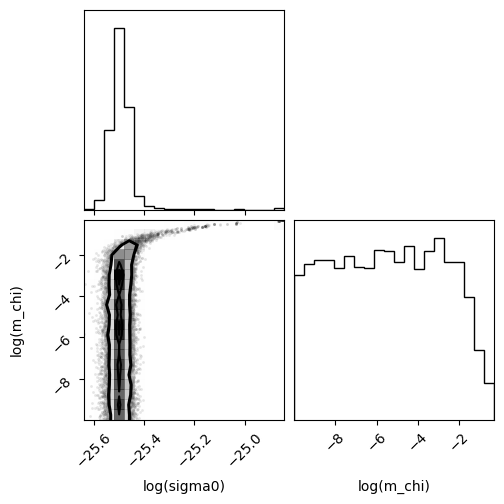

In [75]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)
fig = corner.corner(flat_samples, labels=['log(sigma0)', 'log(m_chi)'])